# Logistic regression and measurements for sample of 5485 datapoints


Two-dimensional scatterplot taking into account both acoustic emissions and electrical current signal showed all three groups of data forming very distinct clusters. Boxplots also showed minimal overlap in interquartile ranges for most of the four variables investigated.

Logistic regression then applied to separate normal grinding data from anomalous grinding data, and grinding data from dressing data. Precision decreased very slightly when number of features considered was decreased from four to two, while recall remained constant. Variance in acoustic emissions signal by far the most important feature.


In [17]:
# No. of datapoints

29+29+140+789+1543+914+2041

5485

In [11]:
# Data so far (29 OK, 29 NOK, 140 dressing, 789 + 1543 grinding (all bar one of Test_6), 914 grinding (all bar one of Test_5), 2041 grinding (all bar one of Test_4))
# 4-tuples: var_ae, var_cur, energy_ae, energy_cur
# Features to consider: var_ae, energy_cur

# Add condition and process labels to lists
grinding_nok_full_raw = [(0.0028296275479566097, 0.014225336147977692, 106988.68985835543, 111653.46909800009), (0.0025403901100845773, 0.014285415728576606, 95879.68301087848, 111926.43352952458), (0.003284743051442009, 0.014154141963688964, 124198.07952918058, 111155.3922567746), (0.0028388447349663483, 0.01425344097406266, 107218.09128244568, 111752.33458198223), (0.0032532512539841327, 0.0140630316986156, 123250.46909303303, 110680.50256962945), (0.002591894957103228, 0.01446113792443867, 98008.22548645678, 113512.12533417028), (0.002467042316464123, 0.013819253075488255, 93332.09586939595, 108547.89464232653), (0.002531819992356944, 0.014177072879180876, 97567.72428484396, 113418.61002168697), (0.0031463365056625366, 0.014481812957741664, 119139.66982481249, 113830.2611679694), (0.002594991911313546, 0.01446085990439814, 98102.51536577, 113482.47818292187), (0.002702943491755481, 0.014148402793480576, 101399.74768669717, 110149.30370230203), (0.0026884932809742015, 0.014015078889788243, 127048.44653545432, 137475.6288151946), (0.0024883611323317277, 0.013779445295037761, 94106.81229904969, 108163.02000348993), (0.0026521238211728265, 0.01435381357979877, 100814.14841392453, 113228.49207496826), (0.002567981328286485, 0.01409438662297307, 97271.01526157594, 110821.41425018189), (0.0028420519560204416, 0.01436555816753231, 109185.0558011948, 114561.9990818956), (0.003224112724682866, 0.013997449229112323, 126657.85637517986, 114219.01098134674), (0.003028279377849808, 0.014004681966214315, 114440.95571288868, 109936.08350002675), (0.0025529871261725, 0.013865142804941789, 96542.47538334405, 108821.92184914777), (0.0027370362591317803, 0.014381357498402173, 103625.51159088123, 113005.41717219132), (0.0026197543252467572, 0.013808782238134, 99023.14985143961, 108345.29148093163), (0.0027246569453064796, 0.014314598266030385, 102998.28763643542, 112321.32318960092), (0.0020108632555797938, 0.013717034564060237, 76184.26909709536, 107864.98580698116), (0.0029697552763109864, 0.01429320212759015, 112575.5591498153, 112477.63279124902), (0.0025685969609581835, 0.013618833636833083, 97098.7224995831, 106917.25186969788), (0.002661970532927792, 0.014214397312865739, 100665.52881420394, 111598.15618582418), (0.00278271885969162, 0.014256485591874427, 109620.75475530083, 116581.53049828412), (0.0028420521056244704, 0.01438503573852687, 107487.00711487985, 112958.80954767387), (0.0031785202880626686, 0.014141707207245143, 120036.66602569172, 110919.98271304888)]
grinding_nok_full = [(var_ae, var_cur, energy_ae, energy_cur, 'anomalous', 'grinding') for var_ae, var_cur, energy_ae, energy_cur in grinding_nok_full_raw]
grinding_nok = [(var_ae, energy_cur, 'anomalous', 'grinding') for var_ae, var_cur, energy_ae, energy_cur, condition, process in grinding_nok_full]

dressing_full = [(1.0368515911649459e-05, 0.01323591459581505, 437.58003590644296, 100435.41638937288), (1.0566855280813544e-05, 0.0142076843906936, 458.6196710620079, 107925.51245618769), (1.038523350641855e-05, 0.013959650333237612, 375.38117688649504, 97699.44122956379), (1.036891287089849e-05, 0.014094683263303931, 415.2173608682684, 106697.34019810986), (6.8538386896069215e-06, 0.0063753533613461035, 1.164088702333437, 170.7179798719903), (6.781745291957748e-06, 0.006045450256696504, 0.9720046437674865, 153.92638674516036), (1.0274054473059114e-05, 0.013553903937703674, 374.03144965033744, 93767.8519458704), (1.0524823930773083e-05, 0.014170840401485, 372.33779853180295, 97370.5240147915), (1.0324767773142717e-05, 0.0146488937303106, 384.7813976366557, 100985.70021643743), (9.929288711193232e-06, 0.014060236406257991, 388.3856044842724, 108680.90601465061), (9.760545496976042e-06, 0.015509445809478634, 348.5901044659511, 106157.66996862763), (1.0277357519650388e-05, 0.014091102335102896, 373.2767313175473, 97953.08247310849), (1.0332423786485315e-05, 0.014058866427312286, 485.0637272920948, 107802.3225801055), (1.0220551304005794e-05, 0.013516466984825688, 428.98702279376926, 100762.80844522815), (1.052047052131309e-05, 0.015425238026970088, 374.5348594928686, 107109.98464032766), (1.0343446742923354e-05, 0.014796415328471445, 419.1886424880419, 109722.6651666823), (1.0369780890982342e-05, 0.014786320056227067, 421.7745902693307, 112569.5066738732), (1.0250495489239362e-05, 0.013630239768233077, 421.50472018139885, 103798.07020068693), (1.0369361656710913e-05, 0.014162158465812409, 468.61329709643235, 106229.84272897939), (1.0092377497857612e-05, 0.01482022765136316, 417.19205909059076, 114343.20691775046), (1.0387821441859882e-05, 0.013747060612104577, 433.0947360771981, 91764.83000143191), (9.838397973924352e-06, 0.014000468453469628, 336.8354772877141, 95718.97791154), (1.023996104024312e-05, 0.014283581142513845, 423.68728967561407, 106456.71279843408), (1.033362822445967e-05, 0.01500905464280675, 441.4298865671268, 102808.72659179843), (1.0304133199329198e-05, 0.015415298444243011, 376.8840812319243, 109361.13520584485), (1.0258493045373037e-05, 0.013221484208732138, 405.31463931897906, 101037.17750406115), (1.0083760150567835e-05, 0.014829980940135257, 346.1854243112148, 101701.67444108275), (1.0590796965691746e-05, 0.015563479573314408, 454.9138737629531, 118680.83266449408), (1.0537158922069397e-05, 0.014678853994582639, 417.4383932316044, 102828.64999823304), (1.0421049457285119e-05, 0.014000467074586985, 484.41076892682617, 96414.28413262255), (1.0155139174798402e-05, 0.013772131096335674, 395.5674168358177, 104255.30564982504), (7.033489676737804e-06, 0.0074734187030947455, 1.7987879083806315, 288.3892175628671), (6.88525020985421e-06, 0.007036862561646537, 1.0001730543511966, 179.46894889721634), (1.0358692006700325e-05, 0.014146018533499623, 376.24772065871696, 96058.84322143176), (1.0586229531416577e-05, 0.014736350565546025, 481.40272659721757, 101978.03933472237), (1.0301797686499963e-05, 0.013938651768453183, 502.51009067434524, 105762.4084231499), (6.834996754214306e-06, 0.007758736535669521, 1.202614791663291, 253.7479400536052), (6.758041323779432e-06, 0.00802126712582629, 1.1471074198924354, 209.4644504508886), (1.0388577829817263e-05, 0.01419634898777533, 353.26329875882954, 98902.00364218459), (1.0225942480022041e-05, 0.015772775824837663, 354.8474971786821, 110305.84855347246), (1.0456363040723395e-05, 0.01306189532232812, 439.7331828564366, 98714.50616210878),(1.0076615671104137e-05, 0.01713974462953321, 333.1984577054465, 109080.23076065877), (1.0415018558588363e-05, 0.005575568966447952, 1.4950405071484574, 149.1122279206722), (1.0413579866024074e-05, 0.01652369080705181, 363.67649810505253, 111554.12795744294), (1.0752689394232039e-05, 0.01654401994108541, 334.0806961030978, 105824.75659479086), (1.0301544035464012e-05, 0.014511251663428393, 338.4305727822037, 98110.28734739312), (1.041925009936186e-05, 0.016672627349319534, 340.6779428337962, 110383.89678462528), (1.0371138724359576e-05, 0.017122704794994788, 336.25837146425727, 104570.2595647513), (1.0561984222261043e-05, 0.016208147484118737, 378.5798336728856, 112393.56397717955), (1.039236929740241e-05, 0.015982881029499865, 346.2234538161245, 108991.19812658707), (1.0217363276517889e-05, 0.01700017187340885, 318.40052606638073, 108404.51265404002), (1.0244139226969413e-05, 0.015140546254076353, 334.7464720577729, 101726.01429110323), (1.0037954830723008e-05, 0.01524333317027667, 352.3954712219829, 100985.543458579), (1.0526395858806754e-05, 0.016885594715414898, 335.3780052537842, 106896.86022009245), (1.01448130590734e-05, 0.015185526585218868, 313.6620262078403, 96476.67421312703), (1.0138615387706439e-05, 0.0163993929926099, 316.8902592228563, 104819.66933719542), (1.0320563287568663e-05, 0.016453962428178617, 334.0556883275789, 106746.43671810522), (1.028120438821641e-05, 0.01659869845297707, 324.3229610123217, 105873.5184799831), (1.0341334444239286e-05, 0.01685197677705465, 326.1816405562877, 108668.05818040193), (1.0014888295187667e-05, 0.014886232997843042, 333.48445939819874, 100266.75436611047), (1.0528769117528991e-05, 0.01617217361593655, 384.7964012791897, 105282.97853677989), (9.943348477284033e-06, 0.014916607759486007, 335.97495592442755, 100465.43348316659), (1.0147913409882137e-05, 0.01501252841797875, 318.72512588176437, 95901.65771087463), (1.025367580824359e-05, 0.01521974857852057, 319.99023215368106, 96958.54812970132), (1.0490520677013675e-05, 0.015835104909379824, 372.2823245231451, 108355.62353385781), (1.0691194740679992e-05, 0.017482785641977576, 349.50801146841883, 105660.39573501215), (9.916880669282255e-06, 0.015058481022169617, 337.2116627640156, 100963.65995265845), (1.0675798317093507e-05, 0.01615773571844837, 363.9538068229842, 106361.94507339304), (1.0549377724440276e-05, 0.016729463089293253, 355.80132245654505, 106690.00880489756), (1.0179450162084326e-05, 0.014758861413714955, 340.6359542964422, 101783.61161234412), (1.0259749196507853e-05, 0.015043180935811896, 357.19484557767953, 100272.88731412316), (1.0338873342341638e-05, 0.015064402733121075, 340.3286806573315, 95529.96412761044), (1.0187113121907003e-05, 0.0161531576063332, 337.9811964880967, 109441.63853597843), (1.0017003209010888e-05, 0.016568868773208435, 327.8388300469804, 111550.91202856055), (1.0015986662070266e-05, 0.016593694805437365, 307.5757230481027, 104910.86685794835), (1.022736795369733e-05, 0.016798193889772196, 340.3602804084999, 111356.81855643938), (9.996141730997461e-06, 0.015029194229175527, 314.60920383196026, 97424.70580558201), (1.0677138740285373e-05, 0.015910765337978208, 400.4584122476605, 108026.29050737715), (1.0022070047094034e-05, 0.016248603722125277, 350.2356949220819, 109512.3707410109), (1.0328044498317735e-05, 0.016365843075970256, 370.94500793277314, 108074.33418471213), (1.0239288852471094e-05, 0.016665253859173813, 354.1307914344879, 107064.6917659488), (1.006363742813155e-05, 0.016242429894025932, 333.6238122892483, 108659.19617228382), (1.0468278963954174e-05, 0.01616973882760993, 354.3065597865415, 110669.07206555826), (9.74911234786714e-06, 0.016785966005552072, 299.0206630309163, 105838.99996092876), (1.0144027643549108e-05, 0.0159483606227397, 334.1302856729756, 107643.6120522499), (1.0027420396469515e-05, 0.01540455153878401, 325.0639527888699, 102594.91318111264), (1.0042897933918443e-05, 0.014800582885945386, 366.6527978443195, 102861.58784916293), (1.0261965470650527e-05, 0.017317983082419136, 304.7585928327046, 105797.90501844666), (6.93723386674854e-06, 0.006550590987885972, 1.0253238220084264, 172.54153366444524), (1.0748489991250781e-05, 0.016754025847594917, 374.1214157746597, 102240.01908713141), (1.0133081215752018e-05, 0.014832241602478867, 348.50197534887906, 99431.08860850609), (1.0619078161342942e-05, 0.016829907159145313, 342.77260661295406, 106616.8785584478), (1.0634435391954244e-05, 0.016951530272420662, 343.24329907016573, 112328.9395394459), (1.0362867888574769e-05, 0.015090520275246825, 344.1494355927576, 101567.29076846427), (9.866129175698555e-06, 0.014865690046117217, 334.9994954067298, 99218.85235604073), (1.035225956734762e-05, 0.015141161521753497, 345.47059227947017, 99858.73491397101), (1.0181832962055948e-05, 0.015017459247345372, 339.7822868596313, 96290.49105893163), (1.0514876924151898e-05, 0.017346622985277168, 343.13458847205686, 110256.54376157674), (1.0185189416561595e-05, 0.015035293147875864, 356.0583831089367, 102083.11543049128), (1.0372135275705154e-05, 0.016215092742882926, 348.38868350893614, 104925.69031529421), (1.1242569161584721e-05, 0.01666884353306992, 392.68618396604916, 106973.46205338553), (1.0579498447954423e-05, 0.016629255445419086, 356.9920246401352, 110719.44455168303), (1.01464110112809e-05, 0.01669150020239479, 349.73381104543466, 111068.72427475192), (1.0276234137421229e-05, 0.0169488992239373, 323.81265175783244, 109650.54307169221), (9.991272086233223e-06, 0.016750957150064718, 324.5948070183137, 109384.88160646416), (1.0290007592710277e-05, 0.01833014302008042, 344.5816969309093, 125317.60071947973), (1.0021959442237927e-05, 0.015776486781474478, 353.89144778288363, 104904.25911375889), (1.0466319503782307e-05, 0.017597273173086403, 350.59842105467055, 114996.10208248676), (6.839027315122139e-06, 0.007148251585306777, 1.5709407238451591, 392.85068323601786), (1.012489163349273e-05, 0.015414339280744897, 322.44296772898184, 99893.86154089814), (1.0143705054817907e-05, 0.015527425378121549, 353.1063601357752, 103553.9060137342), (1.0098489688228605e-05, 0.015186461192610672, 326.39922991350625, 101115.17271602433), (1.0442203327999046e-05, 0.01643063586600191, 382.6272448105696, 111857.16124718085), (1.0385292400008367e-05, 0.016284238413656858, 372.0615555913998, 107774.09935520451), (1.041750908338276e-05, 0.01568376469022762, 362.1483462085294, 99302.0647113406), (1.080962367432258e-05, 0.016401502854353697, 363.29835429449724, 110399.04495009432), (6.7049790484656525e-06, 0.0059242163081184695, 0.912150174926111, 152.65558434172826), (1.0411014969717844e-05, 0.016239947225957223, 340.92003107858113, 108937.54788720747), (1.000174470411583e-05, 0.014921899555697171, 323.97482341908596, 99316.03053465666), (1.0643911533357358e-05, 0.01668114204212024, 334.42876757146854, 107203.12046392019), (1.0387413137546484e-05, 0.017076558407220225, 335.7906601998001, 109625.83133018557), (1.028849554683754e-05, 0.016456305275219796, 335.5931721839325, 109873.45117087146), (1.0384544215308593e-05, 0.016810764133425315, 368.99483922823583, 105733.76807429477), (1.0464628146812881e-05, 0.017894406799697685, 346.2277481835517, 102495.83592297291), (6.705059364297608e-06, 0.006643327444232742, 0.8893451144105291, 177.58377913238547), (1.0756143836929975e-05, 0.01683362655181947, 397.70559584251816, 104595.68991568517), (9.939296177671772e-06, 0.01652642229176398, 325.39473073589306, 110354.87391916744), (9.953914627254363e-06, 0.017214599627738945, 331.38681729861634, 115198.20449562924), (1.0082311651110735e-05, 0.014965039171852294, 331.7305644943786, 97510.19989714872), (1.0603970961403996e-05, 0.016523923912189525, 355.51216511648425, 107061.80992484995), (1.0241674310991204e-05, 0.01602551991240982, 375.0276752732015, 107944.61617592239), (1.0125389445529584e-05, 0.015139480155689198, 322.8360429490975, 98201.61066374579), (1.0200892902830247e-05, 0.017087180088923706, 376.535922865882, 103105.60866997336), (1.0610522504814003e-05, 0.01567956722714877, 388.91933959375757, 106487.55670561502), (9.985611777153237e-06, 0.015662251798622597, 320.6722402609186, 103391.63089557216), (1.0065119643022346e-05, 0.014991339108610556, 388.04477983386465, 104102.40927657946), (6.9097177047159994e-06, 0.005736270512111472, 0.9109464014400518, 153.23633622204193), (1.0159544790213474e-05, 0.014306566983740674, 341.13158348947474, 99133.3647867369), (1.018663271643118e-05, 0.015585804832969287, 381.5412109795816, 100254.75783527222), (1.0332213239955916e-05, 0.017838376696137765, 344.9474290010181, 116879.57951193908)]
dressing_full = [(var_ae, var_cur, energy_ae, energy_cur, 'normal', 'dressing') for var_ae, var_cur, energy_ae, energy_cur in dressing_full]
dressing = [(var_ae, energy_cur, 'normal', 'dressing') for var_ae, var_cur, energy_ae, energy_cur, condition, process in dressing_full]
dressing_partial = [(var_ae, energy_cur, 'normal', 'dressing') for var_ae, var_cur, energy_ae, energy_cur, condition, process in dressing_full if energy_cur > 392.85068323601786]

# A few outliers for dressing
'''
(6.8538386896069215e-06, 170.7179798719903)
(6.781745291957748e-06, 153.92638674516036)
(1.0415018558588363e-05, 149.1122279206722)
(6.758041323779432e-06, 209.4644504508886)
(6.834996754214306e-06, 253.7479400536052)
(6.93723386674854e-06, 172.54153366444524)
(6.839027315122139e-06, 392.85068323601786)
(6.7049790484656525e-06, 152.65558434172826)
(6.705059364297608e-06, 177.58377913238547)
'''

grinding_ok_full_raw = [(0.0010104664302868155, 0.012500908731426046, 46013.07595831735, 118031.9394466599), (0.0012407814448680103, 0.012771872476754369, 56430.87121451854, 120397.98859524561), (0.001206377559125491, 0.012497193295016477, 54703.501187989306, 117452.84884758742), (0.0011293925157516947, 0.012549793470592811, 51146.657875160825, 117713.18897854861), (0.0010497658235667795, 0.012592764323043735, 47897.71845869978, 118998.71302837251), (0.0010347444048813866, 0.012271675830456592, 47106.86753233572, 115704.65710313935), (0.0011779429916045593, 0.012573666539766675, 53672.274872681504, 118741.1071779696), (0.0012675897313195043, 0.012525029985283022, 56879.31168795165, 116512.74324278678), (0.0008981004747468897, 0.012439446742639132, 41321.65432505058, 118518.41621913343), (0.0010757772612004137, 0.01254844792703595, 49035.93638168341, 118412.56665869856), (0.0011709643074809047, 0.012362396316937562, 53204.48562401654, 116417.5367558773), (0.0011432215987259738, 0.01234387675665428, 52248.75199700186, 116767.9374605899), (0.0010086791813313498, 0.012573594067762879, 45627.22469646106, 117917.29947465933), (0.001125031350823096, 0.012544386857991929, 51252.338459058265, 118441.05944173338), (0.001102064492275446, 0.012287078025579897, 50245.647668650585, 116061.94192795549), (0.0011273009749569402, 0.012569978365785776, 51303.85299506145, 118531.07682550828), (0.0010956693819229508, 0.012368922813270596, 49852.13066354766, 116368.21328219063), (0.0011738892428018457, 0.012839579092809781, 52930.4839068046, 119893.10016742424), (0.0011245998093417117, 0.012364421279676227, 51031.92226326408, 116135.64990438097), (0.001306638599058836, 0.012481423665146853, 59546.2499818537, 117916.43229452286), (0.000995409182455713, 0.012511863553320585, 45687.927008655235, 119032.52629104786), (0.0010663940546236142, 0.0126611852722709, 48391.08515204463, 118994.94432663926), (0.0009797537986520437, 0.012226394931564254, 44793.55246743555, 115695.89199220443), (0.0013010084057364026, 0.01240702597977979, 58830.522814600314, 116161.38019601894), (0.0011624478277766986, 0.012777688378169028, 53109.815773296505, 120925.65461584568), (0.0009388594403718491, 0.012545870447261968, 42905.325474569174, 118756.17519390365), (0.001163521834908076, 0.012520508528447485, 52775.95152083139, 117626.71115679947), (0.0010366794648789725, 0.012564535417860831, 47278.95301767818, 118488.147462881), (0.0011345750145375073, 0.01250175138867712, 52049.45224760557, 118862.07822654494),(0.0010373206811488608, 0.01333028863272138, 47290.46492807058, 125567.6128982469), (0.0011845244979306908, 0.012824930685040998, 53467.01526089887, 120043.42439360094), (0.0013519608328824465, 0.013634226808603234, 61632.26649453164, 128607.78649994344), (0.0011115247614788767, 0.012683293281484435, 50562.8530569859, 119717.45210207111), (0.0012529178811360295, 0.013365804959516114, 56830.151249095725, 125512.12983799192), (0.0009060119385642546, 0.013017913642713395, 41064.79251256766, 122241.09991836527), (0.0012849527287915055, 0.013328719396428906, 59046.29848512863, 126876.25238042732), (0.0012398459976888066, 0.013375252125748223, 56292.97882040922, 125716.11241274256), (0.0012011001994116398, 0.013808984270645473, 54334.60060675569, 129269.72286886821), (0.0013311764243691317, 0.014118101213939442, 60174.343097262805, 131807.14399198472), (0.0013195269166582555, 0.013654647721763282, 60594.40902184258, 129845.47691630013), (0.0012416796480157588, 0.013475618505292272, 56172.39454437956, 126283.52949648851), (0.0012671178316342466, 0.013201057248783038, 56331.354167516714, 121647.42122445792), (0.0011460851505037473, 0.013517843114174711, 51827.27496271641, 126446.35983172571), (0.0012500231231447414, 0.013374180750340352, 55973.58278049538, 124024.38273867521), (0.001116933283759671, 0.011791408598807339, 50840.52198902531, 111258.05071196657), (0.0010784775046523633, 0.011820493044668116, 48048.984230414186, 109361.13558534502), (0.0010726119540363209, 0.011889469769219979, 48266.38359926292, 110808.71563489603), (0.0013738130739848484, 0.01366235159356174, 62495.02764993116, 128697.87924119139), (0.0010758125519933497, 0.0132138075772751, 49185.24797826526, 125139.5062467375), (0.0013431522128220462, 0.013291335207385825, 61065.054923909185, 125150.63478163426), (0.0011227887282901532, 0.013478875407154025, 50135.85756956791, 124614.47933337382), (0.0011295571314790791, 0.013561464423720988, 51128.537027914936, 127083.58931477767), (0.0011067152209479224, 0.013142273918711396, 50249.57715428721, 123698.49792753263), (0.0011781715310685654, 0.013291324259319193, 52568.77114426893, 122959.83552058386), (0.001303837514387071, 0.01313815905539239, 58681.478438214355, 122642.7030858135), (0.0011685811969324783, 0.013447893526486069, 53347.254491645, 127044.5228026355), (0.0010071121296193477, 0.013324479393145237, 45777.98633853494, 125341.95980774137), (0.0013524454152350853, 0.013249426263291297, 60996.84741983276, 123756.90051666343), (0.0011482426921141267, 0.013447962233664878, 51257.88091620935, 124209.37620926918), (0.001342616811614655, 0.013638734717602526, 60390.26554174017, 127012.48255403663), (0.0010166121625159374, 0.01321734878315202, 46109.50243602032, 124260.70514831929), (0.0010874283483781001, 0.01351102071103632, 49185.05933541238, 126562.21666667801), (0.0010142079044348584, 0.011811405023465575, 41772.21251319865, 100803.78441117256), (0.0010915499169752486, 0.013018714013967772, 49314.46396725683, 121887.16390311973), (0.00101741139520702, 0.013436955379619513, 46285.55632955279, 126563.67664275113), (0.001002354897211289, 0.012957468890252326, 45647.07252596632, 122387.01116545357), (0.001042497238173429, 0.0134818026740214, 47631.00041300885, 127577.85539646063), (0.0010954813248367221, 0.013852016711063224, 49931.26991536052, 130644.05140656114), (0.0013370136139283714, 0.01344216532161314, 61140.08637091426, 127517.81967746068), (0.0012799829730883049, 0.013842234941442676, 58735.17964697338, 131304.28354541233), (0.0012000274928884941, 0.013503790487437623, 53806.11728194117, 125289.37429069926), (0.0014262530529413793, 0.013593623192128756, 63637.053004668844, 125364.94289911796), (0.0013818406550543134, 0.013286682218218746, 62682.189915275405, 124845.45545219375), (0.001297037337072174, 0.013319928960236246, 58381.56661721244, 124166.73166523954), (0.0013210378714512017, 0.01367243532257301, 58949.376088698504, 126311.45859161587), (0.0013117329437364986, 0.013064311806011537, 59598.55121580641, 123038.58351571576), (0.0008587943995132004, 0.012996900539750566, 39317.24679492058, 123369.8700882284), (0.0011403440422365113, 0.013228683599719142, 51106.36493676629, 122725.01388707737), (0.0010398419417377764, 0.013451991244453702, 47307.33388018763, 126718.37257854207), (0.000995288299498043, 0.013407942414515102, 45011.47637398628, 125543.56089124594), (0.001185751487321763, 0.01353312920215328, 53614.02124524474, 126551.6409312324), (0.0012706190123037465, 0.013552359819667492, 57293.79322299721, 126493.84607050015), (0.0011635126058050292, 0.01326734852632797, 53263.37247010312, 125916.76037770663), (0.001376292309206722, 0.013086726486321329, 62387.607982966256, 122933.06244912195), (0.0011755069283128161, 0.013012669056932923, 53522.63817435251, 122867.60335561846), (0.0008996956951596171, 0.013288592858093157, 40373.00430747908, 123469.22641471382), (0.0011365021547594541, 0.013491400087892541, 51392.30445316485, 126157.21795495185), (0.0011856460713938115, 0.014053944428870922, 53749.735599556145, 131675.0010435355), (0.001208593688335957, 0.013543285623213082, 54610.94161525633, 126479.83139288511), (0.0012511516902187615, 0.013167000745501171, 56880.52386816686, 124127.44421722923), (0.0011837014654369619, 0.013368193145110079, 53184.95156570642, 124482.99944368914), (0.0012700197861822615, 0.012935410833378604, 57919.40966323575, 122399.01741343712), (0.0011889058422581468, 0.012939700201986433, 53797.04154042301, 121335.16703769274), (0.0012548450583077984, 0.013857354923105499, 57722.28143313445, 131702.5924479828), (0.0009378553972321312, 0.013922554857245537, 41895.23760922446, 128591.85195224291), (0.0011691406833775995, 0.013294715037096717, 52978.35114739975, 124818.57813187211), (0.0010083367564605854, 0.013170207189721856, 44737.09194583589, 120998.36421021527), (0.0012165196301343426, 0.013478580912171424, 55529.180002378926, 127261.18142129804), (0.0011827875709099363, 0.013616540018352798, 53931.416634759276, 128472.61364248091), (0.001170801557131183, 0.013129083993962625, 53291.355406591865, 123912.50831009635), (0.001188931991794676, 0.01305601214294793, 53767.89787480468, 122455.67573320345), (0.0007398189791820556, 0.011561361099621071, 33498.5826248555, 108552.36909642024), (0.0012456323335467477, 0.01328526969785275, 56941.82992319696, 125838.37551883307), (0.0011224427592572452, 0.014022461459159157, 50725.424608637295, 131064.07025327142), (0.001273758678702427, 0.013908268074011082, 57686.754836507724, 130224.1745616813), (0.001031105667560156, 0.014005190134753265, 46745.37370551822, 131142.4381046844), (0.0009483097387732119, 0.013327734667676342, 43447.24280173075, 126532.85305277912), (0.001281050310340196, 0.013560127571204134, 58141.652977088685, 127430.89189771429), (0.0007607033245742475, 0.012071524579304866, 34325.46955403615, 112906.71031273842), (0.0011218676701488608, 0.011826890132048209, 50924.05961961112, 111189.96782371054), (0.00108789423429749, 0.011878364030705182, 49120.166474980986, 111227.9629117159), (0.0012609936836036077, 0.01313966279601257, 56529.92287472051, 122166.66769568736), (0.0011995911776157765, 0.011808699486091536, 53961.5700375348, 110120.05086120366), (0.0011813286273558363, 0.013043979604660073, 53400.88283405959, 122274.39113135774), (0.0013645805711057528, 0.013189469409006198, 62314.74622469857, 124748.02816320102), (0.001209032668915779, 0.013139683745288644, 55015.00341411915, 123867.42168101187), (0.0012629780866802232, 0.013619076617089014, 56786.11658393036, 126786.57219133704), (0.0011380772376509694, 0.013516926278799813, 51624.845813131185, 126815.85817387921), (0.0013340215703377333, 0.013669777385707283, 59070.473912745496, 125154.58737059258), (0.0012805476146016104, 0.013390345615540353, 57486.18577957594, 124488.72974310204), (0.0013137950550426596, 0.013336245933178385, 59897.31583560522, 125785.31908893347), (0.0013237986074997933, 0.01337524612945554, 59669.3911051866, 124903.07352493721), (0.001223514890749509, 0.014080149700808021, 54977.263549330346, 130559.94586683839), (0.001285980104654706, 0.01296833129888143, 58961.65845668189, 123328.65145200134), (0.001433599115264833, 0.013170155850533062, 65245.79430356483, 124284.33557648747), (0.0012094064387698424, 0.013394049900373014, 54892.10470618531, 125913.60702452507), (0.0012428770868582481, 0.013293395724260701, 56164.543446868454, 124415.4043422698), (0.0010263133191889303, 0.013442965932833935, 46475.85419959708, 125945.26052598745), (0.0012423627299156374, 0.01371279028634461, 56345.19865327728, 128563.15280404674), (0.0010410259471404855, 0.011795822508798608, 47349.447072136514, 111221.77059856994), (0.0012135652206787468, 0.01189198911784454, 55724.749395568535, 113164.05914429553), (0.0013593074798169376, 0.013467866531214174, 60806.149691002174, 124792.28656653859), (0.0010354257516979166, 0.013581292722990093, 46876.30787706515, 127326.77552698777), (0.0009579808632290292, 0.0132134677961368, 43006.451375468634, 122941.04356839469), (0.001200442186222565, 0.01357292856853057, 54080.91314695908, 126634.70584614316), (0.0007804011230409213, 0.011644867726496349, 35191.73443108397, 108842.32019330005), (0.001241523164423558, 0.013259260812627089, 56362.764634877145, 124782.72256489153), (0.0009722521877129868, 0.013582142517267254, 44072.37049928639, 127439.64637397256), (0.0010311721232283222, 0.013623506525031026, 47044.13878627933, 128465.05520712787), (0.0011851888704926756, 0.013147460964799282, 53789.313936754086, 123664.0899800112), (0.0014044496225229881, 0.014122397398703654, 64484.734142355046, 134123.3938747751), (0.0010464151781460823, 0.013946763699885604, 47176.19515885874, 130039.88330176783), (0.0008883958843441809, 0.013839202912342802, 40662.10190597156, 130962.04911361857), (0.0013623330453796528, 0.013021036037200145, 62203.41500384201, 123259.50709909174), (0.0012960021346790879, 0.013361793751577002, 59422.349425325636, 126914.7969128714), (0.0010733926447437914, 0.013912652917837321, 47961.316590920076, 128495.15782888998), (0.0012244169428736584, 0.013523137359804292, 55392.1532000582, 126591.90134792318), (0.0012674129386606708, 0.013453706496629686, 52558.733377565295, 115419.59297116399), (0.0010912700001233172, 0.013042216589096434, 49784.44391627393, 123279.7231571403), (0.0011165948580175184, 0.013304197167384508, 50742.80374421433, 125314.88732034316), (0.0009265805684306681, 0.013341291827593766, 41751.89361030823, 124584.2200950673), (0.0011570707674091233, 0.013535256384101283, 52767.74431739105, 127730.47008488573), (0.001121909762499058, 0.01375478321456201, 50844.3237920221, 129011.40183801658), (0.0012756584405008823, 0.013349216049319186, 57716.30197240863, 125113.10308186022), (0.001041466724379866, 0.013201476425433945, 47135.97847965807, 123576.52653847043), (0.0012078144634579554, 0.013790438867019313, 54717.08827369897, 129132.07284371802), (0.0011776828168745986, 0.013308038721015922, 53517.79867987486, 125349.39494701933), (0.0012980154549708414, 0.01323531586291376, 59579.46645496126, 125833.61160491443), (0.0012845371821752164, 0.013308948387745356, 57686.8621494228, 123833.52963190067), (0.0012137184833110285, 0.013381217248245252, 53806.32468626796, 122832.25856324747), (0.0011223952796518015, 0.013568454089128542, 50542.22306958965, 126479.25957427388), (0.000949111513824289, 0.013037410152700782, 43355.823947013436, 123394.76147366669), (0.0011330987444545728, 0.013360871164459607, 51255.56110655362, 124970.7233519986), (0.0013248109830078882, 0.013246679236015628, 59646.02993975558, 123539.08247038108), (0.001365358653131677, 0.013563924443577305, 61534.79318380277, 126637.94117856468), (0.0012545651305966162, 0.013869515196467607, 57276.61966231189, 130933.91259691521), (0.001119540106941623, 0.013453004257359945, 50954.58975742185, 126789.11771767108), (0.0013078084801658807, 0.014014575724195533, 59939.322613318676, 132841.19026829983), (0.0010671510123940145, 0.013512879366623714, 48315.88414635549, 126567.25440085442), (0.0011527199328523537, 0.01348365193886615, 52359.75241131391, 126779.1424471456), (0.00127727671590596, 0.013526511739198607, 58472.84307603694, 128192.49741642221), (0.0011847030416769514, 0.013561533101389732, 53527.32824264583, 126857.30087532195), (0.0011870976229605133, 0.01203182900773909, 53815.54111703495, 113106.5488580574), (0.0012931797714774574, 0.013614981717960958, 57308.557915605306, 124969.64274327032), (0.001094516509788134, 0.013293868220229047, 49623.16484874849, 124839.56287467746), (0.0010571183646329234, 0.013015208058094986, 48249.994790022196, 123106.22530366777), (0.0013276936261241979, 0.013586131984733836, 60342.60787576904, 127836.48317767923), (0.0009225798857212937, 0.013186623445840977, 42046.246506644515, 124453.98367911165), (0.0011660774863693566, 0.013457987671060859, 53011.78623899949, 126650.27275479857), (0.001115940521189366, 0.011619425288612656, 50534.479395958326, 109124.76777777105), (0.0010287619391680246, 0.013518275154428402, 46708.55117804238, 127071.02957661368), (0.0008636666581048614, 0.011691560442722402, 39624.72239508922, 111313.39141241377), (0.001018178598055584, 0.012665840247468477, 45947.8815745446, 118560.33931582943), (0.0011844162278865044, 0.013689250618781871, 53842.87489027112, 128763.62601765923), (0.00099813369180447, 0.01335474768158486, 45274.851459769816, 125535.07398221458), (0.0011331523336627178, 0.013885542322389859, 51836.11112197439, 131355.78095692405), (0.0010311897309800088, 0.011602911591822265, 46610.17644232696, 108765.89626727124), (0.0013250007568577332, 0.013468068079645262, 60247.32366217905, 126722.00887194925), (0.0011943397091736133, 0.01341658402456107, 53995.53173723616, 125566.4462846672), (0.0010977723248440157, 0.013543912175695087, 49276.762037608845, 125786.8383745376), (0.0012641088632190768, 0.01307132818090831, 58055.07973526768, 124502.05206023226), (0.0011034959252274326, 0.013029752725693303, 50328.272009785396, 123129.94843660839), (0.00102306791558597, 0.013023917186750235, 46337.10763235273, 122326.33192508717), (0.001114931046504277, 0.012938768402519453, 50445.75375024052, 121292.43826135776), (0.0011423580690011648, 0.013465085185357875, 51778.13053797328, 126358.28474242121), (0.0012045161518970152, 0.013482466877392973, 54520.63591403419, 126239.82513273474), (0.0010820170759062219, 0.013385333752808284, 48794.15702645777, 125007.26177726018), (0.00107278062445437, 0.013593206723965506, 48794.14182477332, 128007.12184401164), (0.0011845987754960196, 0.013071345797066534, 52921.0162037992, 120935.59711633941), (0.001355268790002791, 0.013393834562034235, 60539.256309993245, 123771.4039881526), (0.001292974690739669, 0.013576983357191857, 58764.330874303385, 127608.4567319058), (0.0009766763218560417, 0.013424647307681285, 44290.57197231318, 126099.40747005523), (0.0008689920251310011, 0.013408821348672063, 39901.27209459721, 127492.47021651367), (0.0010714743823327414, 0.013421212401515203, 48525.00117936911, 125849.10510647172), (0.0010865359688993687, 0.013487692987597576, 49019.26049007276, 126007.39636451696), (0.0010509316399396349, 0.013511299826826488, 47408.47405324721, 126136.6532096756), (0.0010920644657823433, 0.013470955161733425, 49798.02925401363, 127171.8017218595), (0.0011475675635882591, 0.01342794977073644, 52269.61198570163, 126880.03380745425), (0.0013410279869303177, 0.013151534587307686, 60642.89923708691, 123432.71909574255), (0.0011524385665052355, 0.013662418595436885, 51755.461671430785, 127013.71529635858), (0.0011271749331737272, 0.01345200378383744, 50750.30547560901, 125420.37353119616), (0.0013795019104578003, 0.01317688288666878, 62991.053266531155, 124759.51030137092), (0.0012394283478632585, 0.013453594500157186, 56132.66602014408, 126025.4888076477), (0.0012420091526937171, 0.013707380568298894, 55910.76962188892, 127658.85810671288), (0.0011980118718491594, 0.01194887641326281, 53506.83850932985, 110593.19751226892), (0.0011635582308397645, 0.013238046085597857, 52688.27600705204, 124212.85533717118), (0.0009802668320700067, 0.013122049574041197, 44447.489257360845, 123188.21938599281), (0.0009472827423980841, 0.011792631398579985, 43131.93293746881, 111320.28457798072), (0.000717481372364099, 0.01165810370290987, 34720.72031684261, 116950.7296648808), (0.0012513355791424984, 0.013097996975548504, 55963.70525337221, 121373.70729399819), (0.001107309346507873, 0.01333495594112294, 50118.02924744308, 124932.98926358632), (0.0014096415969151945, 0.013116884440120814, 63422.32499869996, 122390.77038641198), (0.0014375620159938966, 0.013592194174420959, 64851.666577261516, 126980.70096121766), (0.0012138938444955756, 0.01398449384744426, 54258.90752288425, 129189.92916944405), (0.0011559606288530657, 0.01334469661738874, 52475.09679874826, 125338.45784250672), (0.001349220060478902, 0.013001951543252689, 61235.11199526738, 122418.97483349913), (0.0012637851149424537, 0.013551060827327927, 54711.67629312349, 121626.0789749843), (0.0012713571294171294, 0.0129626251161721, 57592.161981398145, 121785.29801984968), (0.0011829357875737282, 0.013532183692213788, 53614.99367272445, 126905.31951320796), (0.001320831643257492, 0.013042125702787339, 59453.85813618117, 121790.40583535512), (0.0011218093910185904, 0.01293047002237691, 50055.97735134857, 119682.64472210855), (0.0011679233566389824, 0.013865707771484416, 53358.93874743696, 130981.88058760307), (0.0010675993933454064, 0.013021600102462685, 49020.00398979552, 123988.85252473273), (0.0008989118515669186, 0.013465477489609917, 40906.81504165924, 126882.49147729875), (0.0011802037252793874, 0.013341156273833556, 53277.65750796032, 124678.52937740186), (0.0013075004315158182, 0.013035703691618682, 59703.71945205396, 123435.67720393532), (0.0012852218958296247, 0.013524311793446412, 57740.61871553328, 125834.3025125811), (0.0010498700759743525, 0.013225120226757368, 47757.94371835984, 124518.22380336831), (0.001380333718344585, 0.013599692276189273, 62001.39187111042, 126359.48085356671), (0.0012394554346120655, 0.0134259173286486, 56415.15477746589, 126510.11193053213), (0.0013476663142747022, 0.013328116282656692, 61831.99624214438, 126646.49900410735), (0.001245297280383493, 0.013720384028011408, 57043.68622152919, 130175.46690860015), (0.0012414210990828207, 0.013033983701046794, 54822.451456913834, 119309.87843159545), (0.0011057010529101202, 0.01299570206294894, 50029.2839372387, 121749.48714833907), (0.0011632122846228004, 0.013045586157138281, 52951.03084601016, 122972.80528042455), (0.0012986761869428964, 0.013485277484916855, 58306.61317658905, 125374.1749475358), (0.001015349597133304, 0.01327812359314352, 46055.75953170106, 124816.38254884387), (0.0011308678496157708, 0.013188365442926262, 51571.937301774735, 124582.82943799628), (0.0009755686081511158, 0.01305016917322817, 44156.51530765377, 122484.80036893194), (0.0010544216201829467, 0.012838035442051908, 47507.21206765246, 119986.44749987518), (0.0009776836919123376, 0.012896627156401714, 44096.56728380916, 120610.07298434566), (0.0009385068281352206, 0.012981653430915698, 42576.66895818412, 122009.60917250894), (0.0011320234555332528, 0.013847551870510084, 50970.46362592403, 128914.03493000433), (0.0011379683709282539, 0.01345949107942252, 50632.51554860298, 124098.20962453108), (0.0011781024468443275, 0.013769858276862834, 53520.2826776216, 129334.96262893005), (0.0012484790048426983, 0.013588220144341821, 56257.40029928499, 126735.91394107717), (0.0011390200587918038, 0.012797012502403471, 52294.28142209096, 121923.54009695718), (0.0013042015615320598, 0.013052139199521801, 58332.899975030596, 121095.82806145144), (0.0011588543077840608, 0.013223692029169497, 53331.386578571786, 125998.96733306818), (0.0013231820895520917, 0.013368727541414846, 60671.98794066268, 127062.35923541964), (0.0008606957108919576, 0.01337252820455311, 39323.09732082496, 126537.38312339563), (0.0009045465904390548, 0.013391553268316106, 40617.00959408075, 124100.61088843901), (0.0012654367502868745, 0.014041592130312149, 56117.577396216, 128860.99847539852), (0.0010135216461376916, 0.011625322232962657, 46311.12931805438, 110013.73145390592), (0.001454230765864672, 0.013635244259953242, 62062.6501768893, 120386.00803495094), (0.0012534163458839177, 0.013198768427229243, 56726.77698436712, 123824.17820170824), (0.0013152481036005337, 0.013142135265459126, 59484.14744191122, 123224.18870950403), (0.0013900369234707886, 0.013292840504810135, 62494.35938932271, 123816.27560854745), (0.0009153030055647972, 0.013359365636632167, 41666.49150798134, 125918.14786927104), (0.0011252075919194898, 0.01300935125763575, 50920.92533520227, 122029.4239793436), (0.0011410536447562039, 0.013307048689083391, 51959.83582417598, 125539.29609113601), (0.0010863655980694197, 0.013537873602818747, 48892.80842862431, 125871.40171148941), (0.0012942330925163942, 0.013609725575807034, 58498.91362627202, 127310.47074429506), (0.0013002555827001838, 0.01359458167968011, 59277.042230760024, 128156.27163673184), (0.0011066307486387184, 0.013527045302983832, 48853.50555774993, 123442.57641201193), (0.0012839850333029256, 0.013114741988192858, 57212.32856372826, 121172.41855208875), (0.0010064337508785411, 0.01305127706160436, 45700.29016721185, 123052.4918244215), (0.0010245780207262785, 0.013010020791622775, 46716.9460824221, 122856.44613694762), (0.0010688028905958989, 0.013050528756968334, 48523.14297093359, 122870.15380583085), (0.001078356734987845, 0.013478015512802484, 48605.92098067157, 125539.10815353884), (0.0010729752350766366, 0.013992288469049288, 48102.26671339086, 129628.12784765237), (0.0013628594912503756, 0.013327943818154308, 58895.821867827995, 119178.14289636424), (0.0011545065556919064, 0.013633813319124548, 52218.389926654614, 127602.2500849523), (0.0012127294224801928, 0.013667696987072353, 54900.964244319686, 127872.88303659267), (0.0012525821612354331, 0.01344708417780138, 56762.25071396234, 126256.40735618421), (0.0012216200552319712, 0.013182456868885363, 54752.87575886203, 122408.38345476819), (0.0009113724267024963, 0.013239322228559417, 40976.48955941544, 123326.09273116461), (0.0012427122122761936, 0.01353676075223586, 56746.7614065557, 128037.73473275008), (0.0011698858379473051, 0.013557243544882946, 52884.10368983685, 126870.77450145832), (0.0010711023146391628, 0.013247231944421303, 48779.333799158536, 124926.18341168386), (0.00137494696333542, 0.013614894415462618, 61965.842360209135, 127084.06891606674), (0.0010463400898032959, 0.012842795514435559, 47204.47993039469, 120102.15620980845), (0.0010993109909191018, 0.013228809134252848, 50026.98356061143, 124669.60055652453), (0.001250217301080078, 0.013387847090408486, 56548.17843425908, 125363.25095234202), (0.0010725574323837163, 0.013497710224058851, 49268.67556713474, 128269.32850285145), (0.0011196527126723782, 0.013126600420636977, 51016.38346900793, 123791.28146476172), (0.001291101353178908, 0.013342589438708046, 59398.96532233516, 127245.68032755273), (0.001382318947893574, 0.013158442854655531, 62060.63103504723, 122457.7130506919), (0.001246134093945587, 0.013177800023714598, 56306.872715516714, 123443.105687028), (0.0010457601559335748, 0.013404821528996996, 46834.32318542234, 124128.68118685656), (0.0012737359364261578, 0.013060800007609613, 57980.957676531456, 123289.16218178484), (0.0012460784400656014, 0.013718887828663906, 55305.60501241113, 126041.98346163258), (0.001088916363771499, 0.01370082191447799, 49676.250724383484, 129013.88283736128), (0.0010370206144910423, 0.011910012219356458, 45746.52349360494, 108926.80160358982), (0.001343447478256418, 0.013786674078198823, 60585.70061135153, 128602.93078907461), (0.0010810680629293804, 0.013429190918689472, 48840.7656673939, 125450.74710786535), (0.0012362488471345796, 0.013553726989438318, 56690.11354689563, 128621.08680680668), (0.001282920234364385, 0.013382639324955524, 58491.40060135301, 126317.18548404312), (0.0008733893059969944, 0.013311939324705677, 39666.78029630219, 125177.43846479835), (0.0011854183201502422, 0.013463052913413443, 53443.08950242188, 125669.69662561755), (0.0012762181494919184, 0.013446046940488399, 57230.78570048784, 124691.30609107738), (0.0011879456946478875, 0.013424913714108503, 54187.7047531605, 126885.0158701397), (0.0010875849882513381, 0.013424749629232352, 49551.66317485183, 126636.8108207946), (0.0011972798393789022, 0.01332464568745428, 53938.71130726604, 124361.87892864), (0.0009721865677939694, 0.01203060522349401, 43478.2242710717, 111368.21022240508), (0.0009081152305675233, 0.01161106290437029, 41364.422215325714, 109662.37349465131), (0.00097075919950147, 0.01315357622469597, 43122.39732696816, 121006.14100681113), (0.0012491301490940312, 0.013438467901721792, 56683.31074562883, 126375.83587896684), (0.001340765614501655, 0.012973604456002458, 59107.987322567795, 118656.6195976812), (0.0008382036535201522, 0.013479601038821672, 37846.45887342413, 125933.82658685248), (0.0009920705122557622, 0.013191145480923377, 45131.604073322, 124310.45043727446), (0.0011201636885670265, 0.013012976445230398, 51353.20804558615, 123704.12946680613), (0.0011912095169268778, 0.013396388240442193, 54008.51233318402, 125856.27504286107), (0.0010307527106145674, 0.013436955652286064, 46974.22544029311, 126895.33836536399), (0.0012204422383626779, 0.01298939275532083, 55715.82801790296, 122992.12483070516), (0.0012195456160423723, 0.013453135046571519, 54553.47066929095, 124723.17403543142), (0.0013035660638819337, 0.013439971986493873, 59371.147183315385, 126862.58540632087), (0.0011406269531333757, 0.013957181131461613, 51643.26091480166, 130253.04491402589), (0.0009333451187956858, 0.012885083294346308, 42571.62178129249, 121879.91981994257), (0.0012400934706221082, 0.013253544757204085, 56535.307586223775, 125159.4266116518), (0.0013341620098142719, 0.01357980348507439, 60205.48365595673, 126739.92922472316), (0.001096697715251256, 0.013509474368008915, 49814.268935102235, 126819.7439289503), (0.0011341571949085737, 0.01334176658808708, 49990.9128349097, 121826.20027298285), (0.0010292608162505773, 0.013325859580309546, 45823.337249758595, 122841.7169693095), (0.001437894453428457, 0.013483548267321526, 63439.264228811735, 123313.63258561982), (0.0012090815221850444, 0.013016696529694366, 55095.65529845382, 123014.71376302403), (0.0013345180937216026, 0.013047746603641707, 61182.98513990714, 124003.73413093551), (0.001025270719948687, 0.01346109140068941, 46778.03338133578, 127035.22659331365), (0.0011646643571981046, 0.013492025593930484, 52635.08375355354, 126264.86961941379), (0.0011136579404320054, 0.011654906110500136, 50816.79103353827, 110253.57347450929), (0.0011365347353290752, 0.011847331516054653, 50599.36662088354, 109375.85237395161), (0.0008540871708770857, 0.0119690147556938, 38842.340749933006, 112869.57358312218), (0.001071521405570207, 0.011665344043560368, 48403.80975546687, 109066.35059759858), (0.0009619624218448327, 0.013366945005669215, 43427.62769418506, 124439.48664760983), (0.0012625571123109941, 0.013703003097008249, 57519.38917220059, 129227.01845087393), (0.001207659914189952, 0.013254092128031695, 54789.250157520495, 124432.91252688378), (0.0012909551531399054, 0.01304705395009173, 59094.085422416356, 123866.38522467374), (0.001173281209898612, 0.013359896393142567, 52110.08646380945, 122890.93135468385), (0.0010546736386201755, 0.013062303541241618, 48142.38308645557, 123660.17322111542), (0.0012187790703395145, 0.01313643127358533, 55140.30609179139, 123116.31582839541), (0.0012184592438930764, 0.013465080496570025, 54083.53856502958, 123792.58434809506), (0.001122419883888953, 0.011846281822681092, 50248.00656109797, 109956.2790383002), (0.0009353841217619714, 0.012998141536768558, 42406.28949125633, 122147.69192486434), (0.001303689050799019, 0.013655630561099284, 59794.43972899312, 129685.05889872642), (0.0011026634244418925, 0.013005213767008451, 49988.84599336627, 122138.49473561315), (0.0010074932356464177, 0.014084884115796255, 44741.69297444101, 129027.93692882772), (0.0011158519088699215, 0.013609639155228614, 50425.011527642004, 127190.64406082995), (0.0010752582168329042, 0.012559197175075249, 48504.21130287801, 117614.40214224745), (0.0008832913257152106, 0.011949931585366351, 40500.712307107045, 113566.44248573126), (0.0009658222334663364, 0.012063927320886202, 43758.843472493914, 113285.07644936728), (0.0013291645201373623, 0.012999720223534622, 59606.635710665054, 120955.98873679472), (0.0013656561767528557, 0.013583649096813566, 59169.942544782374, 121895.90349062896), (0.0012053680100431567, 0.013538809153129777, 54012.95413083565, 125614.22733858891), (0.0010019448507165426, 0.013087200408624676, 44669.79297768723, 121073.99989354974), (0.000936396497987112, 0.013263202965594184, 42706.62958770301, 125275.55288678137), (0.001230064139564655, 0.013292017986424858, 55590.940499822034, 124342.36480433225), (0.0014052859702836924, 0.01360508817057036, 63802.69707970318, 127893.25362343965), (0.001120382266401579, 0.011980200478968826, 50632.00626513574, 112205.22336469403), (0.00087162141050501, 0.011711560967893869, 38313.98195495331, 106759.38639382397), (0.000917804254697105, 0.013388786240077152, 41815.19803205147, 126263.04945974577), (0.0010359560433403185, 0.013284298228390973, 47045.862320406064, 124973.12851212714), (0.001047434021680136, 0.013370035671225515, 47504.72191547483, 125669.53456214894), (0.0014369920003329045, 0.013530840139100187, 64343.861022032725, 125547.0353347302), (0.0011075028702547767, 0.01335034749237024, 50200.4894994752, 125358.61256114481), (0.0009471785792502475, 0.01340536613364294, 42551.67981540616, 124710.4234523284), (0.001044306472321686, 0.013362689145641487, 47879.31151545414, 126599.61273251857), (0.00132426973921573, 0.013381751112327351, 59865.02178196706, 125335.82997987194), (0.0011963461070271962, 0.013555378171195709, 54224.75887026301, 126937.84215128837), (0.0009109642301609305, 0.012046322000904448, 40226.48704532428, 110153.14070796814), (0.0011708010168013836, 0.013487374592264968, 52949.66678635297, 126209.11760401094), (0.0012226275090652654, 0.013555846162002817, 55545.05859604663, 127507.65790135377), (0.0010482583678390327, 0.013215123996199183, 47802.07695525804, 124908.25756724403), (0.0008676044233693608, 0.011574734699197377, 39776.301716338035, 110066.04989274616), (0.0010916805973337732, 0.01342087902221536, 49285.35225584051, 125646.46021791521), (0.0009944335733973744, 0.011644337363979735, 45148.92827243688, 109536.04821847743), (0.0009474688622052213, 0.012864367927544355, 43521.83775089456, 122427.07474881792), (0.0012048909513085462, 0.01311752754096322, 54376.45270776313, 122749.64775365505), (0.0012160299903386238, 0.013668821236806574, 54711.23792035931, 127285.95090970153), (0.0013226565888659987, 0.013464702730776606, 59653.85730321406, 125765.65867735582), (0.000865271765081972, 0.013822046869014767, 39462.667485610196, 130168.16549451687), (0.0010432754780820253, 0.012834729413740774, 47713.756368906, 121765.57993053892), (0.0010627674374633887, 0.012914108950351859, 47948.43151023872, 120856.71969509615), (0.0011502646817889064, 0.013853368830337076, 52211.77220140052, 129954.33489493695), (0.0011617123408055883, 0.013655960914374503, 52569.96804470779, 127884.44691981164), (0.0010991843274368357, 0.013385523887891954, 49880.89223523663, 125886.7851537297), (0.0012304004689943973, 0.01312805362975808, 55554.593997552256, 122840.23942324829), (0.0012118580902961671, 0.01276819052051771, 54808.63226497965, 119824.08639982247), (0.0009551296569347933, 0.013166084376672696, 43011.56932101023, 122750.7979518985), (0.0014082659149845915, 0.013324911786210787, 62006.91030354756, 121540.75125365153), (0.0010518814179793635, 0.011693716834881738, 47868.614221893215, 110344.1119642037), (0.000863129147943991, 0.012100090404097942, 38980.68098293346, 113234.97575266933), (0.0009511501182304701, 0.013076606752128865, 43429.36314728739, 123691.63633705827), (0.0012377085625178057, 0.013432143652804044, 55114.71004884155, 123901.2525596684), (0.0013205050764841348, 0.013465207080077058, 57477.63837353474, 121311.22452444081), (0.0011606278073056245, 0.013570143813163115, 52783.48141746637, 127698.844505436), (0.0010162724486660105, 0.013521744518710365, 45441.04849600157, 125002.76154585482), (0.0010870760304706358, 0.013903759666484302, 49393.10778737325, 130666.83248232461), (0.0010505661132964516, 0.013318809551084424, 47376.796100134765, 124428.61468951384), (0.0009985933016010843, 0.013229078189625624, 45331.96334304022, 124036.34116031074), (0.0011439733354858873, 0.013293876190693022, 51397.63496482361, 123764.0446300626), (0.0012159569976400275, 0.013512990343966209, 54577.8517332068, 125575.6986667339), (0.0013511571937276277, 0.013587885991058252, 60476.660093871964, 125905.78085327688), (0.0013177363758234428, 0.013814477830249748, 59342.884070710636, 128735.26743003387), (0.0010077599675837397, 0.013058172557328248, 45415.39454633804, 121914.98279312659), (0.00117335965593459, 0.01332018727859759, 52149.083640470235, 122709.18198136451), (0.0009374215046850593, 0.013539446795789363, 42233.19929787703, 126089.24458821272), (0.0010526567044262915, 0.013436424005414241, 47679.329122919204, 125977.14115808473), (0.0010934225504995127, 0.013418136903294678, 48793.67636206244, 123799.58176364502), (0.0011922562910980548, 0.01336903770764071, 54028.696046008045, 125556.55715820112), (0.0013130492630038736, 0.013706256704233677, 60069.54015569654, 129735.78534534297), (0.001371646778812658, 0.013275821636521056, 61268.674043097024, 122916.32294919468), (0.001305857249110358, 0.013300242270773185, 58954.4425674279, 124375.19558784105), (0.0012118703330397486, 0.01376373599504208, 54517.41576375264, 128148.62700262015), (0.0010593663328042338, 0.01329717881222046, 47803.61646414507, 124259.27289911585), (0.0011711259194839216, 0.013459893134029224, 52865.62012623492, 125782.00979031209), (0.0012789520359094185, 0.013446718675932046, 57944.643991535035, 126074.06987156492), (0.0013315426677038287, 0.01362981433455441, 60052.418141169124, 127337.60828143028), (0.0013377235232250348, 0.013395136126812932, 60759.71345330071, 126184.97385549083), (0.0010466901798737362, 0.013386042974431963, 47770.234255780946, 126539.5519156524), (0.0010230302994869876, 0.011794422019652409, 46217.04090525781, 110585.65443377085), (0.0011676541276014426, 0.011732795669205532, 52183.61414466142, 108759.85864053306), (0.0012179578896145372, 0.013258776304843184, 55228.34191220707, 124579.28835373736), (0.0010942872323863612, 0.013003239235462184, 49872.43093147315, 122883.96648427218), (0.0009311757074443133, 0.012846896667455284, 42733.69189799368, 122135.8602685374), (0.0008803162897306413, 0.012078696069702752, 39531.943061148326, 112454.18358582455), (0.0013721302048212655, 0.013188373462573833, 61967.86595666011, 123373.65985209888), (0.0011862091402958714, 0.013318678920605611, 53814.32378739595, 125004.49650055585), (0.0012918749097117776, 0.013641559787841045, 56522.19622789158, 123600.56673735425), (0.0012809476772477476, 0.01336109570051128, 57820.44832302715, 124930.29784917376), (0.0012862865817123848, 0.013687427072291513, 57833.17729290508, 127407.08625205625), (0.0012980563259635232, 0.013714107406291715, 58936.48832081862, 128903.28027281868), (0.0011951614182363647, 0.013602760672268056, 54425.32135146505, 128126.07552871571), (0.0011395894871057326, 0.013289247139494474, 51650.28490670073, 124744.83608474632), (0.0012263914058899972, 0.013387891725954263, 56082.12759286988, 126868.11258638557), (0.0009965379396729053, 0.013463822391353809, 45049.08579085588, 125847.74709893105), (0.0012983525119757023, 0.013371589467614978, 58808.91669830723, 125380.1478943779), (0.001358271990579489, 0.013716133115213365, 60471.7137550046, 126348.52502201706), (0.0011466603695460796, 0.013252301796578502, 51230.87026325526, 122664.55972845739), (0.0012956032454018644, 0.01323636635344996, 58943.306822162966, 124785.80153304979), (0.0012014082343126517, 0.013839728151878172, 53933.645809339105, 128347.08494672335), (0.001250507691553023, 0.0132404536457762, 57027.58613894814, 125135.94534188922), (0.0012201324788867762, 0.013317479054154573, 55014.49980361723, 124395.79486705836), (0.0011892291921519686, 0.013400156580771577, 53692.789980776324, 125282.69028002792), (0.0012535547786304785, 0.013376599102050519, 56765.17979605811, 125547.45131747925), (0.0010684434917283213, 0.013163506758230997, 48125.24752266743, 122782.33936805492), (0.000819209837694703, 0.013486699782391256, 37404.58303797851, 127282.41119438794), (0.0011551519929464495, 0.013402373029421833, 52579.68348452339, 126442.48013254878), (0.0009314888167182537, 0.013272597506750982, 42781.55705605594, 126292.43236051954), (0.0011791592732800099, 0.012672155310237064, 53538.207453030016, 119421.26669815893), (0.0013180579465994666, 0.013218320998909086, 60027.372640748654, 124821.64985416282), (0.001266756613257982, 0.013674707447179732, 57825.424802963294, 129207.45995326946), (0.0012159525581760442, 0.01319574982607195, 55179.33995333448, 124054.69589276501), (0.0009748890849643186, 0.01295296537452069, 44292.98451387053, 121968.4353337777), (0.001181510835540588, 0.013194288451850835, 53067.12653383512, 122728.39923174553), (0.0010692261013852007, 0.011749277408379926, 48739.189806943585, 111102.84134821282), (0.0012060701393581215, 0.013462208775621341, 54099.69145226031, 125072.86715551246), (0.0009968112111609906, 0.013465959513604835, 45159.70934614806, 125967.60158994961), (0.0009747593000448776, 0.011706978317698366, 44365.96347861654, 110506.85595228194), (0.000980878437543274, 0.013924452775852926, 44447.763129198735, 130263.1286569573), (0.001019118338956333, 0.013882969173058632, 46448.29048101977, 130789.3257856252), (0.0013302613232434137, 0.01416621095444221, 60178.84281443293, 132554.08062219052), (0.0012081045557790094, 0.013861552792289206, 55341.23355505953, 131395.09596780562), (0.0010763988511714275, 0.01329725510612537, 48591.11582316062, 124255.03404983148), (0.0012529564481139031, 0.01368473268069735, 57166.4339417856, 129214.47200805799), (0.0013359876297599689, 0.01347438393658932, 60048.95220111995, 125409.54586336184), (0.0012613393106249906, 0.013529277890981293, 57277.478038529116, 127109.7572562142), (0.0012040172530495068, 0.013287063497396757, 54908.579886818254, 125588.18314160926), (0.0012508771389872222, 0.013249592882638479, 56798.00868362826, 124716.87820580768), (0.0011998857752911726, 0.013273021460118595, 54699.30357523413, 125294.41842121081), (0.0008421038349969147, 0.013206414705926362, 38616.825983904164, 125507.26546557267), (0.0013957132083536488, 0.013247924608092557, 62598.600466435244, 123125.84648176069), (0.001148059967288557, 0.012680964728202345, 51812.335931610716, 118796.06749742149), (0.0012255772002417694, 0.013001411428613297, 55140.93417194922, 121334.33757994154), (0.0012497343783760488, 0.013259372874040979, 55650.393028674414, 122204.7295802616), (0.0011433587865461935, 0.012938355840943789, 52352.86953224067, 122870.89944727893), (0.0012476395890780652, 0.012987505679419467, 56774.28522031683, 122561.8592341716), (0.0014205564673228945, 0.013142020184964505, 64322.43668780398, 123397.45480505232), (0.0012699131338450615, 0.013133434829068324, 57604.222242337884, 123570.84551277194), (0.0011899319492236758, 0.012892878143804984, 54619.500461448355, 122754.7295526829), (0.0011286933876903343, 0.01334428562471472, 50295.98209646428, 123297.97843069897), (0.0010099323590377382, 0.013303663620562097, 45731.05223354584, 124609.58730101638), (0.0013364708050723722, 0.013324187808425448, 59718.82953360922, 123317.49097546366), (0.001117242460923113, 0.013145152177897076, 50772.92618381673, 123721.3034187824), (0.001098252361594007, 0.01332142687114702, 49754.57859806819, 124949.44825626728), (0.001344226255499072, 0.013685333940283307, 60429.93131142916, 127207.92827486618), (0.0012846122549392154, 0.013149342772383282, 59061.54609707209, 125208.94360221288), (0.001034245912854313, 0.013074673458055172, 47058.5195862447, 123219.37299619181), (0.0013173131861172968, 0.01329593017581778, 58811.63806482684, 122792.09816704394), (0.0011736572427469925, 0.0132292773970615, 53576.683625564125, 125007.08419402281), (0.001172537076154639, 0.013483813077447665, 53510.92742244876, 127426.79423295101), (0.0010424443920496122, 0.013383641940569624, 47554.25808741072, 126437.13989309948), (0.001226296035422239, 0.01348114085329857, 55406.918600488156, 126122.50471352003), (0.001071464678050952, 0.01335232557324798, 48779.68711833092, 125912.44587262024), (0.0011652501911231237, 0.01188480186554981, 51787.65750314002, 109586.20530465823), (0.0012709508180607058, 0.013181643530630515, 57943.78887372256, 124416.70238821037), (0.0013403919223326237, 0.013511151173618608, 60859.26592720543, 127029.8746164562), (0.001134029290098146, 0.012985665269368542, 51743.01535107486, 122795.73276562242), (0.001155637296381355, 0.01325984031021141, 52697.89129313987, 125236.30777739924), (0.0013305652400028656, 0.013462227424533993, 60661.63203829219, 127149.35669204242), (0.0011664537694020694, 0.013338780818396569, 53187.564902341466, 126082.31128274201), (0.0012847048910189756, 0.013288522504223363, 56515.81214733679, 121071.82014324173), (0.0012351746456103214, 0.01319884779438015, 55618.61565282394, 123073.87716392893), (0.0011641293705897677, 0.013251594270024097, 53052.131298252454, 125106.60727665773), (0.0012527999229346224, 0.013322482136278704, 56434.32079347566, 124353.15397702293), (0.001128036937972775, 0.013486826639309089, 50883.496418305935, 125960.97867956005), (0.0013054105167859664, 0.013763030358116646, 59256.03669832067, 129183.86702560437), (0.0012526978456212038, 0.013096729022199532, 57433.06239039391, 124396.32978947584), (0.0012968848917708584, 0.013929018544664136, 58345.41423723086, 129586.57816607373), (0.0011955238557708494, 0.013357158833398134, 54166.78551880741, 125278.4949780301), (0.0012822386316466937, 0.013398872581352568, 58438.71729460699, 126527.60809578458), (0.0009723303945107357, 0.013348308597924012, 44051.945947609485, 125235.70464724496), (0.001061314088756125, 0.013199523921097587, 47614.10038576542, 122653.34997726364), (0.0012320035728201864, 0.013253713916389404, 55551.97946872742, 123685.76619641985), (0.001057704554439359, 0.013311657403821509, 48069.03323186505, 125063.68323989361), (0.0013031490650157215, 0.01330626860444232, 58318.91043210737, 123348.84261557348), (0.0013474669052576638, 0.013368481497402628, 59258.840458964594, 121709.65308113908), (0.0012276753003994652, 0.013367997173373098, 55284.86960997571, 124656.25218841924), (0.0011321062855018966, 0.013037430152118971, 51286.63363013397, 122399.06191484648), (0.001125855814224512, 0.01262733791884589, 51217.43262874846, 119224.91578539669), (0.0009777621015544648, 0.013339555666049321, 44916.02003394898, 126762.11077933875), (0.001152190264616441, 0.013509890717685942, 51946.19643383573, 126105.43213960592), (0.0012597552187441374, 0.012900587671070832, 56832.04067401726, 120627.94308223164), (0.0011734725772485606, 0.013476635031623252, 52765.86958970682, 125538.44471185187), (0.0012690639826695531, 0.013489445229097553, 57383.17773908598, 126369.97365079346), (0.0008550036635113507, 0.013402765421606575, 38813.054639011374, 125669.2927082582), (0.00130739472674778, 0.014220674931459275, 59618.107416187115, 134116.0147127588), (0.0010049899378018349, 0.013800578336903086, 45474.87119417535, 129035.30823139708), (0.0012746264686687462, 0.01330111951486366, 57903.53593247668, 125174.26940885243), (0.001067422341171459, 0.0139355371569519, 48102.941150828665, 129832.47701250724), (0.0010396874574861274, 0.013358800922889453, 46843.95559281372, 124581.08470502715), (0.0011368719970616809, 0.013517590889978346, 51210.96534123868, 126020.88870968744), (0.0012918435856442087, 0.013309966604572922, 58460.09417779292, 124757.24050354309), (0.0010002741656102599, 0.011754852264968516, 44923.69393810695, 109463.98141956957), (0.0011381391875216267, 0.013973662648712247, 50992.41329411925, 129241.73958244185), (0.0009419017701235085, 0.013462263548298565, 42505.510626582705, 125809.94250600688), (0.001097937467769121, 0.013471098702084846, 50057.257671129715, 126965.1177687577), (0.000878661984322102, 0.012872772444053191, 39877.81643642796, 121175.88973265342), (0.001119335227646303, 0.013257236847080528, 50084.0481016582, 122951.91305343325), (0.0010048967105451014, 0.01354025105419303, 45964.48187445219, 128073.37373109125), (0.0014116561477506774, 0.013558554402944765, 64245.0724875227, 127746.34097591523), (0.00129622879297764, 0.013559903526853509, 58349.08369333043, 126361.47359074281), (0.0010137157588697718, 0.012995816911814593, 46173.84693544302, 122729.92253099428), (0.0009544677195238748, 0.013067436093392169, 43593.90943790381, 123664.51912306987), (0.0010841976118526864, 0.013383164578349302, 48722.6623801844, 124612.61606202369), (0.0011549624525450314, 0.013411980114956432, 51574.29911094078, 124004.79705756223), (0.0009953428088142855, 0.013622284628617578, 44798.59882581105, 126766.68651958674), (0.0011616100368861911, 0.01333888253144505, 51796.24860666943, 123229.34590496792), (0.0009487686644371528, 0.01325930744256907, 43148.05762051269, 124640.25520493624), (0.0014097317924982634, 0.013177993538060942, 63683.5400085484, 123458.70378875913), (0.0012911639929674074, 0.013498855966267468, 58652.713915374894, 126985.33697358772), (0.000923379787052375, 0.013232667008190237, 41746.15773525886, 123716.27878009304), (0.0012368759630089878, 0.012884198033304175, 56437.63492844206, 121998.9464075771), (0.0011499767916089666, 0.013462176623850386, 52036.3464224883, 126004.89961079441), (0.0013155582282694666, 0.013311218042246825, 59542.076266748176, 124786.5916573103), (0.0011674826151650336, 0.013521978786712477, 53531.733041945874, 128303.46609337955), (0.0010183948725233881, 0.013332373059404296, 46436.93305345673, 125959.32032817748), (0.001031593855060795, 0.013555863678700238, 47062.5408661791, 127942.5515772376), (0.001130737978371283, 0.013625200015845499, 51077.08072091838, 127385.50989998913), (0.0009588410567075447, 0.013534954178939598, 43284.12961097842, 126451.91368322303), (0.0010580232927638851, 0.012955047830889379, 47740.10780341317, 121200.87728004435), (0.0012298768505758534, 0.013039872393386928, 55905.14958459708, 122898.41156594822), (0.0011961169332825893, 0.0138480477297525, 54118.69645244767, 129681.64231566922), (0.0010341107286957012, 0.013269376136666894, 45917.2775818115, 121940.29096834883), (0.0011798474053756692, 0.013151741474851455, 53750.456710843115, 124118.71930483468), (0.001392517695615959, 0.012910753544838647, 63284.22404442252, 121703.57045755109), (0.001261279767536133, 0.013006721327180068, 57138.65790608676, 122243.42912934626), (0.0011454088146212137, 0.012680602066091286, 52206.559025824485, 120061.08993605567), (0.0012056730490098316, 0.012978376692923186, 54235.41749594698, 121079.4152827784), (0.0012360915201742049, 0.01310502581605674, 56201.2840884095, 123563.67480966955), (0.001352053718072639, 0.013628589905289168, 61461.026181301786, 128195.79231920451), (0.0013202958820694554, 0.01330475478005349, 60089.02347839139, 125537.70122142267), (0.0011382905556296635, 0.013499467508936823, 47912.65695401127, 117460.43809925743), (0.0012426020538575206, 0.013844405459134467, 56363.15385876395, 129901.30542128855), (0.0011457396165011641, 0.01294405039254576, 52244.575532109564, 122415.68130133908), (0.0011542199753612724, 0.01329319434494832, 52682.616791578315, 125710.66844566348), (0.0010315558341273603, 0.013293507229543537, 46372.75388350633, 123690.27805316223), (0.0009141550803132152, 0.011647666896015877, 41954.94695542197, 110846.26487464317), (0.0010881989352636795, 0.013442706253394778, 49121.176010724404, 125719.78258628548), (0.001348754234561544, 0.01307980514154031, 60332.09305210815, 121237.1915241109), (0.0012959873107836971, 0.01303378162136309, 59049.544614304614, 123146.50162821039), (0.0011076758984220135, 0.013512596993647537, 50678.52229119403, 127977.25284059194), (0.0010322324336918634, 0.013448909835127688, 46578.76944642177, 125614.92018345598), (0.001109592344492875, 0.013516003524811075, 50374.98053590651, 127005.38959630732), (0.0011295359388868093, 0.013482286291341329, 50987.411644924854, 125945.89626070768), (0.0011521349624431263, 0.01358715180898641, 51657.47150833972, 125980.0394201587), (0.0010086670813419197, 0.013483955815731507, 45121.565833838176, 124840.76131325756), (0.0012737676688364139, 0.014030577000814769, 57521.60262174716, 130835.48804529033), (0.0012881513580578195, 0.013564679769466464, 58047.8032732068, 126456.08916977055), (0.0012337290553773213, 0.013350838174997767, 54758.76606680238, 122915.63190709145), (0.0012509671207372585, 0.013607105801453778, 56306.650088618604, 126601.80968468789), (0.001210585088777623, 0.01314115217373573, 55240.88664939219, 124303.3593334702), (0.0012676205521744226, 0.013368487107273938, 56979.83651947005, 124460.79941733215), (0.0011243127266282339, 0.012982290575710808, 50618.27971749991, 121160.91000396766), (0.0013694872718097108, 0.013164606955847228, 61939.99842068345, 123357.70073709762), (0.0011091688959539933, 0.01197358062849225, 50207.695763375545, 112408.7765488354), (0.0012879229833566974, 0.013482932975617127, 57831.72225801145, 125370.593452319), (0.0009320230520791335, 0.013442016205843465, 42057.4404119711, 125628.09139841319), (0.0008209779941020227, 0.012006562333418128, 36796.09867534393, 111437.36878867225), (0.0011869561025249422, 0.013452082954412293, 53247.982634483364, 124963.48295327109), (0.0014145915456319424, 0.013056538936549667, 64048.40173000018, 122628.90701624202), (0.0009668216405597677, 0.012954322053324432, 43857.44287489384, 122037.60474745334), (0.0010958196839158986, 0.013886035470957306, 49365.90517810659, 129270.6759150406), (0.0008946778236241489, 0.011605606707876845, 40717.89169047992, 109541.60489125908), (0.0013560400109586253, 0.013558971861563593, 60938.064458220346, 126179.36671325198), (0.0012342563006162498, 0.013420312550409179, 56051.11615666321, 125949.47965020787), (0.0012692450017977271, 0.013248480847527897, 58235.76868745198, 125925.5117312389), (0.0012033550262049882, 0.013472089429392233, 53973.247580718096, 125019.83133120334), (0.0010321288083331838, 0.013356068828161144, 46404.5705389371, 123962.2349704427), (0.0010024367323576153, 0.013504131196207254, 45362.2431064729, 126426.84987741872), (0.0007972287590032762, 0.011656574376570961, 36406.04411589887, 110369.19563581646), (0.0013006730941905599, 0.013247907906353995, 59467.36519650422, 125467.36083451328), (0.0013306834938926523, 0.013261054780469064, 60174.45406026486, 124129.91914548591), (0.0010541523112487681, 0.013088921873170819, 47682.459001578995, 122722.82486494984), (0.000762280314190619, 0.01195910078329094, 34534.76550713711, 112346.70704747274), (0.0013519323171933115, 0.0133480599799552, 61477.879999107194, 125634.21273207545), (0.0012485027463295807, 0.013087624106144726, 56399.50680160087, 122586.8905194046), (0.001243884595586779, 0.013202651336089687, 56262.79098635545, 123769.60174582775), (0.0011155506036597746, 0.01310100772575164, 50442.94964738796, 122824.52608794555), (0.0013579533131522037, 0.013294480013904625, 61791.482369982026, 125430.33154905264), (0.0014763142717749997, 0.013252754011659556, 65523.69714767051, 121842.65453247237), (0.0009334740687046618, 0.01322900390980997, 41931.682857941094, 122779.55567765831), (0.0012289254124961567, 0.013609017506125242, 55598.92687826788, 127479.11172212633), (0.0014137483862819132, 0.01372841018257679, 63227.5621505994, 127100.83801995803), (0.0012932840376936288, 0.01295977946740322, 58140.63059846854, 120846.73048679608), (0.0012083017661023133, 0.013152463482714736, 54840.5540409859, 123795.02794823037), (0.0009558507547763838, 0.012960934032623782, 43311.69809052457, 121775.43539330603), (0.0013449539676591152, 0.013117018204050496, 61117.20104250154, 123577.23552855979), (0.00123664800591515, 0.012986581603936488, 56458.86993487713, 122982.898308298), (0.0012721832239421134, 0.013312487058672618, 57403.65032223424, 124456.99053905353), (0.0010242238766096006, 0.01343079900003195, 46082.99969594194, 125199.25558137981), (0.0010263525593006253, 0.013888816343015203, 46900.55294637162, 131084.4133590813), (0.0011837414226135955, 0.013007731574135949, 53755.79641961808, 122530.74980524647), (0.001288921702260109, 0.013528870628697497, 57997.41345580252, 126144.92191231214), (0.0010569799950038514, 0.013299380217575912, 46680.698742418725, 121741.30472290074), (0.0008755951770046322, 0.013057750258445558, 39743.34113889161, 122740.80081851216), (0.0010246954233788703, 0.013032916824962963, 44890.74435702227, 118438.37944857942), (0.0013812075878393765, 0.012967064770546707, 62362.54147273255, 121410.50227780813), (0.0013568333857481166, 0.013664145753435032, 61417.5329562876, 128001.28268664678), (0.001031722376166376, 0.012629759037680129, 46948.11892369446, 119234.10782403256), (0.0009272038255702567, 0.013099271346470863, 42060.430614826095, 123201.55489221141), (0.0008944245232662094, 0.012958149199294, 40782.34763168948, 122519.74577285194), (0.0011314312511820327, 0.012975799093547458, 51174.84699753416, 121678.12526677146), (0.0011395433580957603, 0.013741487705731078, 51368.80156753372, 128092.2995603379), (0.001147342850419181, 0.01377230106515355, 51823.31207888251, 128757.48203457618), (0.0013490143527929964, 0.013199531585973463, 61465.06870661727, 124600.87951509567), (0.0012577437050666947, 0.013182133824716934, 57382.21028765908, 124573.26371933163), (0.00118767937232215, 0.012024740638131545, 52770.40850143044, 110714.4285396017), (0.000981598684659113, 0.01289609575315452, 44626.91181321352, 121470.19288983275), (0.0009947429481468486, 0.013218405628162767, 45046.203644895504, 124057.46336979784), (0.0012035299568119576, 0.01342764477782623, 55059.60436213939, 127221.86980441233), (0.0010079291542976114, 0.011900210036863236, 45594.793272498486, 111472.20414239264), (0.0012798986390526695, 0.013721778576708966, 57020.672428254955, 126527.17840774884), (0.0012623305439388422, 0.013536762922175854, 57606.15167278628, 127695.51307809706), (0.0012783411675123546, 0.013459731567552457, 57819.773852398095, 125770.23845375709), (0.001169910181646643, 0.013360601467457319, 53077.39063820856, 125494.06261836468), (0.0011877954589508345, 0.013492322301752112, 53805.92415700787, 126507.64308598831), (0.0011542750305617716, 0.014079901078663847, 52222.748312608004, 131576.6566613891), (0.0010515752267993208, 0.01344612805871311, 47960.43896497999, 127027.96662410005), (0.001173830477943384, 0.013441796332935706, 53305.28347531227, 126149.2431093942), (0.0009100344829620742, 0.013466947666322983, 41715.05611382075, 127702.58825769887), (0.0010566304491535022, 0.012792819193744842, 48110.726038005305, 120824.91519621885), (0.0011542528392358363, 0.013122068844685468, 52433.24609398815, 123606.34861029926), (0.0011512999680382242, 0.013158496497377005, 52472.132937124756, 124339.61245513918), (0.0008168265588189965, 0.011749355455812549, 37319.65728742787, 111263.2814706346), (0.0009908855834298335, 0.01361801646434631, 44849.412448103954, 127533.84246553213), (0.0013204493715381616, 0.013374753304004516, 58781.563489802626, 123234.39169162863), (0.0013229038957268944, 0.013921853496783317, 60036.184886149975, 130750.32576211433), (0.0009393666838230829, 0.013221283975848966, 41947.770166195056, 122227.1733841983), (0.0009898299153652415, 0.01171734361258722, 45117.647378047164, 110540.89616515252), (0.0010421044373686143, 0.013075859121297146, 47513.282507668344, 123658.00060782308), (0.0011951541735413893, 0.01319651092692422, 53675.334887617144, 122866.14846620815), (0.0013085354610712042, 0.013265523613174816, 59342.50928091043, 124500.1824843816), (0.0011740980521972063, 0.013988384269944604, 52407.62350383247, 128849.73056700318), (0.001036523468959807, 0.013318148601896004, 46871.63959702165, 124721.85738042099), (0.0011602570428999137, 0.013560766085795633, 51984.811037793006, 125722.85389455597), (0.0011699197517988605, 0.013364780130645168, 53353.412831814145, 126345.8898709512), (0.0012632267810737713, 0.013011848004909184, 56502.474605723175, 120573.1274007352), (0.0010656759037875544, 0.013239003431380502, 48484.91330972162, 124792.2329144883), (0.0013578727608653252, 0.013137794194496158, 61735.66729117402, 123866.02467867134), (0.0012107860976943575, 0.013026615838155028, 55069.929873994726, 122841.76062641322), (0.0012678732045852915, 0.013664147453939271, 57772.11356421835, 128846.28025599064), (0.0013580159038668407, 0.013162004238534995, 61908.382968767444, 124301.54375783364), (0.0008215552727162003, 0.01337807695888799, 37062.69621991404, 124926.41190800266), (0.0011003656343579595, 0.013569952807217563, 49685.04248282415, 126987.39417307466), (0.0010819015879912832, 0.013142314739419556, 49489.89777184576, 124479.47712630287), (0.0013750021230896118, 0.013132786184244646, 62199.304114789855, 123149.46692004718), (0.0012946999848485877, 0.013223587976555725, 58466.65342183995, 123701.14445021922), (0.0009816100404643464, 0.011740682367547297, 43724.00782827489, 108453.20086106262), (0.0011936096601087081, 0.013701007628364494, 53827.65445905288, 127805.09824229473), (0.0011626849168139648, 0.013515690555074159, 52866.52580433486, 127114.37695512164), (0.0012080057694909508, 0.013437685230784969, 54263.22802746072, 125003.39961101401), (0.0010994834797082313, 0.0135451903432734, 49636.14537695101, 126559.7582092511), (0.0012651931560158528, 0.013202225381545389, 57398.81777542127, 124174.61108372912), (0.0013367831931124334, 0.013234126732184298, 60878.695128171996, 124962.86125284481), (0.0011969786682420643, 0.013414485321540664, 54201.76834779347, 125877.95543291938), (0.0010681501636853024, 0.013101202405995143, 48218.71785535776, 122550.20606499031), (0.0012325093411088594, 0.013305394444063359, 56059.5117688783, 125358.66073728257), (0.0011097116459881588, 0.01331867061882431, 50407.51348399393, 125133.21645371133), (0.0011601993786637718, 0.013915950877939606, 52844.22122240325, 130985.92718771247), (0.0013032245421963676, 0.013363731144677843, 58649.50338137198, 124545.22016009012), (0.001491369089730752, 0.013863421403437985, 67599.01274745674, 130029.05770469876), (0.0012823127899448505, 0.013607128357525193, 58804.549464190815, 129117.24126554509), (0.0012436705060102893, 0.013360468066812632, 56583.785766759036, 126107.86197487809), (0.001204920197072756, 0.013416130037509482, 54380.96904716645, 125308.73223436964), (0.0013081201053534303, 0.013096958783140758, 59402.25116766833, 123111.93776740776), (0.0010789285869111382, 0.012997914201585945, 48851.677203269785, 121970.73117676355), (0.0007610812774640887, 0.012024434442921986, 33889.553491080915, 111000.75651174631), (0.0010665231677608683, 0.013448664723312222, 48383.363342245386, 126461.5368498119), (0.0010215426880340387, 0.013496105841293215, 45850.83917601396, 125312.27667439346), (0.0011452189844546063, 0.013311863126613427, 52230.47041905964, 125626.34204278642), (0.00117929932987748, 0.012979378924467037, 53369.875028831266, 121694.84115803185), (0.0009710971509415816, 0.014125594455981088, 43316.9401968764, 130172.94468013656), (0.0011871735903942991, 0.013823932757734227, 53003.348951497646, 127762.20854044992), (0.0011439115950801575, 0.013348891201537, 51930.80997590182, 125504.82215826493), (0.001161103570321668, 0.01335061481890459, 52632.72561630766, 125335.03387037301), (0.0011841996483209847, 0.013212677811727901, 54525.87537580649, 125961.84651430167), (0.0010864494995787431, 0.012983486590453685, 48192.21200874735, 119437.06046965493), (0.0013197385356424785, 0.013229757549927893, 60207.86353726638, 125090.09491964769), (0.0013252524715270475, 0.013801088598352588, 60466.81546014713, 130238.51804857056), (0.001228883285239199, 0.013263262871147432, 55989.44722691259, 125379.35134486116), (0.001063415578788544, 0.013204069199832462, 46268.0335390011, 118897.54605784998), (0.0012206550394596586, 0.013445400151707353, 54456.820633378775, 124083.2855383137), (0.0012641112489855417, 0.013444141342277272, 57273.74644737452, 126172.39553063123), (0.0014006985436354935, 0.013579078014762934, 63868.77522989964, 128103.66747108795), (0.0008640488182331473, 0.013250024128618436, 39671.4831505221, 125767.42953397335), (0.0013055932849064078, 0.013546931979037717, 58802.432072694945, 126472.65803514709), (0.0012304867219060526, 0.013601293837210609, 55519.32370695881, 127071.85679311979), (0.0012264926565724809, 0.013475755741443354, 55438.705912133635, 125979.39405928395), (0.000947293770010779, 0.013202558258386952, 42907.40238311666, 123754.07705475815), (0.0012972780716886654, 0.013278252022484881, 58820.14036442675, 124840.90321270113), (0.001130926702093155, 0.01330462292822463, 51413.12534210656, 125378.81334367956), (0.0011392935299220299, 0.013420693808534744, 51842.22374665811, 126276.0041937108), (0.001135558929013894, 0.013129054689207486, 51317.68510496417, 122813.86283645732), (0.0010248080933712867, 0.013224693288529911, 46262.576286698226, 123676.71659217472), (0.0009127155040967558, 0.013291282880640564, 41225.838714360594, 124413.23329344287), (0.0012242547309273015, 0.013566241992996003, 55765.82587894417, 127850.45445503463), (0.0013162866035281646, 0.013576336649474864, 60144.18259736506, 128459.76535781864), (0.0012720581757297142, 0.013026743004467626, 58424.81795565979, 124074.1684058545), (0.0012458744883908088, 0.014090824980614048, 55759.677383499526, 130437.5051183828), (0.001280019654720591, 0.013610321246935418, 57548.48693582648, 126722.30013065228), (0.001171033987644907, 0.013098939738390538, 53582.67705656735, 124233.87484975315), (0.0011065932783581413, 0.013473781452992058, 50508.78295854331, 127240.9869671988), (0.0012538734443895863, 0.01343817240996884, 56966.73968559151, 126464.1498554962), (0.0012732860672947039, 0.013193289874530783, 57552.13464333478, 123762.64357799695), (0.0011967447764174035, 0.013613908727018887, 54579.67361196666, 128542.99794593499), (0.0011697061912399618, 0.013125947020350292, 50542.66273727253, 117673.33232348996), (0.0011108509415328, 0.012790169105380425, 50864.05513640081, 121471.82098884911), (0.0010360386128989711, 0.013628095518020258, 46941.02129286021, 127678.02070308338), (0.001244306306516862, 0.012980269434989585, 56674.434040634376, 122631.13100427063), (0.0013050511504358012, 0.013420819776616367, 58034.1333170654, 123648.43216970099), (0.0013640321295011542, 0.013649320159289864, 61815.725075893686, 128122.98105249587), (0.001280814760226077, 0.013346041790433081, 57571.18538775331, 124301.45187845587), (0.0011067186900405518, 0.013298049406918706, 50315.805948010246, 125334.73106902564), (0.001091980005882811, 0.013354051304841094, 49813.25500988292, 126120.21441697763), (0.0010986772588587525, 0.013142410815116879, 49384.29550051193, 122465.9808916334), (0.0012908369456609235, 0.01341124581182383, 57671.37271796807, 124054.7821105324), (0.0011325856930385829, 0.013475006052610736, 51302.36097531308, 126154.97346776284), (0.0013000797656404117, 0.013193397462434739, 58345.643625596946, 122772.73710255523), (0.001171392186535615, 0.013531021418018553, 53023.51145022289, 126847.15612886215), (0.0009990639072136058, 0.013388918593758096, 45764.13980756488, 126881.3057356435), (0.000684316436184852, 0.011936431664975967, 31444.239619025837, 113654.05905802539), (0.0010379815332105082, 0.013298053517943316, 47043.764388484764, 124817.15923895709), (0.001190692948469704, 0.01339138634419886, 54114.98517037516, 125970.80435178589), (0.0011789233860003833, 0.013364199715846481, 53696.01327730761, 125994.79452354155), (0.0010562345267989763, 0.012693230440063916, 48173.48322387942, 120076.4195327231), (0.0011041446295947913, 0.01337705377667786, 50225.841805735836, 125948.0910379286), (0.0013972871772833702, 0.013518290480401719, 62918.282682602374, 126057.78772098706), (0.0009130087357024064, 0.012875789032988121, 41644.48109264302, 121826.17559002276), (0.0010782068229500646, 0.01307529684551583, 49068.538103651495, 123345.81153957472), (0.0012345731811209408, 0.013355746328645238, 55644.36859256291, 124763.96179913302), (0.0011815569640329022, 0.013863265825208028, 53556.114114306656, 129860.59956932766), (0.0011665053092416665, 0.013457472132369207, 52355.176842677574, 124759.16403256361), (0.001188428657597275, 0.013476925809873851, 53599.850588304274, 125767.34021077663), (0.0011466963224485366, 0.01366735398476607, 51986.05491973941, 128075.83095109332), (0.0011362319587010724, 0.013170350152326236, 51405.70910801634, 123307.31777856825), (0.0013053680020077378, 0.013004838235478959, 59395.31938930183, 122733.524751818), (0.0011875172475256971, 0.013421218267383624, 53389.66542365105, 125010.14542377988), (0.0006708747548687506, 0.011542090780191635, 30620.82202945596, 109184.53740722897), (0.0011452255015760638, 0.013147892677880949, 51637.309458101976, 122827.90071998676), (0.001026125735527713, 0.01293357650747886, 45868.50399163719, 119916.09357032062), (0.0010904425004540142, 0.013443327675894061, 49891.307288275195, 127195.5311515589), (0.0012377578972134868, 0.013760159121737319, 56173.91051051906, 129222.75605351428), (0.0011253872762444135, 0.013288216960101655, 51229.03284869733, 125329.89791077707), (0.0013368863894522266, 0.01316537797191555, 60616.60549965572, 123648.32250410206), (0.0013139709903348116, 0.013596118641445783, 59273.994311975955, 127008.34807394599), (0.0011626893175834612, 0.013847102278855463, 52578.256059445775, 129539.80357467911), (0.0009047618194649218, 0.012881808097858187, 41283.70650206956, 121926.24383229994), (0.0013661025519364827, 0.01358823661793268, 61232.66179929475, 126038.94873639056), (0.0010974489531886341, 0.013315319824762943, 49799.03532738897, 125211.747250544), (0.0009713927432541204, 0.013480195711429733, 43591.671270447594, 125244.42554875549), (0.0011895135714690185, 0.013339807507559481, 53355.466462328615, 123940.4229724446), (0.0013255841419971216, 0.013323624928520164, 59230.41163222577, 123298.92593169022), (0.0010744902263821773, 0.013255022895839281, 48937.88149506958, 124995.85893077383), (0.001272386773411122, 0.0130588823945084, 58001.64625146487, 123423.24720527565), (0.0013214321470277303, 0.013836668916134477, 59764.78508357232, 129333.67950663313), (0.0010990844415532555, 0.013319736356890877, 49842.77673711382, 125234.55333629738), (0.0013152455501153175, 0.013140567917240501, 59622.395606362836, 123538.06917256057), (0.0013077037091237874, 0.014076934057801839, 59356.85165554096, 132163.4130987898), (0.00123282831123792, 0.014023839915533258, 55604.873134791895, 130723.90690211355), (0.0013457016070522849, 0.013386731269780024, 60334.45055641417, 124359.5764458928), (0.0012550670169378208, 0.013851193142472169, 56744.06909821704, 129557.46963855762), (0.0010803405402901541, 0.01309235670299316, 48459.58940539811, 121736.38603907863), (0.001234786455703776, 0.013665226297908152, 56149.25084684416, 128657.22170177118), (0.0013604377412752644, 0.013411432251147024, 61718.08921221866, 126015.75251056996), (0.0009471388250867399, 0.013506844658096226, 42839.78569083059, 126326.1571578599), (0.0013369418703796975, 0.013248088930248633, 59808.97779146933, 122784.31695621194), (0.0010469878739558947, 0.013233597588973396, 47696.388223962495, 124839.42716745648), (0.0012301826715819767, 0.011946608292526431, 55510.37092256254, 111722.36763856596), (0.001085326806301732, 0.013605168406050609, 49150.864713926065, 127380.41783323372), (0.0013397481725143578, 0.013328443095718545, 60342.082254676214, 124379.65090037293), (0.000723525017939444, 0.013297210723164187, 32706.642965419378, 124194.69530919557), (0.0011073093943900591, 0.013658254810523447, 50020.97112359359, 127544.36344949383), (0.0011940879175477937, 0.013480914041423382, 52538.709157990605, 122826.82276441873), (0.0012198894089717285, 0.01387576622634185, 55071.7728730905, 129650.89676540472), (0.0012716436159921855, 0.013517858688491325, 57676.12662926536, 126825.58365643551), (0.0006996190901238296, 0.013280804705151021, 32057.865692018662, 125887.32783689535), (0.0011344645274839083, 0.013812356023819167, 51015.3315269671, 128252.76416093722), (0.001144587473617243, 0.01359660838357289, 52402.17272679677, 128797.0883562211), (0.0010516427205391392, 0.013500887628243396, 47900.92497241121, 127234.14610708914), (0.0007811687749747473, 0.012953392936164779, 35141.44246097226, 120708.2316884463), (0.0008595529328825315, 0.01357515171273241, 38515.03599958595, 125810.12749541775), (0.0010597216875992143, 0.01341473504892481, 47752.515711941276, 125157.92665997868), (0.0009191997579831943, 0.013281842552555791, 40625.73471023104, 121034.99892012702), (0.0008253121949474019, 0.013658067285076035, 37225.236183866735, 127415.11626631391), (0.0012189331377197596, 0.013288166147134513, 55377.55718945952, 124995.86872211586), (0.001192683847699151, 0.013401802832413776, 54064.473192006604, 125800.43450873582), (0.0011865200860827708, 0.013428315182368677, 53874.27592538883, 125844.10648452103), (0.0009510565181723949, 0.013049854744006814, 42951.305887502036, 122037.34235093388), (0.0012732339620373507, 0.013653320310786287, 56957.44444233909, 126467.42559762944), (0.0011267574569779166, 0.013316453569750725, 50911.5760516338, 124547.10495042616), (0.0011842575060624788, 0.014521330078444425, 53830.25236942725, 136425.74940362564), (0.0010299425617312293, 0.013560301583131045, 46755.17513089525, 127383.421347884), (0.0012367128017318552, 0.013538941519743258, 56540.53306269246, 128156.31608242789), (0.0008029720044878824, 0.013043881791124413, 36336.393315120375, 122263.1161200449), (0.0012199890528583348, 0.013916901119486307, 54872.13918943898, 129397.77460405893), (0.001035358310688512, 0.013506643993706546, 46968.9629146468, 126821.91954453306), (0.0011044919408261676, 0.013865790970533764, 49859.034772278304, 129675.45311579319), (0.0010661273220768583, 0.013558216581932299, 48413.00646025569, 127430.24501746612), (0.0011785249144603493, 0.013435850075673704, 52918.27300315697, 124949.89094881856), (0.001096617713736225, 0.01359455501871721, 49908.00224898808, 127628.99582310059), (0.0011382881171730793, 0.013462735758594076, 51297.42492472899, 125665.33240163806), (0.0007460820906267077, 0.013472634342280467, 33780.279085471855, 126162.9303199647), (0.001139643149370991, 0.013695693431847221, 51936.33953874, 128924.95307111675), (0.0009830267328373708, 0.014109401809919172, 44556.74758211104, 132261.37244135854), (0.0012200312425180763, 0.013658408171792676, 54623.31992186876, 126497.24512977044), (0.0012174499355155873, 0.013566414438931073, 53885.13953495016, 124310.5124039768), (0.0009573593096434717, 0.013279361999759712, 43627.719782226406, 125239.42084587105), (0.001284944345017365, 0.01367561817373164, 58030.78645384247, 127781.29488731676), (0.0011175779458661849, 0.01364649279567712, 50242.25298811416, 127016.36919107985), (0.0008647596250469868, 0.013677312194825072, 38544.65755802942, 125946.8346798452), (0.001007613213990974, 0.013484909304833748, 44179.73710188489, 122438.09633634673), (0.0010612335258122555, 0.013834821812325128, 46979.11043894686, 126711.29233594712), (0.0012277766639041436, 0.013315555432549529, 55213.43199040833, 124133.79561361585), (0.0013871941819801842, 0.013761260443219257, 63133.659394603084, 129662.06281849465), (0.0010776641569488728, 0.013342432512332334, 47756.7348762505, 122429.09130194022), (0.001374572645030643, 0.013531276436924339, 62315.26623592544, 127023.67792856449), (0.00119455714893523, 0.013796165402401535, 54035.34683704961, 129197.3368261476), (0.0010218699271088286, 0.01380540436872729, 46597.74836307184, 130148.04260371439), (0.0010933704842919847, 0.013326107743566122, 49007.40504345616, 123641.00049361386), (0.0012258541717294705, 0.013193568244371524, 55073.79720883708, 122790.73548563212), (0.001122002072202504, 0.013251735805813682, 48390.2424053401, 118369.72819616941), (0.0012718315279280784, 0.013268777374163957, 58014.42220411457, 125333.10315574179), (0.0011316007497883468, 0.013559110036455133, 51795.67398886632, 128249.87100576928), (0.0009835729770541208, 0.013715955294688617, 44613.53950265467, 128760.24144475402), (0.0010167984785231562, 0.01338975207882843, 46390.11401554671, 126483.18830372268), (0.0006807497851449749, 0.013270468431031968, 31349.768414109418, 126510.9617613173), (0.0011163310525474912, 0.013557667390919872, 49266.26596520866, 123780.31244402283), (0.0012220176525389265, 0.013188709193694201, 55121.898839524394, 123137.34480259244), (0.0009199632242114862, 0.013351794976806296, 40250.70542241409, 120786.28632939734), (0.0009230914766828949, 0.013580532920996704, 41930.98961143335, 127749.0888856331), (0.0011645028759542536, 0.013564471053736073, 52730.72563744159, 127083.85656810566), (0.0011274982740235985, 0.013658414574128256, 49266.63899247261, 123139.11007968476), (0.0009542454982212744, 0.013304702539424812, 43280.562027615335, 124609.54672662566), (0.001096026934453037, 0.013284357394075238, 49948.01420030235, 125309.74373474086), (0.0009867047068828484, 0.013470896529329729, 44601.55152862294, 125892.63910434167), (0.0009726316118530895, 0.014039071503714803, 44261.08811958546, 132237.69933686504), (0.00124894773045873, 0.013828640874483733, 56168.66078479764, 128570.79718563467), (0.001071157446290159, 0.013808835195539455, 48700.08410178834, 130030.3292847806), (0.0009343156117445818, 0.013400292217109169, 42214.59943063209, 125145.96832736215), (0.001142412980025027, 0.013584968655279214, 51993.961185332664, 127912.96247534556), (0.0010806760029969857, 0.013774620139626945, 48678.24346884325, 128504.21925341827), (0.000910191008804959, 0.0130328188292347, 40042.45668791168, 118784.08624938567), (0.0012139638672609622, 0.013730308734388663, 55284.13053183227, 129258.98694093253), (0.0011707454158850763, 0.013737948873550085, 52397.55177768105, 127225.00758823188), (0.0010373782445088982, 0.013435593345810104, 47490.667084865294, 127254.30736466357), (0.0011913057539141932, 0.013500658770290412, 54090.023291751364, 126817.79172299641), (0.0009283994242211995, 0.012878887212886962, 42064.39136295524, 120526.9591278791), (0.001247970682534434, 0.013574205583987602, 56474.30216835656, 127108.47483233389), (0.0010603209169867981, 0.013573483106839285, 48464.001415911815, 128345.85838509361), (0.001185599020281327, 0.013508746701862607, 53896.405206953335, 127140.08959698674), (0.0008863152631065299, 0.013195804931992927, 39670.62052897853, 122110.27690560566), (0.0009943694586128217, 0.013693470157816084, 45242.80476901059, 129007.81357792886), (0.001280310567693432, 0.01341695890463741, 57221.05781503785, 124287.33937162826), (0.0010860464018054908, 0.013770864774470766, 49501.52584351633, 129955.77602680643), (0.0011858476627632105, 0.0133954560983289, 52596.74168730947, 123028.60298242164), (0.0010999036978236625, 0.013558892676016973, 50080.015454416556, 127581.79985493472), (0.0009793080156212616, 0.013579093473026065, 44191.48911029914, 126659.16861681647), (0.0012862932113681795, 0.013560200845927947, 57551.50884401114, 125392.0210807043), (0.0008772909517064494, 0.013409929485259379, 37155.95798490613, 117182.13079227661), (0.001065831207633522, 0.013443910057991547, 48080.40406852963, 125569.22884681833), (0.0012275415650278437, 0.013595917127566222, 55066.02714124146, 126182.46854421176), (0.000987564510746575, 0.013430475650182952, 44894.44075507723, 126355.95967078378), (0.0011656189889843167, 0.013102325338107684, 52706.76059785952, 122742.01815898764), (0.0011708741679911385, 0.01394989066088932, 52736.074095634394, 129898.39029598952), (0.0011825573110547955, 0.013765945906105567, 53730.945732246466, 129353.66565974773), (0.0012054239712659216, 0.013733415785944171, 55221.53413990779, 130137.43890037159), (0.0010291256268712562, 0.013694420228633215, 46909.69887913129, 129041.39409774689), (0.0011276325033478915, 0.013770323634533076, 51308.011220484004, 129722.91573801311), (0.0010214149243755503, 0.013886496054649741, 46470.36433468132, 130756.42324370197), (0.001261256555114698, 0.013764586393172002, 57361.44638565375, 129448.44921442932), (0.0009301391289502155, 0.013705084313059553, 42272.50785445852, 128846.56450739416), (0.000990416806425598, 0.013748691223479501, 44525.28249858814, 127883.7820993538), (0.0011476380792245333, 0.013338914327900818, 52425.71995814311, 126127.48906744743), (0.0011644688595143368, 0.013472529556830235, 53099.150482576064, 127130.30100787562), (0.0007912112995930837, 0.01336938500006509, 35979.321104910196, 125703.50222864273), (0.0009983428705301798, 0.01380148170027436, 45158.85435203843, 128839.6560470668), (0.0011897473125999818, 0.013568398333909173, 53778.40497997561, 126838.31355853111), (0.0009601285058041159, 0.01361488584293448, 43335.15531339422, 127455.10085225957), (0.0010230419110916441, 0.01362435954571644, 46141.30312600532, 127280.95518976594), (0.0012927224565554684, 0.013668624380922067, 57902.870622284376, 126709.82765527132), (0.0010410396347011312, 0.013794319473937501, 46957.444271346954, 128699.27696466583), (0.0013660703633355915, 0.013469234791973917, 61440.68634269348, 125471.43627240395), (0.0012042326465516021, 0.013713198077697945, 54483.702931412845, 128328.55278377875), (0.0008327284754220235, 0.013774036055201227, 37935.34021764516, 130011.26975007991), (0.001134228015985742, 0.014039152278027883, 50528.36206881935, 129495.14000110583), (0.0007546641883354254, 0.013656681563730946, 33925.30782412722, 127156.89318836892), (0.0013159700730861667, 0.013703841522469649, 56184.23440072998, 120899.61965168174), (0.001163373153727401, 0.013534839552345823, 53042.648874453655, 127744.74173124011), (0.0007397165115614775, 0.01371477894893671, 33870.21516294489, 129905.18687849463), (0.0007554732136041658, 0.013166827765908929, 34331.450616952825, 123758.6638711104), (0.0012540046764622662, 0.013837103658559887, 56187.94412823258, 128051.51380043614), (0.0011238757866761718, 0.013321421915779072, 50555.53862429349, 124102.0960357177), (0.0011112806013668893, 0.01350153392017978, 50414.43491481327, 126475.1842584152), (0.0007625401570996061, 0.013286486150313796, 34701.2261538004, 125035.1877676313), (0.0008316424939370812, 0.013670471167598019, 36344.66483190898, 123467.48732909794), (0.0011231932675057632, 0.01358928801514403, 51029.39591606816, 127752.51943820521), (0.0012008102996036059, 0.013686869076928966, 54067.1809242309, 127334.40675088018), (0.0010857581059218965, 0.013893236799534211, 49369.27533269776, 130782.23388814223), (0.0012217211340544369, 0.013930443924438565, 55369.25780058591, 130854.16946399667), (0.00110983847618773, 0.013405791944236264, 50327.99397337411, 125932.87212018065), (0.001344450224604245, 0.014857581925197982, 60280.63345511059, 137533.75689014076), (0.001171546994645401, 0.013378222309263995, 53583.8402033681, 126687.90514857559), (0.0008088556796161655, 0.013667119160634185, 35502.50366723031, 124016.69702022885), (0.0009357020985573431, 0.015604911239863928, 40131.18257112814, 138168.75033201484), (0.0013571685077603747, 0.013733398893088132, 61077.31819079502, 127778.05733154328), (0.0010914327563688513, 0.013497962149717763, 49362.263557179685, 126362.08248568089), (0.001291482358871497, 0.013569231909047356, 56673.26965869956, 123154.10757055778), (0.0011814389919254829, 0.013165503808019507, 53824.65842050352, 124292.24450817914), (0.0013309397564994494, 0.01358905695662168, 59777.477643119186, 126219.87404066625), (0.0007729687418017137, 0.013043177598004585, 35633.32311489383, 124128.14633673694), (0.0010442279143593738, 0.014141491787695415, 45008.32051189301, 126179.05819443255), (0.000713302522907556, 0.012870259487783465, 32658.02857541488, 122015.20889566233), (0.001131458087360339, 0.013618291402444794, 51055.487116433855, 126993.82014948138), (0.0011758444362316134, 0.01401331026484817, 53481.64738957511, 131771.01677810802), (0.0011626371069262992, 0.012114422042254467, 52960.05282219986, 114217.60654833623), (0.0011053645446659325, 0.011920632126080013, 49962.28105118229, 111697.7505531858), (0.0009072197546462448, 0.013274465399227975, 41171.5042332978, 124336.54431196292), (0.001260723160838352, 0.013672779404788912, 57285.175923097784, 128540.0507146356), (0.0008753442166671677, 0.012357617667458992, 39145.90497643938, 114536.0030234863), (0.0010167801123140215, 0.012716451692108893, 46270.50944518176, 119869.66905699312), (0.0010833975831770505, 0.013228192876438501, 48678.8917045957, 123142.5274582719), (0.0010139150801163031, 0.013621824566064112, 45728.95883211497, 127028.41709293578), (0.001074292769337446, 0.01321878206644636, 49310.72983071185, 125529.13420474011), (0.0009689750137854171, 0.013394509837711956, 44318.78334662816, 126799.01660292197), (0.0010766528502826808, 0.01345227176037651, 48795.683553673705, 126121.98194633171), (0.0011299521984206476, 0.013444291119605854, 51908.622768485184, 127553.25307223623), (0.0009118427922167943, 0.013561076323957935, 40469.43327687704, 124687.94494060625), (0.0011470896311138355, 0.013291981860161799, 51646.255611768895, 123710.86417543411), (0.0011247729523614666, 0.013612156795616843, 50601.74652651001, 126611.37883398295), (0.0012976650448419625, 0.013449787804835559, 56251.32482479118, 120754.27640997346), (0.0009681451302170081, 0.013659242510888356, 43696.56046067443, 127751.4469535835), (0.001057139753694786, 0.01333695557054782, 46908.3428508291, 122548.441495073), (0.001339340242731442, 0.013971835637789372, 59927.28397781669, 129276.45972994802), (0.0009632225580579395, 0.014835733249331384, 43498.09461498333, 138190.34951293044), (0.0010506098565572315, 0.014519005206933576, 47053.87542995348, 134289.16612159187), (0.0010405848880156233, 0.014000161061405126, 46528.83413137432, 129448.25236137738), (0.0011878539209206995, 0.013650813561959215, 53820.81256548881, 127992.30305034293), (0.0011955665524614177, 0.013773284052618616, 54178.55591871066, 129109.61734771648), (0.0011308825703870585, 0.014609829410195624, 50337.05527461993, 134265.2570818474), (0.001132266366727251, 0.013474586866274074, 48792.5396292788, 119894.80040813074), (0.001166261187762316, 0.01324455013418614, 52577.43094329629, 123180.72126529965), (0.0010328622684381858, 0.012472940458877656, 46869.67212387043, 117267.5441092025), (0.0013233822053669692, 0.013216356164644595, 59479.55268125309, 122838.26171361127), (0.0012369836059342775, 0.01220335238648856, 56381.10689045543, 115265.49955369605), (0.0010198622029027843, 0.014144518404374567, 46506.45066254552, 133295.66000808068), (0.001108761278870328, 0.013427439440621277, 47875.6782380994, 119760.17774204949), (0.0011129091154044527, 0.01351558552744088, 48613.872892042484, 122179.1605441117), (0.0011889648796539537, 0.013872525164938563, 54091.549201054135, 130798.269075881), (0.0013440851895358751, 0.013629477399705575, 60718.10988601945, 127291.17712167487), (0.0012315983866511629, 0.013843224377740028, 54927.23685919225, 127991.66126911645), (0.00104878692774436, 0.013582488725947006, 46530.43625250406, 124665.77106730413), (0.0011958083131878069, 0.01359680691602155, 53414.009817968246, 125635.5849441855), (0.0013004287349004757, 0.013464796661642625, 58921.120846135156, 126206.72023931157), (0.001232158838386636, 0.013610551888412842, 55554.94955157917, 126848.16918962928), (0.0011754190861667042, 0.013645640758946028, 53433.02415417154, 128251.22735252573), (0.001105166632278557, 0.013593244066296613, 50106.48783282164, 127414.69006410732), (0.0012275791325927468, 0.013644659296378554, 55432.15220915272, 127589.40144098646), (0.001235286302821675, 0.01319423621774462, 56120.628373718646, 124057.6440283936), (0.0010488656345548316, 0.015013561689774942, 47208.50612744571, 139500.8473887684), (0.0011774807570309573, 0.013505244975299412, 52893.51972319154, 125578.47820442368), (0.0009088872688811703, 0.013670015939463282, 41186.33073404931, 128107.95777555382), (0.0011382776318138107, 0.013409479372697163, 50320.82052289301, 122751.27319985267), (0.0014411284346082765, 0.01369506375798905, 64571.37002621646, 126883.02656380794), (0.0010682585528158826, 0.013563597961191427, 48385.48298043513, 127294.37178845832), (0.001018572816664034, 0.014412144541107844, 45982.60658550192, 134457.9205399605), (0.0009806459685154012, 0.013065075010054902, 44104.399050632586, 121718.8950101896), (0.0009128906149355164, 0.013478567756489567, 41055.468252026556, 125308.89873236929), (0.0011576154655727972, 0.013284309153190645, 52712.25688326569, 125098.37656280454), (0.0010571888153941642, 0.013687492002247796, 46543.86288650063, 124728.43880177801), (0.001344506124038919, 0.013645522144259544, 61229.228080559886, 128564.91650051661), (0.0007826054871100089, 0.013521242158725896, 35476.080552303145, 126968.80534755641), (0.0008803559541092295, 0.013485840578336206, 40444.34845595877, 128215.72459650144), (0.0013418373563562679, 0.013529476369840298, 60369.49191170187, 126001.03250426469), (0.0009513734898071751, 0.013565619190732231, 42589.28307585993, 125451.77384294223), (0.0007695084936252616, 0.013437656084795711, 34979.33343944617, 126445.2813577085), (0.0012333265739312713, 0.013727368546608835, 54197.52186479513, 124745.98510125006), (0.0009865357720084899, 0.013486156423426238, 44763.91327393724, 126658.27496658328), (0.0012394424911627265, 0.013899515017257296, 56047.27041133603, 130105.0341199201), (0.001142379928920769, 0.013597592103133478, 50391.97832860943, 124047.34127884064), (0.0009076788437047494, 0.013040918216584893, 41219.88114272422, 122601.0721611553), (0.001011070137367374, 0.013588344299473608, 44864.65675890087, 124813.93500028351), (0.0013209992830208695, 0.013918366954891665, 60123.72987645279, 130924.18055619598), (0.0010025753141202592, 0.013587238723604006, 45462.319938732115, 127530.71486112555), (0.001304858691500296, 0.013173224193302543, 58877.309195960646, 123146.87903666827), (0.0007930599035667527, 0.013254214860963655, 35584.980739328996, 123161.48496715022), (0.001274338888568367, 0.01375146619312659, 57881.22174824221, 129255.95575982762), (0.001161172632712956, 0.013803091509627623, 52428.173700023915, 128928.95172919665), (0.0010554012159494479, 0.013182801602841703, 47239.6384448064, 122084.53851776115), (0.0010751901606971207, 0.013417598126723562, 48584.73097554855, 125525.59544387381), (0.0006689419687305099, 0.013141972576220006, 30548.29143412372, 124137.24779757771), (0.0009898232578873596, 0.013533441746555247, 44515.42821219375, 125731.45088632569), (0.0010919867852347558, 0.013403417925789324, 49750.43142139057, 126458.75285924395), (0.0010464838827918108, 0.013989905089032407, 47566.82474076871, 131545.7545601319), (0.0011661587273656955, 0.013686442016924287, 52209.62357387872, 126747.30455125473), (0.0010269864096331815, 0.013656268397861415, 46418.918754236074, 127850.38612429574), (0.0011518131044234625, 0.01347696617072344, 51942.96448001004, 125642.62745382251), (0.000798589513283684, 0.01350605830350843, 36171.51055665047, 126409.94215827258), (0.0008330651826328491, 0.013521868968365892, 37748.59422196513, 126729.78631414077), (0.001273622884149956, 0.013648495000133128, 58145.12867678387, 128997.8355596034), (0.001038529009941895, 0.013520711157193686, 45633.53617625037, 122998.86043514156), (0.0013297252825248984, 0.013901175788426699, 58335.22663012668, 126224.91070075537), (0.0012101344023867865, 0.0134309961309447, 52298.59611106957, 120201.09439848796), (0.0008002558869001478, 0.013000793150917404, 36188.305657749945, 121755.75191365824), (0.0009194836169116764, 0.013491077003419746, 41469.29497364664, 125964.11123603412), (0.0012135496322722575, 0.013662675033027986, 55028.10751193818, 128086.4777076431), (0.0009283835509359321, 0.013298019174994449, 40771.380301801175, 120925.09139125314), (0.001300802640162792, 0.013486479265446737, 58929.366860226626, 126681.19313827432), (0.0007739658639289557, 0.013595069452895804, 34903.1422272779, 126999.50824382911), (0.0009625170720443004, 0.013217459418404513, 43596.972400005645, 123830.45550713477), (0.0010162109430757182, 0.013699178379779962, 46574.7835558243, 129827.95399996189), (0.0008833112536532619, 0.013481246663360605, 39844.51107351048, 125878.53525913638), (0.0008496578720345748, 0.013683119501409009, 38800.977121487595, 129390.80619533172), (0.0013071362402906827, 0.013544021653413023, 58822.571399997076, 126114.95284730862), (0.0009585881228797542, 0.013076336373522002, 43680.800915924934, 123242.9181258971), (0.0008907232981071589, 0.013170724301178736, 40162.78432308173, 122908.16724693937), (0.0007543889254675427, 0.013494246169136978, 34440.4925169594, 127289.16179353111), (0.001199701920047238, 0.013933553089283044, 54339.38860787886, 130527.68216649855), (0.0012737382752791282, 0.013655600311623111, 53684.37584159665, 119196.42213701269), (0.0009491687890296948, 0.013427354883125991, 42834.51036841662, 125352.80995756386), (0.0011562013308647238, 0.013718241960562084, 52338.00198376205, 128465.23937140733), (0.001116085037072857, 0.013428937168889162, 50462.94331233671, 125741.49504431411), (0.001228440849233327, 0.01337365183309627, 55154.02498656595, 124312.7744466138), (0.0012146587809691827, 0.01459130540299981, 54130.007159549554, 134245.25306131042), (0.0012201948765653162, 0.013556038181904045, 55213.28258254895, 126802.70512552351), (0.0011455060647308866, 0.013491899039082596, 51030.66467827906, 124135.69436462744), (0.0012514926730771445, 0.013840226059655623, 50773.38765184308, 116199.95556082357), (0.0014446160741732846, 0.013951777038946915, 60243.929152781006, 120235.2588551275), (0.000866830483063587, 0.014297852506210504, 39659.05303317525, 135102.70653368384), (0.0012181356062463886, 0.013803100716016635, 55237.57457313837, 129428.35917269034), (0.001058073368352793, 0.013194708552365606, 47922.26330477324, 123680.87967249214), (0.0014357355328230468, 0.013692841376693028, 61338.75652523251, 120981.21899342313), (0.0010928851523453566, 0.013217356223090032, 48921.756874995845, 122558.80134172675), (0.0009648536159988078, 0.013639661090082307, 43635.33844569626, 127508.12295333474), (0.0009999582404043768, 0.013705785039337205, 44868.20349330845, 127276.47097373978), (0.0011419611702748905, 0.013856704803637166, 51539.05141031489, 129271.69841708372), (0.0011333541734738506, 0.013852094684293747, 51065.14042215721, 129199.91548819409), (0.0012594190829749148, 0.013281510171014956, 56686.96912964078, 123798.89824701514), (0.0010154832635249147, 0.013764481208258992, 46210.10349242942, 129628.73390065756), (0.00117699886656652, 0.01378728913778649, 53636.84285002983, 129875.80830904662), (0.0011374700329906768, 0.013841867700096707, 51607.21539442564, 129825.35148962346), (0.0012961574152408623, 0.013446468589557208, 58595.65534436935, 125749.75159860305), (0.0012698116600762621, 0.013676279746351352, 56519.12779807825, 125720.77476150685), (0.0011508565085484768, 0.013354529977850556, 52379.17824849279, 125736.72349067975), (0.0010332734513682064, 0.01341258158098789, 46396.1074772577, 124746.11302008781), (0.0006676601098067181, 0.013349627730367969, 30433.49619379162, 126016.01347546316), (0.0011871129911715053, 0.01392793820716849, 53547.76603634199, 130066.19586023514), (0.00109601899780837, 0.013689283725942816, 49528.36880452252, 128125.56797054305), (0.001243943450911307, 0.013232971260296322, 56579.944603059856, 124696.89540433927), (0.0011988763276088027, 0.013689502615509556, 54706.47388089024, 129219.01928570488), (0.0009157374644703964, 0.013469015509947908, 41492.10436563449, 126115.3224262535), (0.0011114547368060205, 0.013573838530592231, 49499.01342765867, 125082.9260639201), (0.0011240463156035698, 0.013660675619912199, 48349.61567512074, 121451.0703415391), (0.0008248230244229987, 0.013418345560902326, 37574.82883345496, 126378.51179115954), (0.0009225844479978725, 0.013473846669803089, 42050.45198867189, 127170.95940389708), (0.0011074401363232369, 0.013570071967320062, 50177.393967965756, 127133.61455668318), (0.001102171936441009, 0.013296260225188006, 48873.834205310966, 122194.2531047996), (0.0012123830832020171, 0.013529693242265453, 55001.55467592791, 126888.2226236795), (0.001124262135718455, 0.013690857742432363, 49020.814584639214, 123264.90520513811), (0.0011347261212339452, 0.013544135486693868, 46313.92977557184, 114292.70000790808), (0.001150419165781767, 0.013254583969370487, 52356.069420068176, 124963.23010541046), (0.0013886007363819615, 0.013823341816519428, 58473.3053309839, 120186.52037413114), (0.0010771469411724238, 0.013735955850386417, 48613.80177800111, 128622.80158010701), (0.0009285221187650154, 0.013173022043089525, 41931.76009781973, 123093.627720046), (0.0008992708378114843, 0.01308332755914118, 40892.19356859409, 123253.21107677813), (0.0010899179124974738, 0.013621382179154496, 49451.64239591456, 127550.90597456973), (0.0007695702492675098, 0.013034035920131443, 34531.883678825456, 120949.1491656186), (0.0013034271098810038, 0.013491494908217251, 58749.32371560427, 125938.02293111535), (0.0012342786569950975, 0.013487076450607035, 55586.26427295849, 125382.01809394723), (0.0013303979007671166, 0.013130201465261206, 60099.37962543392, 122907.6436651897), (0.0012050443891602426, 0.012105591710684918, 54327.12766944201, 113150.99033119665), (0.0011273350406812948, 0.013537561546827859, 49970.036413179085, 124078.40346186978), (0.0013163208714195205, 0.01398733977368844, 59049.17135175592, 129793.60818056745), (0.0010355358911291119, 0.013446901663265376, 46452.41651830714, 124791.702393204), (0.0011413417746598295, 0.013574877023436831, 51591.01920295735, 127008.49437976906), (0.0011555138407538072, 0.013679894655272517, 52210.70760978217, 128000.67081439965), (0.0011238235845170562, 0.013495253380332056, 50574.53913019608, 125381.8050741), (0.0008731606555555308, 0.012926394981147702, 39596.741903257054, 121239.36341668232), (0.0011649286149247745, 0.013678430851066407, 52845.60294688718, 128302.52252979243), (0.0010243806582788814, 0.01362398021442749, 44775.83529839761, 123078.55748945798), (0.0008827611087124561, 0.013452034698997884, 40211.705917452826, 126703.83063270169), (0.0012110737225041485, 0.01346002225015096, 55052.48843575054, 126614.85948324644), (0.0012458610068475015, 0.01364859619582497, 56066.61352556484, 127121.50262688307), (0.0008398679439915649, 0.013555855412098689, 38287.9182963321, 127688.537101453), (0.0009570858103975447, 0.013574222839151202, 42968.702019524346, 126182.43503636541), (0.0006611448862092948, 0.015079805402674265, 29883.66558137923, 140597.5623971744), (0.0011934902768035458, 0.013474772084265016, 51812.54209251272, 120919.4729459835), (0.0010866225920821055, 0.013824754740716655, 48920.856024604174, 128731.0365710782), (0.0011984379667666868, 0.013799566740093293, 54291.22922476685, 129415.42293487146), (0.00128278331896712, 0.013582358926978769, 58113.89077432512, 127313.87445275766), (0.0011468651307061256, 0.013316508412765634, 51232.57175155386, 123259.24174374675), (0.0012493148313657933, 0.013318739228212202, 56807.827254319665, 125439.43875068301), (0.0011429241864117448, 0.013598939585514903, 51827.252590171505, 127602.35141730889), (0.0012355520911531527, 0.013814547845476054, 56390.87496541028, 130484.01155761635), (0.001162711162363869, 0.012021466450938769, 52701.58432733332, 112981.79755122725), (0.0013441192500910804, 0.013215654449359215, 60647.4595107508, 123286.89991174292), (0.0010897634497958972, 0.011898455854592413, 49874.64041380959, 112882.66251808144), (0.00136684269342656, 0.013625667558737582, 61280.23690464475, 126310.90014403277), (0.0007874575430359008, 0.012960943404717831, 36098.30733067334, 123069.4689085876), (0.0013358683498669445, 0.013611679740817785, 60287.13875405022, 127184.39535734261), (0.0011449764137423637, 0.01378038687841131, 51691.07638774715, 128909.54210826589), (0.0012454483015098474, 0.013784068986484928, 55309.39359137284, 126684.78321176305), (0.0011672594371064425, 0.013688293738310991, 52778.96481177409, 128125.02651843397), (0.0009616149919823901, 0.013454924156893268, 43000.68356275708, 124483.25375797642), (0.0008648457969209148, 0.013309205354496709, 38745.80974231852, 123201.15555211966), (0.0013531502246423837, 0.01377669161658429, 60699.69003087902, 127715.25958002718), (0.0011730726556371037, 0.013682492496375938, 53280.71109080286, 128529.83620492963), (0.0011902768054333477, 0.013565124485366568, 54175.76209619268, 127791.41998667191), (0.0011138499410962115, 0.013966189240682185, 50566.30368137483, 131130.50008832366), (0.0009715201913729483, 0.013239523160459536, 43670.71787770215, 123284.74926943703), (0.0012865890190695201, 0.013680941875726434, 57886.09841562901, 127363.37210885575), (0.0009440171137986517, 0.013542586027391548, 42921.01450515958, 127432.9556148601), (0.0009463341435472058, 0.013479303328969001, 40653.10182504658, 119756.34166673518), (0.001367327382173853, 0.01369424971690235, 62149.345826894154, 128837.54896711581), (0.0012629821072763496, 0.013696947898367094, 57741.30941132303, 129569.6302273594), (0.001097850869457358, 0.013649980520002644, 49303.51819835388, 126705.15831547628), (0.0009239358968107059, 0.013469575427542136, 40930.460085185594, 123169.00435930362), (0.0011080735466798284, 0.013555649442382292, 48862.85713067147, 123646.59401587224), (0.0011186483382350874, 0.01355312097251163, 50495.75780037079, 126509.5512785115), (0.001023024941755833, 0.013597323469283303, 46713.02802085481, 128400.30601563017), (0.0008982011355863352, 0.011917843893276967, 40689.72457300359, 111936.05056333495), (0.001358227378085359, 0.013466539111379629, 60746.456570265924, 124607.34696593085), (0.0010342441289565116, 0.013674606015199802, 46561.397755909245, 127564.2812779722), (0.0010296823491708165, 0.012948686102573655, 46390.67547747469, 120845.83802079725), (0.0010306235945627732, 0.013642027649482401, 46794.29707780593, 128093.14949531562), (0.0009191609672390016, 0.014672869104488673, 41359.20417809038, 136242.83348269123), (0.001277537473338411, 0.014943592888489789, 56470.50927098966, 136230.3695660297), (0.0012904213583937623, 0.013490619377725043, 57980.949499981194, 125399.89396027637), (0.0009539521744625618, 0.013529225556494762, 43169.754750409586, 126651.26100769475), (0.0009358604147870326, 0.013235880527794272, 42194.12005306469, 123590.03734375765), (0.001096940823827764, 0.013389490768302122, 49950.08634775919, 126156.33371322566), (0.0011589467853778278, 0.013457594482023627, 52700.26307455676, 126668.71567005277), (0.0013175374988269337, 0.013822344113333166, 59864.366293707186, 129987.22594518741), (0.0011117805579614064, 0.013507548158089213, 50231.707022011, 126332.83757960163), (0.001411687877180937, 0.013582133793403898, 61561.943546418384, 122351.03774285382), (0.0008633953758611679, 0.013625694358545506, 38625.2047924265, 125886.35339250663), (0.0010283848506470292, 0.013350001929665248, 46368.192219259596, 124667.74389267243), (0.0011990891875653209, 0.01352980609608159, 53670.79510736857, 125286.57762222465), (0.0008243119524255692, 0.013277826769946599, 37103.39024770504, 123644.06572662311), (0.0011711574149593667, 0.013630058465961659, 53470.161053258555, 128703.41477348309), (0.0011298679324536817, 0.013431606800280412, 51519.69652538002, 126790.01769018944), (0.0012062390758244162, 0.013551473842236312, 54795.42139449187, 127132.79039344203), (0.0009806331836142862, 0.013576091247267245, 44290.423209798115, 127002.48478529094), (0.0012142026211876484, 0.013059827612489092, 55300.128875190756, 123157.94310303705), (0.0010270255517182978, 0.013682208410548156, 46303.67443216925, 127592.1105087701), (0.0011611710844472024, 0.013618454961072153, 51904.13501674282, 125998.13681381478), (0.001111290818818412, 0.013665112404992593, 50167.29901153275, 127408.27272150153), (0.0013268843669361657, 0.013569081282832554, 60531.57260705709, 127962.37414205691), (0.0009696114918851818, 0.013495994990905803, 44304.285051310864, 127575.96195030322), (0.0009960417751747486, 0.01355337221930271, 45614.43350778403, 128391.02422708098), (0.0012409458727596372, 0.013685685972347521, 56701.71116018428, 129425.86193817707), (0.0007132369117760466, 0.013560783857572813, 31675.91676851624, 124513.56872135827), (0.0011638359588561722, 0.013647404297686445, 49280.02671092901, 119551.130331845), (0.001105251109568467, 0.013402011375095625, 49855.22804712669, 125165.36217409876), (0.0010596589656893633, 0.01527713611063569, 48684.35358328436, 144739.73292313382), (0.0011541624603794254, 0.013520981709358183, 52431.06616277158, 127112.80393214985), (0.0011983143171644427, 0.013622306020946984, 54638.614956994716, 128586.55856997402), (0.0012637707430943573, 0.013729217270967462, 56730.68632389709, 127233.63240216851), (0.0012175150417091348, 0.013746751281310978, 53657.22270409879, 125297.89244445706), (0.000967166167343123, 0.011946906482024741, 43474.63808705619, 111296.16484364706), (0.001309117976414216, 0.013279669245639874, 59138.949617971666, 123961.39941338677), (0.0011937601296614932, 0.013561890283081838, 53281.15339542244, 125185.30484732657), (0.0009269567294099413, 0.01366314856785278, 42031.62232847661, 128314.66873498974), (0.0011478113177486673, 0.012265334197459392, 51901.65892183166, 114908.005699745), (0.0011653564188820764, 0.013365604427071368, 51994.58429684776, 123376.90725272587), (0.0011830303382474228, 0.013492004129617576, 53790.27519460196, 126874.17771040298), (0.0011952579710143487, 0.013608887983825434, 52635.66274493094, 123908.26400149861), (0.0008510030970199314, 0.013725023818234896, 38867.493799553835, 129573.22661116913), (0.0007353109624851922, 0.013278870998340698, 33516.92694246092, 125127.79448020631), (0.0010404600667207789, 0.013551389756483293, 47772.81564299602, 128691.08217081282), (0.0009532163067148766, 0.014397475677560112, 42718.3960396813, 133290.295186995), (0.0012603060705308085, 0.013322276008183243, 57526.168262469466, 125940.41346717646), (0.0009014840646451219, 0.013363542815495674, 40770.72193588535, 125030.61364892934), (0.001252913210090549, 0.01390271774583542, 56512.674650589914, 129754.87840165188), (0.0012352107697012876, 0.013458680982069085, 56494.74317533186, 127360.39659149633), (0.0008761614225818729, 0.013182552880551078, 38820.28713700042, 120648.99573323558), (0.0012314013836503706, 0.013361319719649042, 55830.019071371535, 125382.19069655637), (0.0012273888581635826, 0.013766154595948007, 55871.64795205129, 129621.70182998374), (0.0008604551325433841, 0.013431238946130597, 38822.58530628517, 125258.05367112829), (0.001025688102847949, 0.013499419199407822, 45187.350233253455, 123035.14382075677), (0.0011395038002245846, 0.013590121167448888, 51466.250592919125, 126992.37449560704), (0.0011137293455297965, 0.013588235920869, 49845.79375478744, 125562.07424356995), (0.001069244230450253, 0.013863184571599343, 48532.687619011755, 130320.95568309582), (0.0011654948488799034, 0.012175243491898658, 52248.85720758174, 113103.18042029995), (0.0011137328483885357, 0.013919892854613272, 50283.16276832008, 130030.18506168252), (0.00122740821339749, 0.013391398512467722, 55057.81434871759, 124190.27493125712), (0.0011845331825924726, 0.013535475159817617, 53998.4931423322, 127716.45077267392), (0.001204972138735554, 0.014756456981747261, 54497.59923040251, 137874.79434637795), (0.00088208319480585, 0.013556347927753778, 39873.003820686245, 126886.67938054336), (0.0012894240233879025, 0.013545746425238307, 58037.22666886778, 126280.99454992033), (0.0011065352735263993, 0.012143074053407529, 50777.86798524081, 115484.29233546986), (0.0012833414716636067, 0.013488011222519051, 58966.05251153066, 128327.20849393494), (0.001120939426424727, 0.013598659277172898, 51354.34242191113, 128588.00415769152), (0.0008621531262103661, 0.013220932403872995, 39268.30384082916, 124770.05823003402), (0.0008208803443650739, 0.013688191057482767, 36959.49238785673, 127636.74517790564), (0.0010468781453993924, 0.013648089730154, 47194.125506040305, 127255.44775548214), (0.0012020595980711043, 0.013757539339264858, 53201.52858540204, 125935.18390396022), (0.001181835013726319, 0.013541862512996907, 52663.85808951041, 124828.92710113295), (0.00113657915523812, 0.013823864675641475, 51156.173884861004, 128692.04989418275), (0.0012150686365373616, 0.013477886335743754, 55162.98694105233, 126531.37895634938), (0.0010121359234950497, 0.012489481739339444, 45489.69257698678, 116290.18354827912), (0.0013431819480652647, 0.013573884371108158, 61087.44963863537, 127737.09074973168), (0.0010909248561164688, 0.013539576840105944, 49614.916998214765, 127479.91735706397), (0.0010231064447884795, 0.013113087876005262, 46943.10695342293, 124547.24236420509), (0.0010557453161139537, 0.01344553421390617, 48115.134296141885, 126817.8303598266), (0.00119550766306853, 0.013733385402050345, 53683.32810140276, 127754.10099027689), (0.000938915867027475, 0.013042377925413325, 42481.811031173136, 122129.84136193721), (0.0010415117027904527, 0.013128042982748474, 47153.37746161823, 123049.17297888266), (0.000894244006580115, 0.013462470887841783, 40570.12301065784, 126350.95580312132), (0.001178454205249537, 0.013753114764149595, 52714.21319702112, 127292.55941367192), (0.0009913031602002465, 0.01377669638094872, 44941.68764716996, 129074.09443695976), (0.0011582781329084802, 0.013554426227008113, 52095.734263409926, 126212.68474001407), (0.0012087689742004732, 0.013524484239785165, 55091.05113340272, 127533.84563266268), (0.0010227885505806643, 0.013477879331039732, 46339.304169153394, 126340.78249614022), (0.0007957048667074332, 0.013410412215396846, 36321.2554411731, 126708.92119651013), (0.0009949962991159535, 0.013591968905356563, 45171.71355126127, 127680.42150265134), (0.0011040317006895243, 0.01396223410758442, 48633.410312564876, 127357.44383898262), (0.0013343691919614695, 0.013631329669764613, 58444.43257700444, 123408.9360605076), (0.0011977793108408398, 0.013411717754963175, 54826.62725713353, 127026.50136790043), (0.0009066837814399015, 0.013222148609735054, 40692.48828097016, 122827.70305809594), (0.0007546615227485903, 0.013577244097195025, 33823.652151862494, 126029.99123991122), (0.0013576062321239862, 0.01354491446304431, 59770.86299959675, 123298.17187207763), (0.0013566477069054531, 0.013514925510287646, 61723.5695038472, 127036.31157644921), (0.0011395722894555528, 0.013398962134234407, 51655.39605474509, 125610.45138848672), (0.0009780381950705496, 0.013642958658782251, 44614.48502464983, 128702.53492835333), (0.0009399090804230573, 0.013095485701111695, 42340.35138263977, 122187.64772574967), (0.0009924434419832096, 0.012077143003742049, 44752.80216826934, 112885.28730625153), (0.0007440685974593881, 0.01276652193309204, 34102.01315311831, 121103.26685273918), (0.0010163757989069988, 0.01316298627880972, 46269.61713186526, 124166.11112290007), (0.001174495064862614, 0.013774097634895777, 52409.39767972801, 127195.59668282754), (0.001307139710667611, 0.013939857921403544, 59173.13209780497, 130370.54971184724), (0.0009724539473613741, 0.01357290370125877, 43106.56273295875, 124529.92751994594), (0.0008975758723541853, 0.013689130063309522, 39354.10524537756, 124255.68062222561), (0.0009966741637296363, 0.01353590683342267, 45291.330334198974, 127068.41843046638), (0.0013064885421430479, 0.013587541125502473, 60070.02570488985, 129204.3053394446), (0.0010881529102463887, 0.013823619706858182, 49347.42905660061, 129649.35590827545), (0.0009236643165396295, 0.013556959729208642, 41536.04717343248, 126044.51278748094), (0.0011965944398399113, 0.013293875177671347, 52172.78592787831, 120079.12104124826), (0.0009289494713747917, 0.013453677156486744, 42114.37394069118, 126113.83120963055), (0.0013250184011279437, 0.013646568096513838, 58640.80907820828, 124885.96873151754), (0.0013613859579934377, 0.013690879424013543, 62066.97917247253, 129164.24023739691), (0.0012666200399421928, 0.013888203098075265, 56980.78290969171, 129209.46132142415), (0.0011837620480359445, 0.013746449503919777, 53052.1192678281, 127461.08768087828), (0.0013477602130662453, 0.01395340947109949, 59695.501813888186, 127748.70103902354), (0.0011153008486517553, 0.013406547455715496, 50589.83741654781, 125833.60738048531), (0.0013752929959911144, 0.013408036059957561, 62679.48957660883, 126447.3598123382), (0.0011898215607511328, 0.013651642692149628, 53358.417420641614, 126445.875482895), (0.0013061443319748122, 0.013286085963067898, 58073.263346024985, 122181.90386234861), (0.0011969896319822507, 0.013852493781949665, 54628.684058229104, 130554.4440921941), (0.0012107458678593211, 0.013529079906896672, 53947.838358619156, 124689.02270748973), (0.0007133328997163097, 0.013431889157783646, 32390.063070824814, 126182.96187782117), (0.0011632462151988853, 0.013369511743701958, 52919.07390699021, 125986.49716286229), (0.0010001444916133027, 0.013368450952231348, 45636.98887699844, 126176.78214078252), (0.0009240494662804258, 0.01384036982379809, 41572.080721622406, 128773.13960754978), (0.0012273807774713936, 0.01447943220696421, 55367.25640119883, 134772.50283168507), (0.000934086336332174, 0.013506702228258343, 42311.952330207416, 126705.90858268023), (0.0011395460623190388, 0.013715554189663427, 51745.436615175066, 128826.63227643492), (0.0008744698847670089, 0.013103795209668055, 39482.788956618, 122457.35195701897), (0.0011230524252065078, 0.014739222123700522, 50089.668399782895, 135621.65673652888), (0.000906407826032354, 0.013623965988846883, 41216.352209987286, 128360.32710097916), (0.0011106352239513984, 0.01363717312505488, 50721.964490438244, 129014.24032208216), (0.0011208657350354407, 0.013968425889106734, 50520.16064617941, 130238.7372631724), (0.0009821514699029914, 0.013238185892411665, 43888.48830757222, 122331.06698540812), (0.0011036552681454692, 0.013243584490131527, 50578.10135383286, 125711.85172321949), (0.0007464911236813208, 0.013151736114013478, 34150.49072558228, 124312.57052624038), (0.00127222715102893, 0.013712517525454134, 57591.30644337064, 128431.37652021882), (0.0011960964106659114, 0.013577961016642907, 53654.36749730466, 126067.27592982496), (0.0010514057445307182, 0.013353574853620398, 47431.34491139712, 124720.23327501534), (0.0011610596229381107, 0.013570190639628835, 51756.01228104913, 125104.97345033554), (0.001116727558750448, 0.013529348547460606, 47978.50850585145, 120334.01708566192), (0.0011324058259685667, 0.013207356244618855, 52123.56381611766, 126067.09884872053), (0.0010473324032619087, 0.013458053189203522, 47175.31701504235, 125536.37097444964), (0.0010311962743560796, 0.01391278800791038, 47008.3690751037, 131076.24546530753), (0.0010575797242807702, 0.013199880137662936, 48059.04855899022, 124138.06639877024), (0.0007835376385268961, 0.013352800246758757, 36017.964453728964, 127068.96844019518), (0.0007908402878348005, 0.011925002763038144, 35569.498059145815, 111188.07709377975), (0.0013562766315019944, 0.013740771575661165, 61356.37193546705, 128636.2163699414), (0.0008626638211640387, 0.013505412167701783, 39538.321843547645, 128203.51567112318), (0.001221656162797017, 0.013538668553228756, 55448.053001569395, 127122.06832329418), (0.0012245201499638649, 0.013337030450224456, 55439.347190107546, 124861.89943444554), (0.0010553677371107897, 0.013458454430915756, 47502.55447466999, 125218.48532549992), (0.001173804444408681, 0.014577982149975204, 53827.52506330658, 138077.1533881865), (0.00121378703143505, 0.013277477589937156, 53590.01261636181, 121348.6141270509), (0.000978979602571832, 0.011982132034276404, 44075.68684716614, 111847.47690007098), (0.0011892531772636843, 0.013712802889300392, 53687.965284670965, 128083.127832888), (0.0011570241426818427, 0.013432543950690535, 51678.52106104285, 124119.64472417755), (0.0012990562309761725, 0.01369354055656787, 58580.90602440333, 127824.28002039921), (0.0009550225049257997, 0.01325235561154791, 43477.6164468465, 124890.05348380131), (0.0011582327080308203, 0.01375426610254088, 52639.82598426543, 129229.64599768088), (0.0011668962725524842, 0.013399969067118695, 52746.92989096423, 125458.40531908144), (0.0010309139323212719, 0.013180340278739301, 46407.07765484074, 122896.66338456834), (0.0008181068890486298, 0.013354058038052079, 37009.52814455882, 124904.69614888258), (0.0007281235707577399, 0.013140302756343005, 33291.177848752755, 124247.12585498474), (0.0012142228127559839, 0.013280478582668025, 54257.14845160398, 122811.22496083536), (0.0012489868261700149, 0.01317052135457233, 56957.4780559668, 124288.77006094725), (0.0012341023346480137, 0.013963630221558646, 55215.89905886792, 129103.70531007675), (0.0012609272812703545, 0.013167407012255038, 57118.27197162526, 123317.45981608533), (0.0011696891910484436, 0.013138372295834533, 53623.52562436307, 124540.55146704045), (0.0007794692409380845, 0.013226250669914405, 35430.583731360515, 124439.80682354364), (0.001144489839480172, 0.013131430380459913, 52286.194204682775, 124119.98238312628), (0.0010627132628566291, 0.013200545760169336, 48222.32462595762, 123980.56934535889), (0.0008418948862750269, 0.013270645503267888, 38180.7621531328, 124399.41975983337), (0.0013527155295599393, 0.013409273834630121, 60875.98865662782, 124896.52593177691), (0.0010932928677135335, 0.013697399232621135, 49663.80079437254, 128824.21441520039), (0.0010018570643307745, 0.013289623086347745, 45304.06000231361, 124266.796070756), (0.0012390922995493693, 0.013520122376790317, 55563.289022256766, 125503.08286393373), (0.0012271710728166336, 0.013055621402714964, 55299.122727075395, 121767.0136725567), (0.0008023436276195044, 0.013152009320401519, 36217.1243926645, 122951.86716613307), (0.000930396883958216, 0.0136145462454493, 42697.65044374085, 129225.95771538647), (0.0012687538340311142, 0.013741896069454133, 56892.070518422486, 127643.58962834129), (0.0011073411693664323, 0.015168413109109073, 49797.77664525404, 140841.22477636585), (0.0008453626798955162, 0.013788946438078972, 38387.962886818335, 129677.67580361769), (0.0012901331111215845, 0.013795970350752352, 59099.579845519525, 130659.20641372286), (0.0013617318102149075, 0.013748658041730217, 61487.962039273356, 128363.67267672779), (0.0010814312346193655, 0.013605976466433207, 49041.971425798474, 127806.47394305824), (0.0011487685562200957, 0.013823892010295682, 51814.02991755703, 129031.42905280118), (0.001279728857357682, 0.014824212613307288, 57339.240835858356, 136894.53531848322), (0.0011963882702964283, 0.01376668955746103, 54067.52469894023, 128686.80170177616), (0.0010290458212087342, 0.01194229749328225, 47182.37333596032, 113498.76179043719), (0.0011615953623532996, 0.013766179132065706, 51810.15606262114, 127115.33648771697), (0.0009388888734786103, 0.013395935815132798, 42793.484407454154, 126159.0258244532), (0.0013844247123059158, 0.013653531764850263, 62612.05066567784, 127709.85061655914), (0.0010588307416062204, 0.01338376731264235, 46454.47516888547, 121601.543476667), (0.001026401393996682, 0.013292136445894685, 46899.18437432613, 125718.65159687553), (0.0010947915986842093, 0.013651355669609441, 49162.111044564655, 127001.32410303282), (0.0008182820642260715, 0.01357053895775191, 37057.90489487992, 127134.33260079507), (0.0011641600337051873, 0.013599679945652208, 52854.51547593583, 127835.23350156985), (0.0012728390352772195, 0.01288316076019766, 56878.40542811294, 119202.03357196634), (0.0010572641556729364, 0.013533336224586722, 48440.56194721131, 128173.27042961941), (0.00121808349619852, 0.013702559956631537, 55377.758494197486, 128843.00925993563), (0.001174924491832421, 0.013561687425335847, 53851.23476486038, 128677.6095574421), (0.0012585575800688731, 0.013616730867381433, 55916.65951139956, 125107.36858840616), (0.0009345992868989534, 0.013149019620607156, 42019.823133575264, 122467.23416125194), (0.0009426317998861791, 0.013184692743910842, 42566.77359272831, 123261.19941260804), (0.0008539537310245932, 0.013395681617337042, 38320.524010405956, 124434.9261518452), (0.0010917038174945751, 0.01317087952587186, 49699.587205292475, 124215.64164758232), (0.0009454979207404901, 0.013284298123014597, 42514.31675079731, 123610.95933653662), (0.0011179831456226965, 0.013768252642761158, 50285.08970214547, 128121.21099703271), (0.0011125453503414834, 0.013841344876081301, 50248.010811715074, 129524.50958926127), (0.0010886018131567956, 0.014431629777884073, 47513.68523287177, 130143.94174309963), (0.0010300766703941905, 0.013643199620809007, 46487.8418331389, 127345.07139096614), (0.0012310655643833599, 0.013326223257358237, 55710.65286639334, 124921.4425782691), (0.0008813576877276552, 0.013932236634570465, 38805.20309223888, 127107.62339033897), (0.0008427291894371065, 0.013556795448809495, 38328.31466312491, 127548.69123479721), (0.0012105368739066097, 0.014635364411120039, 54965.38723668532, 137292.64423429008), (0.0009290946274365302, 0.013588058370970059, 41849.48721637888, 126671.43883990328), (0.0011246685634100893, 0.013912694897680381, 51250.91872839694, 131353.05691745778), (0.0010074190573633888, 0.013226401665327339, 45588.589580398, 123932.9757133692), (0.0008995141637430737, 0.01305627849051909, 40953.27588016427, 123005.33270969313), (0.0008432452567908233, 0.013497540602210744, 37610.82159551459, 124365.9707376428), (0.001177256270659485, 0.013752516157921916, 50390.33648234451, 121599.76731595116), (0.0009220186944593182, 0.013439282073346067, 41765.1871100837, 125855.18013396315), (0.0011347288576560957, 0.013273734004010334, 51535.75317548847, 124905.86717041464), (0.0011824119604508675, 0.013586719915146777, 54001.98501786237, 128343.75596229943), (0.001065456622218069, 0.013423772040537298, 48693.137641446134, 126863.75874345384), (0.001099254843913358, 0.01365422480693792, 49802.1019534726, 128150.07754709924), (0.0011832522667997178, 0.013713540685087136, 53424.298226929895, 128004.64891846936), (0.0012295480698192934, 0.013743948243393065, 56354.36755353725, 130356.92778446298), (0.0008579382487465911, 0.014518650919463917, 38931.39174615322, 135842.48889636624), (0.0012002024769635577, 0.013785928666031974, 54289.62629486976, 129048.31971866432), (0.001137866082365835, 0.0135750018940803, 51744.91982007978, 127599.95778248271), (0.0013113784346029558, 0.013749771242207333, 58381.81728562087, 126737.93354883006), (0.0009963579980718695, 0.013582494747978815, 45043.790828617675, 127105.01394754472), (0.00125365002944714, 0.013675813305568696, 55646.15768586365, 125390.35196365863), (0.0013106196050194805, 0.013595454451736317, 57117.54124054546, 122545.96420413589), (0.0011195115074932873, 0.013516181773039137, 51040.51830337365, 127537.03168821396), (0.000911883794742154, 0.013100249145993994, 41365.27496327065, 122964.51149080232), (0.000801143960629885, 0.012994076298382106, 36410.517498386514, 122198.39715695001), (0.0010145866143186156, 0.013274444764477006, 45628.88381028973, 123614.98332399003), (0.0011289382071299637, 0.014008541604160856, 49312.69367736824, 126661.81529858762), (0.0009014477171801552, 0.01360304906550047, 41371.98801606715, 129151.67765352533), (0.0008047754320529795, 0.01364798979384551, 36826.88084158023, 129261.93230690798), (0.0011410020438827955, 0.013740237328039894, 51872.993127042624, 129451.21325197704), (0.001176921758295515, 0.013406966533721162, 53119.84734172239, 125140.0889253719), (0.0009507758041318879, 0.015523405811647005, 41567.98988881164, 139984.20502209463), (0.0009282138940840277, 0.01360161888319586, 39685.8193858203, 120303.0484476271), (0.0012931074940689122, 0.013509961023734644, 57372.93609167076, 123797.05522432891), (0.0011511398718990757, 0.013726679859173042, 52104.91223279765, 128751.1740432), (0.0013692276541838152, 0.013393313061587414, 62118.65183804921, 125841.5824965264), (0.0011264040318484324, 0.013627294539250365, 51267.358666582804, 128548.3768371704), (0.0009518386173897727, 0.013566475209612261, 42681.39064806961, 125758.76705519449), (0.0011631375392483325, 0.011952177162047035, 52748.84971583517, 112169.67392816333), (0.0009054896515624636, 0.013641048432574491, 40680.29777465988, 126625.82387050873), (0.0012059582037480807, 0.01312532981885391, 54304.96479389397, 122297.21848230451), (0.0013121719357896179, 0.013794381835474554, 58304.13307848584, 126606.72642453203), (0.0012375165458994224, 0.013449271517171001, 54537.58876510768, 122457.95776450651), (0.0010638612271617017, 0.01312128670400917, 48191.31823006237, 122903.11727811059), (0.0012866774888426514, 0.013189316650551073, 57962.51139997486, 122944.76507064501), (0.0012853069217673245, 0.013388832346975557, 57954.39019683512, 124535.51681724197), (0.0011675150101886933, 0.013605257318771389, 53322.77703045054, 128554.07399213055), (0.001340267196782724, 0.013408842418116124, 60776.124509577574, 125784.37955035051), (0.0010471567551820129, 0.013302641349010385, 46811.92261686542, 123102.00469592097), (0.001241879669513911, 0.013804896466567624, 56398.73334178096, 129724.6098530233), (0.0012782326121965747, 0.013878790898050478, 56273.50494030716, 126336.56740202675), (0.0011586634881853, 0.013747070056829893, 52620.7554128705, 129246.31313237154), (0.0007079120881723115, 0.013507766833485741, 32307.031898917263, 127659.76600798007), (0.0013274549446629098, 0.013485681983273625, 59952.60989937335, 125899.31887582703), (0.0008513692890446502, 0.012266989848723129, 38614.311585427524, 115283.5110466322), (0.0010077202391378793, 0.013423471252798752, 45566.94359385611, 125662.32228838786), (0.0010237052162740223, 0.01350802310548829, 45078.44375470202, 123207.37991134533), (0.0010432220742256433, 0.013469073309465169, 47486.72924627042, 126828.40090036497), (0.0012367208366215563, 0.013849366845925038, 56570.33374913231, 131160.44209973695), (0.0012867479924658844, 0.013268882134891151, 58965.09122360375, 125901.26407959424), (0.0011362390667030806, 0.013772846604359096, 51396.30335602914, 128853.92279952981), (0.001021530694141662, 0.013640918967365962, 45787.10980396439, 126286.72084518867), (0.0011772238597456991, 0.013622534952658047, 53793.08859221064, 128672.71694923258), (0.0012883736477937373, 0.012470450248596986, 58347.03260237699, 116951.4914467099), (0.0013417782093946011, 0.013394113844182232, 60516.7335506818, 124931.01120402355), (0.0012376456920740553, 0.01375191809014362, 55641.87447095987, 127957.65752251464), (0.0013991699278563547, 0.013754231810918536, 62914.93024065586, 128014.41544623477), (0.0013184573774316362, 0.013470515843021107, 59285.911589641175, 125452.22585451206), (0.0008808266638453404, 0.013817651907145859, 39622.777256193716, 128552.58820884337), (0.0007557176188700564, 0.013247842154921856, 34785.31363103973, 126009.35347803736), (0.001487621103301282, 0.013765602953534087, 66237.84134166948, 126843.8983586657), (0.001181661360571917, 0.0138509598128833, 53589.73466070023, 129939.54436784345), (0.0013244197788319315, 0.013280007603682769, 59517.43194483151, 123614.47698185375), (0.0012299830201457592, 0.013275943966951129, 54892.76444080936, 122525.32982645369), (0.0011884455001549762, 0.013542389136538144, 53535.005833523544, 126362.97759581736), (0.001210844328658865, 0.013201682052955853, 54157.4420349272, 122314.33921683436), (0.0010401607376528974, 0.013482655077897598, 47517.49181765577, 127534.81617021159), (0.0011822004899160305, 0.013576143773866088, 53084.940986909896, 126204.71776974626), (0.001053906913734382, 0.014148000310702558, 47464.97292781253, 131748.07335704647), (0.0008146259193814068, 0.013323761240750706, 36412.88197396912, 123281.15935444782), (0.0008566289143790534, 0.013529027894060665, 39067.695982397454, 127783.46780765304), (0.0009855801188322316, 0.013552172985741788, 44311.264335644235, 126103.49530220256), (0.0008172998645754988, 0.013467984040361832, 36802.35075204632, 125700.88996905938), (0.001121029660396839, 0.013925525580382405, 50632.12888148914, 130067.49573008604), (0.0007107999377618526, 0.01365607561728507, 32074.197819247376, 127452.05285073895), (0.0007961639468359615, 0.013058755085499021, 36569.554511655435, 124177.77151752438), (0.0011879500063912709, 0.013910157409906853, 53695.08435720646, 130332.85279727388), (0.0007761679760933923, 0.013367868632912845, 33686.92847380142, 119977.06239788941), (0.001046295222447031, 0.013680274898719631, 45578.38535433719, 123337.0824062414), (0.0010504450998477081, 0.013522230626800804, 47935.66054764672, 127746.22108847593), (0.0013377335494533333, 0.013500417286055447, 60523.72839323366, 126417.09218870176), (0.0011439889635315593, 0.013284330296206575, 51944.3646058962, 124851.32306308945), (0.001161505853412926, 0.013239959386177065, 51983.80078922591, 122673.88937042223), (0.001175752300173922, 0.013492657822717611, 53597.011461742906, 127302.7719934371), (0.0009014728842853038, 0.013326936523981767, 41041.68494992771, 125584.74635727), (0.0011492619182175525, 0.01337890798238611, 52022.589364552485, 125338.7525604138), (0.0011360900178659448, 0.012329684476686937, 50514.054234643336, 113445.54311031266), (0.0007702540055358268, 0.013897192021952085, 35365.0173587773, 132059.83698741999), (0.000909239128855202, 0.013579097802698784, 40586.37209513379, 125303.01898518064), (0.0010219931811823637, 0.01351067632846412, 45593.684183600075, 124689.91674702796), (0.0012341101373671533, 0.014329755902537078, 56206.66052642034, 134890.87658314125), (0.0009113698314596517, 0.013630957827553124, 41287.598716321176, 127949.62778379924), (0.0012567046499292554, 0.014275813833267625, 56798.537592549954, 133544.7330897094), (0.0013570585260064324, 0.013363616250300447, 58590.66649570331, 119419.08094465968), (0.0010176123513247256, 0.013402888706699645, 45260.15707028091, 123230.33715346565), (0.0013441790400690727, 0.013852734668224224, 59139.00947788, 126128.75794177747), (0.0011612052217379416, 0.013686922838293543, 52661.29196710235, 128453.08295198005), (0.0012232321811657273, 0.01365855013973023, 55158.284381527585, 127169.98071725479), (0.001156632472376733, 0.013507677085461741, 51877.89556325303, 125269.0582991648), (0.0010517347223680416, 0.013764802163369469, 47254.19575047887, 128027.76315594088), (0.0011377810640764664, 0.01221265816253762, 50964.099308927565, 113386.18571606801), (0.0008887494615541957, 0.013513801389720524, 40622.7151388179, 127742.4886185817), (0.0011693240542433934, 0.013275723955297374, 52444.995635428495, 123158.5408577288), (0.0011177964009997053, 0.013364729256351035, 51166.51365979113, 126513.23803419006), (0.0012115395284428266, 0.013849977676905824, 54310.00354081124, 128658.8374788671), (0.0011025731161082607, 0.013743381044652302, 49096.99935407631, 126675.05181852732), (0.0012062640559555118, 0.013889269903486984, 54031.77176165517, 128726.96210090371), (0.001339856367847188, 0.014290257211198655, 60126.026120478724, 132371.7138325725), (0.0011782219169323622, 0.014876044548216862, 53296.87705976683, 138907.50246655737), (0.0009721387761943465, 0.013533286247125, 44014.06813829906, 126982.1528767086), (0.0011958316585107894, 0.014792864353719182, 54111.17205258074, 138249.17472524443), (0.0008951809008020435, 0.013088444593745228, 40313.05118785927, 122074.3320722697), (0.0007594485828875181, 0.013787704084763508, 34358.26953761286, 129027.46250071016), (0.0012394485254864464, 0.013838281383123588, 56123.51029027405, 129757.72036821581), (0.0011987245226303715, 0.013903691978360786, 54202.975043693645, 130165.73734511352), (0.0010667947807703785, 0.01360992194813934, 47958.87043063622, 126471.45348399905), (0.001017510829404155, 0.013475749219559383, 43219.39963031889, 118372.18039291106), (0.0011943279893967412, 0.014065499853156596, 54009.280951122375, 131555.31359086544), (0.001199389798106181, 0.013517500630666174, 54628.344073140535, 127431.11293082798), (0.0008640092831250936, 0.01345520498339852, 38710.168694174645, 124645.94787797322), (0.0012894423719390928, 0.01381638429375095, 58104.859136623585, 128637.7674819216), (0.0009035011737011924, 0.013324461644237083, 40478.698889545456, 123622.96469199617), (0.0012411006268900732, 0.013396222543110979, 56523.57603622682, 126214.25225559126), (0.001289428831371844, 0.013579411282354428, 57587.139494427145, 125396.27040644777), (0.0008426092174294753, 0.013502118928125171, 38278.92449013447, 126944.20943052735), (0.001095428950397477, 0.01445630451669303, 49942.07135290507, 135931.48290149908), (0.0012516432425530644, 0.013056209551630117, 57290.865811431984, 123665.54574447169), (0.00099188724088393, 0.013038808475037217, 45217.089677197866, 123045.72749238963), (0.0008163271192666111, 0.013368867072942029, 36941.62005421549, 124969.07138283641), (0.0012364137259087624, 0.013353992092393529, 56322.66624487525, 125973.80910673148), (0.0011757669010963251, 0.013489398733778427, 52776.73976658853, 125408.15960103137), (0.0010561026896891423, 0.013586454471452148, 47961.0785657437, 127826.32089788721), (0.0013197896752556067, 0.013855684848517971, 60182.19966057055, 130689.29724678602), (0.0012724655569803034, 0.013431839566683992, 56850.60875814095, 124052.30213699209), (0.0009279954496588381, 0.011876870430846898, 42337.462783949486, 112266.5026344513), (0.0012300521330209902, 0.013702438530144962, 55303.348696854824, 127467.52757150577), (0.0011872547487830158, 0.013758061357769802, 53728.38595315801, 128869.19197097732), (0.0008878997070597768, 0.013524379916604124, 40048.89044467463, 126256.32006831837), (0.0012750893330011714, 0.013441715621855808, 57437.52063097972, 125206.04634954037), (0.0011675111376436664, 0.013481291944744993, 53536.34057585094, 127897.57602334364), (0.0013313386858091656, 0.013032637654836593, 59628.3794641562, 120824.71056541007), (0.0011151296410326823, 0.013528956769988242, 49735.16260586511, 124934.40951369003), (0.0011066176974518843, 0.015256601619193658, 49384.2283921116, 140680.0726769882), (0.0013263743344613227, 0.013706105909665771, 60087.16060236066, 128576.37997679065), (0.0010329376707523224, 0.013071900578995096, 46731.96916702327, 122414.13591874657), (0.0007679371527550894, 0.013015514013766757, 34221.04165965579, 120178.4758361977), (0.001172354867551104, 0.015576489058884075, 53164.87714880053, 145822.26938588847), (0.0011851657603501884, 0.013251404858106244, 53548.13029921893, 124047.74398672026), (0.0009592118022468262, 0.013425559846337398, 42448.23330647712, 122812.36532226691), (0.001206956483340633, 0.013440524691973398, 54605.23296728567, 125929.04761729322), (0.0011913698483421004, 0.013654763435571036, 53998.73518174715, 128092.1344554559), (0.0013252805157081997, 0.013676466330459025, 59901.122703244684, 127812.16240297386), (0.0008851160282723404, 0.013259397934687481, 40223.655611450704, 124816.23218524676), (0.0009551987363707795, 0.013490042593787, 43200.46686007623, 126328.21139523173), (0.0009626566922376864, 0.013322126028536148, 43943.854061483355, 125946.3675893443), (0.0010066282111324942, 0.013415111591067848, 45726.95718849968, 126091.9205271066), (0.0010897327117492073, 0.013354458409474612, 49295.27317413625, 125044.7413957153), (0.001280777991775306, 0.013442735806862807, 56134.8811526255, 121992.80143424802), (0.0013374604624920836, 0.013743229875081813, 60334.29369090583, 128035.23538223602), (0.0011510241744300096, 0.013679208268266284, 52216.960886224486, 128420.00546155596), (0.0012764689799547126, 0.01481860482416635, 57713.11262484445, 138138.40903101533), (0.0012330386220418593, 0.013341056205394332, 54769.24964605208, 122704.18951359548), (0.0013249819998719886, 0.013540299424851635, 58650.02485275512, 124155.10947986817), (0.0012566613619595388, 0.013887111726401218, 57337.244993195694, 131073.1754128736), (0.0010219828894601705, 0.01377566631427392, 46340.151297657954, 129266.32154051552), (0.001093576745203685, 0.013449050519781632, 48854.27835013866, 124254.92092611436), (0.0011315761305007047, 0.01383323068032958, 51402.714989949636, 129974.40488251824), (0.0012797654794854453, 0.013694896065136498, 57056.828496762115, 126385.53284308492), (0.0013599828578420283, 0.013741627000803698, 61700.4463015841, 129017.28552031302), (0.0008913431580832021, 0.013920662124512694, 40622.87849299781, 131175.6222516722), (0.0009272003260806187, 0.013274255865604961, 41697.70563354915, 123294.40733515151), (0.0010862306603753313, 0.013636188475139836, 49732.284626153116, 129323.66536344463), (0.0010433037009590798, 0.013487934453799396, 45974.096158865905, 122812.24833336698), (0.0009020678236450308, 0.013281067555655219, 40640.34002562961, 123930.94612248543), (0.0011192211242156628, 0.013432729727072839, 50879.797341934434, 126407.99100893587), (0.0010803924660275936, 0.013822591840384648, 49556.521039428306, 131281.85109603152), (0.0012834030401643666, 0.01378876320469012, 58075.01367948513, 129127.52882212348), (0.0012653720786110101, 0.01353901680998563, 56055.241464964405, 124027.97441743716), (0.0008612725534851794, 0.013957476027629992, 38366.50914338911, 128591.18959873126), (0.0012314925540226277, 0.013622673475538642, 55712.716604037756, 127572.21040284501), (0.001208090837822683, 0.01364400312113948, 54768.78449726431, 128039.10737017995), (0.0011243445186651872, 0.013804113225528917, 47413.572700201126, 120341.62367602807), (0.001105621752400399, 0.0138149762343946, 50051.30102559409, 129317.78129595298), (0.0008766311863785746, 0.013388747057056873, 39363.71383161266, 124395.93037711665), (0.0012342263555182793, 0.01345322263223784, 54729.5896132808, 123487.83912546614), (0.0010697792261754764, 0.013449434613397282, 48704.917452190275, 126685.95961906464), (0.0010481249112936591, 0.013640144679453384, 47113.944963728136, 126809.87269654982), (0.0008768799966514815, 0.0134522846444556, 39739.346522513624, 126232.83416519203), (0.0012591989426928118, 0.013819778653822012, 57063.64971108584, 129604.41148777997), (0.001216139392348897, 0.013907177994692481, 52549.278004227235, 124292.11954507713), (0.0007970149978897429, 0.013409389329984523, 36416.560642366305, 126618.06981738984), (0.001049607281426262, 0.013361542245175308, 47704.68497336924, 125789.70386964991), (0.0010092535977081697, 0.01350484878772044, 45459.271832345075, 125765.08876107418), (0.0007620117409481322, 0.013417649562167643, 35026.08134290215, 127630.40445627425), (0.0007452906227787475, 0.014580291634297807, 33946.48249722717, 137362.81323765175), (0.0009524972891529018, 0.013368972968153802, 43194.9861534218, 125344.36580524569), (0.001304731902722519, 0.013811529138753723, 58901.58824857107, 128762.47301023656), (0.0012498189822950233, 0.013693361561998168, 55679.63672755913, 126306.57016789507), (0.001131062125522825, 0.013734351125117039, 50922.63538666738, 127908.71668801727), (0.0012299626810367526, 0.01371469769016745, 55678.0000283469, 128292.91913238745), (0.0011897011512738765, 0.013750363585472375, 53328.512780920224, 127498.08444639994), (0.001193996221673898, 0.013482671210194754, 53838.542268893485, 125936.5059841507), (0.0011077522538215161, 0.013818178917837836, 49364.44007464775, 127315.63096350017), (0.001048887867918925, 0.013575466010454335, 47278.86758928205, 126760.50855849347), (0.001288364191436176, 0.0132912012647631, 58346.45599178766, 124583.24678424375), (0.0013021751594502367, 0.013371405376906615, 58030.777251752974, 123340.82250472544), (0.0011185980961645543, 0.013443902973989941, 51228.47329460831, 127493.34482232344), (0.0012858293117612779, 0.013538231696756416, 58289.35286694663, 126993.72657661472), (0.0012081040358959579, 0.012023044434434112, 54497.36746062694, 112410.61428127656), (0.0008512561884241649, 0.01372457784670462, 38446.80932478363, 128143.83641184878), (0.0009995465093079687, 0.013653927931367483, 44458.98519394567, 125530.3799554165), (0.001069116461661298, 0.01367472301163521, 48310.85347828775, 127845.34365956628), (0.001288303003242527, 0.013765972901886355, 57976.15188757402, 128200.37706433477), (0.0011283662651419668, 0.013617121334334358, 49039.18740426249, 122534.59323520899), (0.0011274133807548695, 0.013738947338475582, 49912.85150106896, 125916.16085948353), (0.001268608805414708, 0.013136554393346978, 57098.38429229375, 122254.30857877986), (0.000879895633766889, 0.015576927745264615, 39354.87471075408, 143645.59320392538), (0.001002051343064368, 0.014072833881280677, 44449.78575209996, 129186.02656153213), (0.0012603986324338928, 0.013662998573174144, 56508.082985996334, 126491.87673545876), (0.0010805967119479304, 0.013707251414853282, 49438.553773856846, 129735.75102205212), (0.0010231742824632344, 0.013738759981390966, 46083.106087341366, 128075.95231217098), (0.0009691765318053178, 0.01325406085121924, 43909.13352946619, 124325.54220909128), (0.0010847877806303137, 0.013150978990905043, 48868.947228471014, 122709.41301687456), (0.0010709042382060596, 0.013457168298226603, 48756.95284958639, 126730.01468538935), (0.0010524572327617946, 0.013242193027775647, 47212.05879345606, 123019.58737516092), (0.0009365581885408913, 0.01351956012951793, 42471.23290998374, 126663.33603191587), (0.0011763316417904342, 0.01314747077192429, 52060.17818563309, 120442.03825775837), (0.0012279963139084091, 0.013426182456325125, 55667.1827537983, 126056.15430473057), (0.0012342507635549386, 0.013595015959306985, 56648.83768502458, 129390.2837544684), (0.001281794854291354, 0.013897993421420953, 58647.31859537185, 131553.95546390914), (0.000969534327640702, 0.013572439883287374, 44135.38474005641, 127751.95174696254), (0.0011372395186441061, 0.013408771657257339, 50990.60280872652, 124450.3542002902), (0.00123529928341682, 0.013684725271786696, 55921.82273198374, 128169.12395276847), (0.00105796113117125, 0.013311919671987445, 47052.68287297442, 122623.29654681394), (0.000892905215320669, 0.013350713660257184, 38578.676464588076, 119024.55670305179), (0.0011796295515193347, 0.01306383597477733, 53811.804319406765, 123335.83246920288), (0.001015195782965051, 0.01372798345812579, 44787.08412419698, 125341.8726817675), (0.0009726167277225276, 0.013569240505832678, 44394.41639576071, 128256.09630465349), (0.0008439728305014081, 0.013508584131756544, 37061.247644904724, 122812.59599238077), (0.001285820137771505, 0.013375353634702948, 56173.07413828312, 121047.95970356409), (0.0013246357736122212, 0.013454555239905156, 58532.65860860259, 123129.51321406288), (0.0013777816407594082, 0.013621316381780876, 61753.279884439646, 126473.14136998997), (0.0012241078634211164, 0.013729506216900743, 55732.68280197175, 129382.24461269387), (0.0010763526326841965, 0.013231235187976049, 48628.59074413406, 123781.0739534204), (0.0009796740177475138, 0.013640595194914408, 44030.25760282666, 126923.50812123898), (0.0010755681878449408, 0.01388176754204078, 48105.31178648151, 128617.4001019673), (0.0011401372431068028, 0.01345578133092739, 51939.50244401604, 126957.94943533126), (0.0008466242370285343, 0.013545517994617052, 38499.712091670044, 127333.23596769024), (0.0010256438859269149, 0.01365373964976824, 46237.0325951727, 127377.0894115546), (0.0012374068479569177, 0.013615686071142325, 56128.191734364795, 127720.88347520687), (0.00109679616777392, 0.013700914193912913, 49967.468613328834, 128858.50102048328), (0.0009271954633434999, 0.01342096097857656, 42197.58801286085, 126331.82908844935), (0.0012839883541444987, 0.013829439796028216, 58252.606175911365, 129810.32398594575), (0.0013243431814662183, 0.013935826570417925, 59478.292732774295, 129478.42205598828), (0.001212400449748222, 0.013802628309614949, 54939.18818706543, 129438.68938093456), (0.0011795078504191051, 0.013340884546952324, 52713.765275958714, 123355.01774366194), (0.0008902015009549078, 0.013163729145821533, 40355.96682512704, 123423.57967182714), (0.0011402770473827688, 0.013622895488638155, 49474.525250523184, 122321.9283908891), (0.001030401989819133, 0.013728962191998624, 45882.76910629963, 126298.49078640799), (0.0010805681041285017, 0.013763578843802245, 49290.108451612236, 130058.90983456283), (0.0011976258367883397, 0.013736016373111103, 54232.8418809705, 128674.69645497498), (0.0007571475126225471, 0.012820967995013671, 34399.91657076765, 120556.47612893512), (0.001114226895353086, 0.011935774433245616, 51186.12440900036, 113606.52198500003), (0.001146621635852755, 0.013657623521780847, 52223.65168330281, 128643.28236201227), (0.0008494962086181154, 0.013650875548195425, 37992.95944851679, 126314.96432097572), (0.0014418518254743862, 0.013588644319126085, 64755.69529904044, 126181.13173038), (0.001074186965841428, 0.013483322164242166, 48240.331671810025, 125327.1151493309), (0.0010810793197474733, 0.013768363658902737, 48923.64752589174, 128740.77807294928), (0.0013584530139426083, 0.013331909715598483, 60970.45423866515, 123797.84353691601), (0.0011946607573610209, 0.013352656858573533, 53729.99624918023, 124389.3487457339), (0.001003670020815438, 0.013494216949738963, 45691.151159444904, 127166.91267806252), (0.001261638856535231, 0.01368257915824718, 56664.52898936926, 127270.19486191371), (0.0008644130021821302, 0.01312181303690549, 39278.43590452993, 123174.4853670677), (0.0009132797128163685, 0.013655762035491865, 41088.22077572591, 127237.99153720237), (0.0008653453008107985, 0.01455873696257413, 38461.2899495335, 133421.79874745017), (0.0010758288816642037, 0.0134147332300785, 48809.21128651461, 125893.97778077768), (0.0009741807145585333, 0.013416805447584506, 42656.96925804312, 121634.7331329258), (0.0009388458174823826, 0.013508172945779072, 42319.394028446244, 125849.51429292072), (0.0011382051215850346, 0.013403909423636812, 50019.67026801383, 122013.79070078675), (0.0008258094591867442, 0.013260438256920111, 36214.644283012974, 120366.18633052868), (0.0011948130353906948, 0.013660850178823084, 54281.797033617106, 128383.38070987765), (0.0010498774451484902, 0.013721375664103514, 47624.098798400875, 128930.5192408366), (0.0011287719660383615, 0.013794397963555537, 51072.666998343884, 128934.86065299892), (0.0009472950624776678, 0.013969901450846197, 42384.70689566189, 129371.20883035795), (0.0012641515438481272, 0.014922870047719439, 57198.835348086366, 139145.13437973862), (0.0009763619437595729, 0.013450875927787808, 44550.39232110358, 127082.11163163123), (0.0012528054725409832, 0.013627066773699369, 56971.30531034803, 128177.3036789852), (0.0008703126041855333, 0.013201041935475775, 38740.327932784254, 121751.16293920433), (0.001303299330635032, 0.013723481953561184, 56940.76041547475, 124082.33154466223), (0.000943878523778539, 0.013469229386807226, 42920.543772782745, 126649.0726009163), (0.001090251172333127, 0.013504911766322125, 47609.30691518325, 121681.82223987287), (0.0012400308824403671, 0.013700684159008058, 53462.30947173149, 122135.76068129124), (0.001148563498408934, 0.013490026086231663, 50104.84524245617, 121504.57066922644), (0.0010293259143748122, 0.011970382578442842, 46068.58591798718, 110951.50046290374), (0.0012100871529605684, 0.013899126076119026, 54757.57076024115, 130235.7044178338), (0.0009823181067081784, 0.013452861786651579, 44563.5941303882, 126176.46583608468), (0.0012561771152597226, 0.013852390694594052, 55256.63548529656, 126035.91458079673), (0.001082858532320355, 0.013248597269028375, 48926.451081760715, 124021.29893208326), (0.001109352365681205, 0.01358945301781025, 49982.04706445694, 126575.55693173184), (0.0010182970974873758, 0.01359636325510136, 46402.76527450464, 128385.53420579931), (0.0010003787518419334, 0.01311430750625767, 44935.37517507121, 121778.25655225995), (0.0010535062296165754, 0.012132687255954839, 47484.97634708421, 113378.06850672864), (0.0011390902814699727, 0.013837665354726646, 51784.70296651132, 130222.71721886571), (0.0008530689648724451, 0.013435644778201097, 38710.90302141902, 125969.45481379217), (0.0007466852453000411, 0.013151759245629058, 34319.61023173681, 125050.42343461739), (0.0011889810447915827, 0.013445883188920978, 53630.48780002871, 125464.00157793147), (0.00109035795096416, 0.013350086203224771, 49154.824639825325, 124613.44335290905), (0.0013164829390007796, 0.013956365510600394, 59357.90127325294, 130167.8184789754), (0.0011606041998648334, 0.013371323824094564, 49370.84258665207, 117678.16817285187), (0.0010203586928225798, 0.013754631972362536, 46212.58256187148, 128738.65981926983), (0.0013178057022987574, 0.013925842373448011, 59349.67022563586, 129772.44708029408), (0.0010616365359164797, 0.013512221665049852, 48002.96684010801, 126391.76778134411), (0.00121708462015058, 0.01405915146978713, 55181.02836551836, 132023.9416048243), (0.00122620319991747, 0.01326727490946623, 55066.59515161854, 123173.40405671856), (0.0008448619723925923, 0.012372887397086588, 38819.76678257049, 117728.60787482935), (0.0011887605087862014, 0.01343919326505353, 53869.14836150912, 125817.10486906081), (0.0008210236051040659, 0.013700144600372836, 37080.13078951779, 128125.129081767), (0.0011883109560417485, 0.012318724200704064, 53915.40222431852, 115706.13366849719), (0.0012266031935279761, 0.013634722726483068, 55204.569054323416, 126822.55041863174), (0.0011155315060768823, 0.013614513179880319, 50607.60940663036, 127983.24400385682), (0.0013381766065837344, 0.0132741218202952, 59873.86869512978, 122620.98090004083), (0.0011080836588802142, 0.011862294393910042, 50494.11953262251, 112017.02659689118), (0.0010178028812258245, 0.013199315444872019, 45700.82197567088, 122576.55914981735), (0.001136025775976553, 0.01196486115052518, 51466.499948526085, 112331.5390321026), (0.001001041696107006, 0.013511238796451046, 45550.55608875343, 127278.80656023617), (0.0009839351411574477, 0.013097471454439758, 44690.92760447497, 123137.8883928435), (0.0008302521232998303, 0.012372669817941936, 37794.9213177048, 116721.13460808306), (0.0010616652928101761, 0.012914080885974124, 48122.65924465246, 121276.51460958763), (0.0010835792398294114, 0.013245574964587326, 48954.00543614736, 123941.75540873985), (0.0013324506054027644, 0.013967546969546836, 60804.84214915984, 131655.75568775437), (0.001266441649413885, 0.01367866913430032, 57401.72122502756, 128338.95774043625), (0.0010083164058643885, 0.01353764254386433, 45684.34307735947, 126872.61103847338), (0.0014205114919772545, 0.013660817090171161, 62363.755373928434, 124176.13424796268), (0.0013434397991288717, 0.013580945302992637, 61183.74206621216, 127804.41657972359), (0.0008443604214032599, 0.013832405012850801, 36993.50725227448, 125473.03065558623), (0.0010371758807952022, 0.013637827542436734, 45586.22838776531, 123937.98631239965), (0.000882186379694852, 0.013593387783552005, 39709.07237005222, 126515.6925027074), (0.0013961945280175434, 0.013475696527557849, 63039.248353719755, 126020.04810780619), (0.0012989199170531146, 0.013748288344123153, 57610.942271478496, 126001.43512202057), (0.001002401957947254, 0.01347710698505202, 45271.14792918142, 125753.2079844516), (0.0012106806488862132, 0.014600577306115217, 54709.701610069125, 136318.71903408747), (0.0011089579263842868, 0.013470189957235729, 50145.72602317019, 126061.55806890027), (0.001070519681932798, 0.013275335169526397, 48725.287223714855, 124974.25419303853), (0.0011338220321155691, 0.013644998953916108, 51642.86300656336, 128587.29462295536), (0.001139610539272914, 0.013513596128907044, 51743.114266276025, 126838.23841631497), (0.0010364076433141624, 0.013459424390003409, 46902.222925044734, 126152.61487630528), (0.0012413488010312216, 0.01410518672928515, 56325.46191348301, 132582.2685206588), (0.0009897795151227276, 0.013630778858847808, 44746.49937150875, 127368.75962606106), (0.0012559237938090954, 0.013679441175772805, 56899.44000025514, 128214.61334819657), (0.000841296316139132, 0.01370846433674333, 37823.22670326029, 127514.78042091132), (0.00111158312841316, 0.013806919167814945, 50233.17098007002, 129232.31151293611), (0.0007501518214172544, 0.013901695899242639, 33778.11738275382, 129589.21598248821), (0.001120456180875714, 0.013620392246200048, 50030.76070519849, 125908.55651104922), (0.0012941024765428801, 0.01332028235701408, 58652.50795837081, 124922.15364279531), (0.0007732039898186697, 0.013047782046345675, 34732.35688558759, 121362.76633883771), (0.0007055755954442707, 0.013679292625268551, 32404.091049601415, 129947.43176619704), (0.0010460178476235308, 0.013527067393853356, 47428.88002021403, 126902.22025627595), (0.0013658973230716337, 0.014087209156014378, 59314.27015274351, 126250.87898588923), (0.0011909565448284041, 0.013478704647499137, 54686.55402906818, 128128.13855702065), (0.0013002507479559792, 0.01342638478844063, 59751.7785610637, 127817.77843126176), (0.0009746102552795117, 0.013504112459247437, 44171.50082662682, 126461.36934376208), (0.0009724927849398364, 0.013242339944211728, 44473.39827913462, 125305.38906625332), (0.0012116119588658886, 0.013748744671202686, 55312.95061255657, 129777.37919810833), (0.0011358826359935494, 0.013773193091286785, 51100.66488757946, 128368.05922447181), (0.0008848464396355702, 0.013697650784579686, 39986.9181874396, 128378.76389578193), (0.0010964899699347564, 0.013259800772429966, 50227.03529268627, 125758.5573652174), (0.0012441693924344984, 0.013358591549876737, 56760.44199164781, 126116.05739279914), (0.0013312154418562666, 0.013496187639721206, 59677.240057548435, 125167.34701703103), (0.0012481912546725056, 0.013744601329464473, 56278.34250261996, 128238.23263464803), (0.0012672997196145458, 0.013556269574886915, 56844.24212678277, 125875.08757085825), (0.0012338221233807113, 0.013286116682496745, 54975.913981647755, 122553.01077680546), (0.0014018637387366144, 0.013499990328112117, 63433.38112513034, 126491.56078156589), (0.0012945976035940625, 0.01583074343654203, 56160.573405894924, 141756.97312495724), (0.001069061541819597, 0.013294797601553884, 48383.214206912126, 124602.43041429468), (0.0007612649880686774, 0.01339216761354198, 34098.14897105496, 124124.34956749501), (0.000922019396237468, 0.013491874277531835, 41557.55099698864, 125828.18122199693), (0.0012127194154893163, 0.013544091112417386, 55353.141394796876, 127882.68420238825), (0.00120466837578068, 0.01368847424780808, 55159.97750525026, 129545.38818446777), (0.0011544121730299578, 0.013692417276794133, 52691.51757302552, 129339.06051149813), (0.0011264635439774179, 0.013654820949279839, 51277.24378909754, 128445.89141833619), (0.001317450804750583, 0.01371291697484031, 59567.02220652865, 128326.63977508488), (0.0010664717587160338, 0.013737933956092296, 48650.7284273677, 129799.4270371822), (0.0011626633991905992, 0.013805756777911687, 52352.40445872399, 128801.63358074342), (0.001097856693502317, 0.013841062743473749, 50081.72371948103, 130587.92277600362), (0.0008592563322493571, 0.013762375240822054, 39055.89845663385, 129324.41448888421), (0.0009287321782804753, 0.013191957777730938, 42373.9481448881, 124595.25829556827), (0.0011861478251553542, 0.013647568896278389, 53209.785056465225, 126647.05022068771), (0.0013787716713964727, 0.013451657536039226, 61419.201621537424, 124073.17907606899), (0.001149850672696718, 0.01380824493021173, 51904.44530324052, 129094.60117161433), (0.0009716270090822891, 0.013511658826014551, 44036.509089668725, 126802.41447525586), (0.0011931848250946173, 0.01363945579171003, 54094.65486395836, 128044.17410085666), (0.0012796143891918822, 0.013837122974857624, 57950.58725350874, 129837.86443741394), (0.0012508864842723504, 0.013797228821730085, 56552.55001446943, 129091.45799826305), (0.0007847908629881491, 0.013413717562264862, 35716.37851894721, 126426.3449245404), (0.0008089794152008942, 0.013478710415065672, 37186.369898403624, 128304.73600147566), (0.0009381526232508565, 0.013616548089065669, 42415.1586856332, 127288.64360647948), (0.0010053966484873291, 0.01365066308499388, 43346.67846742734, 121710.88781079998), (0.0009040491410352373, 0.0134020829307996, 40689.340803018305, 124601.7541822531), (0.0010177545712052255, 0.013690088306929303, 46077.92606993907, 128171.02663316725), (0.0012227219733227793, 0.01336712271420387, 55856.13124048843, 126438.78853537893), (0.0012113512128669808, 0.013813508559615405, 55321.92465644848, 130412.331436305), (0.0010209089215377552, 0.013613721985400411, 46153.64462248982, 127199.06824757636), (0.0012113638316887069, 0.013412120530267599, 55491.58471842071, 127098.88639950647), (0.0009485055505387496, 0.01504351738023253, 42782.8659494995, 139933.40427003254), (0.0010301110862078959, 0.013441309602366542, 46303.21377121429, 124987.01392151797), (0.001410067150760927, 0.01369799360007286, 59859.378045762525, 120334.26062020344), (0.0011101529916792917, 0.013459209971031725, 50296.183969623984, 126256.18640928136), (0.0009400324586420993, 0.01407682625228314, 42817.319029590224, 132321.6593194037), (0.0007502728831652966, 0.013578554085921787, 33535.20157621965, 125602.24732214803), (0.0010362541336481155, 0.013004654040828297, 47093.407241413326, 122346.75686868957), (0.0011794681345513307, 0.01513060304223687, 53493.57704691149, 141841.09800993488), (0.001000186814174748, 0.013074097101817927, 44512.02810748505, 120508.66401410016), (0.0010679630281916408, 0.013425703457934974, 48591.57406963893, 126287.43653731023), (0.001253679965735015, 0.01344642007241658, 57501.871481701426, 127696.59360736115), (0.0013486099573818409, 0.013481836586232896, 60549.54552051775, 125370.16145775787), (0.0010722255063347467, 0.013817173019465431, 48669.8804371114, 129653.26357112075), (0.0013779167460634424, 0.01361313017208044, 62628.67090221041, 128133.96507580538), (0.0012219625177119055, 0.01388241618956363, 55074.77522188658, 129258.13357262046), (0.001207582261049482, 0.013732408268062964, 54936.335231549354, 129240.7226846963), (0.0009897992468307396, 0.013831383025803941, 44942.32359413167, 130004.51344200158), (0.0010924932515886082, 0.013666163426320219, 49364.104281090935, 127965.69231975666), (0.0012030877003571707, 0.01337645777306514, 54352.69534565753, 125020.03932446927), (0.001324673639150925, 0.013793917141159885, 60872.38510547651, 130979.87877703257), (0.001131837736814359, 0.013729486280942019, 51265.387250392705, 128543.44310738884), (0.0009310710472573342, 0.013491717471556284, 42300.9530622636, 126894.93338164432), (0.0011259201718406124, 0.013562315284088227, 51583.48219459772, 128434.66378486437), (0.0007351770768681743, 0.013245793196882065, 33305.0815208736, 124224.14874036668), (0.0007873649605636353, 0.013536488516571462, 35415.63676923306, 126008.94431364724), (0.0011153896515244748, 0.013559551364594075, 50861.48120634757, 127988.26293441825), (0.001211340608157395, 0.015207346800911388, 54135.4116549377, 140142.60393769067), (0.0010988663422315066, 0.013484638405621967, 49732.11992575096, 126378.4909932105), (0.0011843142271143403, 0.013465589476802665, 53375.3622908664, 125542.61400396512), (0.0012385748514666503, 0.01355091472913254, 56147.95561402148, 127206.72163502005), (0.0008379814780615115, 0.013498003199440362, 37836.471155733954, 126205.38761384242), (0.001285347264441174, 0.013807580303549139, 58174.7676890504, 129286.005433608), (0.0011507019203828163, 0.01383340976566736, 51559.87354611152, 128381.651854394), (0.0008404675042244728, 0.013327203642611469, 38059.36837586877, 124889.352261457), (0.0011270931339210618, 0.014059414547382588, 51002.95363937781, 131688.44217383716), (0.0009550755232909646, 0.013675272615220408, 43247.326636879974, 127774.95216318023), (0.0010643215299509284, 0.013725688676288485, 48970.075694363244, 130380.89459762785), (0.0010181096127652842, 0.014515696033792007, 46203.5682537904, 135998.28938817178), (0.0008239590402796608, 0.01311014391309722, 37264.31841378553, 122664.14843456361), (0.0009139933783863925, 0.013491594143471715, 41254.687554510274, 125962.92704855152), (0.000765479025244768, 0.013165588891497697, 34004.99764618438, 121103.24954917665), (0.001123861943542029, 0.013690871858387669, 50636.46047425107, 127655.18902639112), (0.0011796274862413765, 0.01357370355311292, 54169.52319524101, 129052.43991448547), (0.0006976198229964446, 0.013166904755164481, 31810.619329117653, 124352.26759380203), (0.0007196185052626246, 0.01353753941882545, 32664.699160274253, 127009.69583263979), (0.0010054143145201474, 0.013105543299795101, 45586.711054469844, 123088.94435808485), (0.0012382576261669917, 0.013501409114694088, 54489.187121266375, 123022.10675839828), (0.000979814579775063, 0.013538742518907496, 44700.6546635279, 127810.68261153015), (0.0013481168167165708, 0.01367183657508529, 58877.55325487302, 123280.19753476976), (0.0010218184671896998, 0.013149559231392646, 45882.275915622435, 122226.47212462981), (0.0012930384726551156, 0.013925738291863318, 56138.238202400826, 125171.71581720599), (0.0008336182830543235, 0.013365351553915184, 38029.59929737016, 125905.34706967116), (0.0008743765072324341, 0.013494963732805572, 38965.50777493351, 124333.85657693625), (0.0007198705427819085, 0.013519674974623329, 32480.75245037557, 126273.99594507585), (0.0009820840332146138, 0.013661465003860486, 43939.0761954764, 126390.18913849427), (0.0012037007123225144, 0.013956221561491811, 54373.59046603637, 130392.09544382103), (0.0008837986562498598, 0.013893980706562387, 39194.00056273503, 127633.48244192541), (0.0013029323548145024, 0.01312043092765401, 59147.864988744666, 123286.54715814929), (0.0009960659841902137, 0.013309261056907462, 45408.58035819866, 125554.64562257496), (0.0009626251234973315, 0.013365672544396776, 42913.63384881078, 123339.90883479122), (0.0013340358417301352, 0.013276615980491627, 60111.83248549273, 123921.200769366), (0.0009012733881365792, 0.013454682537219088, 40527.394204348246, 125102.97507379077), (0.0010410626686604724, 0.013263518194248425, 46676.725736741086, 123164.66734062662), (0.0012572763762904366, 0.013609953339740386, 56980.93349781607, 127664.443005759), (0.0012268942216143374, 0.013897205280332484, 55565.461443739696, 130202.15681189056), (0.000975606131676505, 0.013389194484558374, 43280.29564431907, 123026.27652987873), (0.0010647147617311881, 0.01367535113114707, 48577.807050752206, 129048.15972926565), (0.001257058969314446, 0.01364746205163594, 56797.30584529685, 127538.76119718634), (0.001183247813793012, 0.01343056154046273, 53853.82441292622, 126588.45166814547), (0.0012692901286625489, 0.01382310021680456, 56667.880795182675, 127610.64107436697), (0.0010086267668798603, 0.013444017784195482, 45759.16880741955, 126236.24148695655), (0.0007454139642046189, 0.013443554559144472, 34014.075580462566, 126923.61902342802), (0.001196146869257419, 0.013674377557003963, 53356.24828703338, 126288.66698737131), (0.0011684535275315944, 0.01357767825224561, 53271.86611142313, 128150.39478998355), (0.00110473218539314, 0.013382554657296746, 49226.5949785886, 123469.75179325254), (0.0012199219662839408, 0.013604701345820317, 55092.36650171832, 127119.80437937392), (0.0008896455837042444, 0.013689209347847583, 39445.02841813846, 125639.45360586824), (0.0011602557894172226, 0.013466066682552283, 52724.07229553029, 126559.88016431702), (0.001064619085965031, 0.013833275011491475, 47991.87011653771, 128970.26896846174), (0.0012107614759531166, 0.01339627940711988, 54729.28906482793, 125159.24718076481), (0.0009720737371103172, 0.014551195957831272, 44282.9915415685, 136597.87658234008), (0.0011179460747904276, 0.01444099759855472, 50493.076717288655, 134755.24116724072), (0.0008350863672036323, 0.013360622558258076, 37042.04592608224, 122331.78285150093), (0.001273663070212234, 0.01380284441899955, 57064.94311316647, 127673.76458999838), (0.0009096090262593011, 0.011939493049921998, 41290.838436685764, 112349.586819545), (0.0007771215929720843, 0.013573999613478268, 34974.30580825527, 126523.13781838618), (0.0013901221147948897, 0.013703588497277475, 61602.051924758074, 125684.33576008963), (0.001072690272873094, 0.013507256593024349, 49011.09230454348, 127785.56339454246), (0.0011419428285920244, 0.013508154021871435, 50136.74710809399, 122649.09754466466), (0.0011228148084681101, 0.013484308472762715, 50560.39363184004, 125557.51289602493), (0.0012229992481484198, 0.013534620657860553, 55532.236636964815, 127052.07903062737), (0.0010796061612579576, 0.013101043708324942, 48883.276666412996, 122868.09773363685), (0.001348758999905332, 0.013574211104684581, 60384.11228039387, 125824.62063323255), (0.0012991241483797755, 0.01371799906649223, 59300.07963681123, 129503.85844493449), (0.0009994501328175216, 0.01364274063956647, 44829.00403679273, 126555.8219120508), (0.0011760419463342164, 0.013577443694378043, 51817.09116312414, 123851.48205337723), (0.0012081310706240332, 0.013674815722306622, 54407.08241009608, 127443.71179672952), (0.0008750423781370253, 0.01327564808256992, 39811.194512831404, 125009.81204634394), (0.0010902779238360792, 0.013603548187063243, 48872.04475568738, 126062.47871839438), (0.0011994227319005498, 0.01353017221467052, 54469.329509840456, 127166.8455994488), (0.0009351477758266822, 0.014142014154863408, 42190.566862253414, 131845.96425208732), (0.0010497008743796839, 0.014231279734552155, 46774.06700325205, 131026.80163220459), (0.0009399419212101346, 0.01398777987022581, 42757.48131569198, 131481.9587546111), (0.0008982061686920248, 0.013554542329098748, 40017.46459496648, 124969.87364445103), (0.0009052838807606377, 0.01319053785942251, 40808.49355417188, 123201.84869164626), (0.0011936118474597795, 0.013535317304540233, 54302.00290871625, 127449.56870570133), (0.0011258009938905629, 0.013581440502826685, 51269.384752504135, 127959.56839534707), (0.0012723188173409832, 0.013657469200294363, 57860.45590010314, 128570.78379550792), (0.0012396359602261417, 0.01378275099288512, 56016.62417863821, 128839.65933683423), (0.0012585629830807045, 0.014822995834246703, 56643.578549580656, 137695.60248278955), (0.0010077230115143798, 0.013647889402921151, 45528.58593279774, 127585.77068412711), (0.0009212150515968846, 0.013607496627831735, 41952.36017496228, 128193.09636005883), (0.0008976082052288849, 0.01185129323775855, 40728.76796793525, 111464.75866614506), (0.0010459658844828895, 0.013624737470362459, 47260.69553129323, 127385.15680083683), (0.0011474435708872693, 0.01371932565366617, 52322.17585751862, 129335.13321256614), (0.001254506826507905, 0.013648688563188, 56400.312126979974, 126997.00277225995), (0.0012335170541240743, 0.01368133933933545, 56051.13930659947, 128591.23225666232), (0.0011192573576593633, 0.013755882979144794, 51184.87305714485, 130102.0047606805), (0.0009783612205479387, 0.01370416219167956, 44348.93762600293, 128286.85161353988), (0.0008057087631942331, 0.013459076910925525, 36636.484199068575, 126533.85227679937), (0.0011879517401210773, 0.01349468817985204, 54118.43176981224, 127213.95472689769), (0.000787899268027215, 0.014524392362613962, 35452.69542009343, 134728.0713021056), (0.0011608502076040097, 0.013670052811015933, 52460.777620339555, 127831.21495395029), (0.0009213019182739091, 0.013680992309569259, 38492.10803326794, 118160.57610379145), (0.0012421125916519087, 0.013801985880222922, 56225.63726718943, 129332.53638727167), (0.001300681755423401, 0.013565713561912022, 58806.83218160589, 127008.34369296623), (0.0006921063334545219, 0.013374466741628573, 31298.534007078888, 124859.72053803966), (0.0012677567443827233, 0.013770635898137078, 57182.74676860217, 128555.06060036251), (0.0008904848416313726, 0.013600116837150938, 40392.92329870592, 127820.19590724738), (0.0010342962571601394, 0.013620095866993486, 47162.17844094013, 128473.25461348688), (0.0009057855394060332, 0.013226743420849401, 41094.79808722099, 124183.47054729977), (0.0008337470195142825, 0.013419540968644124, 37686.262584616, 125544.95358622646), (0.0009400558665213288, 0.013342297172674725, 42400.29691079826, 124357.65824703194), (0.0011967506796876045, 0.013970039732019386, 54130.880503504275, 130774.8669438807), (0.0009256092719195997, 0.013706853207718856, 41583.127733776644, 127434.91372335047), (0.001039320249060202, 0.01350945979451698, 45816.12851574097, 123015.07972458431), (0.001346106906001975, 0.013604701220885687, 59401.87605720747, 124315.70657253476), (0.0007382504187015011, 0.011982004245324767, 33481.32524708507, 112600.69172812467), (0.0010822724461025295, 0.013663783441173733, 49639.51944983445, 129866.48515801501), (0.0010718967754460736, 0.013479315383150987, 48552.29014316542, 126210.99549182397), (0.0010937381017724593, 0.013133045323484588, 49581.36111275597, 123298.70078442252), (0.000950109446382384, 0.013667832315331271, 40623.362545894866, 120738.887560385), (0.0011680589698859077, 0.013353025571565423, 52527.17766183342, 124365.09770168224), (0.0011937138008881456, 0.01343267314473339, 53872.686380917075, 125248.30616495457), (0.0012004928308086812, 0.01345971462220139, 54151.56338346715, 125519.73346467996), (0.001112442330333038, 0.013408538628832942, 50260.4299946796, 125492.63109776836), (0.000910606052032782, 0.013613943766195348, 40938.23399789065, 126601.45216880174), (0.0011011631424037065, 0.013236302686760272, 50065.44463958222, 124600.77498874732), (0.0013316752603473939, 0.013680049343768345, 60203.30074448592, 128132.12068941264), (0.0012290434826778811, 0.013266033516543662, 54489.785212317765, 121866.67973522213), (0.0012307347761115355, 0.013760898308692582, 55370.997655844, 128151.20035636154), (0.001145161595066391, 0.013634570195796534, 48787.267640195525, 120234.24147659351), (0.001027419607920708, 0.013583316764388977, 44941.83901979585, 122957.34057308384), (0.0011339887825189087, 0.011879919133899748, 51606.218365072964, 112106.3488044477), (0.0010446677514802658, 0.013265082752800968, 47657.70079054702, 125144.21109738959), (0.001356896958738732, 0.013150782571229418, 60690.99871716547, 121643.63060752657), (0.0011330899347964855, 0.011951303633338019, 51647.38794492386, 112905.63999190375), (0.001098308148343017, 0.013209991271290923, 49722.53851493766, 123938.88674829321), (0.0013132588340924538, 0.013912658870012314, 58034.118036115986, 127106.18596916767), (0.0011454241790300954, 0.013630675706121658, 52049.98245555053, 128359.53039114083), (0.0012017541621993698, 0.013350877433267334, 53759.41629849291, 123631.82649426938), (0.001288479128629333, 0.013819640106858842, 59079.835457776506, 131201.02228719436), (0.0007862218238637995, 0.013372641502689272, 35419.17246769558, 124547.67855238148), (0.00097289375543671, 0.013612334623302372, 43586.063664449895, 126028.47978673522), (0.000892690321947387, 0.01353228444265522, 40346.297049708475, 126371.08728887708), (0.0013260587839586692, 0.013818220446934166, 60371.103620257694, 130159.67772627219), (0.000980793550696513, 0.013458244784895391, 44634.064360024386, 126700.50047216738), (0.001241584733028723, 0.013517510908706714, 56086.98167236881, 126421.9727881896), (0.0009853596731087461, 0.013240378864436114, 43774.881535811015, 121698.04779762145), (0.0013239455476289647, 0.013191297681186319, 59838.670475927946, 123365.06319132971), (0.0011653276275299855, 0.013278819281393035, 52277.67412027082, 123234.94878568011), (0.001195633540376305, 0.012165455731374872, 54213.90995165121, 114300.53877633072), (0.0010742273960289734, 0.013211168834849053, 48652.90002526689, 123762.95476993041), (0.0012710146848045312, 0.013771775614050116, 57519.73950056228, 128971.68816911498), (0.0012087276280922873, 0.01373691587620639, 54196.73391140853, 127468.02199390183), (0.0012172264894681297, 0.013810072900251583, 54130.421824805155, 126859.56927257185), (0.0012024740566445727, 0.013747674934048363, 54659.76397532454, 129301.79323501144), (0.000839071232536227, 0.013450445702280498, 37979.05672130174, 125895.03651001742), (0.0010910621836517115, 0.013336982349948226, 49876.4645609453, 126197.334152351), (0.001214825975219293, 0.013199654457412462, 54973.22377292215, 123783.70593781592), (0.0010461137951627711, 0.013490503277217248, 45556.904164923246, 121502.91804084732), (0.001072730909679459, 0.013733109789848137, 46981.677497880926, 124437.55590301106), (0.0008832719627311426, 0.013664235740696553, 37845.84856679005, 121006.20276162338), (0.001166740548291457, 0.013549716987438737, 49691.73067695633, 119315.98219773894), (0.0010435127576428852, 0.013288191054993376, 47582.4228443854, 125510.24061613926), (0.001006344655030552, 0.013311714578243965, 45682.96867693851, 124582.14261986174), (0.0009760935570755387, 0.013138878009421477, 43812.032215954, 122111.30872830034), (0.0013430630522506925, 0.013975715707603125, 60853.27417112333, 130951.62042212998), (0.0012217520938736421, 0.013738741421475466, 55586.58829697812, 129446.58221707304), (0.0009582011358173306, 0.014403263074972006, 42947.92778232098, 133359.90398850458), (0.0011607954197221041, 0.013817799052109406, 52385.26624575303, 128973.6096201604), (0.0012996101078779155, 0.013702426249656096, 54092.81839245983, 117986.65811154088), (0.0007180574956694754, 0.013354629733758122, 32793.84531303618, 125910.87287891703), (0.0008512616600360074, 0.013240204583337642, 38496.66665343335, 123646.06478996831), (0.0009585043608406048, 0.013395036019925973, 43527.40507965, 125672.11764089373), (0.001249967030813569, 0.013604885527022777, 56370.404753740484, 126877.89266720254), (0.0011167502980696474, 0.01335917921148634, 50782.78912182309, 125734.30963615963), (0.0010136771647308936, 0.01335881413678929, 45830.248288158524, 125075.59434997702), (0.001112818503444782, 0.013362148657283262, 50537.67503344983, 125690.50884918692), (0.0011843801649926164, 0.013772799015213909, 53026.447482829266, 127413.02616490303), (0.0012506520077149282, 0.013609436465722453, 56511.529255892645, 127124.41452009328), (0.0012734837553672522, 0.013943411663884926, 58033.61645734731, 131448.63371019516), (0.0012665540343924735, 0.013693304253219745, 57344.49615969241, 128165.81225193814), (0.00112442840897382, 0.013713765107282448, 50566.49145343391, 127652.99150948676), (0.0007716518541680727, 0.013506417949577142, 35515.77278710455, 128451.13081293585), (0.0012128721678309308, 0.013261170795981624, 54460.25148593392, 123123.87008286642), (0.0011189367980384362, 0.013428916455514686, 50516.68646911943, 125204.75079344024), (0.0013075971492788358, 0.013533732659742875, 59258.318486565804, 126993.79065741599), (0.0012666020150150236, 0.01362791474209538, 57520.00520546119, 128080.26315165378), (0.0013058904617793896, 0.013310121247420259, 59615.592679639936, 125792.45326213175), (0.0011745101882645794, 0.01327013226016404, 53545.71962116069, 125264.2109508092), (0.0008600690767584695, 0.01363077029140449, 37762.39809392529, 123865.08366655414), (0.000844256290259413, 0.013509724863656262, 38320.2612376462, 126889.65106133174), (0.0009691214822648831, 0.013641674570061999, 43497.38533470759, 126632.60710244949), (0.0013016726299653234, 0.013868708150616069, 58550.53263619096, 129009.46940727235), (0.001017454143900323, 0.013318688116517981, 46333.0850016631, 125417.83350195331), (0.0011913645310150241, 0.013345304666032056, 53643.63784478435, 124278.80789054668), (0.0007494565261686624, 0.013503986589247155, 34301.96962998905, 127839.92226341412), (0.001148903759074989, 0.013549524274792312, 52497.99679021355, 128036.16156036576), (0.0011461625950077378, 0.013145514015593098, 52034.435949149105, 123687.04166301196), (0.0012102730101757153, 0.01349441150115444, 53564.713302432516, 123436.76270700798), (0.001384524950042254, 0.013601006919429755, 60691.35003204462, 123425.40893409369), (0.0012301432447229027, 0.013703416224478609, 55665.724789269334, 128333.4903104284), (0.0011737255957175695, 0.012377002914857209, 53669.09810471272, 117299.18689467481), (0.0010032425758726181, 0.012395092470254632, 45573.67548040492, 116693.4388635003), (0.001222414964862341, 0.013785948452978133, 51823.44222882928, 120944.68324871988), (0.0012349810337518444, 0.013678331327665355, 54493.07830167901, 124805.60718568262), (0.0007544091718724732, 0.01278286717443243, 34588.99276439264, 120942.47352511843), (0.0009841200639816318, 0.013007888868200838, 43785.75482193044, 119525.63283814087), (0.00105458751250473, 0.013528543118411378, 47594.89533328323, 126377.37865301096), (0.0012698951514764111, 0.01370849691000943, 57720.15253514914, 128853.5095931412), (0.00108797817376536, 0.013655399197965244, 49691.40970116662, 128955.71551966571), (0.0011524136151656863, 0.013281453552379271, 52076.4531830224, 124127.3582695407), (0.0010149360087735398, 0.013348941527163753, 45740.14295342297, 124585.5350445566), (0.0011430783847991286, 0.013706164727974523, 52366.99735550851, 129633.28789795624), (0.0008585783181746268, 0.013495730671086071, 38807.01375494516, 126285.00742328733), (0.0007362882927770515, 0.012450353279651214, 33608.58231349484, 117764.2882126208), (0.0013570738692154371, 0.013938289928939439, 60796.898315566796, 129287.49414105492), (0.0008313953633793636, 0.013685304108656409, 37218.5150046242, 126854.75049120176), (0.0012906824520963441, 0.013565073307884994, 57992.193244291, 126219.80159765268), (0.0012073531947481848, 0.013523044859683185, 55428.427631310056, 128506.98736366407), (0.0012816591986179033, 0.013666284799749111, 56955.94661867208, 125569.877455376), (0.0010810411056099746, 0.012104642553342343, 48602.652777974894, 112720.50468216893), (0.0011720578635115164, 0.013711283202267345, 51356.65458208543, 124185.55839218931), (0.0007844059258110764, 0.013417194304235358, 34766.40396479517, 123141.11408071894), (0.0011748244935971723, 0.013806392869490031, 53292.63431906543, 129601.98339792492), (0.0008679866326614437, 0.012880372990856035, 39492.408465837325, 121298.87180626502), (0.0014063897172713208, 0.013860813256711454, 63790.43225334662, 130062.9399184241), (0.0010191514767365097, 0.013616601791701561, 46527.65718128177, 128716.1380502734), (0.0012485424803642274, 0.0136555713567175, 56268.558939069335, 127301.66252596889), (0.000984832151546548, 0.013724741375422123, 44239.729817813255, 127389.27515775309), (0.0013465072402925678, 0.013729565963760291, 59526.08404092809, 125612.75689406619), (0.0011812430076212092, 0.013684120483546362, 53340.45150060471, 128074.83620746249), (0.0011062014834828853, 0.013612183468531956, 49608.35624561714, 126310.06663134407), (0.0012274147704093201, 0.01393809547359697, 55951.88391438005, 131685.24948311242), (0.0012040398310351837, 0.01340692949799097, 54039.83423786247, 124477.24179832952), (0.001066896826618838, 0.013509317569438453, 47875.608336136465, 125430.07650036796), (0.001163621028997659, 0.013499175287288152, 51747.020074484826, 124039.63643263698), (0.0010068169729551693, 0.013408121354072433, 46013.86160022528, 126698.84528530939), (0.0009755679299564433, 0.013323521086202834, 42756.65200982924, 120627.68243397307), (0.000782756442307111, 0.013650750934721626, 35376.9420334026, 127774.5289010442), (0.0009815369505099712, 0.013327897197799449, 44013.79538858212, 123665.94570705871), (0.001043529876584302, 0.013652228569235219, 47477.11733385786, 128382.24155182866), (0.0008081822508404812, 0.014204189555967365, 36810.73030615169, 133593.3083015611), (0.0009903795114719076, 0.013599958279559787, 44779.02468568907, 127090.49546231203), (0.0011864615415810983, 0.014200280317885691, 53735.8422221815, 132809.09622177473), (0.0013837063541378824, 0.013667061357786819, 58872.500343636566, 119881.03041549172), (0.0010104033767906477, 0.013667768769140621, 46169.529583113406, 129214.26648598038), (0.0013844032861930814, 0.013650576039174016, 59239.76905891673, 120656.11639182185), (0.0011268328681051547, 0.013586319301241571, 50376.63369112707, 125707.50742066046), (0.0013048689580067558, 0.013548479362148478, 58272.603430947165, 125252.24781857336), (0.0012619974674492934, 0.013750828588124835, 56432.1232317931, 127244.29865403139), (0.0010045175952582612, 0.011986684273155496, 45363.04247365831, 112186.94726723651), (0.000819767905275197, 0.012887061881463806, 37009.02974195228, 120465.35461297518), (0.0007275040438866222, 0.013039387306919817, 33080.35397406261, 122714.63510795395), (0.0011190042953454946, 0.013478979399465458, 50113.94654511529, 125006.18859872657), (0.0010652184876382594, 0.01325287745069816, 48195.76490326922, 124218.56705650727), (0.0010925334943394048, 0.013725049042580015, 47736.762945927614, 123809.7817389046), (0.001070319980012197, 0.013509241417996889, 48352.47441426552, 126425.54035803679), (0.0010893404490144338, 0.013906941267529527, 49370.33572704877, 130364.06906963784), (0.0010398981649074334, 0.013711653771073567, 47853.115367642255, 130619.33800337072), (0.0009540965065952939, 0.01351168952254851, 43214.01632558299, 126632.159934014), (0.001001236512710504, 0.013678654145668597, 45159.290489400526, 127685.47378328914), (0.0012027551919418995, 0.01343337862234942, 54528.24022373268, 126143.2842397287), (0.0009139042050593269, 0.013489591116006021, 41295.919872223625, 126181.87657757022), (0.0010471262054108437, 0.013483461646350597, 47460.88540011175, 126543.06682247865), (0.0011887444273361732, 0.013787154901959756, 54082.744541754415, 129812.49881730243), (0.0010829232700809, 0.013675400727036324, 48601.41072458855, 126951.37993871805), (0.001084738828449316, 0.013223202715806912, 49740.65830445083, 125485.37141955334), (0.0010345308568012704, 0.013686056652446413, 46085.345900632004, 126126.31635161194), (0.0008852327868248514, 0.013809109118763723, 39448.84977229779, 127248.59963595943), (0.0011565274625615957, 0.01363788952902108, 52520.70743246203, 128046.58733864545), (0.0009950409826852621, 0.013477468816340404, 44593.56888895848, 125052.01500286536), (0.001160745949465022, 0.01377220889932382, 52232.37055003279, 128207.6513763415), (0.0012208133997180597, 0.013725419278803878, 54984.922871295814, 127836.96541600024), (0.001120183492736823, 0.013741899159331014, 50410.78761303528, 128140.31846281333), (0.0012599156271164522, 0.01360453102822783, 56595.30241718349, 126499.019972925), (0.0010684737322097224, 0.013605875507736365, 47798.104004241286, 126010.45404648723), (0.001062286941107455, 0.013610995938786029, 48175.073529176894, 127638.22884913303), (0.0012034834006025414, 0.013765967891861462, 54880.55917371722, 129994.87149551473), (0.0013599891612439711, 0.01359614117324227, 61314.04278784923, 126721.8519567518), (0.0009865551087631793, 0.013820155901490423, 44504.18452750289, 128865.00881989153), (0.001179527190959774, 0.013793676037197878, 53729.3002749389, 129838.8718956328), (0.0008591505316486659, 0.013806011680319741, 39014.07906856785, 129620.93868335622), (0.0009287413009218432, 0.013638281376732021, 42695.30073600267, 129761.15447936667), (0.0008549643800709857, 0.01366889106704203, 38725.03305610516, 128159.29325115807), (0.0013794053300557505, 0.013800922173086408, 62810.244366635474, 129975.57939184616), (0.0012291648524025958, 0.013380499533657629, 55951.61203055911, 126159.98608845816), (0.001050857070277961, 0.013437032210607783, 46820.818621784994, 123920.8180643313), (0.001325869279001162, 0.013182555469717427, 59743.28902685193, 122890.01503207735), (0.0011673541444047312, 0.01410681337767681, 52247.142045016044, 130548.28869776323), (0.0011670182758672385, 0.01339586653929608, 53051.51959909992, 126110.96658085396), (0.0009255308550992915, 0.013323883404451316, 42509.467014636044, 126703.91856110297), (0.000882074413347394, 0.013759843439523044, 39981.91979029631, 128794.96680904215), (0.0013338237582337146, 0.013254525205456764, 59668.58352901719, 122741.44745225784), (0.0011795536478211319, 0.013174654579312692, 53612.32581451253, 123938.1888434563), (0.001028064521149205, 0.013103257747364745, 46891.572546736934, 123533.26340981173), (0.0010392226899105397, 0.013104910711663987, 47748.92796757131, 124398.11040513506), (0.0013401144029029446, 0.013285400617742877, 61172.805860688786, 125530.5645202424), (0.0008443913513832216, 0.013618574939777596, 38168.45592977554, 127495.88168343026), (0.0008677531689388249, 0.012910604247365556, 39227.39985917265, 120737.7118725972), (0.0012028426022250565, 0.01367138055577999, 54329.4742408426, 127634.65909952026), (0.001105785422059613, 0.013354722362060485, 50164.055879540094, 125261.80013175648), (0.0013568149753079581, 0.013506625889804556, 60478.10809065168, 124625.33652760803), (0.0007930992315893127, 0.01363583968649114, 35967.90206120454, 127780.87801015968), (0.0007039973835991772, 0.014449818760995941, 31502.39829873944, 133490.78404445734), (0.000926533138157105, 0.013587193114664622, 42141.7268509445, 128020.81691146086), (0.001083196620450754, 0.013282879906458489, 49352.17781969544, 125247.88035003905), (0.0011087328514638008, 0.01354153270306657, 49975.4786819625, 126379.00983182376), (0.0009145032918576783, 0.013752803160664642, 41441.33823892326, 128964.08637542788), (0.001324866589203318, 0.013733338575548358, 60184.98854761025, 128973.81537981097), (0.0012225333377385743, 0.01392347159907994, 55148.39879539244, 129965.22828828459), (0.0012205711912716, 0.013413569143052808, 54282.49279745647, 123551.5493801186), (0.0011555469720556327, 0.013655611522174413, 51699.37135161515, 126599.67205899379), (0.0011163943583110776, 0.013291544617097641, 51272.01776028969, 126445.38905610846), (0.0012015174947962667, 0.012855547810875842, 54305.51795410912, 120255.91143041397), (0.0013132223020303905, 0.013579963246932992, 60320.67093118218, 129059.73711542778), (0.0010919971525280763, 0.013716801302276472, 48604.85359554191, 126364.56323715976), (0.0007554485584414861, 0.013337154324264286, 34720.281583416545, 126727.08722247905), (0.0012168777827348052, 0.013460014481892432, 54518.51415676352, 124816.01521663148), (0.001160651904885334, 0.013505671286899815, 51961.7623398069, 125177.554540845), (0.001054938920796624, 0.013055120724340783, 47551.16922946679, 121989.80625980618), (0.0009911905261848855, 0.01343389740485053, 45155.05179742099, 126665.76989932173), (0.0006877463731511171, 0.013298211900402939, 31623.81491037277, 126411.0865617981), (0.001155891317999456, 0.01382019416493717, 52026.94769393881, 128760.3394765643), (0.0012374312059098467, 0.01374668244334388, 55883.12139156774, 128405.34807998518), (0.0007996061128296055, 0.013505042266359093, 35897.80496549188, 125467.14661279441), (0.0011069124391551608, 0.013747312058202432, 49937.15355689202, 128249.47168896307), (0.001177629729581606, 0.013294380531943987, 53197.61240153083, 124370.97087248239), (0.0012274001814951683, 0.013583539568682123, 54938.62813178412, 125736.73033884412), (0.0009940591364445872, 0.013518342204049072, 44769.46870130374, 125955.97594841552), (0.0010285618119982305, 0.013860735865789285, 47253.91594863796, 131859.19805260224), (0.0011757540823110508, 0.013517324411188263, 53280.95053335018, 126826.75104977556), (0.0012958759127722705, 0.013489375574217704, 58846.67028005783, 126731.63996191195), (0.001043023511102291, 0.013732698970158507, 46858.92939578804, 127695.33507373322), (0.0011618119711161287, 0.013696975899669088, 52120.811440399484, 127299.4339808489), (0.0012697901067950858, 0.013405936040937342, 55704.41570187996, 121777.52989331781), (0.0012935271350794856, 0.013679770580167885, 58574.24203495524, 128276.87217428524), (0.0008011349515053528, 0.01351884469821133, 36267.49466009956, 126550.62880009554), (0.001334457290107447, 0.013806012856831444, 60889.31130079498, 130247.98910548989), (0.0011652419432362563, 0.014112314660220338, 52201.33597593264, 130574.97831744522), (0.0009733236767945635, 0.013276508223225012, 44341.879401726495, 125152.52513702157), (0.0009919334523121113, 0.013359690502728849, 43920.38584925792, 122323.0183523179), (0.001036224586899489, 0.013818082187730348, 46797.13076231379, 129017.46059974126), (0.0009666724977149247, 0.01362130070170158, 44415.904711414754, 129565.98500541985), (0.0012814609791474332, 0.013665293626574043, 57312.16860185778, 126306.40008536637), (0.0013833482451439398, 0.013418235108048824, 62360.8445864849, 125147.85523897041), (0.001359700800542669, 0.013654525722358325, 59440.69015210595, 123240.86344396728), (0.0013776268919655024, 0.013740400621354155, 61911.775969593255, 127882.34150246087), (0.0013108988450562943, 0.013752018639280704, 58974.481872888275, 128043.20361685878), (0.0010505449056171666, 0.013468939567998047, 47138.82200874697, 125104.90506232713), (0.0009465249833956142, 0.01373424984727738, 43142.796328673474, 129634.84207106798), (0.0012779864119522666, 0.014803272611093385, 57362.613881005054, 137093.8328758872), (0.0009586847384166138, 0.01319197893463055, 43361.42361980187, 123448.61325105139), (0.0011342203349322376, 0.013854663863726255, 51123.91133292679, 129331.15830533099), (0.0007428113903335401, 0.013414905660562713, 33970.795359109, 127201.39924333403), (0.0010294745250290628, 0.01358592380257702, 46758.24442680108, 127713.40222224467), (0.0008852576805348786, 0.013476533320220134, 39733.342738347244, 125164.06559319716), (0.0010430996355488631, 0.013696662967925124, 47612.10255299654, 129288.07094268134), (0.0010777287665712423, 0.01332535465389049, 48779.92716361715, 124660.8061774429), (0.0012075917351388658, 0.013718717342357545, 54028.70713229426, 126922.44431230988), (0.0010625570645678788, 0.013542801093162901, 48392.125194073255, 127710.23944094025), (0.0012125680755815996, 0.013456914100727203, 55269.752198314214, 126798.59403286874), (0.0013070724146760355, 0.013898138183766784, 58150.57016677682, 127498.73150129864), (0.0010474100558178071, 0.013869779333505895, 47390.64838254272, 129961.60441324589), (0.0010354057602650671, 0.013524668341256483, 46969.228255978654, 126997.4307411881), (0.001293885110398306, 0.01380919732760305, 57481.36431052789, 126851.61362167659), (0.0009148802777326158, 0.013362998249973309, 40656.20342269083, 122985.76102779608), (0.0011663494213040402, 0.013343260460796948, 52637.47289297575, 124695.69230062707), (0.0007349720839728699, 0.013281278846534008, 33736.27339026278, 126406.44842833573), (0.0009370755954172036, 0.013632479748541601, 42287.793650330736, 127380.06696362309), (0.0010298818805126195, 0.013685253494901633, 46361.68970503791, 127470.90936084391), (0.0009292947221880329, 0.013631598190687655, 42046.45189314201, 127719.36265651422), (0.001192154054842196, 0.013911767319231785, 52560.80682741821, 126982.66311063853), (0.0007846135992172333, 0.013055410496332725, 35187.38985254501, 121192.37862920084), (0.0013416117798953843, 0.013225842390862401, 60319.14093247895, 123074.58730284186), (0.0012556104525581174, 0.013616399779339929, 56762.95978816157, 127322.44526298025), (0.001098050345416732, 0.013498929730969967, 48657.25114145865, 123857.24815148565), (0.0013084892253386457, 0.01381364829814817, 58081.82843930676, 126678.92198765808), (0.0009399414253616329, 0.013426407230968489, 42347.05503108325, 125116.46314936785), (0.0008855526426990829, 0.013300325250423623, 39876.51717565225, 123949.09635110428), (0.0012840583402466026, 0.013428958150542906, 57709.28401158641, 124770.62603876641), (0.0012649695396768953, 0.013592416004631798, 57597.37820112976, 127933.26862205061), (0.00122650108634575, 0.013525604155026395, 55426.039817040284, 126204.86719854885), (0.001070013879735595, 0.01317598614190107, 48471.10104311408, 123556.91922800988), (0.0009712121598711191, 0.013445217904228238, 42029.96833574434, 119853.12231995292), (0.0011488040808708593, 0.013599519691320798, 51484.47169079424, 125899.30378386761), (0.0012437673289781945, 0.013548533781089743, 56446.71804121965, 127003.13434200578), (0.0012412242924163509, 0.013566934274486133, 55983.28980818466, 126370.58751366181), (0.0011231973883147595, 0.012128595281497186, 51152.4620255942, 114510.06157498738), (0.0010054218871629085, 0.013644207466369015, 45657.60931202562, 128105.73864603863), (0.0012710141071996248, 0.013308944694754382, 57607.901725699805, 124972.40948400891), (0.001136096870497692, 0.013522034485404536, 51403.60472633099, 126602.46963510294), (0.000838183694739352, 0.013399994902861137, 37929.53344757904, 125283.36042668505), (0.001261219976709266, 0.01430638446794155, 57552.83827645012, 135017.19039309453), (0.0010580976586148047, 0.01358338222053617, 48158.750268299904, 127957.2003961299), (0.0011710687960265597, 0.013401907500535893, 53833.93805054761, 127452.34519754192), (0.0010433610611849191, 0.01356489258254771, 47090.534680958604, 126604.87929028727), (0.0010270670538910273, 0.013447446423039527, 46505.93669080211, 126108.95765112952), (0.0012985116796549547, 0.013569524525187919, 55562.023675820186, 119883.71116011152), (0.0011863918629481322, 0.013673904611877119, 53568.36845152258, 127606.43438948567), (0.0013150183803128717, 0.013725765343766289, 58293.52277523542, 125719.60917471732), (0.0011983551530247542, 0.013811286914339554, 53972.011403565004, 128774.20106122064), (0.001185332915088855, 0.013711459010174017, 53852.3232401487, 129056.94855720506), (0.0010351419838178215, 0.013537817691992015, 46645.5532783655, 126246.94197023068), (0.0010089842827242246, 0.012680128289867934, 45636.39077698518, 118840.24809969275), (0.001274755783457987, 0.01237947536425754, 57729.477699666815, 116070.25048621604), (0.0008166071024596917, 0.012982178920569082, 37240.148449387314, 122540.81361291622), (0.0009638928401888025, 0.012533942368492677, 43332.77757408504, 116620.88734632838), (0.0008047591222826565, 0.013535414527149861, 36656.59492437655, 127253.6476951007), (0.0012322998790628465, 0.013644412288264489, 56183.8234004267, 128689.20102217681), (0.0013114533542598306, 0.013755989297195206, 59212.2834590936, 128390.4060429757), (0.0011263715054482158, 0.013844829272086915, 51474.79831214709, 131038.1822032756), (0.0013079587179120893, 0.013409737372775118, 59914.127443054145, 127178.01181790278), (0.0010543523327518555, 0.013594828725348767, 47881.254918709834, 127931.42806493946), (0.0011009761971788202, 0.013557425331466156, 49531.82851009161, 126229.86264732092), (0.0013431043469421908, 0.013132580006805023, 61571.36219155334, 124596.49048702169), (0.0006914103813116696, 0.013588268889285833, 31763.52057533231, 129298.53781539125), (0.0010977188301328337, 0.013153549103822706, 49098.445901566294, 121733.62229242492), (0.001458820189082332, 0.013673563797007855, 65914.1139282044, 127703.77924812619), (0.0011094208375932487, 0.01310248878625331, 50265.13158501751, 122580.95604884831), (0.001119920108079164, 0.01350906409228764, 50181.04747910757, 124966.16297763908), (0.0013509881213429554, 0.013132307112903958, 61341.545098484465, 123435.89028962897), (0.0012776786682500648, 0.013610715440081793, 56691.78428720112, 125033.80695953601), (0.0011596201558661701, 0.013089703238422342, 52823.033563484285, 123345.01213367957), (0.0007355010951971577, 0.013131790537961586, 33088.12167509375, 122253.90006988317), (0.0009548072943967406, 0.013342373849668217, 43609.80529620569, 126099.48054484942), (0.0011133362003108904, 0.013505570134489418, 50527.75447239768, 126879.19163148504), (0.001122371378612178, 0.013748471827395775, 49079.21821052807, 124242.55536755931), (0.0010260692427677808, 0.013600497976416616, 45889.79028349366, 125644.55716335886), (0.0011567347675321303, 0.013378862659005388, 50454.24352829828, 120591.61899867641), (0.0013151740578374253, 0.013452672480612327, 59941.87951322725, 126941.01200570095), (0.00103286904477903, 0.01405920481083651, 44792.71119287285, 126177.15443605068), (0.0012736243980415035, 0.01373503854525714, 57222.0314534452, 127481.05728651227), (0.001213232974279155, 0.013337048702586387, 54726.16464193886, 124591.34596537308), (0.0009613250053011257, 0.013437487511245032, 43372.26909781357, 125263.21142656059), (0.001275534415159646, 0.013930856162609492, 57729.54760356555, 130426.21702503967), (0.0011802233377900802, 0.013886826767436288, 53358.18017710841, 129984.54690813222), (0.001111154793111661, 0.013409474204241018, 50573.308724089184, 126397.4318768757), (0.001230733009837348, 0.013610991272694141, 55739.57968662155, 127435.20187698021), (0.0011903349558123955, 0.013661121909851713, 53619.32285674799, 127474.52816624852), (0.0008643528177044677, 0.012987103043309068, 38384.15077272892, 119424.21200360144), (0.001359327146635077, 0.013564274843058523, 60672.96491126242, 125242.76741924712), (0.001125957516794128, 0.01371880147888337, 50943.02215680674, 128418.01528887599), (0.0012448992847694693, 0.013737516448991216, 56002.8242327941, 127795.78071304847), (0.0010766466549435596, 0.013791194431110545, 46044.03998143339, 121726.77068953965), (0.0011078836208700852, 0.01343644416316154, 50205.158688158524, 126087.02411175043), (0.0009415401448728861, 0.013664363215025704, 42884.107067803474, 128394.08030166829), (0.001167907588366382, 0.013786428479815007, 52666.50370613229, 128602.03617488749), (0.0009753438221712861, 0.013864692356277648, 43976.84785947918, 129236.1465781707), (0.001221282570908793, 0.013830321385038659, 55029.627670094116, 128875.5612006357), (0.001141757411414375, 0.01198412665234766, 51467.58607256426, 111861.21112489719), (0.0009173159156152522, 0.01389275816156728, 41383.73972983173, 129517.83774815654), (0.0011686241712880864, 0.01354526697714643, 52681.89076268129, 126447.64977266782), (0.0013163625138264948, 0.013861750841265346, 58828.45269414256, 129383.68137329302), (0.0011245434400988159, 0.013339579654409095, 51257.87857785048, 123442.51326343138), (0.0013700263334172188, 0.013412927652156795, 59176.49320714913, 126502.81465077614), (0.0012776298487281175, 0.013698284183212684, 58073.015808479875, 122480.82661286942), (0.00121623552872238, 0.013622296595484596, 55193.23264048497, 128178.89312240918), (0.0011676378114310892, 0.013608784432675256, 50002.269535499974, 127828.7312424409), (0.0009677604257953282, 0.013435772639686549, 44112.791309174856, 118984.57569578713), (0.0012581112840510313, 0.013238848232764715, 56881.18227984888, 124597.12942615965), (0.0011415536325896116, 0.013413898862388543, 52281.161052837866, 125527.08810297638), (0.00092879858942991, 0.013526804095486551, 42409.75426799565, 128122.53379973456), (0.0012951883117912554, 0.01346282066652031, 58184.24076042435, 127317.26448950861), (0.0007596167126436278, 0.013668042768825897, 34490.2028601654, 127010.73312569955), (0.0010905624984884012, 0.01342889545019722, 49240.43420545862, 125917.81681506244), (0.0008867774858699023, 0.013695284841708311, 40273.410648049365, 127779.22462153871), (0.0010293092703649435, 0.01361130742001843, 46889.442024811346, 127994.83940281594), (0.001309115574082462, 0.013472325014176209, 59108.55003221227, 126994.19289693025), (0.0012138426901584522, 0.01375537796680842, 54219.7455345478, 128690.57213953414), (0.0011515745093381112, 0.013646667446599448, 52206.3115986845, 126161.41481649072), (0.001129894234348822, 0.013905911897667085, 51349.653161510716, 129936.8228623935), (0.0011005970407719121, 0.014870101561241779, 50104.30405584996, 139419.41784463916), (0.001026406170908788, 0.014539479472309642, 47159.08606833303, 136918.73981191774), (0.001364038586775675, 0.013337697612454322, 61739.28192634123, 126843.13864372186), (0.0012667529400116073, 0.013314426307407612, 56689.579992716484, 124866.7547047717), (0.0008094259229035406, 0.013830283461694112, 36715.30806637235, 127959.04199268363), (0.001085272961843494, 0.013783680329699906, 49314.39689510857, 129485.62820388952), (0.0013533490384362967, 0.013369532897818821, 59169.753673710315, 125643.56651969181), (0.0007810657596859264, 0.013894863058799091, 34881.75871429196, 125497.82343418938), (0.0012346129588269165, 0.013618787880729948, 55587.36918292253, 125959.69509490627), (0.0013353582694865666, 0.013654497258169777, 59699.43339932681, 127247.82108016493), (0.0013305206614436056, 0.013697913120764028, 56487.68464075873, 126693.82966802629), (0.0009690892677059593, 0.01364930087870216, 43908.000638189966, 120001.87277447163), (0.0012111132820499713, 0.013715301816664244, 55200.147176384475, 128595.68595289631), (0.001204885107339862, 0.013906775114815213, 53938.79175209918, 131056.96789035322), (0.0009131027348035244, 0.013551113104435266, 41089.298308031175, 125425.15432511075), (0.0008417004185619223, 0.013362619682543283, 37814.41470611636, 124140.12641553872), (0.0012249296919178165, 0.013636085786315874, 55323.48937142339, 126182.94257243311), (0.0009378326629239903, 0.013285770824240137, 42405.13327380447, 124333.1855348184), (0.001342243600569778, 0.01361406060754281, 61226.89657423793, 127388.99033563318), (0.0011224642424575197, 0.013834685501207804, 50955.372115919505, 130593.09875032946), (0.0011842483381268598, 0.013145824964304898, 54038.02204917058, 123455.87332693381), (0.0010514496281177857, 0.014509063332502906, 47816.35916512829, 136747.78861971977), (0.001154031170775606, 0.013583978077637983, 52540.46798236592, 127799.64990784269), (0.0007645467610789345, 0.01353246862903212, 34525.40122507169, 127569.6555031128), (0.0009771653169569983, 0.01335952824709853, 44440.330858258705, 124921.91765477607), (0.0009909618923567888, 0.013264779199848495, 44701.71897601183, 124986.53233908858), (0.0010611297189378533, 0.013299159100509642, 48012.35747884137, 124257.70437795977), (0.0013166496233718026, 0.013255617463666654, 58633.58926758131, 124263.21307601417), (0.0010300621725501747, 0.013646825096534783, 46386.30268086945, 125756.19568566016), (0.0013002434838816012, 0.013809550073974428, 59081.18698296386, 128653.91748496999), (0.001142249535547324, 0.013500670988674014, 51391.095587090196, 127004.78494685824), (0.0013485133463148958, 0.013524584998496939, 61275.892269770666, 125804.3793279178), (0.0012017973692182394, 0.013685067303741482, 52480.581320343816, 128529.66552091428), (0.0010453421839522194, 0.013482533783861968, 46068.2568854491, 121833.0495544532), (0.0012011809830404026, 0.013570883042813429, 54502.14584515085, 123780.89572175022), (0.001315226717561869, 0.013646532357129346, 59864.53767764027, 128000.65668437709), (0.0010177409061903758, 0.013162550094138189, 45597.69663343297, 124007.06133244609), (0.0008590646848106586, 0.015155605637088485, 38903.788123697566, 140204.08588772622), (0.0011826330759085188, 0.012691808235376781, 52879.995054904895, 118883.57889834726), (0.0010820124892125572, 0.013544721991251299, 48450.43872542708, 125317.46769667623), (0.001219404376540441, 0.013537311813494959, 54420.32172991973, 125589.93974659179), (0.0008666771057961755, 0.01366931684266308, 39404.217329301304, 126105.8776214306), (0.0009959989885233189, 0.013509735735933889, 45440.095333459285, 126826.29639154182), (0.0010614124198469563, 0.01364564621683397, 47877.238755047045, 128804.70690765869), (0.0010315906210046925, 0.01512914393228746, 45662.05560785442, 140866.14353854235), (0.0011873870133599293, 0.013758532528604518, 53420.84341278079, 126224.93019659138), (0.001154835608104957, 0.013615327828522312, 52571.14636868579, 126732.26247636364), (0.0009234728893322985, 0.013685835780751377, 41983.20497840044, 129033.39792151094), (0.0010655476354005826, 0.013543574053383595, 47741.25297869475, 127426.38506118146), (0.0008627245927860951, 0.01359430210925231, 38846.0075675956, 126039.96275294971), (0.001140025807456428, 0.013083824265939068, 51625.390307876936, 122005.66837123885), (0.0007742086602142204, 0.013802912908093776, 35097.89238191792, 129391.9668529836), (0.0006837349117251606, 0.012809337138855495, 31130.49904632756, 120177.19409613726), (0.0008851137822232373, 0.013111329923932888, 39721.97165725229, 123607.60099130422), (0.0010335050215509933, 0.013651342131779015, 47050.57916939814, 126710.77963522966), (0.0010467883148704503, 0.01373446836966209, 44025.343115386575, 129464.54942048853), (0.0013177835042970654, 0.013331557533392931, 59888.22014997918, 115778.12149999155), (0.0008942610532321094, 0.013789391085011997, 40806.93238119506, 129519.23697612953), (0.0010764334143986247, 0.013008489452935082, 48054.333173710154, 122971.05782475702), (0.0011294061543950821, 0.013336471880873148, 51493.47724898276, 123423.39071199035), (0.0011836944348939259, 0.01318950584711705, 53650.25370416634, 124505.97017572886), (0.0013127628611034146, 0.013414549049715199, 58989.48585387368, 125732.34360406139), (0.0011928642534325485, 0.013478051877003228, 53710.12667918553, 125431.51162739078),(0.0014310799014843189, 0.012187123488751549, 72686.24347706485, 128181.63114321494), (0.0010918071417543548, 0.01278699497183322, 49586.06797263635, 120198.1351159941), (0.0009016743866267548, 0.01209469426007603, 45716.6070922357, 126877.6609647119), (0.0014356707959325722, 0.013035225094218426, 65318.119844256646, 122738.92613045954), (0.0010403272258742268, 0.013145615633913782, 52864.93952308439, 137980.54763079074), (0.0011891138077550197, 0.012665300140254444, 53991.23860099667, 118965.27464881516), (0.0010699192958917348, 0.01240520605800182, 48369.66161701888, 116159.16360124826), (0.0013978795315620735, 0.01304880105802827, 63151.3873061777, 121873.32143698969), (0.0012810230967164743, 0.012802385545675924, 64571.29032031724, 133521.36751778531), (0.0010045266448277402, 0.014342776360822462, 50966.19768769014, 150368.9667932876), (0.0010199262684893859, 0.014098014295170035, 46480.7308761003, 132827.91462431193), (0.0010269996583112996, 0.01477913897063852, 52227.49010345026, 155254.7881619851), (0.0011141304286338524, 0.012938511316365598, 50930.35539010894, 122513.08235331876), (0.001284668369586443, 0.013520355885471793, 65295.84032949273, 142033.8342065389), (0.0013178944614619876, 0.012734687220286716, 66692.01299623468, 133159.5128426578), (0.0010295057961948193, 0.011946565879871035, 47374.723759136294, 113869.93228825417), (0.0008880901381421987, 0.011942557432909347, 40471.576672367984, 112584.33530888832), (0.001352737275147763, 0.012091898399944389, 68362.69602529595, 126545.66021389831), (0.0013355976806136921, 0.014845244424259524, 61264.49319113193, 140728.60662532342), (0.0010627787109429227, 0.012901171236968653, 52774.97221092678, 132471.5147497001), (0.000957682277776523, 0.01290480551607967, 43644.82765098292, 121873.84601857251), (0.0008449939722421933, 0.012688680196252192, 38783.53415815479, 120700.68277956382), (0.0011247463540452315, 0.013227422026997303, 51696.09065410148, 125944.5149532067), (0.0011080307624008437, 0.013315219461562174, 50561.5853699179, 125803.34244175679), (0.0007847228373150712, 0.01344667818281779, 39659.09120309283, 140136.95282722608), (0.001225652721047629, 0.012507238742121325, 61618.45664436101, 129989.60884132006), (0.0012094626691923909, 0.012321134073575287, 61018.592222512, 128534.58266035563), (0.0008846311144628156, 0.012716707897051614, 44767.10332671643, 132756.287734473), (0.001087617860816468, 0.012645568218933248, 55256.15955705106, 132882.07387817054), (0.0008752200284857018, 0.012326517297777121, 39840.66545952827, 116258.2363438477), (0.0012538833408335581, 0.01326492561169308, 63578.44213427544, 138759.64377896787), (0.001263575484832939, 0.012998257105575398, 57141.31867826308, 121670.1409090752), (0.0012553767850174325, 0.01310344075495996, 63425.75322389305, 136537.88224150531), (0.001356899659537842, 0.012938871001344214, 62234.92843646752, 122953.78534170143), (0.0010259174857510862, 0.012524481383284781, 47080.30006186664, 118811.53971744081), (0.0013864845069149533, 0.013304574108622739, 70447.47860036034, 139714.81159360346), (0.0011213795038945906, 0.013801421946509993, 50585.18490710547, 128957.79027324519), (0.0012211985020503574, 0.012742240543201486, 55513.576934244236, 120185.40303238604), (0.001281230898150318, 0.013273606006587457, 58421.30444528374, 125271.4202872829), (0.0009219895700858419, 0.013602416343568334, 41936.720015547646, 127485.01607172166), (0.0011282837022221783, 0.012943008773360605, 51543.39030823176, 122498.8176879262), (0.0011092716368653027, 0.012595125897452793, 50669.27259290374, 119300.4721545388), (0.0011066334325137632, 0.013202038611575399, 50646.39869335271, 124818.63029487195), (0.001115966713520865, 0.012034380097140194, 56794.05091637936, 126808.56891065295), (0.0012419082700317904, 0.012743092335956349, 56626.11336478237, 120110.16291736727), (0.0011876183179950804, 0.012649567573059595, 60579.89321314528, 133483.58464643924), (0.0012039528520177546, 0.012351160951439694, 55217.15766926935, 116996.06924580947), (0.0012775012420776209, 0.014183687694193267, 65120.89898697004, 149309.4646748963), (0.0012878025249883499, 0.013603764736733782, 58648.11519333373, 127954.64138287242), (0.001196561244368253, 0.01353526582489318, 54818.82116711235, 128209.26710644597), (0.0011320421377121542, 0.012683573062903417, 57429.19013707302, 132995.709722535), (0.001207267038280315, 0.012798265667691749, 55121.12166287893, 120952.83224318756), (0.0009426924718187368, 0.012825255929352488, 42445.19843778418, 119587.01601504856), (0.0009924959510906946, 0.012814746526889683, 45038.66732470923, 120269.09556298175), (0.0007942693004146898, 0.013684010052431434, 36359.14445659443, 129589.20867559001), (0.001236685283603713, 0.011995301361312768, 62644.38681179803, 125727.79655852464), (0.0011431248836481231, 0.01273032198364358, 57983.02350683592, 133468.26684053207), (0.001115480776713698, 0.01242852274278258, 56864.31776146402, 131079.20541678398), (0.0013743873596158604, 0.013126243774187297, 61741.09464009681, 122297.78230524836), (0.001041514784812631, 0.013525624542758916, 47700.47815950711, 128046.00204225809), (0.001258141758618122, 0.012497535364595318, 57381.96318767142, 118114.38667195018), (0.001223802531125326, 0.012952890581240252, 61014.524253466145, 133408.89253274744), (0.0011983426134478104, 0.013277955546860154, 55076.174096160576, 126095.63673566599), (0.0009755162567853579, 0.01222424095515064, 44473.75392730387, 115406.86147520342), (0.0012651391188626946, 0.012322114673538423, 64028.25493416464, 129119.53383356151), (0.001229881551408956, 0.012686076197143568, 62056.86553841543, 132303.64997222944), (0.0011429526220528077, 0.0147855577132541, 52078.92841499955, 139125.29498003292), (0.0010633790105991675, 0.01353814527853641, 48632.93313313185, 127994.08615053364), (0.0010004379732755874, 0.012668832069724585, 50800.26194624628, 132894.01430552945), (0.0011841788845833093, 0.012742432780506248, 54185.39962255335, 120326.48578776438), (0.0012898086482970416, 0.012711288212605858, 59338.43909421625, 120753.15212267959), (0.0012513232037222512, 0.012840825162169623, 62949.029007424244, 133563.27816438096), (0.0012170001843281454, 0.012896234347780927, 61895.31548078162, 135312.56511052971), (0.001301662522923382, 0.01251573143697462, 65767.29361536806, 130660.42694991594), (0.0011515507100786214, 0.013038494045239404, 52500.19151444293, 123199.51166753146), (0.0009572451277971765, 0.012966968483288408, 43954.33299367397, 123252.05628180361), (0.0013192816994403926, 0.01328693385067637, 66331.16208974246, 138006.7020813216), (0.0011640822571329084, 0.012341234660527228, 53130.90518745966, 116699.37408426573), (0.0012900988656239082, 0.012253001504791647, 65516.81693239064, 128816.87591403502), (0.0011691868888010115, 0.012937989229292783, 58875.14696848672, 134446.67483950194), (0.0013781148813627707, 0.012436182348413679, 62130.71821200608, 116010.35401863616), (0.0013880014990698426, 0.014479235778390115, 63080.09478400561, 135709.56245760925), (0.001324056904261548, 0.012791009083746583, 67009.14278973441, 133874.30878558342), (0.0012963793980681976, 0.01310035566879416, 65374.613960313305, 136478.92169152433), (0.0012166867644808922, 0.013753699074121033, 61654.85389022218, 144060.45898982175), (0.001232707809574506, 0.012819060989589072, 56708.52488281598, 121976.48690337237), (0.001025586805879358, 0.012834233629729555, 47137.964249089084, 122016.43397238225), (0.0010809070011578521, 0.012648163470405809, 55207.31623987692, 133618.35752169404), (0.0010434538963240703, 0.01197449039591904, 47679.98280286379, 113493.0137716081), (0.0011921277033658548, 0.012367873062548244, 54261.44181152984, 116568.42326385733), (0.0011979177860195198, 0.013741312826624386, 60811.10421348672, 144071.86196601202), (0.0011802293818317991, 0.014736061481107602, 53271.24798592146, 137499.38317172448), (0.0009141020714065603, 0.012109141340692778, 46296.724936166815, 126864.80807130464), (0.0011774389173808777, 0.013623695598883366, 59221.21319581665, 141528.60149062076), (0.0012008867735591913, 0.013684558950533615, 60717.696065335374, 142724.95997051778), (0.0009761147914392808, 0.012052698023707623, 48551.05116330831, 124156.24389788191), (0.001140137784692993, 0.012873745228845278, 57507.12990069607, 134036.10939902943), (0.001198871418801513, 0.012954859729944545, 60637.87667737242, 135266.72923148045), (0.0011878973004159287, 0.013062268305180591, 60457.38575780578, 137230.10755024245), (0.0013040540931476769, 0.012202805131593848, 65639.6384346156, 127151.73726819694), (0.0009165099615514493, 0.0133620151372621, 46486.89859389079, 140026.86265167882), (0.001224079326165885, 0.012133022482812455, 55486.32811489107, 113905.48911033043), (0.0010823351118832783, 0.01243212968742805, 49749.51304640376, 118335.58729436499), (0.0014107874306962798, 0.013051850160429595, 64887.34162736507, 124206.44656328845), (0.0011613760731044216, 0.012635183831570827, 58586.57941423555, 131715.94582277336), (0.0010388267755436047, 0.013013048389539206, 47378.025830068305, 122916.554459423), (0.0011134051146650134, 0.013394062657726495, 50859.72432245951, 126579.51231483679), (0.001255957853643989, 0.013266527958810564, 56501.59139955134, 123465.45551349699), (0.0011214636221284267, 0.013532345558533155, 50909.59915703645, 127014.77546490647), (0.0010425326388986014, 0.012269418850664566, 52249.53689244938, 127244.72411816353), (0.0009242131169331363, 0.011979873002684239, 46380.4516174934, 124348.46919551192), (0.0011182832285726956, 0.013026151935995814, 51371.14331793423, 123603.52093666125), (0.0012311929349902327, 0.011880320228465451, 62044.759052650974, 124040.508936275), (0.0011942804960874047, 0.013813546478101665, 53732.478026107216, 128768.12311727302), (0.0008322363304573275, 0.01203694176074293, 42323.20548324977, 126566.01301711891), (0.0013072723036301156, 0.012668875642545445, 66258.13131467567, 132748.50507042592), (0.0009467357116980551, 0.013846375871930782, 43281.14270005563, 130802.84685860963), (0.001185230439164975, 0.012961190986451552, 53407.846295242365, 120874.86812706047), (0.0010761943993132048, 0.012273167334337564, 54155.03965058162, 127870.37357972252), (0.0008814145389322909, 0.013614601961693448, 40209.503213424185, 128268.52954261306), (0.0011864651967985562, 0.012806132343053707, 59909.43950244551, 133452.28708764844), (0.0008438747647250104, 0.01436204124832717, 38273.82107909793, 134641.79654882493), (0.0013432153339977449, 0.012626305588421836, 61317.83292102707, 119194.756289571), (0.0010622705951440076, 0.013909816398387441, 47870.0009545388, 129780.8467155288), (0.0010602733536771926, 0.012105791804161554, 53930.678872988035, 127465.10026654963), (0.0013188168012384241, 0.012638431329572148, 65912.28443552306, 130661.78154731083), (0.0009141678184721355, 0.012601100407392088, 46101.6504047489, 131363.7289349746), (0.0011769699942681888, 0.012190308228099574, 53753.61854624884, 115179.25976234647), (0.0012365962025326761, 0.01420978456830423, 62063.589119195916, 147546.03429063974), (0.0009017199764485148, 0.013743086907160073, 41210.44928996559, 129719.24167401358), (0.0013076464676759353, 0.012871156036780327, 66554.14024471905, 135125.515907107), (0.001322998357228507, 0.013287764606636754, 60320.69675420293, 125427.65960388465), (0.0011956592894499705, 0.013232325888310841, 54696.70095792998, 125258.88676108743), (0.001342040124798568, 0.0132949823646325, 67521.18934082563, 138149.35489302492), (0.0008206817367462292, 0.013092554196223474, 37437.21803506636, 123210.45439043266), (0.0011281301391349845, 0.01337867674362157, 51471.81081504943, 126352.97984900873), (0.0012036377863627477, 0.01402803337372043, 61191.96966696948, 147335.43918109406), (0.0011913827596612323, 0.0138090548848338, 54289.16112509419, 130041.4260562438), (0.0011108389076596907, 0.013442056751521088, 50572.19470534708, 126423.82279254761), (0.0008718596276136556, 0.01358259870333045, 40167.15425558407, 129232.13105916689), (0.001117645873400129, 0.012135890263491232, 56877.20540654477, 127888.1719296712), (0.0012180663561013824, 0.01217018894236892, 55138.952312195084, 114018.94881049388), (0.0009615892476521933, 0.012683483944298583, 43472.05524261025, 118638.25207847037), (0.0010938037331246736, 0.013595059315302091, 49730.08725951616, 128042.6107749764), (0.0014130948630683752, 0.013095606244988036, 64302.34575143729, 123470.77836277512), (0.0011354547936193381, 0.012176202969796891, 57681.28277088965, 127998.79008036635), (0.0009109999615171861, 0.012711746455660044, 41504.541175119775, 120156.26202732559), (0.0012108883051393168, 0.012549536383952448, 54722.29525330071, 117491.2902918444), (0.0012686953242949251, 0.01441376522374026, 58033.06416453105, 136218.62678599253), (0.0013853521311821746, 0.01393971980405213, 63662.262676104525, 132305.32952103062), (0.0010528942142591887, 0.012363407918154526, 53373.72491146708, 129718.80425630022), (0.0010407221724113053, 0.013051799122598578, 47134.00590189669, 122427.59505590968), (0.0012121686342930777, 0.012984453286017664, 55328.53132205647, 122698.31579829368), (0.001061567749313836, 0.012370527653099364, 48785.216578168045, 117533.03315615279), (0.0009472296431682914, 0.012419392395124596, 48233.87008386497, 130759.26652020705), (0.0011607718368923472, 0.013898932609790622, 52915.57929143072, 131124.7250507272), (0.0008649753205498791, 0.011894407596586134, 39755.48274572247, 113234.2242788578), (0.0013978807988481766, 0.013053763762886412, 63321.00368379452, 122452.66245607911), (0.0012388469766587916, 0.011969207372443245, 62689.06090783749, 125486.52130805717), (0.0012757589636440635, 0.012644488045915876, 65203.7463481376, 133517.4951652997), (0.001029871310435595, 0.011950438116809816, 47447.720380274055, 113859.22747402273), (0.001032309470069796, 0.012516121384993051, 52282.57483177948, 131100.28396739552), (0.0013215266831305991, 0.01292771898585762, 66569.90883135435, 134496.0575455901), (0.0012252318098051609, 0.012109631264329434, 62365.08243508783, 127555.2007360131), (0.0011032665755847239, 0.012748358910762895, 55549.16133924583, 132787.12147938935), (0.0010750648282225384, 0.012954555005515076, 53657.29172047522, 133606.2811945481), (0.001149655610209483, 0.012984351572851336, 52395.77293748736, 122702.17696803466), (0.0008833852844708893, 0.012896137153671895, 40318.26794058671, 121868.99642466867), (0.0010541404061064563, 0.012744815883789824, 53159.91557329657, 132673.2715513373), (0.001406631213629639, 0.011710281203196357, 70794.41468889364, 122217.3035898403), (0.0012796197676593088, 0.014512418036001406, 64868.858002453046, 151980.05408109378), (0.000931318975183244, 0.012384469890386673, 47092.50580965564, 129495.5723123423), (0.0014326161220696693, 0.012379734567832805, 71733.45588380768, 128174.43270841926), (0.0012784685931018086, 0.012437986792353781, 64465.18423169383, 129695.08089671172), (0.0010778572019603154, 0.014457781520816318, 54549.54271640957, 151297.68153360556), (0.0012924874832869757, 0.01253759266463676, 65601.39111900394, 131655.71812780504), (0.0009875447334062536, 0.012878313716452759, 49876.48489396918, 133905.03135453627), (0.001271119408498589, 0.012211607732036252, 58252.97003715811, 115901.38997005389), (0.0009937107155266558, 0.012537839898344194, 45582.48936898767, 119065.44396208767), (0.000856654240335857, 0.012254185997065068, 44352.65941061071, 131079.93682202094), (0.0010786682490594938, 0.0135025620268103, 49660.505144654395, 128484.61213326197), (0.0013233929341667909, 0.013152198885436079, 60295.10248974739, 123935.94236168145), (0.0010717755002947018, 0.012999707397602265, 54519.70306727219, 136872.56438060896), (0.0011551191532119128, 0.012849518899401932, 58441.52158376414, 134182.79137311137), (0.0011728500093179642, 0.012543496437598183, 57882.35472654489, 128192.02698958745), (0.000900519352208273, 0.012498074334452504, 41081.14910281003, 118067.00161921099), (0.0011791703234001326, 0.012933460213343123, 54201.36187495501, 123250.72412936603), (0.001077116776551421, 0.012347909447870285, 53825.05606770457, 127674.24621826668), (0.0008669900507242394, 0.013095805544159065, 43741.76228585191, 136354.5331935784), (0.0011530733554361548, 0.012944003294820015, 52923.775729082525, 123177.7361172299), (0.0010482462481565013, 0.01250784231467787, 52741.212645164895, 130104.916582968), (0.0008990325262719505, 0.013761290902228619, 40814.65730305387, 128967.11015933304), (0.001297366595121321, 0.012299490899907959, 59706.18487652054, 117168.57581989023), (0.0010877186798252084, 0.012915049222710712, 54910.452852396265, 134583.28249407612), (0.0013987827911106524, 0.012990845585447561, 63789.30751880232, 122866.01129310699), (0.0010955916412852258, 0.012877486974956172, 50330.602958215175, 122446.8287592749), (0.0011141151412729373, 0.013098092541360348, 51163.76856825629, 124529.18116013633), (0.0013444594015175743, 0.013061287970565437, 61622.48826701235, 124468.40654367815), (0.0013550436616320068, 0.012737954876579666, 62309.51421440945, 134273.89157896084), (0.001242027655883745, 0.012443642948051371, 63376.74329875521, 117586.65632823885), (0.001001827676337863, 0.014407238287419532, 45837.66610492034, 150500.08403223776), (0.000958494607068537, 0.013971331279788621, 48426.13792010738, 145265.75539762565), (0.0010914658825342833, 0.012501837377335547, 55070.44116471775, 118887.96026614685), (0.0011987612022222567, 0.013602001098552505, 55013.4252974987, 128189.56422399092), (0.0010580817393945094, 0.01293370454645188, 48242.217790172435, 135475.24050277064), (0.0010172754097463206, 0.012638671908902274, 51601.70389834262, 117662.4325053631), (0.0009765170547147057, 0.01215064684469857, 43954.45123073558, 126286.31634659793), (0.0009637335580805707, 0.013609792286551337, 48435.975182131784, 128784.28949120377), (0.0011008750871926085, 0.012490758019392837, 50514.80120132571, 131761.7625338179), (0.0013039485153766364, 0.013916105193396016, 66483.1773929178, 130765.54974975305), (0.0012428722146341352, 0.012869298205922114, 56567.75707385446, 121988.96955615672), (0.0013078380089138054, 0.013627406442598933, 59892.934871039855, 141633.33082490682), (0.0013014698336335914, 0.012074363653763232, 65540.55037508188, 127309.7438277538), (0.0012995555656304752, 0.012345651177569123, 66146.94462174759, 129282.85113130002), (0.0011113539604218183, 0.012758592270120368, 56278.16129535179, 133033.82142503952), (0.0011108896643753073, 0.012298704549580338, 56148.95536576119, 129322.82957750706), (0.0011679511597040755, 0.013267967545117297, 59370.2432793155, 125694.82832646683), (0.0010551372740497612, 0.013033820229640827, 48230.13014797009, 122913.01432120048), (0.0012012668767930406, 0.013381748729508343, 54688.02921797823, 124750.96652522439), (0.001326976043788921, 0.013942692321778987, 59771.59741995922, 131316.46958444163), (0.0010238844038479961, 0.014582495927603585, 46650.04170326056, 136861.65387448302), (0.0010564898189249037, 0.013195424778658763, 47968.14832086496, 124576.19452485575), (0.0011658848037639602, 0.01302609025489619, 53240.8908760068, 123505.25699014393), (0.001318869054691008, 0.013796321040314445, 60376.7683585975, 145699.74229584984), (0.0009457690914324936, 0.012114185259435004, 48325.7024186605, 126422.78691624147), (0.000853836339428942, 0.013307351730544745, 43066.94708398981, 140445.4236993544), (0.0012326051399226784, 0.013711000219706497, 63094.310179055305, 129906.34143554408), (0.0009559553217296921, 0.013020599090450292, 43856.54663341709, 123898.1719424281), (0.0010661774403021435, 0.01268024364588016, 49009.86281012194, 132928.90472099753), (0.001206053394250669, 0.01286476754374153, 61110.49151693967, 122446.84304945993), (0.0012353381939965052, 0.01447607898150287, 56920.89723728918, 151591.21274199718), (0.0010610295110947648, 0.012318125866269403, 53725.857425792965, 116447.04960681342), (0.0009377463129044808, 0.012466937476093686, 42911.83301912512, 130703.3633083637), (0.0013143757872038121, 0.012653562423349708, 66596.96315032503, 132114.71279888006), (0.0013461780247069244, 0.012927825907832055, 68032.78345794213, 121136.3914159604), (0.0009201916198429421, 0.014705022350015593, 41593.64979689932, 154454.35947563895), (0.0009527171231125401, 0.013853933207900255, 48454.323347927, 144875.57050108153), (0.001259055229116603, 0.014679870652233626, 63722.84260116028, 138620.60830970388), (0.0013515319624935922, 0.01334141123627945, 61715.57176152479, 139640.03701998093), (0.0011747578653016877, 0.014539347984564374, 59481.82739899911, 136641.2648357077), (0.0010030921672263284, 0.013952633963108115, 45623.52243215315, 132526.8034356327), (0.0009331000652002393, 0.014365817974734204, 42839.05650321114, 134714.72287586652), (0.0008991628809027172, 0.01289810667827295, 40800.22165334287, 136230.38165301396), (0.0013159127013976848, 0.012575552284196408, 67216.93348791533, 132700.68705520566), (0.0012355747180002828, 0.012923161357313091, 63044.399992691055, 123097.48427734993), (0.001294695598619417, 0.012274734584092666, 59459.52462633836, 116852.67916789824), (0.0011711378527774756, 0.012473164031914128, 53822.42012504458, 116541.56454718896), (0.00130617412178552, 0.01252646158972894, 58976.68054317458, 130877.73026641422), (0.0012775623738514254, 0.012263668341974244, 64540.67295357617, 115461.32677624775), (0.0012563008311570684, 0.012321212409250205, 57010.55092325131, 116537.26619557026), (0.0011122373600489335, 0.01350843571109862, 50778.8700240961, 124053.9913904449), (0.0011726711913589915, 0.012265565440504866, 52148.96923143335, 127253.11840111758), (0.0012385354041446989, 0.012531146696658536, 62079.73131198239, 130346.83021647573), (0.0010631731479482421, 0.01359613165560494, 53537.89983585121, 128307.25507917347), (0.0010953355981333684, 0.013275280529158886, 50007.86168071497, 139410.3822022703), (0.0012211662753611246, 0.013670661323162806, 62148.406895810906, 127100.7820644238), (0.0011562713937264377, 0.012911143982436557, 51904.8038365601, 122544.27313369929), (0.001230262475883615, 0.013357842666833592, 56348.619222956724, 126859.04847931214), (0.0009235109112483956, 0.012324704435363263, 42500.54998908964, 117132.89103431368), (0.0009762710019223158, 0.01245013249006819, 44918.67668246107, 131207.3589927726), (0.0011550736604713815, 0.012841934564819942, 58783.61295423938, 134916.48959630964), (0.001437618164712091, 0.012738692265513394, 73058.20194531587, 132788.46328796115), (0.0009376286778005745, 0.012801158121082144, 47273.06115399064, 133970.1497021383), (0.0011362423530031, 0.012924736881282267, 57500.060601877485, 134820.40889066726), (0.0012729654993974984, 0.014863335248427556, 64290.95979076248, 140742.49989971286), (0.0012719685872123285, 0.012526368138881536, 58365.35056904261, 117220.32338401007), (0.0011415255378785204, 0.011858185847682102, 51624.54950423178, 111940.07426479197), (0.001288918503515422, 0.013715404111459334, 58736.202776830716, 125623.49033867942), (0.0010202568358054131, 0.012726241055040067, 45166.121158381386, 134093.65292986148), (0.0011060226377950309, 0.012467708775130315, 56359.3716964328, 130514.3722923407), (0.0011762380041387007, 0.013418532327765945, 59519.4496875592, 140759.04097141034), (0.0010954130112678345, 0.012198123799174669, 55573.72043940842, 127748.71683562758), (0.001109671322359985, 0.01309754946540988, 56128.652753020324, 137428.7446895319), (0.0007906925737201488, 0.012894467285259305, 40179.90355572391, 135534.01666471723), (0.0011290756159027839, 0.012164798667316023, 57405.760130901406, 128042.53743754253), (0.000954192716447467, 0.014341744112507231, 48553.82646949537, 150089.4876980527), (0.0014257880490825623, 0.012779680231089944, 72188.95993681137, 134091.94415752383), (0.0012415902028510698, 0.012534868095043944, 63169.24546557187, 131664.12487488298), (0.001007349228921971, 0.012524097147319049, 51265.718825606724, 132345.32181876927), (0.0013712213997933323, 0.012006806689086559, 70026.04898381875, 126729.82474850875), (0.001133495363509818, 0.012406676095605133, 57808.822717370516, 117092.43531030175), (0.0010711074899920443, 0.013649252921884356, 48846.99284537689, 128681.9327726458), (0.0009707180457470868, 0.012471935539018429, 44303.58257244489, 130190.81163899049), (0.0010340558919601844, 0.013253028149917589, 52209.15346945693, 124292.16376066799), (0.001010378901568527, 0.012856603576747323, 45740.91660318394, 121094.29152687432), (0.001054709740090314, 0.012440821290046391, 47937.707005926524, 130069.44259142126), (0.000838390456878605, 0.01256004081581631, 42502.78021052822, 131442.2538743552), (0.0010487289982454924, 0.012618950209947794, 53084.666826030436, 133266.5124998906), (0.001219280055435139, 0.014015204543478398, 62314.01057677646, 131207.69375366517), (0.0012335393995878752, 0.012166246111240297, 55836.68054547838, 127290.55310493671), (0.0011225509122916935, 0.012067461482698147, 56717.43781001865, 114256.22637804237), (0.0010214475702551465, 0.013332968264399595, 46722.641069097735, 139712.36371568078), (0.001290616504270242, 0.012832889410466937, 65464.86158810369, 121194.55976379625), (0.0011647710793137574, 0.014095713154847582, 53202.451824678144, 133729.44402010913), (0.0013145291306966712, 0.012607870038180207, 60329.10298012074, 132493.93192716903), (0.0008687251874056525, 0.012549324394610767, 44287.46414144579, 130753.17698006536), (0.0011322061191905968, 0.012377251526180893, 57020.28020374801, 129675.4837131145), (0.0012307233214611196, 0.013185291614707871, 62332.12064121389, 124457.33736449749), (0.0012513730548732714, 0.014138757965837835, 57018.15104994179, 146759.60438011255), (0.0010432726384529188, 0.012835464247531193, 52395.87256583349, 134995.29720774025), (0.0008975523134234145, 0.013601683963051905, 45763.91933137887, 126249.97765964831), (0.0010409067660728808, 0.013877428637752383, 46739.08268542949, 130051.96457627218), (0.0011376667707268273, 0.012678852979335919, 51618.85135561248, 132737.596622087), (0.0012089038706812516, 0.012431451835178475, 61295.826555467276, 129151.22122779902), (0.0008500263879918636, 0.012665478520715206, 42716.77295221701, 133145.26178415352), (0.001132072965492574, 0.01277872391210582, 57594.34731465778, 120026.98296938425), (0.001037571991704053, 0.013672506948561581, 47108.70655841584, 128985.93162847921), (0.0009248123828746696, 0.012634631466815167, 42240.15529489779, 131689.51712713554), (0.0012281498822518675, 0.01282757009681025, 61929.21256330594, 120943.41128532475), (0.0012203267894365104, 0.014405510606754504, 55618.28876208653, 151992.28169549096), (0.0012055508975531517, 0.013185030598834151, 61517.77985681557, 124783.90439071412), (0.0010573278878722846, 0.012526867769354052, 48302.80380631098, 130760.18110047372), (0.0012535789757350646, 0.012328119856437916, 63272.90731441651, 129246.08881889915), (0.0012331715364643826, 0.012982376337108182, 62456.63809138211, 136140.45166563534), (0.0009144822760386695, 0.01241369238915324, 46444.29548774224, 130915.01045028896), (0.0013656651299183945, 0.012763897439252587, 69568.10996018667, 132548.05214285717), (0.0011404200371469598, 0.01342525689993353, 57399.87347940975, 140612.60643322667), (0.0013019462363463873, 0.01330820385585602, 65953.78535106483, 125677.91348835551), (0.0012778855812483646, 0.012961300267768814, 58369.45190089755, 123112.75429057312), (0.0011526045480115678, 0.013686302325996606, 52854.67185996522, 128167.90679322362), (0.0008337732806788404, 0.012766178256521515, 37856.47659802639, 133732.4600021216), (0.0011095357410198527, 0.013452242504752531, 56192.72486405726, 140679.89524364338), (0.001040932649417655, 0.01285315789424862, 52705.6031983168, 120161.9122685447), (0.0014781560078285967, 0.013879320745040677, 66653.86198616309, 145714.09434590553), (0.0010620391855335793, 0.013722194425350446, 53795.000820158326, 128189.66722487051), (0.0008825383809763128, 0.014014996013540615, 39843.52034558717, 132097.95140224998), (0.0009333634882569908, 0.013009019706752984, 42527.8149100802, 122570.13490161848), (0.001143176012498699, 0.012251871995669466, 52071.520685350624, 115425.55536447212), (0.001278452026904795, 0.013621374562873732, 58147.49739630768, 127209.64060534278), (0.0012245022629998029, 0.011944135751470027, 55270.9703547669, 125249.44970278721), (0.0012310223510773595, 0.012909174202089587, 62304.095093863565, 122077.91666537987), (0.0010754857235906862, 0.013646502866284488, 49156.5430871181, 128995.82661017583), (0.0009476936704652764, 0.012596993913754923, 43287.532753113206, 131547.21008680545), (0.0009497467799725157, 0.01482016065250496, 47943.888565359346, 139908.12002544483), (0.001347528126838918, 0.011897901490092372, 61608.692872899606, 126086.27149421097), (0.0012069929185367838, 0.014021033025882092, 61825.32273715843, 131704.5176743807), (0.0012699159791137865, 0.013589769490653903, 57818.196588890576, 127893.19979386008), (0.001078342908905554, 0.013492896445008683, 49045.14534953269, 127233.34099623236), (0.0011190808294088857, 0.014043314804913165, 51037.47005605134, 131063.98865916362), (0.0009052210264466279, 0.014170896438698252, 40877.47958009055, 133348.4108517736), (0.000947151930379841, 0.012438843603431012, 43090.1000029149, 128950.19996572523), (0.001078106106249265, 0.013037666083207018, 53993.50395577117, 122539.10752153935), (0.0013580765332139259, 0.013147543945551827, 61576.46106541818, 124676.3894742252), (0.0011576134708861862, 0.012998672452427088, 52997.15511281274, 123388.17054897218), (0.0011457928320004883, 0.012945922120281343, 52540.1564630699, 135733.862884104), (0.0010523570539374503, 0.01305796901698944, 53508.80179190509, 124190.95811351163), (0.0009843724359933652, 0.01310577055344072, 45225.030755053325, 124115.97048438234), (0.0010532429235604694, 0.013159668956114595, 48199.69275832433, 124170.79907048476), (0.0012851998913294444, 0.01310733944154948, 58646.170295776625, 137312.55200889707), (0.0009620497287523743, 0.012681626272020786, 48904.64757803496, 131119.87898786558), (0.0010559116312097519, 0.01249749370416648, 52804.22816998387, 117317.39540308174), (0.0013107138533555406, 0.013891976113241538, 59466.753004228005, 145346.31984960256), (0.0009927256814777085, 0.014848362253707437, 50299.75415118661, 138869.13596511856), (0.001304967911032229, 0.012226178763637765, 59096.301679997596, 127353.61488447312), (0.001227378063742694, 0.013138640617291537, 61771.77539630101, 123972.28834463745), (0.0012653438506213803, 0.014086960681280828, 57589.04616837465, 147357.47211787337), (0.0008479116045096667, 0.012837843613597718, 42929.83542248614, 133367.3462162432), (0.0013356381095278342, 0.013807350367404679, 67141.30168110713, 130204.71268629734), (0.001130154620153217, 0.012035949588598273, 51454.32370436271, 125156.37715426998), (0.0013557495568276403, 0.01270966206951448, 68103.27032116734, 132944.06330632707), (0.0010801169105980365, 0.012911967023473511, 54659.53644735619, 123060.61432363384), (0.0011790790099247162, 0.013663909399756839, 54263.45729129959, 142729.49614829515), (0.0013119980539689428, 0.012459071075583547, 66394.15110347878, 129558.99279228669), (0.0012058357581275806, 0.013652989906484206, 60660.84771661983, 129468.05891348825), (0.0013213976337702919, 0.012816959538144415, 60735.35409108373, 133821.48084571614), (0.0009165575615159181, 0.01280393083747922, 46402.42070573545, 120065.07672094794), (0.0012060067072552584, 0.012681928177595784, 54861.3518393516, 131798.19356111807), (0.0011846501431527518, 0.01350748860312664, 59606.298974882164, 127836.59137587124), (0.0010569011203333414, 0.012968761050414156, 48431.32640302601, 135567.67710976416), (0.0009661769894272318, 0.012233673571413117, 48855.16949485954, 115644.7454771905), (0.0012751119672092125, 0.013637303818998322, 58170.668158847104, 139195.9295316648), (0.00101069653664969, 0.012492388215699557, 49974.1796930446, 130675.96910002426), (0.0008577525340695392, 0.012246677928763876, 43404.38579285383, 127917.55202932084), (0.001039905879847988, 0.012250283432775896, 52498.292308169075, 127585.2847867812), (0.0010330122642354547, 0.013524283960352951, 51974.358946301676, 127583.96821650131), (0.0011777929661113727, 0.013195223432008012, 53666.10023860984, 124980.3443458728), (0.0011801603217443995, 0.012699601142233553, 53972.08734321689, 132386.0029758323), (0.001185562262680034, 0.012945204057361685, 59811.59255349623, 122219.99872927512), (0.0012606529045052475, 0.012822194965910243, 57411.18624507039, 133354.40664408286), (0.001066489370199868, 0.014154805804694047, 53707.407037134166, 134131.85703065907), (0.0009875032720503686, 0.012972555979720376, 45265.38457479171, 134552.0352683236), (0.0010406623991218542, 0.012747619193199323, 52518.052289294705, 120479.93585064259), (0.0012415128497068276, 0.014554459188960436, 56678.07953746926, 138273.33165844998), (0.0008508136299318093, 0.012543517984965922, 39098.34696043808, 132543.53070148645), (0.0012817822704116852, 0.013651748322978496, 65502.74804231845, 141782.184648226), (0.0011994502548825037, 0.012438520243010136, 60232.82538691243, 130412.65758562203), (0.0011911484064102658, 0.012753293408428514, 60355.30569386808, 133053.48146461337), (0.0010977916226013354, 0.012347391121314553, 55500.91747901273, 116296.77743162628), (0.0010623589811062835, 0.0121862929982798, 48335.99220088409, 115940.96143967638), (0.0010850212687309188, 0.013103211537126689, 49905.2597456939, 123353.38613579662), (0.0011972397895299574, 0.014004283190989529, 54403.71334583978, 132919.06200522115), (0.0010612991514529994, 0.013369102010820685, 48823.012113606725, 139172.9027012841), (0.001406738639021831, 0.01221659765914223, 70878.61028604764, 115351.32666233537), (0.0012355018436656523, 0.01407569396153946, 56349.85502178908, 145695.83800315406), (0.0010532736106105686, 0.013964637782945512, 52717.02835057863, 130827.72603506398), (0.0012508524446347095, 0.012666413019094595, 56690.74461741991, 118921.78877418357), (0.0012747572918727378, 0.013370715381049593, 57821.8228025762, 124890.8015516888), (0.00121680425639711, 0.012386522616595376, 54997.826493330314, 127448.25058469285), (0.0008987621839825095, 0.013932627556672293, 44849.342410202284, 132385.0030286934), (0.001180188095722364, 0.012472608743019786, 54221.959631102785, 129809.18912276073), (0.0010997004198168598, 0.013057786240234702, 55308.64853230298, 136849.33415068372), (0.001271362858669235, 0.012780770987516375, 64496.364323732334, 133634.45732241584), (0.001106431111142729, 0.013498075241731286, 55983.0071479412, 126530.47709849998), (0.0012846068653706792, 0.014001926988747295, 58249.38294463061, 145664.85738635776), (0.0013231718806900094, 0.013815856586890812, 66675.46084762877, 131271.527023514), (0.0007114933849210885, 0.013816110589437797, 32713.13331504127, 130429.37715485004), (0.001182196500033083, 0.012452236151019083, 53867.01638913937, 130556.39646917713), (0.0009268595130234513, 0.013076760062684824, 47044.490600792546, 135031.20171718887), (0.0011622988235096873, 0.011842627805088142, 58170.3585298265, 124329.13527378647), (0.0012867376696474525, 0.012025282763295864, 65176.49136038145, 126325.25451450083), (0.0013034346012363064, 0.013023211550860678, 66073.42653606267, 123841.95362180543), (0.0011459410571286006, 0.012505006694581367, 52571.59620584105, 131458.0309511816), (0.0011999989966211982, 0.01305858838945934, 61035.23374572746, 137616.46396511619), (0.0009995914131066474, 0.012459799847236983, 51030.5512476619, 130236.0745398866), (0.0013086368768404188, 0.012679977027549619, 66146.63882342019, 119135.41615121087), (0.0012944281373890932, 0.012316816518804867, 58732.2808457527, 128784.20270995963), (0.0013178984675606556, 0.013530672108115782, 66581.24650345895, 141468.6800280052), (0.0010423432092912766, 0.013482167116440989, 52782.11969579699, 127680.16759297733), (0.001135746177575919, 0.012349595136208199, 52068.28738378984, 129171.46752867229), (0.001326510393018495, 0.011958725761134282, 67043.01169054267, 123804.49941659508), (0.0009916980205037901, 0.012484621551064215, 49626.82070614578, 131081.56393344654), (0.0011853051810732079, 0.01328119839198865, 60154.5571105896, 124081.85097494502), (0.0009556186150041701, 0.014910721832649024, 43115.459347131764, 140444.32477551978), (0.0011917560682932519, 0.014556144618432345, 54334.108591770404, 137209.34329921223), (0.0011550443866251605, 0.012535382552157819, 52664.22374607031, 130698.41038564612), (0.0013675930738797316, 0.013386172088287332, 68933.58400015437, 126498.24298223693), (0.0012719138899702721, 0.012948517785043811, 58189.125453592285, 134752.82854554476), (0.0012878210375651502, 0.012987648382390218, 64835.74842711464, 121974.75664726553), (0.0012792444743566535, 0.01289561066733991, 57953.476019061476, 135084.36530054294), (0.0012115202807234228, 0.013067826003997387, 61418.04082346194, 123324.88276802223), (0.0012115354455018539, 0.012947201430877511, 55170.613052573455, 120712.44483056915), (0.00112007948742347, 0.014215387531917303, 50420.29375533974, 149459.79586405176), (0.001145047408221076, 0.012919594940624255, 58184.0653458546, 135027.11630053385), (0.001148857745313349, 0.011801257812086567, 58243.78061438234, 110750.3238103158), (0.0011230894181960816, 0.013035385477677575, 50841.30647522616, 122515.03080724995), (0.0012957778602225524, 0.012449704736274896, 58762.1307596239, 116991.09412126639), (0.0013615800297270603, 0.012658884335265212, 61738.51304515408, 119996.27081858323), (0.0010111697121194727, 0.012967511298755771, 46212.13023868037, 134981.8566404449), (0.0011811510858758456, 0.014287892885040381, 59595.26531376456, 133668.42063931358), (0.0013063981947692262, 0.013769283164146738, 59130.06989146502, 143208.74992567068), (0.0012999522846505159, 0.01234563510056926, 65526.35108200833, 129161.55498736956), (0.0012428570760255658, 0.01312703360364724, 62850.993113241086, 124627.21735373353), (0.0011530382556652079, 0.01386888357521841, 52828.00992794349, 145734.25469500237), (0.0012659811189022691, 0.012914135596716276, 64391.83266330125, 122715.82808262494), (0.0011525424865363126, 0.012079221547888586, 53053.01986557711, 115146.99166792941), (0.0011975707120280888, 0.012880694366517025, 55052.534781927476, 120965.95897286745), (0.0010183628001252014, 0.013713051048045833, 46139.078896274375, 129593.58445413895), (0.001319857306048476, 0.01292986205949756, 60390.327612724475, 122090.51600298763), (0.001349090726644631, 0.014428440736342935, 61537.32029869459, 149964.8223473702), (0.0010897249945545347, 0.014491504040361652, 54847.0920839512, 151732.75684623414), (0.0010482685194469796, 0.014297564249834194, 53112.31434949233, 149544.57883082313), (0.0011640620216563375, 0.012908798330260415, 58852.88099858547, 122729.26126448145), (0.0009014615273989639, 0.013428401893824108, 41380.72996638639, 127139.5389141326), (0.001131208448648661, 0.014770773426026526, 51807.73242585957, 140111.3753118909), (0.0009622587453789927, 0.015048527682680482, 44209.542965997265, 141886.65627174193), (0.0013882483662505955, 0.012451939407050992, 63345.87736337017, 129958.03713797986), (0.0011368734547570992, 0.013673384864145462, 57332.351615755826, 141787.5885296584), (0.0011981891383058242, 0.012805216508522173, 60134.955290755366, 119624.86214175596), (0.0012576999816797036, 0.01410064011667401, 56762.51855935398, 132492.1880945891), (0.0009875280701095515, 0.012645877470205796, 44846.29330839523, 120213.00418553778), (0.001263596196670614, 0.012873445991720451, 58063.959748303554, 135388.6975954093), (0.001114775096448368, 0.012367366142788744, 56782.72112203122, 128869.79512618722), (0.0009224872532046307, 0.013326292968376459, 46496.63490437571, 126666.44634069628), (0.0013457456726594624, 0.013228006026737996, 61943.904578929905, 125054.79840337289), (0.0013503925904261864, 0.012576682858020808, 61651.6211742303, 131705.17349757635), (0.001223853156272168, 0.011990167648574855, 61990.887320010705, 127142.73552993045), (0.0010302473106610886, 0.013169865606182527, 52772.73493010324, 138346.18574030246), (0.0012476755840435958, 0.012500593800646744, 63374.5736671037, 130291.47382489723), (0.001038594021475584, 0.01210487164375531, 52336.953593569604, 114440.69117210577), (0.0010897403782546824, 0.014488111897278907, 49805.89190975386, 150999.37233436646), (0.0010849023590325014, 0.012972154904407004, 54694.96542784145, 122705.70398896432), (0.001283748247639713, 0.012764292158962472, 58638.38433088089, 121615.84185211288), (0.0011376724964580955, 0.012879859448330803, 52242.64425359245, 120496.49152136888), (0.001014083088575641, 0.012611536677911865, 45783.10213174352, 132220.6537275253), (0.0011110663782808448, 0.012949830440962422, 56332.975797392464, 122633.26827974625), (0.001214764062820023, 0.014074636553669816, 55481.68220837298, 132687.25667889134), (0.0012713687652272686, 0.013916211103078245, 58068.22735132937, 130144.20223941181), (0.0011986389436161855, 0.012542056988535805, 54161.40363221837, 118368.72945395888), (0.0009205944409281978, 0.01406365483577497, 42104.55269472069, 132352.34444897226), (0.000914750303666593, 0.012537864446859047, 41649.031628094366, 130704.66017413886), (0.0009828532235176977, 0.012530143500592526, 49614.7653770424, 131837.98878903157), (0.001168436815421385, 0.013686168528387693, 59458.104427964, 143232.6816655269), (0.0011830820760803103, 0.01242204522689535, 59963.99948655612, 129594.84843985942), (0.0009353274498201354, 0.013049854141399947, 47226.44811285611, 123527.80756597845), (0.0010748845925012246, 0.013761290419692013, 49173.636340979836, 129932.26477234859), (0.0009975771028866156, 0.012472817711094866, 45563.176057182725, 130157.68377765706), (0.0010683269298633479, 0.012117271826047708, 53947.47052279943, 125379.21648184728), (0.0013250429438812457, 0.012219487631910088, 66240.35550916895, 127693.54129706221), (0.001021935082574858, 0.01272064764133634, 51623.87673228812, 120186.23202828968), (0.0009691052035646405, 0.014341873403191627, 44132.42908636347, 148117.2672944975), (0.0014228278660944988, 0.01316193118689792, 71065.5974678444, 124412.13732455035), (0.001030308051971435, 0.012557811987797422, 47044.97243556081, 131504.06130357776), (0.001192383618003825, 0.01202285680692854, 60371.839518130066, 124204.33070641257), (0.0012907546883217588, 0.013445205306018055, 64375.32452299429, 141392.84553121205), (0.001057984828297232, 0.014017642884994956, 53850.321950603124, 131648.16692960417), (0.0012166798846475195, 0.012839467766169307, 55287.66105893674, 134173.46110018084), (0.001276791355641354, 0.012980711267705487, 64533.77852439479, 121876.84769699234), (0.001257741770445111, 0.013438771925108266, 57021.06456238776, 139649.75854252148), (0.001247210852482245, 0.012467334187607657, 62709.30756666621, 118913.4068046018), (0.00128064987580041, 0.013929076121252786, 58953.873119529, 146800.30365338427), (0.0012159555857462548, 0.012455545840779963, 62010.77556527533, 130924.82756838511), (0.001034158266706837, 0.01261664532595267, 52543.83750892298, 132829.95115676703), (0.0013644048031313594, 0.012009680910901434, 69448.830627251, 124756.93820180828), (0.0010403458806262768, 0.013063335551081407, 52173.8650991881, 123765.39145722112), (0.0011837994276626233, 0.01263364815186276, 54118.838020671355, 118582.92722707303), (0.001165661112251079, 0.012168843729459401, 52948.82647973668, 113790.0259908927), (0.0009894699070714628, 0.012521840385741827, 44712.924473454055, 131934.18170657087), (0.0012038690272528731, 0.012767868291738333, 61312.93302950972, 132746.0154337714), (0.001292828413361996, 0.013970324084001486, 65024.40863960332, 146865.75080696392), (0.0013383339082410344, 0.012827930739903761, 68119.91639451671, 135788.08315358864), (0.0012170818976478147, 0.01261944974272161, 62295.05557190926, 118429.44458268677), (0.001357625787341817, 0.012168207286706445, 61581.703049053256, 128357.04497505982), (0.0011616476181522447, 0.012089343866114106, 59271.925894006454, 125007.60168704712), (0.0012097059202478154, 0.012581624060845831, 60419.01300165743, 132142.48122968877), (0.0011472661014234986, 0.012127109635973746, 58281.81394161031, 125771.2009826401), (0.0009478309831474297, 0.012928905011066314, 47476.93521648283, 135415.19900168251), (0.0010674698447780836, 0.013285399022147927, 54204.50255301355, 125776.15343347235), (0.0012225850714074446, 0.013571100758372605, 55919.00185764951, 127248.94103062042), (0.0011158134121603289, 0.014125078530574273, 50601.74131885136, 133142.33187923155), (0.0011325861738442898, 0.01275218428114567, 51556.92003914729, 134461.9637790743), (0.001110682916698728, 0.013026118311401234, 56693.03799007028, 122970.44273779838), (0.0008494768718307103, 0.01319990243452517, 38748.978461911756, 123756.30604281779), (0.0010670063740654276, 0.014445110847052784, 48292.39713700242, 150386.94426133475), (0.0009942669704221588, 0.01237432299194893, 50219.58631400984, 129821.05604498049), (0.0012232422786183717, 0.012501487485133543, 62039.135448011504, 128801.71922545986), (0.001283812900628108, 0.01309734401215473, 63968.64242292982, 123456.32916652253), (0.0011970996455058214, 0.01450633473032019, 54527.56626560564, 151768.65608927532), (0.0013871750373649367, 0.01286071312583605, 70188.7880727471, 134389.35528975425), (0.0011742792459946442, 0.013402353761566047, 59364.69851495527, 127013.53829715253), (0.001064743991981449, 0.012352885109639208, 48825.60559427191, 129220.77222117537), (0.0009664650665372099, 0.013346813665784241, 48980.264590896564, 140328.01164917205), (0.0012686718470919507, 0.012366998997696974, 64648.81248072129, 129539.03088207048), (0.0011647930719453417, 0.012856825538855999, 58983.071990507626, 120117.51645629472), (0.0013320060255354903, 0.013171311218512545, 60140.0453606008, 137293.89251900103), (0.0011036106465982882, 0.012158547098236883, 55675.89620765095, 114553.85898122344), (0.0010006068579310353, 0.01261888423060351, 45511.17907040704, 118601.57639280925), (0.0012576661085213483, 0.012498067370935907, 57137.38165827897, 118634.57528529236), (0.001256568985758833, 0.012441419490502348, 57639.162813546776, 130406.13129364136), (0.0013513141949784348, 0.012937308941171953, 68469.78162850384, 135223.82247228106), (0.0013147966799346529, 0.012456309487011529, 66474.03187567506, 131434.53992175477), (0.0012056294876009472, 0.012992479256202153, 61490.762016274406, 136313.08937578133), (0.0012726447622269852, 0.012966813248192849, 64644.79634506011, 122268.60485836401), (0.0012798779233421864, 0.012871542905290008, 58265.473097884314, 134385.50720080404), (0.0011004279811187884, 0.012412456800891902, 55613.34575960308, 129423.36044531461), (0.0010203835100512368, 0.0121413332888992, 51441.71740639666, 126699.06258739046), (0.0009245715002119918, 0.013316252398117156, 46601.29750736144, 139411.28963686226), (0.0010561452720238497, 0.012470453506763233, 53563.60817435559, 116590.94152532205), (0.0013561426929557738, 0.012357191956803747, 61268.920942288845, 129367.64351543422), (0.000976194568274078, 0.013509780543267718, 49500.48598121654, 141472.52417836938), (0.0008928622913673558, 0.01238984278625662, 45367.79610080275, 129203.2624535168), (0.0012229469261156218, 0.012771735107113921, 61621.70466055782, 133342.8389430139), (0.0013016574061492164, 0.012370894340836375, 65702.17661934369, 129237.9071761301), (0.0009344439895207093, 0.013269508411807377, 47285.21089481905, 138930.21468379907), (0.001268878540468027, 0.012399886293164257, 64351.65547260833, 117845.14761198124), (0.0012766551470780642, 0.01298482413211431, 58613.966409571105, 123650.92331252754), (0.0010802409143368021, 0.012828225669053844, 49658.31797532692, 122265.44504875214), (0.0009739100912279604, 0.013661366738607975, 44817.54781514942, 128919.26754722466), (0.0009778997594747942, 0.014525087568281686, 44628.24296364114, 136456.2081940933), (0.0010794080248939853, 0.014637203564818131, 49086.02500532339, 138745.9026119075), (0.0009803716208847825, 0.013493682522285382, 44975.621983039935, 126446.18825063747), (0.0011072773820434052, 0.012867150152768235, 50169.768061748226, 121190.00984889269), (0.0012551974173191326, 0.012887536648125388, 57171.424761974995, 121992.96823548937), (0.0013298750422546521, 0.012762481291890322, 60917.326320169064, 131881.14113225974), (0.001137023620946073, 0.013158605308241342, 56848.226095868165, 124285.27000146147), (0.0010952290940539366, 0.012968724187366876, 49937.93837669329, 123171.78240851339), (0.0009904197152332981, 0.013064229373623172, 45400.72292056542, 123024.24365999557), (0.0010989201428548046, 0.013357816620411146, 49928.8517289253, 125318.3486586416), (0.0009852768179664908, 0.012511857184513078, 44739.136273440876, 131101.04085963833), (0.0010469085340605573, 0.014883880603126067, 53086.93131879829, 141370.5941545261), (0.001372095020855518, 0.012116307865698405, 63043.50040321042, 126118.43288432945), (0.0011981322767985504, 0.012304463312899468, 60289.13944294529, 130019.02873881963), (0.0013279430074482075, 0.0124280746768429, 67779.54034465656, 117583.54337497553), (0.0013175123446184877, 0.012652240985434006, 60188.43500870745, 128713.8506189966), (0.0012008731650111919, 0.014408155907520391, 59080.77282966235, 135590.20406199625), (0.0010910030282491165, 0.014948211129630837, 49681.24098659562, 139605.1209742805), (0.0009656029290249274, 0.012861999072809788, 43694.123641497084, 133847.87135213506), (0.0009835606775635854, 0.012465708143068315, 49596.67627915857, 130133.15984813072), (0.0013434922529422088, 0.012219025822345924, 67826.2269958683, 127881.1809475917), (0.0010656996310025185, 0.012760886665125377, 53915.73411525828, 119833.45511920935), (0.0013399000336547237, 0.013254648786915114, 60840.16083717144, 124114.34350174345), (0.001299523780825919, 0.01174489178615149, 58707.99713361135, 111285.9943907846), (0.0010866709593466575, 0.01263310452183975, 49834.77816705116, 132075.98175407844), (0.0012559728448454269, 0.012096220841040861, 63480.77752234731, 126603.35857699256), (0.0012144524564812683, 0.01248677107122515, 61485.942860204144, 131318.21267641775), (0.00101602579093465, 0.014381934236541272, 51720.610607553186, 135910.24953093633), (0.001338953955924003, 0.012497707885652505, 61203.25567669707, 117316.4371712272), (0.0010959769727463863, 0.013364512995279085, 49783.17971128937, 125046.23231158742), (0.0012642690700484808, 0.013672360689664093, 57209.531211931964, 129058.5997637313), (0.0013444911839670208, 0.012430988388936354, 61418.63357738236, 129717.73607642873), (0.001150566493572835, 0.012914150183816732, 58045.05035364052, 121755.2669912567), (0.0011376076807832977, 0.013808123603030718, 51768.88998947572, 130931.50361219171), (0.0013034682041722643, 0.012964150001664971, 59854.28974175722, 123441.73731780691), (0.0011489805974715809, 0.014143611696076789, 52848.1821268352, 133675.10816490639), (0.0012513899529869952, 0.013235133370379005, 57256.20049385287, 125695.92440692513), (0.0013534821633068952, 0.012685754438559498, 62150.98493174854, 131981.0423733907), (0.0013677585984192974, 0.014131687371564536, 68843.03162960663, 148574.85362228582), (0.0013073710671130823, 0.013308880588384602, 66556.4439436003, 124959.07054794104), (0.0013081972061814457, 0.012837406854301616, 59293.85230207298, 119838.8019971245), (0.0013489431855614699, 0.013432366737989025, 60775.799834591766, 126471.40148530556), (0.0010828872645656537, 0.01340564254856045, 49268.42794031076, 125840.57076343727), (0.0011624086941322118, 0.012442763335022613, 52742.34417680126, 129408.62392559373), (0.0011028739928923815, 0.013442570046550197, 55428.08143594613, 140763.19908243293), (0.0010156869823206881, 0.011954488904463698, 51551.5558837716, 125552.4971891599), (0.0011870803642094426, 0.012470597945841636, 60197.0873188065, 117903.84896133826), (0.0010081466477316556, 0.014071338693627701, 46061.36952131792, 146455.93285392987), (0.0011423251555779514, 0.013988470949561986, 57535.288997446325, 145866.68859154746), (0.0008648180670846192, 0.013848110938187134, 43652.99149872578, 130838.63379659622), (0.0009668018358860447, 0.01292622640227138, 44268.868684999245, 122027.16989942626), (0.001339848145282725, 0.013134428953458243, 61043.255781357366, 123354.79558782268), (0.0011827372855828374, 0.013014185202444935, 53692.5221211365, 122761.84493558733), (0.000902504639444729, 0.013807657491065654, 41065.300169777904, 143963.76158900833), (0.0009530685640757178, 0.012716932164054185, 48151.76512261534, 133201.74438403972), (0.001329912841647008, 0.013508997655948601, 67384.919796998, 128423.91758627543), (0.00089825467435418, 0.012077300505773079, 41246.891613583044, 125812.4418927877), (0.0010419973499210214, 0.014399820688706466, 52456.26933545179, 151397.80485928638), (0.0009130826615836696, 0.01359620360462964, 46433.122080282206, 128899.79613213017), (0.0009688416172055429, 0.012565541818167198, 44437.65565161124, 118709.39360918432), (0.0009367418645817205, 0.013777179783453001, 42831.52678262719, 130030.61727018995), (0.0010255160020334504, 0.012877725793120947, 46752.82832142213, 121230.2413440795), (0.001306633880549405, 0.013538884546357216, 59505.20859959697, 127513.19425543124), (0.0014694948953413603, 0.013925837442004678, 67083.12034242628, 130729.70633340604), (0.00115537385585449, 0.012825002864378118, 52364.23565102322, 134971.58347000927), (0.0011828986685263596, 0.013662497277618712, 60285.74448540053, 128646.85022991317), (0.0012460103251707019, 0.012169527338581482, 56766.19252651477, 127406.30997806402), (0.0013016523800760092, 0.013185117999011033, 65872.38066157658, 122138.2659481568), (0.0011353413627141029, 0.013000262243143232, 50828.296007716846, 136604.52581366725), (0.0009381900791662388, 0.012814702076204184, 47790.21072472643, 134558.30462406934), (0.000993025414505059, 0.013219026732092062, 50470.17778263909, 124684.97991642098), (0.0011039750090023827, 0.01295362995010755, 50285.86516096062, 120855.04413266601), (0.0011747104690751858, 0.013077496156620868, 52908.835132398344, 138583.47018397524), (0.0010791589908422231, 0.01263338268876564, 55338.33170226865, 132110.50654848973), (0.0013728650877732416, 0.01255041773704475, 69438.13278107734, 131687.57273950157), (0.0012988878959464259, 0.014704985610965374, 65852.46596242627, 138359.52404533667), (0.0010204328092188845, 0.013225461282363151, 46453.397153937854, 138571.34970142585), (0.0013292582786796632, 0.013378473103547247, 67419.86515582274, 139236.89384660553), (0.001186903585810984, 0.012902911121170755, 59750.76720606865, 121532.10827364239), (0.0011766297174956972, 0.013230199763852885, 53492.49986756857, 124356.13751540384), (0.0013544327599546632, 0.012631136698347051, 61475.73279319153, 118499.09461643272), (0.0010759868917740514, 0.012915330195844716, 48772.672990298335, 135585.1522023732), (0.0009414782155913561, 0.012627148381272468, 47838.48218990848, 118803.72615475632), (0.0009196050219537757, 0.012828705497312892, 41829.26288600704, 134982.5071720591), (0.0013690329391076463, 0.013778500264090906, 69694.64675696225, 129489.57318000522), (0.001247516075355025, 0.012921666134259581, 56722.53188315034, 134666.6586913212), (0.0010389187840180235, 0.01231917361374923, 52444.42316309103, 129180.73779529537), (0.0011949712241267085, 0.013308318619893789, 60642.61063300978, 139429.8787496346), (0.0012965637184358123, 0.013698709562488916, 65778.17751535581, 130251.74929586197), (0.0007808199943628142, 0.013587163053880583, 35905.90476974849, 142624.14614659167), (0.001249151851897456, 0.012117387849472378, 63412.452436851476, 115349.71331185929), (0.001140369374584365, 0.012324467637818469, 52358.2697831157, 129651.9428294316), (0.0010815810842809033, 0.013248339974700808, 55018.16124692622, 123894.21444788942), (0.0010734490979395818, 0.012327621723646246, 48518.38368406801, 129643.76372880659), (0.00122412070925448, 0.012987616844768414, 62217.21816681024, 136770.8417449372), (0.001159659307715765, 0.012335934391225555, 59095.6964203123, 117344.8248821232), (0.0009887643701066947, 0.012176222308470859, 45520.39031947256, 127079.82260566522), (0.0013234060695635492, 0.012458105777748491, 66705.89435434429, 129024.0142941208), (0.0010587397562389625, 0.012970326203689011, 53029.793865673906, 123478.58705006212), (0.001161637398493988, 0.013237164635536395, 53340.654732120514, 125605.74520540575), (0.0012849262622923712, 0.012854061764741083, 58846.84517411338, 122039.43708553485), (0.001271564719824144, 0.01322065045730249, 58251.45513493526, 137209.45187255598), (0.0012560488289972108, 0.012703285363698668, 63118.4390289641, 131307.993732874), (0.001364370681475984, 0.012528755520144182, 68210.10292390292, 131212.06437514842), (0.0011636830867386603, 0.013844532506679792, 58962.69748026541, 131064.66686368712), (0.0011769007834228468, 0.012120119911572524, 53835.4046768814, 126190.5694728433), (0.0013349218661796861, 0.01337719957516488, 67142.90622510028, 140568.07634941593), (0.001002606184591052, 0.01291842692486727, 50998.984236760145, 121856.75678533102), (0.0010890169389929567, 0.01287783402857963, 49649.02906746647, 121242.78153324063), (0.001119968605831593, 0.01295553451953452, 50892.71902489197, 122214.81492633026), (0.0011675196849163902, 0.013513837346670802, 53146.477891239985, 127291.0083477901), (0.0010353587497474257, 0.012225440844564036, 47146.31009585748, 127589.98841303869), (0.0012790695607085031, 0.013382571494635336, 64562.44637001271, 140729.5493663553), (0.001212170955049599, 0.012373045779052325, 61776.888665692124, 116854.3709442658), (0.0010597327694559693, 0.012380657922958851, 48385.67769271197, 129103.20471225091), (0.0010677552758098134, 0.01223775672638559, 53796.90418267357, 128545.44926936195), (0.0009152189451071694, 0.012052505209368231, 46489.74624547828, 125666.55642738496), (0.0013287475354118775, 0.01267730484559166, 66902.88668491751, 130424.99503788182), (0.00112719043333692, 0.0124255326616693, 56058.81272499177, 130548.04859345144), (0.0010658453266373107, 0.012764586726191567, 54202.57532885553, 131372.98590381868), (0.0011645011170695087, 0.013620049287377695, 58077.44465027306, 128138.73121394282), (0.0011674326898653093, 0.012299810101152693, 53110.987842686875, 127931.96449850206), (0.0011765105764753832, 0.013797384968003784, 59104.754393294264, 129601.97397496991), (0.0013035720162388302, 0.012183539795646845, 59270.5626286689, 128166.98393863977), (0.0010790445689260679, 0.012120675225627405, 54848.145799940714, 115341.66632517673), (0.0012552444072514457, 0.01212407288721125, 57663.76674725744, 127098.03834255299), (0.001172874827814874, 0.012693362244446005, 59410.602824896494, 133144.80405562866), (0.001138202148270955, 0.013219662576432464, 57710.23107352146, 138742.17934437722), (0.0009478550209468142, 0.013886544312156211, 48249.10588716661, 130313.66481902408), (0.001189395677854113, 0.014782487395574754, 53908.75436873025, 139002.24103183718), (0.0012232368710178958, 0.01463745630958493, 55661.41730755113, 137736.3542508971), (0.001263321608182686, 0.012229392946639911, 57507.368473469265, 115256.7615600978), (0.001199315986238154, 0.013976713568797048, 54550.75818677527, 132012.0143032404), (0.0011645035640322184, 0.013720519497564474, 53322.980661672314, 129751.86037745101), (0.0011762182093016742, 0.01385017650937991, 53803.176113795016, 131049.60533005673), (0.0010208989416556154, 0.01230981826777617, 46709.22562305015, 115848.90252578599), (0.0009531038330929917, 0.012433698871388444, 43347.69762999955, 117885.01286178024), (0.001192666818211825, 0.012619115577358897, 54557.025941434025, 131607.12230083186), (0.0013012802333693856, 0.013263980497430551, 65600.61734883928, 124604.8740641687), (0.0008361755995820361, 0.012212351462807365, 38083.53136648237, 115246.20472324317), (0.0011609445920560788, 0.01207063447001692, 52869.385269279155, 114400.8776615724), (0.001150666294575388, 0.013965245730349993, 52691.58723668813, 146309.71368354498), (0.0010566298136130247, 0.013523472007018119, 53558.01781275787, 126589.24081570929), (0.0011114551981463272, 0.012350524539192675, 50364.037142409004, 115293.16546592563), (0.0012673843382877445, 0.012328708748394897, 57110.01920815598, 128746.69845394112), (0.0010865807791299402, 0.012748585393533438, 54831.965775972, 133556.91788753713), (0.0012036219351501528, 0.014200481272667672, 61084.50261525851, 133893.66866818446), (0.0010411077975692247, 0.013037461805805079, 47491.2283718851, 122990.10874888912), (0.000905921424726964, 0.011937399538267621, 41378.643886980266, 112588.12202901235), (0.0008593222802917411, 0.014227217995616763, 39212.37875106918, 149883.8048875007), (0.0010700559872861366, 0.012313310511839556, 54603.57505405478, 116817.58177096622), (0.0012563022193925815, 0.01292678438845373, 57580.25242509799, 121951.4007269973), (0.0012112719465368232, 0.01313799989228911, 55158.08644457348, 125032.37851458616), (0.0012280302750054023, 0.012924153466231401, 56464.831010064394, 122153.23783817336), (0.0011232697992223488, 0.012930147983617697, 51248.095910550655, 122708.90005629465), (0.0012540351577803488, 0.01238316417725504, 57623.80260710583, 116800.68116155443), (0.0008639791499886786, 0.014020690351271011, 39587.346899526456, 146081.2511598922), (0.0012375002753672957, 0.01216847331484041, 62479.473862460676, 127797.22651493977), (0.0010443618924451063, 0.012508927165431588, 53027.48049934431, 131274.2015508051), (0.0010932645869585146, 0.012947680186854396, 55466.37947219046, 121032.3623068049), (0.0011373031811013413, 0.01284324446918328, 51356.97746751168, 120814.7895981566), (0.0010265532206544835, 0.012422265795014863, 46627.54167268164, 128546.72677589138), (0.0010471714509554713, 0.01491926711353546, 52415.34184507728, 140613.9624795185), (0.0013755837495366466, 0.014524272830440563, 62750.189665489925, 136098.6893940986), (0.0009517198668980018, 0.012394123817950681, 43157.08387078111, 113806.52940289697), (0.0009403004502005866, 0.013784482378830804, 41697.70872467932, 130053.28396343932), (0.0011777585852715256, 0.012943897050959984, 53713.97707458638, 135160.45520136823), (0.0010148644381035576, 0.01442649708170598, 51354.85056076959, 151889.54246787124), (0.0013919007984946048, 0.012927994023333026, 70940.73982574446, 134525.46507450935), (0.001134816131187183, 0.012541775184784512, 57087.00176137139, 130073.84446771561), (0.0010446126469468371, 0.012571905608651996, 52362.3538512532, 117571.09462006857), (0.0009016579948783721, 0.013200681685840085, 40781.880378550166, 125197.85846093518), (0.0011171566795874883, 0.012268781025841469, 51165.1244298147, 128036.8544989306), (0.0010028575133647596, 0.01368585036860615, 50556.85330624528, 142319.22414407035), (0.0011813491398332792, 0.01301408716969362, 59498.15603139459, 122542.53917314668), (0.001129353191113623, 0.013654934135457517, 51365.77903126978, 143040.215551453), (0.0012102291562383189, 0.012107076874436972, 61399.638035803604, 126515.30766560076), (0.0012222361220916903, 0.014879168050485121, 61810.79826141115, 140730.53812342984), (0.0013651337627671734, 0.013446804834931192, 62490.19977447478, 126646.2631201467), (0.0011733873307712061, 0.01317502343147726, 53440.027884974494, 124413.48912471916), (0.0012433341657257782, 0.013731622138430167, 56729.019873689685, 128766.76665724604), (0.0012062345772883966, 0.012126218346003347, 54727.038503643096, 115122.02646654479), (0.0009398635687362317, 0.013504060565405667, 43135.852065110834, 127185.47981105623), (0.000912535444496437, 0.012124448534368237, 41551.61538048924, 114213.95643823378), (0.0011199586195177007, 0.012432486364848025, 50926.582718902435, 117406.35679884607), (0.0013148781144285305, 0.01212829198588766, 59995.398982789426, 127969.46821820302), (0.0009658108518095152, 0.012312777406333691, 49255.92657075147, 129010.34659439612), (0.001283922587798536, 0.012670956920723226, 64975.336220099874, 131915.97673680095), (0.0009112455733949567, 0.011940758539385171, 45971.257341709344, 123518.2609049732), (0.000983103343199552, 0.013372579639259466, 49104.18157493026, 138758.06155634412), (0.0008969723770790605, 0.011780235505121138, 45030.73639808993, 122080.7860734755), (0.0009617042011849352, 0.012959587929130795, 48184.21505044952, 123167.50704654251), (0.001229833391323683, 0.013083514468629355, 56485.48956007727, 123024.5486873319), (0.0011436983920158866, 0.012946865477483797, 51944.019176845715, 135801.51921432244), (0.0010040550744395034, 0.012233923126165683, 51053.08584461596, 128957.17180976305), (0.0011731134175854705, 0.01216555033083199, 59750.84398492419, 128388.82527267585), (0.001241811193807002, 0.013244170651639676, 63327.49519787365, 125437.31169765192), (0.0009735862191549154, 0.012410555107967465, 44510.5096951139, 129850.95983010603), (0.001123170918055726, 0.012707975307777552, 56785.08343811055, 120877.58163607898), (0.0010170345676118744, 0.013291462190461938, 46744.131553781706, 138464.90931679562), (0.0012140173719800882, 0.012883326000686491, 61288.514336046144, 135325.7548494445), (0.0011831917551569223, 0.01293704293606036, 60160.383561704504, 134884.06490848365), (0.0010833197244989002, 0.012813924425091607, 54693.44891067232, 121759.40594854443), (0.001301935871628204, 0.012373333002204442, 59989.447347903835, 129304.38096202562), (0.0011565994827345137, 0.012604146287273138, 58384.44909399627, 133134.61803347536), (0.0010542179078737357, 0.013194787823679959, 53837.25064508667, 125691.66737292967), (0.0011276067001668067, 0.012092246615474546, 51874.00190419867, 126341.12249399854), (0.0009584489040558729, 0.013744992855288681, 48443.218511593666, 128058.27239207266), (0.0009071506356387134, 0.012005289642805094, 40858.348040770776, 113497.24638862564), (0.0010214930668219352, 0.012761464236495754, 46649.825400057765, 133273.06005249912), (0.0013419452963248635, 0.0117075077058441, 67761.98953278386, 124279.57850279963), (0.000992630328487225, 0.012793319952793715, 50920.75505843327, 134182.43960092307), (0.0010407034360869537, 0.012714057846651612, 53016.63659488305, 132587.31666032717), (0.0012702771494883442, 0.01318590754935375, 64086.94268198791, 124131.49662283654), (0.001155921250095471, 0.013912045788700459, 52580.40982739494, 130652.67465848112), (0.0013592268658793845, 0.013066459130579088, 61751.91427861832, 123678.57963333237), (0.0011126469863578798, 0.013720694695638478, 50820.66696550994, 128936.78854796552), (0.001267927000080949, 0.01348066098993565, 57737.25478491981, 128163.21456708928), (0.0012237360305889405, 0.012232038603523655, 56249.94094443316, 129007.15197398834), (0.0010407049960888862, 0.013082251130617296, 53093.00295713252, 124785.60906534315), (0.0010878440251057885, 0.01211119559250852, 50088.872584533674, 126060.40969946503), (0.0014466593889302527, 0.014044469102459224, 72802.626594252, 132357.4040179624), (0.0012351662597686601, 0.01218110072724643, 56307.930610775504, 126597.22384652903), (0.001280693400591974, 0.012786298882488984, 64419.76372007857, 133309.0688268725), (0.0010150757297996019, 0.013599681856425709, 51208.68170907882, 128199.4317728296), (0.001100935522760748, 0.013630784099777315, 50208.014788042914, 142572.39897280643), (0.0010699235238527142, 0.012273630271745418, 54216.619433697604, 115750.45304725546), (0.0009983879445269075, 0.013014628416965419, 45447.55953736529, 137039.02920019682), (0.0012612389631929551, 0.011730246944827955, 64385.72563158046, 123146.94764177715), (0.0011650351878655305, 0.013088257019554694, 59062.54019790791, 136579.78465576237), (0.0011749559825540337, 0.013039527916844772, 59470.682701938946, 123325.98246078349), (0.0012161113326625797, 0.012287810947670702, 55541.780551471755, 114619.81855418533), (0.0012435227294253263, 0.014133251434322565, 55995.49493200758, 133601.07538215097), (0.0010245912169778199, 0.011970956251443777, 46854.73348846428, 125516.15063106202), (0.0012440810374139202, 0.013766301163685294, 62958.382356120186, 129803.958945772), (0.0011916743710707115, 0.012786457020287106, 54317.17566313428, 120165.84924233147), (0.0012374549646590397, 0.012284128780435243, 56184.14271621889, 115841.81795048174), (0.001306317739592185, 0.014124214350862543, 59506.870569533654, 133842.2244156834), (0.0012984623155784525, 0.01215451891941119, 59493.45658463259, 126745.74296681193), (0.0011953397957599637, 0.012454045347903507, 60215.05352852035, 129870.46540745135), (0.0014205354968387079, 0.012102717896937757, 71638.93925908786, 126566.32862568133), (0.001061779304469753, 0.013226360870016893, 53646.88654900348, 124779.87649900223), (0.001220351803312232, 0.012918388279370622, 55633.493276523826, 135458.88153048622), (0.0008963630650496824, 0.012810028096147025, 45514.00768286656, 134774.43585943663), (0.0012830102998962621, 0.01267868968735897, 65324.40579769336, 132844.6766165587), (0.0012433796456772772, 0.013137577417002135, 63011.70748942812, 124004.614185953), (0.0014060867309652844, 0.01317811152678803, 64072.50291353885, 124211.93356660467), (0.0011010794965791116, 0.012825367080582108, 50158.72003539359, 134098.70960800155), (0.00135467877470423, 0.013118184431942384, 68564.6215877298, 136808.39111860382), (0.0008920159989869005, 0.01235893546382415, 45205.90500650586, 116898.50931680179), (0.0012135203858639108, 0.012332369977519977, 55464.677720741434, 116608.44027222149), (0.0010658653952288729, 0.014243180931849278, 48667.53567761723, 134394.9918577982), (0.0011511870058441166, 0.01283659977029648, 52558.90287982965, 120972.84132539677), (0.0010477130592188245, 0.012378895362869107, 47820.22661938131, 130064.79442898293), (0.0008103466107502637, 0.012393661758545711, 41221.61262980098, 129589.04564536893), (0.0011286362025460797, 0.012437546506731886, 57101.3872928732, 131348.84037206657), (0.0009376448144550866, 0.012149944838979349, 47882.909953925046, 126781.08327942264), (0.001096845847224511, 0.014532203806185135, 55272.73712920852, 137498.72884500455), (0.001007908697672966, 0.012819866823565767, 46160.37838958068, 120846.69686905046), (0.00133979228072343, 0.013154471865700339, 60979.18932137, 124074.5426330371), (0.0010699838364357304, 0.014247222721228426, 48778.30310642373, 135266.83419591826), (0.0008566671103522996, 0.012863780131594027, 39306.903748903635, 133757.4514888511), (0.0009408436894905912, 0.01291844403871819, 47379.419906066585, 121437.5785486271), (0.001195163429252308, 0.013553722861506749, 54154.38260938736, 140703.55067696125), (0.0012607006227749757, 0.012948866342178959, 63328.49410798108, 123418.17339550021), (0.001193186214146252, 0.013621168110717988, 54931.292407743735, 129601.49740549759), (0.001189865359624541, 0.01319826189287161, 54694.12218170336, 138293.56634477034), (0.0009147417007134696, 0.013926290774716571, 46441.56843966163, 132328.54602487615), (0.0012145830632407956, 0.013200258789420756, 55801.16304183894, 137168.60923213928), (0.000988352841892401, 0.012070764379591824, 49682.53321768776, 126069.46448756398), (0.001307312120068241, 0.012722633795013571, 65915.58848948035, 132688.186265084), (0.0011617805800389137, 0.012921369125238396, 58675.89200642329, 136156.84918322795), (0.001178344213324173, 0.012637187412064956, 60222.1781129326, 119149.23630684565), (0.0010427797844396133, 0.013867001820837811, 47399.37003158032, 131036.37529172232), (0.0010306606716160584, 0.012268146800723646, 47052.1736250005, 129758.8477988792), (0.0012488116513017095, 0.013780816596742365, 63841.56903102717, 130296.720215699), (0.0008907065623188911, 0.01273047336225035, 40713.22939793393, 133234.7428114154), (0.0008461717208119172, 0.012322042005751006, 42900.75121208927, 116692.59268458113), (0.0012989617951286536, 0.0130421377322761, 59482.762171487935, 135241.8798919193), (0.0011552636790136844, 0.013033626037781616, 57969.71768751194, 122613.92196690435), (0.001373701348794017, 0.01224432259603188, 62315.580537903785, 114022.4635228101), (0.0012197689603036144, 0.013451197942447179, 54894.322758961694, 141331.8256766073), (0.0009456513423034024, 0.01513045080782357, 48152.49265712708, 141908.1234430072), (0.001299032889897773, 0.012611765137180852, 59005.28902494695, 128232.5700217295), (0.0011999347506898568, 0.012203582112366062, 58937.99502626359, 128469.78459584615), (0.0012983392607180868, 0.012421874492736068, 66075.45342491189, 130523.57617225336), (0.0011289827993332842, 0.012163570498823597, 57444.60653807127, 113432.05788607374), (0.0011268339600509, 0.014003103251481852, 50838.64756700729, 145816.96557978305), (0.0012651970603110793, 0.013148978282145335, 63761.2011967276, 137776.00727496255), (0.0008933254704245318, 0.013346745805015128, 45413.34638568274, 126733.14402540158), (0.0010930574336994138, 0.013331730575486337, 50197.975044981984, 125434.15131426191), (0.0010294939068341928, 0.014143703625029543, 46871.36933654963, 131422.4610579413), (0.0010107140976407271, 0.01379586216005598, 45404.812132916326, 128985.19991978645), (0.0008069941385916788, 0.013391118789801478, 36526.26680291601, 125581.96970620897), (0.000989729028084171, 0.013229449243841396, 44874.61947624816, 125582.5120011759), (0.0013765416202304495, 0.012685395455302888, 63022.24750541401, 132888.8776431059), (0.0011388532935593854, 0.013051146057462798, 57729.88681130794, 124010.07860318765), (0.001122322895799342, 0.012915944449300094, 51562.52470161655, 122290.23345266517), (0.0010960119155956946, 0.013313249994301115, 50093.727557549675, 126450.84567329055), (0.001271990435197357, 0.013016289616698203, 58381.35298249256, 123927.96526508767), (0.0011779415306293214, 0.012772282469295033, 54151.7579008168, 133617.7473974472), (0.0009559823965118952, 0.013375560618752998, 48485.41487279183, 126002.85104611517), (0.0013257218027623134, 0.012810200269430739, 60413.88219602329, 121941.72662810597), (0.0013271738299518168, 0.012123471512241859, 61015.38590149068, 127237.15575943346), (0.000996572102247259, 0.012912813726908102, 50531.34305870089, 121198.31705433216), (0.001011426255391452, 0.013759025038629944, 45848.95582952897, 143362.08265074744), (0.000947960081816593, 0.014757658263042319, 47860.71919960496, 139045.86969711285), (0.0009599571482642339, 0.012226116490933758, 43821.96026392315, 115685.10967988508), (0.0009652938995069879, 0.013659137777140468, 44108.10713617022, 129330.55821230484), (0.0011567747150222428, 0.013639586034063018, 53005.92532911187, 127719.91864834825), (0.0011886867669269868, 0.01361068942055988, 53790.3623900655, 129011.99062081178), (0.0012806796462791975, 0.01289641098402133, 58646.91000742361, 134839.45584259278), (0.001207733464872268, 0.012654499581088753, 61165.81282353819, 132342.9541227078), (0.0013225551565648247, 0.012216533750871821, 66870.20985168818, 127636.15840125043), (0.0012910619112382201, 0.013949334492358769, 65146.247173680335, 143329.40862006653), (0.0009281778733411265, 0.0127642825750241, 46140.015419696036, 134677.73303890953), (0.0011864105217252367, 0.012948335704229381, 60727.615419719354, 135725.2048375899), (0.0010401980497381314, 0.012494099756701732, 52842.07218121844, 130358.78168042641), (0.0009290522410220565, 0.012946441814984755, 46884.70190595297, 122350.82693263088), (0.0010666450445946387, 0.011860607924005444, 48687.44996233296, 123922.49547843136), (0.0007807770738365473, 0.01327987750101833, 39482.94491908159, 138429.17730859076), (0.0008315315100187341, 0.013093240472282316, 41981.22773307671, 122956.2833326999), (0.0012051845347861784, 0.012562849655072766, 54691.92133966299, 132178.22651059175), (0.0011923996690447135, 0.012614345349185456, 60733.704335630224, 119239.5196379501), (0.000759924917889463, 0.01370381262640522, 34721.02721075039, 128996.30044496887), (0.0012268318975866787, 0.012558638535763313, 55880.63876386893, 130306.39520474365), (0.0012925089429374683, 0.01279196151169477, 64813.067954334554, 133564.8763713898), (0.0014457678863042682, 0.014398223852464547, 73097.1679867245, 150992.49464102322), (0.0013330250713277155, 0.013259597052447674, 67701.92952142918, 124371.55211097324), (0.0012511819833020293, 0.01324555343541791, 56710.78492585131, 123019.65396306104), (0.000981626730667877, 0.012911424602940496, 44037.662745776695, 135420.40244691866), (0.0010338659105849138, 0.012542871772153302, 52468.1407197289, 132357.1332528694), (0.0009068627693205307, 0.01198682473488381, 46308.2812775052, 113412.12611688448), (0.0010673644498659111, 0.01288394307185411, 48789.45786979656, 121614.18410696117), (0.001284437537976808, 0.013107792283479542, 58430.93998242866, 137218.6203751226), (0.0010068948518547095, 0.01230867747374993, 51130.75619553083, 116638.7925743879), (0.0011990508686144587, 0.012824404700772929, 54888.95513135158, 134878.38759797107), (0.0007893850504723863, 0.01357121306050686, 40224.83721600771, 128192.02357446837), (0.0008746833530305344, 0.014569421838680138, 39940.458552036755, 137445.53751885847), (0.0011128318208007395, 0.014858627558213667, 50798.84522459903, 140833.89422017089), (0.0012352162481700695, 0.013047123545465333, 56662.03804387617, 124054.98604088012), (0.0010531020963283435, 0.013340846723728313, 48305.644440917175, 123900.23478191964), (0.00139882405512319, 0.012695153315245344, 62825.93161967263, 133269.8193861118), (0.001219579991823882, 0.014225288961254589, 61912.49981713544, 134258.61610396206), (0.0011411572359285647, 0.01371273267318868, 52157.61535857805, 127077.23111838341), (0.0010188242410775672, 0.012684158865196983, 45610.09370111192, 119294.1196618434), (0.001349436346495692, 0.012427148605244534, 61337.37227282207, 116303.90679283958), (0.0012622258773621916, 0.012961445877089466, 57016.51071774243, 134804.6031614669), (0.0009499657479369568, 0.012508759720710675, 47877.74586618008, 117553.21042347408), (0.0008438337643798259, 0.012616190491187533, 38316.998792635364, 118367.47509060112), (0.0010327474092673334, 0.013519206992938161, 46826.94295435649, 128525.38094971927), (0.0011469110652323393, 0.012711200746481736, 52749.90796973309, 132175.56343648897), (0.0008827760480876366, 0.012025090952820726, 44402.54870039468, 127755.2418552036), (0.001132701562487522, 0.013074817834430166, 58111.760724442494, 123809.87945298542), (0.0011988717723287524, 0.01249640557430577, 54812.35003067448, 117856.8777173438), (0.0009624881167769329, 0.013722812268927619, 43963.92650560191, 129574.85332283712), (0.0011670170620313198, 0.01362267780172958, 53349.621609386646, 128994.30043625849), (0.0011690811094214161, 0.013876213774700158, 53255.26378605396, 130848.37650608509), (0.0012571425239473353, 0.01334234062486551, 57151.783879857714, 125639.68767613065), (0.001175498300809433, 0.014169123517520272, 53948.181373093365, 134349.81034989824), (0.001123746036170494, 0.014157148476521556, 51408.173870521416, 134033.28286233897), (0.0008849095119331199, 0.014238335964681827, 40120.716853882775, 133553.54226961444), (0.001075228365556433, 0.014117959860363882, 48803.38342097711, 132640.11812123252), (0.0012690609501549688, 0.012813296249384699, 57926.14030762612, 121292.43885379485), (0.0006893448743902785, 0.013755271579196197, 31675.321875590114, 130828.71897806138), (0.0013290652385605005, 0.014215496773147412, 59860.5502817902, 132430.96783369343), (0.001106034564412215, 0.012063149362198286, 49630.31298357357, 112090.72010166713), (0.0012618043011058406, 0.01232431375545843, 57095.68185195769, 115626.52340995662), (0.0011655612492573368, 0.014317523248184808, 52971.7122413945, 134598.9871884863), (0.0010137413990946873, 0.014106693650106764, 46197.766032951266, 132846.27765380187), (0.0008096718662283594, 0.014327316974740474, 36615.27314901142, 133716.9866880319), (0.001093887157614269, 0.012431684340792119, 49882.0997231506, 117436.10586322917), (0.0010272136984347216, 0.014614067521037747, 46638.466799201524, 137316.98340822576), (0.0011559077180280145, 0.013972872624310118, 52824.512156111174, 132222.07260352254), (0.0009802330597647466, 0.013895656153004244, 44509.87534671435, 130551.72126316898), (0.001144738745080451, 0.014067033996475431, 51806.00983878578, 131743.08328592277), (0.0012211681903381017, 0.012967807213173033, 55522.551504187395, 122329.16383365313), (0.0011438139275335459, 0.01305181243700723, 51969.304082381896, 122878.3933127074), (0.0007371140302954544, 0.012645217450139376, 33880.51769632901, 120564.80266343668), (0.001117517394462071, 0.012724233500958693, 50702.38714400207, 119839.62849502379), (0.0012104321230267938, 0.01292553184474838, 54760.79945293115, 121391.93669962713), (0.001145677595281518, 0.014034303689189594, 52228.85682381434, 132478.1096706044), (0.0011222919101185342, 0.014109766324007995, 50976.32329588053, 132628.47406367172), (0.0011587982756427737, 0.01395123778008025, 52468.76110410958, 130709.86723469637), (0.0010714435517494353, 0.01489198919723122, 48540.69906135638, 139418.64515802084), (0.0009078170661411568, 0.012680759038985153, 40849.20990241825, 118135.07587316816), (0.0009396273579896008, 0.013442204321484706, 42801.57940546571, 126876.2001870652), (0.0010875181086076092, 0.014482500724990178, 48615.84706352244, 133605.68590680024), (0.0010871888582035488, 0.013938107914894785, 49356.978755694654, 130927.08702802664), (0.0011582126459710026, 0.012566252902963733, 52053.89159902653, 116789.55978578258), (0.001083838492088826, 0.013377971724037702, 48654.870672031, 124414.47519929457), (0.0008182484775612385, 0.014037539729256423, 37204.20450358216, 132112.89731253093), (0.0009396800111436051, 0.013690306942667948, 42612.715278719465, 128442.03859798328), (0.0011123416221204695, 0.013931611142205797, 50278.51517060012, 130350.17475567077), (0.0010709281414656745, 0.014242618216152237, 48435.224145291315, 133303.068263381), (0.0011110058322600167, 0.014252440891008852, 50673.81130478259, 134607.27782959436), (0.0012417355979560485, 0.014194407680584248, 54966.5333468443, 130019.65658123417), (0.0008017871036047198, 0.01425648137545384, 35639.73400590243, 130292.9541127366), (0.0011564541080777565, 0.014253829175508747, 52818.01321529337, 134819.50405697268), (0.0008725610347062878, 0.013637812907103607, 40109.09241513434, 129927.5933241692), (0.0009995239832387378, 0.014740700069671259, 46007.250335496676, 140156.05949353272), (0.0010775884174313818, 0.012400535264581247, 48128.679763843335, 114661.9878318243), (0.0012092272467457191, 0.014107173783107638, 54854.64797936811, 132403.3907120636), (0.0009886760811496475, 0.014799093922265387, 45156.418801161206, 139959.50299568402), (0.0010133584658896376, 0.013859522960792356, 46207.99878057572, 130742.31568434417), (0.001167755202370695, 0.014397451289174025, 53046.77297493463, 135406.28600013608), (0.0011476215913534746, 0.01412870300500385, 52364.33321426073, 133413.48245555814), (0.0007246165768673132, 0.014471391060584137, 33402.55884101404, 137819.10421942422), (0.0009951022672959884, 0.012913640465583878, 45529.796873497355, 122508.73664128639), (0.0013336357473870259, 0.012844271093777108, 60848.25514782308, 121422.5731917851), (0.0012113338427097316, 0.013204360078629003, 55618.06629503937, 125652.24434691326), (0.0007704979071963543, 0.014271205321241747, 35057.44622673757, 134094.78195353615), (0.0011284847917305068, 0.01422147125565021, 51431.23152515081, 134033.33712078034), (0.001209407029963753, 0.014252366139265088, 55406.076782861, 135019.08455872454), (0.0008798887684376203, 0.014115522001956125, 39607.91156865532, 131552.67286338683), (0.0011137578229280375, 0.014274813986361191, 50827.89721325047, 134675.51887548302), (0.000946817426444867, 0.01409508035079268, 42915.73486721578, 132246.49520059806), (0.0010298985507205666, 0.012714478086432333, 47093.62085056578, 120729.60334243398), (0.000939539702186612, 0.014064434523577363, 42815.45003032636, 132582.53311072706), (0.0011924877262688759, 0.014609957484535467, 54611.27445956722, 138523.51650929172), (0.0010472186090783992, 0.012068248516988733, 48127.949905010675, 114893.07520326448), (0.001198984313700092, 0.01396951858140242, 54711.77817275222, 132082.12495594847), (0.0010055313529100383, 0.014727228125911259, 46281.692806779785, 140167.42054156022), (0.0008999765453657593, 0.01406683771682937, 40735.90755105722, 131592.50634245342), (0.0011537411017165634, 0.014179390640181543, 52536.7022689362, 133472.56816427008), (0.001011816761547976, 0.014443761073876397, 45733.60778739283, 134564.77490712414), (0.0012738722123446084, 0.011919042653516987, 58409.288365788794, 113356.35470431975), (0.0008600549924019231, 0.012083880538546657, 39609.3311671897, 115176.21121856883), (0.0012563656808571447, 0.01261361170030109, 57177.43527812965, 118928.67301077116), (0.001191712773711247, 0.012457516332835646, 53120.133502598415, 114882.48578609101), (0.0010414067577576896, 0.011995926879258262, 47697.24105207896, 113911.08519476472), (0.001301069547734648, 0.011507324666944253, 59508.73263256283, 109106.53417998127), (0.0012505805260195238, 0.011197150541796005, 56779.46709138153, 105489.27783176009), (0.0012206628762117184, 0.014660932629956016, 55415.855824825565, 137818.12610266363), (0.0009399935009035341, 0.01418641705435248, 42395.232532703805, 132557.42831640822), (0.0009534758056582085, 0.01451572416478643, 43290.74912899231, 136389.023936194), (0.001161421758708288, 0.014428197249604263, 52743.02617026369, 135161.9667562167), (0.0013087929004395491, 0.01417575278414888, 58743.86103234601, 131629.49487066246), (0.0011610378876878112, 0.014469741353575642, 52224.38389228214, 134210.3701482413), (0.0010227658809109587, 0.014373746714208956, 46175.29675581544, 134139.56455443485), (0.0009004832089193745, 0.014286835888637515, 40462.856800769965, 132638.37221835152), (0.0010061279973288266, 0.013966896334216706, 46046.613792673044, 132047.45503623429), (0.001178157210424737, 0.014385119150523686, 53705.10549825564, 135581.41827207676), (0.0009633881978471619, 0.014208120060361512, 43702.35685804571, 133169.96043465607), (0.001164358931441679, 0.013220137388457343, 52407.076765763675, 123316.95879603516), (0.0010739249058394403, 0.014108380012790921, 48302.59679462014, 131317.49917590857), (0.0010676321999771269, 0.012764755041920822, 48579.13039604498, 120193.44715333013), (0.0010180530991687983, 0.014078440678616745, 46340.61085540618, 132628.42352871445), (0.001248708077139471, 0.013868431276925962, 56946.33919501284, 130929.08340525704), (0.001226322507695203, 0.012600423391559527, 55843.59882116336, 118990.489523459), (0.0011886752506459447, 0.014074497708955762, 53183.62506333461, 130307.82728071148), (0.0011300300552875286, 0.014103047661341487, 51097.59584042308, 131992.89637461625), (0.0012545917924114494, 0.014206816447578017, 54045.82036432512, 126567.07060968968), (0.0012577651926960344, 0.014083147652876002, 57518.9890115242, 133228.7497181259), (0.0013187774680570308, 0.01393109034900246, 60329.67223552084, 132046.0138088567), (0.0011945945046469718, 0.011535565771563746, 54090.35465928757, 108329.15190565545), (0.0009272431021643783, 0.011303733506272465, 41874.60931894677, 106012.08548021055), (0.0009943357253005367, 0.014695324053966518, 44584.043378750124, 136141.94395963958), (0.0009603530110665785, 0.013863626143335249, 43780.76399879276, 130757.2554902154), (0.0008814569075567896, 0.014705729469372365, 40200.45656946799, 138683.2122280337), (0.001274041727866979, 0.014423075722263146, 57689.585295276585, 134907.9415621344), (0.0011732949290279998, 0.014290477827144194, 52832.365533718104, 133012.89594428393), (0.0008763670349960967, 0.01411686147523942, 40271.99831271003, 134147.05469173955), (0.0010115362284938425, 0.014665330195817549, 46332.197085720545, 138997.29316751263), (0.0009525716648326663, 0.013214930143316565, 43260.62674833162, 124288.3681819507), (0.001287961092357635, 0.012816177665408058, 58708.44999218292, 121192.12586626987), (0.00101947242311817, 0.014678954702263743, 46287.54344626107, 137916.59577664663), (0.0008839086706019787, 0.014437944013598462, 40180.37333932717, 135931.84153527115), (0.001225436707859325, 0.01359991298075561, 55972.76916929963, 128746.7876265619), (0.0009368632617339623, 0.012915378502566405, 43099.084560131065, 123045.79038884462), (0.0010743876569206468, 0.013072016348483088, 49350.76232122011, 124168.64957036445), (0.0010456240824381054, 0.014208492087393448, 47898.127766852915, 134740.47421539592), (0.001097139843753597, 0.01350114725910595, 48985.418900428645, 124591.34780134079), (0.0010470520501334533, 0.013465714834279649, 47595.85608755599, 126870.6701649009), (0.0009685854855452195, 0.012742896445659783, 43915.85060764205, 119937.3130604016), (0.0010392715341730652, 0.01469389260743921, 47103.3175974405, 137735.49334752146), (0.0011686368550759135, 0.014890526878029694, 52912.5199366398, 139194.1244426302), (0.001255825162741743, 0.014796087484607421, 56671.313494939364, 138086.9444849579), (0.0010303258105155068, 0.013766133430701316, 46766.053611530944, 129384.2844669466), (0.0011313411626799467, 0.014421076812327342, 52033.09274935399, 136927.67249748737), (0.0009519368148798293, 0.014444939286224206, 43896.61904397751, 137612.06910737362), (0.0011213541957531361, 0.011855404379049455, 51029.07532953077, 111905.41931414058), (0.000955128267990736, 0.011856801185888843, 43301.913680692065, 111408.34574340824), (0.0011289294272541549, 0.012742043400418589, 51401.72984096273, 120002.43663372268), (0.0009769010379599916, 0.014162701728501217, 44325.50920352921, 132938.04051750107), (0.0010711239873200619, 0.014009567931341307, 48679.702937236594, 131278.87029862017), (0.0012285440208673014, 0.012293611912756642, 55010.79120271504, 114071.20016112788), (0.0010219595739070669, 0.013877006377794309, 46329.50930113886, 130073.2394658489), (0.0010741028591640272, 0.012069782178927482, 49267.22778375953, 114733.10695568888), (0.001034955626193129, 0.014640359071464208, 47327.67768999384, 138498.41500910552), (0.0009813829241251749, 0.014579028283241981, 44730.51410309706, 137355.0685707769), (0.0010073716475901009, 0.014953485181035595, 45750.93233693724, 140461.54091645824), (0.0012705743822870035, 0.013665870806417095, 58362.29878867133, 130088.48416233744), (0.0011580558287506396, 0.014014200717748787, 53147.25440489286, 133139.05143542448), (0.0008330939854691797, 0.012995596310781529, 38204.55363856289, 123395.62417059345), (0.0012874637012860069, 0.014070985289033798, 58337.348949962376, 132046.8443617157), (0.0009756039636569536, 0.014033034708878539, 44329.20658630519, 131628.15054740105), (0.0011345750145375073, 0.01250175138867712, 52049.45224760557, 118862.07822654494), (0.0008925164879624412, 0.011307829609267685, 40979.94911478502, 107810.60827080447), (0.0011294675396838474, 0.01271729015714781, 51396.56121326365, 120149.89642054432), (0.0011333270961480086, 0.012668294548764917, 51514.34776752288, 119572.21279381007), (0.0012888702917464173, 0.013997917292931936, 58547.31988574361, 131757.10906454755), (0.0009557452821314269, 0.014127213643397552, 43442.47652150218, 132808.95626687357), (0.0009001642739052515, 0.014053886192140558, 41015.05114974066, 132527.83073098277), (0.0010548681308713604, 0.013850210367535911, 47874.04415266462, 130044.3542012201), (0.0009828327235080795, 0.013821856660755402, 44938.094166260555, 130784.22777188446), (0.001210493860621895, 0.012904995658425185, 55002.28387277727, 121457.40947441827), (0.0009955347086381813, 0.014132385577835846, 45606.01855205936, 133965.25462040948), (0.0010359476249852827, 0.014236042208782775, 46798.49186945623, 133207.78872865345), (0.0009127998566437563, 0.01417468389933338, 41345.95335252212, 132779.0452080523), (0.0011957014610384882, 0.013935566463556068, 54487.51266282199, 131459.3307217937), (0.0010983595774043994, 0.01421837248428011, 49879.44032043121, 133662.256858381), (0.00125291159742869, 0.013810817955146625, 57065.657724939825, 130326.39496689118), (0.001306638599058836, 0.012481423665146853, 59546.2499818537, 117916.43229452286), (0.0011273009749569402, 0.012569978365785776, 51303.85299506145, 118531.07682550828), (0.0012182174352801116, 0.012784178211147839, 54912.8217884685, 119440.65103971244), (0.0010956693819229508, 0.012368922813270596, 49852.13066354766, 116368.21328219063), (0.0011432215987259738, 0.01234387675665428, 52248.75199700186, 116767.9374605899), (0.0012675897313195043, 0.012525029985283022, 56879.31168795165, 116512.74324278678), (0.0011836806438380366, 0.012037258246215658, 53854.04972528687, 113623.89978464067), (0.0010401258565976852, 0.013985967036554154, 47433.97061805386, 132065.4520632725), (0.001207355246168689, 0.012463199396791507, 54846.11701726111, 117110.74443012843), (0.001090911349464236, 0.013981458765322993, 49000.87854208115, 129995.45606360165), (0.0010395622150961323, 0.014112493405442588, 47249.06123767402, 132796.14986151122), (0.001054202837869404, 0.014199444918672094, 47832.65251713017, 133378.60926968456), (0.0011548128611898088, 0.014055149706047591, 52539.250438076466, 132332.51815470963), (0.0011778090350369288, 0.014271633910926722, 53440.15614623146, 133936.09796697274), (0.0012166379796470993, 0.014086754090267394, 55216.70271757077, 132388.56561275598), (0.0010413907953506923, 0.013307023537755473, 47091.126912857864, 124641.08957484744), (0.0008030444483856728, 0.014484506770212869, 36478.34522481993, 136126.7524254991), (0.0013017182454052884, 0.013523946841686299, 59357.207186002284, 127848.20853131289), (0.0011865273048289756, 0.013292027109568151, 53382.69086827943, 123854.9655224887), (0.0010834259195207825, 0.011562143201847523, 49104.82255420297, 108843.52976818591), (0.0006347625479104693, 0.014206000926122422, 29246.48887614748, 135182.7829467466), (0.0011348365083555122, 0.013117750968323792, 52031.63291814306, 124426.21507196715), (0.0011125289901523095, 0.014051783981095179, 50703.76509748619, 132546.6183504652), (0.0009174818410156103, 0.013675446901171012, 42098.09511989131, 130052.1808161681), (0.0010391487836901184, 0.012463295329465525, 47367.68213234392, 117621.0901783991), (0.0012268163627784168, 0.011940678289583952, 56277.31075187661, 113541.248588883), (0.0012847308069958664, 0.012973870441663196, 58516.642806484364, 122632.54665292133), (0.0009129538371048026, 0.014542240494113963, 41623.34962673219, 136932.19300329956), (0.0011266567943238796, 0.014015493071703886, 51362.20414929255, 132370.1981133591), (0.00108633358789915, 0.013968603413086143, 48772.794307969634, 129948.84884467958), (0.0010407895339204591, 0.011640965949288658, 47350.840103210845, 109815.01089200341), (0.0010937686666390603, 0.012657049356963188, 50165.456169265926, 120546.08549164642), (0.0008077205674380169, 0.014271271897217512, 36856.68163039517, 134235.43452255582), (0.0012163326718585183, 0.013210643990883649, 55420.6535309865, 124519.92998251898), (0.001292148652421731, 0.014227514025911894, 58575.96304972039, 133261.9058699867), (0.001089569273637911, 0.013030131186112967, 49807.207556608264, 123352.58944481412), (0.001092995079290351, 0.013037812014301342, 49452.01691500241, 121758.8410467684), (0.0012872211596134631, 0.012900427904929597, 58184.92680707052, 120989.27324275802), (0.0010263712050911586, 0.014287098202522244, 46471.66564686363, 133753.9113058847), (0.0009453546274798613, 0.01435519997833586, 43038.21181946689, 135121.77977808914), (0.0008925691088497313, 0.014704692110600198, 40884.24879858796, 138846.7417360698), (0.0010964155797946232, 0.014055038737722042, 49477.526006657215, 131325.2726037028), (0.001172592247310386, 0.012654935960616271, 53392.88971353617, 119535.6698359365), (0.0011820833704822148, 0.014391881850981975, 53552.79568359539, 135008.4417473105), (0.001157196707611999, 0.014082712477251279, 52690.24451638655, 132633.7608263932), (0.0013230554330315673, 0.012636302642257829, 60092.52633624408, 118904.23833563471), (0.0011330687484012289, 0.01294926996954203, 51647.67513958256, 122342.14989130101), (0.0012883056459963313, 0.013793974957797717, 58392.143809757115, 129574.08172191525), (0.0011525738760817539, 0.013807592978479024, 52538.440915413514, 130388.79403622061), (0.0009424144953297387, 0.01213435591202683, 42619.24295185525, 113670.63462092495), (0.00118839421741126, 0.01467280646004931, 53899.62376798119, 137705.8583550091), (0.000967217588651481, 0.011761827414601038, 43778.93381644439, 110472.51526485775), (0.0010367105986944308, 0.01413613709723094, 47453.18676297156, 133912.18935229024), (0.0009074420585688905, 0.01272898883790495, 41193.74087575623, 119852.1167039095), (0.001313102651519575, 0.01421090628430829, 59321.84749861329, 133001.05879033823), (0.0011420894544274722, 0.01492870670662297, 52073.4872410589, 140789.36176407375), (0.0011336239463291856, 0.014116673836188772, 51651.7507459355, 133065.892495048), (0.001260594897986639, 0.014952169578498814, 57764.989125774155, 141656.77184378763), (0.0012543658874360959, 0.013955824673804244, 57159.58945151038, 131776.6640359509), (0.001290014060895078, 0.01290150682085297, 58585.38019191408, 121626.44805307889), (0.00107434152713692, 0.013388172631107084, 48368.10180030385, 124998.26687444831), (0.0013024920995183076, 0.012306876193301277, 59441.83440818694, 116378.42059562248), (0.0012213015938754008, 0.012826938804024059, 55551.96879191559, 121058.2355486046), (0.0009017501119477351, 0.014097400992697498, 40478.02162392209, 130752.62216037692), (0.0008400176896349018, 0.012948364019003199, 38501.993437783734, 122821.05286241406), (0.0010113266068814324, 0.012383069571583647, 45071.076334943624, 114205.06832323728), (0.0007625321421395669, 0.014357174666576043, 35034.90814778076, 136388.08060609995), (0.0011745563972559638, 0.012105929345135892, 53644.4174652276, 114563.11207344376), (0.0010752899564380142, 0.014784989477714153, 49128.245214380586, 139878.3687561212), (0.001197264539432937, 0.013992848727416638, 54700.03645715368, 132394.26928196562), (0.0012695804207722941, 0.014471372266653404, 58181.1231176188, 137332.64250502264), (0.0012431879877376408, 0.014689273464446243, 57012.29421677435, 139391.8169051347), (0.0008261320428168431, 0.014305774102991298, 37590.923638952736, 134705.3883025183), (0.0007821223786615616, 0.014380195353230499, 35592.537722814785, 135072.99422331678), (0.0013297241237427559, 0.014060984413700007, 60393.13385320989, 132271.38141756106), (0.0008393927531851935, 0.013994524620346118, 38260.20066048403, 132064.69086757835), (0.0010241801586993952, 0.014677746183549653, 46243.7996023392, 136996.38686346693), (0.0010605801993073165, 0.011352832574106717, 48507.86552851266, 107804.8627788289), (0.0011546843006926357, 0.013918385570708774, 52279.992842893495, 130523.0286817744), (0.0010917755202207043, 0.012502957726374825, 49733.71218937995, 118019.45671294662), (0.0009875200285651266, 0.013878394905611633, 45063.209757796714, 130929.03184685887), (0.00116442252528001, 0.01123120422412476, 53346.58066314269, 106753.99142119302), (0.001244116946913238, 0.012527106942885518, 56374.423879087575, 117494.77195798124), (0.0010086791813313498, 0.012573594067762879, 45627.22469646106, 117917.29947465933), (0.0013014715357390872, 0.013888833202155159, 58964.77020193819, 130401.49070515124), (0.000881410624351673, 0.012357756354558469, 39720.93798113448, 115190.12254325906), (0.0011097706219234513, 0.012432517338989644, 49984.60708919421, 115856.18335810424), (0.001085674969778576, 0.014578835332094153, 49684.6860615965, 138201.2685771115), (0.0010463419006318745, 0.014564919950397225, 47765.29105862937, 137707.68238020566), (0.0007890049690756911, 0.013366859238992617, 36244.40644926534, 127225.6819792046), (0.0009268023934763717, 0.01401646579088871, 42151.317482085964, 131828.03444778683), (0.0010517794402341181, 0.014394707108785603, 48307.06736818967, 136771.35989311466), (0.0013033252035547576, 0.012590008712609102, 59222.601547792285, 118597.55784673138), (0.0011794063578180088, 0.013703850821055292, 57352.17694133051, 137887.62754977559), (0.0008283666162047064, 0.014349365299285285, 37324.60622879612, 132996.90221557752), (0.0012181018331303493, 0.013883158736363616, 55607.85631783001, 131333.34449534575), (0.0011669273938389802, 0.012396462573120362, 52538.2902010458, 115602.43571093767), (0.001105052134025274, 0.014735233649089146, 50339.636630348075, 138867.34454266517), (0.001151305788894672, 0.013465199036840793, 51894.270336093134, 125785.77559007544), (0.001099328398093224, 0.014765088440395431, 50165.32328849094, 139458.09008213223), (0.0008902126189377899, 0.0147166873723001, 30424.141326353416, 103548.31954548221), (0.0012029621011339694, 0.013872919795889782, 54257.785361352835, 129479.16379027568), (0.0010291470371179975, 0.014054986135978598, 47183.628719135246, 133225.50813185), (0.0008627415511314534, 0.013159861024522426, 39336.88356672692, 124161.03715079946), (0.0012131183019172599, 0.014134812816610354, 54792.90289584711, 132094.28046379617), (0.0009142626194529481, 0.01194133870336825, 41473.15249727811, 112277.27438302508), (0.001202184779885057, 0.014039201515531901, 54460.40170777781, 131689.02021179907), (0.0010572715264649292, 0.012895922467264037, 48705.24194786668, 122712.35212588143), (0.0008267407306466301, 0.01235979616414916, 38025.95533540741, 117706.58211969933), (0.0007927988904978107, 0.012806722373161486, 36518.837191941275, 122059.98119384692), (0.0009224632957641098, 0.01287336920717849, 42421.26678054031, 122601.31188925514), (0.000918673919458649, 0.014499123278860979, 41608.915653261385, 135911.47286163966), (0.0011884558727486543, 0.012541522075068437, 53166.40832956827, 116142.88748668984), (0.0010895597686077388, 0.012482416179317371, 49711.22731762963, 117980.64960203461), (0.0012717902942667113, 0.01254934292833357, 57996.09499205268, 118720.46556053266), (0.0010656965077045317, 0.01442909339684896, 48310.22626295601, 134655.63754635825), (0.0010754853981695236, 0.014360020975334228, 49046.204762377776, 135191.35735983917), (0.0012056923461356028, 0.012522362051103315, 55056.247473674026, 118587.20994791306), (0.001004528163137926, 0.013968588933507557, 45631.83197392822, 131240.45620499214), (0.0011946677221898576, 0.014768878447082035, 53767.54284313547, 137475.1115639166), (0.0010260227533852178, 0.012686102223426126, 46791.74190591146, 120082.41569620668), (0.0009894838951581384, 0.014267634180872797, 45527.98036753678, 135865.94739697943), (0.0011261456123215494, 0.01478750471119641, 51525.273873536265, 139944.3453105901), (0.001111162510074338, 0.01158480434458348, 50500.23599132353, 109148.74846025584), (0.001180257211991573, 0.01400702402796678, 53388.10860129385, 131012.71565194067), (0.0008149230917067409, 0.014100105170681648, 37415.10559091517, 133735.56425170897), (0.0011380956223935872, 0.014250625446337921, 51408.55216459078, 133230.2269471939), (0.0009015716697100219, 0.014323809576069896, 40967.431340735326, 134085.48430449222), (0.0007995560288765929, 0.014583967281476219, 36710.75855439933, 138633.2655074617), (0.0008916705134411768, 0.014032418260209747, 40329.670809173775, 131306.35230240773), (0.0011772284051452032, 0.012879622474325652, 53566.96856494842, 121325.71813676236), (0.0008125189201495088, 0.014572507934068162, 36693.60500226453, 136079.80395203535), (0.0009594282762204657, 0.014583091892689132, 43412.059100462255, 136342.19421244954), (0.001189929203751343, 0.012575313201007516, 54168.630594774804, 118718.69490319966), (0.0009498756611809246, 0.014127436453349362, 43202.5632322024, 132846.53511325916), (0.001158744925048303, 0.012599779550234252, 52888.91120291823, 119296.14943900373), (0.001088354275136935, 0.01396587785634064, 49607.77668848749, 131796.16499696294), (0.0009420822688129245, 0.013904696459752139, 43014.314702246396, 131369.17961825096), (0.0011585170443554917, 0.013189086261889879, 53032.65978444424, 125092.41421308907), (0.0008640593250919513, 0.01404983670440674, 38961.634346731065, 131102.02590161547), (0.0010435107115254485, 0.01304648804337877, 48072.12748889406, 124251.36412586621), (0.0012232641860735322, 0.013366356154244918, 56217.48354643317, 127303.87911630982), (0.0011401740785950425, 0.014776688927994662, 52328.30726954557, 140447.0496410297), (0.0012749477155470205, 0.013235026580450787, 58351.83402564491, 125603.09796256087), (0.0011748402696080457, 0.014713682880280361, 53471.217761516746, 138556.09794654045), (0.0012133013041567213, 0.014031551330500101, 55344.82512609213, 132483.01537679252), (0.0011180800582088746, 0.014649137232513047, 51010.84597420963, 138204.78267402528), (0.001135882092000265, 0.01279988770318916, 51676.63108269138, 120871.75395605665), (0.0011533732666593852, 0.014094611059912927, 52564.68175578841, 132865.54203568154), (0.0008481120187619068, 0.011886811797331445, 38956.61586257243, 113216.68394318802), (0.0010946542033225188, 0.012712096034732535, 49813.692153698044, 119849.56051966894), (0.0013367386431689125, 0.012872162828230135, 59803.885584265176, 119507.75609091211), (0.0010271866708633014, 0.014562806249895064, 46297.48749308527, 135606.90114125496), (0.0012387410741599378, 0.013028693852591054, 56299.53689760082, 122834.79587461623), (0.0011061328674102132, 0.014160344239833875, 50425.3951879035, 133620.08916841427), (0.001170503326119753, 0.01354316376307781, 52988.6439760942, 126988.6762383046), (0.0012927863172969218, 0.014427257831677632, 58588.1502803832, 135292.96603400816), (0.0010718615592384502, 0.013794381191704348, 48825.48153033241, 129825.89592494807), (0.0010251058846957992, 0.01430680733809537, 46327.3223980266, 133618.90456435643), (0.0010312097072312462, 0.01408255357640911, 46989.24293809084, 132578.66513332055), (0.0012077781742473581, 0.01423675989908637, 54825.98567128498, 133602.79264063912), (0.0011544160531762695, 0.0138915270694454, 52643.034708730294, 131031.32279615528), (0.0010422365641273577, 0.01418790182661006, 47584.57692261881, 133833.82380391582), (0.001187246172834563, 0.012137096220936281, 53778.83895804845, 114000.13463219661), (0.001169209305278701, 0.011967961504298344, 53357.136071182504, 113166.59026351105), (0.0009632096651747313, 0.012113968992966014, 43653.15273582914, 113674.42929559523), (0.0009453380550206167, 0.0137481389203269, 42699.621243331596, 128675.65998673957), (0.0011121838766587056, 0.01405334124614716, 50824.26789506563, 132916.73123817006), (0.0013020531153979064, 0.01280997006612136, 59639.836307682745, 121737.04930211765), (0.0009628250415152652, 0.013671552523574994, 44094.22247202343, 129699.0934164715), (0.001111005930141746, 0.014456122572134283, 50532.15874427754, 135713.18554738595), (0.0011039997586666627, 0.012450534867345802, 50191.71697307052, 117279.57929880379), (0.0011885329820720012, 0.014259137144976761, 53938.42690984304, 133718.92611386775), (0.0009561386525945986, 0.013762649696688731, 43301.423995153156, 128975.66963861049), (0.001090905005753147, 0.01412764179911369, 49592.75125694002, 133085.02530521312), (0.0011393189453684609, 0.012755897589789823, 51740.85591991798, 119939.73609174295), (0.0010729310884383205, 0.013930263539177017, 48907.448566349885, 131542.94119317646), (0.0012372123118576065, 0.01393633652594426, 56285.25089381797, 131311.60480376304), (0.0011818962949934333, 0.013870367459632294, 53082.028944887476, 128906.66263965963), (0.0011783134675357441, 0.012707868232986573, 54134.13771168572, 121249.38107035751), (0.0012767733196207378, 0.01352461185228271, 57519.94799597669, 126310.22912408695), (0.0010517037916715566, 0.01407244624424998, 47989.23262771815, 132773.16145867048), (0.001260175946033847, 0.013868496038143776, 57588.21160714209, 131138.55477837974), (0.001025225881068875, 0.013410349576238288, 46544.58553882436, 126166.4809686749), (0.0013092088614335361, 0.012112864889987706, 59399.49402918418, 113906.91585034213), (0.0011189391901485766, 0.014608031266339363, 51053.65037127858, 137771.42776543376), (0.0008912872909298159, 0.01387309538619577, 40762.95747779944, 131189.59165490832), (0.0010526733276793223, 0.013267696644344696, 47808.310515221325, 124613.92399946178), (0.0011305921854987625, 0.014635899227731383, 50678.888159263195, 135608.88354839338), (0.000851849250436956, 0.01439914267184332, 38185.77162804946, 133186.92396041693), (0.0009975890079704961, 0.014527948951441301, 45028.585052219714, 135234.34560311487), (0.0010038113543140153, 0.013890852640927735, 45643.0971038669, 130479.59755169807), (0.00108033236639894, 0.014535419315321573, 48041.87177695255, 133586.78892375648), (0.0010475974867993107, 0.014199326725963513, 47724.52012438552, 133628.04434787942), (0.0011677218999083493, 0.012061985954491572, 53049.571499790996, 113542.02323774413), (0.001203104119880069, 0.01427259221617827, 54917.61512609374, 134965.96839065416), (0.0009102007512669074, 0.012044088308971563, 41791.60744452565, 114626.13390016051), (0.0007839806686211288, 0.013992982771380953, 36005.185833981755, 133085.66242342666), (0.0009994496680146455, 0.012194324647381065, 45419.73433853323, 114725.76700084415), (0.001144217235232454, 0.014237499249635624, 51799.37991587213, 133410.5665129439), (0.0011411957763282673, 0.013479176309119215, 52324.955343761365, 128148.59930204668), (0.001171859703463577, 0.01427716416891586, 53303.984143133, 134448.61219511827), (0.0009953189867552119, 0.014554253798821493, 45389.02536661429, 137294.20009822602), (0.0008527349706923498, 0.012946230785379716, 39249.38541046988, 123423.0510697797), (0.0010919529468016557, 0.014124978869558257, 48550.212074669784, 130059.13404796328), (0.0010574182977124951, 0.014528574563828016, 48110.65090748621, 136935.67837702745), (0.0009496521073106062, 0.012058852939820319, 43356.06027336288, 114010.77831297237), (0.0010945246464596043, 0.01399970880553037, 49622.878113414525, 131335.1534297548), (0.0007734273972265129, 0.014279176078369742, 35256.371895078315, 134500.1171490418), (0.0011331181057026827, 0.014131859969648016, 51661.54932717851, 133328.12072990515), (0.0010566699299478528, 0.011447235741380958, 47858.55709528199, 107589.57113846531), (0.0012399559885495973, 0.014002454280854486, 56279.89250580268, 131549.74066628027), (0.0009475503460168401, 0.014067524051938042, 42993.671718697966, 131966.58154057193), (0.001081753262939524, 0.012021221459624188, 49312.246251661796, 113610.95291492742), (0.000995409182455713, 0.012511863553320585, 45687.927008655235, 119032.52629104786), (0.001235491583241021, 0.012806663001487164, 55927.21777143371, 120096.14359580952), (0.0010639381539643677, 0.014062646352706197, 48429.6601723217, 132374.43476014517), (0.0009507854405821285, 0.012861285570351468, 43170.06347384041, 120828.87012322593), (0.0010059559407118448, 0.011450206301517527, 45936.79339723964, 108523.70774748387), (0.001120383729129522, 0.014396868067716503, 49801.818272861725, 132446.30206558466), (0.0011883977736110419, 0.014393866568341858, 53782.64395532475, 134653.49220584484), (0.0008434529317026937, 0.012911438621254163, 38621.65752023387, 122457.59401685816), (0.0011331653353960321, 0.013822390259766469, 51708.15537227588, 130566.92315049509), (0.0012237561860193689, 0.014329878051243854, 54987.974828612816, 133403.20259581835), (0.0010542922222072553, 0.014146965260411924, 48257.76501501328, 133935.9912528091), (0.0011135965400854138, 0.014683585385516888, 50750.044982500774, 138403.90159586523), (0.0005897349092809358, 0.014153702175197111, 27158.061389060807, 134604.31011962783), (0.0007884736622510266, 0.014315044181646187, 35857.21356459814, 134508.3913299344), (0.0013184592899519083, 0.013912879703949816, 59898.4796563807, 130934.2447273844), (0.000994196703300401, 0.013798935638976115, 45097.266110086544, 129591.1678739308), (0.0010141777709727446, 0.013938386936271373, 46218.23854183472, 131357.46458431368), (0.0012211704615070313, 0.012243784719173928, 55877.41791623235, 116135.48588207997), (0.0009922377129897271, 0.01306650209461355, 45276.14237062818, 123502.85864558027), (0.0013028528439323597, 0.012345727747365316, 59483.594612668014, 116831.27603280105), (0.0010672710693275717, 0.014707175815165173, 49034.127730891036, 139772.7881579235), (0.0009867551344866212, 0.014597660653257264, 44960.342071774314, 137506.21256996135), (0.001140938424732256, 0.014353750383691629, 51896.215647350014, 134944.8540218663), (0.0010814309664786297, 0.013455698115552438, 49302.90639199238, 127190.59778184713), (0.0012113827003696416, 0.0128837056855249, 55505.60068965174, 122550.68188898581), (0.0012623686619468093, 0.012733645058386946, 57388.32075864249, 120229.21798441985), (0.0010646564515106305, 0.014657857017809497, 48785.08121862912, 139037.62935961245), (0.001250797700022148, 0.013879155763100321, 56996.69951313854, 131068.36637827201), (0.0011955231339075302, 0.014232521369985016, 54124.394926952344, 133327.94792114192), (0.0010537489248530786, 0.0139710525548313, 47767.83358934424, 130956.58224432492), (0.0010311652679039266, 0.014707885333618975, 47344.361738979984, 139606.79171765392), (0.00121588248203413, 0.013791616919984338, 55303.84218758004, 129970.17812627036), (0.0010287438698403375, 0.014327927895603141, 47056.452361699055, 135619.29122892238), (0.0009103448510547714, 0.011720246076384775, 41239.47404723381, 110214.11901504624), (0.001043322920984182, 0.012389366431475042, 47424.97694969229, 116581.63604630498), (0.001106013718422637, 0.014014652026166767, 49818.473695635876, 130495.73890581253), (0.0009683162290411375, 0.01228625602369966, 44041.46584444443, 115697.15441142059), (0.0011349950007261136, 0.01405167201644099, 51840.272001431, 132791.90940431165), (0.0008725127804366976, 0.01422805996549141, 39726.448974848114, 134077.78230938327), (0.001236565015400833, 0.012922853462949876, 56223.79795805601, 121923.26464723745), (0.0008188313916132965, 0.014606053614681891, 37305.94297001256, 137613.46376841757), (0.0008776265379806203, 0.01401611163946199, 40170.654277590635, 132693.44616105154), (0.000972795243429343, 0.012767113763354307, 44471.77552685218, 121179.68600474928), (0.0010562701400493898, 0.013687572611709822, 47911.52581725524, 128426.23966735948), (0.001141033370484116, 0.012882383552909658, 51476.97733982978, 120519.98122786223), (0.001007116178664772, 0.01206023618482931, 45999.62551003343, 114162.13169801082), (0.0012443640589707814, 0.014124933740156175, 56751.19088904122, 133389.49410828095), (0.001238165342367374, 0.012772820777862012, 56523.63642733094, 120844.07478447218), (0.0011242420276917748, 0.01399591581948018, 50877.998925587795, 131167.6916321229), (0.000866557540661744, 0.013803272984760322, 39202.08714474225, 129302.31619284258), (0.000961565702169245, 0.013993304012623924, 43039.9147957712, 129420.84025236405), (0.0012453690378337221, 0.012564708688918017, 56821.91703582307, 118869.54131696161), (0.0011647061029598793, 0.011948943092974697, 53336.76137332458, 113490.2779298467), (0.0013132426579720905, 0.012970106755444822, 59242.60894635429, 121087.97139631462), (0.0010687204954658088, 0.014287745276388292, 48749.022376535766, 134578.88464244182), (0.001068949669368426, 0.012558916387946395, 48823.57997096298, 118721.94984891858), (0.0011879060255526334, 0.012561653594037908, 54102.77278818841, 118467.78190727551), (0.0011095832095062202, 0.014792667569043015, 50991.84892152265, 140841.35248135086), (0.0010749734375261417, 0.012326721974126962, 48636.3595049266, 115514.290278921), (0.0010424752770832083, 0.014574785445242733, 47556.21533679419, 137589.69368686833), (0.0011630432074616615, 0.013979290118527967, 52866.98805270105, 131567.5069205634), (0.0011409452371119368, 0.014283596457102803, 51612.254751257686, 133717.13875430883), (0.0012507748962436974, 0.013358147849483151, 57176.952744731956, 126538.24853884027), (0.0010489340830356457, 0.013306178398247935, 47774.96399813508, 125620.97878336227), (0.0012399123119014078, 0.013929859737287026, 56455.29280196453, 131300.93925452768), (0.0011881369440187646, 0.013500499124809256, 53716.28609474529, 126378.17829271949), (0.0012213210095258983, 0.013419640345131517, 55480.58505791635, 126407.41990325743), (0.0011064023311556283, 0.013392360019662061, 50016.66976530746, 125324.19782027099), (0.0008500855620853049, 0.013588128386384494, 38846.116209930406, 128498.05929134072), (0.0010461048864896989, 0.013393286792907563, 47632.76318315855, 126303.91747588095), (0.0010177696257872117, 0.01390811040607475, 46315.2440555806, 130999.51705780829), (0.0011471604872789842, 0.014552481882792567, 52948.242005041204, 138648.68500088793), (0.0010880152314855125, 0.012690726867005323, 49558.11024460894, 119946.82808514891), (0.0012007542798492105, 0.01301344950308573, 54791.13408443663, 123079.73086145206), (0.0011251402487024722, 0.013834871246062088, 50600.6929416964, 128812.30054510092), (0.000872214970776728, 0.011274170004861837, 39884.415802528376, 107031.30296991896), (0.001102064492275446, 0.012287078025579897, 50245.647668650585, 116061.94192795549), (0.0011245998093417117, 0.012364421279676227, 51031.92226326408, 116135.64990438097), (0.0010169150000733807, 0.01245999793414183, 46263.947610024115, 117250.4308675707), (0.0013010084057364026, 0.01240702597977979, 58830.522814600314, 116161.38019601894), (0.001129100526848774, 0.011936447530316014, 51273.47492444727, 112464.60360613446), (0.0011807792619050036, 0.013313889718715331, 52582.12461503944, 122793.12423453119), (0.0011567402908800276, 0.01379569262909183, 52826.53151836087, 130444.75340049896), (0.0008917664282181071, 0.014110374066467774, 40921.3893508211, 134007.27706840713), (0.0009500640635723407, 0.013932404127632409, 42880.2495967352, 130152.32168662496), (0.000992370803444432, 0.013889246462329427, 44893.98164009377, 129955.24114197632), (0.0009076078462886287, 0.014025425286993808, 41143.16545419139, 131498.63737961435), (0.001051527700344327, 0.013949951625372917, 48231.457774525494, 132358.61820906523), (0.0009434596246130654, 0.013959158691550072, 42842.43789077719, 131196.01868153087), (0.0011956328983776987, 0.013705627083123246, 53906.28145129376, 128043.75480233562), (0.0010815047249530694, 0.012787141175368232, 49214.19195829641, 120816.7826211844), (0.0011462587143763563, 0.01280354504718611, 52210.64089250903, 121067.2163302335), (0.0011513211195166258, 0.014164539248594005, 52484.33613135801, 133499.87265706778), (0.0011399772977749257, 0.01271343407596705, 52091.17274814074, 120544.45547022509), (0.0012396918701072953, 0.01282037792333341, 56916.12952960998, 122142.2895011313), (0.001105987070572844, 0.014013077047749298, 50293.56664918149, 131977.45016744453), (0.001217272013457017, 0.013492816839225914, 55211.04379202875, 126744.40990627323), (0.0010629702630582535, 0.013706708226272095, 48205.008606109346, 128642.61623032064), (0.0009943423388457586, 0.011707589592136664, 45380.56021678942, 110901.5244285449), (0.0011806161408624027, 0.011501359273695735, 53757.599302159324, 108715.97804423665), (0.001188644635468344, 0.013937489549452316, 53789.084398435036, 130471.4444244185), (0.0011406666374061212, 0.012406668778610795, 51972.15266998686, 117115.45657302742), (0.0010572677217583325, 0.014569997682127713, 47856.55942055869, 136415.66344189673), (0.0010217546399612393, 0.014057469683475042, 46788.93975017317, 133359.2754480185), (0.001177253353230719, 0.012753626248039513, 53775.3962212558, 120547.96704770856), (0.001124534399429641, 0.013878130755211087, 51355.486272827344, 131155.92070821297), (0.0010569073259063216, 0.013275537124159726, 48113.45644978444, 125211.6233186686), (0.001232741797476, 0.014173226764482974, 56098.95729680748, 133542.72976004274), (0.000901772467843212, 0.012939110867076631, 41017.70311184008, 121748.00527673839), (0.0011016370984324347, 0.014445536647651263, 50418.7349565493, 136531.1586355572), (0.0011402303642038276, 0.014197915341455692, 51794.465508111585, 133421.19682788762), (0.0011487723857717565, 0.013278726494813849, 52401.51030330561, 125712.78739913975), (0.0011498816602744995, 0.013264152678305004, 52529.27652989938, 125664.72117562302), (0.0011761799570253475, 0.014073644810466931, 53413.23807471634, 132217.6210969034), (0.0008278556194717055, 0.01331289979268375, 38231.06593516814, 126846.60117528902), (0.0008655314685398028, 0.014053226322097151, 39277.8956293567, 131907.48972912887), (0.00111091526477438, 0.014097157468676319, 50553.91905913468, 132758.1435019482), (0.0010656712917130676, 0.01475221055632433, 48854.23627262123, 139829.23587017084), (0.0011828346538487549, 0.014104678155831264, 53517.78607498074, 132007.15806078402), (0.0012134877435509865, 0.012535843287858055, 54994.676339807804, 117616.9198462718), (0.001146868137213195, 0.012457501365733578, 51579.25069427612, 116026.56347209094), (0.0011556685974714854, 0.012076806481779345, 52156.23388723547, 112955.98983103072), (0.001115833669115474, 0.01248674979119966, 50340.73203977743, 116822.07373359374), (0.0011197631367589548, 0.012641983405329325, 50743.36068166023, 118846.74540553523), (0.0012775462652794736, 0.012636589521685487, 57954.54600651329, 118882.20662882444), (0.0010194973505118056, 0.013313190008899177, 46468.18496663788, 125623.57144893875), (0.0011571927225199209, 0.014133778123348349, 52848.87237886805, 133611.0784017058), (0.0007728410690718845, 0.012843629036250647, 35237.91688102557, 121212.4597940479), (0.001125031350823096, 0.012544386857991929, 51252.338459058265, 118441.05944173338), (0.0008245669703391123, 0.01251384732870612, 37293.23826337405, 117224.15325295962), (0.0012865071687157715, 0.01356142130130121, 58206.04257555089, 127124.41733329743), (0.0010330882509110844, 0.013108552422984266, 46772.54012638481, 122934.13324735392), (0.0011815907908236242, 0.013721802502123329, 53727.770950288235, 129189.0540226668), (0.001129637830025577, 0.014328218266687877, 51150.12468086197, 134105.48799856), (0.00084977593110428, 0.012630276962880615, 38911.51283221094, 120025.4148801584), (0.001107182977882161, 0.014681132149739231, 50884.11349042334, 139784.36784403323), (0.001093109434595684, 0.01412249468025021, 49487.29199328879, 132324.46989853217), (0.0011417777052793684, 0.014025677295820166, 51772.59522668202, 131293.98106719748), (0.001066043604244547, 0.013987511530633738, 48805.07474699628, 132664.9859560035), (0.0011827380349510312, 0.01387743887666695, 59497.728802199104, 144220.83403807206), (0.0007821372545379117, 0.0135776798561373, 35977.334693557415, 129252.14173375611), (0.0012212113448153204, 0.01162071914774081, 55291.04969547965, 109115.45378284813), (0.0011485502565946693, 0.011630030325033775, 52035.33463148567, 109384.31149061548), (0.0009114888613995426, 0.013031961806966183, 41221.897219431696, 121892.3986604286), (0.0009814758452469344, 0.011709306617936954, 44665.97384801428, 110621.8645181614), (0.0012050533015594317, 0.01150939879003306, 54857.729540517255, 108767.11297360667), (0.0010827992917086615, 0.011456359652450777, 49689.14191870698, 109128.00155154902), (0.0011682957199803587, 0.01436038240322041, 52926.007176111634, 134539.97103378232), (0.0010021869432779958, 0.013073060657985988, 45882.56155636747, 123809.28648190698), (0.001023666768806429, 0.01438786184288448, 45144.07431400654, 131177.2897003274), (0.001206420467216827, 0.014201449984342524, 55328.88711058418, 134655.2820292399), (0.000965404100571333, 0.014131597226744806, 43783.201278377506, 132583.429275574), (0.001345591292644782, 0.014066582481885612, 61315.16013701597, 132508.04062741643), (0.0011448461383582493, 0.014234264154325308, 52369.023474899936, 134637.33334281945), (0.0012149878550533014, 0.014091453585844311, 55339.95859083688, 132687.28914609217), (0.001329008290187626, 0.014158098375721276, 60953.157649135, 134431.72581148046), (0.0007147509466873306, 0.014038354688872153, 32430.7634054994, 131793.5083750183), (0.0011214972544234816, 0.013441296389617313, 51144.331329864006, 127024.11638386597), (0.0013709960033032762, 0.013875513876212447, 62257.2644825787, 130394.26818164322), (0.0008992880872917297, 0.013258090473413059, 40212.64268595124, 122805.2623374571), (0.0012751508038210627, 0.012426275567627156, 58296.88058570354, 117807.01213945173), (0.0011148400217565403, 0.012976547222710931, 50222.22985194797, 120998.8127027378), (0.001029411820059992, 0.014191725917666358, 46703.34810114569, 133257.4994952552), (0.000967851193287426, 0.014486173762098336, 43945.1622228282, 136160.43752104585), (0.0011631675525528705, 0.014308243245256124, 52954.551977583884, 134948.95856882667), (0.0010569649500860952, 0.014508495650141845, 48014.92780445649, 136325.6521727117), (0.0011428594727482305, 0.011537498411153866, 52223.1503026564, 109424.07691508796), (0.0011106880127084893, 0.012988390949681126, 49863.385820554475, 120871.50141224431), (0.00103445926925029, 0.012861011673530353, 46961.066160179376, 120887.08151778152), (0.0008303591935820911, 0.01438441185311745, 37801.36873716027, 135505.8300995278), (0.0010173325854181722, 0.01472922895131263, 46378.62785258514, 138810.2968643772), (0.0010441393455443261, 0.013073110532763527, 47634.56355151488, 123408.47437861149), (0.0010921814879821207, 0.013072247998028247, 49772.151591435104, 123337.08632118799), (0.0012776352696560345, 0.013403124353324436, 58447.03030053751, 127086.42352928658), (0.001009676058557169, 0.014261006932652264, 45647.899432525584, 133418.57329999973), (0.001040484208537061, 0.013464171638445838, 46911.21059480448, 125608.68437002378), (0.001097943584320824, 0.013737820739413644, 55683.05005747304, 144043.9554744941), (0.0008366334877895229, 0.013946563174520296, 38483.58754638136, 132688.5555595626), (0.0012835670718388775, 0.012690654486392037, 57645.50939852562, 117981.15376470333), (0.0010478657395058917, 0.012915272003557274, 48123.1630450893, 122738.83084430873), (0.001061140952744614, 0.014830965910450926, 48359.10987240172, 139925.8316676785), (0.0013755850807889356, 0.01376921973037564, 61832.780464905845, 128095.84992617414), (0.0012056552011402673, 0.01207930989922293, 55144.09992657419, 114617.23825618872), (0.0009207942591441296, 0.014442542320302195, 42036.621117808616, 136408.09430468414), (0.0012752005757809186, 0.01313105576913228, 57855.23920530007, 123497.89064789606), (0.0013302714406174853, 0.014009965655950866, 60186.67276401617, 131267.65800958106), (0.001192151102413669, 0.01318504783440786, 54406.51969572324, 124812.42443447102), (0.0010149124134313538, 0.01414684021572415, 45891.44793779479, 132338.3483628629), (0.0010775429537022774, 0.013323504408889655, 48764.220429640685, 124950.17792171879), (0.0010700535296910452, 0.013972089387342096, 48469.522629948086, 130796.05203216), (0.0013074080108509884, 0.013504944868058172, 59404.69524639658, 127024.41287364393), (0.0009245080596326404, 0.014590583147841082, 42456.324212391526, 138261.3128054333), (0.0011136587889190874, 0.012226264715514114, 50761.90244924947, 115468.07173787613), (0.0009603568379474852, 0.013510305925451736, 43365.25319924688, 126476.007771523), (0.0009490361996042255, 0.012856416668627559, 43505.09912384255, 122091.41869996645), (0.001211324316341218, 0.014372855665009876, 54819.19176978204, 134634.37310752162), (0.001257213047720464, 0.014054864022382724, 57091.06362794599, 132137.7411641483), (0.0011347263531952196, 0.014163376643497394, 50865.71880404066, 131409.99504619022), (0.0011710087912844508, 0.014000618163448289, 53452.47002113373, 132354.19890272265), (0.000991378786311402, 0.014136181959858062, 45288.910929105994, 133447.83041154974), (0.0010000770799303916, 0.014558165580851134, 45268.4863689766, 136312.42062948752), (0.0008726778596238772, 0.014087014414012985, 39564.331518000836, 131769.58279188446), (0.0009493837554354153, 0.013370670085699012, 43239.084355405794, 126052.63913113312), (0.0008583252678737075, 0.013231532796613389, 39034.77107578584, 124555.06374047347), (0.00121823962489748, 0.011197089460865015, 55458.806261064514, 105771.99239065377), (0.000867806651436017, 0.013795865555754922, 39310.07088603913, 129373.43149588072), (0.0011780131522636029, 0.014731541526130926, 53741.96151284795, 139103.90881763515), (0.0012792299196797345, 0.014317457769939321, 58199.52006907738, 134885.24354058452), (0.0007840401809830402, 0.01399321618861139, 36016.67078304165, 133027.47775454604), (0.0010157851081821173, 0.013832615780521678, 46176.84644128919, 130200.75545819102), (0.0011206413577672665, 0.013932016447392212, 50948.85668064031, 131060.68631308027), (0.0011705538604846008, 0.014341890896090273, 52974.31668269751, 134292.5993549786), (0.0010846291176813492, 0.014116354734118455, 49214.20221740262, 132470.75933736996), (0.0009424306657334823, 0.013980342025284836, 42888.981484564945, 131669.33646987745), (0.001077659633240372, 0.01395187105500722, 49347.92137706048, 132338.1566730695), (0.0009188474543206858, 0.012793065116440969, 41575.041803085376, 119849.52645605776), (0.001145652514720897, 0.014043467075862823, 51793.39006911823, 131427.25695987802), (0.0009577872512495708, 0.012687848174000439, 43606.46918042222, 119844.75131646046), (0.0010523495625401526, 0.013969268891021458, 47900.993719881226, 131431.8922532137), (0.0011542236881396848, 0.014487004629028416, 53190.281769494075, 137924.73538518228), (0.0012087629181931352, 0.012914346689989439, 55242.1595270707, 122517.5745734781), (0.0008727652102193394, 0.013830937890325171, 40100.24248191819, 131447.2947331691), (0.0008346620429103629, 0.01150817105463428, 38407.22476543144, 109667.66808134066), (0.0012314281696813943, 0.014084869094523386, 55808.958608505745, 131909.25626543004), (0.001049226543622431, 0.012938201127894452, 47761.17006660098, 121940.55953957637), (0.0011332793165882372, 0.011616051078341004, 51100.7122484536, 108638.94430707085), (0.0011940780295257693, 0.012829752266911566, 53699.15691412993, 119654.41757935789), (0.001106256447961581, 0.012841764394904991, 50248.091168378174, 120736.53724306362), (0.0008426267652930243, 0.014561539933974264, 38378.47104107612, 137083.01581861335), (0.0012067929415993399, 0.012918020156697152, 54934.860279701395, 121676.5086355668), (0.0009293166964877315, 0.0139283181421565, 42543.66399048329, 131755.45472073538), (0.0009174199762375241, 0.013858854842150123, 41639.16207168336, 130138.99257939614), (0.0008921447070863569, 0.013708846018100813, 40943.042945565365, 130307.70166362757), (0.0010249232067985842, 0.013884753564127375, 46710.45648865009, 131030.77529079658), (0.0012471532656633886, 0.013210461019000627, 56839.44517631077, 124748.53504366442), (0.00114930997416209, 0.01467365139841975, 52487.78487076032, 138930.73612989887), (0.0011087971024451187, 0.014285561937561279, 50090.70272477051, 133313.5931173559), (0.001137624157038838, 0.014278548548368622, 51475.33421654552, 133713.85903011562), (0.0008998546762363468, 0.014183495739595485, 40721.22862210592, 132833.62149896723), (0.0008903966870303563, 0.014574365053776902, 40299.6499521918, 136307.40502432635), (0.001071784337815102, 0.014336087275106017, 49256.82022146678, 136415.41016391717), (0.000985133302231418, 0.01415551480546069, 44817.522394981715, 133324.26315270815), (0.000828823195615812, 0.01148267829416617, 37702.00139053868, 108234.91252448734), (0.0010395622631976368, 0.01392284743816918, 47116.19992023706, 130550.32082271989), (0.0010566627078280764, 0.011590064622184261, 48325.75224363266, 110045.02961202574), (0.0009650494040021637, 0.014325756313593186, 44425.035648037345, 136302.50785668875), (0.0012507744743601131, 0.01238822052455641, 56701.96555418445, 116417.1240747458), (0.0012508490996279785, 0.01144170193897872, 56491.18261157206, 107101.70549181564), (0.0008199449719379269, 0.014223153490379175, 37139.10675413043, 133204.93818664268), (0.00114528875172605, 0.014551066398951465, 52169.994216164945, 137107.82944350713), (0.0011145733229598503, 0.01458224050103736, 51101.33747069395, 138394.68222681523), (0.0009425892163329339, 0.014382612834102233, 43003.97759770042, 135791.08008714108), (0.0011327293166087016, 0.013617666789805758, 51229.088120143686, 127425.67105922707), (0.0011156591586987197, 0.014058521954228098, 50905.5022343779, 132703.2684382538), (0.0013333871281349908, 0.01359809853061855, 60397.16475476342, 127696.51970626334), (0.0008850367793642567, 0.012886418229682417, 40163.80845056606, 120983.82791393397), (0.0008906444092684362, 0.012907838858635586, 40338.60541223832, 120865.35654503704), (0.001215451066150271, 0.012769190585550937, 55632.94863571631, 121214.90347374407), (0.001014019992398212, 0.013030647814722927, 45850.99457100839, 121837.70136986252), (0.00123160636551937, 0.013841712103109808, 55932.90286126774, 130280.32824214784), (0.0012730496302319758, 0.013744602781136012, 58571.6848266583, 130776.66893081917), (0.0009206022821410224, 0.01222298601923611, 41597.06263925469, 114460.76448519983), (0.0011462112946523705, 0.011362038557140209, 52053.49618863, 107005.44892026142), (0.00133860595913753, 0.013676502351796451, 60898.36317439605, 128986.49905613127), (0.0010366794648789725, 0.012564535417860831, 47278.95301767818, 118488.147462881), (0.0009137156551203822, 0.013996649339433015, 41618.5398715571, 131742.90080975607), (0.001061331122759618, 0.014550801624255094, 47647.631442770355, 135110.99378572608), (0.0010162607820886026, 0.01438067208568801, 46084.31835558388, 135063.68431298193), (0.0010915503911633725, 0.012717775924507577, 49151.65317330796, 118826.29501173022), (0.0007082231492183119, 0.014354822666371548, 32523.366514377354, 136254.45222670658), (0.0010590846881175266, 0.014672645935265169, 48627.17867319024, 139353.32288070326), (0.0012427173301021604, 0.013849534664644914, 56961.00671657236, 131554.97633202013), (0.0009664587642378893, 0.012835295472833647, 43759.314383601944, 120567.40838065722), (0.0010266579360286782, 0.013942106092380816, 46821.1875620556, 131543.72875498806), (0.0011334091300447212, 0.014319926812452578, 51414.53541397802, 134290.44760275833), (0.001242956915517352, 0.014384517516575617, 56006.87648136023, 134225.88254452083), (0.0012010214042384607, 0.013454891501856097, 54770.34914608691, 127180.8391510833), (0.0011750703467201186, 0.013515355867237922, 53469.405999487964, 127303.07065980953), (0.0011020498880540371, 0.014220440526785168, 50587.14835904519, 135066.79289222418), (0.0012785877001091994, 0.012166332435776908, 58161.026884852174, 114766.92839216186), (0.0009376586366965705, 0.01398713100893817, 42593.32195718328, 131323.0442048868), (0.0011700272294997156, 0.012667073578846067, 53201.11872710084, 119428.12364606888), (0.0007564256741035585, 0.014451733797819529, 34339.30378310433, 135376.53174478057), (0.0012363204842230904, 0.012718754332051366, 56268.51960541745, 120214.2815321806), (0.0010678572603099032, 0.013996755126002547, 48330.03238465334, 131229.8633929731), (0.00100522715232738, 0.01490990865303306, 45555.68016263359, 139621.2681984388), (0.0009142666148388469, 0.014444836922215083, 41993.41691376255, 137246.51875373608), (0.00126446891001516, 0.014907155497569512, 56496.01268677967, 137622.99646520175), (0.0011388811512995551, 0.011894287731512748, 51523.012741303464, 111544.9957235898), (0.001186253087516462, 0.013850911559946753, 53746.2128170842, 129972.26819280829), (0.0012303772428176704, 0.014652353514948726, 56035.571136513, 137904.28685098028), (0.0009891611886340115, 0.014687319589610491, 45004.6069502664, 138267.45605167246), (0.0012164431538211136, 0.011529329576462355, 55714.406852993685, 109624.50503303822), (0.0012460395031058556, 0.013973532130803651, 56242.0984385286, 130614.35644677558), (0.0011202478682046334, 0.012973083137765046, 51317.46629402324, 122785.37818755387), (0.0011772513407589578, 0.013819697857828835, 53906.255585960025, 130972.00895674221), (0.0012260871512801638, 0.012572991114752581, 56032.34122991728, 119136.63423186286), (0.001196648114222951, 0.014173799485075847, 53933.70024824794, 131873.10784221973), (0.0009175130297057309, 0.014460424262870874, 41514.30045092444, 134155.9444038856), (0.0011653965979347746, 0.014123053588513453, 53082.4052935747, 133156.50229014948), (0.0013306773323377825, 0.012851082269178088, 60916.76609431581, 121964.75318697857), (0.001207301245909428, 0.014115905507411897, 54773.72483005645, 132531.44636537146), (0.0010132927436028707, 0.014468270421020907, 45893.63564095573, 135382.38668218098), (0.001113574841345544, 0.013757871521438233, 50741.14032959941, 129618.75539808303), (0.0011562649195618708, 0.0131273987542944, 53099.34591844856, 124962.8090464224), (0.001109001979030097, 0.014276977099612537, 50922.73639316515, 135688.931526536), (0.0011107481515551592, 0.012088753454862985, 50026.75789253034, 112799.51758649542), (0.0009169147697377992, 0.012110505986709324, 42082.11710342427, 115203.35968626424), (0.0008914450386070833, 0.01379624774986416, 40182.7435626448, 128786.96510518777), (0.0012231236517782412, 0.014103857748892069, 55950.2512878969, 133586.02055259864), (0.0008696769593254288, 0.013039520651317568, 39325.070065123, 122127.46552168319), (0.001095087455987014, 0.014273179417552255, 49687.26236351624, 134009.53608613365), (0.0008535289233227905, 0.014077319380297739, 38479.599873977066, 131208.46660915273), (0.0010621572091688417, 0.014149242650735736, 48270.699407243774, 133008.6379056325), (0.0009324857294092849, 0.014450676220896953, 42509.13248891732, 136237.3797962851), (0.0012547544887419923, 0.013502583215283803, 57353.163170146065, 127698.88601314105), (0.001063018928528416, 0.0142393320509, 47923.469433641585, 133005.2602340421), (0.0011035968807897854, 0.01322903514511168, 50693.42317035928, 125863.09873059193), (0.001181614970743323, 0.012057508282891366, 53449.92584128443, 112955.18588433745), (0.0010968799603073068, 0.01313264367369681, 50221.16295527233, 124521.31315760562), (0.0012462710182827043, 0.012804147519661363, 56799.03204083497, 120936.4876541013), (0.0012507218012310813, 0.013636619810286877, 56990.40381862661, 128774.20437225566), (0.0009220494722423167, 0.0124167828675566, 41612.240074054695, 115874.12918890575), (0.0011713334290974003, 0.012323072955671427, 53343.916511619005, 116347.83010781475), (0.0010941137959761468, 0.012384826690169574, 50103.046838138325, 117574.34823299429), (0.0012321382481319948, 0.013930730516612502, 55294.37214400469, 129345.19245604496), (0.0012504092271866229, 0.013966436788273622, 56668.15211368707, 131142.76916093522), (0.001006541818369524, 0.014104885679056826, 45285.878508117545, 131246.9963253574), (0.0012812635380051872, 0.013414094317928725, 58304.116930849166, 126556.25545581248), (0.001033582534208944, 0.014550211661838675, 47040.449280369176, 136804.92386219534), (0.0012306383460760299, 0.012579482011924714, 56157.75190573944, 118854.69673901724), (0.0011375744297733674, 0.01275782070804174, 51778.87650092819, 120185.4663600901), (0.0012837258627135875, 0.012789026125636104, 58014.885211454486, 119951.39357251939), (0.0008813205997059754, 0.013606239735991732, 39558.00142346676, 126410.74557422614), (0.0009752365733430203, 0.013743890372666715, 44243.78990673626, 129215.7539494435), (0.0010259592416726343, 0.012544233166639076, 46743.36457810503, 118297.34649474584), (0.0010030707011772144, 0.014065966674412227, 45744.85759934263, 132653.69524964166), (0.001286837697084732, 0.012548712601675081, 59039.499868988416, 119401.12300208023), (0.0012909243221712894, 0.014036172387215114, 58725.61866681654, 132193.15324853492), (0.0011955149161429052, 0.014683058157726334, 54488.18922337683, 138420.80811602532), (0.0008573719470244624, 0.01269719113873375, 39388.793491561104, 120948.36122225753), (0.0010000460840327281, 0.014193131032085818, 45803.1765005055, 134517.6182622035), (0.0010920479904110172, 0.014410457465653862, 50126.55631523163, 136840.30681892027), (0.0010425839532798083, 0.014352312533841994, 47751.811381845924, 136004.25953357705), (0.0009427988268624021, 0.014464718483313795, 43073.062344492064, 136266.13900101333), (0.0013292025037052338, 0.013929598501403845, 59469.97313978873, 128835.60071008473), (0.0012721291351031768, 0.013559017032900663, 57448.07614584632, 126609.32966122331), (0.0011155127187352568, 0.0134282862063823, 50509.62762560681, 125828.14948976022), (0.0010893339612001265, 0.012677350003744021, 49677.89635417851, 119965.28811064572), (0.0011496915276854804, 0.013555424807543565, 52408.93154110537, 127934.48708649562), (0.001167110721227383, 0.012911250448806736, 52503.277670806645, 120566.45283197844), (0.0011297132090478704, 0.014602864280957887, 51380.75138396692, 137385.5642116431), (0.0008157518138604286, 0.012659936828793163, 36916.686773491165, 118633.78144264944), (0.0009258523005453519, 0.012296544446172, 42071.64000041341, 115702.19641517398), (0.001239142576551309, 0.014264864696530249, 56361.932209973595, 134064.51305511745), (0.0009216264197013665, 0.012893249514552547, 41935.55607292734, 121468.41258112412), (0.0009137327817709106, 0.013002833266630784, 41615.561954641445, 122615.27669878973), (0.0012585477656458569, 0.013966273351359176, 57023.314468222736, 131026.44966460232), (0.001135792591873045, 0.012583448650510542, 51868.60906719885, 119251.90246156623), (0.001177782146806827, 0.012662108864144594, 53580.35334918586, 119477.16771543186), (0.0009514006793659156, 0.013998591939961624, 42963.564377346345, 130883.4571014051), (0.000996567478860026, 0.014141568885460365, 44934.837204239884, 131973.6565184183), (0.0010244715665831787, 0.014241738647983913, 46929.84313179383, 135093.91832631014), (0.0009584988396418211, 0.014494841609345162, 43387.05441835935, 135620.9247731981), (0.0010984133829595136, 0.01235689436407838, 49874.89161167267, 116042.23297405335), (0.0008503616212915409, 0.012279469654880618, 38465.086871254534, 115003.8825099325), (0.0011294305175285277, 0.013796246976958026, 51632.222747520595, 130408.58617535872), (0.0011120002944869799, 0.01238968947040939, 50150.070548510834, 115673.9668421387), (0.0012267136580790862, 0.014216389818215816, 56325.46237555126, 135091.40041249656), (0.000978554409263396, 0.012863448040173569, 44993.56324246634, 122602.77707608123), (0.0012652990627213482, 0.012407812071268046, 57292.947389524525, 116251.58095375204), (0.001037105359549889, 0.01405308929223213, 47095.61216701704, 132097.34127884707), (0.001129785408172804, 0.012738726617866679, 51361.170717766756, 120039.47897280533), (0.0008767831605393211, 0.01482263152999004, 39784.77655511229, 138801.50766690425), (0.0010514094748971226, 0.014688837476181884, 46631.409961006844, 134672.90096060967), (0.0010672748596085846, 0.013248952022671104, 48959.1078247162, 126002.43903062098), (0.001122474883103006, 0.01318741553598185, 51109.54713434206, 124509.45023247096), (0.0012521715569123568, 0.013970805745891799, 57504.60581270437, 132930.61949957503), (0.000984770159835459, 0.012003090290553128, 44883.82571448669, 113304.44046987232), (0.0011335807660252575, 0.01256491467062903, 51548.551723220924, 118585.11264898958), (0.001283624891337516, 0.013902197490514594, 58184.592026165796, 130530.33864206083), (0.0010509771097298119, 0.013853248034314447, 47948.48710214802, 130863.99100296626), (0.00125270685921391, 0.011397841289564182, 57145.79640363079, 107903.53346004616), (0.0010973272342374816, 0.014076807977317283, 49607.050015777255, 131769.01372366745), (0.0011676823643468758, 0.013761527830894876, 53642.37715921269, 131008.79204174454), (0.0010646503019947644, 0.013874137221912292, 48225.648506419886, 130193.54661191211), (0.0011955660171472416, 0.013843779754415196, 53823.02689155005, 129128.84207871712), (0.0010422790155290992, 0.012587138529134777, 47545.174869692346, 119099.43396269817), (0.0011862720731124472, 0.014163099267855118, 53861.09461120831, 133018.8163615424), (0.0009753311539603997, 0.014183994872564163, 44338.8051004844, 133266.0271838127), (0.0009094963119921096, 0.013630553871204378, 41726.20171033521, 129628.5145281445), (0.0008516825079038599, 0.013021681136793452, 36927.1459215635, 116993.06509713191), (0.0010002587891446777, 0.013897934646342687, 45211.153843265325, 129904.79827376925), (0.0009644409133302429, 0.014247088636277895, 43569.759495301914, 133254.73071084675), (0.0011228254986673071, 0.013925573612832991, 51591.840826154315, 132513.0026157949), (0.0012763356826155875, 0.01264296867858135, 57579.159704330705, 117881.5095838085), (0.0011631955042961403, 0.01246836442593826, 52946.6755845709, 117439.14020280418), (0.00127458120197075, 0.01253088822470346, 58100.84229541385, 118194.88021560061), (0.0010892837355584036, 0.01408001988581275, 49266.54822000674, 131802.13141807372), (0.001087205978669544, 0.014145971155088876, 48569.10912738658, 130786.54346897203), (0.0010713046937394423, 0.014392225130354036, 48725.19665440151, 135434.34504291785), (0.0007722541919394036, 0.014484064743817724, 35465.09699977291, 137365.40033375812), (0.0011089579975248202, 0.014675851959466274, 50942.178754037595, 139333.05117584218), (0.001275106343045918, 0.013784062259652433, 57985.61532825754, 129880.35331026108), (0.001318038011488325, 0.0133356000859149, 59506.26114759496, 124834.50124296406), (0.0010776800155668524, 0.012593174176299982, 49134.59992281001, 119086.74191578694), (0.0009187006411122725, 0.014571290651840698, 41843.23849814859, 137227.3588725971), (0.0010206613473631376, 0.012989342062276333, 46149.32861232961, 121837.40911032687), (0.0007602503134834696, 0.014619492341579022, 34939.50977128486, 138906.19797563914), (0.0008235925948999746, 0.014002910037452996, 37843.07749991397, 133088.2308609904), (0.0010883417542546813, 0.014799566150446503, 49786.078578076456, 140113.69216867542), (0.0009198454411963318, 0.014624031280678232, 41917.88359385024, 137879.0218166895), (0.0012167133829871799, 0.011434131144066008, 55387.7487226475, 108078.69664491549), (0.0011808121059218532, 0.01376297329027671, 53908.58008835602, 130020.76007582482), (0.0009415547961859888, 0.013964537800451446, 42883.62226718628, 131542.36367662167), (0.0012073998451328693, 0.014269845683885105, 54607.24003795161, 133532.28427489352), (0.0008984044989283905, 0.014415385757819057, 40799.25346026024, 134741.9163853256), (0.0011671320048790427, 0.012506449233925564, 52509.101843442026, 116511.87459701042), (0.0012003612394368953, 0.014270990422490807, 54153.502064417546, 133159.0038632821), (0.0012405940281834146, 0.01415229394235387, 56660.71546348151, 133527.22954494547), (0.001148727155317934, 0.01391541129258414, 52042.47567043774, 130282.90467744524), (0.0011245103224233478, 0.012894840613622777, 51300.59202444694, 121722.13213986796), (0.0011272995031675775, 0.014055804489580891, 51384.450190017524, 132574.31315513703), (0.0011424774768704858, 0.012903888144259856, 51703.204417292865, 121110.96986233354), (0.0013669258493808354, 0.013773634873864786, 62035.68640573891, 129559.68643715291), (0.0010497658235667795, 0.012592764323043735, 47897.71845869978, 118998.71302837251), (0.001245986691698406, 0.013773139523826155, 56895.93551651161, 130180.08342945359), (0.0011033378515008109, 0.012045253308284655, 50339.98154430748, 113822.04459777423), (0.0012013485246156117, 0.014431725244448258, 54294.56901260736, 134901.83415248492), (0.001274335653455583, 0.014253273270339362, 58430.079576706245, 135291.47775008826), (0.0010109770734108166, 0.01211615702521152, 46215.79521203181, 114754.6045275127), (0.0012715465829029647, 0.01287442931939799, 58081.55223140434, 122093.8950133501), (0.001028488782748528, 0.014460166028516122, 47318.044316337764, 137787.43391316244), (0.0011075670025391905, 0.014433406003956532, 50677.77607158278, 136555.7551601393), (0.001253135134368816, 0.011244513529715804, 57574.733790870436, 107214.8917557051), (0.0012507018606995577, 0.012474921167047444, 57181.03440253539, 118220.56502023575), (0.001030434163948115, 0.012470107861906943, 46798.47396519069, 117288.60506627496), (0.0009828646007593532, 0.0138062760684931, 45006.886256152895, 130898.40502299943), (0.0010887063110663108, 0.014491887657914305, 49735.81654296033, 136671.86660922816), (0.0012211467800242765, 0.012945762732060904, 56033.6149645152, 123213.86661382063), (0.0009515571467485899, 0.014255044451921963, 43493.688593765524, 134689.09226137225), (0.00099981247154546, 0.012954957621128116, 45668.188822224554, 122375.62948086802), (0.0009631169473618478, 0.011585716232643484, 44239.557670936665, 110406.64245062062), (0.0012982292539896, 0.012600365018329463, 59010.96839577453, 118548.44682191024), (0.0010160335950915268, 0.012338062522365034, 46066.814695836365, 115811.90229106796), (0.0012562629349820705, 0.01267254730125679, 57270.684541967166, 119913.48497444991), (0.0011817984361984103, 0.014187949795326619, 54096.120171431794, 134416.074208522), (0.001081046120481087, 0.012844200948458825, 49452.949870807926, 121859.19139169173), (0.0008351554783523673, 0.014554950618482502, 38022.99359597466, 136720.4308744521), (0.0010465633370346638, 0.014416432744955906, 47570.86838860369, 135404.1169847318), (0.0010288735626228377, 0.014601365916914027, 47386.25529465224, 139232.47172001624), (0.0011487928829200464, 0.014323748108179601, 51942.05716785727, 134145.03003456828), (0.0009614439347516729, 0.014101353635529813, 43667.13178201353, 132443.77934728438), (0.001174195255212095, 0.014373529356141014, 53828.47971949744, 136369.29563298586), (0.000981644830439563, 0.013926836056017931, 44648.41015693009, 130910.16411498937), (0.0009779000098330624, 0.014595450242284851, 44505.49580655833, 136695.35876215316), (0.0008618121521792721, 0.013384339967633066, 39345.68953434554, 126672.40813016576), (0.0010598367086742742, 0.012888105939266493, 48254.48261863761, 121620.01893509143), (0.0006997696445119418, 0.014215200345440675, 30667.590192738942, 128380.39716839153), (0.0012005312296897413, 0.014356813742247997, 53522.536244740644, 132345.90786646502), (0.0011604750167568277, 0.013420198098813922, 53178.443931312104, 127432.27293073478), (0.0009810232285955255, 0.014004694048306792, 44785.39610176447, 132224.44511110854), (0.0012277925785060086, 0.012811816871238328, 55779.551839013664, 120725.96044440407), (0.0013299037215206515, 0.013653695150658618, 60617.95371827354, 128852.44467706796), (0.00128363535997109, 0.012276251397979691, 58463.89302006122, 115817.78703666487), (0.0013077139662430576, 0.013913342788541323, 59365.866831599895, 130777.03693854576), (0.0012462489817015154, 0.013444713724818614, 56833.510438451194, 126824.93965231831), (0.0011859318309220491, 0.013099833559396663, 54478.20285498546, 124655.29735497113), (0.0009687237989373184, 0.014117570712568896, 44237.8932279055, 133318.19348130148), (0.0010877791177149087, 0.012993704749157306, 49801.29813539453, 123351.9532831339), (0.0009593325670620588, 0.013996763973998882, 43540.59528262145, 131493.97887805864), (0.0011709643074809047, 0.012362396316937562, 53204.48562401654, 116417.5367558773), (0.0010746572680004158, 0.014791722687929582, 48795.579942534874, 139034.7777331648), (0.0010580788360926275, 0.013776170464187493, 48442.48634562336, 130649.75196818444), (0.000984962764373301, 0.01467277479953618, 44522.55297413677, 137144.2284629543), (0.0010003942687962471, 0.013785599201790906, 45467.57685752296, 129517.82616671195), (0.0012220563001156554, 0.012167383816637026, 55810.81428753021, 115192.85587417088), (0.0011567550329533863, 0.01220233219366528, 52579.21523540373, 114974.70596218936), (0.001111616552824571, 0.012019947717250946, 50280.540947205714, 112619.67301247042), (0.0010940599855576195, 0.013710815670622274, 49788.592365031924, 129078.53334094763), (0.001006103230948706, 0.013891976897139825, 45739.72122693426, 130780.3848543216), (0.0010326579923391256, 0.01403666772307767, 46579.65126430256, 130926.18356771253), (0.0012496917210339656, 0.013675395362657314, 56628.74168302454, 128234.63649908597), (0.00133547475475808, 0.013146334464875788, 60442.76660949457, 123114.18956819481), (0.0013281256842736049, 0.012046101250612746, 59955.67487154967, 112792.04222634932), (0.0009720674057513506, 0.013300492024109536, 43948.72094364192, 124577.37199584166), (0.0011482706711304345, 0.013032433962569331, 52881.58273105017, 124236.52108410072), (0.0011126447077145927, 0.013054039245075094, 50119.83606613824, 121600.28865828531), (0.0009963723389713073, 0.014134712319808455, 45288.19118705909, 133020.54979432508), (0.0010196225204258118, 0.011954814563968512, 46144.625164181925, 112210.80385944487), (0.0009067043340256122, 0.01397819196884293, 41424.404846431666, 132103.4368539295), (0.0011378082306133619, 0.01442867866078589, 51708.59662510137, 135674.5755044724), (0.001011159129194376, 0.014530019254210888, 46441.29323190246, 138139.91558913607), (0.0011374301457739739, 0.013096372220810112, 51047.99517608176, 121798.40446636152), (0.0010164961364985466, 0.012972146648787326, 46711.574437224335, 123565.13886607191), (0.0010638797163385995, 0.013093969956435877, 48366.508156705306, 123258.57885938893), (0.001234814096923412, 0.013380574413557361, 55646.52355007382, 124981.85778879735), (0.0008567777571216528, 0.014397142610451757, 38845.8215849581, 135032.85195550413), (0.0009736506803874568, 0.011986640157122702, 43227.69341472243, 110354.8535069481), (0.0009496463934443899, 0.013432147443869367, 43151.81577678765, 126469.75731721344), (0.0013061834679428145, 0.013354791159626431, 59899.24904653147, 126966.21568267047), (0.001315844210008267, 0.014253878703684513, 59732.33491955063, 133831.37990438388), (0.0012494027614705927, 0.014767218381807301, 56749.277403952685, 138609.08754709258), (0.0009505297205766448, 0.013068393979688385, 43218.838560358075, 122598.00288241847), (0.000960967864283558, 0.014181171551295094, 44112.37054975311, 134712.0003118199), (0.0013280864165436832, 0.012279677595227679, 60865.17018856602, 116834.07804079926), (0.0009699015400719652, 0.014017825679134881, 44051.10606508767, 131500.79285522574), (0.0010201144761225057, 0.013895088862777794, 46440.973319829, 131075.96310311733), (0.0011814920903090822, 0.012518487251692193, 53919.22632739262, 118206.66219736701), (0.0007695434445418475, 0.014188035683551599, 35056.004573861595, 133811.2507181115), (0.0008863135684018966, 0.014623016970473107, 40459.04152401874, 138046.9731853218), (0.0011594338837598937, 0.01337846474862478, 52680.17175510204, 126034.91314778879), (0.0009367276834508443, 0.01306023043529929, 43023.912416641906, 124362.66568081721), (0.0007333546554424607, 0.014066274191352895, 33726.717189217714, 133883.85144799328), (0.0009446478859613777, 0.013875502514242553, 42760.09336373789, 129899.37419910372), (0.0010994595228443853, 0.011432648527130098, 50164.58571620252, 108309.70261741041), (0.0010192315660065236, 0.013987564643136226, 46682.72128015858, 132471.68141451015), (0.001002553741950536, 0.014844309534302281, 45747.33075416273, 140042.4345381185), (0.00114820134156958, 0.014811845236949782, 52434.141987299554, 139867.12466274467), (0.000939600912243828, 0.012753081868306872, 42730.24031020976, 120157.69144420578), (0.0007605795595090194, 0.014341978198701146, 34632.36673428366, 134682.2114230766), (0.0011617519427505184, 0.014760744171097729, 52708.07988747051, 138466.3524912737), (0.0009655174600319927, 0.01449523153390957, 44228.369558281796, 137065.91987040665), (0.0012482525678813223, 0.01165473974592731, 56967.542203505545, 110337.9672979027), (0.0007812943906442385, 0.014431367822448669, 35347.097476367, 134982.41497696872), (0.0009238220989255879, 0.01281310787932166, 41748.61590724803, 119850.93289281642), (0.001138757976686699, 0.013066743908719128, 51797.27790484893, 123183.89698769645), (0.0009639087341760746, 0.014706031649353758, 44008.112993114424, 138657.50819795535), (0.001297857140403733, 0.01371707918439253, 58616.27573297526, 128256.52586069945), (0.0011150215736052023, 0.013042023120023654, 51173.29693423116, 124031.71330088767), (0.001162174407522876, 0.01469225683543959, 53093.72759379822, 139008.7332843092), (0.0011195268553250638, 0.012740803955279895, 51118.63383109274, 120621.95536278993), (0.0008854362776702442, 0.012535607179837165, 39820.768051240535, 116928.86368182243), (0.001359598749768489, 0.014244630958056954, 61729.2854119431, 133934.20322279088), (0.0011180986858802305, 0.013699169046651515, 50711.98695328094, 128514.39688749771), (0.0008360665004815982, 0.013973267899170866, 38398.26504441473, 132915.09059200776), (0.0011572736556472304, 0.013147112312076773, 52222.72409631561, 123015.34104995363), (0.0012181036108720438, 0.014331753516948943, 54910.36920478123, 133750.4359085417), (0.0012742607051226232, 0.013159030343184521, 57732.43919778647, 123415.67160944134), (0.001283629324535895, 0.01138556837095191, 58859.86987015423, 108323.88066856182), (0.0012429325298020661, 0.012429810725364292, 56860.36623724138, 117752.32673447448), (0.0010541993079345273, 0.01197635672288848, 48087.60457222158, 113289.49234163998), (0.0011693281026066188, 0.01255566314937524, 52883.42891952409, 117397.14615762999), (0.0008870155371495225, 0.014644240254582467, 40144.08588144293, 137117.6332694547), (0.0011715591287793526, 0.014825252550083422, 52784.54963512981, 137959.9412518849), (0.0008658944266965853, 0.014284096812738758, 39725.93578513277, 135693.3138822759), (0.0008931780752354156, 0.014364530739076606, 40721.63409893614, 135264.08463339304), (0.0012907490455249793, 0.013782363983861805, 58849.95392279072, 130029.91117150773), (0.00099321369793514, 0.012021882688962813, 45254.533751645395, 113583.74896887147), (0.0008797914609274311, 0.011852316956733722, 40414.735052426404, 112922.00931422818), (0.0008446877764045007, 0.01246660191999822, 37651.872946210955, 114993.99393835783), (0.0009881073525230932, 0.014556515464933823, 44456.60880460791, 135604.47414217575), (0.001050740352837231, 0.014045780425438045, 47875.32925002496, 132394.5216804663), (0.0013171615371039814, 0.014052299620560973, 59773.83968100245, 131975.16319928), (0.000915154494761658, 0.013960274722247994, 41057.10557357192, 129549.62360559682), (0.001269162863092399, 0.014126139305665204, 57710.716021350934, 132990.16923089218), (0.001179790688773541, 0.014220797691043147, 53132.08232369491, 132572.96963330108), (0.0012460630618075952, 0.012091309818581277, 56952.92872759126, 114537.296360641), (0.0008017459990517991, 0.014123898303625874, 36829.40540721374, 134201.28455644904), (0.0011388883440799928, 0.012783673638106076, 51695.69285698504, 120381.53844599282), (0.0009452181432472664, 0.013832602690367147, 42921.62572987105, 130065.2707032592), (0.001296027627009766, 0.012495199169695, 59378.414475760925, 118538.51190825162), (0.001098208549056811, 0.013746920829923943, 50183.31363781343, 129888.81042603073), (0.00086257700498572, 0.013905121019444428, 39661.64074139327, 132124.69172745844), (0.0009858659839533138, 0.014071208063907896, 44300.89146474051, 130768.28243350303), (0.0012131824004377434, 0.014391748540301598, 54622.705469430985, 134045.6305765073), (0.0008590327996176967, 0.014148437262709573, 38788.40838250225, 132177.12305679076), (0.0011547871121242318, 0.01396749107557298, 51915.032582723645, 129920.20460611547), (0.0010792597656534703, 0.013620697788447813, 49170.997517481774, 128579.39629907225), (0.001115040057786697, 0.014714002987126338, 50849.97132796854, 138851.08346962222), (0.0011733468068372064, 0.012875115785417581, 53380.23627832745, 121605.09163913278), (0.0011172787390785375, 0.012759606623251794, 50752.08808973471, 120289.25390343189), (0.0010980715671535888, 0.012720864776485234, 50093.29977976692, 120406.24125676644), (0.0011081017237091978, 0.013993839824122334, 50302.21600852858, 131485.9763013518), (0.0010735947575006039, 0.01425056556406997, 48515.94089194058, 132938.20596794202), (0.0009656756381891095, 0.012306255865782148, 42539.3203220799, 112078.30321768505), (0.0010644711863704464, 0.01200782341185095, 48317.809811831816, 112820.95113774782), (0.0011698910935631236, 0.013294019107440555, 53144.3964273464, 125163.20948162755), (0.0011341355282349717, 0.012815655322509898, 51421.38099000621, 120405.54641128749), (0.001170942172165021, 0.014251342159172765, 53568.35502852776, 134782.54713476246), (0.0011418252257179228, 0.013227796039504627, 51929.48279493031, 124744.54724159431), (0.001241672914740876, 0.014158842334113334, 56246.026697337926, 132598.54420976614), (0.000882169816053431, 0.013926057401838877, 40221.391188178604, 131079.79253389267), (0.0008429040535965157, 0.014139905240819685, 38778.478148693335, 134550.92052516874), (0.0011287437767223837, 0.014042377388150397, 51874.46574002439, 133369.01184863443), (0.0010093862673658087, 0.01409138409573105, 45881.89490460955, 132492.9408443031), (0.0011244227913629647, 0.012935476637363115, 50757.480932121754, 120650.21615831397), (0.0007567361388921444, 0.014362338687720112, 33508.63973681866, 130899.96281536185), (0.0009909933826229142, 0.013892039386170622, 45319.9178567442, 131457.17342994685), (0.0011610110598747152, 0.01397449311146566, 52835.28342622482, 131725.4476863371), (0.0009537253475207197, 0.01300017885882814, 43218.44476140216, 122042.27518565781), (0.0011623731202351551, 0.012462204899742669, 53033.38419230037, 117900.59919975356), (0.0010707304391403697, 0.013879632270704878, 49111.89984403367, 131874.89656034845), (0.0011710300804004467, 0.014027965530153997, 53689.0735047674, 133154.79700170993), (0.0009889649667515312, 0.013863404449463742, 45233.832840790084, 131224.94270854336), (0.0009403454475450181, 0.013804844931698436, 42612.45245360373, 129512.58009242383), (0.0011340950973380655, 0.014315247589161728, 51633.828823774485, 134985.16270277931), (0.0009950506473864024, 0.014467248165677146, 45478.469348318686, 136609.76329454646), (0.0012114975370721955, 0.014195525164820396, 55022.14317106555, 133313.6852643612), (0.0007944596031908292, 0.01374614726207543, 36238.2505676116, 129452.58731220527), (0.0011947720643562844, 0.013049858524134608, 54901.11402609736, 124264.11671691813), (0.0010334301334492234, 0.014215820419547205, 46819.734791861934, 133295.51821979936), (0.001223769755078945, 0.013940989557728824, 55343.814259603525, 130510.31002339818), (0.0011170472022354345, 0.012915032505068536, 51162.67076065823, 122396.90766724982), (0.0010383220852428167, 0.014422810361363598, 46732.41025528575, 134215.51909363468), (0.0010661630123246794, 0.014830860903256443, 48331.13034525365, 138953.85715851496), (0.0012381425883136875, 0.013901441882867878, 56284.26915847391, 130764.15515146384), (0.001232585994874863, 0.012701859466582928, 55963.33576340089, 119465.25006131048), (0.0013020263308569776, 0.011742084995755981, 59256.9860052734, 110829.8670570708), (0.001184935850031515, 0.012793843428319147, 53716.814316461845, 120420.34037498277), (0.0010767130332545404, 0.012000327257041752, 49077.27219952046, 113431.53107787165), (0.0011496309561081328, 0.012347608682076136, 52706.51617115823, 117390.61976440679), (0.0011282049662258255, 0.014010509041078823, 51810.38135941502, 133267.65827884703), (0.0008511346490364791, 0.014298728997737478, 38381.94174356399, 132729.55021572244), (0.0011187121671762498, 0.013617430243105012, 57991.224281554794, 145990.25036246216), (0.0010892236287245356, 0.012773135867102995, 49706.283065313735, 120845.02873072149), (0.0010884764632643107, 0.01265488341643258, 49295.06958760899, 118882.58603563327), (0.0011878871994566796, 0.014203091094124912, 52613.71323301614, 130370.49930874082), (0.0008923504912365118, 0.01396665298835281, 40610.19010842099, 131632.74897134973), (0.0011343968593094588, 0.014237703138176605, 51320.64386337215, 133332.46166814156), (0.0011333537924515702, 0.01426399173272469, 51747.79875671241, 134703.76802158915), (0.0009840259608831434, 0.014247643618510615, 44338.606498615976, 132938.9723156542), (0.0008968964380659783, 0.014422840555931734, 40837.04409318004, 135422.405130577), (0.0008729049002982255, 0.014394276664922021, 38848.594998809065, 132218.95034708866), (0.0010964209420925653, 0.01390986917921972, 49893.56605993936, 130914.56094009231), (0.0014017543941946978, 0.013451756203233429, 63983.945769078186, 127191.29368681795), (0.00123640014279221, 0.014168366758664246, 56731.291790002084, 134521.6787434294), (0.0012696904880181604, 0.013228058634799913, 58130.05918999693, 125461.32789138753), (0.0012071922275757767, 0.012066737310266088, 55072.905026523076, 114098.06909964206), (0.0010850454706851861, 0.012567758277119616, 49842.208962566256, 119717.34427676965), (0.001170601603233447, 0.012374160049810522, 53409.98603918476, 116937.70638520428), (0.0008576876663826645, 0.014476653267744026, 39297.46648274575, 137422.8758543673), (0.0011565700028243417, 0.012700788126627007, 52832.5777395702, 120401.78367107252), (0.0010890674763285868, 0.012751971457121185, 49489.666038397896, 120246.03720037013), (0.0010072806799609015, 0.012826079696561124, 45944.116261075666, 121439.91203288236), (0.001204228603931061, 0.01265599961486805, 55091.13485338565, 120097.15384821351), (0.0011024217508815352, 0.014133474784296485, 50141.16327965411, 132994.74438619407), (0.0010644372977048687, 0.012686402873520882, 48513.326265300624, 120045.40477443954), (0.0012127999544600241, 0.012804415391686239, 55264.744197595996, 120907.44357503996), (0.0009037189863921178, 0.014015405710251519, 41197.57750757703, 132230.61220360023), (0.0011268117742458512, 0.014722084242183344, 51634.04795348824, 139616.7029684813), (0.0009592541314054039, 0.014564695541677738, 43866.54501024493, 137505.54001465777), (0.0013028618473975623, 0.01365073154078965, 59085.267906923626, 128224.55896620182), (0.0012873003121345217, 0.01279595013992278, 58920.8350117259, 121461.94252313196), (0.0009726339606481058, 0.013878757282625009, 43982.13516955554, 129767.01961999638), (0.0010236988328213364, 0.0138691044080542, 46663.518347711855, 130788.07134242612), (0.0012310920259850128, 0.01377807031296451, 56055.48416139503, 129942.87929508093), (0.0013004057135264225, 0.01253700650868629, 58747.37190176144, 117371.62268999808), (0.0009504020952841976, 0.01453187730566695, 43388.09775443197, 136859.50317359727), (0.0010004874468339427, 0.013387758805267434, 45227.215358023466, 125464.07056120166), (0.0011579668002458874, 0.0142894744475751, 52916.25288193501, 135164.69776008814), (0.00118607261433331, 0.014275856432589567, 53493.94553879532, 133117.4646072944), (0.0009263769479229993, 0.012757197195145795, 41927.0685638092, 119883.08095317954), (0.0011349953882622277, 0.012705653547924084, 52145.01104190237, 121115.00722152807), (0.0009355134202143422, 0.013772156406598419, 42730.49153194874, 130172.58630902151), (0.0013861756638556609, 0.011515383946988835, 62542.7718978606, 107749.13095557241), (0.0011398945846370402, 0.014206306819494157, 51764.23785653728, 133260.62828104105), (0.001329843187899894, 0.01396310509607423, 60160.5379800333, 130882.836195764), (0.0010957609861444416, 0.014304321212255203, 49693.67836841178, 134030.21893764273), (0.001106091331179161, 0.011294227148412656, 50475.07501221551, 106886.96580033559), (0.0011316073942173193, 0.014329236059730797, 51641.3776986426, 135211.92328593714), (0.0008658081918726162, 0.01396472929238098, 39246.48328534073, 130931.48554322039), (0.0008095579189927636, 0.01409239459179671, 37138.40840841234, 133813.76785037815), (0.0010260313105721242, 0.013234081874664898, 46383.331364219324, 123878.27612409022), (0.0011447028787074205, 0.012819571754413932, 52516.128874851616, 122109.72041167847), (0.0010230156281794912, 0.011973275168662267, 47054.268815483345, 114048.87586893394), (0.0011055259756389464, 0.014775915439763733, 50233.97672886573, 138896.1545428947), (0.0008968169230830422, 0.014656861564091312, 40644.9408534561, 137290.8582079145), (0.0010075473327056357, 0.014676657568880399, 45761.29072869684, 137769.18430034255), (0.0009598952261210198, 0.01234828735466397, 43728.05229419074, 116744.52550041491), (0.0009964509757242335, 0.014708596266166295, 45007.21851303607, 137374.33576475113), (0.000893298261398887, 0.011817050705543683, 40655.16666376442, 111657.08250956738), (0.0011453647953309023, 0.014316574246939322, 51838.690608012796, 133475.29141252796), (0.0011476911508673002, 0.014500904476174161, 51338.44466271219, 133855.9138569138), (0.0009948011960439196, 0.014457656725569035, 44881.00065993288, 134691.43969973404), (0.0010620529563283411, 0.01443654663360188, 47277.96234243425, 132800.64003386555), (0.0013288833535997485, 0.012986600364955051, 60424.91481334762, 122552.92336783012), (0.0013841248108390205, 0.014222181726500359, 62382.20937519568, 132713.97122059538), (0.0009904603322078314, 0.014275953713098925, 44731.3881990204, 133391.89867328064), (0.0013205625238786958, 0.013321205113235765, 58540.867272504205, 122415.77291975929), (0.0011251668033231367, 0.014027479549993983, 50833.92092361114, 131105.37444834688), (0.0010773554939403148, 0.013962101569023121, 49103.041426808806, 131454.60279733), (0.0009665497489248438, 0.012893809397070613, 43984.26475332927, 121367.29559524883), (0.0009500626615064351, 0.01407727490365638, 43027.309778001996, 131752.71558908498), (0.000984244413648693, 0.01292684229956803, 45209.270214888435, 123038.2748338746), (0.0009963845284900322, 0.014039593537958812, 45017.47203018969, 131214.33086490224), (0.001268631394518979, 0.012483438720416611, 57679.21248879985, 117770.3545708174), (0.001259336015765373, 0.013944184424110948, 57559.893054428496, 131925.64021263467), (0.0009613063102238187, 0.014161739013930046, 43972.865184045324, 134050.32560735464), (0.0012397745891676083, 0.014133854739270476, 56307.31119578748, 132727.31275248434), (0.0010816761388954981, 0.014113333939944137, 49168.18406766546, 132829.9402671644), (0.001223913008010435, 0.014083630071522236, 56299.149114337226, 133755.60100634652), (0.000873320360079144, 0.014418277026016465, 40207.15318968235, 137413.77804839908), (0.0012254469456797435, 0.011980066012337495, 55511.3808074786, 112422.10562247256), (0.0010465955474691833, 0.012319408392787562, 47762.210126192884, 116532.0807865481), (0.0013246458602779439, 0.01264099773335072, 60632.90928651692, 119900.03831743753), (0.0012217227218240553, 0.013907892529694087, 55257.04789339685, 130248.41889076136), (0.0009542768757128308, 0.012419895279567056, 43464.37633115866, 117095.14337101032), (0.0012436330696908898, 0.011275801576693409, 56874.079481394554, 107077.87965278803), (0.0013078057804791657, 0.011293711730393303, 59713.009241195774, 106998.24742554539), (0.0010187870062193503, 0.011407949530031311, 46023.689229125004, 106817.93661082978), (0.000964266649274576, 0.014172897413125793, 43986.3424867515, 133648.71183439618), (0.0010917828454536384, 0.01429483986622901, 49661.954563246465, 134502.17980315577), (0.0009302245245413569, 0.01192794089929654, 42227.06906553961, 112285.13785643241), (0.0010170797331490544, 0.013880399581152789, 45899.32281697706, 129737.58564884927), (0.0011565783760246514, 0.013809490773720954, 52366.14719048095, 129407.86342792868), (0.0009516875116782204, 0.012482028681587112, 43656.34196205705, 118544.79668767171), (0.0010466792866789902, 0.014170013374432005, 47351.21224112478, 132611.65383441062), (0.0011558794687204284, 0.014645599017668385, 52956.028155728105, 138874.13381466977), (0.0012814878834632394, 0.012741546291247836, 58940.677362913884, 121506.91477586611), (0.0008502922337245327, 0.013717497988399854, 39097.49092378891, 130709.65551341481), (0.001169244805215057, 0.01359610240380699, 53622.44700008073, 129173.62992910304), (0.0012989758541060797, 0.013903794197912883, 59181.58522337372, 131241.2520766912), (0.0010859217643530061, 0.014204992144320928, 49266.40462132936, 133525.08580567784), (0.0012073433518309373, 0.013832867079777766, 53775.03440132663, 127531.53466781205), (0.0010621343550976292, 0.013783571977402015, 48264.13499458657, 129522.93061990898), (0.0010008187259855045, 0.012442617359333549, 45401.0275664337, 116816.32560414486), (0.0009424135299882466, 0.014005789848355155, 42849.216463591045, 131781.16644136142), (0.0012510559435764618, 0.014047821491113421, 56604.07190082232, 131583.7178839207), (0.0011843588590714376, 0.01436442915380398, 54190.91298875467, 136111.15627320012), (0.0010844848521537405, 0.014114377745823819, 49283.589675936826, 132675.4163665163), (0.0011135437452258498, 0.012500941015245886, 50754.01018539197, 118074.99267097052), (0.001039238671584035, 0.01304187302245713, 47458.95505732376, 123433.29823444955), (0.001179316171848251, 0.011907795976558994, 53836.01007349517, 112766.96543123062), (0.0011656158596026261, 0.013073310579656536, 52957.00166427963, 123087.54925599763), (0.0012955044733763271, 0.012783784935973722, 59132.986416785905, 121080.74812542726), (0.001194298478794995, 0.013711717741099307, 54000.030438607384, 128258.82741581493), (0.0008166059125028388, 0.012107082881712514, 37523.44350103576, 115194.18510826727), (0.0011272233697801125, 0.014312789704926198, 51823.3407285444, 135870.67960108037), (0.0010534715505474371, 0.014201389881006303, 48112.83876467924, 134105.7021474185), (0.0013000391738149347, 0.013434461719153924, 59175.927275900154, 126600.36963438676), (0.0008081341914180427, 0.01417989362936672, 36724.68629311783, 133429.58154990352), (0.0010755010937415644, 0.013850071930783045, 48856.082873628366, 130090.08935524743), (0.0012394344017668047, 0.012604488229881722, 56135.81471982649, 118146.29490517921), (0.0009349490145740938, 0.014035681515513345, 42935.65271206764, 133494.99952694203), (0.0011624317939520788, 0.014306279307574594, 53094.43461004567, 135157.06033973713), (0.001014541876178794, 0.013464872146676138, 46174.85695830279, 127033.15180544223), (0.0010777334729090574, 0.01239479569889159, 49479.44861644339, 117883.16907717452), (0.0012039900413317772, 0.01411751598474541, 54972.01755662465, 133240.0681667953), (0.0010941376498556671, 0.014832877107200508, 49791.54090418285, 139576.20435026873), (0.0013427378102603149, 0.013985336653477676, 59852.59121079813, 129146.81192863463), (0.0008724331023323033, 0.013482485463891315, 39754.09542855234, 127288.54166150725), (0.0012819524828007747, 0.012853158482320574, 58525.15232763241, 121819.89003483667), (0.0007602569027904641, 0.012282802226600296, 34887.611859524215, 116708.26724632528), (0.0010219502548834138, 0.013920921857583203, 46421.51445220376, 130660.45376096001), (0.0011896052700415298, 0.014158593755618896, 54170.10180380194, 133394.72481650914), (0.0010734006203965522, 0.012561110519114235, 48567.114828499514, 117937.24384451122), (0.0008563979063916502, 0.01238274708347006, 39328.44678167831, 117962.75841658698), (0.0013400337557620517, 0.01232976595685839, 60996.093534946274, 116483.21721007042), (0.000977900120545426, 0.013955093813220897, 44649.41265888669, 131948.11677218007), (0.00078318163183794, 0.01396728132945797, 35693.77505365845, 131752.80586705325), (0.0013016775900227956, 0.013373266305805698, 59786.67478878813, 127332.55644677259), (0.0009668013442785124, 0.01387120922190874, 43909.86600240381, 130425.21506374811), (0.001189028699241309, 0.013553575565165465, 54019.0986962751, 127532.43663956191), (0.0012525666677966076, 0.014065739259408551, 57123.19433008884, 132776.34107437133), (0.0012064842479886531, 0.013637636400187458, 54828.201887327356, 128313.42006576645), (0.000995139608257741, 0.01418637505463759, 45283.42030631587, 133497.9177389336), (0.001295168245174249, 0.012744170809498677, 59170.55761127145, 120806.22594625884), (0.0009873215058756929, 0.014038554094511456, 44976.2601845785, 132403.59421149924), (0.0009540310681276857, 0.01255789113048022, 43233.21431377944, 118079.25096502551), (0.00131458194018388, 0.013574451895437612, 59684.525630198186, 127683.7001004647), (0.0009066455594302398, 0.01409692619110066, 41025.69036284677, 131774.6800209929), (0.001099516156335972, 0.01469967683342136, 50276.99883267908, 138974.58853434148), (0.0011477944348772511, 0.011452482718619266, 52264.72704442411, 108264.27955806036), (0.0009388594403718491, 0.012545870447261968, 42905.325474569174, 118756.17519390365), (0.0009358820928824326, 0.012435271266269261, 42296.76451925578, 116341.80943437201), (0.0012407814448680103, 0.012771872476754369, 56430.87121451854, 120397.98859524561), (0.0010764788444356148, 0.012433470753331139, 48799.34793999082, 116711.26580654402), (0.001060021717112622, 0.013799162096283802, 48030.570033655655, 129581.0993194371), (0.0013724292536953654, 0.011359076866553847, 62655.44052418307, 107607.70259044389), (0.0010933217018716046, 0.01266718688016199, 49829.93365304011, 119537.9483649361), (0.000999142259684172, 0.014539231990521317, 45853.35732589384, 138066.07674603735), (0.0009108905213503512, 0.012199221726522835, 41342.16277598766, 114610.66069512864), (0.0006941761382587687, 0.014196715543672266, 32150.410360276626, 135098.3436201568), (0.0009730858640683289, 0.014183323633116508, 44083.86540353952, 132857.00387336954), (0.0011825164232092433, 0.013955602018329575, 53947.05298503282, 131776.9326576476), (0.0009992551443320744, 0.014646453858472854, 45738.05001111519, 138675.5573619525), (0.001156088019312522, 0.014564166149758835, 52481.93812609939, 136879.16445178763), (0.0007161030879416431, 0.014393135000213731, 32974.85212925891, 136794.26458475954), (0.001224974243210851, 0.01254888393674104, 55679.34618828838, 118059.34873970452), (0.0008965605899121277, 0.01430742668166194, 40833.307867753625, 134370.09884907643), (0.0010023987013200797, 0.014073415232150083, 45247.344381764444, 131487.47059325283), (0.0011310276270916598, 0.014021775506521965, 51423.27353300561, 131990.3664452226), (0.001092266189013798, 0.014127931462772176, 49885.275607365445, 133489.02986216042), (0.0011871343066241502, 0.014778776973894955, 54021.08203583045, 139116.13350470227), (0.001145921063779965, 0.014280500843354237, 51956.71806681477, 134105.58659399312), (0.001317840402481588, 0.012969946018398282, 59822.894745586666, 122221.49370884045), (0.0013175165430748302, 0.012253129083935034, 59922.97106904807, 115554.64090790063), (0.0012541747041020436, 0.01301168629922694, 56811.75626337542, 122279.96094906538), (0.0008301157625164576, 0.013917789973389666, 37267.269292147386, 129271.32436392555), (0.0012313011126037843, 0.012517515136974609, 55784.57207786559, 117447.08868056662), (0.0012840603689768869, 0.014109637910168981, 58489.98331762088, 133136.35639366484), (0.0010947528345362288, 0.01418581586599576, 49400.193989510604, 132450.68014783022), (0.0006504254383581432, 0.014343138854866018, 30015.21765215723, 136811.00800326833), (0.0008700542249777204, 0.013468221955599656, 39570.559085852125, 126801.97669477019), (0.0007499809862032482, 0.014287216846391844, 34003.284564551584, 133922.867158783), (0.001332075670150388, 0.013833693762624638, 60095.847102100364, 129361.22196753381), (0.0012165188945754608, 0.01469649355812584, 54801.42021920254, 136951.03703779873), (0.00111533084064482, 0.012053130170362992, 51204.506811919826, 114730.49230966895), (0.001195661010895028, 0.01292131914394048, 54284.14642474368, 121716.98863101695), (0.00098949444892607, 0.0135114841621263, 44605.58639061334, 126278.52859213803), (0.0009213867466282968, 0.013851819583994568, 41918.371431335465, 130450.78032996198), (0.0010046189403652608, 0.014465453677837276, 45522.605366467535, 135653.99724951072), (0.001054636609316575, 0.01267384468058354, 47977.62047721708, 119561.93838079812), (0.0013141342541747615, 0.014376828883519002, 59126.73309484253, 133983.77271334972), (0.0008250420489477289, 0.014328225067139697, 37446.535991612196, 133978.36567370428), (0.0010783991361368434, 0.013198295709701699, 49224.502036815626, 124692.1912916088), (0.0010941818363952084, 0.013060982558021959, 49842.915947486596, 123210.28709601593), (0.0008522144172895821, 0.014735522938319694, 38765.863685363845, 138508.75068065771), (0.0010279035251652144, 0.013909984517009439, 46844.974343692076, 131225.48784063826), (0.0008890863686149896, 0.014543688695324353, 40364.20119246567, 136289.76584581885), (0.0012129636239502758, 0.013527903332436097, 55252.131712352566, 127590.18932193963), (0.0010346385107145681, 0.012127292543408684, 47388.359134037266, 115071.41120019538), (0.0010672560541637923, 0.014072967119784983, 48566.08473732437, 132676.56759526173), (0.0010711915649799393, 0.012594690888232615, 48879.068660395234, 119093.92104523169), (0.0011405129596132305, 0.014095043123917154, 51441.19772664564, 131590.88428588104), (0.0008055575341976486, 0.013311804981064131, 36989.301421440716, 126710.24295813589), (0.0009876261796841854, 0.013391954901111114, 44954.09881396944, 126006.43695039426), (0.0010961267438631675, 0.014752892765154402, 49773.59578675078, 138560.6173300601), (0.0011544999391623438, 0.013099964627456112, 52433.062296892305, 123301.81335942548), (0.0008407790693064423, 0.012822899625451049, 38194.50330612951, 120353.22361502744), (0.0011907087516202404, 0.013947436365624172, 54289.376291805114, 131737.84335947584), (0.0008311812173903898, 0.014587424801054894, 38200.469669876096, 138652.43876092337), (0.0007743668490493454, 0.014555408128543454, 35129.60441153432, 136612.40881727703), (0.0009398731828472288, 0.011656023144976232, 42496.17811887407, 109242.18285676272), (0.0012599885192854515, 0.014042237452214619, 57579.94634938088, 132737.04282817701), (0.0008103822414042234, 0.014282667999342634, 36937.53863473457, 134738.35974151694), (0.001016866543789147, 0.013911469820814102, 46291.141666985095, 130837.34380452274), (0.0010537609673166948, 0.014137406059142172, 48076.717143354115, 133351.373215451), (0.0009760860044910731, 0.012380941667517558, 44286.57891803197, 116508.37060374088), (0.0012753062211585087, 0.012513360264514384, 58011.141412262965, 117852.5255693531), (0.0013166958637651491, 0.012565550017186433, 60064.612046585, 118658.54549781707), (0.0012332166903309435, 0.013366542548298919, 56253.616981245024, 126162.31223108133), (0.0010161844103620799, 0.014028451725200359, 46052.13235850821, 131529.1732871774), (0.0011099288556977837, 0.014028750902834114, 50968.68812988445, 133374.17714036163), (0.0011714841463093637, 0.014241115436550525, 53247.407734303364, 133903.02526050562), (0.0012715804605971529, 0.014306212210837025, 57312.08436467632, 133474.9228034709), (0.001042710517546852, 0.014289536943161719, 47704.21876953511, 135253.9727302489), (0.00113263277595636, 0.013988231485315169, 51715.81216739379, 132125.27317080088), (0.0010680733126402296, 0.013519638571042636, 47911.02076879799, 125635.54274583698), (0.0009355890354459858, 0.013286920982752314, 42971.181687581106, 126410.30168194277), (0.0010276908809561732, 0.013945185768557255, 46830.71314306979, 131361.85150074918), (0.0012383647205356865, 0.013537142017321218, 56876.01515016194, 128865.3901829479), (0.0010988369710966707, 0.013880578207658067, 50053.577806682864, 130951.59706646601), (0.0011122299868220591, 0.013167062453255501, 50708.21447923685, 124458.29375287148), (0.0010381876386546312, 0.013115999005515976, 47177.4735724816, 123464.07481406268), (0.0009065534329918737, 0.014521360680359904, 40770.03575347335, 135087.15987082722), (0.0011527788400193225, 0.01304678570927288, 52609.83317205131, 123211.19981210752), (0.0011656273247871807, 0.014058077550060095, 52520.97725372628, 131119.6047511538), (0.0011447149895669599, 0.012783503723826377, 52176.81211565391, 120825.74408154131), (0.0009901966924737884, 0.014207306059774234, 44526.684650693795, 132093.423443628), (0.0010322801744205219, 0.014005666413202594, 46907.83097922463, 131682.1239148305), (0.001192392425884905, 0.013172772303339962, 54845.41010454613, 125423.20028284645), (0.0013548524678695729, 0.011570714590098011, 59677.25661875928, 105634.23633895433), (0.0011465248902492657, 0.011505762427902185, 51565.71757173981, 107449.3920602865), (0.0011987058663365533, 0.013113118632390812, 54416.51015469859, 123261.09379724941), (0.0011903221048589856, 0.013911044173654581, 53338.56061771193, 129125.595818044), (0.0012792535818805881, 0.01396519846760577, 58231.13901668581, 131726.54040022456), (0.0011154234432105717, 0.013908956862536511, 50444.50216967821, 130056.6440264704), (0.000919383403269634, 0.014140575585775868, 42119.36901503612, 134164.4389230151), (0.0010939680787314565, 0.012806384126383899, 49747.9641314796, 120899.26051054335), (0.001275305905274305, 0.013659171165478528, 57265.75226725782, 127160.64029023674), (0.001256224021575912, 0.012796102841762918, 56728.44267056379, 119993.7903076694), (0.0010505539542284507, 0.014372050991023306, 48172.35484758024, 136391.03658149746), (0.001023367247198986, 0.014106355982073486, 46679.38120487906, 133181.34604334406), (0.0009698869797744802, 0.014158666221319472, 43849.81887366295, 132438.13185855706), (0.0011844749653651863, 0.014220775114177034, 52868.07766404474, 131400.21352265365), (0.0009384384870150216, 0.011251962157285089, 42771.260968231, 106483.81555298291), (0.0012395174601182181, 0.013685049279812855, 56344.96216413273, 128862.03137237891), (0.0009320745537867941, 0.013931914958493864, 42524.05725322259, 131601.75649159218), (0.0010619040467783863, 0.013981274254971343, 48602.5238073219, 132483.5956182074), (0.0011816745132389732, 0.012814785517217006, 53790.62287722252, 120903.4044688949), (0.001128499297829369, 0.011986032520027043, 51444.88457968147, 113380.22656212225), (0.0012146071696957643, 0.012765851569272468, 55228.16734453037, 120368.85526382262), (0.0010663940546236142, 0.0126611852722709, 48391.08515204463, 118994.94432663926), (0.001206377559125491, 0.012497193295016477, 54703.501187989306, 117452.84884758742), (0.001163521834908076, 0.012520508528447485, 52775.95152083139, 117626.71115679947), (0.0010347444048813866, 0.012271675830456592, 47106.86753233572, 115704.65710313935), (0.0010422512702023409, 0.014031433469749577, 47340.58337982914, 131873.48964399254), (0.0011192870125119074, 0.01295845838961087, 51064.10681586503, 122570.21690876325), (0.001088572810940745, 0.014052766160323256, 49545.67993975015, 132387.4217629051), (0.0010962541977655447, 0.013478261636194859, 49792.673238715426, 126900.59572879424), (0.001068813292791796, 0.01385681128230205, 48365.72383522596, 129909.79550421436), (0.0009832769622647097, 0.014705182990814435, 45118.5775789946, 139161.7077740852), (0.0009168469245172437, 0.014716816608225502, 42063.20859417537, 139583.43471864844), (0.0012174863406263338, 0.013562244821256123, 55729.431203576314, 128691.54784882253), (0.001110004975107034, 0.012602568413034077, 50348.93169048968, 118685.17751676987), (0.001117931885135613, 0.014039135301475698, 50760.63611882382, 131810.26752168353), (0.0010671395246143888, 0.014032241591119423, 48685.8417381691, 132431.52671100743), (0.0010578345239241683, 0.014742442652140784, 48628.52279393141, 140264.2133820616), (0.0011573403235191953, 0.013916292546245984, 52424.68022757524, 130196.57913241323), (0.0010923642811200222, 0.01428433707632769, 49146.99319228294, 133068.1097451234), (0.0008572454573087494, 0.012824477112300373, 39466.958256640646, 121971.03886950835), (0.0008117524624648807, 0.014442764439073452, 36912.9004692549, 136087.67852165457), (0.0008667646128928794, 0.01307129664751031, 39823.19252773984, 124491.87307582438), (0.0011912578537069906, 0.012996456399681224, 54653.29497711529, 123527.05604278517), (0.0011485448616181744, 0.014903143554594486, 51795.74518371753, 139023.1822750358), (0.001084877301042613, 0.014576795940809002, 47967.27995497238, 133208.57878737175), (0.001180962034301999, 0.014165687441201122, 53879.24482457817, 133596.09269662315), (0.0012176590937127347, 0.01355655227827058, 55359.87380275324, 127566.1108142539), (0.001045216799978089, 0.013427124387283119, 47335.88476765411, 126069.36040781635), (0.0012116783962620122, 0.013749627666331612, 55214.1435381182, 129551.52750950989), (0.0008748031413454173, 0.014039785578369315, 39711.76808282653, 131709.05664357962), (0.0008328665904648191, 0.01249074334620354, 38273.29867760421, 119131.70137208316), (0.000816477369076908, 0.012001873773031206, 36105.614386974776, 110005.28868170668), (0.0010749401696078468, 0.013300279362538938, 48915.51121197178, 125482.91007345179), (0.001115512223994005, 0.013386471664885638, 50514.95427902693, 125669.05006926379), (0.0010142878621086603, 0.014425112665680015, 46332.517473907945, 136044.80510869555), (0.001023030895506109, 0.014135010016699411, 46878.703997992976, 133910.84616029885), (0.0010234811061102804, 0.01443164092936619, 47040.96806362786, 137103.516590329), (0.0012006636323321368, 0.012731616025500334, 54846.21757613213, 120374.0610533686), (0.00097733543634761, 0.011891315510683592, 44507.957399266306, 112094.11306732225), (0.000932719578984174, 0.014084601442171125, 42185.94693791793, 131771.34510115723), (0.0010434485357408163, 0.013400842264451858, 47308.09718920485, 125949.87277495403), (0.0011935344620969165, 0.012160094520624462, 53952.4421668013, 113936.36147084303), (0.0011081841796904005, 0.014167629222366295, 50357.23380304379, 133174.56020337547), (0.0009453078116217329, 0.012018920560370653, 42670.90789384512, 112480.6874546962), (0.001234687960237722, 0.012670517714830604, 56245.90410790624, 119764.93234919127), (0.0009729851350282397, 0.013948357425134143, 44266.43682052694, 131250.93898710125), (0.0009682151523937492, 0.014560892161022456, 44139.170151549755, 136713.17411455492), (0.0009214860556302753, 0.01445147132536603, 41441.47522692435, 134109.13123166526), (0.001000856151551618, 0.01447024599562641, 44840.25091705579, 133877.2155920044), (0.0011242193805497704, 0.01479335486663645, 51101.706269996124, 139163.63654282826), (0.0012616772818137354, 0.013905968268556041, 56980.779545625504, 129970.67046250307), (0.0009154208371913978, 0.014073766606610786, 41957.56016494342, 133504.1561732721), (0.001014807230360201, 0.0125168497026953, 45912.3303607956, 117555.0413640106), (0.0009213818099764345, 0.011952596456474427, 42065.08700302912, 112813.98993270406), (0.0011206058561650232, 0.013950324368035961, 51416.135864367396, 132581.39469775168), (0.0008627037630848487, 0.012977607869070063, 39760.435972598236, 123670.08709054205), (0.0011674031604141089, 0.01426975500673685, 53399.61355278899, 135030.05844840163), (0.0010902756111325306, 0.012490261859803073, 49217.66628645697, 116572.60672814284), (0.0007807506902399659, 0.012780541013407656, 35822.43607093428, 121658.80487790196), (0.0012467467826841388, 0.01390160468586639, 56767.43660137585, 131107.5543474471), (0.001087140640602055, 0.013244220243595586, 48969.30003344984, 123719.62883658886), (0.0010371735285613997, 0.01395640790254477, 47220.96956529491, 131475.94702324268), (0.0012938853602647426, 0.013557308115170955, 58780.22537113408, 127639.25023445947), (0.0008108877520614058, 0.01327154335642059, 37210.543690425504, 126198.60047471289), (0.0011875019174059855, 0.013839898573035763, 54194.93958864282, 130782.47569331048), (0.001165588330293184, 0.012073661050888815, 52953.252621890075, 113654.48942534404), (0.001011631655593735, 0.012395624325605842, 45402.09974483378, 115258.61174954486), (0.0010251292196813105, 0.012072466902743047, 46414.034443751196, 113223.4149044554), (0.0011095254405110264, 0.013948853396672416, 50542.454846547145, 131318.07603456872), (0.0009832021370314752, 0.013880482123041913, 44507.80628192044, 130073.49659118008), (0.0009426547935012443, 0.012650134140513589, 42957.28646732243, 119523.49114891306), (0.0008608616803024212, 0.013911763861900137, 39628.20020296244, 132333.4147924473), (0.0012291437448479344, 0.012816962168881264, 56360.86586843174, 121960.79200539102), (0.0012200200495522848, 0.013818003192606794, 55614.912756476035, 130421.23936275458), (0.0009799660384607483, 0.01455326968028035, 44906.30562430168, 138029.65052884954), (0.001060516565498292, 0.014467492879983243, 47239.753216201345, 133076.11072152047), (0.0011277500533751533, 0.01241822595924038, 51098.91950994537, 116576.87321764098), (0.0008558652874654247, 0.014352812339123722, 38737.28416671863, 133717.4184890219), (0.0009445742697012064, 0.013978815371521215, 43017.551235985105, 131746.14669727127), (0.0010779542031548713, 0.014296260801992285, 48584.62881017357, 133279.07463071804), (0.0010841979918469005, 0.013691955434419941, 48752.68541809655, 127434.92761381812), (0.0010343898381689612, 0.012110620169357166, 46877.326487442515, 113757.7291887239), (0.0009999688193927528, 0.01429820375584282, 45498.22106722204, 134607.1436755938), (0.0011833655327922097, 0.014235831394145675, 53915.33142994513, 134020.42639700318), (0.0009502444945354338, 0.014422432130981766, 43114.40132525637, 134988.23876617782), (0.0011049289450894087, 0.014224365148136834, 49848.668416279106, 132743.72372588122), (0.001130068627218815, 0.014223083102409622, 51444.069791394446, 133999.73285804383), (0.0011491248146786096, 0.013607597698600656, 52295.501868740634, 128191.69203690758), (0.00113572352258054, 0.014042010766309197, 51563.7383345889, 131991.33380233968), (0.001001629439970641, 0.013877309226155073, 45947.938976860416, 131786.87557786144), (0.0012180757296637202, 0.01364679187753447, 55670.22852361943, 129176.17522051836), (0.000977080012966401, 0.014104756450287893, 44255.574133982445, 132285.05021023453), (0.0011206176240597518, 0.012117329712856064, 51033.350670136, 114398.67805817054), (0.0011628510628171748, 0.01430464461075808, 53025.33937351657, 134924.51849640065), (0.0010700210987069161, 0.012857421428286036, 49212.16979290408, 122511.071242992), (0.0007547796781035438, 0.013854117081353324, 34764.0558786642, 131741.87320905874), (0.0008354760682645916, 0.014752813475560669, 37566.35710082884, 136995.02228288786), (0.0011931525209571458, 0.013041163273206754, 54631.286567567055, 123747.07293132115), (0.0009903430880251383, 0.013915888737461152, 45128.026014911215, 131140.12035754917), (0.0012488957409345766, 0.014711549066846583, 56979.774251809045, 139037.45085561942), (0.0012871022039402363, 0.01316253644441695, 59152.42555453539, 125332.24297507426), (0.0011568247882454755, 0.014870628845000544, 52728.54164133172, 140341.54324699554), (0.0012432340596110483, 0.013151562567093905, 56389.61464147564, 123480.10701748004), (0.0010491580510464905, 0.011180025932104565, 48059.88187817571, 106100.56786128438), (0.0011405225141463942, 0.014727029223505822, 52016.02981703228, 139006.08287002292), (0.0009465339007133035, 0.013315836552874688, 43137.35362138891, 125632.10890975017), (0.0013339298112516513, 0.013265882575226833, 60595.88070884416, 124810.95353606255), (0.0009568353385043829, 0.012508606801080048, 43523.83153162569, 118031.5363499077), (0.0011037568663453728, 0.012775920737419637, 50191.2719679995, 120585.04572999188), (0.001171370866262546, 0.014038457253246716, 53520.55671490266, 132632.03644973255), (0.001242641418760742, 0.012875124652873321, 56182.7255947689, 120774.55891959392), (0.0010368898360541736, 0.014075226043611335, 47235.00641786373, 132832.66814871802), (0.000898028679017816, 0.014160141436705005, 40764.75567394947, 132993.76130251426), (0.0011094270287355355, 0.014345290632303095, 50347.429745534086, 134787.86863012813), (0.0009709526406252775, 0.014206766139148824, 44542.99969709671, 134799.97035658828), (0.0009155114545602009, 0.014160239879898878, 41592.62708273664, 132860.91750497126), (0.0009169160012618391, 0.01452125886311023, 41633.69533987359, 136406.3934927754), (0.0012945613254985095, 0.012777014139277317, 58782.78099913728, 120202.56834918627), (0.0008758636970266444, 0.014145017200388722, 39853.45610375765, 133164.9522294325), (0.0008090834159025992, 0.014234560841628077, 37163.80993727999, 135287.03426384772), (0.0011349890305912525, 0.012559769892945561, 51789.82086163708, 118866.89067100045), (0.000785533233227577, 0.014575570226930158, 35565.9938211653, 136435.38343899866), (0.0006875418996091598, 0.014419037792564841, 31579.348489666412, 137010.00956771817), (0.0010799155485199533, 0.013934977627066188, 49106.51170283492, 131184.22494297146), (0.0009700905176271263, 0.01456496540905136, 44162.45316505865, 137132.98746406342), (0.0012166145754090414, 0.014637151833345846, 55501.4203386655, 138283.1141877797), (0.0010586262460689794, 0.014107678472777815, 48162.17209727178, 132771.48366968098), (0.0009954887331883315, 0.014115703219562082, 45532.29000146775, 133440.38541349678), (0.0007376889964018645, 0.014270317929929516, 33151.05824059442, 132090.11038350142), (0.0010494048935066993, 0.014725734339571639, 48060.90571096125, 139100.92024929027), (0.0010241700425950623, 0.012849529712055144, 46817.54204890031, 121607.55786422711), (0.00101701985210736, 0.014198791432554638, 46030.65449048829, 132933.03377586615), (0.0008957728898344161, 0.012953178820403716, 41065.138645196545, 122981.08186635205), (0.0009038671682116293, 0.01208459077566967, 41223.29989073294, 114240.24005685224), (0.0012789549172854458, 0.014141345672868452, 58319.822271083984, 133435.3464949243), (0.0011026861369142912, 0.012392936606613234, 50008.47778354502, 116393.42066467278), (0.000947276048959598, 0.01243339594568638, 43190.9123356124, 117403.32621863752), (0.001283868887694617, 0.012472514356476852, 58474.253208322, 117614.17758018938), (0.0011121625017700878, 0.014345319051877985, 50730.515145730875, 134807.2725649314), (0.0011219559968678558, 0.012522680548703565, 50966.584288977, 117972.83604280521), (0.000982132531753957, 0.014434638903827733, 44876.48451225432, 136089.44206101564), (0.0009612355941106743, 0.014314420572105125, 43848.737386953224, 134556.1376606488), (0.000959805634050009, 0.012188876789772863, 43612.8540716224, 114820.06129114631), (0.0012658839555663682, 0.012954827165568622, 57803.720724299914, 122771.37079814328), (0.0013410906469600585, 0.011410639626122125, 60860.991533575834, 107400.19828075614), (0.0010708154125335895, 0.011983659667771677, 48806.670121665826, 113232.44986789332), (0.0010762447141434452, 0.011452514997631696, 48115.24769673985, 106179.37479096855), (0.0009861605638851465, 0.014447229544615019, 45210.09247324379, 136739.91700918175), (0.0009410612510489844, 0.014294895481045835, 42697.59274958203, 134218.53999038562), (0.001067794418510585, 0.012608710065527976, 48670.958301283936, 119286.06109225897), (0.0011426685433355269, 0.013899807918711022, 52060.472078514926, 131141.28771432943), (0.0009427402933234796, 0.013267257762788878, 42767.5399683343, 124331.60203252944), (0.0009818009225751455, 0.013688935352913953, 44443.69571838212, 128227.59500392838), (0.0012732308575315768, 0.014171346944943777, 58016.63178391303, 133626.57090656602), (0.0010777372062905795, 0.013896296367481265, 48876.543649812535, 130570.13632117106), (0.0010948791285447027, 0.01166612313252161, 50188.886730186816, 111021.43500475424), (0.001145426670387359, 0.01157709095492751, 52361.66074036839, 109813.469470896), (0.0012452477116925683, 0.01350463004673205, 56210.42617999232, 126341.34028079566), (0.0011529044804898568, 0.014757564407934406, 53037.082813184104, 140378.0431978585), (0.0011753798980908958, 0.014639865046005177, 53364.74531934502, 137494.8725819216), (0.001177178193464024, 0.012869509306526963, 53414.236708121956, 120693.02539200289), (0.0014090239175808034, 0.013994790419917094, 64830.361330072425, 133143.08403560493), (0.0008921607852139736, 0.01420430737036166, 40479.76240361633, 133155.85263554734), (0.0012739565784546348, 0.014132584934099999, 57826.76186528097, 132800.68091789933), (0.0008035245345467068, 0.01423709700760004, 36562.92699728793, 133831.62196528536), (0.0008564206056417124, 0.012763866296552977, 39547.698467394504, 121588.03904909512), (0.0010720220775742514, 0.013974264944891538, 48752.90470705127, 131269.35392971936), (0.0012050782632368926, 0.013476719822947378, 54850.60862485714, 127323.69542376627), (0.00112385100356501, 0.013352766757731956, 51004.01534003357, 125645.01997593418), (0.0007031586961532784, 0.014202487016510702, 31841.089434183672, 132882.36481143293), (0.0012376713433031265, 0.01389059529540623, 56657.12777494138, 131765.20752684076), (0.001320873367872702, 0.013876571748502214, 60057.70112673025, 130731.75768413309), (0.0008869190985769568, 0.014097671013188342, 40156.98570434814, 132086.60331824125), (0.0012016741878779426, 0.01236641814161145, 54307.864053042846, 115969.41006261151), (0.0008294266474661667, 0.01269406491490218, 37377.280612503884, 118706.46136190537), (0.001022915840814865, 0.014096730169875636, 46002.39081952219, 131230.60246583662), (0.0011493557241385721, 0.013760259709113662, 52048.69456834202, 129148.5104596084), (0.0010407467870093717, 0.014707264924837255, 47400.32510507807, 138740.59337646182), (0.0010799393593809285, 0.014034908297270143, 49313.68888748823, 132451.4262980193), (0.0010022181717865666, 0.013910648206978668, 45276.288428271495, 129787.1102176639), (0.0008345648236476514, 0.014083071992259834, 38158.23870427599, 132819.9605613702), (0.0009565396007629721, 0.013358586344892964, 43884.70038637161, 126997.84295109105), (0.0011024223274780267, 0.012639963633816665, 50013.1355231898, 119003.13355542254), (0.001167966666469486, 0.013963044235787805, 52902.1223466232, 130920.58815442347), (0.0012712139150372057, 0.01405388727799597, 57606.96963402056, 131986.36689475796), (0.0010623301509762372, 0.013962877961362382, 48138.89833276589, 131007.3595054642), (0.0008052835879596617, 0.014390155101528931, 36949.581019541605, 136717.77172530853), (0.0008981004747468897, 0.012439446742639132, 41321.65432505058, 118518.41621913343), (0.0010857700518495115, 0.013671747068164599, 49222.086306164325, 128296.65361905393), (0.001250738612663382, 0.013966818096357855, 56395.93962664293, 130483.20890184649), (0.001000350577862152, 0.013298696456486672, 45928.7576378883, 126486.4751402301), (0.0009481713048128424, 0.011365364296770831, 43268.09803325733, 107650.70043408274), (0.0011608850169865822, 0.013408275851377216, 53278.343483078905, 127430.6907089445), (0.0010093586524613845, 0.013285017861116948, 45349.00507475116, 123499.48554516892), (0.0011730700215178925, 0.011972482236561771, 53846.33271339295, 113949.83816148236), (0.0011779429916045593, 0.012573666539766675, 53672.274872681504, 118741.1071779696), (0.0011589768563063142, 0.012415251408805492, 52913.6759010884, 117424.03520639069), (0.0011293925157516947, 0.012549793470592811, 51146.657875160825, 117713.18897854861), (0.0009797537986520437, 0.012226394931564254, 44793.55246743555, 115695.89199220443), (0.0010602949429576653, 0.013809739953853744, 48402.98255547389, 130657.79199926695), (0.001147245363107356, 0.01472847870894659, 52728.94761059222, 140137.84670237455), (0.0010801767520274778, 0.01262306340752135, 49060.7634169599, 118967.44028292128), (0.0008132068608220901, 0.014142817711331744, 37339.98289446552, 134373.25798639806), (0.001213347428918711, 0.014177112554821413, 54918.927422414636, 132895.19576308128), (0.001116161107385226, 0.01397823690892799, 51288.95113034166, 132797.1644633768), (0.0008301959435531574, 0.013834193855995675, 37747.570730160434, 130102.53292265821), (0.0011126548387620872, 0.013426526212983311, 50549.14258859203, 126470.59054276395), (0.0010564404204381303, 0.013953720319859806, 47886.39404470002, 130843.9268167503), (0.0011555101871181374, 0.013088657878681196, 52866.76955210914, 124042.03932726264), (0.0011195887421177923, 0.01452622030773875, 51552.13900471559, 138091.71154802432), (0.0007538654788253254, 0.014220251558919771, 34130.95282411339, 133193.73083404623), (0.001083476187789888, 0.012719733358191517, 49105.3906234431, 119526.06934781118), (0.0010028218989103067, 0.013913107889100428, 45048.92417800633, 129475.62258461551), (0.001221349418868436, 0.012315383637572204, 55043.64428070913, 114887.17670194134), (0.0011938223154578996, 0.014248503872680228, 54078.81399110065, 133678.45916633043), (0.000842695365258678, 0.012752488910245293, 38714.90925382755, 121341.79623452037), (0.0007597715499408806, 0.014021604441924653, 34860.794710199734, 133155.73220317368), (0.0008291827219174093, 0.014028155081669866, 38091.94695660413, 133263.86973178378), (0.000966252343186885, 0.011536143671762594, 44185.60201866311, 109472.61884139024), (0.001227854790472505, 0.012496076084829284, 55646.331862401654, 117342.83637591502), (0.001056921579566843, 0.012300480533414112, 47971.67729986602, 115693.57229999974), (0.001166028431403889, 0.013805023778744555, 53358.52513228205, 130877.03102406449), (0.00116292282468865, 0.014792772774236186, 53367.72569078441, 140708.78155889295), (0.0012382063815229338, 0.012665160322191747, 56159.25125720901, 118890.36880249545), (0.0010863552782718706, 0.013843975329136926, 49061.94455357977, 129420.22669890025), (0.001180146970544666, 0.012322256243015105, 54206.95102789269, 117382.99585019419), (0.000983302883196189, 0.014839229683055122, 45135.00803183351, 140981.4915650001), (0.00120929880223322, 0.014260013139397183, 54810.67857913067, 133787.89811972887), (0.0011761122121328798, 0.01423551803270142, 53508.59214758293, 133900.58386034577), (0.0007886458383852509, 0.013233713502148355, 36227.82498743408, 125826.25824128342), (0.0009711998301792273, 0.014022525217208323, 43763.12731655879, 130608.38485682762), (0.0009486939003743248, 0.013399838360074277, 43255.514502041646, 126676.62764346789), (0.0012918067760370807, 0.012947693643788706, 58687.29833811322, 121977.21562559981), (0.001053763981805129, 0.012833137213447938, 48151.675163628504, 121544.79868797922), (0.0008899154975033838, 0.013785460730640483, 40552.00624809844, 130042.22334239267), (0.0009608005880608382, 0.013849704066026933, 43723.73182644404, 130441.0832924138), (0.0011111964308108781, 0.014451086283858983, 50199.166651728716, 135052.14690053812), (0.0012715307837048485, 0.014000107356576181, 57383.15676380988, 130909.50546257252), (0.0009302740482746899, 0.01196936232586573, 42805.21587358463, 114097.95419899042), (0.0009065511517676314, 0.01196999563840499, 41343.64876354576, 113148.99515384114), (0.000997644124427316, 0.012747770904420084, 45095.15877005332, 119519.46441555794), (0.0009842016858894874, 0.013491799991621855, 44437.001319148185, 126024.42493471252), (0.000880421674157147, 0.014447478312345408, 39973.39584192935, 135623.64518391332), (0.0011626849788955904, 0.0142662491607996, 52639.03767137884, 133173.52674307016), (0.001176989237275338, 0.014052932367272434, 53564.71952442429, 132388.8077125371), (0.001150630780877016, 0.011295928999921255, 52916.15836098872, 107739.73283205347), (0.0008567196980409266, 0.013458682104861128, 38884.574287035255, 126547.46050836457), (0.0011155734268831958, 0.014306695803347032, 50331.65439886875, 133420.4036707906), (0.0011650261533556895, 0.01161292274552093, 53312.86128537485, 110293.11415436624), (0.0007424333511519138, 0.014283435740616196, 33856.84812253389, 134458.43264870334), (0.0007077649639792345, 0.014238692647159464, 32643.546061907673, 135385.40879635006), (0.0012143391003401837, 0.013846163541671296, 55240.09798101124, 130557.12588794487), (0.0012367730369868706, 0.013895553084918156, 55826.318305492474, 129937.45354800054), (0.0008810786397813617, 0.014476669690120762, 40296.933818042264, 136467.44406517743), (0.0007406120959203811, 0.014406112190852817, 34056.52665977537, 136986.53924517965), (0.0009755190121901481, 0.013889069158036529, 44539.98009384528, 131252.38615819634), (0.0008680074444516953, 0.013845560792159239, 39914.64498308662, 131808.0408495252), (0.0013643264118552818, 0.013541794355212708, 60979.48090189763, 125335.66891935062), (0.0011875939511973095, 0.013954935734138203, 54270.97093092311, 131869.99643096668), (0.0012238382518021946, 0.014088908484576905, 56026.26845078083, 133414.91505718732), (0.0009412487522438658, 0.014432695131947716, 42974.65881322503, 135701.67382617405), (0.0011047157648901977, 0.01471465655385212, 49994.64841825831, 137665.073278557), (0.0011480498313662195, 0.013053336136278978, 52655.06590318616, 124002.13135804023), (0.000998096229329101, 0.014592351458737421, 45685.52078639793, 138091.94312867345), (0.0012059407646789744, 0.012227376127867385, 55123.961890476436, 115838.70884029621), (0.0010522394802576465, 0.013205711807403623, 47890.983946825625, 124344.8081954934), (0.0011673966354908258, 0.012985326196921713, 52899.50924929647, 122073.4824501367), (0.001004347227435402, 0.014581530655226858, 45857.64044337178, 137824.50424219697), (0.0011528031155744799, 0.014062916683126704, 52126.83259423845, 131485.4537626665), (0.0012527581926813464, 0.014111824609652872, 52842.51046182697, 123248.52825033653), (0.0012227619214165734, 0.012856765566560539, 54968.95843344853, 120015.7360300564), (0.0009425851891463212, 0.012003726043807048, 42958.89745431338, 113262.43165828344), (0.0011218682489501967, 0.012103163447792572, 50701.641135373684, 113311.58985561557), (0.001108880394681914, 0.014087100298242138, 50379.57694333607, 132392.75518473258), (0.0010165476472662062, 0.014204009919049972, 46300.54291984001, 133708.37741268807), (0.0011806270716461236, 0.014038518021486344, 54177.38633873649, 133391.13597639534), (0.0011913962574529064, 0.011448297816824483, 54413.60807954729, 108545.28753637722), (0.0011041548193721456, 0.014700020568109713, 50297.97063843092, 138809.31555631149), (0.0010104664302868155, 0.012500908731426046, 46013.07595831735, 118031.9394466599), (0.0011624478277766986, 0.012777688378169028, 53109.815773296505, 120925.65461584568), (0.0011975904600666203, 0.014153506098364004, 54444.60236719558, 133160.72978613118), (0.001257505910477336, 0.014328055877639224, 57145.906745263215, 134689.50743081945), (0.0008138074018954328, 0.013754947660504734, 37377.36812331732, 130865.71979986655), (0.0007914419014542389, 0.012405362818842514, 36354.65429946602, 117985.87661741253), (0.0009174911209057447, 0.014613062522108802, 42290.55857766347, 138842.23320620751), (0.0009783001630254905, 0.012876474176555132, 44982.26731062207, 122547.95683015538), (0.0008926061394822206, 0.012275531422617413, 40265.51278428301, 114623.15230101104), (0.001045865146069726, 0.014669785565642234, 47355.26184823518, 137278.53639898542), (0.0010759066569434486, 0.014347351727342042, 49298.46626156763, 136117.90728735257), (0.0009413284616270184, 0.01472955022860655, 42875.67104339725, 138775.77253342894), (0.0008310040967251404, 0.01448085898501238, 37692.13148888024, 135833.85492367018), (0.0011179935845629246, 0.014714350304252924, 51341.01364668446, 139806.7591384336), (0.0012581235210203938, 0.014437966568614367, 57558.71592677733, 136803.09999059603), (0.0012470529479786184, 0.012164987229930457, 56522.038407948814, 114309.9833379172), (0.0009361879371504194, 0.0147070930797106, 42756.530667324216, 139028.12606985282), (0.0009374891032763112, 0.014631415888653401, 42653.91016973035, 137536.5919574764), (0.000900761726021379, 0.012881301365605209, 40806.02504331435, 121103.49043450796), (0.0013334307454236983, 0.01392075438718754, 60740.86169873652, 130955.7293208356), (0.0010429370750373228, 0.013002196001011294, 47437.10152016575, 122727.93041375602), (0.0012440218579283363, 0.014414620359104123, 56672.541384371, 135837.47716607855), (0.001109444480217299, 0.014129039827219228, 50532.46834683321, 133153.0373071352), (0.0012405755701581998, 0.014322668241564081, 56121.795854146665, 134173.83535332113), (0.001227808487004039, 0.013450208400140152, 56115.75779689746, 127402.48648710917), (0.0011184622057167034, 0.013424834817620138, 50762.8954663284, 126319.91101483308), (0.0011142821024664974, 0.01404350086968252, 51068.047429265825, 133208.7491437457), (0.001265324505384881, 0.01249728888066006, 57384.89518419967, 117523.55031757649), (0.0010435735812936678, 0.011713354180086726, 47393.32089469379, 110277.47170869303), (0.0010434514474711959, 0.013922306121710309, 47156.144782127776, 130306.6188355282), (0.0011006503099734713, 0.014082158591948864, 49832.641220098296, 131983.69942279125), (0.0010903071862453932, 0.014073042594271095, 49757.903003875515, 132881.79226982023), (0.0009438681874361162, 0.012905346925030026, 42993.9148286483, 121664.87062141624), (0.0010757772612004137, 0.01254844792703595, 49035.93638168341, 118412.56665869856), (0.0012492725326243778, 0.013636809363202095, 56560.552386836265, 127942.86141717712), (0.0009186528621659133, 0.014060593095528907, 41586.36376185179, 131570.52545969942), (0.0011956193812219008, 0.012469378969321737, 54412.909762140924, 117506.00326705546), (0.0012448696009337023, 0.012792164889789062, 56729.763498661, 121009.6581160025), (0.0009221039811331026, 0.013884126713260234, 42437.12054515314, 132135.66917763895), (0.0009496260242235806, 0.01281310275786395, 43320.40774589439, 120929.59707726976), (0.0011886713807385523, 0.014155149721446329, 54331.265017270576, 133826.18778020062), (0.0010666082579282219, 0.011458519622804217, 48446.30608478293, 107959.16480250981), (0.0009833829870281657, 0.013895630980038074, 44865.37915644067, 131335.04763823297), (0.0010675974053027239, 0.01265309301927878, 48724.34658078737, 119830.95072620948), (0.0011065601857973726, 0.012704052657546325, 50449.24473694922, 120259.14487302421), (0.0011264367312924, 0.014366692097059715, 51758.65548017154, 136591.6916673164), (0.0008528599501050274, 0.014178256993831517, 38752.32136495607, 133284.94200085325), (0.0012786474470954513, 0.012634746264061074, 57943.28336543836, 118608.53860788463), (0.0008858196069723007, 0.014525020189519618, 40469.02047618346, 137209.4216225335), (0.0011345950596584578, 0.012837067554472618, 51685.306806685396, 121049.88740602054), (0.001150014044128994, 0.014283061121293794, 52453.97526688184, 134711.6404419383), (0.0010175326759497866, 0.013863139427327783, 46241.80706910838, 130435.91056208858), (0.0010540732789425735, 0.014015997953118428, 48108.12802725402, 132436.02482660644), (0.0010841040497001067, 0.01404110830612577, 48885.51926885777, 131026.51083724192), (0.0010778657337884795, 0.014062817071023201, 48686.68100747415, 131307.14787659832), (0.0010995693357088892, 0.014321027601486515, 50413.06915377196, 135917.68240694908), (0.0008121785785860519, 0.014173999606517228, 37315.076086091976, 134818.59607422492), (0.0009969887457781732, 0.01422137501735747, 45632.73370155298, 134777.5780466041), (0.0010402208942212852, 0.014327234078671335, 47605.016716667735, 135679.32602051765), (0.0010050135544821853, 0.01441992502952474, 45957.94484726958, 136259.55304742468), (0.0011019461373989537, 0.012188664715285671, 50628.359128336226, 116062.47569167263), (0.0010586494552212594, 0.013863293061544707, 48670.24815083385, 131966.17331611086), (0.0012401611297770312, 0.014250685938999285, 56040.281062258146, 133235.1101849052), (0.0011234714553816497, 0.0141437216365419, 50869.3423952271, 132498.69432435694), (0.0010460735198639442, 0.014137862361060025, 47712.82468916193, 133345.0594891434), (0.0011069183622003426, 0.01280852563644531, 48859.54117593345, 117262.11429834372), (0.0009245169752456919, 0.01313927482407924, 42134.2992620595, 124031.42456390761), (0.0011539194872486006, 0.014419767924962114, 52510.69601248854, 135651.02069946687), (0.0012330735504050715, 0.012793340456056835, 56200.8749460955, 121062.60416617533), (0.0009853428531921482, 0.013223529631350043, 44702.531986873124, 124176.10698689029), (0.0008679484714722612, 0.013970811751284243, 39515.4175250613, 131754.80752966352), (0.0011936394866511096, 0.011176184964052073, 54562.10067344744, 105951.63670096289), (0.0013160084118021358, 0.013287175079535491, 59704.73861127841, 124967.68077387351), (0.0013376107910187068, 0.014135410538232944, 60024.19225261747, 131013.29916717939), (0.0012949221566831992, 0.01322651398697647, 59223.49575530343, 125343.67956494103), (0.0011965825551792505, 0.014051637938158675, 54177.410282913, 131634.48204215235), (0.0009082716673589035, 0.014035725149111849, 41112.154426027184, 131217.11162715429), (0.0008729372442432275, 0.014488807639652075, 39621.18721063439, 135709.47024676757), (0.0012757206074530427, 0.012367438935354743, 57877.177362915165, 116301.27022304307), (0.001065032954264563, 0.013882378320351836, 48371.83833675886, 130454.7304070881), (0.0011968126429421607, 0.011984713523796106, 54244.11200290957, 112661.00017406979), (0.0008398292902658068, 0.011657804018700388, 38563.68792018583, 111162.31999439753), (0.0009538938704303913, 0.014155051990333886, 42147.39594158102, 129185.55017640986), (0.001092201321544615, 0.01337359505092222, 49759.084655223094, 126278.20664215548), (0.0010179166941815272, 0.014059784954297678, 46570.96168114463, 132956.06067648888), (0.0011427481491343855, 0.013207958789139893, 51877.58065061413, 124088.47296961932), (0.0009738253874003979, 0.014792384876472543, 44824.705780052616, 140806.56108191004), (0.0010717574879166186, 0.014638641061094412, 48744.07265704838, 137789.66300230363), (0.001207683494316116, 0.014409945436416053, 54752.753811338014, 135116.20034839443), (0.000900054279817296, 0.01381792806233316, 40809.972018907996, 129838.73389411788), (0.00111063313753618, 0.012381547535431917, 50566.22983165571, 116896.56310097242), (0.0009652925546724353, 0.014423833006169538, 43591.42784889806, 134738.07311402363), (0.0006711232301890324, 0.014288273149077947, 31026.488877924923, 135802.08489907908), (0.0012087148356460567, 0.014111779634641993, 55025.29408662369, 132969.1168348021), (0.0010564349750551488, 0.013002093285830529, 48013.29273927438, 122445.97550194469), (0.0011853166048994969, 0.01299622999478947, 54456.91080362774, 123683.43682900556), (0.0009481512028684806, 0.012957867637321195, 43391.28324478237, 122735.02180381304), (0.0010225304475889655, 0.0131036198589016, 46955.335618822675, 124472.25509887608), (0.0012673739299766743, 0.01409711012049888, 57340.63614386434, 132009.09595312638), (0.0010017879052816433, 0.013816006800251891, 45552.8867134444, 130172.01507869655), (0.0011485876995396866, 0.012483735072180506, 51999.53692461545, 116784.73992656318), (0.001123380283081211, 0.014526180404395172, 51311.732758067286, 136818.52390341743), (0.0010744250180220022, 0.013085217330078277, 48607.6896866424, 122482.66492214473), (0.0010721054072557776, 0.014133113948839454, 48978.310836548844, 133421.98835799997), (0.0010055761375617435, 0.013311676919670867, 45565.213932268794, 124981.71222569562), (0.0012201379209846957, 0.014187273920868163, 55155.92394907357, 132625.34039688928), (0.0011328640154278434, 0.014622429457216703, 52099.61782988118, 138998.9622916569), (0.0010265054552702285, 0.014058657033959516, 46661.777005158714, 132119.2680470906), (0.0010314439091052314, 0.013809884079097797, 47154.43619317564, 130799.04105777205), (0.0008718372310845309, 0.01277629271374077, 39405.9688859866, 119874.04231552877), (0.0008467383456014682, 0.01435754328594009, 38098.277204228994, 133734.07583072694), (0.0011076903223962119, 0.014579805035376456, 50918.58862506646, 138866.2660602373), (0.0011256593969573615, 0.014586698368184322, 51360.00005262187, 137670.28869929846), (0.0012240109759940302, 0.011603892317547668, 56144.2099181568, 110430.81677963595), (0.0010923460480937134, 0.011607148986559382, 49968.259387769365, 110254.38963228118), (0.0009821858494358966, 0.013422967637031302, 44479.78304332769, 125788.50852545336), (0.0010627340173481918, 0.011679537546496513, 48496.84959425583, 110645.1365548508), (0.0012033150401398853, 0.011439496745394243, 54639.48616473111, 107681.95693386227), (0.0010842600780371812, 0.011521262125441413, 49667.73523430862, 109572.06857501324), (0.001322892397503047, 0.01407007756808498, 58904.86378951647, 129770.71744688285), (0.0009744388048389122, 0.014209891510289329, 44197.55991860519, 133298.10912275792), (0.0010534249895443033, 0.014315326790836143, 48132.13782428009, 135364.7252056125), (0.0009156242501801134, 0.012959036174617489, 42094.353459065205, 123203.66363630904), (0.0010392112150116237, 0.012719402236146031, 46866.8799049778, 119049.10712269726), (0.0006699203976051355, 0.014221649850139921, 30803.95572679112, 135063.02133507756), (0.0010724447009724824, 0.013427150457845021, 49229.501300683965, 127709.46449817692), (0.0013147169548423808, 0.013848620880527953, 59625.019096065946, 130179.99423322442), (0.0010747827832482705, 0.013436550576326884, 49326.649855110154, 127755.06174183752), (0.0011183611837164448, 0.013497715174997637, 50859.88154165655, 127226.55352486741), (0.00111953074455242, 0.013909961265228943, 50561.28829475988, 129861.23872067001), (0.0011396750200804405, 0.014142423387643667, 51702.93604314978, 132803.95520297272), (0.0011886249949641658, 0.011899918437040025, 53963.56757993666, 112008.2812716976), (0.001035540361037525, 0.013937744815085284, 46750.21160970802, 130251.27472133917), (0.001084415092701103, 0.012511941021296328, 49564.99146031483, 118710.49290691807), (0.001177406501585475, 0.01268729561882777, 53133.86368073548, 118695.61440714983), (0.0010677768063309292, 0.012362920548593566, 48338.60814197261, 115832.48940125019), (0.0011302128969183174, 0.013325214933043707, 51262.05798594113, 125300.21011996579), (0.0010029752812814252, 0.013002111760959575, 45017.06125212261, 120860.0396113286), (0.00117470791467482, 0.01443440715391231, 53454.17813469328, 135931.51783777034), (0.0012238589705015214, 0.013934266057832755, 55651.760211468616, 131108.78940754247), (0.0010569565041639104, 0.012076278033505807, 46075.878489155235, 109084.28285511647), (0.0010986966360897227, 0.013150945915138568, 50347.23275604029, 124816.20223426171), (0.0010241745207549963, 0.014738607385207068, 46980.49307875506, 139966.51888470672), (0.0011777287656968816, 0.012400661094060034, 53924.27306585991, 117576.85009021575), (0.001113451390581159, 0.01374210762272394, 50038.22311348604, 127645.53454626646), (0.001272389614528374, 0.013317448573351235, 57278.16754035087, 124227.7244035515), (0.0012979574869067733, 0.012135327768305346, 58954.12979013397, 114286.5024143153), (0.0012260335820616925, 0.014172457647958173, 54997.3723697912, 131459.83733423965), (0.0012532899236187298, 0.013418157492926368, 56633.418806873975, 125732.20279269706), (0.0011805106160307393, 0.014009788687734026, 54156.149020421835, 133083.4672868757), (0.0012909087588401638, 0.012602163675931751, 58649.525521598625, 118522.90206929886), (0.0013037865395099763, 0.012526407389825208, 58642.64446648352, 116582.99642855405), (0.0011763277515945206, 0.012482697557608651, 53668.15941982563, 117866.7734075428), (0.0009162234092382684, 0.014112987434053897, 41873.875494916894, 133371.32880443975), (0.0011678426780387218, 0.014218708066223312, 52773.54491226889, 132816.4925291495), (0.0010165831039979278, 0.014110019434076025, 46000.276612846326, 132032.06230270182), (0.0011959487358133803, 0.013298189873085101, 53598.525850762264, 123581.24794851351), (0.0008920957107254016, 0.014590370550127442, 40644.921259639676, 137550.39856557324), (0.0009519571372274179, 0.014645580553195871, 42827.966040278756, 136344.89431551975), (0.0011973670640427869, 0.011391667360707462, 54390.02146466126, 107457.11451245937), (0.0009745451500383778, 0.01394635384013408, 44331.19115536857, 131192.41626369953), (0.0011435241479290437, 0.013955710335792964, 52521.08907398045, 132787.57076816837), (0.001250799731464431, 0.013804383387543914, 56485.662303688645, 129110.71438402362), (0.0011393453792677955, 0.013780189545968253, 51691.919082611406, 129248.74068532395), (0.0012199158039008786, 0.013180652066501644, 56011.38865553929, 125493.03092434013), (0.0011101109078618591, 0.013201477617977006, 50075.68330887707, 123428.35770326326), (0.0011928292623698423, 0.013903607096411058, 54367.53062748058, 131281.1956455007), (0.0012034303946410506, 0.012668368431523039, 55204.855219934536, 120475.31900261219), (0.00101965518572919, 0.013989244665601796, 46456.19772111066, 131838.7372468321), (0.000996327489598017, 0.013155012582950397, 45406.20623627158, 124132.52494174491), (0.001036220415400688, 0.011268878356099564, 47435.77395129946, 107102.82209779667), (0.0008612625348767294, 0.01260760300745425, 39642.616462407306, 120232.1041683036), (0.0007784124913376444, 0.01219605747325587, 35795.65345838084, 116150.42793958019), (0.0010222877432612353, 0.012930841137187446, 46576.68715748495, 122127.07227283463), (0.0008975922623905598, 0.014214914783323592, 40413.79059611082, 132369.94573515115), (0.0012924419874809248, 0.01406252748853989, 58587.01950247152, 131983.49539330942), (0.001085239268139242, 0.014014509591615463, 49287.90926097656, 131686.5946497109), (0.0010927338393721196, 0.012600600175724345, 49483.80816630354, 118375.50690937383), (0.0012138577633001343, 0.014818887552176781, 55667.50617313033, 140728.8201314936), (0.0009671146150023855, 0.012384980928168692, 44244.68702945904, 117246.67031260142), (0.0010311610603965277, 0.012003893732251794, 46977.92637876238, 113278.45910964682), (0.0009459708595105999, 0.012419021346617348, 43257.73731216892, 117319.80087008643), (0.0011452387228762652, 0.013778694435343847, 52009.44566153511, 129425.31035042174), (0.001117015240152261, 0.012420351736768477, 50750.831465901414, 116768.37148187988), (0.0010592862019801284, 0.01412844341044266, 47115.90759979074, 129764.70394060387), (0.0008760250154784774, 0.014268203414137372, 39756.814949889376, 133867.10119940768), (0.0011956860057172763, 0.012746884240369592, 54784.1620582152, 121203.3433489772), (0.0011781750555980653, 0.014227196758569805, 53323.90930042524, 133229.70281483015), (0.0009658428013058941, 0.013001016512054037, 44056.08086186627, 122960.75817920429), (0.0011738285545132368, 0.013042411368609591, 53578.917468328546, 123192.94276755804), (0.0013447489201106715, 0.01411777720826299, 61091.18164685822, 132639.1468611825), (0.0011169390359261739, 0.012412860416905102, 49957.947249687815, 115158.25375240557), (0.0009770742291812658, 0.012812875836125377, 44029.494338344724, 119773.27275712657), (0.0010293684038779913, 0.014230805899886012, 46467.038610688694, 132908.71637542243), (0.001004709561146814, 0.011959692958456405, 45834.65517499198, 113150.23457207141), (0.0011451467887016377, 0.01481218142741824, 52425.03856389576, 140087.80486500863), (0.0011293911671198926, 0.014256517959319787, 51857.49596694937, 135540.57047137944), (0.0007334842879241178, 0.013835001065080524, 33784.503719384906, 131849.4662973097), (0.0011044053781910888, 0.014730310909737487, 50276.7193661025, 138518.35313518526), (0.0012740394275769203, 0.014729977018030383, 58152.643131673256, 139091.22058251247), (0.0011157694195559707, 0.0146894083699438, 50870.46704861817, 138510.56325006462), (0.001270278989950949, 0.013640526966026013, 57681.597141795995, 128210.75266355705), (0.0011830092527183986, 0.013673017238728456, 53650.128329980296, 128286.50578812817), (0.001234090999532845, 0.012702741718258397, 56481.96845215941, 120580.79910165867), (0.0011137610022533876, 0.013301765290439213, 51171.330373013676, 126571.81915495286), (0.0010763625408132073, 0.013968913780018084, 48906.1743889852, 131141.77084278988), (0.0009373732966956424, 0.013290447875336037, 43143.151211269156, 126600.45402856775), (0.0011970710302762044, 0.013994961333564784, 53892.192762066166, 130503.52315853094), (0.0012599149275612854, 0.012736859569068889, 57495.919808129845, 120418.92336526742), (0.0011734551599924105, 0.014097851962204175, 53401.751655619846, 132899.6271542293), (0.0012306328802093288, 0.013498571548013419, 55972.84546388956, 127149.80231364247), (0.0013496928828536621, 0.012804233865796603, 60755.25515375627, 119559.47833908202), (0.0013123341480251642, 0.012875310187316686, 59759.301725576704, 121654.20419957601), (0.0010633513035405648, 0.013858026513440489, 48089.2910172392, 129804.81146570033), (0.0011796710477553394, 0.012586653528012548, 53355.21977890429, 117847.56227722976), (0.0010750237841777666, 0.012665435823426677, 49155.34212059078, 119818.95797395539), (0.0011741023412902697, 0.014298288457292387, 53470.93935878218, 134840.10892641085), (0.0010292469774343949, 0.013775007546910899, 46936.340596707276, 130154.97436799514), (0.001217514787559629, 0.012465744929053028, 55606.07256950407, 117744.41328525076), (0.0012162427335324856, 0.014697269254741236, 54952.65807756272, 137118.99253744114), (0.0008942870184043539, 0.014038135826460744, 40540.98850247642, 131153.29984757872), (0.0010118559647017465, 0.012937089396977765, 46488.046348836266, 123143.15212901146), (0.001098359350283235, 0.014563615225057659, 49868.8713064822, 136595.6663320404), (0.0011403704942070784, 0.01329145193766292, 52420.53654902534, 126424.75234839671), (0.001160372670311075, 0.014897045100551632, 51872.55636594493, 137741.4317793763), (0.0011442864476424845, 0.014297795409968145, 51691.99054792576, 133583.94244978458), (0.0009769988140496677, 0.012543925841368377, 43689.59750080756, 116101.71133869681), (0.0011678978381747542, 0.012564884379003688, 52896.961521945224, 117830.11939921146), (0.0010340522351419378, 0.014715809799642965, 47257.045491235265, 139230.22851759853), (0.001110565638201586, 0.013215963996575989, 50692.57846176758, 125082.28184461566), (0.0012400338404757675, 0.014477322385429455, 56094.573369197155, 135476.6754150435), (0.0012200503882471632, 0.013504208894959704, 55363.00277144742, 126950.32878426717), (0.0010325984377226398, 0.013827669142833772, 47076.04000580996, 130527.2153006379), (0.0011302601394644087, 0.014023856077230916, 51213.71478535125, 131491.36600044346), (0.001199523122324582, 0.012743606162004165, 54448.423666321665, 119928.71978247182), (0.0011225223156753744, 0.014140907964355645, 50527.63719658012, 131586.1386780455), (0.0008754389108111419, 0.01439319587068457, 39828.54890651043, 134996.33410153398), (0.0013913347050386225, 0.012904757113252384, 63777.40670458599, 122619.52167872612), (0.0011152784089558919, 0.014032468160376788, 50729.97943185672, 132084.09407769257), (0.0012543588337093304, 0.014298764642547252, 56817.287914007065, 134010.44853594678), (0.000903874691523971, 0.014055758473883895, 40739.64497563094, 130968.15214291074), (0.001220494542085992, 0.014024817577949485, 56088.831574943346, 133308.72161200066), (0.001155370166354219, 0.012188780538770403, 52363.29948476786, 114490.16223207039), (0.0011060642346357097, 0.014299067680150098, 50195.422559246275, 134022.1469946092), (0.0008489656963414917, 0.013961502531027365, 38335.458530092976, 130555.54999465954), (0.0012922785250233167, 0.014210995514868846, 58727.889124078625, 133605.93590217893), (0.0008759818634577032, 0.013948103691467166, 40305.837734374676, 132672.63241881898), (0.0008013591043038559, 0.01441864850720887, 36217.33327413985, 134236.09665318663), (0.0007358348711768709, 0.013930549018230811, 33855.857060956994, 132600.38246953697), (0.0011872861774936702, 0.014088716327458424, 53027.17752922778, 130093.08222673117), (2.8486487751408183e-05, 0.012424694271844804, 1320.528796249735, 117331.17453561067), (0.0010854170149967295, 0.014924916841329225, 46683.7639135775, 132845.32305368368), (0.0011296189628887008, 0.013844179895325735, 51232.9970193785, 130083.56359943261), (0.0011992452528198135, 0.014075081584770487, 54769.38709177546, 133183.04820411932), (0.0010953598691317544, 0.01265195810990094, 49886.66651538922, 119543.253961693), (0.0008057192297996515, 0.014587082751841729, 36775.78620453174, 137703.67849066894), (0.00107751879555343, 0.014671875994694697, 48597.2172797332, 136928.5279330168), (0.0011936551848699055, 0.011529750458870556, 53997.907293494216, 108265.42111447622), (0.0010760410404542856, 0.014623574617247228, 49033.10914005427, 137950.23755606526), (0.00076480769186374, 0.0145218311165969, 34835.61548433755, 136873.17116515472), (0.0010840827754250622, 0.012099373085449398, 49004.223811042255, 113225.785300582), (0.001202495355410996, 0.01464268887899258, 54007.202381966556, 135406.43642752402), (0.0010563284936992128, 0.012646814681132853, 48347.672760244124, 119981.09249037335), (0.0012073788057610111, 0.014013134172598614, 55200.500327447844, 132443.59238973868), (0.0010959344076153304, 0.014471371756607544, 49462.84914037053, 134843.17572056357), (0.0010253137548662985, 0.012636862394989753, 46971.16328624967, 120102.33876440788), (0.0010078985249489705, 0.01259704266212605, 45940.89105947769, 119116.43306370814), (0.0012507686403603615, 0.013694826370177167, 57327.408115532824, 129863.61489255408), (0.00102317050798975, 0.014787435869433811, 46774.71207231681, 139636.48922763916), (0.0011988619584204787, 0.012775915151325878, 54723.36216177679, 121086.94378684691), (0.0011789143360257618, 0.013705535379525737, 53734.08759973913, 129320.30307772275), (0.0011691837656968634, 0.012839666710854224, 53216.73786625385, 121382.44308167286), (0.0011846253392421174, 0.014055647972170446, 53752.298410081276, 131995.90282845052), (0.0009499742914861997, 0.014472930062886486, 43054.89750843678, 135558.6080583203), (0.0012740990566932676, 0.013209304231860708, 58077.67280199482, 124776.54350708159), (0.0010662604202875837, 0.01451454085900176, 48616.89406267854, 136877.17338994294), (0.001184193346275425, 0.013331188970228064, 53845.624305255886, 125528.064361217), (0.0011133524036177995, 0.01407855805899193, 50524.86341666548, 131961.75100085197), (0.0008441742632587458, 0.014005968353083575, 38844.03674552415, 133243.0361466622), (0.0012461589991346754, 0.01403980755493179, 56431.78940697541, 131607.40661840682), (0.0010908585048694265, 0.013502170127117654, 49736.036222973366, 127516.25631965717), (0.0008711183594732732, 0.014626303601399689, 39428.11718398094, 136964.82273029097), (0.0011743961062726522, 0.013459465717747681, 53489.45387651504, 127078.91564986408), (0.0010652816710225352, 0.013086326500751502, 48349.418459130015, 122886.56605208703), (0.0011706951404859471, 0.013979927290768886, 52993.76021682662, 130931.1150255614), (0.001194704850202521, 0.014145524803238508, 54683.768673822466, 133917.5080908505), (0.0010200101161425893, 0.014845820839540032, 46840.89639209763, 141045.2643874276), (0.0011707653584337543, 0.01150484258332737, 53501.49897804411, 109094.07103274603), (0.0009198996077128505, 0.014506468733458362, 42102.92298441868, 137432.88483857608), (0.000948771287476758, 0.013917727291643108, 43325.51409639011, 131549.03727056913), (0.0009504912622432731, 0.013584935635188108, 42907.27867077507, 126959.13147837775), (0.0011396383908668045, 0.013911307754239726, 51464.111572557355, 130142.28060193657), (0.0009157099375317385, 0.014087746134523545, 41219.821049449274, 131125.3350497347), (0.0011417456066705697, 0.014518487014808415, 51481.41222718443, 135433.54767049322), (0.0010541115467612124, 0.014595350417449297, 48095.7356381493, 137342.28382944255), (0.001208505076070602, 0.01151881199682683, 55460.21219570977, 109698.52274482738), (0.0010760192899146618, 0.013290035608997457, 48697.38830408767, 124505.37340451851), (0.0010868688323531093, 0.011348090902680002, 49833.6674606309, 108047.50779458496), (0.0008211101298102011, 0.014354611460162288, 37268.61880898981, 134433.08251508515), (0.0009703162371865944, 0.012790310784495383, 43931.23904908083, 119950.1831519028), (0.000970798947868847, 0.013370395400146904, 44219.75970911267, 126230.6242686688), (0.001241562345889485, 0.014107558419026675, 56653.32540381298, 133324.85060234208), (0.0008622071914839654, 0.01409632787525277, 38920.89723137423, 131318.5050103326), (0.0011499873126780131, 0.013730481401509747, 57951.52226844028, 143291.9694962934), (0.0011341442483446809, 0.01190555950803185, 51701.66032741223, 112532.00092763925), (0.0009865740845534363, 0.014698253561277302, 44688.220611053264, 137711.18540159293), (0.0013797231162928866, 0.012842305480065616, 62825.32910500186, 121219.91158792714), (0.0010956440513032125, 0.013849126299702363, 50112.280168062185, 131034.23450220065), (0.0010408220092219475, 0.012992481848307902, 47424.82792337676, 122532.33599623796), (0.0010281510674610098, 0.013917473342075565, 46878.352034850584, 131345.2168556996), (0.0008807209516989717, 0.013703205821342544, 40178.46431905809, 129338.32799812435), (0.0011562638076531109, 0.014359590813165481, 53144.574474039204, 136557.97401089853), (0.0007763941455685213, 0.013944952587640726, 35700.66437941417, 132547.39587443986), (0.0010355495269965824, 0.014606580272943528, 47097.881883428905, 138035.616801974), (0.0011109271972760276, 0.013383777781043403, 50536.968383468644, 126008.45221400794), (0.0009942029249605732, 0.014088885515147864, 44808.82676777288, 132478.65162771498), (0.000759615113364699, 0.013458251777032883, 34844.754517036316, 125744.83451171359), (0.0012355490401726194, 0.012459245042728325, 56101.04148256222, 118358.9966004969), (0.001110359693331255, 0.013444890070717884, 50783.79337201596, 126542.1738589212), (0.0012131516692477696, 0.013172391020257853, 55329.13817662084, 124890.68317248712), (0.001121791600440989, 0.013192285531291, 51028.60515147138, 124692.66206787163), (0.0009187528423892805, 0.013161275916348737, 41829.85445264648, 124041.4605116711), (0.001121180873010964, 0.013093112987156057, 50383.59661890397, 123570.3710694398), (0.0007679672763308754, 0.012524267225005214, 35234.04058243439, 116376.53464208622), (0.0011533021759156062, 0.014342413392815216, 52663.762864605334, 136180.23531393544), (0.0011274961927829777, 0.012750820605393919, 51231.9916854707, 120706.79947595282), (0.0009765004790503986, 0.014313415688105575, 44098.87837534295, 134684.24441577954), (0.0011504640108941826, 0.014116880242799603, 52817.832520228534, 131706.8704505642), (0.0009564598740273204, 0.013267013813141642, 43573.62495169663, 126106.11458995755), (0.0012250768985475164, 0.012969076061413114, 55268.79923791701, 122300.40661697688), (0.0012163739210086426, 0.012190804593842685, 54788.24831717475, 113942.50229049171), (0.000962837645879545, 0.013415661419127953, 43511.33757471494, 125342.41480151656), (0.0012395785254211316, 0.013939322775092985, 56335.827265944594, 130319.12981670361), (0.0010643729748003414, 0.012112305394517383, 48769.61032660812, 114092.3945921142), (0.001175948250804426, 0.013697746084168239, 52816.73442965417, 129785.075698014), (0.0010936817647747281, 0.013018035498176045, 49923.72396150638, 121234.77703351362), (0.0011941055019244213, 0.013883628450596375, 54708.167392639014, 131122.038300483), (0.0011852260794940105, 0.013889047984366465, 54116.75109100844, 131758.21419099782), (0.0010546040891825576, 0.013756444436256768, 48423.81909023112, 130046.81772338053), (0.0010440109228315208, 0.012397745936267256, 46944.94149595044, 117858.83075374241), (0.001266888078107784, 0.014580201303956805, 57867.66757603294, 135525.06165204282), (0.001169500626752097, 0.012888032710941027, 53092.210749614445, 122208.86206172808), (0.0011450811834679087, 0.012791222922498234, 51967.63980566067, 120426.14250511178), (0.0010911252188303743, 0.012841233953483059, 49570.48632151352, 120871.64585469401), (0.0011816334136371864, 0.012799938995414248, 53996.769628310896, 120634.09879670278), (0.0010312772516447406, 0.014186021219356321, 46982.133010157355, 134157.63126161037), (0.00091586861097337, 0.013923162460168063, 41625.67059321601, 131373.15650482845), (0.0008337703188918998, 0.014305328799194394, 38273.29282227919, 134565.19042959675), (0.0009117010540670549, 0.014437886977069466, 41232.647005591614, 136850.41002195797), (0.0010776067622399559, 0.01416772909140994, 49098.13662608566, 132611.543947956), (0.0009810881599881143, 0.014551347034102149, 45088.16919418754, 137054.27692646865), (0.0010884481347961175, 0.012308339948681328, 49581.98983613589, 116776.45057073246), (0.0009508727612881767, 0.014074059128715562, 43405.93177203773, 132670.84219166977), (0.0009750244800315413, 0.013885092400471252, 43636.55114611465, 131025.98210763175), (0.0011259914382410507, 0.012930072179154345, 51274.28702733658, 119965.75079506545), (0.0010194478334025292, 0.013953481772866856, 46192.38835828961, 131182.7010705761), (0.0012945791608911128, 0.01384197243295795, 59411.59074021876, 129687.56753872636), (0.001025936720997187, 0.012749343936920619, 46561.688893655504, 121233.2102079863), (0.0010457623058074152, 0.014092379155329201, 48056.82590337865, 132346.85404532548), (0.0009523603070061037, 0.012928556912411108, 43551.46519388241, 123083.45003430759), (0.000735838367452957, 0.012838598401022786, 33591.76217550881, 121738.73262992939), (0.0007774992760505711, 0.014589589269757917, 35716.70384727274, 137534.9541244538), (0.001295268250135025, 0.012895554816401415, 58734.98211322198, 122705.69613687758), (0.0009126036760256432, 0.013846542957998923, 41960.90314606009, 130054.22475878127), (0.0010956437257311844, 0.011480276553162657, 49991.777993779826, 109344.70759729456), (0.001312989968398097, 0.014430755593933673, 59742.244063050995, 136337.5268167195), (0.0011334555026694404, 0.01230914933709833, 52068.41794774056, 116286.0860214407), (0.000881534792523995, 0.011182771643006358, 40443.54957972992, 106604.83516422709), (0.001259688770891535, 0.012399756768595156, 57440.24383783926, 117745.75566290105), (0.0011267570855268882, 0.012916200273799083, 51727.284141736665, 122059.68500101964), (0.0010033335709818624, 0.014674772301624582, 45301.37710403854, 139396.61839961543), (0.0010619746474160683, 0.012979224776874637, 48753.763209417324, 121243.79028093375), (0.0009839631511343182, 0.011463874018234357, 44869.40333651551, 109233.38518957871), (0.0012179768299282075, 0.011614344384953576, 55211.693165009485, 109874.44222050223), (0.0011905162938034438, 0.012930535890678533, 53946.26116702644, 121641.9215891111), (0.0011460669069529238, 0.014269616710991842, 51908.22968307222, 133789.5520802287), (0.0011129848812257202, 0.014134590862072933, 50765.27635515489, 132424.65399971564), (0.0009425617731918009, 0.01397153393867751, 42741.465073866384, 131887.5814552641), (0.000855592001795827, 0.012884563368035241, 39347.44029077004, 120919.65773908584), (0.0011937341774529413, 0.012835696757535507, 54811.534325830224, 122142.28634636434), (0.0011738892428018457, 0.014043438978018633, 52930.4839068046, 133444.4293901907), (0.0012057920637122616, 0.012839579092809781, 54942.348245386944, 119893.10016742424), (0.0010673496006993986, 0.013542416916914818, 48823.03500867297, 127927.7743313922), (0.0012842098516769114, 0.014055960530888697, 58473.49343662196, 132846.56803021987), (0.0011376133722900438, 0.013884294947365414, 47358.7565409379, 131009.66179870485), (0.0010946195069524104, 0.013983851575985308, 50180.03949233764, 120429.21449269084), (0.0008728402196228541, 0.014588156148342236, 39654.78039490947, 138438.21450896695), (0.0010577271325611045, 0.013959488339197983, 48210.36635406712, 130809.95959356344), (0.0012438664890755287, 0.012147708970842403, 57043.81774454221, 114634.48604028326), (0.0009787485552435308, 0.014237700385289065, 44316.03699615095, 135207.8672779565), (0.0013572259614536388, 0.01442212253518655, 61131.192216941105, 135186.57444034875), (0.000989032260362824, 0.013388020163751402, 45410.9593025205, 124818.99582571445), (0.0012511531049886717, 0.012456147362034695, 57181.5650035443, 118680.33307263991), (0.0009188677984814976, 0.013301534010775882, 42139.46711685095, 126029.25443397996), (0.0011764817151843701, 0.01454289714220343, 53821.177580936805, 137799.31608848207), (0.001284913327851876, 0.014838741874350594, 58524.25907734238, 140483.05066042702), (0.00131515237127441, 0.012469383266080405, 59986.14696366841, 117727.34743745477), (0.0012929233269598172, 0.012150344628149417, 58813.92803594944, 114912.85272739184), (0.0009691253726600753, 0.01209949250252296, 43917.75312731533, 114075.59551337892), (0.0010748013455941048, 0.014060559236980219, 49057.666038098694, 131904.71344879744), (0.001070656079587685, 0.013558281876883115, 48526.10034002707, 128110.66118605058), (0.0008477806362302277, 0.014749701486573105, 38540.311120713835, 138344.41263962857), (0.0009090760955692333, 0.014543952033374202, 41567.42004184946, 136643.2862064062), (0.0009226307252821748, 0.012840498522997935, 42369.96767584332, 121812.94714995014), (0.001269466892854504, 0.012909953256790589, 58015.319670391546, 122881.10553865974), (0.0009911249566357083, 0.011416730790300028, 45303.56255085184, 108273.6275974041), (0.0012142450045685175, 0.012912902248908068, 55309.192254593065, 122212.20018438334), (0.0011971180578312004, 0.013888454435599594, 54022.33667178207, 130963.25177809942), (0.0008874216916644987, 0.014428002086507657, 40539.27180333778, 134712.50350720185), (0.0010470556409449753, 0.013829002846156744, 47613.86235222924, 130624.58422141988), (0.0011382875190956109, 0.013125503759591872, 51906.69000810208, 123629.5297578946), (0.0012257160586024677, 0.01386679684274374, 55450.035929558864, 130896.93477868076), (0.0013212143333318136, 0.012470011698670482, 60123.973321161946, 116648.54066576758), (0.0012602480163314749, 0.014020584856296345, 57702.47040226364, 131839.4941021782), (0.0010986868823539542, 0.012336130095834195, 50201.6876548137, 117241.72257137258), (0.0011468315349130558, 0.013863600480575571, 52178.20222441827, 131172.76611270814), (0.0010559575481920629, 0.014479301017673496, 48198.93822020511, 135805.57349789247), (0.0008404294870030591, 0.014606931284981828, 38283.08747503204, 137862.85860375265), (0.0011450695838742479, 0.012783137818064734, 51826.45002284727, 120847.5957286619), (0.0012078461390765264, 0.014282678771941294, 55171.848861028564, 133822.71264440348), (0.0010839934872254712, 0.012713100063933088, 49416.730979481305, 120513.25153590052), (0.0007591443460977048, 0.013875355784687175, 34682.053223566276, 130931.82734004008), (0.001243150002333353, 0.014509700900239795, 56298.98274976064, 137012.27123092007), (0.0011556310322909807, 0.014338409392004323, 52132.66020799579, 134191.6743874651), (0.0009837025815030162, 0.014973037148468918, 45208.07891974382, 139688.43994186283), (0.001221279022379652, 0.012708072086088588, 56038.01950640621, 121168.68064133699), (0.0009050183171558693, 0.012779346125814151, 41245.64647998124, 121690.47095351384), (0.001178723400450252, 0.012697347156335647, 52972.48531713268, 120094.9842610628), (0.0008542672123823096, 0.013501327233683268, 39222.3413666127, 125778.25818344452), (0.0011580481463060247, 0.01256951372807709, 52872.46922562555, 119749.03943517013), (0.001108097524853272, 0.01286841051095587, 50869.40351895772, 121803.12070517403), (0.0010367743875750659, 0.012682456823790036, 47263.24319603928, 120910.23022489753), (0.0011759983022641464, 0.013886737541145418, 53538.521316121565, 131030.54511659006), (0.001318399441155731, 0.012774048975982256, 60154.97176826476, 120674.984470677), (0.0011445599071661155, 0.01281853147576235, 52112.56924545908, 121243.54510905888), (0.0009381490692556231, 0.013214610722426152, 42842.4901372079, 124516.58874197281), (0.0009323143689539651, 0.013927733504603275, 42913.24034944643, 131583.75363208252), (0.0011397209824836275, 0.012445954210435047, 51724.16145950898, 118853.21217288062), (0.001196984953452863, 0.014065678105513074, 54743.96569229938, 131908.58165534362), (0.0011724566817258167, 0.013334995051165631, 53305.6816529989, 126418.02278178907), (0.0010322264543228064, 0.012512441409443267, 47093.367141480536, 117671.96207509852), (0.0010838767292327034, 0.014537072711184245, 48891.40017956239, 137167.37455212962), (0.0009871191849039433, 0.012573706269987382, 45144.89142035655, 117708.08109238492), (0.0013267877769699641, 0.013978605054675387, 60626.743406479996, 132356.90870385047), (0.0010614181231117007, 0.012130312521243013, 48504.63433966107, 114834.96748727065), (0.0009207006199500189, 0.014126088807578707, 42222.510150163165, 133664.11425893434), (0.0010478577202980175, 0.013982782333346188, 47496.28056953198, 132594.26276829612), (0.0008064284166198792, 0.014240405230503215, 37216.37991509494, 133522.21009793095), (0.0009956069035205156, 0.014031901919730054, 45301.579090634776, 133393.535656807), (0.0010150498204213431, 0.013912915887297239, 46070.410035956265, 131015.31889628264), (0.0009149538305976657, 0.013894598727385554, 41178.20493949008, 130356.53663183369), (0.0009615335465399298, 0.014379575374619267, 43216.29697790041, 133156.11046449214), (0.0013522383472580198, 0.014157787697115735, 62087.51929367485, 131618.33529405695), (0.0011513808199457838, 0.012488351706727208, 52303.792962036525, 118703.46567145555), (0.0011232688216106198, 0.014300872267994027, 51267.684194167065, 134456.21652874452), (0.001139895613501206, 0.014428522590443785, 51649.12201579306, 136218.3778255336), (0.0012979468827337074, 0.014099569216285676, 59705.56260894056, 132094.77392285652), (0.001064473929447297, 0.01346277915265412, 48043.055897796134, 128058.8482105594), (0.0011658723379724526, 0.014464352744415127, 52844.2655755365, 134635.8874236609), (0.001241148765837059, 0.012877006448022529, 56683.17295657775, 120720.06954316668), (0.0010644723522951999, 0.014082067660827164, 48577.75572812368, 133196.89202221562), (0.0010708876088593338, 0.012944927848186525, 48800.963734956444, 122031.88333052013), (0.001291683320492611, 0.01395327776561172, 58741.74279721181, 131661.18202920706), (0.0013308020710325074, 0.012749442511616046, 60663.298264305464, 120380.45737898655), (0.0008574002111889373, 0.012777088032418154, 39122.71110929307, 120872.47212096577), (0.0010640325833896473, 0.0144813796949015, 48458.695125853425, 136647.9217046311), (0.0011221961474622206, 0.012103576285363139, 50910.59930620619, 114284.26380043122), (0.0011537907838536203, 0.014147342839005607, 52495.693316446945, 132891.6229604113), (0.0010706808868023632, 0.013881799322125538, 48855.62956988457, 130872.68517700286), (0.001193921589248654, 0.014191519220731561, 53821.38334785342, 134058.57239088163), (0.0012684169411030304, 0.013229422794522203, 57743.38761116504, 123664.24266686867), (0.0011641787399386612, 0.014168195124152513, 52775.78184614269, 133328.66592625587), (0.001251963620231234, 0.012770006130139016, 57362.576518342525, 119842.59837484587), (0.0011675316114076572, 0.0139701032788348, 52907.90049776332, 132362.42574703807), (0.0011689985789283056, 0.014377649919184611, 53691.32842449379, 134707.07558994245), (0.001079599841615544, 0.013893895373752166, 48506.29995964659, 131934.69146567976), (0.0011475529131597872, 0.014055133074215046, 52055.96852910032, 130502.99670430548), (0.0009279139068708684, 0.013950678408419131, 42406.468263494855, 130974.10172912836), (0.001069084205251159, 0.012845457232534782, 48862.530330906906, 121539.50114349603), (0.0008460815956350793, 0.013937459729075653, 37705.23023082566, 131911.75420135292), (0.0010514077640659122, 0.014431822290108693, 48146.49043033745, 132681.15967789956), (2.5251804647411624e-05, 0.01396104086439925, 1182.7439472843173, 132427.28359717652), (0.0012498363801485264, 0.012351380470792647, 56650.566255544465, 116187.33171035138), (0.001014944798175053, 0.013390539700744131, 46459.46853424274, 125879.49247797977), (0.001361710269959213, 0.014553339103270054, 61724.01888010762, 137717.9694835054), (0.000628951439209293, 0.012996938721311004, 28941.043958541013, 122171.37609890092), (0.0011588805663198373, 0.014426730633674164, 52550.23951478099, 137302.039484154), (0.00107093162787336, 0.01271802799628877, 48760.33194474898, 119746.21731532287), (0.0009816409704558053, 0.012678201785945102, 44154.79735830897, 119874.00330874014), (0.0009019473164591806, 0.01389823159053627, 40335.480160838735, 129420.09014092849), (0.0012436736548058, 0.014517894658712591, 56870.953319011, 134283.55815691303), (0.001080168850544344, 0.014106351796010639, 49056.37918778781, 133168.49822462347), (0.001259958212849496, 0.012529681927850596, 56944.61505694904, 117976.09656564248), (0.0009849373039522115, 0.013473624598577367, 44489.0128202573, 126129.17473667604), (0.0010410930133593203, 0.011961325727532338, 47608.88427964539, 111970.00762780236), (0.0012763931742925468, 0.014119626357284506, 57660.71822810863, 133382.64299107698), (0.001215990123268798, 0.01228856137480107, 55408.04764148267, 115013.35078880127), (0.0008416295433039743, 0.014139804600162625, 37758.986264879444, 133399.91898726442), (0.001275124734690506, 0.013934695676060774, 57586.73930367205, 129319.84348347226), (0.0009881100268572833, 0.013957378272619891, 45073.85229185801, 130439.98764970462), (0.00121173103694006, 0.013651981935238889, 54507.84869948314, 128870.71101290073), (0.0010295527790552899, 0.01265677600791209, 46544.09433246523, 117728.96661733359), (0.0011116815320749373, 0.013811655066906774, 51136.51533247158, 129173.18550242114), (0.001282303094936795, 0.01475618256586368, 57954.53179850046, 140375.87932962674), (0.0010913614141857314, 0.013432941894954366, 49694.81870552979, 125852.05843331861), (0.0011637769548378401, 0.013459495999470196, 53159.769454663445, 126956.92660533071), (0.0010515726781711943, 0.014385010056940262, 48311.87125694412, 135797.08542293042), (0.0012379013992448098, 0.014338081697806341, 56002.22688385141, 136330.9415631365), (0.0011827405576051407, 0.01478949923504026, 54050.36868633111, 138350.53315107184), (0.0012864150471723738, 0.012635519248419757, 58469.64467747418, 119747.99743001114), (0.0011840547323554627, 0.01246429608706247, 53738.082859058035, 117463.86917491397), (0.0010163026258433534, 0.014817003009305246, 46339.19046981707, 139087.53672581233), (0.0009113835379111175, 0.014439114568638967, 41640.545844353604, 136311.41002374233), (0.0011243112510789005, 0.014112588226124689, 50486.737815452645, 133307.08961678445), (0.0009902358440665123, 0.014297113683955255, 45129.710694770234, 132597.40640025292), (0.0012394214034620594, 0.01398392745198863, 56685.306654057254, 131763.42873019038), (0.000858488269353191, 0.012547250263327632, 39325.261281105115, 119052.6614098497), (0.0009707940728169947, 0.013982705944719792, 44585.88296214606, 132350.10406091326), (0.0012236909891802877, 0.014556291373315816, 55258.80029699437, 138396.00715308057), (0.0009720734611123732, 0.014132750182417698, 44262.65829953501, 132005.11902948312)]
grinding_ok_full = [(var_ae, var_cur, energy_ae, energy_cur, 'normal', 'grinding') for var_ae, var_cur, energy_ae, energy_cur in grinding_ok_full_raw if var_ae > 0.0005]
grinding_ok = [(var_ae, energy_cur, 'normal', 'grinding') for var_ae, var_cur, energy_ae, energy_cur, condition, process in grinding_ok_full]



In [3]:
all_data = grinding_nok_full + dressing_full + grinding_ok_full # Without two grinding outliers

# Only AE variance and EC energy
red_data = [(var_ae, energy_cur, condition, process) for var_ae, var_cur, energy_ae, energy_cur, condition, process in all_data]

# Only AE variance and EC energy for grinding
only_grinding = grinding_nok + grinding_ok

In [4]:
# Two outliers in Test_4 that pattern strongly with dressing datapoints

grinding_ok_outliers = [(var_ae, var_cur, energy_ae, energy_cur) for var_ae, var_cur, energy_ae, energy_cur in grinding_ok_full_raw if var_ae < 0.0005]

print(len(grinding_ok_outliers))
print(grinding_ok_outliers)

# Outliers in grinding data - most probably mislabelled dressing recordings

test_4 = [(0.0011690811094214161, 53255.26378605396, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.42.37_Grinding'), (0.0012571425239473353, 57151.783879857714, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.17.01_Grinding'), (0.001175498300809433, 53948.181373093365, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.07.08_Grinding'), (0.001123746036170494, 51408.173870521416, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.22.49_Grinding'), (0.0008849095119331199, 40120.716853882775, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.29.48_Grinding'), (0.001075228365556433, 48803.38342097711, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.02.34_Grinding'), (0.0012690609501549688, 57926.14030762612, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.03.45_Grinding'), (0.0006893448743902785, 31675.321875590114, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.04.49_Grinding'), (0.0013290652385605005, 59860.5502817902, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.31.29_Grinding'), (0.001106034564412215, 49630.31298357357, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.36.35_Grinding'), (0.0012618043011058406, 57095.68185195769, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.31.37_Grinding'), (0.0011655612492573368, 52971.7122413945, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.14.17_Grinding'), (0.0010137413990946873, 46197.766032951266, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.00.33_Grinding'), (0.0008096718662283594, 36615.27314901142, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.50.10_Grinding'), (0.001093887157614269, 49882.0997231506, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.41.56_Grinding'), (0.0010272136984347216, 46638.466799201524, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.42.24_Grinding'), (0.0011559077180280145, 52824.512156111174, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.05.24_Grinding'), (0.0009802330597647466, 44509.87534671435, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.03.22_Grinding'), (0.001144738745080451, 51806.00983878578, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.09.28_Grinding'), (0.0012211681903381017, 55522.551504187395, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.12.09_Grinding'), (0.0011438139275335459, 51969.304082381896, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.23.54_Grinding'), (0.0007371140302954544, 33880.51769632901, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.15.04_Grinding'), (0.001117517394462071, 50702.38714400207, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.19.08_Grinding'), (0.0012104321230267938, 54760.79945293115, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.27.03_Grinding'), (0.001145677595281518, 52228.85682381434, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.04.25_Grinding'), (0.0011222919101185342, 50976.32329588053, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.02.23_Grinding'), (0.0011587982756427737, 52468.76110410958, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.17.40_Grinding'), (0.0010714435517494353, 48540.69906135638, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.07.28_Grinding'), (0.0009078170661411568, 40849.20990241825, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.37.29_Grinding'), (0.0009396273579896008, 42801.57940546571, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.26.51_Grinding'), (0.0010875181086076092, 48615.84706352244, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.33.14_Grinding'), (0.0010871888582035488, 49356.978755694654, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.05.02_Grinding'), (0.0011582126459710026, 52053.89159902653, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.42.34_Grinding'), (0.001083838492088826, 48654.870672031, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.21.28_Grinding'), (0.0008182484775612385, 37204.20450358216, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.04.08_Grinding'), (0.0009396800111436051, 42612.715278719465, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.18.55_Grinding'), (0.0011123416221204695, 50278.51517060012, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.14.59_Grinding'), (0.0010709281414656745, 48435.224145291315, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.35.54_Grinding'), (0.0011110058322600167, 50673.81130478259, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.33.52_Grinding'), (0.0012417355979560485, 54966.5333468443, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.39.58_Grinding'), (0.0008017871036047198, 35639.73400590243, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.49.09_Grinding'), (0.0011564541080777565, 52818.01321529337, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.50.21_Grinding'), (0.0008725610347062878, 40109.09241513434, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.26.31_Grinding'), (0.0009995239832387378, 46007.250335496676, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.29.22_Grinding'), (0.0010775884174313818, 48128.679763843335, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.04.52_Grinding'), (0.0012092272467457191, 54854.64797936811, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.31.00_Grinding'), (0.0009886760811496475, 45156.418801161206, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.11.07_Grinding'), (0.0010133584658896376, 46207.99878057572, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.22.28_Grinding'), (0.001167755202370695, 53046.77297493463, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.53.02_Grinding'), (0.0011476215913534746, 52364.33321426073, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.36.08_Grinding'), (0.0007246165768673132, 33402.55884101404, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.31.37_Grinding'), (0.0009951022672959884, 45529.796873497355, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.40.50_Grinding'), (0.0013336357473870259, 60848.25514782308, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.06.17_Grinding'), (0.0012113338427097316, 55618.06629503937, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.13.58_Grinding'), (0.0007704979071963543, 35057.44622673757, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.19.05_Grinding'), (0.0011284847917305068, 51431.23152515081, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.11.45_Grinding'), (0.001209407029963753, 55406.076782861, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.12.46_Grinding'), (0.0008798887684376203, 39607.91156865532, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.47.56_Grinding'), (0.0011137578229280375, 50827.89721325047, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.20.13_Grinding'), (0.000946817426444867, 42915.73486721578, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.47.28_Grinding'), (0.0010298985507205666, 47093.62085056578, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.30.59_Grinding'), (0.000939539702186612, 42815.45003032636, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.06.51_Grinding'), (0.0011924877262688759, 54611.27445956722, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.16.42_Grinding'), (0.0010472186090783992, 48127.949905010675, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.25.18_Grinding'), (0.001198984313700092, 54711.77817275222, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.34.39_Grinding'), (0.0010055313529100383, 46281.692806779785, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.09.05_Grinding'), (0.0008999765453657593, 40735.90755105722, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.06.43_Grinding'), (0.0011537411017165634, 52536.7022689362, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.00.45_Grinding'), (0.001011816761547976, 45733.60778739283, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.43.44_Grinding'), (0.0012738722123446084, 58409.288365788794, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.40.38_Grinding'), (0.0008600549924019231, 39609.3311671897, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.35.50_Grinding'), (0.0012563656808571447, 57177.43527812965, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.33.56_Grinding'), (0.001191712773711247, 53120.133502598415, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.16.55_Grinding'), (0.0010414067577576896, 47697.24105207896, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.47.35_Grinding'), (0.001301069547734648, 59508.73263256283, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.03.57_Grinding'), (0.0012505805260195238, 56779.46709138153, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.00.54_Grinding'), (0.0012206628762117184, 55415.855824825565, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.04.02_Grinding'), (0.0009399935009035341, 42395.232532703805, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.30.19_Grinding'), (0.0009534758056582085, 43290.74912899231, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.21.38_Grinding'), (0.001161421758708288, 52743.02617026369, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.45.15_Grinding'), (0.0013087929004395491, 58743.86103234601, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.40.59_Grinding'), (0.0011610378876878112, 52224.38389228214, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.46.16_Grinding'), (0.0010227658809109587, 46175.29675581544, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.43.13_Grinding'), (0.0009004832089193745, 40462.856800769965, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.40.10_Grinding'), (0.0010061279973288266, 46046.613792673044, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.58.43_Grinding'), (0.001178157210424737, 53705.10549825564, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.57.37_Grinding'), (0.0009633881978471619, 43702.35685804571, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.06.10_Grinding'), (0.001164358931441679, 52407.076765763675, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.23.30_Grinding'), (0.0010739249058394403, 48302.59679462014, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.13.06_Grinding'), (0.0010676321999771269, 48579.13039604498, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.29.19_Grinding'), (0.0010180530991687983, 46340.61085540618, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.15.39_Grinding'), (0.001248708077139471, 56946.33919501284, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.51.45_Grinding'), (0.001226322507695203, 55843.59882116336, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.14.48_Grinding'), (0.0011886752506459447, 53183.62506333461, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.26.24_Grinding'), (0.0011300300552875286, 51097.59584042308, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.23.21_Grinding'), (0.0012545917924114494, 54045.82036432512, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.26.20_Grinding'), (0.0012577651926960344, 57518.9890115242, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.16.53_Grinding'), (0.0013187774680570308, 60329.67223552084, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.44.02_Grinding'), (0.0011945945046469718, 54090.35465928757, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.53.25_Grinding'), (0.0009272431021643783, 41874.60931894677, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.56.20_Grinding'), (0.0009943357253005367, 44584.043378750124, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.17.27_Grinding'), (0.0009603530110665785, 43780.76399879276, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.44.07_Grinding'), (0.0008814569075567896, 40200.45656946799, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.14.24_Grinding'), (0.001274041727866979, 57689.585295276585, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.23.47_Grinding'), (0.0011732949290279998, 52832.365533718104, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.20.44_Grinding'), (0.0008763670349960967, 40271.99831271003, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.25.41_Grinding'), (0.0010115362284938425, 46332.197085720545, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.55.26_Grinding'), (0.0009525716648326663, 43260.62674833162, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.16.27_Grinding'), (0.001287961092357635, 58708.44999218292, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.39.07_Grinding'), (0.00101947242311817, 46287.54344626107, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.52.24_Grinding'), (0.0008839086706019787, 40180.37333932717, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.21.07_Grinding'), (0.001225436707859325, 55972.76916929963, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.09.19_Grinding'), (0.0009368632617339623, 43099.084560131065, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.01.43_Grinding'), (0.0010743876569206468, 49350.76232122011, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.04.46_Grinding'), (0.0010456240824381054, 47898.127766852915, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.35.23_Grinding'), (0.001097139843753597, 48985.418900428645, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.20.31_Grinding'), (0.0010470520501334533, 47595.85608755599, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.28.22_Grinding'), (0.0009685854855452195, 43915.85060764205, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.29.28_Grinding'), (0.0010392715341730652, 47103.3175974405, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.21.31_Grinding'), (0.0011686368550759135, 52912.5199366398, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.22.32_Grinding'), (0.001255825162741743, 56671.313494939364, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.24.34_Grinding'), (0.0010303258105155068, 46766.053611530944, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.12.27_Grinding'), (0.0011313411626799467, 52033.09274935399, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.53.17_Grinding'), (0.0009519368148798293, 43896.61904397751, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.50.14_Grinding'), (0.0011213541957531361, 51029.07532953077, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.40.07_Grinding'), (0.000955128267990736, 43301.913680692065, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.47.05_Grinding'), (0.0011289294272541549, 51401.72984096273, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.43.49_Grinding'), (0.0009769010379599916, 44325.50920352921, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.17.14_Grinding'), (0.0010711239873200619, 48679.702937236594, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.29.13_Grinding'), (0.0012285440208673014, 55010.79120271504, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.20.22_Grinding'), (0.0010219595739070669, 46329.50930113886, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.20.57_Grinding'), (0.0010741028591640272, 49267.22778375953, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.27.20_Grinding'), (0.001034955626193129, 47327.67768999384, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.35.41_Grinding'), (0.0009813829241251749, 44730.51410309706, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.27.51_Grinding'), (0.0010073716475901009, 45750.93233693724, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.36.42_Grinding'), (0.0012705743822870035, 58362.29878867133, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.48.12_Grinding'), (0.0011580558287506396, 53147.25440489286, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.34.09_Grinding'), (0.0008330939854691797, 38204.55363856289, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.50.03_Grinding'), (0.0012874637012860069, 58337.348949962376, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.10.37_Grinding'), (0.0009756039636569536, 44329.20658630519, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.46.18_Grinding'), (0.0011345750145375073, 52049.45224760557, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.04.13_Grinding'), (0.0008925164879624412, 40979.94911478502, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.54.17_Grinding'), (0.0011294675396838474, 51396.56121326365, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.33.32_Grinding'), (0.0011333270961480086, 51514.34776752288, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.35.34_Grinding'), (0.0012888702917464173, 58547.31988574361, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.44.32_Grinding'), (0.0009557452821314269, 43442.47652150218, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.43.45_Grinding'), (0.0009001642739052515, 41015.05114974066, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.56.28_Grinding'), (0.0010548681308713604, 47874.04415266462, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.44.38_Grinding'), (0.0009828327235080795, 44938.094166260555, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.37.26_Grinding'), (0.001210493860621895, 55002.28387277727, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.09.37_Grinding'), (0.0009955347086381813, 45606.01855205936, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.34.54_Grinding'), (0.0010359476249852827, 46798.49186945623, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.37.57_Grinding'), (0.0009127998566437563, 41345.95335252212, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.32.52_Grinding'), (0.0011957014610384882, 54487.51266282199, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.20.42_Grinding'), (0.0010983595774043994, 49879.44032043121, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.38.58_Grinding'), (0.00125291159742869, 57065.657724939825, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.46.41_Grinding'), (0.001306638599058836, 59546.2499818537, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.07.47_Grinding'), (0.0011273009749569402, 51303.85299506145, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.04.44_Grinding'), (0.0012182174352801116, 54912.8217884685, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.39.37_Grinding'), (0.0010956693819229508, 49852.13066354766, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.01.41_Grinding'), (0.0011432215987259738, 52248.75199700186, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.02.42_Grinding'), (0.0012675897313195043, 56879.31168795165, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.08.48_Grinding'), (0.0011836806438380366, 53854.04972528687, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.52.10_Grinding'), (0.0010401258565976852, 47433.97061805386, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.13.36_Grinding'), (0.001207355246168689, 54846.11701726111, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.31.00_Grinding'), (0.001090911349464236, 49000.87854208115, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.21.19_Grinding'), (0.0010395622150961323, 47249.06123767402, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.52.02_Grinding'), (0.001054202837869404, 47832.65251713017, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.51.01_Grinding'), (0.0011548128611898088, 52539.250438076466, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.54.04_Grinding'), (0.0011778090350369288, 53440.15614623146, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.57.07_Grinding'), (0.0012166379796470993, 55216.70271757077, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.05.56_Grinding'), (0.0010413907953506923, 47091.126912857864, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.01.43_Grinding'), (0.0008030444483856728, 36478.34522481993, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.00.52_Grinding'), (0.0013017182454052884, 59357.207186002284, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.29.05_Grinding'), (0.0011865273048289756, 53382.69086827943, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.57.16_Grinding'), (0.0010834259195207825, 49104.82255420297, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.31.42_Grinding'), (0.0006347625479104693, 29246.48887614748, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.57.41_Grinding'), (0.0011348365083555122, 52031.63291814306, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.23.23_Grinding'), (0.0011125289901523095, 50703.76509748619, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.24.17_Grinding'), (0.0009174818410156103, 42098.09511989131, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.00.27_Grinding'), (0.0010391487836901184, 47367.68213234392, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.40.25_Grinding'), (0.0012268163627784168, 56277.31075187661, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.39.06_Grinding'), (0.0012847308069958664, 58516.642806484364, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.12.39_Grinding'), (0.0009129538371048026, 41623.34962673219, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.28.27_Grinding'), (0.0011266567943238796, 51362.20414929255, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.27.26_Grinding'), (0.00108633358789915, 48772.794307969634, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.54.32_Grinding'), (0.0010407895339204591, 47350.840103210845, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.43.15_Grinding'), (0.0010937686666390603, 50165.456169265926, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.19.38_Grinding'), (0.0008077205674380169, 36856.68163039517, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.24.36_Grinding'), (0.0012163326718585183, 55420.6535309865, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.35.25_Grinding'), (0.001292148652421731, 58575.96304972039, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.07.38_Grinding'), (0.001089569273637911, 49807.207556608264, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.33.23_Grinding'), (0.001092995079290351, 49452.01691500241, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.30.20_Grinding'), (0.0012872211596134631, 58184.92680707052, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.22.41_Grinding'), (0.0010263712050911586, 46471.66564686363, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.07.43_Grinding'), (0.0009453546274798613, 43038.21181946689, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.04.40_Grinding'), (0.0008925691088497313, 40884.24879858796, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.25.49_Grinding'), (0.0010964155797946232, 49477.526006657215, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.33.15_Grinding'), (0.001172592247310386, 53392.88971353617, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.53.29_Grinding'), (0.0011820833704822148, 53552.79568359539, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.58.11_Grinding'), (0.001157196707611999, 52690.24451638655, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.10.59_Grinding'), (0.0013230554330315673, 60092.52633624408, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.31.07_Grinding'), (0.0011330687484012289, 51647.67513958256, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.19.19_Grinding'), (0.0012883056459963313, 58392.143809757115, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.36.11_Grinding'), (0.0011525738760817539, 52538.440915413514, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.15.56_Grinding'), (0.0009424144953297387, 42619.24295185525, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.34.02_Grinding'), (0.00118839421741126, 53899.62376798119, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.57.59_Grinding'), (0.000967217588651481, 43778.93381644439, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.29.40_Grinding'), (0.0010367105986944308, 47453.18676297156, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.02.04_Grinding'), (0.0009074420585688905, 41193.74087575623, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.41.32_Grinding'), (0.001313102651519575, 59321.84749861329, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.28.24_Grinding'), (0.0011420894544274722, 52073.4872410589, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.11.01_Grinding'), (0.0011336239463291856, 51651.7507459355, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.36.38_Grinding'), (0.001260594897986639, 57764.989125774155, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.12.02_Grinding'), (0.0012543658874360959, 57159.58945151038, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.31.30_Grinding'), (0.001290014060895078, 58585.38019191408, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.25.14_Grinding'), (0.00107434152713692, 48368.10180030385, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.16.19_Grinding'), (0.0013024920995183076, 59441.83440818694, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.44.42_Grinding'), (0.0012213015938754008, 55551.96879191559, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.23.12_Grinding'), (0.0009017501119477351, 40478.02162392209, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.07.22_Grinding'), (0.0008400176896349018, 38501.993437783734, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.13.44_Grinding'), (0.0010113266068814324, 45071.076334943624, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.25.56_Grinding'), (0.0007625321421395669, 35034.90814778076, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.19.35_Grinding'), (0.0011745563972559638, 53644.4174652276, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.50.08_Grinding'), (0.0010752899564380142, 49128.245214380586, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.11.38_Grinding'), (0.001197264539432937, 54700.03645715368, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.36.48_Grinding'), (0.0012695804207722941, 58181.1231176188, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.59.42_Grinding'), (0.0012431879877376408, 57012.29421677435, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.43.18_Grinding'), (0.0008261320428168431, 37590.923638952736, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.45.57_Grinding'), (0.0007821223786615616, 35592.537722814785, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.23.17_Grinding'), (0.0013297241237427559, 60393.13385320989, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.37.42_Grinding'), (0.0008393927531851935, 38260.20066048403, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.04.38_Grinding'), (0.0010241801586993952, 46243.7996023392, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.38.51_Grinding'), (0.0010605801993073165, 48507.86552851266, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.46.48_Grinding'), (0.0011546843006926357, 52279.992842893495, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.05.32_Grinding'), (0.0010917755202207043, 49733.71218937995, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.39.24_Grinding'), (0.0009875200285651266, 45063.209757796714, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.18.11_Grinding'), (0.00116442252528001, 53346.58066314269, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.00.23_Grinding'), (0.001244116946913238, 56374.423879087575, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.45.06_Grinding'), (0.0010086791813313498, 45627.22469646106, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.10.12_Grinding'), (0.0013014715357390872, 58964.77020193819, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.24.09_Grinding'), (0.000881410624351673, 39720.93798113448, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.11.20_Grinding'), (0.0011097706219234513, 49984.60708919421, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.17.26_Grinding'), (0.001085674969778576, 49684.6860615965, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.26.42_Grinding'), (0.0010463419006318745, 47765.29105862937, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.25.41_Grinding'), (0.0007890049690756911, 36244.40644926534, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.00.49_Grinding'), (0.0009268023934763717, 42151.317482085964, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.56.17_Grinding'), (0.0010517794402341181, 48307.06736818967, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.57.25_Grinding'), (0.0013033252035547576, 59222.601547792285, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.32.25_Grinding'), (0.0011794063578180088, 57352.17694133051, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_15.53.51_Grinding'), (0.0008283666162047064, 37324.60622879612, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.49.39_Grinding'), (0.0012181018331303493, 55607.85631783001, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.08.35_Grinding'), (0.0011669273938389802, 52538.2902010458, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.18.26_Grinding'), (0.001105052134025274, 50339.636630348075, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.30.53_Grinding'), (0.001151305788894672, 51894.270336093134, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.32.57_Grinding'), (0.001099328398093224, 50165.32328849094, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.13.40_Grinding'), (0.0008902126189377899, 30424.141326353416, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.24.11_Grinding'), (0.0012029621011339694, 54257.785361352835, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.32.38_Grinding'), (0.0010291470371179975, 47183.628719135246, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.53.37_Grinding'), (0.0008627415511314534, 39336.88356672692, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.50.34_Grinding'), (0.0012131183019172599, 54792.90289584711, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.27.54_Grinding'), (0.0009142626194529481, 41473.15249727811, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.23.16_Grinding'), (0.001202184779885057, 54460.40170777781, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.12.08_Grinding'), (0.0010572715264649292, 48705.24194786668, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.29.49_Grinding'), (0.0008267407306466301, 38025.95533540741, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.30.28_Grinding'), (0.0007927988904978107, 36518.837191941275, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.25.45_Grinding'), (0.0009224632957641098, 42421.26678054031, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.26.46_Grinding'), (0.000918673919458649, 41608.915653261385, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.38.21_Grinding'), (0.0011884558727486543, 53166.40832956827, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.17.56_Grinding'), (0.0010895597686077388, 49711.22731762963, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.39.54_Grinding'), (0.0012717902942667113, 57996.09499205268, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.14.17_Grinding'), (0.0010656965077045317, 48310.22626295601, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.45.45_Grinding'), (0.0010754853981695236, 49046.204762377776, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.46.46_Grinding'), (0.0012056923461356028, 55056.247473674026, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.32.55_Grinding'), (0.001004528163137926, 45631.83197392822, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.58.13_Grinding'), (0.0011946677221898576, 53767.54284313547, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.24.03_Grinding'), (0.0010260227533852178, 46791.74190591146, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.56.08_Grinding'), (0.0009894838951581384, 45527.98036753678, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.06.40_Grinding'), (0.0011261456123215494, 51525.273873536265, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.30.23_Grinding'), (0.001111162510074338, 50500.23599132353, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.09.55_Grinding'), (0.001180257211991573, 53388.10860129385, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.01.46_Grinding'), (0.0008149230917067409, 37415.10559091517, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.58.30_Grinding'), (0.0011380956223935872, 51408.55216459078, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.46.57_Grinding'), (0.0009015716697100219, 40967.431340735326, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.39.09_Grinding'), (0.0007995560288765929, 36710.75855439933, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.04.52_Grinding'), (0.0008916705134411768, 40329.670809173775, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.30.49_Grinding'), (0.0011772284051452032, 53566.96856494842, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.45.20_Grinding'), (0.0008125189201495088, 36693.60500226453, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.27.57_Grinding'), (0.0009594282762204657, 43412.059100462255, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.28.58_Grinding'), (0.001189929203751343, 54168.630594774804, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.11.45_Grinding'), (0.0009498756611809246, 43202.5632322024, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.13.37_Grinding'), (0.001158744925048303, 52888.91120291823, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.12.46_Grinding'), (0.001088354275136935, 49607.77668848749, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.15.07_Grinding'), (0.0009420822688129245, 43014.314702246396, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.42.06_Grinding'), (0.0011585170443554917, 53032.65978444424, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.33.53_Grinding'), (0.0008640593250919513, 38961.634346731065, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.41.05_Grinding'), (0.0010435107115254485, 48072.12748889406, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.30.50_Grinding'), (0.0012232641860735322, 56217.48354643317, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.35.55_Grinding'), (0.0011401740785950425, 52328.30726954557, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.15.11_Grinding'), (0.0012749477155470205, 58351.83402564491, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.36.56_Grinding'), (0.0011748402696080457, 53471.217761516746, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.16.12_Grinding'), (0.0012133013041567213, 55344.82512609213, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.39.10_Grinding'), (0.0011180800582088746, 51010.84597420963, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.58.29_Grinding'), (0.001135882092000265, 51676.63108269138, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.35.03_Grinding'), (0.0011533732666593852, 52564.68175578841, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.10.29_Grinding'), (0.0008481120187619068, 38956.61586257243, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.22.45_Grinding'), (0.0010946542033225188, 49813.692153698044, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.07.04_Grinding'), (0.0013367386431689125, 59803.885584265176, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.00.06_Grinding'), (0.0010271866708633014, 46297.48749308527, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.29.41_Grinding'), (0.0012387410741599378, 56299.53689760082, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.20.39_Grinding'), (0.0011061328674102132, 50425.3951879035, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.38.27_Grinding'), (0.001170503326119753, 52988.6439760942, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.56.23_Grinding'), (0.0012927863172969218, 58588.1502803832, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.44.33_Grinding'), (0.0010718615592384502, 48825.48153033241, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.44.39_Grinding'), (0.0010251058846957992, 46327.3223980266, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.34.24_Grinding'), (0.0010312097072312462, 46989.24293809084, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.37.56_Grinding'), (0.0012077781742473581, 54825.98567128498, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.07.39_Grinding'), (0.0011544160531762695, 52643.034708730294, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.46.40_Grinding'), (0.0010422365641273577, 47584.57692261881, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.13.19_Grinding'), (0.001187246172834563, 53778.83895804845, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.38.36_Grinding'), (0.001169209305278701, 53357.136071182504, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.37.35_Grinding'), (0.0009632096651747313, 43653.15273582914, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.32.30_Grinding'), (0.0009453380550206167, 42699.621243331596, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.00.58_Grinding'), (0.0011121838766587056, 50824.26789506563, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.05.26_Grinding'), (0.0013020531153979064, 59639.836307682745, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.53.12_Grinding'), (0.0009628250415152652, 44094.22247202343, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.02.21_Grinding'), (0.001111005930141746, 50532.15874427754, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.33.44_Grinding'), (0.0011039997586666627, 50191.71697307052, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.40.55_Grinding'), (0.0011885329820720012, 53938.42690984304, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.51.22_Grinding'), (0.0009561386525945986, 43301.423995153156, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.19.56_Grinding'), (0.001090905005753147, 49592.75125694002, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.32.51_Grinding'), (0.0011393189453684609, 51740.85591991798, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.47.39_Grinding'), (0.0010729310884383205, 48907.448566349885, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.04.01_Grinding'), (0.0012372123118576065, 56285.25089381797, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.22.38_Grinding'), (0.0011818962949934333, 53082.028944887476, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.12.57_Grinding'), (0.0011783134675357441, 54134.13771168572, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.22.59_Grinding'), (0.0012767733196207378, 57519.94799597669, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.21.54_Grinding'), (0.0010517037916715566, 47989.23262771815, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.59.20_Grinding'), (0.001260175946033847, 57588.21160714209, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.18.10_Grinding'), (0.001025225881068875, 46544.58553882436, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.27.52_Grinding'), (0.0013092088614335361, 59399.49402918418, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.20.52_Grinding'), (0.0011189391901485766, 51053.65037127858, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.33.01_Grinding'), (0.0008912872909298159, 40762.95747779944, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.16.40_Grinding'), (0.0010526733276793223, 47808.310515221325, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.19.30_Grinding'), (0.0011305921854987625, 50678.888159263195, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.34.03_Grinding'), (0.000851849250436956, 38185.77162804946, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.50.40_Grinding'), (0.0009975890079704961, 45028.585052219714, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.53.43_Grinding'), (0.0010038113543140153, 45643.0971038669, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.33.05_Grinding'), (0.00108033236639894, 48041.87177695255, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.55.45_Grinding'), (0.0010475974867993107, 47724.52012438552, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.59.00_Grinding'), (0.0011677218999083493, 53049.571499790996, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.27.50_Grinding'), (0.001203104119880069, 54917.61512609374, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.52.01_Grinding'), (0.0009102007512669074, 41791.60744452565, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.56.36_Grinding'), (0.0007839806686211288, 36005.185833981755, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.29.17_Grinding'), (0.0009994496680146455, 45419.73433853323, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.59.39_Grinding'), (0.001144217235232454, 51799.37991587213, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.12.31_Grinding'), (0.0011411957763282673, 52324.955343761365, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.19.21_Grinding'), (0.001171859703463577, 53303.984143133, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.14.48_Grinding'), (0.0009953189867552119, 45389.02536661429, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.28.21_Grinding'), (0.0008527349706923498, 39249.38541046988, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.39.49_Grinding'), (0.0010919529468016557, 48550.212074669784, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.22.19_Grinding'), (0.0010574182977124951, 48110.65090748621, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.26.12_Grinding'), (0.0009496521073106062, 43356.06027336288, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.32.00_Grinding'), (0.0010945246464596043, 49622.878113414525, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.17.41_Grinding'), (0.0007734273972265129, 35256.371895078315, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.47.19_Grinding'), (0.0011331181057026827, 51661.54932717851, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.26.54_Grinding'), (0.0010566699299478528, 47858.55709528199, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.46.18_Grinding'), (0.0012399559885495973, 56279.89250580268, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.58.36_Grinding'), (0.0009475503460168401, 42993.671718697966, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.56.48_Grinding'), (0.001081753262939524, 49312.246251661796, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.38.05_Grinding'), (0.000995409182455713, 45687.927008655235, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.10.42_Grinding'), (0.001235491583241021, 55927.21777143371, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.15.47_Grinding'), (0.0010639381539643677, 48429.6601723217, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.24.53_Grinding'), (0.0009507854405821285, 43170.06347384041, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.36.43_Grinding'), (0.0010059559407118448, 45936.79339723964, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.56.50_Grinding'), (0.001120383729129522, 49801.818272861725, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.08.44_Grinding'), (0.0011883977736110419, 53782.64395532475, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.44.03_Grinding'), (0.0008434529317026937, 38621.65752023387, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.13.14_Grinding'), (0.0011331653353960321, 51708.15537227588, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.36.18_Grinding'), (0.0012237561860193689, 54987.974828612816, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.59.12_Grinding'), (0.0010542922222072553, 48257.76501501328, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.00.32_Grinding'), (0.0011135965400854138, 50750.044982500774, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.43.48_Grinding'), (0.0005897349092809358, 27158.061389060807, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.20.44_Grinding'), (0.0007884736622510266, 35857.21356459814, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.23.47_Grinding'), (0.0013184592899519083, 59898.4796563807, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.37.12_Grinding'), (0.000994196703300401, 45097.266110086544, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.14.55_Grinding'), (0.0010141777709727446, 46218.23854183472, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.12.53_Grinding'), (0.0012211704615070313, 55877.41791623235, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.38.06_Grinding'), (0.0009922377129897271, 45276.14237062818, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.16.57_Grinding'), (0.0013028528439323597, 59483.594612668014, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.43.10_Grinding'), (0.0010672710693275717, 49034.127730891036, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.18.58_Grinding'), (0.0009867551344866212, 44960.342071774314, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.17.57_Grinding'), (0.001140938424732256, 51896.215647350014, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.07.09_Grinding'), (0.0010814309664786297, 49302.90639199238, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.16.49_Grinding'), (0.0012113827003696416, 55505.60068965174, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.25.44_Grinding'), (0.0012623686619468093, 57388.32075864249, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.23.42_Grinding'), (0.0010646564515106305, 48785.08121862912, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.52.54_Grinding'), (0.001250797700022148, 56996.69951313854, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.38.12_Grinding'), (0.0011955231339075302, 54124.394926952344, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.27.23_Grinding'), (0.0010537489248530786, 47767.83358934424, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.33.35_Grinding'), (0.0010311652679039266, 47344.361738979984, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.34.33_Grinding'), (0.00121588248203413, 55303.84218758004, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.36.41_Grinding'), (0.0010287438698403375, 47056.452361699055, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.08.13_Grinding'), (0.0009103448510547714, 41239.47404723381, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.29.10_Grinding'), (0.001043322920984182, 47424.97694969229, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.28.59_Grinding'), (0.001106013718422637, 49818.473695635876, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.34.37_Grinding'), (0.0009683162290411375, 44041.46584444443, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.24.55_Grinding'), (0.0011349950007261136, 51840.272001431, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.34.47_Grinding'), (0.0008725127804366976, 39726.448974848114, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.48.26_Grinding'), (0.001236565015400833, 56223.79795805601, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.22.11_Grinding'), (0.0008188313916132965, 37305.94297001256, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.33.08_Grinding'), (0.0008776265379806203, 40170.654277590635, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.06.21_Grinding'), (0.000972795243429343, 44471.77552685218, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.30.29_Grinding'), (0.0010562701400493898, 47911.52581725524, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.51.49_Grinding'), (0.001141033370484116, 51476.97733982978, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.46.37_Grinding'), (0.001007116178664772, 45999.62551003343, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.59.09_Grinding'), (0.0012443640589707814, 56751.19088904122, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.09.36_Grinding'), (0.001238165342367374, 56523.63642733094, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.17.18_Grinding'), (0.0011242420276917748, 50877.998925587795, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.22.07_Grinding'), (0.000866557540661744, 39202.08714474225, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.27.02_Grinding'), (0.000961565702169245, 43039.9147957712, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.08.49_Grinding'), (0.0012453690378337221, 56821.91703582307, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.33.26_Grinding'), (0.0011647061029598793, 53336.76137332458, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.42.40_Grinding'), (0.0013132426579720905, 59242.60894635429, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.48.09_Grinding'), (0.0010687204954658088, 48749.022376535766, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.19.12_Grinding'), (0.001068949669368426, 48823.57997096298, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.42.03_Grinding'), (0.0011879060255526334, 54102.77278818841, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.44.05_Grinding'), (0.0011095832095062202, 50991.84892152265, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.29.45_Grinding'), (0.0010749734375261417, 48636.3595049266, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.16.25_Grinding'), (0.0010424752770832083, 47556.21533679419, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.39.52_Grinding'), (0.0011630432074616615, 52866.98805270105, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.04.31_Grinding'), (0.0011409452371119368, 51612.254751257686, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.39.27_Grinding'), (0.0012507748962436974, 57176.952744731956, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.57.46_Grinding'), (0.0010489340830356457, 47774.96399813508, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.21.58_Grinding'), (0.0012399123119014078, 56455.29280196453, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.24.47_Grinding'), (0.0011881369440187646, 53716.28609474529, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.24.26_Grinding'), (0.0012213210095258983, 55480.58505791635, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.21.23_Grinding'), (0.0011064023311556283, 50016.66976530746, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.21.32_Grinding'), (0.0008500855620853049, 38846.116209930406, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.18.25_Grinding'), (0.0010461048864896989, 47632.76318315855, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.03.14_Grinding'), (0.0010177696257872117, 46315.2440555806, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.14.29_Grinding'), (0.0011471604872789842, 52948.242005041204, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.55.19_Grinding'), (0.0010880152314855125, 49558.11024460894, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.56.38_Grinding'), (0.0012007542798492105, 54791.13408443663, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.18.50_Grinding'), (0.0011251402487024722, 50600.6929416964, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.20.12_Grinding'), (0.000872214970776728, 39884.415802528376, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.54.48_Grinding'), (0.001102064492275446, 50245.647668650585, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.01.11_Grinding'), (0.0011245998093417117, 51031.92226326408, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.02.12_Grinding'), (0.0010169150000733807, 46263.947610024115, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.03.20_Grinding'), (0.0013010084057364026, 58830.522814600314, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.08.18_Grinding'), (0.001129100526848774, 51273.47492444727, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.52.40_Grinding'), (0.0011807792619050036, 52582.12461503944, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.13.28_Grinding'), (0.0011567402908800276, 52826.53151836087, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.32.07_Grinding'), (0.0008917664282181071, 40921.3893508211, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.43.15_Grinding'), (0.0009500640635723407, 42880.2495967352, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.25.40_Grinding'), (0.000992370803444432, 44893.98164009377, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.36.25_Grinding'), (0.0009076078462886287, 41143.16545419139, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.41.35_Grinding'), (0.001051527700344327, 48231.457774525494, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.46.48_Grinding'), (0.0009434596246130654, 42842.43789077719, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.42.36_Grinding'), (0.0011956328983776987, 53906.28145129376, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.47.42_Grinding'), (0.0010815047249530694, 49214.19195829641, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.32.31_Grinding'), (0.0011462587143763563, 52210.64089250903, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.20.09_Grinding'), (0.0011513211195166258, 52484.33613135801, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.29.43_Grinding'), (0.0011399772977749257, 52091.17274814074, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.05.33_Grinding'), (0.0012396918701072953, 56916.12952960998, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.00.36_Grinding'), (0.001105987070572844, 50293.56664918149, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.41.30_Grinding'), (0.001217272013457017, 55211.04379202875, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.56.54_Grinding'), (0.0010629702630582535, 48205.008606109346, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.53.51_Grinding'), (0.0009943423388457586, 45380.56021678942, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.30.41_Grinding'), (0.0011806161408624027, 53757.599302159324, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.36.47_Grinding'), (0.001188644635468344, 53789.084398435036, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.15.38_Grinding'), (0.0011406666374061212, 51972.15266998686, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.41.26_Grinding'), (0.0010572677217583325, 47856.55942055869, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.40.53_Grinding'), (0.0010217546399612393, 46788.93975017317, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.17.44_Grinding'), (0.001177253353230719, 53775.3962212558, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.43.19_Grinding'), (0.001124534399429641, 51355.486272827344, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.05.54_Grinding'), (0.0010569073259063216, 48113.45644978444, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.56.15_Grinding'), (0.001232741797476, 56098.95729680748, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.09.58_Grinding'), (0.000901772467843212, 41017.70311184008, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.01.13_Grinding'), (0.0011016370984324347, 50418.7349565493, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.53.48_Grinding'), (0.0011402303642038276, 51794.465508111585, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.02.53_Grinding'), (0.0011487723857717565, 52401.51030330561, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.25.01_Grinding'), (0.0011498816602744995, 52529.27652989938, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.26.02_Grinding'), (0.0011761799570253475, 53413.23807471634, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.04.55_Grinding'), (0.0008278556194717055, 38231.06593516814, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_15.54.44_Grinding'), (0.0008655314685398028, 39277.8956293567, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.13.07_Grinding'), (0.00111091526477438, 50553.91905913468, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.12.35_Grinding'), (0.0010656712917130676, 48854.23627262123, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.07.58_Grinding'), (0.0011828346538487549, 53517.78607498074, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.05.20_Grinding'), (0.0012134877435509865, 54994.676339807804, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.36.05_Grinding'), (0.001146868137213195, 51579.25069427612, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.06.23_Grinding'), (0.0011556685974714854, 52156.23388723547, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.28.21_Grinding'), (0.001115833669115474, 50340.73203977743, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.11.26_Grinding'), (0.0011197631367589548, 50743.36068166023, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.56.32_Grinding'), (0.0012775462652794736, 57954.54600651329, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.55.31_Grinding'), (0.0010194973505118056, 46468.18496663788, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.52.05_Grinding'), (0.0011571927225199209, 52848.87237886805, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.08.10_Grinding'), (0.0007728410690718845, 35237.91688102557, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.48.08_Grinding'), (0.001125031350823096, 51252.338459058265, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.06.15_Grinding'), (0.0008245669703391123, 37293.23826337405, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.47.07_Grinding'), (0.0012865071687157715, 58206.04257555089, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.11.52_Grinding'), (0.0010330882509110844, 46772.54012638481, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.42.21_Grinding'), (0.0011815907908236242, 53727.770950288235, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.18.34_Grinding'), (0.001129637830025577, 51150.12468086197, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.55.08_Grinding'), (0.00084977593110428, 38911.51283221094, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.54.36_Grinding'), (0.001107182977882161, 50884.11349042334, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.03.31_Grinding'), (0.001093109434595684, 49487.29199328879, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.21.44_Grinding'), (0.0011417777052793684, 51772.59522668202, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.59.51_Grinding'), (0.001066043604244547, 48805.07474699628, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.51.29_Grinding'), (0.0011827380349510312, 59497.728802199104, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_15.53.18_Grinding'), (0.0007821372545379117, 35977.334693557415, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.17.23_Grinding'), (0.0012212113448153204, 55291.04969547965, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.39.19_Grinding'), (0.0011485502565946693, 52035.33463148567, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.33.13_Grinding'), (0.0009114888613995426, 41221.897219431696, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.48.46_Grinding'), (0.0009814758452469344, 44665.97384801428, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.30.10_Grinding'), (0.0012050533015594317, 54857.729540517255, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.35.15_Grinding'), (0.0010827992917086615, 49689.14191870698, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.36.16_Grinding'), (0.0011682957199803587, 52926.007176111634, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.14.19_Grinding'), (0.0010021869432779958, 45882.56155636747, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.03.45_Grinding'), (0.001023666768806429, 45144.07431400654, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.18.15_Grinding'), (0.001206420467216827, 55328.88711058418, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.53.54_Grinding'), (0.000965404100571333, 43783.201278377506, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.32.20_Grinding'), (0.001345591292644782, 61315.16013701597, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.25.35_Grinding'), (0.0011448461383582493, 52369.023474899936, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.37.25_Grinding'), (0.0012149878550533014, 55339.95859083688, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.51.53_Grinding'), (0.001329008290187626, 60953.157649135, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.26.49_Grinding'), (0.0007147509466873306, 32430.7634054994, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.59.13_Grinding'), (0.0011214972544234816, 51144.331329864006, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.06.17_Grinding'), (0.0013709960033032762, 62257.2644825787, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.24.40_Grinding'), (0.0008992880872917297, 40212.64268595124, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.00.11_Grinding'), (0.0012751508038210627, 58296.88058570354, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.43.27_Grinding'), (0.0011148400217565403, 50222.22985194797, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.20.21_Grinding'), (0.001029411820059992, 46703.34810114569, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.15.08_Grinding'), (0.000967851193287426, 43945.1622228282, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.02.54_Grinding'), (0.0011631675525528705, 52954.551977583884, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.12.47_Grinding'), (0.0010569649500860952, 48014.92780445649, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.51.46_Grinding'), (0.0011428594727482305, 52223.1503026564, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.33.44_Grinding'), (0.0011106880127084893, 49863.385820554475, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.51.11_Grinding'), (0.00103445926925029, 46961.066160179376, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.52.12_Grinding'), (0.0008303591935820911, 37801.36873716027, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.35.48_Grinding'), (0.0010173325854181722, 46378.62785258514, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.05.56_Grinding'), (0.0010441393455443261, 47634.56355151488, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.06.17_Grinding'), (0.0010921814879821207, 49772.151591435104, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.41.17_Grinding'), (0.0012776352696560345, 58447.03030053751, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.58.17_Grinding'), (0.001009676058557169, 45647.899432525584, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.19.46_Grinding'), (0.001040484208537061, 46911.21059480448, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.03.45_Grinding'), (0.001097943584320824, 55683.05005747304, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_15.52.44_Grinding'), (0.0008366334877895229, 38483.58754638136, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.29.11_Grinding'), (0.0012835670718388775, 57645.50939852562, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.32.02_Grinding'), (0.0010478657395058917, 48123.1630450893, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.19.50_Grinding'), (0.001061140952744614, 48359.10987240172, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.39.14_Grinding'), (0.0013755850807889356, 61832.780464905845, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.58.56_Grinding'), (0.0012056552011402673, 55144.09992657419, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.55.13_Grinding'), (0.0009207942591441296, 42036.621117808616, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.04.09_Grinding'), (0.0012752005757809186, 57855.23920530007, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.11.52_Grinding'), (0.0013302714406174853, 60186.67276401617, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.46.34_Grinding'), (0.001192151102413669, 54406.51969572324, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.27.03_Grinding'), (0.0010149124134313538, 45891.44793779479, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.44.46_Grinding'), (0.0010775429537022774, 48764.220429640685, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.24.00_Grinding'), (0.0010700535296910452, 48469.522629948086, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.38.27_Grinding'), (0.0013074080108509884, 59404.69524639658, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.19.34_Grinding'), (0.0009245080596326404, 42456.324212391526, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.49.44_Grinding'), (0.0011136587889190874, 50761.90244924947, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.36.04_Grinding'), (0.0009603568379474852, 43365.25319924688, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.14.47_Grinding'), (0.0009490361996042255, 43505.09912384255, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.16.17_Grinding'), (0.001211324316341218, 54819.19176978204, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.41.00_Grinding'), (0.001257213047720464, 57091.06362794599, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.04.35_Grinding'), (0.0011347263531952196, 50865.71880404066, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.05.07_Grinding'), (0.0011710087912844508, 53452.47002113373, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.02.33_Grinding'), (0.000991378786311402, 45288.910929105994, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.00.02_Grinding'), (0.0010000770799303916, 45268.4863689766, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.15.56_Grinding'), (0.0008726778596238772, 39564.331518000836, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.09.32_Grinding'), (0.0009493837554354153, 43239.084355405794, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.51.18_Grinding'), (0.0008583252678737075, 39034.77107578584, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.14.56_Grinding'), (0.00121823962489748, 55458.806261064514, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.58.52_Grinding'), (0.000867806651436017, 39310.07088603913, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.23.07_Grinding'), (0.0011780131522636029, 53741.96151284795, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.41.46_Grinding'), (0.0012792299196797345, 58199.52006907738, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.01.44_Grinding'), (0.0007840401809830402, 36016.67078304165, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.13.54_Grinding'), (0.0010157851081821173, 46176.84644128919, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.41.05_Grinding'), (0.0011206413577672665, 50948.85668064031, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.42.06_Grinding'), (0.0011705538604846008, 52974.31668269751, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.57.10_Grinding'), (0.0010846291176813492, 49214.20221740262, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.34.16_Grinding'), (0.0009424306657334823, 42888.981484564945, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.31.13_Grinding'), (0.001077659633240372, 49347.92137706048, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.53.31_Grinding'), (0.0009188474543206858, 41575.041803085376, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.15.35_Grinding'), (0.001145652514720897, 51793.39006911823, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.56.34_Grinding'), (0.0009577872512495708, 43606.46918042222, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.16.36_Grinding'), (0.0010523495625401526, 47900.993719881226, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.28.27_Grinding'), (0.0011542236881396848, 53190.281769494075, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.01.29_Grinding'), (0.0012087629181931352, 55242.1595270707, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.24.31_Grinding'), (0.0008727652102193394, 40100.24248191819, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.08.18_Grinding'), (0.0008346620429103629, 38407.22476543144, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.41.13_Grinding'), (0.0012314281696813943, 55808.958608505745, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.28.56_Grinding'), (0.001049226543622431, 47761.17006660098, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.39.45_Grinding'), (0.0011332793165882372, 51100.7122484536, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.44.16_Grinding'), (0.0011940780295257693, 53699.15691412993, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.17.49_Grinding'), (0.001106256447961581, 50248.091168378174, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.45.51_Grinding'), (0.0008426267652930243, 38378.47104107612, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.27.26_Grinding'), (0.0012067929415993399, 54934.860279701395, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.46.52_Grinding'), (0.0009293166964877315, 42543.66399048329, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.54.39_Grinding'), (0.0009174199762375241, 41639.16207168336, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.22.22_Grinding'), (0.0008921447070863569, 40943.042945565365, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.21.21_Grinding'), (0.0010249232067985842, 46710.45648865009, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.21.50_Grinding'), (0.0012471532656633886, 56839.44517631077, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.09.50_Grinding'), (0.00114930997416209, 52487.78487076032, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.29.14_Grinding'), (0.0011087971024451187, 50090.70272477051, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.19.43_Grinding'), (0.001137624157038838, 51475.33421654552, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.49.29_Grinding'), (0.0008998546762363468, 40721.22862210592, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.43.23_Grinding'), (0.0008903966870303563, 40299.6499521918, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.06.24_Grinding'), (0.001071784337815102, 49256.82022146678, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.46.26_Grinding'), (0.000985133302231418, 44817.522394981715, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.45.25_Grinding'), (0.000828823195615812, 37702.00139053868, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.41.44_Grinding'), (0.0010395622631976368, 47116.19992023706, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.17.10_Grinding'), (0.0010566627078280764, 48325.75224363266, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.09.24_Grinding'), (0.0009650494040021637, 44425.035648037345, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.55.23_Grinding'), (0.0012507744743601131, 56701.96555418445, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.30.23_Grinding'), (0.0012508490996279785, 56491.18261157206, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.05.28_Grinding'), (0.0008199449719379269, 37139.10675413043, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.52.21_Grinding'), (0.00114528875172605, 52169.994216164945, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.10.12_Grinding'), (0.0011145733229598503, 51101.33747069395, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.32.55_Grinding'), (0.0009425892163329339, 43003.97759770042, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.37.50_Grinding'), (0.0011327293166087016, 51229.088120143686, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.33.17_Grinding'), (0.0011156591586987197, 50905.5022343779, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.30.14_Grinding'), (0.0013333871281349908, 60397.16475476342, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.09.50_Grinding'), (0.0008850367793642567, 40163.80845056606, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.35.11_Grinding'), (0.0008906444092684362, 40338.60541223832, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.36.12_Grinding'), (0.001215451066150271, 55632.94863571631, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.15.16_Grinding'), (0.001014019992398212, 45850.99457100839, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.40.02_Grinding'), (0.00123160636551937, 55932.90286126774, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.07.34_Grinding'), (0.0012730496302319758, 58571.6848266583, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.50.29_Grinding'), (0.0009206022821410224, 41597.06263925469, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.30.59_Grinding'), (0.0011462112946523705, 52053.49618863, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.02.25_Grinding'), (0.00133860595913753, 60898.36317439605, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.51.15_Grinding'), (0.0010366794648789725, 47278.95301767818, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.12.14_Grinding'), (0.0009137156551203822, 41618.5398715571, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.08.23_Grinding'), (0.001061331122759618, 47647.631442770355, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.31.30_Grinding'), (0.0010162607820886026, 46084.31835558388, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.06.11_Grinding'), (0.0010915503911633725, 49151.65317330796, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.43.34_Grinding'), (0.0007082231492183119, 32523.366514377354, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.45.10_Grinding'), (0.0010590846881175266, 48627.17867319024, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.40.15_Grinding'), (0.0012427173301021604, 56961.00671657236, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.38.43_Grinding'), (0.0009664587642378893, 43759.314383601944, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.13.13_Grinding'), (0.0010266579360286782, 46821.1875620556, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.31.44_Grinding'), (0.0011334091300447212, 51414.53541397802, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.50.30_Grinding'), (0.001242956915517352, 56006.87648136023, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.53.33_Grinding'), (0.0012010214042384607, 54770.34914608691, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.31.25_Grinding'), (0.0011750703467201186, 53469.405999487964, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.32.26_Grinding'), (0.0011020498880540371, 50587.14835904519, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.49.51_Grinding'), (0.0012785877001091994, 58161.026884852174, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.43.41_Grinding'), (0.0009376586366965705, 42593.32195718328, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.54.09_Grinding'), (0.0011700272294997156, 53201.11872710084, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.59.11_Grinding'), (0.0007564256741035585, 34339.30378310433, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.48.20_Grinding'), (0.0012363204842230904, 56268.51960541745, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.24.01_Grinding'), (0.0010678572603099032, 48330.03238465334, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.53.01_Grinding'), (0.00100522715232738, 45555.68016263359, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.04.25_Grinding'), (0.0009142666148388469, 41993.41691376255, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.02.23_Grinding'), (0.00126446891001516, 56496.01268677967, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.08.29_Grinding'), (0.0011388811512995551, 51523.012741303464, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.39.37_Grinding'), (0.001186253087516462, 53746.2128170842, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.18.41_Grinding'), (0.0012303772428176704, 56035.571136513, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.45.27_Grinding'), (0.0009891611886340115, 45004.6069502664, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.40.22_Grinding'), (0.0012164431538211136, 55714.406852993685, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.49.21_Grinding'), (0.0012460395031058556, 56242.0984385286, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.07.28_Grinding'), (0.0011202478682046334, 51317.46629402324, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.21.52_Grinding'), (0.0011772513407589578, 53906.255585960025, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.48.42_Grinding'), (0.0012260871512801638, 56032.34122991728, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.01.43_Grinding'), (0.001196648114222951, 53933.70024824794, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.02.03_Grinding'), (0.0009175130297057309, 41514.30045092444, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.53.12_Grinding'), (0.0011653965979347746, 53082.4052935747, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.05.37_Grinding'), (0.0013306773323377825, 60916.76609431581, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.04.46_Grinding'), (0.001207301245909428, 54773.72483005645, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.04.05_Grinding'), (0.0010132927436028707, 45893.63564095573, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.55.14_Grinding'), (0.001113574841345544, 50741.14032959941, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.53.20_Grinding'), (0.0011562649195618708, 53099.34591844856, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.10.21_Grinding'), (0.001109001979030097, 50922.73639316515, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.41.30_Grinding'), (0.0011107481515551592, 50026.75789253034, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.34.33_Grinding'), (0.0009169147697377992, 42082.11710342427, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.33.31_Grinding'), (0.0008914450386070833, 40182.7435626448, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.23.38_Grinding'), (0.0012231236517782412, 55950.2512878969, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.39.21_Grinding'), (0.0008696769593254288, 39325.070065123, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.39.18_Grinding'), (0.001095087455987014, 49687.26236351624, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.36.25_Grinding'), (0.0008535289233227905, 38479.599873977066, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.09.02_Grinding'), (0.0010621572091688417, 48270.699407243774, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.11.18_Grinding'), (0.0009324857294092849, 42509.13248891732, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.31.00_Grinding'), (0.0012547544887419923, 57353.163170146065, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.49.58_Grinding'), (0.001063018928528416, 47923.469433641585, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.20.17_Grinding'), (0.0011035968807897854, 50693.42317035928, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.43.52_Grinding'), (0.001181614970743323, 53449.92584128443, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.50.39_Grinding'), (0.0010968799603073068, 50221.16295527233, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.45.54_Grinding'), (0.0012462710182827043, 56799.03204083497, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.40.08_Grinding'), (0.0012507218012310813, 56990.40381862661, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.10.21_Grinding'), (0.0009220494722423167, 41612.240074054695, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.03.51_Grinding'), (0.0011713334290974003, 53343.916511619005, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.29.52_Grinding'), (0.0010941137959761468, 50103.046838138325, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.10.55_Grinding'), (0.0012321382481319948, 55294.37214400469, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.20.36_Grinding'), (0.0012504092271866229, 56668.15211368707, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.08.04_Grinding'), (0.001006541818369524, 45285.878508117545, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.10.56_Grinding'), (0.0012812635380051872, 58304.116930849166, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.24.57_Grinding'), (0.001033582534208944, 47040.449280369176, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.31.12_Grinding'), (0.0012306383460760299, 56157.75190573944, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.45.37_Grinding'), (0.0011375744297733674, 51778.87650092819, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.40.32_Grinding'), (0.0012837258627135875, 58014.885211454486, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.50.40_Grinding'), (0.0008813205997059754, 39558.00142346676, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.17.54_Grinding'), (0.0009752365733430203, 44243.78990673626, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.28.34_Grinding'), (0.0010259592416726343, 46743.36457810503, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.14.53_Grinding'), (0.0010030707011772144, 45744.85759934263, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.56.11_Grinding'), (0.001286837697084732, 59039.499868988416, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.16.19_Grinding'), (0.0012909243221712894, 58725.61866681654, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.03.48_Grinding'), (0.0011955149161429052, 54488.18922337683, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.03.01_Grinding'), (0.0008573719470244624, 39388.793491561104, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.54.06_Grinding'), (0.0010000460840327281, 45803.1765005055, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.08.42_Grinding'), (0.0010920479904110172, 50126.55631523163, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.59.58_Grinding'), (0.0010425839532798083, 47751.811381845924, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.55.54_Grinding'), (0.0009427988268624021, 43073.062344492064, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.53.52_Grinding'), (0.0013292025037052338, 59469.97313978873, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.26.06_Grinding'), (0.0012721291351031768, 57448.07614584632, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.25.05_Grinding'), (0.0011155127187352568, 50509.62762560681, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.20.00_Grinding'), (0.0010893339612001265, 49677.89635417851, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.11.14_Grinding'), (0.0011496915276854804, 52408.93154110537, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.23.03_Grinding'), (0.001167110721227383, 52503.277670806645, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.14.11_Grinding'), (0.0011297132090478704, 51380.75138396692, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.21.00_Grinding'), (0.0008157518138604286, 36916.686773491165, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.47.37_Grinding'), (0.0009258523005453519, 42071.64000041341, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_14.59.40_Grinding'), (0.001239142576551309, 56361.932209973595, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.22.15_Grinding'), (0.0009216264197013665, 41935.55607292734, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.48.38_Grinding'), (0.0009137327817709106, 41615.561954641445, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.40.19_Grinding'), (0.0012585477656458569, 57023.314468222736, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.10.06_Grinding'), (0.001135792591873045, 51868.60906719885, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.55.01_Grinding'), (0.001177782146806827, 53580.35334918586, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.56.02_Grinding'), (0.0009514006793659156, 42963.564377346345, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.48.57_Grinding'), (0.000996567478860026, 44934.837204239884, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.08.54_Grinding'), (0.0010244715665831787, 46929.84313179383, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.55.38_Grinding'), (0.0009584988396418211, 43387.05441835935, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.29.10_Grinding'), (0.0010984133829595136, 49874.89161167267, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.27.27_Grinding'), (0.0008503616212915409, 38465.086871254534, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.24.24_Grinding'), (0.0011294305175285277, 51632.222747520595, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.18.04_Grinding'), (0.0011120002944869799, 50150.070548510834, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.28.28_Grinding'), (0.0012267136580790862, 56325.46237555126, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.24.51_Grinding'), (0.000978554409263396, 44993.56324246634, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.38.54_Grinding'), (0.0012652990627213482, 57292.947389524525, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.34.58_Grinding'), (0.001037105359549889, 47095.61216701704, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.48.29_Grinding'), (0.001129785408172804, 51361.170717766756, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.09.06_Grinding'), (0.0008767831605393211, 39784.77655511229, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.50.22_Grinding'), (0.0010514094748971226, 46631.409961006844, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.18.29_Grinding'), (0.0010672748596085846, 48959.1078247162, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.24.30_Grinding'), (0.001122474883103006, 51109.54713434206, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.27.33_Grinding'), (0.0012521715569123568, 57504.60581270437, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.43.01_Grinding'), (0.000984770159835459, 44883.82571448669, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.23.47_Grinding'), (0.0011335807660252575, 51548.551723220924, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.51.58_Grinding'), (0.001283624891337516, 58184.592026165796, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.46.04_Grinding'), (0.0010509771097298119, 47948.48710214802, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.11.21_Grinding'), (0.00125270685921391, 57145.79640363079, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.51.23_Grinding'), (0.0010973272342374816, 49607.050015777255, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.12.22_Grinding'), (0.0011676823643468758, 53642.37715921269, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.17.27_Grinding'), (0.0010646503019947644, 48225.648506419886, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.14.24_Grinding'), (0.0011955660171472416, 53823.02689155005, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.18.28_Grinding'), (0.0010422790155290992, 47545.174869692346, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.04.01_Grinding'), (0.0011862720731124472, 53861.09461120831, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.24.22_Grinding'), (0.0009753311539603997, 44338.8051004844, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.59.32_Grinding'), (0.0009094963119921096, 41726.20171033521, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.52.36_Grinding'), (0.0008516825079038599, 36927.1459215635, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.26.17_Grinding'), (0.0010002587891446777, 45211.153843265325, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.57.42_Grinding'), (0.0009644409133302429, 43569.759495301914, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.43.54_Grinding'), (0.0011228254986673071, 51591.840826154315, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.17.09_Grinding'), (0.0012763356826155875, 57579.159704330705, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.34.34_Grinding'), (0.0011631955042961403, 52946.6755845709, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.31.31_Grinding'), (0.00127458120197075, 58100.84229541385, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.32.32_Grinding'), (0.0010892837355584036, 49266.54822000674, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.54.35_Grinding'), (0.001087205978669544, 48569.10912738658, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.52.33_Grinding'), (0.0010713046937394423, 48725.19665440151, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.06.41_Grinding'), (0.0007722541919394036, 35465.09699977291, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.45.40_Grinding'), (0.0011089579975248202, 50942.178754037595, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.40.45_Grinding'), (0.001275106343045918, 57985.61532825754, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.17.58_Grinding'), (0.001318038011488325, 59506.26114759496, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.15.30_Grinding'), (0.0010776800155668524, 49134.59992281001, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.51.27_Grinding'), (0.0009187006411122725, 41843.23849814859, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.14.55_Grinding'), (0.0010206613473631376, 46149.32861232961, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.13.43_Grinding'), (0.0007602503134834696, 34939.50977128486, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.12.53_Grinding'), (0.0008235925948999746, 37843.07749991397, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.08.31_Grinding'), (0.0010883417542546813, 49786.078578076456, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.55.57_Grinding'), (0.0009198454411963318, 41917.88359385024, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.50.52_Grinding'), (0.0012167133829871799, 55387.7487226475, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.51.53_Grinding'), (0.0011808121059218532, 53908.58008835602, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.18.58_Grinding'), (0.0009415547961859888, 42883.62226718628, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.25.09_Grinding'), (0.0012073998451328693, 54607.24003795161, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.05.36_Grinding'), (0.0008984044989283905, 40799.25346026024, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.26.38_Grinding'), (0.0011671320048790427, 52509.101843442026, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.23.01_Grinding'), (0.0012003612394368953, 54153.502064417546, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.16.22_Grinding'), (0.0012405940281834146, 56660.71546348151, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.15.21_Grinding'), (0.001148727155317934, 52042.47567043774, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.44.08_Grinding'), (0.0011245103224233478, 51300.59202444694, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.33.47_Grinding'), (0.0011272995031675775, 51384.450190017524, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.30.44_Grinding'), (0.0011424774768704858, 51703.204417292865, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.10.38_Grinding'), (0.0013669258493808354, 62035.68640573891, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.51.45_Grinding'), (0.0010497658235667795, 47897.71845869978, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.12.44_Grinding'), (0.001245986691698406, 56895.93551651161, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.16.30_Grinding'), (0.0011033378515008109, 50339.98154430748, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.37.04_Grinding'), (0.0012013485246156117, 54294.56901260736, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.10.42_Grinding'), (0.001274335653455583, 58430.079576706245, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.40.28_Grinding'), (0.0010109770734108166, 46215.79521203181, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.35.03_Grinding'), (0.0012715465829029647, 58081.55223140434, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.25.32_Grinding'), (0.001028488782748528, 47318.044316337764, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.25.10_Grinding'), (0.0011075670025391905, 50677.77607158278, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.59.27_Grinding'), (0.001253135134368816, 57574.733790870436, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.03.26_Grinding'), (0.0012507018606995577, 57181.03440253539, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.47.31_Grinding'), (0.001030434163948115, 46798.47396519069, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.14.23_Grinding'), (0.0009828646007593532, 45006.886256152895, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.28.03_Grinding'), (0.0010887063110663108, 49735.81654296033, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.55.50_Grinding'), (0.0012211467800242765, 56033.6149645152, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.18.19_Grinding'), (0.0009515571467485899, 43493.688593765524, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.53.22_Grinding'), (0.00099981247154546, 45668.188822224554, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.39.15_Grinding'), (0.0009631169473618478, 44239.557670936665, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.44.46_Grinding'), (0.0012982292539896, 59010.96839577453, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.47.08_Grinding'), (0.0010160335950915268, 46066.814695836365, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.27.58_Grinding'), (0.0012562629349820705, 57270.684541967166, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.49.39_Grinding'), (0.0011817984361984103, 54096.120171431794, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.12.00_Grinding'), (0.001081046120481087, 49452.949870807926, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.45.35_Grinding'), (0.0008351554783523673, 38022.99359597466, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.25.18_Grinding'), (0.0010465633370346638, 47570.86838860369, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.07.12_Grinding'), (0.0010288735626228377, 47386.25529465224, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.41.16_Grinding'), (0.0011487928829200464, 51942.05716785727, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.01.14_Grinding'), (0.0009614439347516729, 43667.13178201353, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.47.59_Grinding'), (0.001174195255212095, 53828.47971949744, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.57.40_Grinding'), (0.000981644830439563, 44648.41015693009, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.31.33_Grinding'), (0.0009779000098330624, 44505.49580655833, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.49.14_Grinding'), (0.0008618121521792721, 39345.68953434554, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.14.17_Grinding'), (0.0010598367086742742, 48254.48261863761, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.16.47_Grinding'), (0.0006997696445119418, 30667.590192738942, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.21.16_Grinding'), (0.0012005312296897413, 53522.536244740644, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.24.21_Grinding'), (0.0011604750167568277, 53178.443931312104, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.34.28_Grinding'), (0.0009810232285955255, 44785.39610176447, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.59.31_Grinding'), (0.0012277925785060086, 55779.551839013664, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.59.35_Grinding'), (0.0013299037215206515, 60617.95371827354, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.10.51_Grinding'), (0.00128363535997109, 58463.89302006122, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.41.09_Grinding'), (0.0013077139662430576, 59365.866831599895, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.12.39_Grinding'), (0.0012462489817015154, 56833.510438451194, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.49.28_Grinding'), (0.0011859318309220491, 54478.20285498546, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.45.24_Grinding'), (0.0009687237989373184, 44237.8932279055, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.44.16_Grinding'), (0.0010877791177149087, 49801.29813539453, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.43.22_Grinding'), (0.0009593325670620588, 43540.59528262145, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.27.11_Grinding'), (0.0011709643074809047, 53204.48562401654, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.07.16_Grinding'), (0.0010746572680004158, 48795.579942534874, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.39.44_Grinding'), (0.0010580788360926275, 48442.48634562336, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.46.10_Grinding'), (0.000984962764373301, 44522.55297413677, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.29.53_Grinding'), (0.0010003942687962471, 45467.57685752296, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.22.59_Grinding'), (0.0012220563001156554, 55810.81428753021, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.55.43_Grinding'), (0.0011567550329533863, 52579.21523540373, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.29.22_Grinding'), (0.001111616552824571, 50280.540947205714, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.10.25_Grinding'), (0.0010940599855576195, 49788.592365031924, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.17.33_Grinding'), (0.001006103230948706, 45739.72122693426, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.14.30_Grinding'), (0.0010326579923391256, 46579.65126430256, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.53.06_Grinding'), (0.0012496917210339656, 56628.74168302454, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.23.34_Grinding'), (0.00133547475475808, 60442.76660949457, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.48.40_Grinding'), (0.0013281256842736049, 59955.67487154967, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.42.09_Grinding'), (0.0009720674057513506, 43948.72094364192, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.01.12_Grinding'), (0.0011482706711304345, 52881.58273105017, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.06.47_Grinding'), (0.0011126447077145927, 50119.83606613824, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.41.47_Grinding'), (0.0009963723389713073, 45288.19118705909, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.19.16_Grinding'), (0.0010196225204258118, 46144.625164181925, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.49.07_Grinding'), (0.0009067043340256122, 41424.404846431666, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.29.31_Grinding'), (0.0011378082306133619, 51708.59662510137, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.12.17_Grinding'), (0.001011159129194376, 46441.29323190246, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.23.09_Grinding'), (0.0011374301457739739, 51047.99517608176, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.54.44_Grinding'), (0.0010164961364985466, 46711.574437224335, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.51.41_Grinding'), (0.0010638797163385995, 48366.508156705306, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.52.42_Grinding'), (0.001234814096923412, 55646.52355007382, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.58.48_Grinding'), (0.0008567777571216528, 38845.8215849581, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.35.18_Grinding'), (0.0009736506803874568, 43227.69341472243, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.45.04_Grinding'), (0.0009496463934443899, 43151.81577678765, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.26.20_Grinding'), (0.0013061834679428145, 59899.24904653147, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.23.25_Grinding'), (0.001315844210008267, 59732.33491955063, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.14.49_Grinding'), (0.0012494027614705927, 56749.277403952685, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.45.58_Grinding'), (0.0009505297205766448, 43218.838560358075, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.03.15_Grinding'), (0.000960967864283558, 44112.37054975311, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.18.45_Grinding'), (0.0013280864165436832, 60865.17018856602, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.45.29_Grinding'), (0.0009699015400719652, 44051.10606508767, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.10.33_Grinding'), (0.0010201144761225057, 46440.973319829, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.02.29_Grinding'), (0.0011814920903090822, 53919.22632739262, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.34.03_Grinding'), (0.0007695434445418475, 35056.004573861595, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.59.43_Grinding'), (0.0008863135684018966, 40459.04152401874, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.48.50_Grinding'), (0.0011594338837598937, 52680.17175510204, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.06.47_Grinding'), (0.0009367276834508443, 43023.912416641906, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.00.41_Grinding'), (0.0007333546554424607, 33726.717189217714, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.33.46_Grinding'), (0.0009446478859613777, 42760.09336373789, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.03.53_Grinding'), (0.0010994595228443853, 50164.58571620252, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.49.51_Grinding'), (0.0010192315660065236, 46682.72128015858, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.21.14_Grinding'), (0.001002553741950536, 45747.33075416273, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.04.55_Grinding'), (0.00114820134156958, 52434.141987299554, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.08.59_Grinding'), (0.000939600912243828, 42730.24031020976, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.38.00_Grinding'), (0.0007605795595090194, 34632.36673428366, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.36.37_Grinding'), (0.0011617519427505184, 52708.07988747051, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.42.55_Grinding'), (0.0009655174600319927, 44228.369558281796, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.50.45_Grinding'), (0.0012482525678813223, 56967.542203505545, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.39.49_Grinding'), (0.0007812943906442385, 35347.097476367, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.47.50_Grinding'), (0.0009238220989255879, 41748.61590724803, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.48.16_Grinding'), (0.001138757976686699, 51797.27790484893, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.54.13_Grinding'), (0.0009639087341760746, 44008.112993114424, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.35.10_Grinding'), (0.001297857140403733, 58616.27573297526, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.48.43_Grinding'), (0.0011150215736052023, 51173.29693423116, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.10.51_Grinding'), (0.001162174407522876, 53093.72759379822, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.30.15_Grinding'), (0.0011195268553250638, 51118.63383109274, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.07.35_Grinding'), (0.0008854362776702442, 39820.768051240535, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.02.30_Grinding'), (0.001359598749768489, 61729.2854119431, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.39.51_Grinding'), (0.0011180986858802305, 50711.98695328094, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.54.52_Grinding'), (0.0008360665004815982, 38398.26504441473, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.34.23_Grinding'), (0.0011572736556472304, 52222.72409631561, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.28.04_Grinding'), (0.0012181036108720438, 54910.36920478123, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.08.40_Grinding'), (0.0012742607051226232, 57732.43919778647, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.36.30_Grinding'), (0.001283629324535895, 58859.86987015423, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.05.58_Grinding'), (0.0012429325298020661, 56860.36623724138, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.30.53_Grinding'), (0.0010541993079345273, 48087.60457222158, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.49.37_Grinding'), (0.0011693281026066188, 52883.42891952409, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.18.57_Grinding'), (0.0008870155371495225, 40144.08588144293, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.37.20_Grinding'), (0.0011715591287793526, 52784.54963512981, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.32.25_Grinding'), (0.0008658944266965853, 39725.93578513277, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.52.51_Grinding'), (0.0008931780752354156, 40721.63409893614, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.40.41_Grinding'), (0.0012907490455249793, 58849.95392279072, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.50.59_Grinding'), (0.00099321369793514, 45254.533751645395, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.45.34_Grinding'), (0.0008797914609274311, 40414.735052426404, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.43.32_Grinding'), (0.0008446877764045007, 37651.872946210955, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.11.51_Grinding'), (0.0009881073525230932, 44456.60880460791, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.23.39_Grinding'), (0.001050740352837231, 47875.32925002496, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.57.12_Grinding'), (0.0013171615371039814, 59773.83968100245, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.51.14_Grinding'), (0.000915154494761658, 41057.10557357192, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.29.01_Grinding'), (0.001269162863092399, 57710.716021350934, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.41.23_Grinding'), (0.001179790688773541, 53132.08232369491, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.25.52_Grinding'), (0.0012460630618075952, 56952.92872759126, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.41.39_Grinding'), (0.0008017459990517991, 36829.40540721374, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.45.26_Grinding'), (0.0011388883440799928, 51695.69285698504, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.59.05_Grinding'), (0.0009452181432472664, 42921.62572987105, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.14.00_Grinding'), (0.001296027627009766, 59378.414475760925, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.21.29_Grinding'), (0.001098208549056811, 50183.31363781343, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.17.03_Grinding'), (0.00086257700498572, 39661.64074139327, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.16.09_Grinding'), (0.0009858659839533138, 44300.89146474051, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.07.53_Grinding'), (0.0012131824004377434, 54622.705469430985, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.23.16_Grinding'), (0.0008590327996176967, 38788.40838250225, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.25.10_Grinding'), (0.0011547871121242318, 51915.032582723645, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.49.21_Grinding'), (0.0010792597656534703, 49170.997517481774, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.31.55_Grinding'), (0.001115040057786697, 50849.97132796854, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.57.28_Grinding'), (0.0011733468068372064, 53380.23627832745, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.37.05_Grinding'), (0.0011172787390785375, 50752.08808973471, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.32.00_Grinding'), (0.0010980715671535888, 50093.29977976692, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.05.02_Grinding'), (0.0011081017237091978, 50302.21600852858, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.46.09_Grinding'), (0.0010735947575006039, 48515.94089194058, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.13.50_Grinding'), (0.0009656756381891095, 42539.3203220799, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_14.59.10_Grinding'), (0.0010644711863704464, 48317.809811831816, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.25.49_Grinding'), (0.0011698910935631236, 53144.3964273464, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.28.34_Grinding'), (0.0011341355282349717, 51421.38099000621, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.08.05_Grinding'), (0.001170942172165021, 53568.35502852776, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.55.36_Grinding'), (0.0011418252257179228, 51929.48279493031, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.26.33_Grinding'), (0.001241672914740876, 56246.026697337926, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.28.26_Grinding'), (0.000882169816053431, 40221.391188178604, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.10.03_Grinding'), (0.0008429040535965157, 38778.478148693335, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.06.12_Grinding'), (0.0011287437767223837, 51874.46574002439, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.00.14_Grinding'), (0.0010093862673658087, 45881.89490460955, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.12.04_Grinding'), (0.0011244227913629647, 50757.480932121754, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.46.22_Grinding'), (0.0007567361388921444, 33508.63973681866, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.36.07_Grinding'), (0.0009909933826229142, 45319.9178567442, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.56.41_Grinding'), (0.0011610110598747152, 52835.28342622482, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.28.58_Grinding'), (0.0009537253475207197, 43218.44476140216, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.38.30_Grinding'), (0.0011623731202351551, 53033.38419230037, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.16.49_Grinding'), (0.0010707304391403697, 49111.89984403367, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.24.54_Grinding'), (0.0011710300804004467, 53689.0735047674, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.27.57_Grinding'), (0.0009889649667515312, 45233.832840790084, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.22.52_Grinding'), (0.0009403454475450181, 42612.45245360373, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.21.51_Grinding'), (0.0011340950973380655, 51633.828823774485, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.49.59_Grinding'), (0.0009950506473864024, 45478.469348318686, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.06.54_Grinding'), (0.0012114975370721955, 55022.14317106555, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.03.18_Grinding'), (0.0007944596031908292, 36238.2505676116, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.26.59_Grinding'), (0.0011947720643562844, 54901.11402609736, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.09.20_Grinding'), (0.0010334301334492234, 46819.734791861934, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.08.12_Grinding'), (0.001223769755078945, 55343.814259603525, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.16.00_Grinding'), (0.0011170472022354345, 51162.67076065823, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.20.51_Grinding'), (0.0010383220852428167, 46732.41025528575, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.31.42_Grinding'), (0.0010661630123246794, 48331.13034525365, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.05.26_Grinding'), (0.0012381425883136875, 56284.26915847391, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.19.42_Grinding'), (0.001232585994874863, 55963.33576340089, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.50.10_Grinding'), (0.0013020263308569776, 59256.9860052734, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.40.20_Grinding'), (0.001184935850031515, 53716.814316461845, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.25.02_Grinding'), (0.0010767130332545404, 49077.27219952046, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.35.33_Grinding'), (0.0011496309561081328, 52706.51617115823, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.43.58_Grinding'), (0.0011282049662258255, 51810.38135941502, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.56.03_Grinding'), (0.0008511346490364791, 38381.94174356399, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.39.40_Grinding'), (0.0011187121671762498, 57991.224281554794, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_15.51.37_Grinding'), (0.0010892236287245356, 49706.283065313735, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.10.07_Grinding'), (0.0010884764632643107, 49295.06958760899, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.08.42_Grinding'), (0.0011878871994566796, 52613.71323301614, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.20.48_Grinding'), (0.0008923504912365118, 40610.19010842099, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.34.54_Grinding'), (0.0011343968593094588, 51320.64386337215, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.37.26_Grinding'), (0.0011333537924515702, 51747.79875671241, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.11.14_Grinding'), (0.0009840259608831434, 44338.606498615976, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.56.59_Grinding'), (0.0008968964380659783, 40837.04409318004, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.52.11_Grinding'), (0.0008729049002982255, 38848.594998809065, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.26.08_Grinding'), (0.0010964209420925653, 49893.56605993936, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.38.57_Grinding'), (0.0014017543941946978, 63983.945769078186, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.19.03_Grinding'), (0.00123640014279221, 56731.291790002084, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.05.06_Grinding'), (0.0012696904880181604, 58130.05918999693, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.11.22_Grinding'), (0.0012071922275757767, 55072.905026523076, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.28.51_Grinding'), (0.0010850454706851861, 49842.208962566256, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.11.56_Grinding'), (0.001170601603233447, 53409.98603918476, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.06.53_Grinding'), (0.0008576876663826645, 39297.46648274575, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.33.39_Grinding'), (0.0011565700028243417, 52832.5777395702, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.46.06_Grinding'), (0.0010890674763285868, 49489.666038397896, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.45.05_Grinding'), (0.0010072806799609015, 45944.116261075666, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.43.03_Grinding'), (0.001204228603931061, 55091.13485338565, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.49.09_Grinding'), (0.0011024217508815352, 50141.16327965411, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.11.48_Grinding'), (0.0010644372977048687, 48513.326265300624, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.19.21_Grinding'), (0.0012127999544600241, 55264.744197595996, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.01.13_Grinding'), (0.0009037189863921178, 41197.57750757703, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.20.26_Grinding'), (0.0011268117742458512, 51634.04795348824, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.13.09_Grinding'), (0.0009592541314054039, 43866.54501024493, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.27.20_Grinding'), (0.0013028618473975623, 59085.267906923626, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.11.22_Grinding'), (0.0012873003121345217, 58920.8350117259, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.03.14_Grinding'), (0.0009726339606481058, 43982.13516955554, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.31.03_Grinding'), (0.0010236988328213364, 46663.518347711855, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.34.06_Grinding'), (0.0012310920259850128, 56055.48416139503, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.07.03_Grinding'), (0.0013004057135264225, 58747.37190176144, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.47.01_Grinding'), (0.0009504020952841976, 43388.09775443197, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.30.11_Grinding'), (0.0010004874468339427, 45227.215358023466, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.28.53_Grinding'), (0.0011579668002458874, 52916.25288193501, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.37.55_Grinding'), (0.00118607261433331, 53493.94553879532, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.53.24_Grinding'), (0.0009263769479229993, 41927.0685638092, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.29.59_Grinding'), (0.0011349953882622277, 52145.01104190237, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.59.41_Grinding'), (0.0009355134202143422, 42730.49153194874, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.27.33_Grinding'), (0.0013861756638556609, 62542.7718978606, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.52.24_Grinding'), (0.0011398945846370402, 51764.23785653728, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.14.51_Grinding'), (0.001329843187899894, 60160.5379800333, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.45.03_Grinding'), (0.0010957609861444416, 49693.67836841178, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.21.45_Grinding'), (0.001106091331179161, 50475.07501221551, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.58.21_Grinding'), (0.0011316073942173193, 51641.3776986426, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.22.46_Grinding'), (0.0008658081918726162, 39246.48328534073, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.14.25_Grinding'), (0.0008095579189927636, 37138.40840841234, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.24.40_Grinding'), (0.0010260313105721242, 46383.331364219324, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.18.29_Grinding'), (0.0011447028787074205, 52516.128874851616, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.38.06_Grinding'), (0.0010230156281794912, 47054.268815483345, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.26.49_Grinding'), (0.0011055259756389464, 50233.97672886573, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.19.29_Grinding'), (0.0008968169230830422, 40644.9408534561, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.15.25_Grinding'), (0.0010075473327056357, 45761.29072869684, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.16.26_Grinding'), (0.0009598952261210198, 43728.05229419074, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.50.57_Grinding'), (0.0009964509757242335, 45007.21851303607, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.53.25_Grinding'), (0.000893298261398887, 40655.16666376442, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.28.39_Grinding'), (0.0011453647953309023, 51838.690608012796, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.47.17_Grinding'), (0.0011476911508673002, 51338.44466271219, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.44.14_Grinding'), (0.0009948011960439196, 44881.00065993288, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.41.11_Grinding'), (0.0010620529563283411, 47277.96234243425, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.42.12_Grinding'), (0.0013288833535997485, 60424.91481334762, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.13.40_Grinding'), (0.0013841248108390205, 62382.20937519568, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.28.21_Grinding'), (0.0009904603322078314, 44731.3881990204, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.07.11_Grinding'), (0.0013205625238786958, 58540.867272504205, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.27.34_Grinding'), (0.0011251668033231367, 50833.92092361114, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.27.25_Grinding'), (0.0010773554939403148, 49103.041426808806, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.22.20_Grinding'), (0.0009665497489248438, 43984.26475332927, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.28.18_Grinding'), (0.0009500626615064351, 43027.309778001996, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.08.15_Grinding'), (0.000984244413648693, 45209.270214888435, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.27.17_Grinding'), (0.0009963845284900322, 45017.47203018969, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.55.41_Grinding'), (0.001268631394518979, 57679.21248879985, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.15.49_Grinding'), (0.001259336015765373, 57559.893054428496, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.50.44_Grinding'), (0.0009613063102238187, 43972.865184045324, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.14.38_Grinding'), (0.0012397745891676083, 56307.31119578748, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.04.19_Grinding'), (0.0010816761388954981, 49168.18406766546, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.45.56_Grinding'), (0.001223913008010435, 56299.149114337226, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.02.47_Grinding'), (0.000873320360079144, 40207.15318968235, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.20.36_Grinding'), (0.0012254469456797435, 55511.3808074786, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.41.39_Grinding'), (0.0010465955474691833, 47762.210126192884, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.37.52_Grinding'), (0.0013246458602779439, 60632.90928651692, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.31.54_Grinding'), (0.0012217227218240553, 55257.04789339685, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.50.13_Grinding'), (0.0009542768757128308, 43464.37633115866, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.12.51_Grinding'), (0.0012436330696908898, 56874.079481394554, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.01.55_Grinding'), (0.0013078057804791657, 59713.009241195774, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.02.56_Grinding'), (0.0010187870062193503, 46023.689229125004, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.07.53_Grinding'), (0.000964266649274576, 43986.3424867515, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.09.46_Grinding'), (0.0010917828454536384, 49661.954563246465, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.58.57_Grinding'), (0.0009302245245413569, 42227.06906553961, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.44.33_Grinding'), (0.0010170797331490544, 45899.32281697706, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.49.58_Grinding'), (0.0011565783760246514, 52366.14719048095, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.31.36_Grinding'), (0.0009516875116782204, 43656.34196205705, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.02.19_Grinding'), (0.0010466792866789902, 47351.21224112478, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.54.38_Grinding'), (0.0011558794687204284, 52956.028155728105, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.17.43_Grinding'), (0.0012814878834632394, 58940.677362913884, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.57.02_Grinding'), (0.0008502922337245327, 39097.49092378891, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.39.34_Grinding'), (0.001169244805215057, 53622.44700008073, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.48.57_Grinding'), (0.0012989758541060797, 59181.58522337372, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.33.02_Grinding'), (0.0010859217643530061, 49266.40462132936, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.21.18_Grinding'), (0.0012073433518309373, 53775.03440132663, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.47.11_Grinding'), (0.0010621343550976292, 48264.13499458657, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.23.29_Grinding'), (0.0010008187259855045, 45401.0275664337, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.05.53_Grinding'), (0.0009424135299882466, 42849.216463591045, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.19.42_Grinding'), (0.0012510559435764618, 56604.07190082232, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.11.30_Grinding'), (0.0011843588590714376, 54190.91298875467, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.51.00_Grinding'), (0.0010844848521537405, 49283.589675936826, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.37.09_Grinding'), (0.0011135437452258498, 50754.01018539197, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.09.12_Grinding'), (0.001039238671584035, 47458.95505732376, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.42.52_Grinding'), (0.001179316171848251, 53836.01007349517, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.51.39_Grinding'), (0.0011656158596026261, 52957.00166427963, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.44.54_Grinding'), (0.0012955044733763271, 59132.986416785905, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.04.15_Grinding'), (0.001194298478794995, 54000.030438607384, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.48.11_Grinding'), (0.0008166059125028388, 37523.44350103576, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_14.58.08_Grinding'), (0.0011272233697801125, 51823.3407285444, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.13.47_Grinding'), (0.0010534715505474371, 48112.83876467924, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.10.44_Grinding'), (0.0013000391738149347, 59175.927275900154, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.22.55_Grinding'), (0.0008081341914180427, 36724.68629311783, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.05.09_Grinding'), (0.0010755010937415644, 48856.082873628366, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.11.56_Grinding'), (0.0012394344017668047, 56135.81471982649, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.43.35_Grinding'), (0.0009349490145740938, 42935.65271206764, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.31.50_Grinding'), (0.0011624317939520788, 53094.43461004567, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.54.25_Grinding'), (0.001014541876178794, 46174.85695830279, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.29.54_Grinding'), (0.0010777334729090574, 49479.44861644339, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.48.02_Grinding'), (0.0012039900413317772, 54972.01755662465, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.52.23_Grinding'), (0.0010941376498556671, 49791.54090418285, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.43.25_Grinding'), (0.0013427378102603149, 59852.59121079813, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.07.26_Grinding'), (0.0008724331023323033, 39754.09542855234, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.01.20_Grinding'), (0.0012819524828007747, 58525.15232763241, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.26.02_Grinding'), (0.0007602569027904641, 34887.611859524215, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.10.49_Grinding'), (0.0010219502548834138, 46421.51445220376, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.00.21_Grinding'), (0.0011896052700415298, 54170.10180380194, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.57.04_Grinding'), (0.0010734006203965522, 48567.114828499514, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.17.06_Grinding'), (0.0008563979063916502, 39328.44678167831, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.48.55_Grinding'), (0.0013400337557620517, 60996.093534946274, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.44.59_Grinding'), (0.000977900120545426, 44649.41265888669, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.18.11_Grinding'), (0.00078318163183794, 35693.77505365845, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.22.37_Grinding'), (0.0013016775900227956, 59786.67478878813, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.16.00_Grinding'), (0.0009668013442785124, 43909.86600240381, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.40.35_Grinding'), (0.001189028699241309, 54019.0986962751, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.58.25_Grinding'), (0.0012525666677966076, 57123.19433008884, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.30.28_Grinding'), (0.0012064842479886531, 54828.201887327356, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.55.22_Grinding'), (0.000995139608257741, 45283.42030631587, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.10.17_Grinding'), (0.001295168245174249, 59170.55761127145, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.02.44_Grinding'), (0.0009873215058756929, 44976.2601845785, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.03.35_Grinding'), (0.0009540310681276857, 43233.21431377944, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.07.41_Grinding'), (0.00131458194018388, 59684.525630198186, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.30.36_Grinding'), (0.0009066455594302398, 41025.69036284677, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.05.39_Grinding'), (0.001099516156335972, 50276.99883267908, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.56.50_Grinding'), (0.0011477944348772511, 52264.72704442411, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.47.49_Grinding'), (0.0009388594403718491, 42905.325474569174, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.11.13_Grinding'), (0.0009358820928824326, 42296.76451925578, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.13.22_Grinding'), (0.0012407814448680103, 56430.87121451854, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.14.16_Grinding'), (0.0010764788444356148, 48799.34793999082, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.15.24_Grinding'), (0.001060021717112622, 48030.570033655655, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.29.04_Grinding'), (0.0013724292536953654, 62655.44052418307, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.04.27_Grinding'), (0.0010933217018716046, 49829.93365304011, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.41.02_Grinding'), (0.000999142259684172, 45853.35732589384, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.56.24_Grinding'), (0.0009108905213503512, 41342.16277598766, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.36.21_Grinding'), (0.0006941761382587687, 32150.410360276626, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.48.38_Grinding'), (0.0009730858640683289, 44083.86540353952, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.58.19_Grinding'), (0.0011825164232092433, 53947.05298503282, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.21.06_Grinding'), (0.0009992551443320744, 45738.05001111519, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.24.40_Grinding'), (0.001156088019312522, 52481.93812609939, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.27.43_Grinding'), (0.0007161030879416431, 32974.85212925891, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.46.48_Grinding'), (0.001224974243210851, 55679.34618828838, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.19.27_Grinding'), (0.0008965605899121277, 40833.307867753625, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.54.23_Grinding'), (0.0010023987013200797, 45247.344381764444, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.16.10_Grinding'), (0.0011310276270916598, 51423.27353300561, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.40.29_Grinding'), (0.001092266189013798, 49885.275607365445, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.37.39_Grinding'), (0.0011871343066241502, 54021.08203583045, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.10.00_Grinding'), (0.001145921063779965, 51956.71806681477, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.00.13_Grinding'), (0.001317840402481588, 59822.894745586666, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.27.16_Grinding'), (0.0013175165430748302, 59922.97106904807, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.45.43_Grinding'), (0.0012541747041020436, 56811.75626337542, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.21.10_Grinding'), (0.0008301157625164576, 37267.269292147386, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.05.20_Grinding'), (0.0012313011126037843, 55784.57207786559, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.20.59_Grinding'), (0.0012840603689768869, 58489.98331762088, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.33.32_Grinding'), (0.0010947528345362288, 49400.193989510604, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.23.20_Grinding'), (0.0006504254383581432, 30015.21765215723, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.18.34_Grinding'), (0.0008700542249777204, 39570.559085852125, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.13.16_Grinding'), (0.0007499809862032482, 34003.284564551584, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.22.16_Grinding'), (0.001332075670150388, 60095.847102100364, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.35.40_Grinding'), (0.0012165188945754608, 54801.42021920254, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.59.00_Grinding'), (0.00111533084064482, 51204.506811919826, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.51.09_Grinding'), (0.001195661010895028, 54284.14642474368, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.26.45_Grinding'), (0.00098949444892607, 44605.58639061334, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.15.48_Grinding'), (0.0009213867466282968, 41918.371431335465, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.40.05_Grinding'), (0.0010046189403652608, 45522.605366467535, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.05.41_Grinding'), (0.001054636609316575, 47977.62047721708, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.17.18_Grinding'), (0.0013141342541747615, 59126.73309484253, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.00.44_Grinding'), (0.0008250420489477289, 37446.535991612196, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.25.37_Grinding'), (0.0010783991361368434, 49224.502036815626, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.31.21_Grinding'), (0.0010941818363952084, 49842.915947486596, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.32.22_Grinding'), (0.0008522144172895821, 38765.863685363845, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.13.54_Grinding'), (0.0010279035251652144, 46844.974343692076, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.32.14_Grinding'), (0.0008890863686149896, 40364.20119246567, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.24.48_Grinding'), (0.0012129636239502758, 55252.131712352566, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.30.06_Grinding'), (0.0010346385107145681, 47388.359134037266, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.35.03_Grinding'), (0.0010672560541637923, 48566.08473732437, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.11.52_Grinding'), (0.0010711915649799393, 48879.068660395234, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.52.28_Grinding'), (0.0011405129596132305, 51441.19772664564, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.03.05_Grinding'), (0.0008055575341976486, 36989.301421440716, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.12.45_Grinding'), (0.0009876261796841854, 44954.09881396944, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.50.17_Grinding'), (0.0010961267438631675, 49773.59578675078, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.56.58_Grinding'), (0.0011544999391623438, 52433.062296892305, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.08.50_Grinding'), (0.0008407790693064423, 38194.50330612951, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.35.42_Grinding'), (0.0011907087516202404, 54289.376291805114, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.29.28_Grinding'), (0.0008311812173903898, 38200.469669876096, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.05.23_Grinding'), (0.0007743668490493454, 35129.60441153432, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.26.26_Grinding'), (0.0009398731828472288, 42496.17811887407, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.42.14_Grinding'), (0.0012599885192854515, 57579.94634938088, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.57.34_Grinding'), (0.0008103822414042234, 36937.53863473457, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.34.47_Grinding'), (0.001016866543789147, 46291.141666985095, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.20.18_Grinding'), (0.0010537609673166948, 48076.717143354115, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.11.34_Grinding'), (0.0009760860044910731, 44286.57891803197, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.49.26_Grinding'), (0.0012753062211585087, 58011.141412262965, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.33.02_Grinding'), (0.0013166958637651491, 60064.612046585, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.35.04_Grinding'), (0.0012332166903309435, 56253.616981245024, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.49.10_Grinding'), (0.0010161844103620799, 46052.13235850821, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.50.00_Grinding'), (0.0011099288556977837, 50968.68812988445, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.53.03_Grinding'), (0.0011714841463093637, 53247.407734303364, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.56.06_Grinding'), (0.0012715804605971529, 57312.08436467632, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.13.48_Grinding'), (0.001042710517546852, 47704.21876953511, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.55.05_Grinding'), (0.00113263277595636, 51715.81216739379, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.01.52_Grinding'), (0.0010680733126402296, 47911.02076879799, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.05.47_Grinding'), (0.0009355890354459858, 42971.181687581106, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_00.30.27_Grinding'), (0.0010276908809561732, 46830.71314306979, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.09.50_Grinding'), (0.0012383647205356865, 56876.01515016194, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.28.04_Grinding'), (0.0010988369710966707, 50053.577806682864, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.06.55_Grinding'), (0.0011122299868220591, 50708.21447923685, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.55.14_Grinding'), (0.0010381876386546312, 47177.4735724816, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.53.12_Grinding'), (0.0009065534329918737, 40770.03575347335, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.01.53_Grinding'), (0.0011527788400193225, 52609.83317205131, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.22.22_Grinding'), (0.0011656273247871807, 52520.97725372628, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.16.39_Grinding'), (0.0011447149895669599, 52176.81211565391, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.21.21_Grinding'), (0.0009901966924737884, 44526.684650693795, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.14.08_Grinding'), (0.0010322801744205219, 46907.83097922463, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.20.13_Grinding'), (0.001192392425884905, 54845.41010454613, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.24.24_Grinding'), (0.0013548524678695729, 59677.25661875928, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.06.30_Grinding'), (0.0011465248902492657, 51565.71757173981, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.35.46_Grinding'), (0.0011987058663365533, 54416.51015469859, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.07.18_Grinding'), (0.0011903221048589856, 53338.56061771193, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.42.31_Grinding'), (0.0012792535818805881, 58231.13901668581, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.45.33_Grinding'), (0.0011154234432105717, 50444.50216967821, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.45.39_Grinding'), (0.000919383403269634, 42119.36901503612, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.57.29_Grinding'), (0.0010939680787314565, 49747.9641314796, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.31.30_Grinding'), (0.001275305905274305, 57265.75226725782, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.49.44_Grinding'), (0.001256224021575912, 56728.44267056379, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.37.36_Grinding'), (0.0010505539542284507, 48172.35484758024, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.36.56_Grinding'), (0.001023367247198986, 46679.38120487906, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.35.55_Grinding'), (0.0009698869797744802, 43849.81887366295, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.33.53_Grinding'), (0.0011844749653651863, 52868.07766404474, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.39.59_Grinding'), (0.0009384384870150216, 42771.260968231, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.55.19_Grinding'), (0.0012395174601182181, 56344.96216413273, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.59.56_Grinding'), (0.0009320745537867941, 42524.05725322259, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.35.24_Grinding'), (0.0010619040467783863, 48602.5238073219, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.39.28_Grinding'), (0.0011816745132389732, 53790.62287722252, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.08.36_Grinding'), (0.001128499297829369, 51444.88457968147, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.53.11_Grinding'), (0.0012146071696957643, 55228.16734453037, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.38.36_Grinding'), (0.0010663940546236142, 48391.08515204463, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.05.45_Grinding'), (0.001206377559125491, 54703.501187989306, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.06.46_Grinding'), (0.001163521834908076, 52775.95152083139, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.03.43_Grinding'), (0.0010347444048813866, 47106.86753233572, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.00.40_Grinding'), (0.0010422512702023409, 47340.58337982914, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.26.41_Grinding'), (0.0011192870125119074, 51064.10681586503, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.44.23_Grinding'), (0.001088572810940745, 49545.67993975015, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.28.12_Grinding'), (0.0010962541977655447, 49792.673238715426, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.17.50_Grinding'), (0.001068813292791796, 48365.72383522596, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.31.06_Grinding'), (0.0009832769622647097, 45118.5775789946, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.26.50_Grinding'), (0.0009168469245172437, 42063.20859417537, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.34.40_Grinding'), (0.0012174863406263338, 55729.431203576314, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.49.13_Grinding'), (0.001110004975107034, 50348.93169048968, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.18.51_Grinding'), (0.001117931885135613, 50760.63611882382, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.48.19_Grinding'), (0.0010671395246143888, 48685.8417381691, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.54.07_Grinding'), (0.0010578345239241683, 48628.52279393141, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.38.43_Grinding'), (0.0011573403235191953, 52424.68022757524, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.47.19_Grinding'), (0.0010923642811200222, 49146.99319228294, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.34.22_Grinding'), (0.0008572454573087494, 39466.958256640646, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.00.42_Grinding'), (0.0008117524624648807, 36912.9004692549, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.20.06_Grinding'), (0.0008667646128928794, 39823.19252773984, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.59.40_Grinding'), (0.0011912578537069906, 54653.29497711529, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.05.47_Grinding'), (0.0011485448616181744, 51795.74518371753, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.23.33_Grinding'), (0.001084877301042613, 47967.27995497238, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.20.30_Grinding'), (0.001180962034301999, 53879.24482457817, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.52.54_Grinding'), (0.0012176590937127347, 55359.87380275324, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.22.33_Grinding'), (0.001045216799978089, 47335.88476765411, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.29.23_Grinding'), (0.0012116783962620122, 55214.1435381182, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.24.35_Grinding'), (0.0008748031413454173, 39711.76808282653, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.29.42_Grinding'), (0.0008328665904648191, 38273.29867760421, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.08.16_Grinding'), (0.000816477369076908, 36105.614386974776, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.44.03_Grinding'), (0.0010749401696078468, 48915.51121197178, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.22.59_Grinding'), (0.001115512223994005, 50514.95427902693, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.07.18_Grinding'), (0.0010142878621086603, 46332.517473907945, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.51.15_Grinding'), (0.001023030895506109, 46878.703997992976, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.10.25_Grinding'), (0.0010234811061102804, 47040.96806362786, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.52.16_Grinding'), (0.0012006636323321368, 54846.21757613213, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.42.48_Grinding'), (0.00097733543634761, 44507.957399266306, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.46.04_Grinding'), (0.000932719578984174, 42185.94693791793, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.17.41_Grinding'), (0.0010434485357408163, 47308.09718920485, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.17.20_Grinding'), (0.0011935344620969165, 53952.4421668013, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.21.53_Grinding'), (0.0011081841796904005, 50357.23380304379, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.10.47_Grinding'), (0.0009453078116217329, 42670.90789384512, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.57.38_Grinding'), (0.001234687960237722, 56245.90410790624, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.02.14_Grinding'), (0.0009729851350282397, 44266.43682052694, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.32.04_Grinding'), (0.0009682151523937492, 44139.170151549755, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.52.42_Grinding'), (0.0009214860556302753, 41441.47522692435, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.51.41_Grinding'), (0.001000856151551618, 44840.25091705579, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.54.44_Grinding'), (0.0011242193805497704, 51101.706269996124, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.12.09_Grinding'), (0.0012616772818137354, 56980.779545625504, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.49.12_Grinding'), (0.0009154208371913978, 41957.56016494342, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.18.41_Grinding'), (0.001014807230360201, 45912.3303607956, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.08.11_Grinding'), (0.0009213818099764345, 42065.08700302912, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.58.38_Grinding'), (0.0011206058561650232, 51416.135864367396, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.32.01_Grinding'), (0.0008627037630848487, 39760.435972598236, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.38.48_Grinding'), (0.0011674031604141089, 53399.61355278899, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.36.55_Grinding'), (0.0010902756111325306, 49217.66628645697, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.46.38_Grinding'), (0.0007807506902399659, 35822.43607093428, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.27.56_Grinding'), (0.0012467467826841388, 56767.43660137585, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.23.39_Grinding'), (0.001087140640602055, 48969.30003344984, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.22.29_Grinding'), (0.0010371735285613997, 47220.96956529491, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.50.59_Grinding'), (0.0012938853602647426, 58780.22537113408, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.23.56_Grinding'), (0.0008108877520614058, 37210.543690425504, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.25.50_Grinding'), (0.0011875019174059855, 54194.93958864282, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.19.11_Grinding'), (0.001165588330293184, 52953.252621890075, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.36.34_Grinding'), (0.001011631655593735, 45402.09974483378, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.49.56_Grinding'), (0.0010251292196813105, 46414.034443751196, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.33.31_Grinding'), (0.0011095254405110264, 50542.454846547145, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.01.22_Grinding'), (0.0009832021370314752, 44507.80628192044, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.01.59_Grinding'), (0.0009426547935012443, 42957.28646732243, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.16.05_Grinding'), (0.0008608616803024212, 39628.20020296244, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.53.08_Grinding'), (0.0012291437448479344, 56360.86586843174, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.11.08_Grinding'), (0.0012200200495522848, 55614.912756476035, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.06.25_Grinding'), (0.0009799660384607483, 44906.30562430168, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.03.24_Grinding'), (0.001060516565498292, 47239.753216201345, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.30.42_Grinding'), (0.0011277500533751533, 51098.91950994537, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.42.57_Grinding'), (0.0008558652874654247, 38737.28416671863, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.27.08_Grinding'), (0.0009445742697012064, 43017.551235985105, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.24.39_Grinding'), (0.0010779542031548713, 48584.62881017357, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.10.14_Grinding'), (0.0010841979918469005, 48752.68541809655, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.54.21_Grinding'), (0.0010343898381689612, 46877.326487442515, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.35.34_Grinding'), (0.0009999688193927528, 45498.22106722204, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.57.59_Grinding'), (0.0011833655327922097, 53915.33142994513, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.03.04_Grinding'), (0.0009502444945354338, 43114.40132525637, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.54.13_Grinding'), (0.0011049289450894087, 49848.668416279106, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.06.38_Grinding'), (0.001130068627218815, 51444.069791394446, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.21.48_Grinding'), (0.0011491248146786096, 52295.501868740634, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.47.41_Grinding'), (0.00113572352258054, 51563.7383345889, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.39.58_Grinding'), (0.001001629439970641, 45947.938976860416, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.41.36_Grinding'), (0.0012180757296637202, 55670.22852361943, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.59.26_Grinding'), (0.000977080012966401, 44255.574133982445, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.19.12_Grinding'), (0.0011206176240597518, 51033.350670136, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.39.37_Grinding'), (0.0011628510628171748, 53025.33937351657, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.12.18_Grinding'), (0.0010700210987069161, 49212.16979290408, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.31.51_Grinding'), (0.0007547796781035438, 34764.0558786642, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.40.04_Grinding'), (0.0008354760682645916, 37566.35710082884, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.13.24_Grinding'), (0.0011931525209571458, 54631.286567567055, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.32.52_Grinding'), (0.0009903430880251383, 45128.026014911215, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.43.07_Grinding'), (0.0012488957409345766, 56979.774251809045, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.17.13_Grinding'), (0.0012871022039402363, 59152.42555453539, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.37.57_Grinding'), (0.0011568247882454755, 52728.54164133172, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.14.10_Grinding'), (0.0012432340596110483, 56389.61464147564, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.34.54_Grinding'), (0.0010491580510464905, 48059.88187817571, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.59.22_Grinding'), (0.0011405225141463942, 52016.02981703228, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.56.27_Grinding'), (0.0009465339007133035, 43137.35362138891, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.15.26_Grinding'), (0.0013339298112516513, 60595.88070884416, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.37.00_Grinding'), (0.0009568353385043829, 43523.83153162569, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.03.00_Grinding'), (0.0011037568663453728, 50191.2719679995, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.34.02_Grinding'), (0.001171370866262546, 53520.55671490266, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.15.52_Grinding'), (0.001242641418760742, 56182.7255947689, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.01.07_Grinding'), (0.0010368898360541736, 47235.00641786373, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.44.55_Grinding'), (0.000898028679017816, 40764.75567394947, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.42.53_Grinding'), (0.0011094270287355355, 50347.429745534086, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.48.59_Grinding'), (0.0009709526406252775, 44542.99969709671, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.09.12_Grinding'), (0.0009155114545602009, 41592.62708273664, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.09.16_Grinding'), (0.0009169160012618391, 41633.69533987359, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.05.53_Grinding'), (0.0012945613254985095, 58782.78099913728, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.13.47_Grinding'), (0.0008758636970266444, 39853.45610375765, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.12.36_Grinding'), (0.0008090834159025992, 37163.80993727999, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.11.35_Grinding'), (0.0011349890305912525, 51789.82086163708, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.10.44_Grinding'), (0.000785533233227577, 35565.9938211653, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.26.56_Grinding'), (0.0006875418996091598, 31579.348489666412, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.25.55_Grinding'), (0.0010799155485199533, 49106.51170283492, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.53.34_Grinding'), (0.0009700905176271263, 44162.45316505865, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.29.59_Grinding'), (0.0012166145754090414, 55501.4203386655, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.00.59_Grinding'), (0.0010586262460689794, 48162.17209727178, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.14.06_Grinding'), (0.0009954887331883315, 45532.29000146775, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.11.03_Grinding'), (0.0007376889964018645, 33151.05824059442, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.37.08_Grinding'), (0.0010494048935066993, 48060.90571096125, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.56.20_Grinding'), (0.0010241700425950623, 46817.54204890031, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.28.48_Grinding'), (0.00101701985210736, 46030.65449048829, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.08.45_Grinding'), (0.0008957728898344161, 41065.138645196545, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.27.47_Grinding'), (0.0009038671682116293, 41223.29989073294, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.31.29_Grinding'), (0.0012789549172854458, 58319.822271083984, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.04.49_Grinding'), (0.0011026861369142912, 50008.47778354502, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.15.54_Grinding'), (0.000947276048959598, 43190.9123356124, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.13.52_Grinding'), (0.001283868887694617, 58474.253208322, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.19.58_Grinding'), (0.0011121625017700878, 50730.515145730875, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.47.47_Grinding'), (0.0011219559968678558, 50966.584288977, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.10.13_Grinding'), (0.000982132531753957, 44876.48451225432, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.41.41_Grinding'), (0.0009612355941106743, 43848.737386953224, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.42.42_Grinding'), (0.000959805634050009, 43612.8540716224, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.36.51_Grinding'), (0.0012658839555663682, 57803.720724299914, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.13.10_Grinding'), (0.0013410906469600585, 60860.991533575834, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.04.58_Grinding'), (0.0010708154125335895, 48806.670121665826, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.48.37_Grinding'), (0.0010762447141434452, 48115.24769673985, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.08.54_Grinding'), (0.0009861605638851465, 45210.09247324379, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.54.53_Grinding'), (0.0009410612510489844, 42697.59274958203, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.07.41_Grinding'), (0.001067794418510585, 48670.958301283936, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.57.09_Grinding'), (0.0011426685433355269, 52060.472078514926, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.40.59_Grinding'), (0.0009427402933234796, 42767.5399683343, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.51.35_Grinding'), (0.0009818009225751455, 44443.69571838212, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.52.36_Grinding'), (0.0012732308575315768, 58016.63178391303, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.23.50_Grinding'), (0.0010777372062905795, 48876.543649812535, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.30.35_Grinding'), (0.0010948791285447027, 50188.886730186816, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.32.43_Grinding'), (0.001145426670387359, 52361.66074036839, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.34.45_Grinding'), (0.0012452477116925683, 56210.42617999232, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.07.48_Grinding'), (0.0011529044804898568, 53037.082813184104, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.43.55_Grinding'), (0.0011753798980908958, 53364.74531934502, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.44.57_Grinding'), (0.001177178193464024, 53414.236708121956, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.42.18_Grinding'), (0.0014090239175808034, 64830.361330072425, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.07.56_Grinding'), (0.0008921607852139736, 40479.76240361633, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.59.01_Grinding'), (0.0012739565784546348, 57826.76186528097, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.27.19_Grinding'), (0.0008035245345467068, 36562.92699728793, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.37.38_Grinding'), (0.0008564206056417124, 39547.698467394504, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.00.12_Grinding'), (0.0010720220775742514, 48752.90470705127, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.00.51_Grinding'), (0.0012050782632368926, 54850.60862485714, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.27.03_Grinding'), (0.00112385100356501, 51004.01534003357, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.24.00_Grinding'), (0.0007031586961532784, 31841.089434183672, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.58.43_Grinding'), (0.0012376713433031265, 56657.12777494138, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.06.57_Grinding'), (0.001320873367872702, 60057.70112673025, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.25.10_Grinding'), (0.0008869190985769568, 40156.98570434814, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.12.06_Grinding'), (0.0012016741878779426, 54307.864053042846, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.44.29_Grinding'), (0.0008294266474661667, 37377.280612503884, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.08.46_Grinding'), (0.001022915840814865, 46002.39081952219, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.27.42_Grinding'), (0.0011493557241385721, 52048.69456834202, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.45.40_Grinding'), (0.0010407467870093717, 47400.32510507807, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.38.13_Grinding'), (0.0010799393593809285, 49313.68888748823, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.47.49_Grinding'), (0.0010022181717865666, 45276.288428271495, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.43.37_Grinding'), (0.0008345648236476514, 38158.23870427599, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.40.34_Grinding'), (0.0009565396007629721, 43884.70038637161, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.40.25_Grinding'), (0.0011024223274780267, 50013.1355231898, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.04.32_Grinding'), (0.001167966666469486, 52902.1223466232, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.30.29_Grinding'), (0.0012712139150372057, 57606.96963402056, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.30.58_Grinding'), (0.0010623301509762372, 48138.89833276589, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.28.42_Grinding'), (0.0008052835879596617, 36949.581019541605, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.03.08_Grinding'), (0.0008981004747468897, 41321.65432505058, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.09.41_Grinding'), (0.0010857700518495115, 49222.086306164325, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.52.50_Grinding'), (0.001250738612663382, 56395.93962664293, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.43.32_Grinding'), (0.001000350577862152, 45928.7576378883, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_00.28.32_Grinding'), (0.0009481713048128424, 43268.09803325733, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.55.49_Grinding'), (0.0011608850169865822, 53278.343483078905, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.48.27_Grinding'), (0.0010093586524613845, 45349.00507475116, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.51.05_Grinding'), (0.0011730700215178925, 53846.33271339295, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.53.41_Grinding'), (0.0011779429916045593, 53672.274872681504, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.05.15_Grinding'), (0.0011589768563063142, 52913.6759010884, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.07.24_Grinding'), (0.0011293925157516947, 51146.657875160825, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.03.13_Grinding'), (0.0009797537986520437, 44793.55246743555, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.00.10_Grinding'), (0.0010602949429576653, 48402.98255547389, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.30.05_Grinding'), (0.001147245363107356, 52728.94761059222, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.30.46_Grinding'), (0.0010801767520274778, 49060.7634169599, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.19.52_Grinding'), (0.0008132068608220901, 37339.98289446552, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.42.14_Grinding'), (0.001213347428918711, 54918.927422414636, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.38.26_Grinding'), (0.001116161107385226, 51288.95113034166, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.20.43_Grinding'), (0.0008301959435531574, 37747.570730160434, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.28.31_Grinding'), (0.0011126548387620872, 50549.14258859203, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.20.22_Grinding'), (0.0010564404204381303, 47886.39404470002, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.11.26_Grinding'), (0.0011555101871181374, 52866.76955210914, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.07.48_Grinding'), (0.0011195887421177923, 51552.13900471559, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.54.18_Grinding'), (0.0007538654788253254, 34130.95282411339, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.34.17_Grinding'), (0.001083476187789888, 49105.3906234431, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.57.39_Grinding'), (0.0010028218989103067, 45048.92417800633, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.31.20_Grinding'), (0.001221349418868436, 55043.64428070913, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.19.51_Grinding'), (0.0011938223154578996, 54078.81399110065, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.13.18_Grinding'), (0.000842695365258678, 38714.90925382755, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.47.45_Grinding'), (0.0007597715499408806, 34860.794710199734, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.03.37_Grinding'), (0.0008291827219174093, 38091.94695660413, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.55.16_Grinding'), (0.000966252343186885, 44185.60201866311, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.08.23_Grinding'), (0.001227854790472505, 55646.331862401654, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.31.24_Grinding'), (0.001056921579566843, 47971.67729986602, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.37.22_Grinding'), (0.001166028431403889, 53358.52513228205, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.20.05_Grinding'), (0.00116292282468865, 53367.72569078441, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.28.44_Grinding'), (0.0012382063815229338, 56159.25125720901, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.46.07_Grinding'), (0.0010863552782718706, 49061.94455357977, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.06.33_Grinding'), (0.001180146970544666, 54206.95102789269, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.38.22_Grinding'), (0.000983302883196189, 45135.00803183351, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.12.39_Grinding'), (0.00120929880223322, 54810.67857913067, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.26.22_Grinding'), (0.0011761122121328798, 53508.59214758293, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.25.21_Grinding'), (0.0007886458383852509, 36227.82498743408, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_14.52.35_Grinding'), (0.0009711998301792273, 43763.12731655879, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.09.24_Grinding'), (0.0009486939003743248, 43255.514502041646, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.15.18_Grinding'), (0.0012918067760370807, 58687.29833811322, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.26.15_Grinding'), (0.001053763981805129, 48151.675163628504, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.17.48_Grinding'), (0.0008899154975033838, 40552.00624809844, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.30.43_Grinding'), (0.0009608005880608382, 43723.73182644404, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.49.27_Grinding'), (0.0011111964308108781, 50199.166651728716, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.56.40_Grinding'), (0.0012715307837048485, 57383.15676380988, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.32.31_Grinding'), (0.0009302740482746899, 42805.21587358463, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.58.08_Grinding'), (0.0009065511517676314, 41343.64876354576, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.57.07_Grinding'), (0.000997644124427316, 45095.15877005332, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.42.33_Grinding'), (0.0009842016858894874, 44437.001319148185, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.50.48_Grinding'), (0.000880421674157147, 39973.39584192935, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.24.18_Grinding'), (0.0011626849788955904, 52639.03767137884, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.14.21_Grinding'), (0.001176989237275338, 53564.71952442429, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.03.34_Grinding'), (0.001150630780877016, 52916.15836098872, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.57.51_Grinding'), (0.0008567196980409266, 38884.574287035255, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.13.46_Grinding'), (0.0011155734268831958, 50331.65439886875, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.09.45_Grinding'), (0.0011650261533556895, 53312.86128537485, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.52.54_Grinding'), (0.0007424333511519138, 33856.84812253389, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.22.46_Grinding'), (0.0007077649639792345, 32643.546061907673, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.21.45_Grinding'), (0.0012143391003401837, 55240.09798101124, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.35.10_Grinding'), (0.0012367730369868706, 55826.318305492474, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.16.57_Grinding'), (0.0008810786397813617, 40296.933818042264, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.48.43_Grinding'), (0.0007406120959203811, 34056.52665977537, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.59.50_Grinding'), (0.0009755190121901481, 44539.98009384528, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.10.51_Grinding'), (0.0008680074444516953, 39914.64498308662, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.13.29_Grinding'), (0.0013643264118552818, 60979.48090189763, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.18.33_Grinding'), (0.0011875939511973095, 54270.97093092311, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.01.33_Grinding'), (0.0012238382518021946, 56026.26845078083, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.37.19_Grinding'), (0.0009412487522438658, 42974.65881322503, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.27.38_Grinding'), (0.0011047157648901977, 49994.64841825831, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.19.59_Grinding'), (0.0011480498313662195, 52655.06590318616, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.34.23_Grinding'), (0.000998096229329101, 45685.52078639793, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.16.56_Grinding'), (0.0012059407646789744, 55123.961890476436, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.39.07_Grinding'), (0.0010522394802576465, 47890.983946825625, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.18.59_Grinding'), (0.0011673966354908258, 52899.50924929647, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.21.40_Grinding'), (0.001004347227435402, 45857.64044337178, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.53.55_Grinding'), (0.0011528031155744799, 52126.83259423845, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.06.08_Grinding'), (0.0012527581926813464, 52842.51046182697, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.55.34_Grinding'), (0.0012227619214165734, 54968.95843344853, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.23.30_Grinding'), (0.0009425851891463212, 42958.89745431338, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.33.01_Grinding'), (0.0011218682489501967, 50701.641135373684, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.36.04_Grinding'), (0.001108880394681914, 50379.57694333607, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.16.40_Grinding'), (0.0010165476472662062, 46300.54291984001, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.57.49_Grinding'), (0.0011806270716461236, 54177.38633873649, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.27.55_Grinding'), (0.0011913962574529064, 54413.60807954729, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.47.19_Grinding'), (0.0011041548193721456, 50297.97063843092, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.28.13_Grinding'), (0.0010104664302868155, 46013.07595831735, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.11.43_Grinding'), (0.0011624478277766986, 53109.815773296505, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.14.46_Grinding'), (0.0011975904600666203, 54444.60236719558, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.40.52_Grinding'), (0.001257505910477336, 57145.906745263215, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.58.42_Grinding'), (0.0008138074018954328, 37377.36812331732, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.47.25_Grinding'), (0.0007914419014542389, 36354.65429946602, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.23.54_Grinding'), (0.0009174911209057447, 42290.55857766347, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.48.12_Grinding'), (0.0009783001630254905, 44982.26731062207, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.15.46_Grinding'), (0.0008926061394822206, 40265.51278428301, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_14.58.39_Grinding'), (0.001045865146069726, 47355.26184823518, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.33.32_Grinding'), (0.0010759066569434486, 49298.46626156763, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.09.14_Grinding'), (0.0009413284616270184, 42875.67104339725, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.10.37_Grinding'), (0.0008310040967251404, 37692.13148888024, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.47.12_Grinding'), (0.0011179935845629246, 51341.01364668446, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.42.17_Grinding'), (0.0012581235210203938, 57558.71592677733, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.02.15_Grinding'), (0.0012470529479786184, 56522.038407948814, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.42.40_Grinding'), (0.0009361879371504194, 42756.530667324216, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.34.09_Grinding'), (0.0009374891032763112, 42653.91016973035, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.26.19_Grinding'), (0.000900761726021379, 40806.02504331435, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.12.12_Grinding'), (0.0013334307454236983, 60740.86169873652, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.54.34_Grinding'), (0.0010429370750373228, 47437.10152016575, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.14.14_Grinding'), (0.0012440218579283363, 56672.541384371, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.52.32_Grinding'), (0.001109444480217299, 50532.46834683321, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.33.46_Grinding'), (0.0012405755701581998, 56121.795854146665, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.51.31_Grinding'), (0.001227808487004039, 56115.75779689746, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.33.27_Grinding'), (0.0011184622057167034, 50762.8954663284, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.30.24_Grinding'), (0.0011142821024664974, 51068.047429265825, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.48.50_Grinding'), (0.001265324505384881, 57384.89518419967, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.34.27_Grinding'), (0.0010435735812936678, 47393.32089469379, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.43.46_Grinding'), (0.0010434514474711959, 47156.144782127776, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.03.30_Grinding'), (0.0011006503099734713, 49832.641220098296, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.31.15_Grinding'), (0.0010903071862453932, 49757.903003875515, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.32.16_Grinding'), (0.0009438681874361162, 42993.9148286483, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.37.13_Grinding'), (0.0010757772612004137, 49035.93638168341, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.13.15_Grinding'), (0.0012492725326243778, 56560.552386836265, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.50.14_Grinding'), (0.0009186528621659133, 41586.36376185179, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.57.18_Grinding'), (0.0011956193812219008, 54412.909762140924, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.43.04_Grinding'), (0.0012448696009337023, 56729.763498661, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.26.33_Grinding'), (0.0009221039811331026, 42437.12054515314, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.09.19_Grinding'), (0.0009496260242235806, 43320.40774589439, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.38.44_Grinding'), (0.0011886713807385523, 54331.265017270576, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.29.57_Grinding'), (0.0010666082579282219, 48446.30608478293, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.45.17_Grinding'), (0.0009833829870281657, 44865.37915644067, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.52.30_Grinding'), (0.0010675974053027239, 48724.34658078737, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.17.37_Grinding'), (0.0011065601857973726, 50449.24473694922, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.18.38_Grinding'), (0.0011264367312924, 51758.65548017154, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.00.28_Grinding'), (0.0008528599501050274, 38752.32136495607, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.55.47_Grinding'), (0.0012786474470954513, 57943.28336543836, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.16.48_Grinding'), (0.0008858196069723007, 40469.02047618346, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.29.28_Grinding'), (0.0011345950596584578, 51685.306806685396, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.44.50_Grinding'), (0.001150014044128994, 52453.97526688184, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.23.52_Grinding'), (0.0010175326759497866, 46241.80706910838, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.23.23_Grinding'), (0.0010540732789425735, 48108.12802725402, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.26.26_Grinding'), (0.0010841040497001067, 48885.51926885777, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.25.25_Grinding'), (0.0010778657337884795, 48686.68100747415, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.18.42_Grinding'), (0.0010995693357088892, 50413.06915377196, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.48.28_Grinding'), (0.0008121785785860519, 37315.076086091976, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.42.22_Grinding'), (0.0009969887457781732, 45632.73370155298, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.44.24_Grinding'), (0.0010402208942212852, 47605.016716667735, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.47.27_Grinding'), (0.0010050135544821853, 45957.94484726958, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.07.25_Grinding'), (0.0011019461373989537, 50628.359128336226, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.37.05_Grinding'), (0.0010586494552212594, 48670.24815083385, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.13.54_Grinding'), (0.0012401611297770312, 56040.281062258146, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.06.37_Grinding'), (0.0011234714553816497, 50869.3423952271, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.04.06_Grinding'), (0.0010460735198639442, 47712.82468916193, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.01.03_Grinding'), (0.0011069183622003426, 48859.54117593345, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.18.19_Grinding'), (0.0009245169752456919, 42134.2992620595, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.14.15_Grinding'), (0.0011539194872486006, 52510.69601248854, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.43.02_Grinding'), (0.0012330735504050715, 56200.8749460955, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.24.43_Grinding'), (0.0009853428531921482, 44702.531986873124, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.15.57_Grinding'), (0.0008679484714722612, 39515.4175250613, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.22.06_Grinding'), (0.0011936394866511096, 54562.10067344744, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.59.53_Grinding'), (0.0013160084118021358, 59704.73861127841, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.16.31_Grinding'), (0.0013376107910187068, 60024.19225261747, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.18.24_Grinding'), (0.0012949221566831992, 59223.49575530343, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.37.26_Grinding'), (0.0011965825551792505, 54177.410282913, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.35.17_Grinding'), (0.0009082716673589035, 41112.154426027184, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.30.12_Grinding'), (0.0008729372442432275, 39621.18721063439, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.46.41_Grinding'), (0.0012757206074530427, 57877.177362915165, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.44.11_Grinding'), (0.001065032954264563, 48371.83833675886, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.43.07_Grinding'), (0.0011968126429421607, 54244.11200290957, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.54.12_Grinding'), (0.0008398292902658068, 38563.68792018583, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.28.08_Grinding'), (0.0009538938704303913, 42147.39594158102, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.42.45_Grinding'), (0.001092201321544615, 49759.084655223094, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.25.01_Grinding'), (0.0010179166941815272, 46570.96168114463, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.45.47_Grinding'), (0.0011427481491343855, 51877.58065061413, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.26.02_Grinding'), (0.0009738253874003979, 44824.705780052616, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.36.11_Grinding'), (0.0010717574879166186, 48744.07265704838, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.41.54_Grinding'), (0.001207683494316116, 54752.753811338014, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.10.45_Grinding'), (0.000900054279817296, 40809.972018907996, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.53.07_Grinding'), (0.00111063313753618, 50566.22983165571, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.42.26_Grinding'), (0.0009652925546724353, 43591.42784889806, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.03.55_Grinding'), (0.0006711232301890324, 31026.488877924923, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.35.36_Grinding'), (0.0012087148356460567, 55025.29408662369, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.22.15_Grinding'), (0.0010564349750551488, 48013.29273927438, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.50.10_Grinding'), (0.0011853166048994969, 54456.91080362774, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.08.19_Grinding'), (0.0009481512028684806, 43391.28324478237, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.02.13_Grinding'), (0.0010225304475889655, 46955.335618822675, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.04.15_Grinding'), (0.0012673739299766743, 57340.63614386434, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.25.18_Grinding'), (0.0010017879052816433, 45552.8867134444, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.01.28_Grinding'), (0.0011485876995396866, 51999.53692461545, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.30.00_Grinding'), (0.001123380283081211, 51311.732758067286, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.54.49_Grinding'), (0.0010744250180220022, 48607.6896866424, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.40.16_Grinding'), (0.0010721054072557776, 48978.310836548844, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.03.54_Grinding'), (0.0010055761375617435, 45565.213932268794, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.02.44_Grinding'), (0.0012201379209846957, 55155.92394907357, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.23.46_Grinding'), (0.0011328640154278434, 52099.61782988118, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.02.30_Grinding'), (0.0010265054552702285, 46661.777005158714, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.58.50_Grinding'), (0.0010314439091052314, 47154.43619317564, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.50.28_Grinding'), (0.0008718372310845309, 39405.9688859866, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.28.27_Grinding'), (0.0008467383456014682, 38098.277204228994, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.36.19_Grinding'), (0.0011076903223962119, 50918.58862506646, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.24.09_Grinding'), (0.0011256593969573615, 51360.00005262187, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.11.16_Grinding'), (0.0012240109759940302, 56144.2099181568, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.38.18_Grinding'), (0.0010923460480937134, 49968.259387769365, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.31.11_Grinding'), (0.0009821858494358966, 44479.78304332769, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.49.47_Grinding'), (0.0010627340173481918, 48496.84959425583, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.32.12_Grinding'), (0.0012033150401398853, 54639.48616473111, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.37.17_Grinding'), (0.0010842600780371812, 49667.73523430862, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.34.14_Grinding'), (0.001322892397503047, 58904.86378951647, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.20.30_Grinding'), (0.0009744388048389122, 44197.55991860519, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.33.21_Grinding'), (0.0010534249895443033, 48132.13782428009, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.36.24_Grinding'), (0.0009156242501801134, 42094.353459065205, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.02.44_Grinding'), (0.0010392112150116237, 46866.8799049778, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.55.38_Grinding'), (0.0006699203976051355, 30803.95572679112, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.58.12_Grinding'), (0.0010724447009724824, 49229.501300683965, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.04.15_Grinding'), (0.0013147169548423808, 59625.019096065946, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.25.41_Grinding'), (0.0010747827832482705, 49326.649855110154, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.02.13_Grinding'), (0.0011183611837164448, 50859.88154165655, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.08.19_Grinding'), (0.00111953074455242, 50561.28829475988, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.13.28_Grinding'), (0.0011396750200804405, 51702.93604314978, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.50.52_Grinding'), (0.0011886249949641658, 53963.56757993666, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.41.08_Grinding'), (0.001035540361037525, 46750.21160970802, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.21.58_Grinding'), (0.001084415092701103, 49564.99146031483, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.54.30_Grinding'), (0.001177406501585475, 53133.86368073548, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.57.33_Grinding'), (0.0010677768063309292, 48338.60814197261, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.04.21_Grinding'), (0.0011302128969183174, 51262.05798594113, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.18.51_Grinding'), (0.0010029752812814252, 45017.06125212261, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.49.09_Grinding'), (0.00117470791467482, 53454.17813469328, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.09.11_Grinding'), (0.0012238589705015214, 55651.760211468616, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.11.38_Grinding'), (0.0010569565041639104, 46075.878489155235, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.26.20_Grinding'), (0.0010986966360897227, 50347.23275604029, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.46.25_Grinding'), (0.0010241745207549963, 46980.49307875506, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.37.42_Grinding'), (0.0011777287656968816, 53924.27306585991, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.09.26_Grinding'), (0.001113451390581159, 50038.22311348604, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.19.35_Grinding'), (0.001272389614528374, 57278.16754035087, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.14.29_Grinding'), (0.0012979574869067733, 58954.12979013397, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.21.22_Grinding'), (0.0012260335820616925, 54997.3723697912, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.25.23_Grinding'), (0.0012532899236187298, 56633.418806873975, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.28.35_Grinding'), (0.0011805106160307393, 54156.149020421835, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.16.08_Grinding'), (0.0012909087588401638, 58649.525521598625, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.35.35_Grinding'), (0.0013037865395099763, 58642.64446648352, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.33.33_Grinding'), (0.0011763277515945206, 53668.15941982563, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.30.30_Grinding'), (0.0009162234092382684, 41873.875494916894, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.07.14_Grinding'), (0.0011678426780387218, 52773.54491226889, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.56.37_Grinding'), (0.0010165831039979278, 46000.276612846326, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.50.31_Grinding'), (0.0011959487358133803, 53598.525850762264, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.25.32_Grinding'), (0.0008920957107254016, 40644.921259639676, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.51.23_Grinding'), (0.0009519571372274179, 42827.966040278756, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.54.26_Grinding'), (0.0011973670640427869, 54390.02146466126, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.50.22_Grinding'), (0.0009745451500383778, 44331.19115536857, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.10.20_Grinding'), (0.0011435241479290437, 52521.08907398045, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.15.25_Grinding'), (0.001250799731464431, 56485.662303688645, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.16.26_Grinding'), (0.0011393453792677955, 51691.919082611406, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.19.29_Grinding'), (0.0012199158039008786, 56011.38865553929, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.26.32_Grinding'), (0.0011101109078618591, 50075.68330887707, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.25.31_Grinding'), (0.0011928292623698423, 54367.53062748058, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.42.00_Grinding'), (0.0012034303946410506, 55204.855219934536, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.06.03_Grinding'), (0.00101965518572919, 46456.19772111066, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.45.08_Grinding'), (0.000996327489598017, 45406.20623627158, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.17.28_Grinding'), (0.001036220415400688, 47435.77395129946, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.57.20_Grinding'), (0.0008612625348767294, 39642.616462407306, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.01.59_Grinding'), (0.0007784124913376444, 35795.65345838084, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.46.36_Grinding'), (0.0010222877432612353, 46576.68715748495, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.49.39_Grinding'), (0.0008975922623905598, 40413.79059611082, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.26.11_Grinding'), (0.0012924419874809248, 58587.01950247152, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.11.07_Grinding'), (0.001085239268139242, 49287.90926097656, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.38.40_Grinding'), (0.0010927338393721196, 49483.80816630354, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.54.00_Grinding'), (0.0012138577633001343, 55667.50617313033, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.14.41_Grinding'), (0.0009671146150023855, 44244.68702945904, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.25.25_Grinding'), (0.0010311610603965277, 46977.92637876238, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.24.17_Grinding'), (0.0009459708595105999, 43257.73731216892, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.26.26_Grinding'), (0.0011452387228762652, 52009.44566153511, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.19.05_Grinding'), (0.001117015240152261, 50750.831465901414, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.29.29_Grinding'), (0.0010592862019801284, 47115.90759979074, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.09.55_Grinding'), (0.0008760250154784774, 39756.814949889376, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.46.27_Grinding'), (0.0011956860057172763, 54784.1620582152, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.58.03_Grinding'), (0.0011781750555980653, 53323.90930042524, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.26.53_Grinding'), (0.0009658428013058941, 44056.08086186627, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.39.55_Grinding'), (0.0011738285545132368, 53578.917468328546, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.35.59_Grinding'), (0.0013447489201106715, 61091.18164685822, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.52.15_Grinding'), (0.0011169390359261739, 49957.947249687815, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.38.53_Grinding'), (0.0009770742291812658, 44029.494338344724, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.55.07_Grinding'), (0.0010293684038779913, 46467.038610688694, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.09.43_Grinding'), (0.001004709561146814, 45834.65517499198, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.46.35_Grinding'), (0.0011451467887016377, 52425.03856389576, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.02.00_Grinding'), (0.0011293911671198926, 51857.49596694937, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.57.56_Grinding'), (0.0007334842879241178, 33784.503719384906, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.51.50_Grinding'), (0.0011044053781910888, 50276.7193661025, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.31.24_Grinding'), (0.0012740394275769203, 58152.643131673256, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.25.04_Grinding'), (0.0011157694195559707, 50870.46704861817, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.23.02_Grinding'), (0.001270278989950949, 57681.597141795995, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.24.04_Grinding'), (0.0011830092527183986, 53650.128329980296, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.22.02_Grinding'), (0.001234090999532845, 56481.96845215941, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.13.16_Grinding'), (0.0011137610022533876, 51171.330373013676, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.21.01_Grinding'), (0.0010763625408132073, 48906.1743889852, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.59.14_Grinding'), (0.0009373732966956424, 43143.151211269156, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.20.27_Grinding'), (0.0011970710302762044, 53892.192762066166, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.21.37_Grinding'), (0.0012599149275612854, 57495.919808129845, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.19.20_Grinding'), (0.0011734551599924105, 53401.751655619846, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.09.05_Grinding'), (0.0012306328802093288, 55972.84546388956, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.20.53_Grinding'), (0.0013496928828536621, 60755.25515375627, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.52.42_Grinding'), (0.0013123341480251642, 59759.301725576704, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.51.41_Grinding'), (0.0010633513035405648, 48089.2910172392, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.29.35_Grinding'), (0.0011796710477553394, 53355.21977890429, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.44.36_Grinding'), (0.0010750237841777666, 49155.34212059078, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.41.33_Grinding'), (0.0011741023412902697, 53470.93935878218, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.38.57_Grinding'), (0.0010292469774343949, 46936.340596707276, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.03.00_Grinding'), (0.001217514787559629, 55606.07256950407, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.08.55_Grinding'), (0.0012162427335324856, 54952.65807756272, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.35.04_Grinding'), (0.0008942870184043539, 40540.98850247642, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.19.48_Grinding'), (0.0010118559647017465, 46488.046348836266, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.41.50_Grinding'), (0.001098359350283235, 49868.8713064822, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.56.45_Grinding'), (0.0011403704942070784, 52420.53654902534, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.47.56_Grinding'), (0.001160372670311075, 51872.55636594493, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.10.31_Grinding'), (0.0011442864476424845, 51691.99054792576, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.12.49_Grinding'), (0.0009769988140496677, 43689.59750080756, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.02.50_Grinding'), (0.0011678978381747542, 52896.961521945224, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.07.55_Grinding'), (0.0010340522351419378, 47257.045491235265, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.10.07_Grinding'), (0.001110565638201586, 50692.57846176758, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.12.57_Grinding'), (0.0012400338404757675, 56094.573369197155, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.43.32_Grinding'), (0.0012200503882471632, 55363.00277144742, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.57.24_Grinding'), (0.0010325984377226398, 47076.04000580996, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.43.38_Grinding'), (0.0011302601394644087, 51213.71478535125, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.49.43_Grinding'), (0.001199523122324582, 54448.423666321665, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.00.42_Grinding'), (0.0011225223156753744, 50527.63719658012, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.00.01_Grinding'), (0.0008754389108111419, 39828.54890651043, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.51.10_Grinding'), (0.0013913347050386225, 63777.40670458599, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.05.47_Grinding'), (0.0011152784089558919, 50729.97943185672, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.04.36_Grinding'), (0.0012543588337093304, 56817.287914007065, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.06.07_Grinding'), (0.000903874691523971, 40739.64497563094, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.55.58_Grinding'), (0.001220494542085992, 56088.831574943346, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.38.20_Grinding'), (0.001155370166354219, 52363.29948476786, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.37.35_Grinding'), (0.0011060642346357097, 50195.422559246275, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.12.15_Grinding'), (0.0008489656963414917, 38335.458530092976, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.17.10_Grinding'), (0.0012922785250233167, 58727.889124078625, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.15.18_Grinding'), (0.0008759818634577032, 40305.837734374676, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.32.21_Grinding'), (0.0008013591043038559, 36217.33327413985, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.25.06_Grinding'), (0.0007358348711768709, 33855.857060956994, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.21.35_Grinding'), (0.0011872861774936702, 53027.17752922778, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.08.27_Grinding'), (2.8486487751408183e-05, 1320.528796249735, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.55.02_Grinding'), (0.0010854170149967295, 46683.7639135775, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.06.28_Grinding'), (0.0011296189628887008, 51232.9970193785, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.52.00_Grinding'), (0.0011992452528198135, 54769.38709177546, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.06.26_Grinding'), (0.0010953598691317544, 49886.66651538922, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.58.10_Grinding'), (0.0008057192297996515, 36775.78620453174, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.49.21_Grinding'), (0.00107751879555343, 48597.2172797332, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.44.26_Grinding'), (0.0011936551848699055, 53997.907293494216, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.48.20_Grinding'), (0.0010760410404542856, 49033.10914005427, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.41.23_Grinding'), (0.00076480769186374, 34835.61548433755, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.00.21_Grinding'), (0.0010840827754250622, 49004.223811042255, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.38.36_Grinding'), (0.001202495355410996, 54007.202381966556, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.34.45_Grinding'), (0.0010563284936992128, 48347.672760244124, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.18.07_Grinding'), (0.0012073788057610111, 55200.500327447844, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.58.05_Grinding'), (0.0010959344076153304, 49462.84914037053, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.32.43_Grinding'), (0.0010253137548662985, 46971.16328624967, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.06.34_Grinding'), (0.0010078985249489705, 45940.89105947769, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.03.31_Grinding'), (0.0012507686403603615, 57327.408115532824, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.57.54_Grinding'), (0.00102317050798975, 46774.71207231681, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.37.12_Grinding'), (0.0011988619584204787, 54723.36216177679, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.34.33_Grinding'), (0.0011789143360257618, 53734.08759973913, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.55.53_Grinding'), (0.0011691837656968634, 53216.73786625385, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.36.34_Grinding'), (0.0011846253392421174, 53752.298410081276, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.38.50_Grinding'), (0.0009499742914861997, 43054.89750843678, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.30.29_Grinding'), (0.0012740990566932676, 58077.67280199482, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.37.31_Grinding'), (0.0010662604202875837, 48616.89406267854, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.09.41_Grinding'), (0.001184193346275425, 53845.624305255886, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.29.05_Grinding'), (0.0011133524036177995, 50524.86341666548, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.37.50_Grinding'), (0.0008441742632587458, 38844.03674552415, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.55.27_Grinding'), (0.0012461589991346754, 56431.78940697541, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.08.57_Grinding'), (0.0010908585048694265, 49736.036222973366, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.04.45_Grinding'), (0.0008711183594732732, 39428.11718398094, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.49.51_Grinding'), (0.0011743961062726522, 53489.45387651504, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.08.49_Grinding'), (0.0010652816710225352, 48349.418459130015, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.05.16_Grinding'), (0.0011706951404859471, 52993.76021682662, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.14.37_Grinding'), (0.001194704850202521, 54683.768673822466, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.23.16_Grinding'), (0.0010200101161425893, 46840.89639209763, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.06.57_Grinding'), (0.0011707653584337543, 53501.49897804411, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.48.50_Grinding'), (0.0009198996077128505, 42102.92298441868, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.36.49_Grinding'), (0.000948771287476758, 43325.51409639011, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.02.52_Grinding'), (0.0009504912622432731, 42907.27867077507, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.01.51_Grinding'), (0.0011396383908668045, 51464.111572557355, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.04.54_Grinding'), (0.0009157099375317385, 41219.821049449274, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.16.44_Grinding'), (0.0011417456066705697, 51481.41222718443, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.11.46_Grinding'), (0.0010541115467612124, 48095.7356381493, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.52.47_Grinding'), (0.001208505076070602, 55460.21219570977, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.38.48_Grinding'), (0.0010760192899146618, 48697.38830408767, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.49.17_Grinding'), (0.0010868688323531093, 49833.6674606309, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.37.47_Grinding'), (0.0008211101298102011, 37268.61880898981, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.38.39_Grinding'), (0.0009703162371865944, 43931.23904908083, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.39.01_Grinding'), (0.000970798947868847, 44219.75970911267, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.05.16_Grinding'), (0.001241562345889485, 56653.32540381298, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.25.48_Grinding'), (0.0008622071914839654, 38920.89723137423, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.27.30_Grinding'), (0.0011499873126780131, 57951.52226844028, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_15.52.11_Grinding'), (0.0011341442483446809, 51701.66032741223, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.48.06_Grinding'), (0.0009865740845534363, 44688.220611053264, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.09.36_Grinding'), (0.0013797231162928866, 62825.32910500186, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.17.20_Grinding'), (0.0010956440513032125, 50112.280168062185, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.15.29_Grinding'), (0.0010408220092219475, 47424.82792337676, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.40.46_Grinding'), (0.0010281510674610098, 46878.352034850584, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.20.49_Grinding'), (0.0008807209516989717, 40178.46431905809, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.19.25_Grinding'), (0.0011562638076531109, 53144.574474039204, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.10.15_Grinding'), (0.0007763941455685213, 35700.66437941417, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.16.13_Grinding'), (0.0010355495269965824, 47097.881883428905, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.20.58_Grinding'), (0.0011109271972760276, 50536.968383468644, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.22.45_Grinding'), (0.0009942029249605732, 44808.82676777288, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.27.21_Grinding'), (0.000759615113364699, 34844.754517036316, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.36.59_Grinding'), (0.0012355490401726194, 56101.04148256222, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.22.24_Grinding'), (0.001110359693331255, 50783.79337201596, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.55.45_Grinding'), (0.0012131516692477696, 55329.13817662084, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.56.46_Grinding'), (0.001121791600440989, 51028.60515147138, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.53.43_Grinding'), (0.0009187528423892805, 41829.85445264648, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.50.40_Grinding'), (0.001121180873010964, 50383.59661890397, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.08.25_Grinding'), (0.0007679672763308754, 35234.04058243439, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.00.14_Grinding'), (0.0011533021759156062, 52663.762864605334, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.58.34_Grinding'), (0.0011274961927829777, 51231.9916854707, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.56.09_Grinding'), (0.0009765004790503986, 44098.87837534295, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.45.17_Grinding'), (0.0011504640108941826, 52817.832520228534, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.47.26_Grinding'), (0.0009564598740273204, 43573.62495169663, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.41.20_Grinding'), (0.0012250768985475164, 55268.79923791701, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.40.08_Grinding'), (0.0012163739210086426, 54788.24831717475, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.19.52_Grinding'), (0.000962837645879545, 43511.33757471494, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.26.10_Grinding'), (0.0012395785254211316, 56335.827265944594, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.54.42_Grinding'), (0.0010643729748003414, 48769.61032660812, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.15.31_Grinding'), (0.001175948250804426, 52816.73442965417, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.12.27_Grinding'), (0.0010936817647747281, 49923.72396150638, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.16.32_Grinding'), (0.0011941055019244213, 54708.167392639014, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.33.08_Grinding'), (0.0011852260794940105, 54116.75109100844, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.47.11_Grinding'), (0.0010546040891825576, 48423.81909023112, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.05.22_Grinding'), (0.0010440109228315208, 46944.94149595044, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.28.52_Grinding'), (0.001266888078107784, 57867.66757603294, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.24.13_Grinding'), (0.001169500626752097, 53092.210749614445, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.48.38_Grinding'), (0.0011450811834679087, 51967.63980566067, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.47.37_Grinding'), (0.0010911252188303743, 49570.48632151352, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.44.34_Grinding'), (0.0011816334136371864, 53996.769628310896, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.13.01_Grinding'), (0.0010312772516447406, 46982.133010157355, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.32.45_Grinding'), (0.00091586861097337, 41625.67059321601, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.05.10_Grinding'), (0.0008337703188918998, 38273.29282227919, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.46.11_Grinding'), (0.0009117010540670549, 41232.647005591614, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.46.58_Grinding'), (0.0010776067622399559, 49098.13662608566, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.32.31_Grinding'), (0.0009810881599881143, 45088.16919418754, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.26.56_Grinding'), (0.0010884481347961175, 49581.98983613589, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.35.37_Grinding'), (0.0009508727612881767, 43405.93177203773, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.30.32_Grinding'), (0.0009750244800315413, 43636.55114611465, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.39.25_Grinding'), (0.0011259914382410507, 51274.28702733658, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.35.48_Grinding'), (0.0010194478334025292, 46192.38835828961, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.32.35_Grinding'), (0.0012945791608911128, 59411.59074021876, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.35.29_Grinding'), (0.001025936720997187, 46561.688893655504, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.58.30_Grinding'), (0.0010457623058074152, 48056.82590337865, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.18.49_Grinding'), (0.0009523603070061037, 43551.46519388241, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.14.45_Grinding'), (0.000735838367452957, 33591.76217550881, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.32.07_Grinding'), (0.0007774992760505711, 35716.70384727274, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.12.43_Grinding'), (0.001295268250135025, 58734.98211322198, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.23.08_Grinding'), (0.0009126036760256432, 41960.90314606009, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.07.22_Grinding'), (0.0010956437257311844, 49991.777993779826, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.58.26_Grinding'), (0.001312989968398097, 59742.244063050995, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.46.30_Grinding'), (0.0011334555026694404, 52068.41794774056, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.01.24_Grinding'), (0.000881534792523995, 40443.54957972992, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.12.20_Grinding'), (0.001259688770891535, 57440.24383783926, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.16.17_Grinding'), (0.0011267570855268882, 51727.284141736665, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.31.54_Grinding'), (0.0010033335709818624, 45301.37710403854, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.38.14_Grinding'), (0.0010619746474160683, 48753.763209417324, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.45.47_Grinding'), (0.0009839631511343182, 44869.40333651551, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.42.45_Grinding'), (0.0012179768299282075, 55211.693165009485, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.11.39_Grinding'), (0.0011905162938034438, 53946.26116702644, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.27.50_Grinding'), (0.0011460669069529238, 51908.22968307222, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.31.45_Grinding'), (0.0011129848812257202, 50765.27635515489, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.32.46_Grinding'), (0.0009425617731918009, 42741.465073866384, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.37.43_Grinding'), (0.000855592001795827, 39347.44029077004, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.34.40_Grinding'), (0.0011937341774529413, 54811.534325830224, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.25.53_Grinding'), (0.0011738892428018457, 52930.4839068046, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.13.45_Grinding'), (0.0012057920637122616, 54942.348245386944, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.50.44_Grinding'), (0.0010673496006993986, 48823.03500867297, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.22.51_Grinding'), (0.0012842098516769114, 58473.49343662196, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.59.36_Grinding'), (0.0011376133722900438, 47358.7565409379, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.24.26_Grinding'), (0.0010946195069524104, 50180.03949233764, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.27.12_Grinding'), (0.0008728402196228541, 39654.78039490947, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.53.39_Grinding'), (0.0010577271325611045, 48210.36635406712, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.34.02_Grinding'), (0.0012438664890755287, 57043.81774454221, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.41.29_Grinding'), (0.0009787485552435308, 44316.03699615095, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.28.39_Grinding'), (0.0013572259614536388, 61131.192216941105, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.17.32_Grinding'), (0.000989032260362824, 45410.9593025205, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.50.26_Grinding'), (0.0012511531049886717, 57181.5650035443, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.36.25_Grinding'), (0.0009188677984814976, 42139.46711685095, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.47.42_Grinding'), (0.0011764817151843701, 53821.177580936805, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.42.47_Grinding'), (0.001284913327851876, 58524.25907734238, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.45.12_Grinding'), (0.00131515237127441, 59986.14696366841, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.32.08_Grinding'), (0.0012929233269598172, 58813.92803594944, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.42.10_Grinding'), (0.0009691253726600753, 43917.75312731533, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.49.00_Grinding'), (0.0010748013455941048, 49057.666038098694, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.52.19_Grinding'), (0.001070656079587685, 48526.10034002707, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.54.56_Grinding'), (0.0008477806362302277, 38540.311120713835, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.51.53_Grinding'), (0.0009090760955692333, 41567.42004184946, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.12.42_Grinding'), (0.0009226307252821748, 42369.96767584332, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.11.41_Grinding'), (0.001269466892854504, 58015.319670391546, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_23.50.52_Grinding'), (0.0009911249566357083, 45303.56255085184, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.15.16_Grinding'), (0.0012142450045685175, 55309.192254593065, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.19.59_Grinding'), (0.0011971180578312004, 54022.33667178207, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.42.01_Grinding'), (0.0008874216916644987, 40539.27180333778, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.24.08_Grinding'), (0.0010470556409449753, 47613.86235222924, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.17.58_Grinding'), (0.0011382875190956109, 51906.69000810208, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.45.09_Grinding'), (0.0012257160586024677, 55450.035929558864, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.22.00_Grinding'), (0.0013212143333318136, 60123.973321161946, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.17.23_Grinding'), (0.0012602480163314749, 57702.47040226364, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.46.00_Grinding'), (0.0010986868823539542, 50201.6876548137, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.06.02_Grinding'), (0.0011468315349130558, 52178.20222441827, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.34.15_Grinding'), (0.0010559575481920629, 48198.93822020511, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.32.13_Grinding'), (0.0008404294870030591, 38283.08747503204, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.28.58_Grinding'), (0.0011450695838742479, 51826.45002284727, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.34.53_Grinding'), (0.0012078461390765264, 55171.848861028564, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.58.40_Grinding'), (0.0010839934872254712, 49416.730979481305, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.13.58_Grinding'), (0.0007591443460977048, 34682.053223566276, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.32.38_Grinding'), (0.001243150002333353, 56298.98274976064, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.54.03_Grinding'), (0.0011556310322909807, 52132.66020799579, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.11.32_Grinding'), (0.0009837025815030162, 45208.07891974382, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.44.04_Grinding'), (0.001221279022379652, 56038.01950640621, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.47.07_Grinding'), (0.0009050183171558693, 41245.64647998124, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.42.02_Grinding'), (0.001178723400450252, 52972.48531713268, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.18.21_Grinding'), (0.0008542672123823096, 39222.3413666127, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.41.01_Grinding'), (0.0011580481463060247, 52872.46922562555, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.48.08_Grinding'), (0.001108097524853272, 50869.40351895772, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.18.20_Grinding'), (0.0010367743875750659, 47263.24319603928, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.21.27_Grinding'), (0.0011759983022641464, 53538.521316121565, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.00.12_Grinding'), (0.001318399441155731, 60154.97176826476, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.05.17_Grinding'), (0.0011445599071661155, 52112.56924545908, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.46.55_Grinding'), (0.0009381490692556231, 42842.4901372079, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.30.02_Grinding'), (0.0009323143689539651, 42913.24034944643, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.07.10_Grinding'), (0.0011397209824836275, 51724.16145950898, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.35.07_Grinding'), (0.001196984953452863, 54743.96569229938, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.14.59_Grinding'), (0.0011724566817258167, 53305.6816529989, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.09.56_Grinding'), (0.0010322264543228064, 47093.367141480536, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.32.01_Grinding'), (0.0010838767292327034, 48891.40017956239, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.09.43_Grinding'), (0.0009871191849039433, 45144.89142035655, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.49.30_Grinding'), (0.0013267877769699641, 60626.743406479996, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.32.38_Grinding'), (0.0010614181231117007, 48504.63433966107, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.39.28_Grinding'), (0.0009207006199500189, 42222.510150163165, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.33.22_Grinding'), (0.0010478577202980175, 47496.28056953198, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.35.24_Grinding'), (0.0008064284166198792, 37216.37991509494, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.19.17_Grinding'), (0.0009956069035205156, 45301.579090634776, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.35.55_Grinding'), (0.0010150498204213431, 46070.410035956265, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.36.56_Grinding'), (0.0009149538305976657, 41178.20493949008, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.28.09_Grinding'), (0.0009615335465399298, 43216.29697790041, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.01.34_Grinding'), (0.0013522383472580198, 62087.51929367485, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.22.30_Grinding'), (0.0011513808199457838, 52303.792962036525, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.13.16_Grinding'), (0.0011232688216106198, 51267.684194167065, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.42.31_Grinding'), (0.001139895613501206, 51649.12201579306, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.01.02_Grinding'), (0.0012979468827337074, 59705.56260894056, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.18.02_Grinding'), (0.001064473929447297, 48043.055897796134, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.56.15_Grinding'), (0.0011658723379724526, 52844.2655755365, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.24.55_Grinding'), (0.001241148765837059, 56683.17295657775, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.59.06_Grinding'), (0.0010644723522951999, 48577.75572812368, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.22.53_Grinding'), (0.0010708876088593338, 48800.963734956444, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.04.23_Grinding'), (0.001291683320492611, 58741.74279721181, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.52.12_Grinding'), (0.0013308020710325074, 60663.298264305464, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.51.11_Grinding'), (0.0008574002111889373, 39122.71110929307, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.01.22_Grinding'), (0.0010640325833896473, 48458.695125853425, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.34.32_Grinding'), (0.0011221961474622206, 50910.59930620619, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.03.24_Grinding'), (0.0011537907838536203, 52495.693316446945, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.54.01_Grinding'), (0.0010706808868023632, 48855.62956988457, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.51.32_Grinding'), (0.001193921589248654, 53821.38334785342, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.24.31_Grinding'), (0.0012684169411030304, 57743.38761116504, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.29.27_Grinding'), (0.0011641787399386612, 52775.78184614269, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_17.44.20_Grinding'), (0.001251963620231234, 57362.576518342525, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.02.16_Grinding'), (0.0011675316114076572, 52907.90049776332, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.47.58_Grinding'), (0.0011689985789283056, 53691.32842449379, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.01.15_Grinding'), (0.001079599841615544, 48506.29995964659, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.59.44_Grinding'), (0.0011475529131597872, 52055.96852910032, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.29.59_Grinding'), (0.0009279139068708684, 42406.468263494855, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.39.31_Grinding'), (0.001069084205251159, 48862.530330906906, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.26.56_Grinding'), (0.0008460815956350793, 37705.23023082566, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.38.09_Grinding'), (0.0010514077640659122, 48146.49043033745, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.25.55_Grinding'), (2.5251804647411624e-05, 1182.7439472843173, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.23.53_Grinding'), (0.0012498363801485264, 56650.566255544465, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.29.36_Grinding'), (0.001014944798175053, 46459.46853424274, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.07.55_Grinding'), (0.001361710269959213, 61724.01888010762, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.38.01_Grinding'), (0.000628951439209293, 28941.043958541013, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.44.39_Grinding'), (0.0011588805663198373, 52550.23951478099, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.36.04_Grinding'), (0.00107093162787336, 48760.33194474898, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_03.33.01_Grinding'), (0.0009816409704558053, 44154.79735830897, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.13.24_Grinding'), (0.0009019473164591806, 40335.480160838735, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.03.39_Grinding'), (0.0012436736548058, 56870.953319011, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.17.54_Grinding'), (0.001080168850544344, 49056.37918778781, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.52.59_Grinding'), (0.001259958212849496, 56944.61505694904, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.29.35_Grinding'), (0.0009849373039522115, 44489.0128202573, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.24.48_Grinding'), (0.0010410930133593203, 47608.88427964539, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.38.10_Grinding'), (0.0012763931742925468, 57660.71822810863, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_00.40.38_Grinding'), (0.001215990123268798, 55408.04764148267, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_21.40.22_Grinding'), (0.0008416295433039743, 37758.986264879444, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_21.05.51_Grinding'), (0.001275124734690506, 57586.73930367205, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.33.38_Grinding'), (0.0009881100268572833, 45073.85229185801, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.16.02_Grinding'), (0.00121173103694006, 54507.84869948314, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_15.20.28_Grinding'), (0.0010295527790552899, 46544.09433246523, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_23.15.01_Grinding'), (0.0011116815320749373, 51136.51533247158, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.15.42_Grinding'), (0.001282303094936795, 57954.53179850046, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.33.57_Grinding'), (0.0010913614141857314, 49694.81870552979, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_01.30.54_Grinding'), (0.0011637769548378401, 53159.769454663445, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_20.21.14_Grinding'), (0.0010515726781711943, 48311.87125694412, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.40.29_Grinding'), (0.0012379013992448098, 56002.22688385141, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.22.01_Grinding'), (0.0011827405576051407, 54050.36868633111, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.12.15_Grinding'), (0.0012864150471723738, 58469.64467747418, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_22.34.57_Grinding'), (0.0011840547323554627, 53738.082859058035, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_20.09.30_Grinding'), (0.0010163026258433534, 46339.19046981707, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_16.56.55_Grinding'), (0.0009113835379111175, 41640.545844353604, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_19.07.44_Grinding'), (0.0011243112510789005, 50486.737815452645, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_18.44.45_Grinding'), (0.0009902358440665123, 45129.710694770234, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.55.10_Grinding'), (0.0012394214034620594, 56685.306654057254, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.15_04.15.18_Grinding'), (0.000858488269353191, 39325.261281105115, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_18.28.00_Grinding'), (0.0009707940728169947, 44585.88296214606, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_19.39.21_Grinding'), (0.0012236909891802877, 55258.80029699437, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.14_16.15.20_Grinding'), (0.0009720734611123732, 44262.65829953501, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_17.22.38_Grinding')]
outliers = [(var_ae, energy_ae, dir) for var_ae, energy_ae, dir in test_4 if var_ae < 0.0005]

print(outliers)
print(len(outliers))


2
[(2.8486487751408183e-05, 0.012424694271844804, 1320.528796249735, 117331.17453561067), (2.5251804647411624e-05, 0.01396104086439925, 1182.7439472843173, 132427.28359717652)]
[(2.8486487751408183e-05, 1320.528796249735, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.55.02_Grinding'), (2.5251804647411624e-05, 1182.7439472843173, '/home/dsbwl24_team003/data/temp/Test_202402-4/2024.02.13_22.23.53_Grinding')]
2


In [ ]:
# Outliers in dressing data

dressing_red_labelled = [(1.0677138740285373e-05, 400.4584122476605, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_13.23.05_Dressing'), (1.0022070047094034e-05, 350.2356949220819, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_07.27.56_Dressing'), (1.0239288852471094e-05, 354.1307914344879, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_07.41.00_Dressing'), (1.0328044498317735e-05, 370.94500793277314, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_10.19.02_Dressing'), (1.006363742813155e-05, 333.6238122892483, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_15.07.37_Dressing'), (1.0015986662070266e-05, 307.5757230481027, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_13.36.10_Dressing'), (1.022736795369733e-05, 340.3602804084999, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_16.12.58_Dressing'), (9.996141730997461e-06, 314.60920383196026, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_14.53.54_Dressing'), (1.0017003209010888e-05, 327.8388300469804, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_08.34.29_Dressing'), (1.0187113121907003e-05, 337.9811964880967, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_15.20.42_Dressing'), (1.0259749196507853e-05, 357.19484557767953, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_17.17.38_Dressing'), (1.0338873342341638e-05, 340.3286806573315, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_14.14.41_Dressing'), (1.0368515911649459e-05, 437.58003590644296, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_15.01.01_Dressing'), (1.0179450162084326e-05, 340.6359542964422, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_17.43.46_Dressing'), (1.0549377724440276e-05, 355.80132245654505, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_18.49.46_Dressing'), (1.0566855280813544e-05, 458.6196710620079, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_17.09.45_Dressing'), (1.0675798317093507e-05, 363.9538068229842, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_11.37.25_Dressing'), (9.916880669282255e-06, 337.2116627640156, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_17.30.42_Dressing'), (1.0362867888574769e-05, 344.1494355927576, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_18.49.07_Dressing'), (9.866129175698555e-06, 334.9994954067298, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_18.22.59_Dressing'), (1.0619078161342942e-05, 342.77260661295406, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_09.52.54_Dressing'), (1.038523350641855e-05, 375.38117688649504, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_14.32.39_Dressing'), (1.0634435391954244e-05, 343.24329907016573, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_19.55.06_Dressing'), (1.036891287089849e-05, 415.2173608682684, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_16.55.22_Dressing'), (6.8538386896069215e-06, 1.164088702333437, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_15.29.43_Dressing'), (6.781745291957748e-06, 0.9720046437674865, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_22.42.24_Dressing'), (1.0133081215752018e-05, 348.50197534887906, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_14.27.45_Dressing'), (1.0261965470650527e-05, 304.7585928327046, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_10.45.11_Dressing'), (1.0274054473059114e-05, 374.03144965033744, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_22.21.47_Dressing'), (6.93723386674854e-06, 1.0253238220084264, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_13.03.02_Dressing'), (1.0748489991250781e-05, 374.1214157746597, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_12.29.43_Dressing'), (1.0042897933918443e-05, 366.6527978443195, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_17.04.33_Dressing'), (1.0524823930773083e-05, 372.33779853180295, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_20.22.12_Dressing'), (1.0027420396469515e-05, 325.0639527888699, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_07.01.47_Dressing'), (1.0468278963954174e-05, 354.3065597865415, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_17.44.25_Dressing'), (9.74911234786714e-06, 299.0206630309163, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_07.14.52_Dressing'), (1.0144027643549108e-05, 334.1302856729756, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_13.10.01_Dressing'), (1.0324767773142717e-05, 384.7813976366557, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_21.29.29_Dressing'), (1.0526395858806754e-05, 335.3780052537842, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_17.57.30_Dressing'), (1.01448130590734e-05, 313.6620262078403, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_15.33.06_Dressing'), (9.929288711193232e-06, 388.3856044842724, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_15.43.30_Dressing'), (1.0037954830723008e-05, 352.3954712219829, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_16.38.25_Dressing'), (9.760545496976042e-06, 348.5901044659511, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_14.06.31_Dressing'), (1.0244139226969413e-05, 334.7464720577729, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_06.48.43_Dressing'), (1.039236929740241e-05, 346.2234538161245, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_16.52.09_Dressing'), (1.0217363276517889e-05, 318.40052606638073, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_17.18.18_Dressing'), (1.0301544035464012e-05, 338.4305727822037, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_14.40.49_Dressing'), (1.0277357519650388e-05, 373.2767313175473, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_19.56.03_Dressing'), (1.041925009936186e-05, 340.6779428337962, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_19.42.02_Dressing'), (1.0371138724359576e-05, 336.25837146425727, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_15.46.52_Dressing'), (1.0332423786485315e-05, 485.0637272920948, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_17.52.52_Dressing'), (1.0561984222261043e-05, 378.5798336728856, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_19.28.57_Dressing'), (1.0220551304005794e-05, 428.98702279376926, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_14.46.39_Dressing'), (1.0413579866024074e-05, 363.67649810505253, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_20.08.11_Dressing'), (1.0752689394232039e-05, 334.0806961030978, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_10.05.58_Dressing'), (1.0076615671104137e-05, 333.1984577054465, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_07.54.04_Dressing'), (1.0415018558588363e-05, 1.4950405071484574, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_06.12.19_Dressing'), (1.052047052131309e-05, 374.5348594928686, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_19.29.53_Dressing'), (1.0691194740679992e-05, 349.50801146841883, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_16.39.07_Dressing'), (1.0490520677013675e-05, 372.2823245231451, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_11.50.29_Dressing'), (1.0343446742923354e-05, 419.1886424880419, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_17.38.30_Dressing'), (1.0147913409882137e-05, 318.72512588176437, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_15.20.02_Dressing'), (1.025367580824359e-05, 319.99023215368106, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_15.59.13_Dressing'), (1.0528769117528991e-05, 384.7964012791897, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_12.55.49_Dressing'), (9.943348477284033e-06, 335.97495592442755, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_19.28.19_Dressing'), (1.0014888295187667e-05, 333.48445939819874, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_16.12.17_Dressing'), (1.0341334444239286e-05, 326.1816405562877, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_08.47.34_Dressing'), (1.0369780890982342e-05, 421.7745902693307, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_18.07.14_Dressing'), (1.028120438821641e-05, 324.3229610123217, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_15.59.55_Dressing'), (1.0320563287568663e-05, 334.0556883275789, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_15.33.47_Dressing'), (1.0250495489239362e-05, 421.50472018139885, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_16.26.37_Dressing'), (1.0138615387706439e-05, 316.8902592228563, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_14.02.17_Dressing'), (1.0756143836929975e-05, 397.70559584251816, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_14.41.30_Dressing'), (9.939296177671772e-06, 325.39473073589306, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_09.39.50_Dressing'), (1.0369361656710913e-05, 468.61329709643235, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_16.12.15_Dressing'), (1.0092377497857612e-05, 417.19205909059076, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_18.50.22_Dressing'), (6.705059364297608e-06, 0.8893451144105291, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_13.05.36_Dressing'), (1.0387821441859882e-05, 433.0947360771981, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_22.08.43_Dressing'), (1.0464628146812881e-05, 346.2277481835517, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_12.42.47_Dressing'), (1.028849554683754e-05, 335.5931721839325, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_10.32.06_Dressing'), (1.0384544215308593e-05, 368.99483922823583, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_12.16.39_Dressing'), (9.838397973924352e-06, 336.8354772877141, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_14.19.35_Dressing'), (1.0643911533357358e-05, 334.42876757146854, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_19.15.54_Dressing'), (1.0387413137546484e-05, 335.7906601998001, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_10.58.14_Dressing'), (6.7049790484656525e-06, 0.912150174926111, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_06.04.34_Dressing'), (1.080962367432258e-05, 363.29835429449724, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_19.02.49_Dressing'), (1.0411014969717844e-05, 340.92003107858113, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_17.05.14_Dressing'), (1.000174470411583e-05, 323.97482341908596, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_18.09.55_Dressing'), (1.018663271643118e-05, 381.5412109795816, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_19.15.15_Dressing'), (1.0332213239955916e-05, 344.9474290010181, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_14.28.26_Dressing'), (6.9097177047159994e-06, 0.9109464014400518, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_06.10.55_Dressing'), (1.0159544790213474e-05, 341.13158348947474, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_15.06.57_Dressing'), (1.0065119643022346e-05, 388.04477983386465, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_19.41.23_Dressing'), (1.023996104024312e-05, 423.68728967561407, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_17.24.07_Dressing'), (9.985611777153237e-06, 320.6722402609186, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_06.22.35_Dressing'), (1.0200892902830247e-05, 376.535922865882, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_16.26.03_Dressing'), (1.0610522504814003e-05, 388.91933959375757, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_12.03.34_Dressing'), (1.0125389445529584e-05, 322.8360429490975, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_17.56.51_Dressing'), (1.0241674310991204e-05, 375.0276752732015, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_14.15.21_Dressing'), (1.033362822445967e-05, 441.4298865671268, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_21.42.33_Dressing'), (1.0603970961403996e-05, 355.51216511648425, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_17.31.22_Dressing'), (1.0082311651110735e-05, 331.7305644943786, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_16.25.21_Dressing'), (9.953914627254363e-06, 331.38681729861634, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_09.13.42_Dressing'), (1.0579498447954423e-05, 356.9920246401352, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_11.11.18_Dressing'), (1.0304133199329198e-05, 376.8840812319243, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_19.03.43_Dressing'), (1.01464110112809e-05, 349.73381104543466, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_08.20.13_Dressing'), (1.0258493045373037e-05, 405.31463931897906, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_16.41.00_Dressing'), (1.0083760150567835e-05, 346.1854243112148, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_22.50.57_Dressing'), (1.0590796965691746e-05, 454.9138737629531, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_18.35.59_Dressing'), (1.0537158922069397e-05, 417.4383932316044, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_19.16.49_Dressing'), (1.0421049457285119e-05, 484.41076892682617, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_21.55.38_Dressing'), (1.1242569161584721e-05, 392.68618396604916, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_11.24.22_Dressing'), (1.0372135275705154e-05, 348.38868350893614, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_13.49.13_Dressing'), (1.0181832962055948e-05, 339.7822868596313, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_14.01.38_Dressing'), (1.0514876924151898e-05, 343.13458847205686, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_18.23.38_Dressing'), (1.0185189416561595e-05, 356.0583831089367, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_19.02.11_Dressing'), (1.035225956734762e-05, 345.47059227947017, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_18.36.03_Dressing'), (1.0155139174798402e-05, 395.5674168358177, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_15.57.53_Dressing'), (7.033489676737804e-06, 1.7987879083806315, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_21.03.49_Dressing'), (1.0385292400008367e-05, 372.0615555913998, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_18.36.42_Dressing'), (6.88525020985421e-06, 1.0001730543511966, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_13.46.34_Dressing'), (1.041750908338276e-05, 362.1483462085294, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_16.51.29_Dressing'), (1.0442203327999046e-05, 382.6272448105696, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_18.10.33_Dressing'), (1.0098489688228605e-05, 326.39922991350625, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_15.46.09_Dressing'), (1.0358692006700325e-05, 376.24772065871696, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_23.04.02_Dressing'), (6.839027315122139e-06, 1.5709407238451591, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_08.22.23_Dressing'), (1.0466319503782307e-05, 350.59842105467055, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_14.54.33_Dressing'), (1.0586229531416577e-05, 481.40272659721757, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_21.16.24_Dressing'), (1.012489163349273e-05, 322.44296772898184, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_06.35.39_Dressing'), (1.0301797686499963e-05, 502.51009067434524, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_18.21.37_Dressing'), (6.834996754214306e-06, 1.202614791663291, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_13.41.41_Dressing'), (1.0143705054817907e-05, 353.1063601357752, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_20.07.32_Dressing'), (1.0290007592710277e-05, 344.5816969309093, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_09.00.37_Dressing'), (1.0021959442237927e-05, 353.89144778288363, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.20_19.54.28_Dressing'), (6.758041323779432e-06, 1.1471074198924354, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_13.53.59_Dressing'), (1.0276234137421229e-05, 323.81265175783244, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_09.26.46_Dressing'), (9.991272086233223e-06, 324.5948070183137, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.21_08.07.09_Dressing'), (1.0388577829817263e-05, 353.26329875882954, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_20.09.07_Dressing'), (1.0225942480022041e-05, 354.8474971786821, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_19.42.58_Dressing'), (1.0456363040723395e-05, 439.7331828564366, '/home/dsbwl24_team003/data/temp/Dressing/2024.02.15_15.15.23_Dressing')]
outliers_dressing = [(var_ae, energy_ae, dir) for var_ae, energy_ae, dir in dressing_red_labelled if var_ae < 0.0005]



In [28]:
# Visualise NOK and OK data on a scatterplot based on their AE and electrical current variances
import matplotlib.pyplot as plt

# Separate the x and y coordinates
NOK_x, NOK_y = zip(*grinding_nok)
OK_x, OK_y = zip(*grinding_ok)
dressing_x, dressing_y = zip(*dressing_partial)

# Create a scatter plot
plt.scatter(OK_x, OK_y, color='blue', label=f'Grinding OK - {len(grinding_ok_full)}')
plt.scatter(NOK_x, NOK_y, color='red', label=f'Grinding NOK - {len(grinding_nok_full)}')
plt.scatter(dressing_x, dressing_y, color='green', label='Dressing (partial) - 128')

# Add labels and a legend
plt.xlabel('Acoustic emissions variance')
plt.ylabel('Electrical current energy')
plt.legend()

# Show the plot
plt.show()

ValueError: too many values to unpack (expected 2)

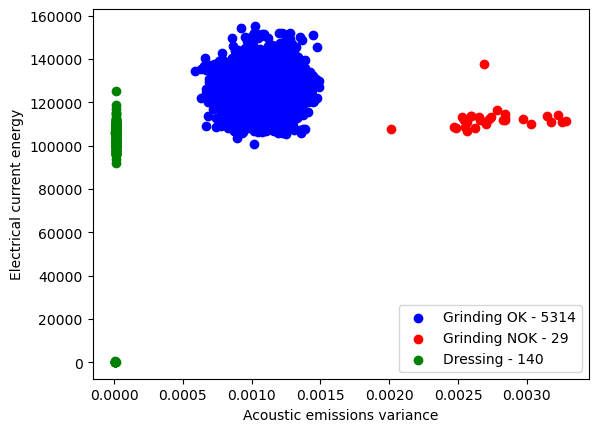

In [43]:
# Visualise NOK and OK data on a scatterplot based on their AE and electrical current variances
import matplotlib.pyplot as plt

# Separate the x and y coordinates
NOK_x, NOK_y = zip(*grinding_nok)
OK_x, OK_y = zip(*grinding_ok)
dressing_x, dressing_y = zip(*dressing)

# Create a scatter plot
plt.scatter(OK_x, OK_y, color='blue', label=f'Grinding OK - {len(grinding_ok_full)}')
plt.scatter(NOK_x, NOK_y, color='red', label=f'Grinding NOK - {len(grinding_nok_full)}')
plt.scatter(dressing_x, dressing_y, color='green', label=f'Dressing - {len(dressing_full)}')

# Add labels and a legend
plt.xlabel('Acoustic emissions variance')
plt.ylabel('Electrical current energy')
plt.legend()

# Show the plot
plt.show()

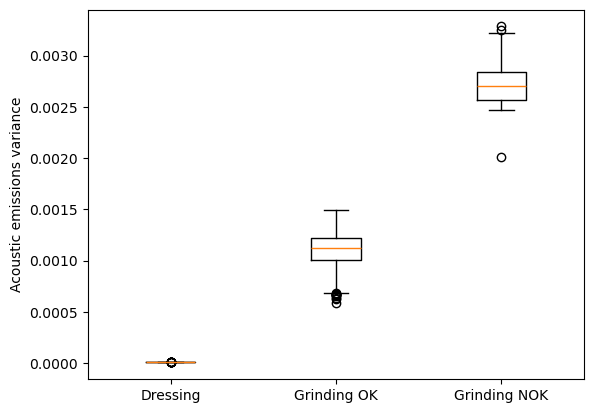

In [44]:
# Visualise dressing, OK and NOK data on a boxplot based on their AE variances
import matplotlib.pyplot as plt
import numpy as np

# References to data in cells above
dressing_var_ae = [var_ae for var_ae, var_cur, energy_ae, energy_cur in dressing_full]
grinding_ok_var_ae = [var_ae for var_ae, var_cur, energy_ae, energy_cur in grinding_ok_full]
grinding_nok_var_ae = [var_ae for var_ae, var_cur, energy_ae, energy_cur in grinding_nok_full]

# Create a boxplot
plt.boxplot([dressing_var_ae, grinding_ok_var_ae, grinding_nok_var_ae], labels=['Dressing', 'Grinding OK', 'Grinding NOK'])

# Add labels
plt.ylabel('Acoustic emissions variance')

# Show the plot
plt.show()


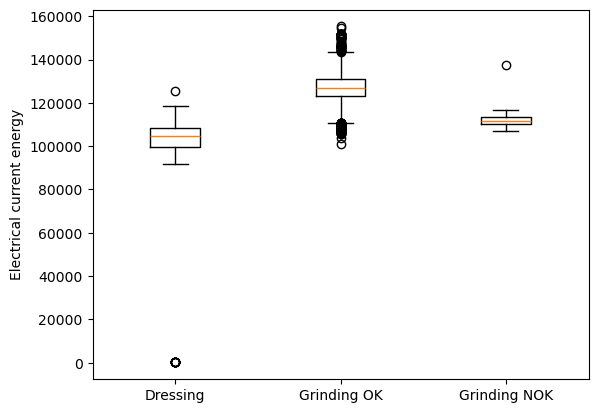

In [45]:
# Visualise dressing, OK and NOK data on a boxplot based on their electrical current variances
import matplotlib.pyplot as plt
import numpy as np

# References to data in cells above
dressing_energy_cur = [energy_cur for var_ae, var_cur, energy_ae, energy_cur in dressing_full]
grinding_ok_energy_cur = [energy_cur for var_ae, var_cur, energy_ae, energy_cur in grinding_ok_full]
grinding_nok_energy_cur = [energy_cur for var_ae, var_cur, energy_ae, energy_cur in grinding_nok_full]

# Create a boxplot
plt.boxplot([dressing_energy_cur, grinding_ok_energy_cur, grinding_nok_energy_cur], labels=['Dressing', 'Grinding OK', 'Grinding NOK'])

# Add labels
plt.ylabel('Electrical current energy')

# Show the plot
plt.show()


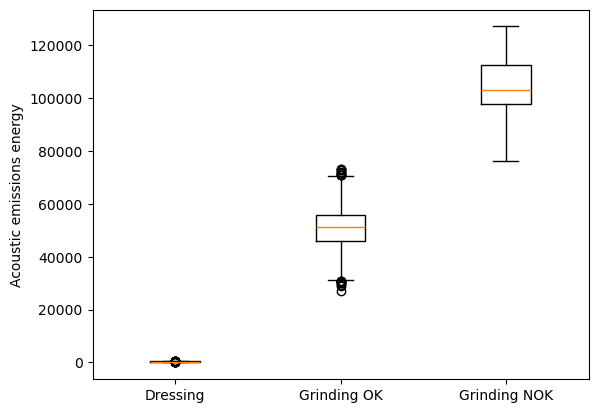

In [46]:
# This feature not included because of strong correlation with AE variance
# Visualise dressing, OK and NOK data on a boxplot based on their AE energy
import matplotlib.pyplot as plt
import numpy as np

# References to data in cells above
dressing_energy_ae = [energy_ae for var_ae, var_cur, energy_ae, energy_cur in dressing_full]
grinding_ok_energy_ae = [energy_ae for var_ae, var_cur, energy_ae, energy_cur in grinding_ok_full]
grinding_nok_energy_ae = [energy_ae for var_ae, var_cur, energy_ae, energy_cur in grinding_nok_full]

# Create a boxplot
plt.boxplot([dressing_energy_ae, grinding_ok_energy_ae, grinding_nok_energy_ae], labels=['Dressing', 'Grinding OK', 'Grinding NOK'])

# Add labels
plt.ylabel('Acoustic emissions energy')

# Show the plot
plt.show()


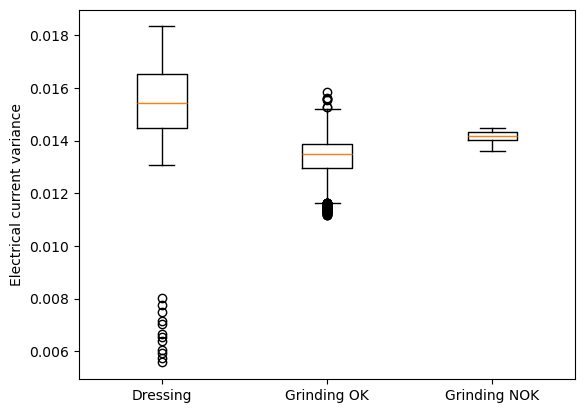

In [47]:
# This feature not included because of strong correlation with AE variance
# Visualise dressing, OK and NOK data on a boxplot based on their electrical current variance
import matplotlib.pyplot as plt
import numpy as np

# References to data in cells above
dressing_var_cur = [var_cur for var_ae, var_cur, energy_ae, energy_cur in dressing_full]
grinding_ok_var_cur = [var_cur for var_ae, var_cur, energy_ae, energy_cur in grinding_ok_full]
grinding_nok_var_cur = [var_cur for var_ae, var_cur, energy_ae, energy_cur in grinding_nok_full]

# Create a boxplot
plt.boxplot([dressing_var_cur, grinding_ok_var_cur, grinding_nok_var_cur], labels=['Dressing', 'Grinding OK', 'Grinding NOK'])

# Add labels
plt.ylabel('Electrical current variance')

# Show the plot
plt.show()


In [29]:
# Logistic regression code to predict only condition (i.e. 'normal' or 'anomalous') for grinding data using AE/ electrical current variance and AE/ electrical current energy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score
import numpy as np
import time

full_labelled_sample = grinding_nok_full + grinding_ok_full

# Sample dataset
dataset = full_labelled_sample

# Extract features and labels
features = np.array([datapoint[:4] for datapoint in dataset])
labels_anomalous = np.array([datapoint[4] for datapoint in dataset])

# Encode categorical labels
encoder_anomalous = LabelEncoder()
labels_anomalous_encoded = encoder_anomalous.fit_transform(labels_anomalous)

# Split the data into training and validation sets with shuffle
X_train_anomalous, X_val_anomalous, y_train_anomalous, y_val_anomalous = train_test_split(
    features, labels_anomalous_encoded, test_size=0.2, random_state=42, shuffle=True)

# Measure training time
start_time = time.time()
model_anomalous = LogisticRegression(max_iter=1000, penalty='l2')
model_anomalous.fit(X_train_anomalous, y_train_anomalous)
training_time = time.time() - start_time
print(f"Training time: {training_time:.4f} seconds")

# Measure inference time
start_time = time.time()
y_pred_anomalous = model_anomalous.predict(X_val_anomalous)
inference_time = time.time() - start_time
print(f"Inference time: {inference_time:.4f} seconds")

# Evaluate the model for precision and recall
precision = precision_score(y_val_anomalous, y_pred_anomalous)
recall = recall_score(y_val_anomalous, y_pred_anomalous)

print(f"Precision for 'anomalous'/'normal': {precision:.4f}")
print(f"Recall for 'anomalous'/'normal': {recall:.4f}")


Training time: 0.0232 seconds
Inference time: 0.0013 seconds
Precision for 'anomalous'/'normal': 1.0000
Recall for 'anomalous'/'normal': 1.0000


In [30]:
# Logistic regression code to predict only condition (i.e. 'normal' or 'anomalous') for grinding data using AE variance and electrical current energy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score
import numpy as np
import time

# Sample dataset
dataset = only_grinding

# Extract features and labels
features = np.array([datapoint[:2] for datapoint in dataset])
labels_anomalous = np.array([datapoint[2] for datapoint in dataset])

# Encode categorical labels
encoder_anomalous = LabelEncoder()
labels_anomalous_encoded = encoder_anomalous.fit_transform(labels_anomalous)

# Split the data into training and validation sets with shuffle
X_train_anomalous, X_val_anomalous, y_train_anomalous, y_val_anomalous = train_test_split(
    features, labels_anomalous_encoded, test_size=0.2, random_state=42, shuffle=True)

# Measure training time
start_time = time.time()
model_anomalous = LogisticRegression(max_iter=1000, penalty='l2')
model_anomalous.fit(X_train_anomalous, y_train_anomalous)
training_time = time.time() - start_time
print(f"Training time: {training_time:.4f} seconds")

# Measure inference time
start_time = time.time()
y_pred_anomalous = model_anomalous.predict(X_val_anomalous)
inference_time = time.time() - start_time
print(f"Inference time: {inference_time:.4f} seconds")

# Evaluate the model for precision and recall
precision = precision_score(y_val_anomalous, y_pred_anomalous)
recall = recall_score(y_val_anomalous, y_pred_anomalous)

print(f"Precision for 'anomalous'/'normal': {precision:.4f}")
print(f"Recall for 'anomalous'/'normal': {recall:.4f}")


Training time: 0.0332 seconds
Inference time: 0.0008 seconds
Precision for 'anomalous'/'normal': 0.9944
Recall for 'anomalous'/'normal': 1.0000


In [31]:
# Logistic regression code to predict only condition (i.e. 'normal' or 'anomalous') for grinding data using only AE variance

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score
import numpy as np
import time

# Sample dataset
dataset = only_grinding

# Extract features and labels
features = np.array([datapoint[:1] for datapoint in dataset])
labels_anomalous = np.array([datapoint[2] for datapoint in dataset])

# Encode categorical labels
encoder_anomalous = LabelEncoder()
labels_anomalous_encoded = encoder_anomalous.fit_transform(labels_anomalous)

# Split the data into training and validation sets with shuffle
X_train_anomalous, X_val_anomalous, y_train_anomalous, y_val_anomalous = train_test_split(
    features, labels_anomalous_encoded, test_size=0.2, random_state=42, shuffle=True)

# Measure training time
start_time = time.time()
model_anomalous = LogisticRegression(max_iter=1000, penalty='l2')
model_anomalous.fit(X_train_anomalous, y_train_anomalous)
training_time = time.time() - start_time
print(f"Training time: {training_time:.4f} seconds")

# Measure inference time
start_time = time.time()
y_pred_anomalous = model_anomalous.predict(X_val_anomalous)
inference_time = time.time() - start_time
print(f"Inference time: {inference_time:.4f} seconds")

# Evaluate the model for precision and recall
precision = precision_score(y_val_anomalous, y_pred_anomalous)
recall = recall_score(y_val_anomalous, y_pred_anomalous)

print(f"Precision for 'anomalous'/'normal': {precision:.4f}")
print(f"Recall for 'anomalous'/'normal': {recall:.4f}")

Training time: 0.0066 seconds
Inference time: 0.0013 seconds
Precision for 'anomalous'/'normal': 0.9944
Recall for 'anomalous'/'normal': 1.0000


In [32]:
# Logistic regression code to predict only process (i.e. 'grinding' or 'dressing') using AE variance and electrical current energy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score
import numpy as np
import time

# Sample dataset
dataset = only_grinding + dressing

# Extract features and labels
features = np.array([datapoint[:2] for datapoint in dataset])
labels_process = np.array([datapoint[3] for datapoint in dataset])

# Encode categorical labels
encoder_process = LabelEncoder()
labels_process_encoded = encoder_process.fit_transform(labels_process)

# Split the data into training and validation sets with shuffle
X_train_process, X_val_process, y_train_process, y_val_process = train_test_split(
    features, labels_process_encoded, test_size=0.2, random_state=42, shuffle=True)

# Measure training time
start_time = time.time()
model_process = LogisticRegression(max_iter=1000, penalty='l2')
model_process.fit(X_train_process, y_train_process)
training_time = time.time() - start_time
print(f"Training time: {training_time:.4f} seconds")

# Measure inference time
start_time = time.time()
y_pred_process = model_process.predict(X_val_process)
inference_time = time.time() - start_time
print(f"Inference time: {inference_time:.4f} seconds")

# Evaluate the model for precision and recall
precision = precision_score(y_val_process, y_pred_process)
recall = recall_score(y_val_process, y_pred_process)

print(f"Precision for 'dressing'/'grinding': {precision:.4f}")
print(f"Recall for 'dressing'/'grinding': {recall:.4f}")


Training time: 0.0350 seconds
Inference time: 0.0018 seconds
Precision for 'dressing'/'grinding': 0.9898
Recall for 'dressing'/'grinding': 0.9963


In [33]:
# Logistic regression code to predict only process (i.e. 'grinding' or 'dressing') using AE/ electrical current variance and AE/ electrical current energy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score
import numpy as np
import time


# Sample dataset
dataset = all_data

# Extract features and labels
features = np.array([datapoint[:4] for datapoint in dataset])
labels_process = np.array([datapoint[5] for datapoint in dataset])

# Encode categorical labels
encoder_process = LabelEncoder()
labels_process_encoded = encoder_process.fit_transform(labels_process)

# Split the data into training and validation sets with shuffle
X_train_process, X_val_process, y_train_process, y_val_process = train_test_split(
    features, labels_process_encoded, test_size=0.2, random_state=42, shuffle=True)

# Measure training time
start_time = time.time()
model_process = LogisticRegression(max_iter=1000, penalty='l2')
model_process.fit(X_train_process, y_train_process)
training_time = time.time() - start_time
print(f"Training time: {training_time:.4f} seconds")

# Measure inference time
start_time = time.time()
y_pred_process = model_process.predict(X_val_process)
inference_time = time.time() - start_time
print(f"Inference time: {inference_time:.4f} seconds")

# Evaluate the model for precision and recall
precision = precision_score(y_val_process, y_pred_process)
recall = recall_score(y_val_process, y_pred_process)

print(f"Precision for 'dressing'/'grinding': {precision:.4f}")
print(f"Recall for 'dressing'/'grinding': {recall:.4f}")


Training time: 0.0346 seconds
Inference time: 0.0021 seconds
Precision for 'dressing'/'grinding': 1.0000
Recall for 'dressing'/'grinding': 1.0000


In [34]:
# Logistic regression code to predict only process (i.e. 'grinding' or 'dressing') using AE variance and electrical current energy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score
import numpy as np
import time

# Sample dataset
red_labelled_sample = only_grinding + dressing

# Extract features and labels
features = np.array([datapoint[:1] for datapoint in red_labelled_sample])
labels_process = np.array([datapoint[3] for datapoint in red_labelled_sample])

# Encode categorical labels
encoder_process = LabelEncoder()
labels_process_encoded = encoder_process.fit_transform(labels_process)

# Split the data into training and validation sets with shuffle
X_train_process, X_val_process, y_train_process, y_val_process = train_test_split(
    features, labels_process_encoded, test_size=0.2, random_state=42, shuffle=True)

# Measure training time
start_time = time.time()
model_process = LogisticRegression(max_iter=1000, penalty='l2')
model_process.fit(X_train_process, y_train_process)
training_time = time.time() - start_time
print(f"Training time: {training_time:.4f} seconds")

# Measure inference time
start_time = time.time()
y_pred_process = model_process.predict(X_val_process)
inference_time = time.time() - start_time
print(f"Inference time: {inference_time:.4f} seconds")

# Evaluate the model for precision and recall
precision = precision_score(y_val_process, y_pred_process)
recall = recall_score(y_val_process, y_pred_process)

print(f"Precision for 'dressing'/'grinding': {precision:.4f}")
print(f"Recall for 'dressing'/'grinding': {recall:.4f}")


Training time: 0.0103 seconds
Inference time: 0.0014 seconds
Precision for 'dressing'/'grinding': 0.9745
Recall for 'dressing'/'grinding': 1.0000


In [35]:
# Correlation between variables

import numpy as np
import pandas as pd

all_data_num = [(var_ae, var_cur, energy_ae, energy_cur) for var_ae, var_cur, energy_ae, energy_cur, condition, process in all_data]

# Define labels for the features
labels = ['var_ae', 'var_cur', 'energy_ae', 'energy_cur']

# Convert the list of tuples into a pandas DataFrame
data_df = pd.DataFrame(all_data_num, columns=labels)

# Calculate the correlation matrix using pandas
correlation_matrix = data_df.corr()

print("Correlation matrix with labels:")
print(correlation_matrix)

Correlation matrix with labels:
              var_ae   var_cur  energy_ae  energy_cur
var_ae      1.000000 -0.173601   0.980739    0.277367
var_cur    -0.173601  1.000000  -0.214846    0.562279
energy_ae   0.980739 -0.214846   1.000000    0.324536
energy_cur  0.277367  0.562279   0.324536    1.000000


In [1]:
# Extracted on 180624: 914 datapoints (test_5), 1543 datapoints (remaining 2/3 of test_6), 2041 (test_4)

test_4 = [(0.0011690811094214161, 0.013876213774700158, 53255.26378605396, 130848.37650608509), (0.0012571425239473353, 0.01334234062486551, 57151.783879857714, 125639.68767613065), (0.001175498300809433, 0.014169123517520272, 53948.181373093365, 134349.81034989824), (0.001123746036170494, 0.014157148476521556, 51408.173870521416, 134033.28286233897), (0.0008849095119331199, 0.014238335964681827, 40120.716853882775, 133553.54226961444), (0.001075228365556433, 0.014117959860363882, 48803.38342097711, 132640.11812123252), (0.0012690609501549688, 0.012813296249384699, 57926.14030762612, 121292.43885379485), (0.0006893448743902785, 0.013755271579196197, 31675.321875590114, 130828.71897806138), (0.0013290652385605005, 0.014215496773147412, 59860.5502817902, 132430.96783369343), (0.001106034564412215, 0.012063149362198286, 49630.31298357357, 112090.72010166713), (0.0012618043011058406, 0.01232431375545843, 57095.68185195769, 115626.52340995662), (0.0011655612492573368, 0.014317523248184808, 52971.7122413945, 134598.9871884863), (0.0010137413990946873, 0.014106693650106764, 46197.766032951266, 132846.27765380187), (0.0008096718662283594, 0.014327316974740474, 36615.27314901142, 133716.9866880319), (0.001093887157614269, 0.012431684340792119, 49882.0997231506, 117436.10586322917), (0.0010272136984347216, 0.014614067521037747, 46638.466799201524, 137316.98340822576), (0.0011559077180280145, 0.013972872624310118, 52824.512156111174, 132222.07260352254), (0.0009802330597647466, 0.013895656153004244, 44509.87534671435, 130551.72126316898), (0.001144738745080451, 0.014067033996475431, 51806.00983878578, 131743.08328592277), (0.0012211681903381017, 0.012967807213173033, 55522.551504187395, 122329.16383365313), (0.0011438139275335459, 0.01305181243700723, 51969.304082381896, 122878.3933127074), (0.0007371140302954544, 0.012645217450139376, 33880.51769632901, 120564.80266343668), (0.001117517394462071, 0.012724233500958693, 50702.38714400207, 119839.62849502379), (0.0012104321230267938, 0.01292553184474838, 54760.79945293115, 121391.93669962713), (0.001145677595281518, 0.014034303689189594, 52228.85682381434, 132478.1096706044), (0.0011222919101185342, 0.014109766324007995, 50976.32329588053, 132628.47406367172), (0.0011587982756427737, 0.01395123778008025, 52468.76110410958, 130709.86723469637), (0.0010714435517494353, 0.01489198919723122, 48540.69906135638, 139418.64515802084), (0.0009078170661411568, 0.012680759038985153, 40849.20990241825, 118135.07587316816), (0.0009396273579896008, 0.013442204321484706, 42801.57940546571, 126876.2001870652), (0.0010875181086076092, 0.014482500724990178, 48615.84706352244, 133605.68590680024), (0.0010871888582035488, 0.013938107914894785, 49356.978755694654, 130927.08702802664), (0.0011582126459710026, 0.012566252902963733, 52053.89159902653, 116789.55978578258), (0.001083838492088826, 0.013377971724037702, 48654.870672031, 124414.47519929457), (0.0008182484775612385, 0.014037539729256423, 37204.20450358216, 132112.89731253093), (0.0009396800111436051, 0.013690306942667948, 42612.715278719465, 128442.03859798328), (0.0011123416221204695, 0.013931611142205797, 50278.51517060012, 130350.17475567077), (0.0010709281414656745, 0.014242618216152237, 48435.224145291315, 133303.068263381), (0.0011110058322600167, 0.014252440891008852, 50673.81130478259, 134607.27782959436), (0.0012417355979560485, 0.014194407680584248, 54966.5333468443, 130019.65658123417), (0.0008017871036047198, 0.01425648137545384, 35639.73400590243, 130292.9541127366), (0.0011564541080777565, 0.014253829175508747, 52818.01321529337, 134819.50405697268), (0.0008725610347062878, 0.013637812907103607, 40109.09241513434, 129927.5933241692), (0.0009995239832387378, 0.014740700069671259, 46007.250335496676, 140156.05949353272), (0.0010775884174313818, 0.012400535264581247, 48128.679763843335, 114661.9878318243), (0.0012092272467457191, 0.014107173783107638, 54854.64797936811, 132403.3907120636), (0.0009886760811496475, 0.014799093922265387, 45156.418801161206, 139959.50299568402), (0.0010133584658896376, 0.013859522960792356, 46207.99878057572, 130742.31568434417), (0.001167755202370695, 0.014397451289174025, 53046.77297493463, 135406.28600013608), (0.0011476215913534746, 0.01412870300500385, 52364.33321426073, 133413.48245555814), (0.0007246165768673132, 0.014471391060584137, 33402.55884101404, 137819.10421942422), (0.0009951022672959884, 0.012913640465583878, 45529.796873497355, 122508.73664128639), (0.0013336357473870259, 0.012844271093777108, 60848.25514782308, 121422.5731917851), (0.0012113338427097316, 0.013204360078629003, 55618.06629503937, 125652.24434691326), (0.0007704979071963543, 0.014271205321241747, 35057.44622673757, 134094.78195353615), (0.0011284847917305068, 0.01422147125565021, 51431.23152515081, 134033.33712078034), (0.001209407029963753, 0.014252366139265088, 55406.076782861, 135019.08455872454), (0.0008798887684376203, 0.014115522001956125, 39607.91156865532, 131552.67286338683), (0.0011137578229280375, 0.014274813986361191, 50827.89721325047, 134675.51887548302), (0.000946817426444867, 0.01409508035079268, 42915.73486721578, 132246.49520059806), (0.0010298985507205666, 0.012714478086432333, 47093.62085056578, 120729.60334243398), (0.000939539702186612, 0.014064434523577363, 42815.45003032636, 132582.53311072706), (0.0011924877262688759, 0.014609957484535467, 54611.27445956722, 138523.51650929172), (0.0010472186090783992, 0.012068248516988733, 48127.949905010675, 114893.07520326448), (0.001198984313700092, 0.01396951858140242, 54711.77817275222, 132082.12495594847), (0.0010055313529100383, 0.014727228125911259, 46281.692806779785, 140167.42054156022), (0.0008999765453657593, 0.01406683771682937, 40735.90755105722, 131592.50634245342), (0.0011537411017165634, 0.014179390640181543, 52536.7022689362, 133472.56816427008), (0.001011816761547976, 0.014443761073876397, 45733.60778739283, 134564.77490712414), (0.0012738722123446084, 0.011919042653516987, 58409.288365788794, 113356.35470431975), (0.0008600549924019231, 0.012083880538546657, 39609.3311671897, 115176.21121856883), (0.0012563656808571447, 0.01261361170030109, 57177.43527812965, 118928.67301077116), (0.001191712773711247, 0.012457516332835646, 53120.133502598415, 114882.48578609101), (0.0010414067577576896, 0.011995926879258262, 47697.24105207896, 113911.08519476472), (0.001301069547734648, 0.011507324666944253, 59508.73263256283, 109106.53417998127), (0.0012505805260195238, 0.011197150541796005, 56779.46709138153, 105489.27783176009), (0.0012206628762117184, 0.014660932629956016, 55415.855824825565, 137818.12610266363), (0.0009399935009035341, 0.01418641705435248, 42395.232532703805, 132557.42831640822), (0.0009534758056582085, 0.01451572416478643, 43290.74912899231, 136389.023936194), (0.001161421758708288, 0.014428197249604263, 52743.02617026369, 135161.9667562167), (0.0013087929004395491, 0.01417575278414888, 58743.86103234601, 131629.49487066246), (0.0011610378876878112, 0.014469741353575642, 52224.38389228214, 134210.3701482413), (0.0010227658809109587, 0.014373746714208956, 46175.29675581544, 134139.56455443485), (0.0009004832089193745, 0.014286835888637515, 40462.856800769965, 132638.37221835152), (0.0010061279973288266, 0.013966896334216706, 46046.613792673044, 132047.45503623429), (0.001178157210424737, 0.014385119150523686, 53705.10549825564, 135581.41827207676), (0.0009633881978471619, 0.014208120060361512, 43702.35685804571, 133169.96043465607), (0.001164358931441679, 0.013220137388457343, 52407.076765763675, 123316.95879603516), (0.0010739249058394403, 0.014108380012790921, 48302.59679462014, 131317.49917590857), (0.0010676321999771269, 0.012764755041920822, 48579.13039604498, 120193.44715333013), (0.0010180530991687983, 0.014078440678616745, 46340.61085540618, 132628.42352871445), (0.001248708077139471, 0.013868431276925962, 56946.33919501284, 130929.08340525704), (0.001226322507695203, 0.012600423391559527, 55843.59882116336, 118990.489523459), (0.0011886752506459447, 0.014074497708955762, 53183.62506333461, 130307.82728071148), (0.0011300300552875286, 0.014103047661341487, 51097.59584042308, 131992.89637461625), (0.0012545917924114494, 0.014206816447578017, 54045.82036432512, 126567.07060968968), (0.0012577651926960344, 0.014083147652876002, 57518.9890115242, 133228.7497181259), (0.0013187774680570308, 0.01393109034900246, 60329.67223552084, 132046.0138088567), (0.0011945945046469718, 0.011535565771563746, 54090.35465928757, 108329.15190565545), (0.0009272431021643783, 0.011303733506272465, 41874.60931894677, 106012.08548021055), (0.0009943357253005367, 0.014695324053966518, 44584.043378750124, 136141.94395963958), (0.0009603530110665785, 0.013863626143335249, 43780.76399879276, 130757.2554902154), (0.0008814569075567896, 0.014705729469372365, 40200.45656946799, 138683.2122280337), (0.001274041727866979, 0.014423075722263146, 57689.585295276585, 134907.9415621344), (0.0011732949290279998, 0.014290477827144194, 52832.365533718104, 133012.89594428393), (0.0008763670349960967, 0.01411686147523942, 40271.99831271003, 134147.05469173955), (0.0010115362284938425, 0.014665330195817549, 46332.197085720545, 138997.29316751263), (0.0009525716648326663, 0.013214930143316565, 43260.62674833162, 124288.3681819507), (0.001287961092357635, 0.012816177665408058, 58708.44999218292, 121192.12586626987), (0.00101947242311817, 0.014678954702263743, 46287.54344626107, 137916.59577664663), (0.0008839086706019787, 0.014437944013598462, 40180.37333932717, 135931.84153527115), (0.001225436707859325, 0.01359991298075561, 55972.76916929963, 128746.7876265619), (0.0009368632617339623, 0.012915378502566405, 43099.084560131065, 123045.79038884462), (0.0010743876569206468, 0.013072016348483088, 49350.76232122011, 124168.64957036445), (0.0010456240824381054, 0.014208492087393448, 47898.127766852915, 134740.47421539592), (0.001097139843753597, 0.01350114725910595, 48985.418900428645, 124591.34780134079), (0.0010470520501334533, 0.013465714834279649, 47595.85608755599, 126870.6701649009), (0.0009685854855452195, 0.012742896445659783, 43915.85060764205, 119937.3130604016), (0.0010392715341730652, 0.01469389260743921, 47103.3175974405, 137735.49334752146), (0.0011686368550759135, 0.014890526878029694, 52912.5199366398, 139194.1244426302), (0.001255825162741743, 0.014796087484607421, 56671.313494939364, 138086.9444849579), (0.0010303258105155068, 0.013766133430701316, 46766.053611530944, 129384.2844669466), (0.0011313411626799467, 0.014421076812327342, 52033.09274935399, 136927.67249748737), (0.0009519368148798293, 0.014444939286224206, 43896.61904397751, 137612.06910737362), (0.0011213541957531361, 0.011855404379049455, 51029.07532953077, 111905.41931414058), (0.000955128267990736, 0.011856801185888843, 43301.913680692065, 111408.34574340824), (0.0011289294272541549, 0.012742043400418589, 51401.72984096273, 120002.43663372268), (0.0009769010379599916, 0.014162701728501217, 44325.50920352921, 132938.04051750107), (0.0010711239873200619, 0.014009567931341307, 48679.702937236594, 131278.87029862017), (0.0012285440208673014, 0.012293611912756642, 55010.79120271504, 114071.20016112788), (0.0010219595739070669, 0.013877006377794309, 46329.50930113886, 130073.2394658489), (0.0010741028591640272, 0.012069782178927482, 49267.22778375953, 114733.10695568888), (0.001034955626193129, 0.014640359071464208, 47327.67768999384, 138498.41500910552), (0.0009813829241251749, 0.014579028283241981, 44730.51410309706, 137355.0685707769), (0.0010073716475901009, 0.014953485181035595, 45750.93233693724, 140461.54091645824), (0.0012705743822870035, 0.013665870806417095, 58362.29878867133, 130088.48416233744), (0.0011580558287506396, 0.014014200717748787, 53147.25440489286, 133139.05143542448), (0.0008330939854691797, 0.012995596310781529, 38204.55363856289, 123395.62417059345), (0.0012874637012860069, 0.014070985289033798, 58337.348949962376, 132046.8443617157), (0.0009756039636569536, 0.014033034708878539, 44329.20658630519, 131628.15054740105), (0.0011345750145375073, 0.01250175138867712, 52049.45224760557, 118862.07822654494), (0.0008925164879624412, 0.011307829609267685, 40979.94911478502, 107810.60827080447), (0.0011294675396838474, 0.01271729015714781, 51396.56121326365, 120149.89642054432), (0.0011333270961480086, 0.012668294548764917, 51514.34776752288, 119572.21279381007), (0.0012888702917464173, 0.013997917292931936, 58547.31988574361, 131757.10906454755), (0.0009557452821314269, 0.014127213643397552, 43442.47652150218, 132808.95626687357), (0.0009001642739052515, 0.014053886192140558, 41015.05114974066, 132527.83073098277), (0.0010548681308713604, 0.013850210367535911, 47874.04415266462, 130044.3542012201), (0.0009828327235080795, 0.013821856660755402, 44938.094166260555, 130784.22777188446), (0.001210493860621895, 0.012904995658425185, 55002.28387277727, 121457.40947441827), (0.0009955347086381813, 0.014132385577835846, 45606.01855205936, 133965.25462040948), (0.0010359476249852827, 0.014236042208782775, 46798.49186945623, 133207.78872865345), (0.0009127998566437563, 0.01417468389933338, 41345.95335252212, 132779.0452080523), (0.0011957014610384882, 0.013935566463556068, 54487.51266282199, 131459.3307217937), (0.0010983595774043994, 0.01421837248428011, 49879.44032043121, 133662.256858381), (0.00125291159742869, 0.013810817955146625, 57065.657724939825, 130326.39496689118), (0.001306638599058836, 0.012481423665146853, 59546.2499818537, 117916.43229452286), (0.0011273009749569402, 0.012569978365785776, 51303.85299506145, 118531.07682550828), (0.0012182174352801116, 0.012784178211147839, 54912.8217884685, 119440.65103971244), (0.0010956693819229508, 0.012368922813270596, 49852.13066354766, 116368.21328219063), (0.0011432215987259738, 0.01234387675665428, 52248.75199700186, 116767.9374605899), (0.0012675897313195043, 0.012525029985283022, 56879.31168795165, 116512.74324278678), (0.0011836806438380366, 0.012037258246215658, 53854.04972528687, 113623.89978464067), (0.0010401258565976852, 0.013985967036554154, 47433.97061805386, 132065.4520632725), (0.001207355246168689, 0.012463199396791507, 54846.11701726111, 117110.74443012843), (0.001090911349464236, 0.013981458765322993, 49000.87854208115, 129995.45606360165), (0.0010395622150961323, 0.014112493405442588, 47249.06123767402, 132796.14986151122), (0.001054202837869404, 0.014199444918672094, 47832.65251713017, 133378.60926968456), (0.0011548128611898088, 0.014055149706047591, 52539.250438076466, 132332.51815470963), (0.0011778090350369288, 0.014271633910926722, 53440.15614623146, 133936.09796697274), (0.0012166379796470993, 0.014086754090267394, 55216.70271757077, 132388.56561275598), (0.0010413907953506923, 0.013307023537755473, 47091.126912857864, 124641.08957484744), (0.0008030444483856728, 0.014484506770212869, 36478.34522481993, 136126.7524254991), (0.0013017182454052884, 0.013523946841686299, 59357.207186002284, 127848.20853131289), (0.0011865273048289756, 0.013292027109568151, 53382.69086827943, 123854.9655224887), (0.0010834259195207825, 0.011562143201847523, 49104.82255420297, 108843.52976818591), (0.0006347625479104693, 0.014206000926122422, 29246.48887614748, 135182.7829467466), (0.0011348365083555122, 0.013117750968323792, 52031.63291814306, 124426.21507196715), (0.0011125289901523095, 0.014051783981095179, 50703.76509748619, 132546.6183504652), (0.0009174818410156103, 0.013675446901171012, 42098.09511989131, 130052.1808161681), (0.0010391487836901184, 0.012463295329465525, 47367.68213234392, 117621.0901783991), (0.0012268163627784168, 0.011940678289583952, 56277.31075187661, 113541.248588883), (0.0012847308069958664, 0.012973870441663196, 58516.642806484364, 122632.54665292133), (0.0009129538371048026, 0.014542240494113963, 41623.34962673219, 136932.19300329956), (0.0011266567943238796, 0.014015493071703886, 51362.20414929255, 132370.1981133591), (0.00108633358789915, 0.013968603413086143, 48772.794307969634, 129948.84884467958), (0.0010407895339204591, 0.011640965949288658, 47350.840103210845, 109815.01089200341), (0.0010937686666390603, 0.012657049356963188, 50165.456169265926, 120546.08549164642), (0.0008077205674380169, 0.014271271897217512, 36856.68163039517, 134235.43452255582), (0.0012163326718585183, 0.013210643990883649, 55420.6535309865, 124519.92998251898), (0.001292148652421731, 0.014227514025911894, 58575.96304972039, 133261.9058699867), (0.001089569273637911, 0.013030131186112967, 49807.207556608264, 123352.58944481412), (0.001092995079290351, 0.013037812014301342, 49452.01691500241, 121758.8410467684), (0.0012872211596134631, 0.012900427904929597, 58184.92680707052, 120989.27324275802), (0.0010263712050911586, 0.014287098202522244, 46471.66564686363, 133753.9113058847), (0.0009453546274798613, 0.01435519997833586, 43038.21181946689, 135121.77977808914), (0.0008925691088497313, 0.014704692110600198, 40884.24879858796, 138846.7417360698), (0.0010964155797946232, 0.014055038737722042, 49477.526006657215, 131325.2726037028), (0.001172592247310386, 0.012654935960616271, 53392.88971353617, 119535.6698359365), (0.0011820833704822148, 0.014391881850981975, 53552.79568359539, 135008.4417473105), (0.001157196707611999, 0.014082712477251279, 52690.24451638655, 132633.7608263932), (0.0013230554330315673, 0.012636302642257829, 60092.52633624408, 118904.23833563471), (0.0011330687484012289, 0.01294926996954203, 51647.67513958256, 122342.14989130101), (0.0012883056459963313, 0.013793974957797717, 58392.143809757115, 129574.08172191525), (0.0011525738760817539, 0.013807592978479024, 52538.440915413514, 130388.79403622061), (0.0009424144953297387, 0.01213435591202683, 42619.24295185525, 113670.63462092495), (0.00118839421741126, 0.01467280646004931, 53899.62376798119, 137705.8583550091), (0.000967217588651481, 0.011761827414601038, 43778.93381644439, 110472.51526485775), (0.0010367105986944308, 0.01413613709723094, 47453.18676297156, 133912.18935229024), (0.0009074420585688905, 0.01272898883790495, 41193.74087575623, 119852.1167039095), (0.001313102651519575, 0.01421090628430829, 59321.84749861329, 133001.05879033823), (0.0011420894544274722, 0.01492870670662297, 52073.4872410589, 140789.36176407375), (0.0011336239463291856, 0.014116673836188772, 51651.7507459355, 133065.892495048), (0.001260594897986639, 0.014952169578498814, 57764.989125774155, 141656.77184378763), (0.0012543658874360959, 0.013955824673804244, 57159.58945151038, 131776.6640359509), (0.001290014060895078, 0.01290150682085297, 58585.38019191408, 121626.44805307889), (0.00107434152713692, 0.013388172631107084, 48368.10180030385, 124998.26687444831), (0.0013024920995183076, 0.012306876193301277, 59441.83440818694, 116378.42059562248), (0.0012213015938754008, 0.012826938804024059, 55551.96879191559, 121058.2355486046), (0.0009017501119477351, 0.014097400992697498, 40478.02162392209, 130752.62216037692), (0.0008400176896349018, 0.012948364019003199, 38501.993437783734, 122821.05286241406), (0.0010113266068814324, 0.012383069571583647, 45071.076334943624, 114205.06832323728), (0.0007625321421395669, 0.014357174666576043, 35034.90814778076, 136388.08060609995), (0.0011745563972559638, 0.012105929345135892, 53644.4174652276, 114563.11207344376), (0.0010752899564380142, 0.014784989477714153, 49128.245214380586, 139878.3687561212), (0.001197264539432937, 0.013992848727416638, 54700.03645715368, 132394.26928196562), (0.0012695804207722941, 0.014471372266653404, 58181.1231176188, 137332.64250502264), (0.0012431879877376408, 0.014689273464446243, 57012.29421677435, 139391.8169051347), (0.0008261320428168431, 0.014305774102991298, 37590.923638952736, 134705.3883025183), (0.0007821223786615616, 0.014380195353230499, 35592.537722814785, 135072.99422331678), (0.0013297241237427559, 0.014060984413700007, 60393.13385320989, 132271.38141756106), (0.0008393927531851935, 0.013994524620346118, 38260.20066048403, 132064.69086757835), (0.0010241801586993952, 0.014677746183549653, 46243.7996023392, 136996.38686346693), (0.0010605801993073165, 0.011352832574106717, 48507.86552851266, 107804.8627788289), (0.0011546843006926357, 0.013918385570708774, 52279.992842893495, 130523.0286817744), (0.0010917755202207043, 0.012502957726374825, 49733.71218937995, 118019.45671294662), (0.0009875200285651266, 0.013878394905611633, 45063.209757796714, 130929.03184685887), (0.00116442252528001, 0.01123120422412476, 53346.58066314269, 106753.99142119302), (0.001244116946913238, 0.012527106942885518, 56374.423879087575, 117494.77195798124), (0.0010086791813313498, 0.012573594067762879, 45627.22469646106, 117917.29947465933), (0.0013014715357390872, 0.013888833202155159, 58964.77020193819, 130401.49070515124), (0.000881410624351673, 0.012357756354558469, 39720.93798113448, 115190.12254325906), (0.0011097706219234513, 0.012432517338989644, 49984.60708919421, 115856.18335810424), (0.001085674969778576, 0.014578835332094153, 49684.6860615965, 138201.2685771115), (0.0010463419006318745, 0.014564919950397225, 47765.29105862937, 137707.68238020566), (0.0007890049690756911, 0.013366859238992617, 36244.40644926534, 127225.6819792046), (0.0009268023934763717, 0.01401646579088871, 42151.317482085964, 131828.03444778683), (0.0010517794402341181, 0.014394707108785603, 48307.06736818967, 136771.35989311466), (0.0013033252035547576, 0.012590008712609102, 59222.601547792285, 118597.55784673138), (0.0011794063578180088, 0.013703850821055292, 57352.17694133051, 137887.62754977559), (0.0008283666162047064, 0.014349365299285285, 37324.60622879612, 132996.90221557752), (0.0012181018331303493, 0.013883158736363616, 55607.85631783001, 131333.34449534575), (0.0011669273938389802, 0.012396462573120362, 52538.2902010458, 115602.43571093767), (0.001105052134025274, 0.014735233649089146, 50339.636630348075, 138867.34454266517), (0.001151305788894672, 0.013465199036840793, 51894.270336093134, 125785.77559007544), (0.001099328398093224, 0.014765088440395431, 50165.32328849094, 139458.09008213223), (0.0008902126189377899, 0.0147166873723001, 30424.141326353416, 103548.31954548221), (0.0012029621011339694, 0.013872919795889782, 54257.785361352835, 129479.16379027568), (0.0010291470371179975, 0.014054986135978598, 47183.628719135246, 133225.50813185), (0.0008627415511314534, 0.013159861024522426, 39336.88356672692, 124161.03715079946), (0.0012131183019172599, 0.014134812816610354, 54792.90289584711, 132094.28046379617), (0.0009142626194529481, 0.01194133870336825, 41473.15249727811, 112277.27438302508), (0.001202184779885057, 0.014039201515531901, 54460.40170777781, 131689.02021179907), (0.0010572715264649292, 0.012895922467264037, 48705.24194786668, 122712.35212588143), (0.0008267407306466301, 0.01235979616414916, 38025.95533540741, 117706.58211969933), (0.0007927988904978107, 0.012806722373161486, 36518.837191941275, 122059.98119384692), (0.0009224632957641098, 0.01287336920717849, 42421.26678054031, 122601.31188925514), (0.000918673919458649, 0.014499123278860979, 41608.915653261385, 135911.47286163966), (0.0011884558727486543, 0.012541522075068437, 53166.40832956827, 116142.88748668984), (0.0010895597686077388, 0.012482416179317371, 49711.22731762963, 117980.64960203461), (0.0012717902942667113, 0.01254934292833357, 57996.09499205268, 118720.46556053266), (0.0010656965077045317, 0.01442909339684896, 48310.22626295601, 134655.63754635825), (0.0010754853981695236, 0.014360020975334228, 49046.204762377776, 135191.35735983917), (0.0012056923461356028, 0.012522362051103315, 55056.247473674026, 118587.20994791306), (0.001004528163137926, 0.013968588933507557, 45631.83197392822, 131240.45620499214), (0.0011946677221898576, 0.014768878447082035, 53767.54284313547, 137475.1115639166), (0.0010260227533852178, 0.012686102223426126, 46791.74190591146, 120082.41569620668), (0.0009894838951581384, 0.014267634180872797, 45527.98036753678, 135865.94739697943), (0.0011261456123215494, 0.01478750471119641, 51525.273873536265, 139944.3453105901), (0.001111162510074338, 0.01158480434458348, 50500.23599132353, 109148.74846025584), (0.001180257211991573, 0.01400702402796678, 53388.10860129385, 131012.71565194067), (0.0008149230917067409, 0.014100105170681648, 37415.10559091517, 133735.56425170897), (0.0011380956223935872, 0.014250625446337921, 51408.55216459078, 133230.2269471939), (0.0009015716697100219, 0.014323809576069896, 40967.431340735326, 134085.48430449222), (0.0007995560288765929, 0.014583967281476219, 36710.75855439933, 138633.2655074617), (0.0008916705134411768, 0.014032418260209747, 40329.670809173775, 131306.35230240773), (0.0011772284051452032, 0.012879622474325652, 53566.96856494842, 121325.71813676236), (0.0008125189201495088, 0.014572507934068162, 36693.60500226453, 136079.80395203535), (0.0009594282762204657, 0.014583091892689132, 43412.059100462255, 136342.19421244954), (0.001189929203751343, 0.012575313201007516, 54168.630594774804, 118718.69490319966), (0.0009498756611809246, 0.014127436453349362, 43202.5632322024, 132846.53511325916), (0.001158744925048303, 0.012599779550234252, 52888.91120291823, 119296.14943900373), (0.001088354275136935, 0.01396587785634064, 49607.77668848749, 131796.16499696294), (0.0009420822688129245, 0.013904696459752139, 43014.314702246396, 131369.17961825096), (0.0011585170443554917, 0.013189086261889879, 53032.65978444424, 125092.41421308907), (0.0008640593250919513, 0.01404983670440674, 38961.634346731065, 131102.02590161547), (0.0010435107115254485, 0.01304648804337877, 48072.12748889406, 124251.36412586621), (0.0012232641860735322, 0.013366356154244918, 56217.48354643317, 127303.87911630982), (0.0011401740785950425, 0.014776688927994662, 52328.30726954557, 140447.0496410297), (0.0012749477155470205, 0.013235026580450787, 58351.83402564491, 125603.09796256087), (0.0011748402696080457, 0.014713682880280361, 53471.217761516746, 138556.09794654045), (0.0012133013041567213, 0.014031551330500101, 55344.82512609213, 132483.01537679252), (0.0011180800582088746, 0.014649137232513047, 51010.84597420963, 138204.78267402528), (0.001135882092000265, 0.01279988770318916, 51676.63108269138, 120871.75395605665), (0.0011533732666593852, 0.014094611059912927, 52564.68175578841, 132865.54203568154), (0.0008481120187619068, 0.011886811797331445, 38956.61586257243, 113216.68394318802), (0.0010946542033225188, 0.012712096034732535, 49813.692153698044, 119849.56051966894), (0.0013367386431689125, 0.012872162828230135, 59803.885584265176, 119507.75609091211), (0.0010271866708633014, 0.014562806249895064, 46297.48749308527, 135606.90114125496), (0.0012387410741599378, 0.013028693852591054, 56299.53689760082, 122834.79587461623), (0.0011061328674102132, 0.014160344239833875, 50425.3951879035, 133620.08916841427), (0.001170503326119753, 0.01354316376307781, 52988.6439760942, 126988.6762383046), (0.0012927863172969218, 0.014427257831677632, 58588.1502803832, 135292.96603400816), (0.0010718615592384502, 0.013794381191704348, 48825.48153033241, 129825.89592494807), (0.0010251058846957992, 0.01430680733809537, 46327.3223980266, 133618.90456435643), (0.0010312097072312462, 0.01408255357640911, 46989.24293809084, 132578.66513332055), (0.0012077781742473581, 0.01423675989908637, 54825.98567128498, 133602.79264063912), (0.0011544160531762695, 0.0138915270694454, 52643.034708730294, 131031.32279615528), (0.0010422365641273577, 0.01418790182661006, 47584.57692261881, 133833.82380391582), (0.001187246172834563, 0.012137096220936281, 53778.83895804845, 114000.13463219661), (0.001169209305278701, 0.011967961504298344, 53357.136071182504, 113166.59026351105), (0.0009632096651747313, 0.012113968992966014, 43653.15273582914, 113674.42929559523), (0.0009453380550206167, 0.0137481389203269, 42699.621243331596, 128675.65998673957), (0.0011121838766587056, 0.01405334124614716, 50824.26789506563, 132916.73123817006), (0.0013020531153979064, 0.01280997006612136, 59639.836307682745, 121737.04930211765), (0.0009628250415152652, 0.013671552523574994, 44094.22247202343, 129699.0934164715), (0.001111005930141746, 0.014456122572134283, 50532.15874427754, 135713.18554738595), (0.0011039997586666627, 0.012450534867345802, 50191.71697307052, 117279.57929880379), (0.0011885329820720012, 0.014259137144976761, 53938.42690984304, 133718.92611386775), (0.0009561386525945986, 0.013762649696688731, 43301.423995153156, 128975.66963861049), (0.001090905005753147, 0.01412764179911369, 49592.75125694002, 133085.02530521312), (0.0011393189453684609, 0.012755897589789823, 51740.85591991798, 119939.73609174295), (0.0010729310884383205, 0.013930263539177017, 48907.448566349885, 131542.94119317646), (0.0012372123118576065, 0.01393633652594426, 56285.25089381797, 131311.60480376304), (0.0011818962949934333, 0.013870367459632294, 53082.028944887476, 128906.66263965963), (0.0011783134675357441, 0.012707868232986573, 54134.13771168572, 121249.38107035751), (0.0012767733196207378, 0.01352461185228271, 57519.94799597669, 126310.22912408695), (0.0010517037916715566, 0.01407244624424998, 47989.23262771815, 132773.16145867048), (0.001260175946033847, 0.013868496038143776, 57588.21160714209, 131138.55477837974), (0.001025225881068875, 0.013410349576238288, 46544.58553882436, 126166.4809686749), (0.0013092088614335361, 0.012112864889987706, 59399.49402918418, 113906.91585034213), (0.0011189391901485766, 0.014608031266339363, 51053.65037127858, 137771.42776543376), (0.0008912872909298159, 0.01387309538619577, 40762.95747779944, 131189.59165490832), (0.0010526733276793223, 0.013267696644344696, 47808.310515221325, 124613.92399946178), (0.0011305921854987625, 0.014635899227731383, 50678.888159263195, 135608.88354839338), (0.000851849250436956, 0.01439914267184332, 38185.77162804946, 133186.92396041693), (0.0009975890079704961, 0.014527948951441301, 45028.585052219714, 135234.34560311487), (0.0010038113543140153, 0.013890852640927735, 45643.0971038669, 130479.59755169807), (0.00108033236639894, 0.014535419315321573, 48041.87177695255, 133586.78892375648), (0.0010475974867993107, 0.014199326725963513, 47724.52012438552, 133628.04434787942), (0.0011677218999083493, 0.012061985954491572, 53049.571499790996, 113542.02323774413), (0.001203104119880069, 0.01427259221617827, 54917.61512609374, 134965.96839065416), (0.0009102007512669074, 0.012044088308971563, 41791.60744452565, 114626.13390016051), (0.0007839806686211288, 0.013992982771380953, 36005.185833981755, 133085.66242342666), (0.0009994496680146455, 0.012194324647381065, 45419.73433853323, 114725.76700084415), (0.001144217235232454, 0.014237499249635624, 51799.37991587213, 133410.5665129439), (0.0011411957763282673, 0.013479176309119215, 52324.955343761365, 128148.59930204668), (0.001171859703463577, 0.01427716416891586, 53303.984143133, 134448.61219511827), (0.0009953189867552119, 0.014554253798821493, 45389.02536661429, 137294.20009822602), (0.0008527349706923498, 0.012946230785379716, 39249.38541046988, 123423.0510697797), (0.0010919529468016557, 0.014124978869558257, 48550.212074669784, 130059.13404796328), (0.0010574182977124951, 0.014528574563828016, 48110.65090748621, 136935.67837702745), (0.0009496521073106062, 0.012058852939820319, 43356.06027336288, 114010.77831297237), (0.0010945246464596043, 0.01399970880553037, 49622.878113414525, 131335.1534297548), (0.0007734273972265129, 0.014279176078369742, 35256.371895078315, 134500.1171490418), (0.0011331181057026827, 0.014131859969648016, 51661.54932717851, 133328.12072990515), (0.0010566699299478528, 0.011447235741380958, 47858.55709528199, 107589.57113846531), (0.0012399559885495973, 0.014002454280854486, 56279.89250580268, 131549.74066628027), (0.0009475503460168401, 0.014067524051938042, 42993.671718697966, 131966.58154057193), (0.001081753262939524, 0.012021221459624188, 49312.246251661796, 113610.95291492742), (0.000995409182455713, 0.012511863553320585, 45687.927008655235, 119032.52629104786), (0.001235491583241021, 0.012806663001487164, 55927.21777143371, 120096.14359580952), (0.0010639381539643677, 0.014062646352706197, 48429.6601723217, 132374.43476014517), (0.0009507854405821285, 0.012861285570351468, 43170.06347384041, 120828.87012322593), (0.0010059559407118448, 0.011450206301517527, 45936.79339723964, 108523.70774748387), (0.001120383729129522, 0.014396868067716503, 49801.818272861725, 132446.30206558466), (0.0011883977736110419, 0.014393866568341858, 53782.64395532475, 134653.49220584484), (0.0008434529317026937, 0.012911438621254163, 38621.65752023387, 122457.59401685816), (0.0011331653353960321, 0.013822390259766469, 51708.15537227588, 130566.92315049509), (0.0012237561860193689, 0.014329878051243854, 54987.974828612816, 133403.20259581835), (0.0010542922222072553, 0.014146965260411924, 48257.76501501328, 133935.9912528091), (0.0011135965400854138, 0.014683585385516888, 50750.044982500774, 138403.90159586523), (0.0005897349092809358, 0.014153702175197111, 27158.061389060807, 134604.31011962783), (0.0007884736622510266, 0.014315044181646187, 35857.21356459814, 134508.3913299344), (0.0013184592899519083, 0.013912879703949816, 59898.4796563807, 130934.2447273844), (0.000994196703300401, 0.013798935638976115, 45097.266110086544, 129591.1678739308), (0.0010141777709727446, 0.013938386936271373, 46218.23854183472, 131357.46458431368), (0.0012211704615070313, 0.012243784719173928, 55877.41791623235, 116135.48588207997), (0.0009922377129897271, 0.01306650209461355, 45276.14237062818, 123502.85864558027), (0.0013028528439323597, 0.012345727747365316, 59483.594612668014, 116831.27603280105), (0.0010672710693275717, 0.014707175815165173, 49034.127730891036, 139772.7881579235), (0.0009867551344866212, 0.014597660653257264, 44960.342071774314, 137506.21256996135), (0.001140938424732256, 0.014353750383691629, 51896.215647350014, 134944.8540218663), (0.0010814309664786297, 0.013455698115552438, 49302.90639199238, 127190.59778184713), (0.0012113827003696416, 0.0128837056855249, 55505.60068965174, 122550.68188898581), (0.0012623686619468093, 0.012733645058386946, 57388.32075864249, 120229.21798441985), (0.0010646564515106305, 0.014657857017809497, 48785.08121862912, 139037.62935961245), (0.001250797700022148, 0.013879155763100321, 56996.69951313854, 131068.36637827201), (0.0011955231339075302, 0.014232521369985016, 54124.394926952344, 133327.94792114192), (0.0010537489248530786, 0.0139710525548313, 47767.83358934424, 130956.58224432492), (0.0010311652679039266, 0.014707885333618975, 47344.361738979984, 139606.79171765392), (0.00121588248203413, 0.013791616919984338, 55303.84218758004, 129970.17812627036), (0.0010287438698403375, 0.014327927895603141, 47056.452361699055, 135619.29122892238), (0.0009103448510547714, 0.011720246076384775, 41239.47404723381, 110214.11901504624), (0.001043322920984182, 0.012389366431475042, 47424.97694969229, 116581.63604630498), (0.001106013718422637, 0.014014652026166767, 49818.473695635876, 130495.73890581253), (0.0009683162290411375, 0.01228625602369966, 44041.46584444443, 115697.15441142059), (0.0011349950007261136, 0.01405167201644099, 51840.272001431, 132791.90940431165), (0.0008725127804366976, 0.01422805996549141, 39726.448974848114, 134077.78230938327), (0.001236565015400833, 0.012922853462949876, 56223.79795805601, 121923.26464723745), (0.0008188313916132965, 0.014606053614681891, 37305.94297001256, 137613.46376841757), (0.0008776265379806203, 0.01401611163946199, 40170.654277590635, 132693.44616105154), (0.000972795243429343, 0.012767113763354307, 44471.77552685218, 121179.68600474928), (0.0010562701400493898, 0.013687572611709822, 47911.52581725524, 128426.23966735948), (0.001141033370484116, 0.012882383552909658, 51476.97733982978, 120519.98122786223), (0.001007116178664772, 0.01206023618482931, 45999.62551003343, 114162.13169801082), (0.0012443640589707814, 0.014124933740156175, 56751.19088904122, 133389.49410828095), (0.001238165342367374, 0.012772820777862012, 56523.63642733094, 120844.07478447218), (0.0011242420276917748, 0.01399591581948018, 50877.998925587795, 131167.6916321229), (0.000866557540661744, 0.013803272984760322, 39202.08714474225, 129302.31619284258), (0.000961565702169245, 0.013993304012623924, 43039.9147957712, 129420.84025236405), (0.0012453690378337221, 0.012564708688918017, 56821.91703582307, 118869.54131696161), (0.0011647061029598793, 0.011948943092974697, 53336.76137332458, 113490.2779298467), (0.0013132426579720905, 0.012970106755444822, 59242.60894635429, 121087.97139631462), (0.0010687204954658088, 0.014287745276388292, 48749.022376535766, 134578.88464244182), (0.001068949669368426, 0.012558916387946395, 48823.57997096298, 118721.94984891858), (0.0011879060255526334, 0.012561653594037908, 54102.77278818841, 118467.78190727551), (0.0011095832095062202, 0.014792667569043015, 50991.84892152265, 140841.35248135086), (0.0010749734375261417, 0.012326721974126962, 48636.3595049266, 115514.290278921), (0.0010424752770832083, 0.014574785445242733, 47556.21533679419, 137589.69368686833), (0.0011630432074616615, 0.013979290118527967, 52866.98805270105, 131567.5069205634), (0.0011409452371119368, 0.014283596457102803, 51612.254751257686, 133717.13875430883), (0.0012507748962436974, 0.013358147849483151, 57176.952744731956, 126538.24853884027), (0.0010489340830356457, 0.013306178398247935, 47774.96399813508, 125620.97878336227), (0.0012399123119014078, 0.013929859737287026, 56455.29280196453, 131300.93925452768), (0.0011881369440187646, 0.013500499124809256, 53716.28609474529, 126378.17829271949), (0.0012213210095258983, 0.013419640345131517, 55480.58505791635, 126407.41990325743), (0.0011064023311556283, 0.013392360019662061, 50016.66976530746, 125324.19782027099), (0.0008500855620853049, 0.013588128386384494, 38846.116209930406, 128498.05929134072), (0.0010461048864896989, 0.013393286792907563, 47632.76318315855, 126303.91747588095), (0.0010177696257872117, 0.01390811040607475, 46315.2440555806, 130999.51705780829), (0.0011471604872789842, 0.014552481882792567, 52948.242005041204, 138648.68500088793), (0.0010880152314855125, 0.012690726867005323, 49558.11024460894, 119946.82808514891), (0.0012007542798492105, 0.01301344950308573, 54791.13408443663, 123079.73086145206), (0.0011251402487024722, 0.013834871246062088, 50600.6929416964, 128812.30054510092), (0.000872214970776728, 0.011274170004861837, 39884.415802528376, 107031.30296991896), (0.001102064492275446, 0.012287078025579897, 50245.647668650585, 116061.94192795549), (0.0011245998093417117, 0.012364421279676227, 51031.92226326408, 116135.64990438097), (0.0010169150000733807, 0.01245999793414183, 46263.947610024115, 117250.4308675707), (0.0013010084057364026, 0.01240702597977979, 58830.522814600314, 116161.38019601894), (0.001129100526848774, 0.011936447530316014, 51273.47492444727, 112464.60360613446), (0.0011807792619050036, 0.013313889718715331, 52582.12461503944, 122793.12423453119), (0.0011567402908800276, 0.01379569262909183, 52826.53151836087, 130444.75340049896), (0.0008917664282181071, 0.014110374066467774, 40921.3893508211, 134007.27706840713), (0.0009500640635723407, 0.013932404127632409, 42880.2495967352, 130152.32168662496), (0.000992370803444432, 0.013889246462329427, 44893.98164009377, 129955.24114197632), (0.0009076078462886287, 0.014025425286993808, 41143.16545419139, 131498.63737961435), (0.001051527700344327, 0.013949951625372917, 48231.457774525494, 132358.61820906523), (0.0009434596246130654, 0.013959158691550072, 42842.43789077719, 131196.01868153087), (0.0011956328983776987, 0.013705627083123246, 53906.28145129376, 128043.75480233562), (0.0010815047249530694, 0.012787141175368232, 49214.19195829641, 120816.7826211844), (0.0011462587143763563, 0.01280354504718611, 52210.64089250903, 121067.2163302335), (0.0011513211195166258, 0.014164539248594005, 52484.33613135801, 133499.87265706778), (0.0011399772977749257, 0.01271343407596705, 52091.17274814074, 120544.45547022509), (0.0012396918701072953, 0.01282037792333341, 56916.12952960998, 122142.2895011313), (0.001105987070572844, 0.014013077047749298, 50293.56664918149, 131977.45016744453), (0.001217272013457017, 0.013492816839225914, 55211.04379202875, 126744.40990627323), (0.0010629702630582535, 0.013706708226272095, 48205.008606109346, 128642.61623032064), (0.0009943423388457586, 0.011707589592136664, 45380.56021678942, 110901.5244285449), (0.0011806161408624027, 0.011501359273695735, 53757.599302159324, 108715.97804423665), (0.001188644635468344, 0.013937489549452316, 53789.084398435036, 130471.4444244185), (0.0011406666374061212, 0.012406668778610795, 51972.15266998686, 117115.45657302742), (0.0010572677217583325, 0.014569997682127713, 47856.55942055869, 136415.66344189673), (0.0010217546399612393, 0.014057469683475042, 46788.93975017317, 133359.2754480185), (0.001177253353230719, 0.012753626248039513, 53775.3962212558, 120547.96704770856), (0.001124534399429641, 0.013878130755211087, 51355.486272827344, 131155.92070821297), (0.0010569073259063216, 0.013275537124159726, 48113.45644978444, 125211.6233186686), (0.001232741797476, 0.014173226764482974, 56098.95729680748, 133542.72976004274), (0.000901772467843212, 0.012939110867076631, 41017.70311184008, 121748.00527673839), (0.0011016370984324347, 0.014445536647651263, 50418.7349565493, 136531.1586355572), (0.0011402303642038276, 0.014197915341455692, 51794.465508111585, 133421.19682788762), (0.0011487723857717565, 0.013278726494813849, 52401.51030330561, 125712.78739913975), (0.0011498816602744995, 0.013264152678305004, 52529.27652989938, 125664.72117562302), (0.0011761799570253475, 0.014073644810466931, 53413.23807471634, 132217.6210969034), (0.0008278556194717055, 0.01331289979268375, 38231.06593516814, 126846.60117528902), (0.0008655314685398028, 0.014053226322097151, 39277.8956293567, 131907.48972912887), (0.00111091526477438, 0.014097157468676319, 50553.91905913468, 132758.1435019482), (0.0010656712917130676, 0.01475221055632433, 48854.23627262123, 139829.23587017084), (0.0011828346538487549, 0.014104678155831264, 53517.78607498074, 132007.15806078402), (0.0012134877435509865, 0.012535843287858055, 54994.676339807804, 117616.9198462718), (0.001146868137213195, 0.012457501365733578, 51579.25069427612, 116026.56347209094), (0.0011556685974714854, 0.012076806481779345, 52156.23388723547, 112955.98983103072), (0.001115833669115474, 0.01248674979119966, 50340.73203977743, 116822.07373359374), (0.0011197631367589548, 0.012641983405329325, 50743.36068166023, 118846.74540553523), (0.0012775462652794736, 0.012636589521685487, 57954.54600651329, 118882.20662882444), (0.0010194973505118056, 0.013313190008899177, 46468.18496663788, 125623.57144893875), (0.0011571927225199209, 0.014133778123348349, 52848.87237886805, 133611.0784017058), (0.0007728410690718845, 0.012843629036250647, 35237.91688102557, 121212.4597940479), (0.001125031350823096, 0.012544386857991929, 51252.338459058265, 118441.05944173338), (0.0008245669703391123, 0.01251384732870612, 37293.23826337405, 117224.15325295962), (0.0012865071687157715, 0.01356142130130121, 58206.04257555089, 127124.41733329743), (0.0010330882509110844, 0.013108552422984266, 46772.54012638481, 122934.13324735392), (0.0011815907908236242, 0.013721802502123329, 53727.770950288235, 129189.0540226668), (0.001129637830025577, 0.014328218266687877, 51150.12468086197, 134105.48799856), (0.00084977593110428, 0.012630276962880615, 38911.51283221094, 120025.4148801584), (0.001107182977882161, 0.014681132149739231, 50884.11349042334, 139784.36784403323), (0.001093109434595684, 0.01412249468025021, 49487.29199328879, 132324.46989853217), (0.0011417777052793684, 0.014025677295820166, 51772.59522668202, 131293.98106719748), (0.001066043604244547, 0.013987511530633738, 48805.07474699628, 132664.9859560035), (0.0011827380349510312, 0.01387743887666695, 59497.728802199104, 144220.83403807206), (0.0007821372545379117, 0.0135776798561373, 35977.334693557415, 129252.14173375611), (0.0012212113448153204, 0.01162071914774081, 55291.04969547965, 109115.45378284813), (0.0011485502565946693, 0.011630030325033775, 52035.33463148567, 109384.31149061548), (0.0009114888613995426, 0.013031961806966183, 41221.897219431696, 121892.3986604286), (0.0009814758452469344, 0.011709306617936954, 44665.97384801428, 110621.8645181614), (0.0012050533015594317, 0.01150939879003306, 54857.729540517255, 108767.11297360667), (0.0010827992917086615, 0.011456359652450777, 49689.14191870698, 109128.00155154902), (0.0011682957199803587, 0.01436038240322041, 52926.007176111634, 134539.97103378232), (0.0010021869432779958, 0.013073060657985988, 45882.56155636747, 123809.28648190698), (0.001023666768806429, 0.01438786184288448, 45144.07431400654, 131177.2897003274), (0.001206420467216827, 0.014201449984342524, 55328.88711058418, 134655.2820292399), (0.000965404100571333, 0.014131597226744806, 43783.201278377506, 132583.429275574), (0.001345591292644782, 0.014066582481885612, 61315.16013701597, 132508.04062741643), (0.0011448461383582493, 0.014234264154325308, 52369.023474899936, 134637.33334281945), (0.0012149878550533014, 0.014091453585844311, 55339.95859083688, 132687.28914609217), (0.001329008290187626, 0.014158098375721276, 60953.157649135, 134431.72581148046), (0.0007147509466873306, 0.014038354688872153, 32430.7634054994, 131793.5083750183), (0.0011214972544234816, 0.013441296389617313, 51144.331329864006, 127024.11638386597), (0.0013709960033032762, 0.013875513876212447, 62257.2644825787, 130394.26818164322), (0.0008992880872917297, 0.013258090473413059, 40212.64268595124, 122805.2623374571), (0.0012751508038210627, 0.012426275567627156, 58296.88058570354, 117807.01213945173), (0.0011148400217565403, 0.012976547222710931, 50222.22985194797, 120998.8127027378), (0.001029411820059992, 0.014191725917666358, 46703.34810114569, 133257.4994952552), (0.000967851193287426, 0.014486173762098336, 43945.1622228282, 136160.43752104585), (0.0011631675525528705, 0.014308243245256124, 52954.551977583884, 134948.95856882667), (0.0010569649500860952, 0.014508495650141845, 48014.92780445649, 136325.6521727117), (0.0011428594727482305, 0.011537498411153866, 52223.1503026564, 109424.07691508796), (0.0011106880127084893, 0.012988390949681126, 49863.385820554475, 120871.50141224431), (0.00103445926925029, 0.012861011673530353, 46961.066160179376, 120887.08151778152), (0.0008303591935820911, 0.01438441185311745, 37801.36873716027, 135505.8300995278), (0.0010173325854181722, 0.01472922895131263, 46378.62785258514, 138810.2968643772), (0.0010441393455443261, 0.013073110532763527, 47634.56355151488, 123408.47437861149), (0.0010921814879821207, 0.013072247998028247, 49772.151591435104, 123337.08632118799), (0.0012776352696560345, 0.013403124353324436, 58447.03030053751, 127086.42352928658), (0.001009676058557169, 0.014261006932652264, 45647.899432525584, 133418.57329999973), (0.001040484208537061, 0.013464171638445838, 46911.21059480448, 125608.68437002378), (0.001097943584320824, 0.013737820739413644, 55683.05005747304, 144043.9554744941), (0.0008366334877895229, 0.013946563174520296, 38483.58754638136, 132688.5555595626), (0.0012835670718388775, 0.012690654486392037, 57645.50939852562, 117981.15376470333), (0.0010478657395058917, 0.012915272003557274, 48123.1630450893, 122738.83084430873), (0.001061140952744614, 0.014830965910450926, 48359.10987240172, 139925.8316676785), (0.0013755850807889356, 0.01376921973037564, 61832.780464905845, 128095.84992617414), (0.0012056552011402673, 0.01207930989922293, 55144.09992657419, 114617.23825618872), (0.0009207942591441296, 0.014442542320302195, 42036.621117808616, 136408.09430468414), (0.0012752005757809186, 0.01313105576913228, 57855.23920530007, 123497.89064789606), (0.0013302714406174853, 0.014009965655950866, 60186.67276401617, 131267.65800958106), (0.001192151102413669, 0.01318504783440786, 54406.51969572324, 124812.42443447102), (0.0010149124134313538, 0.01414684021572415, 45891.44793779479, 132338.3483628629), (0.0010775429537022774, 0.013323504408889655, 48764.220429640685, 124950.17792171879), (0.0010700535296910452, 0.013972089387342096, 48469.522629948086, 130796.05203216), (0.0013074080108509884, 0.013504944868058172, 59404.69524639658, 127024.41287364393), (0.0009245080596326404, 0.014590583147841082, 42456.324212391526, 138261.3128054333), (0.0011136587889190874, 0.012226264715514114, 50761.90244924947, 115468.07173787613), (0.0009603568379474852, 0.013510305925451736, 43365.25319924688, 126476.007771523), (0.0009490361996042255, 0.012856416668627559, 43505.09912384255, 122091.41869996645), (0.001211324316341218, 0.014372855665009876, 54819.19176978204, 134634.37310752162), (0.001257213047720464, 0.014054864022382724, 57091.06362794599, 132137.7411641483), (0.0011347263531952196, 0.014163376643497394, 50865.71880404066, 131409.99504619022), (0.0011710087912844508, 0.014000618163448289, 53452.47002113373, 132354.19890272265), (0.000991378786311402, 0.014136181959858062, 45288.910929105994, 133447.83041154974), (0.0010000770799303916, 0.014558165580851134, 45268.4863689766, 136312.42062948752), (0.0008726778596238772, 0.014087014414012985, 39564.331518000836, 131769.58279188446), (0.0009493837554354153, 0.013370670085699012, 43239.084355405794, 126052.63913113312), (0.0008583252678737075, 0.013231532796613389, 39034.77107578584, 124555.06374047347), (0.00121823962489748, 0.011197089460865015, 55458.806261064514, 105771.99239065377), (0.000867806651436017, 0.013795865555754922, 39310.07088603913, 129373.43149588072), (0.0011780131522636029, 0.014731541526130926, 53741.96151284795, 139103.90881763515), (0.0012792299196797345, 0.014317457769939321, 58199.52006907738, 134885.24354058452), (0.0007840401809830402, 0.01399321618861139, 36016.67078304165, 133027.47775454604), (0.0010157851081821173, 0.013832615780521678, 46176.84644128919, 130200.75545819102), (0.0011206413577672665, 0.013932016447392212, 50948.85668064031, 131060.68631308027), (0.0011705538604846008, 0.014341890896090273, 52974.31668269751, 134292.5993549786), (0.0010846291176813492, 0.014116354734118455, 49214.20221740262, 132470.75933736996), (0.0009424306657334823, 0.013980342025284836, 42888.981484564945, 131669.33646987745), (0.001077659633240372, 0.01395187105500722, 49347.92137706048, 132338.1566730695), (0.0009188474543206858, 0.012793065116440969, 41575.041803085376, 119849.52645605776), (0.001145652514720897, 0.014043467075862823, 51793.39006911823, 131427.25695987802), (0.0009577872512495708, 0.012687848174000439, 43606.46918042222, 119844.75131646046), (0.0010523495625401526, 0.013969268891021458, 47900.993719881226, 131431.8922532137), (0.0011542236881396848, 0.014487004629028416, 53190.281769494075, 137924.73538518228), (0.0012087629181931352, 0.012914346689989439, 55242.1595270707, 122517.5745734781), (0.0008727652102193394, 0.013830937890325171, 40100.24248191819, 131447.2947331691), (0.0008346620429103629, 0.01150817105463428, 38407.22476543144, 109667.66808134066), (0.0012314281696813943, 0.014084869094523386, 55808.958608505745, 131909.25626543004), (0.001049226543622431, 0.012938201127894452, 47761.17006660098, 121940.55953957637), (0.0011332793165882372, 0.011616051078341004, 51100.7122484536, 108638.94430707085), (0.0011940780295257693, 0.012829752266911566, 53699.15691412993, 119654.41757935789), (0.001106256447961581, 0.012841764394904991, 50248.091168378174, 120736.53724306362), (0.0008426267652930243, 0.014561539933974264, 38378.47104107612, 137083.01581861335), (0.0012067929415993399, 0.012918020156697152, 54934.860279701395, 121676.5086355668), (0.0009293166964877315, 0.0139283181421565, 42543.66399048329, 131755.45472073538), (0.0009174199762375241, 0.013858854842150123, 41639.16207168336, 130138.99257939614), (0.0008921447070863569, 0.013708846018100813, 40943.042945565365, 130307.70166362757), (0.0010249232067985842, 0.013884753564127375, 46710.45648865009, 131030.77529079658), (0.0012471532656633886, 0.013210461019000627, 56839.44517631077, 124748.53504366442), (0.00114930997416209, 0.01467365139841975, 52487.78487076032, 138930.73612989887), (0.0011087971024451187, 0.014285561937561279, 50090.70272477051, 133313.5931173559), (0.001137624157038838, 0.014278548548368622, 51475.33421654552, 133713.85903011562), (0.0008998546762363468, 0.014183495739595485, 40721.22862210592, 132833.62149896723), (0.0008903966870303563, 0.014574365053776902, 40299.6499521918, 136307.40502432635), (0.001071784337815102, 0.014336087275106017, 49256.82022146678, 136415.41016391717), (0.000985133302231418, 0.01415551480546069, 44817.522394981715, 133324.26315270815), (0.000828823195615812, 0.01148267829416617, 37702.00139053868, 108234.91252448734), (0.0010395622631976368, 0.01392284743816918, 47116.19992023706, 130550.32082271989), (0.0010566627078280764, 0.011590064622184261, 48325.75224363266, 110045.02961202574), (0.0009650494040021637, 0.014325756313593186, 44425.035648037345, 136302.50785668875), (0.0012507744743601131, 0.01238822052455641, 56701.96555418445, 116417.1240747458), (0.0012508490996279785, 0.01144170193897872, 56491.18261157206, 107101.70549181564), (0.0008199449719379269, 0.014223153490379175, 37139.10675413043, 133204.93818664268), (0.00114528875172605, 0.014551066398951465, 52169.994216164945, 137107.82944350713), (0.0011145733229598503, 0.01458224050103736, 51101.33747069395, 138394.68222681523), (0.0009425892163329339, 0.014382612834102233, 43003.97759770042, 135791.08008714108), (0.0011327293166087016, 0.013617666789805758, 51229.088120143686, 127425.67105922707), (0.0011156591586987197, 0.014058521954228098, 50905.5022343779, 132703.2684382538), (0.0013333871281349908, 0.01359809853061855, 60397.16475476342, 127696.51970626334), (0.0008850367793642567, 0.012886418229682417, 40163.80845056606, 120983.82791393397), (0.0008906444092684362, 0.012907838858635586, 40338.60541223832, 120865.35654503704), (0.001215451066150271, 0.012769190585550937, 55632.94863571631, 121214.90347374407), (0.001014019992398212, 0.013030647814722927, 45850.99457100839, 121837.70136986252), (0.00123160636551937, 0.013841712103109808, 55932.90286126774, 130280.32824214784), (0.0012730496302319758, 0.013744602781136012, 58571.6848266583, 130776.66893081917), (0.0009206022821410224, 0.01222298601923611, 41597.06263925469, 114460.76448519983), (0.0011462112946523705, 0.011362038557140209, 52053.49618863, 107005.44892026142), (0.00133860595913753, 0.013676502351796451, 60898.36317439605, 128986.49905613127), (0.0010366794648789725, 0.012564535417860831, 47278.95301767818, 118488.147462881), (0.0009137156551203822, 0.013996649339433015, 41618.5398715571, 131742.90080975607), (0.001061331122759618, 0.014550801624255094, 47647.631442770355, 135110.99378572608), (0.0010162607820886026, 0.01438067208568801, 46084.31835558388, 135063.68431298193), (0.0010915503911633725, 0.012717775924507577, 49151.65317330796, 118826.29501173022), (0.0007082231492183119, 0.014354822666371548, 32523.366514377354, 136254.45222670658), (0.0010590846881175266, 0.014672645935265169, 48627.17867319024, 139353.32288070326), (0.0012427173301021604, 0.013849534664644914, 56961.00671657236, 131554.97633202013), (0.0009664587642378893, 0.012835295472833647, 43759.314383601944, 120567.40838065722), (0.0010266579360286782, 0.013942106092380816, 46821.1875620556, 131543.72875498806), (0.0011334091300447212, 0.014319926812452578, 51414.53541397802, 134290.44760275833), (0.001242956915517352, 0.014384517516575617, 56006.87648136023, 134225.88254452083), (0.0012010214042384607, 0.013454891501856097, 54770.34914608691, 127180.8391510833), (0.0011750703467201186, 0.013515355867237922, 53469.405999487964, 127303.07065980953), (0.0011020498880540371, 0.014220440526785168, 50587.14835904519, 135066.79289222418), (0.0012785877001091994, 0.012166332435776908, 58161.026884852174, 114766.92839216186), (0.0009376586366965705, 0.01398713100893817, 42593.32195718328, 131323.0442048868), (0.0011700272294997156, 0.012667073578846067, 53201.11872710084, 119428.12364606888), (0.0007564256741035585, 0.014451733797819529, 34339.30378310433, 135376.53174478057), (0.0012363204842230904, 0.012718754332051366, 56268.51960541745, 120214.2815321806), (0.0010678572603099032, 0.013996755126002547, 48330.03238465334, 131229.8633929731), (0.00100522715232738, 0.01490990865303306, 45555.68016263359, 139621.2681984388), (0.0009142666148388469, 0.014444836922215083, 41993.41691376255, 137246.51875373608), (0.00126446891001516, 0.014907155497569512, 56496.01268677967, 137622.99646520175), (0.0011388811512995551, 0.011894287731512748, 51523.012741303464, 111544.9957235898), (0.001186253087516462, 0.013850911559946753, 53746.2128170842, 129972.26819280829), (0.0012303772428176704, 0.014652353514948726, 56035.571136513, 137904.28685098028), (0.0009891611886340115, 0.014687319589610491, 45004.6069502664, 138267.45605167246), (0.0012164431538211136, 0.011529329576462355, 55714.406852993685, 109624.50503303822), (0.0012460395031058556, 0.013973532130803651, 56242.0984385286, 130614.35644677558), (0.0011202478682046334, 0.012973083137765046, 51317.46629402324, 122785.37818755387), (0.0011772513407589578, 0.013819697857828835, 53906.255585960025, 130972.00895674221), (0.0012260871512801638, 0.012572991114752581, 56032.34122991728, 119136.63423186286), (0.001196648114222951, 0.014173799485075847, 53933.70024824794, 131873.10784221973), (0.0009175130297057309, 0.014460424262870874, 41514.30045092444, 134155.9444038856), (0.0011653965979347746, 0.014123053588513453, 53082.4052935747, 133156.50229014948), (0.0013306773323377825, 0.012851082269178088, 60916.76609431581, 121964.75318697857), (0.001207301245909428, 0.014115905507411897, 54773.72483005645, 132531.44636537146), (0.0010132927436028707, 0.014468270421020907, 45893.63564095573, 135382.38668218098), (0.001113574841345544, 0.013757871521438233, 50741.14032959941, 129618.75539808303), (0.0011562649195618708, 0.0131273987542944, 53099.34591844856, 124962.8090464224), (0.001109001979030097, 0.014276977099612537, 50922.73639316515, 135688.931526536), (0.0011107481515551592, 0.012088753454862985, 50026.75789253034, 112799.51758649542), (0.0009169147697377992, 0.012110505986709324, 42082.11710342427, 115203.35968626424), (0.0008914450386070833, 0.01379624774986416, 40182.7435626448, 128786.96510518777), (0.0012231236517782412, 0.014103857748892069, 55950.2512878969, 133586.02055259864), (0.0008696769593254288, 0.013039520651317568, 39325.070065123, 122127.46552168319), (0.001095087455987014, 0.014273179417552255, 49687.26236351624, 134009.53608613365), (0.0008535289233227905, 0.014077319380297739, 38479.599873977066, 131208.46660915273), (0.0010621572091688417, 0.014149242650735736, 48270.699407243774, 133008.6379056325), (0.0009324857294092849, 0.014450676220896953, 42509.13248891732, 136237.3797962851), (0.0012547544887419923, 0.013502583215283803, 57353.163170146065, 127698.88601314105), (0.001063018928528416, 0.0142393320509, 47923.469433641585, 133005.2602340421), (0.0011035968807897854, 0.01322903514511168, 50693.42317035928, 125863.09873059193), (0.001181614970743323, 0.012057508282891366, 53449.92584128443, 112955.18588433745), (0.0010968799603073068, 0.01313264367369681, 50221.16295527233, 124521.31315760562), (0.0012462710182827043, 0.012804147519661363, 56799.03204083497, 120936.4876541013), (0.0012507218012310813, 0.013636619810286877, 56990.40381862661, 128774.20437225566), (0.0009220494722423167, 0.0124167828675566, 41612.240074054695, 115874.12918890575), (0.0011713334290974003, 0.012323072955671427, 53343.916511619005, 116347.83010781475), (0.0010941137959761468, 0.012384826690169574, 50103.046838138325, 117574.34823299429), (0.0012321382481319948, 0.013930730516612502, 55294.37214400469, 129345.19245604496), (0.0012504092271866229, 0.013966436788273622, 56668.15211368707, 131142.76916093522), (0.001006541818369524, 0.014104885679056826, 45285.878508117545, 131246.9963253574), (0.0012812635380051872, 0.013414094317928725, 58304.116930849166, 126556.25545581248), (0.001033582534208944, 0.014550211661838675, 47040.449280369176, 136804.92386219534), (0.0012306383460760299, 0.012579482011924714, 56157.75190573944, 118854.69673901724), (0.0011375744297733674, 0.01275782070804174, 51778.87650092819, 120185.4663600901), (0.0012837258627135875, 0.012789026125636104, 58014.885211454486, 119951.39357251939), (0.0008813205997059754, 0.013606239735991732, 39558.00142346676, 126410.74557422614), (0.0009752365733430203, 0.013743890372666715, 44243.78990673626, 129215.7539494435), (0.0010259592416726343, 0.012544233166639076, 46743.36457810503, 118297.34649474584), (0.0010030707011772144, 0.014065966674412227, 45744.85759934263, 132653.69524964166), (0.001286837697084732, 0.012548712601675081, 59039.499868988416, 119401.12300208023), (0.0012909243221712894, 0.014036172387215114, 58725.61866681654, 132193.15324853492), (0.0011955149161429052, 0.014683058157726334, 54488.18922337683, 138420.80811602532), (0.0008573719470244624, 0.01269719113873375, 39388.793491561104, 120948.36122225753), (0.0010000460840327281, 0.014193131032085818, 45803.1765005055, 134517.6182622035), (0.0010920479904110172, 0.014410457465653862, 50126.55631523163, 136840.30681892027), (0.0010425839532798083, 0.014352312533841994, 47751.811381845924, 136004.25953357705), (0.0009427988268624021, 0.014464718483313795, 43073.062344492064, 136266.13900101333), (0.0013292025037052338, 0.013929598501403845, 59469.97313978873, 128835.60071008473), (0.0012721291351031768, 0.013559017032900663, 57448.07614584632, 126609.32966122331), (0.0011155127187352568, 0.0134282862063823, 50509.62762560681, 125828.14948976022), (0.0010893339612001265, 0.012677350003744021, 49677.89635417851, 119965.28811064572), (0.0011496915276854804, 0.013555424807543565, 52408.93154110537, 127934.48708649562), (0.001167110721227383, 0.012911250448806736, 52503.277670806645, 120566.45283197844), (0.0011297132090478704, 0.014602864280957887, 51380.75138396692, 137385.5642116431), (0.0008157518138604286, 0.012659936828793163, 36916.686773491165, 118633.78144264944), (0.0009258523005453519, 0.012296544446172, 42071.64000041341, 115702.19641517398), (0.001239142576551309, 0.014264864696530249, 56361.932209973595, 134064.51305511745), (0.0009216264197013665, 0.012893249514552547, 41935.55607292734, 121468.41258112412), (0.0009137327817709106, 0.013002833266630784, 41615.561954641445, 122615.27669878973), (0.0012585477656458569, 0.013966273351359176, 57023.314468222736, 131026.44966460232), (0.001135792591873045, 0.012583448650510542, 51868.60906719885, 119251.90246156623), (0.001177782146806827, 0.012662108864144594, 53580.35334918586, 119477.16771543186), (0.0009514006793659156, 0.013998591939961624, 42963.564377346345, 130883.4571014051), (0.000996567478860026, 0.014141568885460365, 44934.837204239884, 131973.6565184183), (0.0010244715665831787, 0.014241738647983913, 46929.84313179383, 135093.91832631014), (0.0009584988396418211, 0.014494841609345162, 43387.05441835935, 135620.9247731981), (0.0010984133829595136, 0.01235689436407838, 49874.89161167267, 116042.23297405335), (0.0008503616212915409, 0.012279469654880618, 38465.086871254534, 115003.8825099325), (0.0011294305175285277, 0.013796246976958026, 51632.222747520595, 130408.58617535872), (0.0011120002944869799, 0.01238968947040939, 50150.070548510834, 115673.9668421387), (0.0012267136580790862, 0.014216389818215816, 56325.46237555126, 135091.40041249656), (0.000978554409263396, 0.012863448040173569, 44993.56324246634, 122602.77707608123), (0.0012652990627213482, 0.012407812071268046, 57292.947389524525, 116251.58095375204), (0.001037105359549889, 0.01405308929223213, 47095.61216701704, 132097.34127884707), (0.001129785408172804, 0.012738726617866679, 51361.170717766756, 120039.47897280533), (0.0008767831605393211, 0.01482263152999004, 39784.77655511229, 138801.50766690425), (0.0010514094748971226, 0.014688837476181884, 46631.409961006844, 134672.90096060967), (0.0010672748596085846, 0.013248952022671104, 48959.1078247162, 126002.43903062098), (0.001122474883103006, 0.01318741553598185, 51109.54713434206, 124509.45023247096), (0.0012521715569123568, 0.013970805745891799, 57504.60581270437, 132930.61949957503), (0.000984770159835459, 0.012003090290553128, 44883.82571448669, 113304.44046987232), (0.0011335807660252575, 0.01256491467062903, 51548.551723220924, 118585.11264898958), (0.001283624891337516, 0.013902197490514594, 58184.592026165796, 130530.33864206083), (0.0010509771097298119, 0.013853248034314447, 47948.48710214802, 130863.99100296626), (0.00125270685921391, 0.011397841289564182, 57145.79640363079, 107903.53346004616), (0.0010973272342374816, 0.014076807977317283, 49607.050015777255, 131769.01372366745), (0.0011676823643468758, 0.013761527830894876, 53642.37715921269, 131008.79204174454), (0.0010646503019947644, 0.013874137221912292, 48225.648506419886, 130193.54661191211), (0.0011955660171472416, 0.013843779754415196, 53823.02689155005, 129128.84207871712), (0.0010422790155290992, 0.012587138529134777, 47545.174869692346, 119099.43396269817), (0.0011862720731124472, 0.014163099267855118, 53861.09461120831, 133018.8163615424), (0.0009753311539603997, 0.014183994872564163, 44338.8051004844, 133266.0271838127), (0.0009094963119921096, 0.013630553871204378, 41726.20171033521, 129628.5145281445), (0.0008516825079038599, 0.013021681136793452, 36927.1459215635, 116993.06509713191), (0.0010002587891446777, 0.013897934646342687, 45211.153843265325, 129904.79827376925), (0.0009644409133302429, 0.014247088636277895, 43569.759495301914, 133254.73071084675), (0.0011228254986673071, 0.013925573612832991, 51591.840826154315, 132513.0026157949), (0.0012763356826155875, 0.01264296867858135, 57579.159704330705, 117881.5095838085), (0.0011631955042961403, 0.01246836442593826, 52946.6755845709, 117439.14020280418), (0.00127458120197075, 0.01253088822470346, 58100.84229541385, 118194.88021560061), (0.0010892837355584036, 0.01408001988581275, 49266.54822000674, 131802.13141807372), (0.001087205978669544, 0.014145971155088876, 48569.10912738658, 130786.54346897203), (0.0010713046937394423, 0.014392225130354036, 48725.19665440151, 135434.34504291785), (0.0007722541919394036, 0.014484064743817724, 35465.09699977291, 137365.40033375812), (0.0011089579975248202, 0.014675851959466274, 50942.178754037595, 139333.05117584218), (0.001275106343045918, 0.013784062259652433, 57985.61532825754, 129880.35331026108), (0.001318038011488325, 0.0133356000859149, 59506.26114759496, 124834.50124296406), (0.0010776800155668524, 0.012593174176299982, 49134.59992281001, 119086.74191578694), (0.0009187006411122725, 0.014571290651840698, 41843.23849814859, 137227.3588725971), (0.0010206613473631376, 0.012989342062276333, 46149.32861232961, 121837.40911032687), (0.0007602503134834696, 0.014619492341579022, 34939.50977128486, 138906.19797563914), (0.0008235925948999746, 0.014002910037452996, 37843.07749991397, 133088.2308609904), (0.0010883417542546813, 0.014799566150446503, 49786.078578076456, 140113.69216867542), (0.0009198454411963318, 0.014624031280678232, 41917.88359385024, 137879.0218166895), (0.0012167133829871799, 0.011434131144066008, 55387.7487226475, 108078.69664491549), (0.0011808121059218532, 0.01376297329027671, 53908.58008835602, 130020.76007582482), (0.0009415547961859888, 0.013964537800451446, 42883.62226718628, 131542.36367662167), (0.0012073998451328693, 0.014269845683885105, 54607.24003795161, 133532.28427489352), (0.0008984044989283905, 0.014415385757819057, 40799.25346026024, 134741.9163853256), (0.0011671320048790427, 0.012506449233925564, 52509.101843442026, 116511.87459701042), (0.0012003612394368953, 0.014270990422490807, 54153.502064417546, 133159.0038632821), (0.0012405940281834146, 0.01415229394235387, 56660.71546348151, 133527.22954494547), (0.001148727155317934, 0.01391541129258414, 52042.47567043774, 130282.90467744524), (0.0011245103224233478, 0.012894840613622777, 51300.59202444694, 121722.13213986796), (0.0011272995031675775, 0.014055804489580891, 51384.450190017524, 132574.31315513703), (0.0011424774768704858, 0.012903888144259856, 51703.204417292865, 121110.96986233354), (0.0013669258493808354, 0.013773634873864786, 62035.68640573891, 129559.68643715291), (0.0010497658235667795, 0.012592764323043735, 47897.71845869978, 118998.71302837251), (0.001245986691698406, 0.013773139523826155, 56895.93551651161, 130180.08342945359), (0.0011033378515008109, 0.012045253308284655, 50339.98154430748, 113822.04459777423), (0.0012013485246156117, 0.014431725244448258, 54294.56901260736, 134901.83415248492), (0.001274335653455583, 0.014253273270339362, 58430.079576706245, 135291.47775008826), (0.0010109770734108166, 0.01211615702521152, 46215.79521203181, 114754.6045275127), (0.0012715465829029647, 0.01287442931939799, 58081.55223140434, 122093.8950133501), (0.001028488782748528, 0.014460166028516122, 47318.044316337764, 137787.43391316244), (0.0011075670025391905, 0.014433406003956532, 50677.77607158278, 136555.7551601393), (0.001253135134368816, 0.011244513529715804, 57574.733790870436, 107214.8917557051), (0.0012507018606995577, 0.012474921167047444, 57181.03440253539, 118220.56502023575), (0.001030434163948115, 0.012470107861906943, 46798.47396519069, 117288.60506627496), (0.0009828646007593532, 0.0138062760684931, 45006.886256152895, 130898.40502299943), (0.0010887063110663108, 0.014491887657914305, 49735.81654296033, 136671.86660922816), (0.0012211467800242765, 0.012945762732060904, 56033.6149645152, 123213.86661382063), (0.0009515571467485899, 0.014255044451921963, 43493.688593765524, 134689.09226137225), (0.00099981247154546, 0.012954957621128116, 45668.188822224554, 122375.62948086802), (0.0009631169473618478, 0.011585716232643484, 44239.557670936665, 110406.64245062062), (0.0012982292539896, 0.012600365018329463, 59010.96839577453, 118548.44682191024), (0.0010160335950915268, 0.012338062522365034, 46066.814695836365, 115811.90229106796), (0.0012562629349820705, 0.01267254730125679, 57270.684541967166, 119913.48497444991), (0.0011817984361984103, 0.014187949795326619, 54096.120171431794, 134416.074208522), (0.001081046120481087, 0.012844200948458825, 49452.949870807926, 121859.19139169173), (0.0008351554783523673, 0.014554950618482502, 38022.99359597466, 136720.4308744521), (0.0010465633370346638, 0.014416432744955906, 47570.86838860369, 135404.1169847318), (0.0010288735626228377, 0.014601365916914027, 47386.25529465224, 139232.47172001624), (0.0011487928829200464, 0.014323748108179601, 51942.05716785727, 134145.03003456828), (0.0009614439347516729, 0.014101353635529813, 43667.13178201353, 132443.77934728438), (0.001174195255212095, 0.014373529356141014, 53828.47971949744, 136369.29563298586), (0.000981644830439563, 0.013926836056017931, 44648.41015693009, 130910.16411498937), (0.0009779000098330624, 0.014595450242284851, 44505.49580655833, 136695.35876215316), (0.0008618121521792721, 0.013384339967633066, 39345.68953434554, 126672.40813016576), (0.0010598367086742742, 0.012888105939266493, 48254.48261863761, 121620.01893509143), (0.0006997696445119418, 0.014215200345440675, 30667.590192738942, 128380.39716839153), (0.0012005312296897413, 0.014356813742247997, 53522.536244740644, 132345.90786646502), (0.0011604750167568277, 0.013420198098813922, 53178.443931312104, 127432.27293073478), (0.0009810232285955255, 0.014004694048306792, 44785.39610176447, 132224.44511110854), (0.0012277925785060086, 0.012811816871238328, 55779.551839013664, 120725.96044440407), (0.0013299037215206515, 0.013653695150658618, 60617.95371827354, 128852.44467706796), (0.00128363535997109, 0.012276251397979691, 58463.89302006122, 115817.78703666487), (0.0013077139662430576, 0.013913342788541323, 59365.866831599895, 130777.03693854576), (0.0012462489817015154, 0.013444713724818614, 56833.510438451194, 126824.93965231831), (0.0011859318309220491, 0.013099833559396663, 54478.20285498546, 124655.29735497113), (0.0009687237989373184, 0.014117570712568896, 44237.8932279055, 133318.19348130148), (0.0010877791177149087, 0.012993704749157306, 49801.29813539453, 123351.9532831339), (0.0009593325670620588, 0.013996763973998882, 43540.59528262145, 131493.97887805864), (0.0011709643074809047, 0.012362396316937562, 53204.48562401654, 116417.5367558773), (0.0010746572680004158, 0.014791722687929582, 48795.579942534874, 139034.7777331648), (0.0010580788360926275, 0.013776170464187493, 48442.48634562336, 130649.75196818444), (0.000984962764373301, 0.01467277479953618, 44522.55297413677, 137144.2284629543), (0.0010003942687962471, 0.013785599201790906, 45467.57685752296, 129517.82616671195), (0.0012220563001156554, 0.012167383816637026, 55810.81428753021, 115192.85587417088), (0.0011567550329533863, 0.01220233219366528, 52579.21523540373, 114974.70596218936), (0.001111616552824571, 0.012019947717250946, 50280.540947205714, 112619.67301247042), (0.0010940599855576195, 0.013710815670622274, 49788.592365031924, 129078.53334094763), (0.001006103230948706, 0.013891976897139825, 45739.72122693426, 130780.3848543216), (0.0010326579923391256, 0.01403666772307767, 46579.65126430256, 130926.18356771253), (0.0012496917210339656, 0.013675395362657314, 56628.74168302454, 128234.63649908597), (0.00133547475475808, 0.013146334464875788, 60442.76660949457, 123114.18956819481), (0.0013281256842736049, 0.012046101250612746, 59955.67487154967, 112792.04222634932), (0.0009720674057513506, 0.013300492024109536, 43948.72094364192, 124577.37199584166), (0.0011482706711304345, 0.013032433962569331, 52881.58273105017, 124236.52108410072), (0.0011126447077145927, 0.013054039245075094, 50119.83606613824, 121600.28865828531), (0.0009963723389713073, 0.014134712319808455, 45288.19118705909, 133020.54979432508), (0.0010196225204258118, 0.011954814563968512, 46144.625164181925, 112210.80385944487), (0.0009067043340256122, 0.01397819196884293, 41424.404846431666, 132103.4368539295), (0.0011378082306133619, 0.01442867866078589, 51708.59662510137, 135674.5755044724), (0.001011159129194376, 0.014530019254210888, 46441.29323190246, 138139.91558913607), (0.0011374301457739739, 0.013096372220810112, 51047.99517608176, 121798.40446636152), (0.0010164961364985466, 0.012972146648787326, 46711.574437224335, 123565.13886607191), (0.0010638797163385995, 0.013093969956435877, 48366.508156705306, 123258.57885938893), (0.001234814096923412, 0.013380574413557361, 55646.52355007382, 124981.85778879735), (0.0008567777571216528, 0.014397142610451757, 38845.8215849581, 135032.85195550413), (0.0009736506803874568, 0.011986640157122702, 43227.69341472243, 110354.8535069481), (0.0009496463934443899, 0.013432147443869367, 43151.81577678765, 126469.75731721344), (0.0013061834679428145, 0.013354791159626431, 59899.24904653147, 126966.21568267047), (0.001315844210008267, 0.014253878703684513, 59732.33491955063, 133831.37990438388), (0.0012494027614705927, 0.014767218381807301, 56749.277403952685, 138609.08754709258), (0.0009505297205766448, 0.013068393979688385, 43218.838560358075, 122598.00288241847), (0.000960967864283558, 0.014181171551295094, 44112.37054975311, 134712.0003118199), (0.0013280864165436832, 0.012279677595227679, 60865.17018856602, 116834.07804079926), (0.0009699015400719652, 0.014017825679134881, 44051.10606508767, 131500.79285522574), (0.0010201144761225057, 0.013895088862777794, 46440.973319829, 131075.96310311733), (0.0011814920903090822, 0.012518487251692193, 53919.22632739262, 118206.66219736701), (0.0007695434445418475, 0.014188035683551599, 35056.004573861595, 133811.2507181115), (0.0008863135684018966, 0.014623016970473107, 40459.04152401874, 138046.9731853218), (0.0011594338837598937, 0.01337846474862478, 52680.17175510204, 126034.91314778879), (0.0009367276834508443, 0.01306023043529929, 43023.912416641906, 124362.66568081721), (0.0007333546554424607, 0.014066274191352895, 33726.717189217714, 133883.85144799328), (0.0009446478859613777, 0.013875502514242553, 42760.09336373789, 129899.37419910372), (0.0010994595228443853, 0.011432648527130098, 50164.58571620252, 108309.70261741041), (0.0010192315660065236, 0.013987564643136226, 46682.72128015858, 132471.68141451015), (0.001002553741950536, 0.014844309534302281, 45747.33075416273, 140042.4345381185), (0.00114820134156958, 0.014811845236949782, 52434.141987299554, 139867.12466274467), (0.000939600912243828, 0.012753081868306872, 42730.24031020976, 120157.69144420578), (0.0007605795595090194, 0.014341978198701146, 34632.36673428366, 134682.2114230766), (0.0011617519427505184, 0.014760744171097729, 52708.07988747051, 138466.3524912737), (0.0009655174600319927, 0.01449523153390957, 44228.369558281796, 137065.91987040665), (0.0012482525678813223, 0.01165473974592731, 56967.542203505545, 110337.9672979027), (0.0007812943906442385, 0.014431367822448669, 35347.097476367, 134982.41497696872), (0.0009238220989255879, 0.01281310787932166, 41748.61590724803, 119850.93289281642), (0.001138757976686699, 0.013066743908719128, 51797.27790484893, 123183.89698769645), (0.0009639087341760746, 0.014706031649353758, 44008.112993114424, 138657.50819795535), (0.001297857140403733, 0.01371707918439253, 58616.27573297526, 128256.52586069945), (0.0011150215736052023, 0.013042023120023654, 51173.29693423116, 124031.71330088767), (0.001162174407522876, 0.01469225683543959, 53093.72759379822, 139008.7332843092), (0.0011195268553250638, 0.012740803955279895, 51118.63383109274, 120621.95536278993), (0.0008854362776702442, 0.012535607179837165, 39820.768051240535, 116928.86368182243), (0.001359598749768489, 0.014244630958056954, 61729.2854119431, 133934.20322279088), (0.0011180986858802305, 0.013699169046651515, 50711.98695328094, 128514.39688749771), (0.0008360665004815982, 0.013973267899170866, 38398.26504441473, 132915.09059200776), (0.0011572736556472304, 0.013147112312076773, 52222.72409631561, 123015.34104995363), (0.0012181036108720438, 0.014331753516948943, 54910.36920478123, 133750.4359085417), (0.0012742607051226232, 0.013159030343184521, 57732.43919778647, 123415.67160944134), (0.001283629324535895, 0.01138556837095191, 58859.86987015423, 108323.88066856182), (0.0012429325298020661, 0.012429810725364292, 56860.36623724138, 117752.32673447448), (0.0010541993079345273, 0.01197635672288848, 48087.60457222158, 113289.49234163998), (0.0011693281026066188, 0.01255566314937524, 52883.42891952409, 117397.14615762999), (0.0008870155371495225, 0.014644240254582467, 40144.08588144293, 137117.6332694547), (0.0011715591287793526, 0.014825252550083422, 52784.54963512981, 137959.9412518849), (0.0008658944266965853, 0.014284096812738758, 39725.93578513277, 135693.3138822759), (0.0008931780752354156, 0.014364530739076606, 40721.63409893614, 135264.08463339304), (0.0012907490455249793, 0.013782363983861805, 58849.95392279072, 130029.91117150773), (0.00099321369793514, 0.012021882688962813, 45254.533751645395, 113583.74896887147), (0.0008797914609274311, 0.011852316956733722, 40414.735052426404, 112922.00931422818), (0.0008446877764045007, 0.01246660191999822, 37651.872946210955, 114993.99393835783), (0.0009881073525230932, 0.014556515464933823, 44456.60880460791, 135604.47414217575), (0.001050740352837231, 0.014045780425438045, 47875.32925002496, 132394.5216804663), (0.0013171615371039814, 0.014052299620560973, 59773.83968100245, 131975.16319928), (0.000915154494761658, 0.013960274722247994, 41057.10557357192, 129549.62360559682), (0.001269162863092399, 0.014126139305665204, 57710.716021350934, 132990.16923089218), (0.001179790688773541, 0.014220797691043147, 53132.08232369491, 132572.96963330108), (0.0012460630618075952, 0.012091309818581277, 56952.92872759126, 114537.296360641), (0.0008017459990517991, 0.014123898303625874, 36829.40540721374, 134201.28455644904), (0.0011388883440799928, 0.012783673638106076, 51695.69285698504, 120381.53844599282), (0.0009452181432472664, 0.013832602690367147, 42921.62572987105, 130065.2707032592), (0.001296027627009766, 0.012495199169695, 59378.414475760925, 118538.51190825162), (0.001098208549056811, 0.013746920829923943, 50183.31363781343, 129888.81042603073), (0.00086257700498572, 0.013905121019444428, 39661.64074139327, 132124.69172745844), (0.0009858659839533138, 0.014071208063907896, 44300.89146474051, 130768.28243350303), (0.0012131824004377434, 0.014391748540301598, 54622.705469430985, 134045.6305765073), (0.0008590327996176967, 0.014148437262709573, 38788.40838250225, 132177.12305679076), (0.0011547871121242318, 0.01396749107557298, 51915.032582723645, 129920.20460611547), (0.0010792597656534703, 0.013620697788447813, 49170.997517481774, 128579.39629907225), (0.001115040057786697, 0.014714002987126338, 50849.97132796854, 138851.08346962222), (0.0011733468068372064, 0.012875115785417581, 53380.23627832745, 121605.09163913278), (0.0011172787390785375, 0.012759606623251794, 50752.08808973471, 120289.25390343189), (0.0010980715671535888, 0.012720864776485234, 50093.29977976692, 120406.24125676644), (0.0011081017237091978, 0.013993839824122334, 50302.21600852858, 131485.9763013518), (0.0010735947575006039, 0.01425056556406997, 48515.94089194058, 132938.20596794202), (0.0009656756381891095, 0.012306255865782148, 42539.3203220799, 112078.30321768505), (0.0010644711863704464, 0.01200782341185095, 48317.809811831816, 112820.95113774782), (0.0011698910935631236, 0.013294019107440555, 53144.3964273464, 125163.20948162755), (0.0011341355282349717, 0.012815655322509898, 51421.38099000621, 120405.54641128749), (0.001170942172165021, 0.014251342159172765, 53568.35502852776, 134782.54713476246), (0.0011418252257179228, 0.013227796039504627, 51929.48279493031, 124744.54724159431), (0.001241672914740876, 0.014158842334113334, 56246.026697337926, 132598.54420976614), (0.000882169816053431, 0.013926057401838877, 40221.391188178604, 131079.79253389267), (0.0008429040535965157, 0.014139905240819685, 38778.478148693335, 134550.92052516874), (0.0011287437767223837, 0.014042377388150397, 51874.46574002439, 133369.01184863443), (0.0010093862673658087, 0.01409138409573105, 45881.89490460955, 132492.9408443031), (0.0011244227913629647, 0.012935476637363115, 50757.480932121754, 120650.21615831397), (0.0007567361388921444, 0.014362338687720112, 33508.63973681866, 130899.96281536185), (0.0009909933826229142, 0.013892039386170622, 45319.9178567442, 131457.17342994685), (0.0011610110598747152, 0.01397449311146566, 52835.28342622482, 131725.4476863371), (0.0009537253475207197, 0.01300017885882814, 43218.44476140216, 122042.27518565781), (0.0011623731202351551, 0.012462204899742669, 53033.38419230037, 117900.59919975356), (0.0010707304391403697, 0.013879632270704878, 49111.89984403367, 131874.89656034845), (0.0011710300804004467, 0.014027965530153997, 53689.0735047674, 133154.79700170993), (0.0009889649667515312, 0.013863404449463742, 45233.832840790084, 131224.94270854336), (0.0009403454475450181, 0.013804844931698436, 42612.45245360373, 129512.58009242383), (0.0011340950973380655, 0.014315247589161728, 51633.828823774485, 134985.16270277931), (0.0009950506473864024, 0.014467248165677146, 45478.469348318686, 136609.76329454646), (0.0012114975370721955, 0.014195525164820396, 55022.14317106555, 133313.6852643612), (0.0007944596031908292, 0.01374614726207543, 36238.2505676116, 129452.58731220527), (0.0011947720643562844, 0.013049858524134608, 54901.11402609736, 124264.11671691813), (0.0010334301334492234, 0.014215820419547205, 46819.734791861934, 133295.51821979936), (0.001223769755078945, 0.013940989557728824, 55343.814259603525, 130510.31002339818), (0.0011170472022354345, 0.012915032505068536, 51162.67076065823, 122396.90766724982), (0.0010383220852428167, 0.014422810361363598, 46732.41025528575, 134215.51909363468), (0.0010661630123246794, 0.014830860903256443, 48331.13034525365, 138953.85715851496), (0.0012381425883136875, 0.013901441882867878, 56284.26915847391, 130764.15515146384), (0.001232585994874863, 0.012701859466582928, 55963.33576340089, 119465.25006131048), (0.0013020263308569776, 0.011742084995755981, 59256.9860052734, 110829.8670570708), (0.001184935850031515, 0.012793843428319147, 53716.814316461845, 120420.34037498277), (0.0010767130332545404, 0.012000327257041752, 49077.27219952046, 113431.53107787165), (0.0011496309561081328, 0.012347608682076136, 52706.51617115823, 117390.61976440679), (0.0011282049662258255, 0.014010509041078823, 51810.38135941502, 133267.65827884703), (0.0008511346490364791, 0.014298728997737478, 38381.94174356399, 132729.55021572244), (0.0011187121671762498, 0.013617430243105012, 57991.224281554794, 145990.25036246216), (0.0010892236287245356, 0.012773135867102995, 49706.283065313735, 120845.02873072149), (0.0010884764632643107, 0.01265488341643258, 49295.06958760899, 118882.58603563327), (0.0011878871994566796, 0.014203091094124912, 52613.71323301614, 130370.49930874082), (0.0008923504912365118, 0.01396665298835281, 40610.19010842099, 131632.74897134973), (0.0011343968593094588, 0.014237703138176605, 51320.64386337215, 133332.46166814156), (0.0011333537924515702, 0.01426399173272469, 51747.79875671241, 134703.76802158915), (0.0009840259608831434, 0.014247643618510615, 44338.606498615976, 132938.9723156542), (0.0008968964380659783, 0.014422840555931734, 40837.04409318004, 135422.405130577), (0.0008729049002982255, 0.014394276664922021, 38848.594998809065, 132218.95034708866), (0.0010964209420925653, 0.01390986917921972, 49893.56605993936, 130914.56094009231), (0.0014017543941946978, 0.013451756203233429, 63983.945769078186, 127191.29368681795), (0.00123640014279221, 0.014168366758664246, 56731.291790002084, 134521.6787434294), (0.0012696904880181604, 0.013228058634799913, 58130.05918999693, 125461.32789138753), (0.0012071922275757767, 0.012066737310266088, 55072.905026523076, 114098.06909964206), (0.0010850454706851861, 0.012567758277119616, 49842.208962566256, 119717.34427676965), (0.001170601603233447, 0.012374160049810522, 53409.98603918476, 116937.70638520428), (0.0008576876663826645, 0.014476653267744026, 39297.46648274575, 137422.8758543673), (0.0011565700028243417, 0.012700788126627007, 52832.5777395702, 120401.78367107252), (0.0010890674763285868, 0.012751971457121185, 49489.666038397896, 120246.03720037013), (0.0010072806799609015, 0.012826079696561124, 45944.116261075666, 121439.91203288236), (0.001204228603931061, 0.01265599961486805, 55091.13485338565, 120097.15384821351), (0.0011024217508815352, 0.014133474784296485, 50141.16327965411, 132994.74438619407), (0.0010644372977048687, 0.012686402873520882, 48513.326265300624, 120045.40477443954), (0.0012127999544600241, 0.012804415391686239, 55264.744197595996, 120907.44357503996), (0.0009037189863921178, 0.014015405710251519, 41197.57750757703, 132230.61220360023), (0.0011268117742458512, 0.014722084242183344, 51634.04795348824, 139616.7029684813), (0.0009592541314054039, 0.014564695541677738, 43866.54501024493, 137505.54001465777), (0.0013028618473975623, 0.01365073154078965, 59085.267906923626, 128224.55896620182), (0.0012873003121345217, 0.01279595013992278, 58920.8350117259, 121461.94252313196), (0.0009726339606481058, 0.013878757282625009, 43982.13516955554, 129767.01961999638), (0.0010236988328213364, 0.0138691044080542, 46663.518347711855, 130788.07134242612), (0.0012310920259850128, 0.01377807031296451, 56055.48416139503, 129942.87929508093), (0.0013004057135264225, 0.01253700650868629, 58747.37190176144, 117371.62268999808), (0.0009504020952841976, 0.01453187730566695, 43388.09775443197, 136859.50317359727), (0.0010004874468339427, 0.013387758805267434, 45227.215358023466, 125464.07056120166), (0.0011579668002458874, 0.0142894744475751, 52916.25288193501, 135164.69776008814), (0.00118607261433331, 0.014275856432589567, 53493.94553879532, 133117.4646072944), (0.0009263769479229993, 0.012757197195145795, 41927.0685638092, 119883.08095317954), (0.0011349953882622277, 0.012705653547924084, 52145.01104190237, 121115.00722152807), (0.0009355134202143422, 0.013772156406598419, 42730.49153194874, 130172.58630902151), (0.0013861756638556609, 0.011515383946988835, 62542.7718978606, 107749.13095557241), (0.0011398945846370402, 0.014206306819494157, 51764.23785653728, 133260.62828104105), (0.001329843187899894, 0.01396310509607423, 60160.5379800333, 130882.836195764), (0.0010957609861444416, 0.014304321212255203, 49693.67836841178, 134030.21893764273), (0.001106091331179161, 0.011294227148412656, 50475.07501221551, 106886.96580033559), (0.0011316073942173193, 0.014329236059730797, 51641.3776986426, 135211.92328593714), (0.0008658081918726162, 0.01396472929238098, 39246.48328534073, 130931.48554322039), (0.0008095579189927636, 0.01409239459179671, 37138.40840841234, 133813.76785037815), (0.0010260313105721242, 0.013234081874664898, 46383.331364219324, 123878.27612409022), (0.0011447028787074205, 0.012819571754413932, 52516.128874851616, 122109.72041167847), (0.0010230156281794912, 0.011973275168662267, 47054.268815483345, 114048.87586893394), (0.0011055259756389464, 0.014775915439763733, 50233.97672886573, 138896.1545428947), (0.0008968169230830422, 0.014656861564091312, 40644.9408534561, 137290.8582079145), (0.0010075473327056357, 0.014676657568880399, 45761.29072869684, 137769.18430034255), (0.0009598952261210198, 0.01234828735466397, 43728.05229419074, 116744.52550041491), (0.0009964509757242335, 0.014708596266166295, 45007.21851303607, 137374.33576475113), (0.000893298261398887, 0.011817050705543683, 40655.16666376442, 111657.08250956738), (0.0011453647953309023, 0.014316574246939322, 51838.690608012796, 133475.29141252796), (0.0011476911508673002, 0.014500904476174161, 51338.44466271219, 133855.9138569138), (0.0009948011960439196, 0.014457656725569035, 44881.00065993288, 134691.43969973404), (0.0010620529563283411, 0.01443654663360188, 47277.96234243425, 132800.64003386555), (0.0013288833535997485, 0.012986600364955051, 60424.91481334762, 122552.92336783012), (0.0013841248108390205, 0.014222181726500359, 62382.20937519568, 132713.97122059538), (0.0009904603322078314, 0.014275953713098925, 44731.3881990204, 133391.89867328064), (0.0013205625238786958, 0.013321205113235765, 58540.867272504205, 122415.77291975929), (0.0011251668033231367, 0.014027479549993983, 50833.92092361114, 131105.37444834688), (0.0010773554939403148, 0.013962101569023121, 49103.041426808806, 131454.60279733), (0.0009665497489248438, 0.012893809397070613, 43984.26475332927, 121367.29559524883), (0.0009500626615064351, 0.01407727490365638, 43027.309778001996, 131752.71558908498), (0.000984244413648693, 0.01292684229956803, 45209.270214888435, 123038.2748338746), (0.0009963845284900322, 0.014039593537958812, 45017.47203018969, 131214.33086490224), (0.001268631394518979, 0.012483438720416611, 57679.21248879985, 117770.3545708174), (0.001259336015765373, 0.013944184424110948, 57559.893054428496, 131925.64021263467), (0.0009613063102238187, 0.014161739013930046, 43972.865184045324, 134050.32560735464), (0.0012397745891676083, 0.014133854739270476, 56307.31119578748, 132727.31275248434), (0.0010816761388954981, 0.014113333939944137, 49168.18406766546, 132829.9402671644), (0.001223913008010435, 0.014083630071522236, 56299.149114337226, 133755.60100634652), (0.000873320360079144, 0.014418277026016465, 40207.15318968235, 137413.77804839908), (0.0012254469456797435, 0.011980066012337495, 55511.3808074786, 112422.10562247256), (0.0010465955474691833, 0.012319408392787562, 47762.210126192884, 116532.0807865481), (0.0013246458602779439, 0.01264099773335072, 60632.90928651692, 119900.03831743753), (0.0012217227218240553, 0.013907892529694087, 55257.04789339685, 130248.41889076136), (0.0009542768757128308, 0.012419895279567056, 43464.37633115866, 117095.14337101032), (0.0012436330696908898, 0.011275801576693409, 56874.079481394554, 107077.87965278803), (0.0013078057804791657, 0.011293711730393303, 59713.009241195774, 106998.24742554539), (0.0010187870062193503, 0.011407949530031311, 46023.689229125004, 106817.93661082978), (0.000964266649274576, 0.014172897413125793, 43986.3424867515, 133648.71183439618), (0.0010917828454536384, 0.01429483986622901, 49661.954563246465, 134502.17980315577), (0.0009302245245413569, 0.01192794089929654, 42227.06906553961, 112285.13785643241), (0.0010170797331490544, 0.013880399581152789, 45899.32281697706, 129737.58564884927), (0.0011565783760246514, 0.013809490773720954, 52366.14719048095, 129407.86342792868), (0.0009516875116782204, 0.012482028681587112, 43656.34196205705, 118544.79668767171), (0.0010466792866789902, 0.014170013374432005, 47351.21224112478, 132611.65383441062), (0.0011558794687204284, 0.014645599017668385, 52956.028155728105, 138874.13381466977), (0.0012814878834632394, 0.012741546291247836, 58940.677362913884, 121506.91477586611), (0.0008502922337245327, 0.013717497988399854, 39097.49092378891, 130709.65551341481), (0.001169244805215057, 0.01359610240380699, 53622.44700008073, 129173.62992910304), (0.0012989758541060797, 0.013903794197912883, 59181.58522337372, 131241.2520766912), (0.0010859217643530061, 0.014204992144320928, 49266.40462132936, 133525.08580567784), (0.0012073433518309373, 0.013832867079777766, 53775.03440132663, 127531.53466781205), (0.0010621343550976292, 0.013783571977402015, 48264.13499458657, 129522.93061990898), (0.0010008187259855045, 0.012442617359333549, 45401.0275664337, 116816.32560414486), (0.0009424135299882466, 0.014005789848355155, 42849.216463591045, 131781.16644136142), (0.0012510559435764618, 0.014047821491113421, 56604.07190082232, 131583.7178839207), (0.0011843588590714376, 0.01436442915380398, 54190.91298875467, 136111.15627320012), (0.0010844848521537405, 0.014114377745823819, 49283.589675936826, 132675.4163665163), (0.0011135437452258498, 0.012500941015245886, 50754.01018539197, 118074.99267097052), (0.001039238671584035, 0.01304187302245713, 47458.95505732376, 123433.29823444955), (0.001179316171848251, 0.011907795976558994, 53836.01007349517, 112766.96543123062), (0.0011656158596026261, 0.013073310579656536, 52957.00166427963, 123087.54925599763), (0.0012955044733763271, 0.012783784935973722, 59132.986416785905, 121080.74812542726), (0.001194298478794995, 0.013711717741099307, 54000.030438607384, 128258.82741581493), (0.0008166059125028388, 0.012107082881712514, 37523.44350103576, 115194.18510826727), (0.0011272233697801125, 0.014312789704926198, 51823.3407285444, 135870.67960108037), (0.0010534715505474371, 0.014201389881006303, 48112.83876467924, 134105.7021474185), (0.0013000391738149347, 0.013434461719153924, 59175.927275900154, 126600.36963438676), (0.0008081341914180427, 0.01417989362936672, 36724.68629311783, 133429.58154990352), (0.0010755010937415644, 0.013850071930783045, 48856.082873628366, 130090.08935524743), (0.0012394344017668047, 0.012604488229881722, 56135.81471982649, 118146.29490517921), (0.0009349490145740938, 0.014035681515513345, 42935.65271206764, 133494.99952694203), (0.0011624317939520788, 0.014306279307574594, 53094.43461004567, 135157.06033973713), (0.001014541876178794, 0.013464872146676138, 46174.85695830279, 127033.15180544223), (0.0010777334729090574, 0.01239479569889159, 49479.44861644339, 117883.16907717452), (0.0012039900413317772, 0.01411751598474541, 54972.01755662465, 133240.0681667953), (0.0010941376498556671, 0.014832877107200508, 49791.54090418285, 139576.20435026873), (0.0013427378102603149, 0.013985336653477676, 59852.59121079813, 129146.81192863463), (0.0008724331023323033, 0.013482485463891315, 39754.09542855234, 127288.54166150725), (0.0012819524828007747, 0.012853158482320574, 58525.15232763241, 121819.89003483667), (0.0007602569027904641, 0.012282802226600296, 34887.611859524215, 116708.26724632528), (0.0010219502548834138, 0.013920921857583203, 46421.51445220376, 130660.45376096001), (0.0011896052700415298, 0.014158593755618896, 54170.10180380194, 133394.72481650914), (0.0010734006203965522, 0.012561110519114235, 48567.114828499514, 117937.24384451122), (0.0008563979063916502, 0.01238274708347006, 39328.44678167831, 117962.75841658698), (0.0013400337557620517, 0.01232976595685839, 60996.093534946274, 116483.21721007042), (0.000977900120545426, 0.013955093813220897, 44649.41265888669, 131948.11677218007), (0.00078318163183794, 0.01396728132945797, 35693.77505365845, 131752.80586705325), (0.0013016775900227956, 0.013373266305805698, 59786.67478878813, 127332.55644677259), (0.0009668013442785124, 0.01387120922190874, 43909.86600240381, 130425.21506374811), (0.001189028699241309, 0.013553575565165465, 54019.0986962751, 127532.43663956191), (0.0012525666677966076, 0.014065739259408551, 57123.19433008884, 132776.34107437133), (0.0012064842479886531, 0.013637636400187458, 54828.201887327356, 128313.42006576645), (0.000995139608257741, 0.01418637505463759, 45283.42030631587, 133497.9177389336), (0.001295168245174249, 0.012744170809498677, 59170.55761127145, 120806.22594625884), (0.0009873215058756929, 0.014038554094511456, 44976.2601845785, 132403.59421149924), (0.0009540310681276857, 0.01255789113048022, 43233.21431377944, 118079.25096502551), (0.00131458194018388, 0.013574451895437612, 59684.525630198186, 127683.7001004647), (0.0009066455594302398, 0.01409692619110066, 41025.69036284677, 131774.6800209929), (0.001099516156335972, 0.01469967683342136, 50276.99883267908, 138974.58853434148), (0.0011477944348772511, 0.011452482718619266, 52264.72704442411, 108264.27955806036), (0.0009388594403718491, 0.012545870447261968, 42905.325474569174, 118756.17519390365), (0.0009358820928824326, 0.012435271266269261, 42296.76451925578, 116341.80943437201), (0.0012407814448680103, 0.012771872476754369, 56430.87121451854, 120397.98859524561), (0.0010764788444356148, 0.012433470753331139, 48799.34793999082, 116711.26580654402), (0.001060021717112622, 0.013799162096283802, 48030.570033655655, 129581.0993194371), (0.0013724292536953654, 0.011359076866553847, 62655.44052418307, 107607.70259044389), (0.0010933217018716046, 0.01266718688016199, 49829.93365304011, 119537.9483649361), (0.000999142259684172, 0.014539231990521317, 45853.35732589384, 138066.07674603735), (0.0009108905213503512, 0.012199221726522835, 41342.16277598766, 114610.66069512864), (0.0006941761382587687, 0.014196715543672266, 32150.410360276626, 135098.3436201568), (0.0009730858640683289, 0.014183323633116508, 44083.86540353952, 132857.00387336954), (0.0011825164232092433, 0.013955602018329575, 53947.05298503282, 131776.9326576476), (0.0009992551443320744, 0.014646453858472854, 45738.05001111519, 138675.5573619525), (0.001156088019312522, 0.014564166149758835, 52481.93812609939, 136879.16445178763), (0.0007161030879416431, 0.014393135000213731, 32974.85212925891, 136794.26458475954), (0.001224974243210851, 0.01254888393674104, 55679.34618828838, 118059.34873970452), (0.0008965605899121277, 0.01430742668166194, 40833.307867753625, 134370.09884907643), (0.0010023987013200797, 0.014073415232150083, 45247.344381764444, 131487.47059325283), (0.0011310276270916598, 0.014021775506521965, 51423.27353300561, 131990.3664452226), (0.001092266189013798, 0.014127931462772176, 49885.275607365445, 133489.02986216042), (0.0011871343066241502, 0.014778776973894955, 54021.08203583045, 139116.13350470227), (0.001145921063779965, 0.014280500843354237, 51956.71806681477, 134105.58659399312), (0.001317840402481588, 0.012969946018398282, 59822.894745586666, 122221.49370884045), (0.0013175165430748302, 0.012253129083935034, 59922.97106904807, 115554.64090790063), (0.0012541747041020436, 0.01301168629922694, 56811.75626337542, 122279.96094906538), (0.0008301157625164576, 0.013917789973389666, 37267.269292147386, 129271.32436392555), (0.0012313011126037843, 0.012517515136974609, 55784.57207786559, 117447.08868056662), (0.0012840603689768869, 0.014109637910168981, 58489.98331762088, 133136.35639366484), (0.0010947528345362288, 0.01418581586599576, 49400.193989510604, 132450.68014783022), (0.0006504254383581432, 0.014343138854866018, 30015.21765215723, 136811.00800326833), (0.0008700542249777204, 0.013468221955599656, 39570.559085852125, 126801.97669477019), (0.0007499809862032482, 0.014287216846391844, 34003.284564551584, 133922.867158783), (0.001332075670150388, 0.013833693762624638, 60095.847102100364, 129361.22196753381), (0.0012165188945754608, 0.01469649355812584, 54801.42021920254, 136951.03703779873), (0.00111533084064482, 0.012053130170362992, 51204.506811919826, 114730.49230966895), (0.001195661010895028, 0.01292131914394048, 54284.14642474368, 121716.98863101695), (0.00098949444892607, 0.0135114841621263, 44605.58639061334, 126278.52859213803), (0.0009213867466282968, 0.013851819583994568, 41918.371431335465, 130450.78032996198), (0.0010046189403652608, 0.014465453677837276, 45522.605366467535, 135653.99724951072), (0.001054636609316575, 0.01267384468058354, 47977.62047721708, 119561.93838079812), (0.0013141342541747615, 0.014376828883519002, 59126.73309484253, 133983.77271334972), (0.0008250420489477289, 0.014328225067139697, 37446.535991612196, 133978.36567370428), (0.0010783991361368434, 0.013198295709701699, 49224.502036815626, 124692.1912916088), (0.0010941818363952084, 0.013060982558021959, 49842.915947486596, 123210.28709601593), (0.0008522144172895821, 0.014735522938319694, 38765.863685363845, 138508.75068065771), (0.0010279035251652144, 0.013909984517009439, 46844.974343692076, 131225.48784063826), (0.0008890863686149896, 0.014543688695324353, 40364.20119246567, 136289.76584581885), (0.0012129636239502758, 0.013527903332436097, 55252.131712352566, 127590.18932193963), (0.0010346385107145681, 0.012127292543408684, 47388.359134037266, 115071.41120019538), (0.0010672560541637923, 0.014072967119784983, 48566.08473732437, 132676.56759526173), (0.0010711915649799393, 0.012594690888232615, 48879.068660395234, 119093.92104523169), (0.0011405129596132305, 0.014095043123917154, 51441.19772664564, 131590.88428588104), (0.0008055575341976486, 0.013311804981064131, 36989.301421440716, 126710.24295813589), (0.0009876261796841854, 0.013391954901111114, 44954.09881396944, 126006.43695039426), (0.0010961267438631675, 0.014752892765154402, 49773.59578675078, 138560.6173300601), (0.0011544999391623438, 0.013099964627456112, 52433.062296892305, 123301.81335942548), (0.0008407790693064423, 0.012822899625451049, 38194.50330612951, 120353.22361502744), (0.0011907087516202404, 0.013947436365624172, 54289.376291805114, 131737.84335947584), (0.0008311812173903898, 0.014587424801054894, 38200.469669876096, 138652.43876092337), (0.0007743668490493454, 0.014555408128543454, 35129.60441153432, 136612.40881727703), (0.0009398731828472288, 0.011656023144976232, 42496.17811887407, 109242.18285676272), (0.0012599885192854515, 0.014042237452214619, 57579.94634938088, 132737.04282817701), (0.0008103822414042234, 0.014282667999342634, 36937.53863473457, 134738.35974151694), (0.001016866543789147, 0.013911469820814102, 46291.141666985095, 130837.34380452274), (0.0010537609673166948, 0.014137406059142172, 48076.717143354115, 133351.373215451), (0.0009760860044910731, 0.012380941667517558, 44286.57891803197, 116508.37060374088), (0.0012753062211585087, 0.012513360264514384, 58011.141412262965, 117852.5255693531), (0.0013166958637651491, 0.012565550017186433, 60064.612046585, 118658.54549781707), (0.0012332166903309435, 0.013366542548298919, 56253.616981245024, 126162.31223108133), (0.0010161844103620799, 0.014028451725200359, 46052.13235850821, 131529.1732871774), (0.0011099288556977837, 0.014028750902834114, 50968.68812988445, 133374.17714036163), (0.0011714841463093637, 0.014241115436550525, 53247.407734303364, 133903.02526050562), (0.0012715804605971529, 0.014306212210837025, 57312.08436467632, 133474.9228034709), (0.001042710517546852, 0.014289536943161719, 47704.21876953511, 135253.9727302489), (0.00113263277595636, 0.013988231485315169, 51715.81216739379, 132125.27317080088), (0.0010680733126402296, 0.013519638571042636, 47911.02076879799, 125635.54274583698), (0.0009355890354459858, 0.013286920982752314, 42971.181687581106, 126410.30168194277), (0.0010276908809561732, 0.013945185768557255, 46830.71314306979, 131361.85150074918), (0.0012383647205356865, 0.013537142017321218, 56876.01515016194, 128865.3901829479), (0.0010988369710966707, 0.013880578207658067, 50053.577806682864, 130951.59706646601), (0.0011122299868220591, 0.013167062453255501, 50708.21447923685, 124458.29375287148), (0.0010381876386546312, 0.013115999005515976, 47177.4735724816, 123464.07481406268), (0.0009065534329918737, 0.014521360680359904, 40770.03575347335, 135087.15987082722), (0.0011527788400193225, 0.01304678570927288, 52609.83317205131, 123211.19981210752), (0.0011656273247871807, 0.014058077550060095, 52520.97725372628, 131119.6047511538), (0.0011447149895669599, 0.012783503723826377, 52176.81211565391, 120825.74408154131), (0.0009901966924737884, 0.014207306059774234, 44526.684650693795, 132093.423443628), (0.0010322801744205219, 0.014005666413202594, 46907.83097922463, 131682.1239148305), (0.001192392425884905, 0.013172772303339962, 54845.41010454613, 125423.20028284645), (0.0013548524678695729, 0.011570714590098011, 59677.25661875928, 105634.23633895433), (0.0011465248902492657, 0.011505762427902185, 51565.71757173981, 107449.3920602865), (0.0011987058663365533, 0.013113118632390812, 54416.51015469859, 123261.09379724941), (0.0011903221048589856, 0.013911044173654581, 53338.56061771193, 129125.595818044), (0.0012792535818805881, 0.01396519846760577, 58231.13901668581, 131726.54040022456), (0.0011154234432105717, 0.013908956862536511, 50444.50216967821, 130056.6440264704), (0.000919383403269634, 0.014140575585775868, 42119.36901503612, 134164.4389230151), (0.0010939680787314565, 0.012806384126383899, 49747.9641314796, 120899.26051054335), (0.001275305905274305, 0.013659171165478528, 57265.75226725782, 127160.64029023674), (0.001256224021575912, 0.012796102841762918, 56728.44267056379, 119993.7903076694), (0.0010505539542284507, 0.014372050991023306, 48172.35484758024, 136391.03658149746), (0.001023367247198986, 0.014106355982073486, 46679.38120487906, 133181.34604334406), (0.0009698869797744802, 0.014158666221319472, 43849.81887366295, 132438.13185855706), (0.0011844749653651863, 0.014220775114177034, 52868.07766404474, 131400.21352265365), (0.0009384384870150216, 0.011251962157285089, 42771.260968231, 106483.81555298291), (0.0012395174601182181, 0.013685049279812855, 56344.96216413273, 128862.03137237891), (0.0009320745537867941, 0.013931914958493864, 42524.05725322259, 131601.75649159218), (0.0010619040467783863, 0.013981274254971343, 48602.5238073219, 132483.5956182074), (0.0011816745132389732, 0.012814785517217006, 53790.62287722252, 120903.4044688949), (0.001128499297829369, 0.011986032520027043, 51444.88457968147, 113380.22656212225), (0.0012146071696957643, 0.012765851569272468, 55228.16734453037, 120368.85526382262), (0.0010663940546236142, 0.0126611852722709, 48391.08515204463, 118994.94432663926), (0.001206377559125491, 0.012497193295016477, 54703.501187989306, 117452.84884758742), (0.001163521834908076, 0.012520508528447485, 52775.95152083139, 117626.71115679947), (0.0010347444048813866, 0.012271675830456592, 47106.86753233572, 115704.65710313935), (0.0010422512702023409, 0.014031433469749577, 47340.58337982914, 131873.48964399254), (0.0011192870125119074, 0.01295845838961087, 51064.10681586503, 122570.21690876325), (0.001088572810940745, 0.014052766160323256, 49545.67993975015, 132387.4217629051), (0.0010962541977655447, 0.013478261636194859, 49792.673238715426, 126900.59572879424), (0.001068813292791796, 0.01385681128230205, 48365.72383522596, 129909.79550421436), (0.0009832769622647097, 0.014705182990814435, 45118.5775789946, 139161.7077740852), (0.0009168469245172437, 0.014716816608225502, 42063.20859417537, 139583.43471864844), (0.0012174863406263338, 0.013562244821256123, 55729.431203576314, 128691.54784882253), (0.001110004975107034, 0.012602568413034077, 50348.93169048968, 118685.17751676987), (0.001117931885135613, 0.014039135301475698, 50760.63611882382, 131810.26752168353), (0.0010671395246143888, 0.014032241591119423, 48685.8417381691, 132431.52671100743), (0.0010578345239241683, 0.014742442652140784, 48628.52279393141, 140264.2133820616), (0.0011573403235191953, 0.013916292546245984, 52424.68022757524, 130196.57913241323), (0.0010923642811200222, 0.01428433707632769, 49146.99319228294, 133068.1097451234), (0.0008572454573087494, 0.012824477112300373, 39466.958256640646, 121971.03886950835), (0.0008117524624648807, 0.014442764439073452, 36912.9004692549, 136087.67852165457), (0.0008667646128928794, 0.01307129664751031, 39823.19252773984, 124491.87307582438), (0.0011912578537069906, 0.012996456399681224, 54653.29497711529, 123527.05604278517), (0.0011485448616181744, 0.014903143554594486, 51795.74518371753, 139023.1822750358), (0.001084877301042613, 0.014576795940809002, 47967.27995497238, 133208.57878737175), (0.001180962034301999, 0.014165687441201122, 53879.24482457817, 133596.09269662315), (0.0012176590937127347, 0.01355655227827058, 55359.87380275324, 127566.1108142539), (0.001045216799978089, 0.013427124387283119, 47335.88476765411, 126069.36040781635), (0.0012116783962620122, 0.013749627666331612, 55214.1435381182, 129551.52750950989), (0.0008748031413454173, 0.014039785578369315, 39711.76808282653, 131709.05664357962), (0.0008328665904648191, 0.01249074334620354, 38273.29867760421, 119131.70137208316), (0.000816477369076908, 0.012001873773031206, 36105.614386974776, 110005.28868170668), (0.0010749401696078468, 0.013300279362538938, 48915.51121197178, 125482.91007345179), (0.001115512223994005, 0.013386471664885638, 50514.95427902693, 125669.05006926379), (0.0010142878621086603, 0.014425112665680015, 46332.517473907945, 136044.80510869555), (0.001023030895506109, 0.014135010016699411, 46878.703997992976, 133910.84616029885), (0.0010234811061102804, 0.01443164092936619, 47040.96806362786, 137103.516590329), (0.0012006636323321368, 0.012731616025500334, 54846.21757613213, 120374.0610533686), (0.00097733543634761, 0.011891315510683592, 44507.957399266306, 112094.11306732225), (0.000932719578984174, 0.014084601442171125, 42185.94693791793, 131771.34510115723), (0.0010434485357408163, 0.013400842264451858, 47308.09718920485, 125949.87277495403), (0.0011935344620969165, 0.012160094520624462, 53952.4421668013, 113936.36147084303), (0.0011081841796904005, 0.014167629222366295, 50357.23380304379, 133174.56020337547), (0.0009453078116217329, 0.012018920560370653, 42670.90789384512, 112480.6874546962), (0.001234687960237722, 0.012670517714830604, 56245.90410790624, 119764.93234919127), (0.0009729851350282397, 0.013948357425134143, 44266.43682052694, 131250.93898710125), (0.0009682151523937492, 0.014560892161022456, 44139.170151549755, 136713.17411455492), (0.0009214860556302753, 0.01445147132536603, 41441.47522692435, 134109.13123166526), (0.001000856151551618, 0.01447024599562641, 44840.25091705579, 133877.2155920044), (0.0011242193805497704, 0.01479335486663645, 51101.706269996124, 139163.63654282826), (0.0012616772818137354, 0.013905968268556041, 56980.779545625504, 129970.67046250307), (0.0009154208371913978, 0.014073766606610786, 41957.56016494342, 133504.1561732721), (0.001014807230360201, 0.0125168497026953, 45912.3303607956, 117555.0413640106), (0.0009213818099764345, 0.011952596456474427, 42065.08700302912, 112813.98993270406), (0.0011206058561650232, 0.013950324368035961, 51416.135864367396, 132581.39469775168), (0.0008627037630848487, 0.012977607869070063, 39760.435972598236, 123670.08709054205), (0.0011674031604141089, 0.01426975500673685, 53399.61355278899, 135030.05844840163), (0.0010902756111325306, 0.012490261859803073, 49217.66628645697, 116572.60672814284), (0.0007807506902399659, 0.012780541013407656, 35822.43607093428, 121658.80487790196), (0.0012467467826841388, 0.01390160468586639, 56767.43660137585, 131107.5543474471), (0.001087140640602055, 0.013244220243595586, 48969.30003344984, 123719.62883658886), (0.0010371735285613997, 0.01395640790254477, 47220.96956529491, 131475.94702324268), (0.0012938853602647426, 0.013557308115170955, 58780.22537113408, 127639.25023445947), (0.0008108877520614058, 0.01327154335642059, 37210.543690425504, 126198.60047471289), (0.0011875019174059855, 0.013839898573035763, 54194.93958864282, 130782.47569331048), (0.001165588330293184, 0.012073661050888815, 52953.252621890075, 113654.48942534404), (0.001011631655593735, 0.012395624325605842, 45402.09974483378, 115258.61174954486), (0.0010251292196813105, 0.012072466902743047, 46414.034443751196, 113223.4149044554), (0.0011095254405110264, 0.013948853396672416, 50542.454846547145, 131318.07603456872), (0.0009832021370314752, 0.013880482123041913, 44507.80628192044, 130073.49659118008), (0.0009426547935012443, 0.012650134140513589, 42957.28646732243, 119523.49114891306), (0.0008608616803024212, 0.013911763861900137, 39628.20020296244, 132333.4147924473), (0.0012291437448479344, 0.012816962168881264, 56360.86586843174, 121960.79200539102), (0.0012200200495522848, 0.013818003192606794, 55614.912756476035, 130421.23936275458), (0.0009799660384607483, 0.01455326968028035, 44906.30562430168, 138029.65052884954), (0.001060516565498292, 0.014467492879983243, 47239.753216201345, 133076.11072152047), (0.0011277500533751533, 0.01241822595924038, 51098.91950994537, 116576.87321764098), (0.0008558652874654247, 0.014352812339123722, 38737.28416671863, 133717.4184890219), (0.0009445742697012064, 0.013978815371521215, 43017.551235985105, 131746.14669727127), (0.0010779542031548713, 0.014296260801992285, 48584.62881017357, 133279.07463071804), (0.0010841979918469005, 0.013691955434419941, 48752.68541809655, 127434.92761381812), (0.0010343898381689612, 0.012110620169357166, 46877.326487442515, 113757.7291887239), (0.0009999688193927528, 0.01429820375584282, 45498.22106722204, 134607.1436755938), (0.0011833655327922097, 0.014235831394145675, 53915.33142994513, 134020.42639700318), (0.0009502444945354338, 0.014422432130981766, 43114.40132525637, 134988.23876617782), (0.0011049289450894087, 0.014224365148136834, 49848.668416279106, 132743.72372588122), (0.001130068627218815, 0.014223083102409622, 51444.069791394446, 133999.73285804383), (0.0011491248146786096, 0.013607597698600656, 52295.501868740634, 128191.69203690758), (0.00113572352258054, 0.014042010766309197, 51563.7383345889, 131991.33380233968), (0.001001629439970641, 0.013877309226155073, 45947.938976860416, 131786.87557786144), (0.0012180757296637202, 0.01364679187753447, 55670.22852361943, 129176.17522051836), (0.000977080012966401, 0.014104756450287893, 44255.574133982445, 132285.05021023453), (0.0011206176240597518, 0.012117329712856064, 51033.350670136, 114398.67805817054), (0.0011628510628171748, 0.01430464461075808, 53025.33937351657, 134924.51849640065), (0.0010700210987069161, 0.012857421428286036, 49212.16979290408, 122511.071242992), (0.0007547796781035438, 0.013854117081353324, 34764.0558786642, 131741.87320905874), (0.0008354760682645916, 0.014752813475560669, 37566.35710082884, 136995.02228288786), (0.0011931525209571458, 0.013041163273206754, 54631.286567567055, 123747.07293132115), (0.0009903430880251383, 0.013915888737461152, 45128.026014911215, 131140.12035754917), (0.0012488957409345766, 0.014711549066846583, 56979.774251809045, 139037.45085561942), (0.0012871022039402363, 0.01316253644441695, 59152.42555453539, 125332.24297507426), (0.0011568247882454755, 0.014870628845000544, 52728.54164133172, 140341.54324699554), (0.0012432340596110483, 0.013151562567093905, 56389.61464147564, 123480.10701748004), (0.0010491580510464905, 0.011180025932104565, 48059.88187817571, 106100.56786128438), (0.0011405225141463942, 0.014727029223505822, 52016.02981703228, 139006.08287002292), (0.0009465339007133035, 0.013315836552874688, 43137.35362138891, 125632.10890975017), (0.0013339298112516513, 0.013265882575226833, 60595.88070884416, 124810.95353606255), (0.0009568353385043829, 0.012508606801080048, 43523.83153162569, 118031.5363499077), (0.0011037568663453728, 0.012775920737419637, 50191.2719679995, 120585.04572999188), (0.001171370866262546, 0.014038457253246716, 53520.55671490266, 132632.03644973255), (0.001242641418760742, 0.012875124652873321, 56182.7255947689, 120774.55891959392), (0.0010368898360541736, 0.014075226043611335, 47235.00641786373, 132832.66814871802), (0.000898028679017816, 0.014160141436705005, 40764.75567394947, 132993.76130251426), (0.0011094270287355355, 0.014345290632303095, 50347.429745534086, 134787.86863012813), (0.0009709526406252775, 0.014206766139148824, 44542.99969709671, 134799.97035658828), (0.0009155114545602009, 0.014160239879898878, 41592.62708273664, 132860.91750497126), (0.0009169160012618391, 0.01452125886311023, 41633.69533987359, 136406.3934927754), (0.0012945613254985095, 0.012777014139277317, 58782.78099913728, 120202.56834918627), (0.0008758636970266444, 0.014145017200388722, 39853.45610375765, 133164.9522294325), (0.0008090834159025992, 0.014234560841628077, 37163.80993727999, 135287.03426384772), (0.0011349890305912525, 0.012559769892945561, 51789.82086163708, 118866.89067100045), (0.000785533233227577, 0.014575570226930158, 35565.9938211653, 136435.38343899866), (0.0006875418996091598, 0.014419037792564841, 31579.348489666412, 137010.00956771817), (0.0010799155485199533, 0.013934977627066188, 49106.51170283492, 131184.22494297146), (0.0009700905176271263, 0.01456496540905136, 44162.45316505865, 137132.98746406342), (0.0012166145754090414, 0.014637151833345846, 55501.4203386655, 138283.1141877797), (0.0010586262460689794, 0.014107678472777815, 48162.17209727178, 132771.48366968098), (0.0009954887331883315, 0.014115703219562082, 45532.29000146775, 133440.38541349678), (0.0007376889964018645, 0.014270317929929516, 33151.05824059442, 132090.11038350142), (0.0010494048935066993, 0.014725734339571639, 48060.90571096125, 139100.92024929027), (0.0010241700425950623, 0.012849529712055144, 46817.54204890031, 121607.55786422711), (0.00101701985210736, 0.014198791432554638, 46030.65449048829, 132933.03377586615), (0.0008957728898344161, 0.012953178820403716, 41065.138645196545, 122981.08186635205), (0.0009038671682116293, 0.01208459077566967, 41223.29989073294, 114240.24005685224), (0.0012789549172854458, 0.014141345672868452, 58319.822271083984, 133435.3464949243), (0.0011026861369142912, 0.012392936606613234, 50008.47778354502, 116393.42066467278), (0.000947276048959598, 0.01243339594568638, 43190.9123356124, 117403.32621863752), (0.001283868887694617, 0.012472514356476852, 58474.253208322, 117614.17758018938), (0.0011121625017700878, 0.014345319051877985, 50730.515145730875, 134807.2725649314), (0.0011219559968678558, 0.012522680548703565, 50966.584288977, 117972.83604280521), (0.000982132531753957, 0.014434638903827733, 44876.48451225432, 136089.44206101564), (0.0009612355941106743, 0.014314420572105125, 43848.737386953224, 134556.1376606488), (0.000959805634050009, 0.012188876789772863, 43612.8540716224, 114820.06129114631), (0.0012658839555663682, 0.012954827165568622, 57803.720724299914, 122771.37079814328), (0.0013410906469600585, 0.011410639626122125, 60860.991533575834, 107400.19828075614), (0.0010708154125335895, 0.011983659667771677, 48806.670121665826, 113232.44986789332), (0.0010762447141434452, 0.011452514997631696, 48115.24769673985, 106179.37479096855), (0.0009861605638851465, 0.014447229544615019, 45210.09247324379, 136739.91700918175), (0.0009410612510489844, 0.014294895481045835, 42697.59274958203, 134218.53999038562), (0.001067794418510585, 0.012608710065527976, 48670.958301283936, 119286.06109225897), (0.0011426685433355269, 0.013899807918711022, 52060.472078514926, 131141.28771432943), (0.0009427402933234796, 0.013267257762788878, 42767.5399683343, 124331.60203252944), (0.0009818009225751455, 0.013688935352913953, 44443.69571838212, 128227.59500392838), (0.0012732308575315768, 0.014171346944943777, 58016.63178391303, 133626.57090656602), (0.0010777372062905795, 0.013896296367481265, 48876.543649812535, 130570.13632117106), (0.0010948791285447027, 0.01166612313252161, 50188.886730186816, 111021.43500475424), (0.001145426670387359, 0.01157709095492751, 52361.66074036839, 109813.469470896), (0.0012452477116925683, 0.01350463004673205, 56210.42617999232, 126341.34028079566), (0.0011529044804898568, 0.014757564407934406, 53037.082813184104, 140378.0431978585), (0.0011753798980908958, 0.014639865046005177, 53364.74531934502, 137494.8725819216), (0.001177178193464024, 0.012869509306526963, 53414.236708121956, 120693.02539200289), (0.0014090239175808034, 0.013994790419917094, 64830.361330072425, 133143.08403560493), (0.0008921607852139736, 0.01420430737036166, 40479.76240361633, 133155.85263554734), (0.0012739565784546348, 0.014132584934099999, 57826.76186528097, 132800.68091789933), (0.0008035245345467068, 0.01423709700760004, 36562.92699728793, 133831.62196528536), (0.0008564206056417124, 0.012763866296552977, 39547.698467394504, 121588.03904909512), (0.0010720220775742514, 0.013974264944891538, 48752.90470705127, 131269.35392971936), (0.0012050782632368926, 0.013476719822947378, 54850.60862485714, 127323.69542376627), (0.00112385100356501, 0.013352766757731956, 51004.01534003357, 125645.01997593418), (0.0007031586961532784, 0.014202487016510702, 31841.089434183672, 132882.36481143293), (0.0012376713433031265, 0.01389059529540623, 56657.12777494138, 131765.20752684076), (0.001320873367872702, 0.013876571748502214, 60057.70112673025, 130731.75768413309), (0.0008869190985769568, 0.014097671013188342, 40156.98570434814, 132086.60331824125), (0.0012016741878779426, 0.01236641814161145, 54307.864053042846, 115969.41006261151), (0.0008294266474661667, 0.01269406491490218, 37377.280612503884, 118706.46136190537), (0.001022915840814865, 0.014096730169875636, 46002.39081952219, 131230.60246583662), (0.0011493557241385721, 0.013760259709113662, 52048.69456834202, 129148.5104596084), (0.0010407467870093717, 0.014707264924837255, 47400.32510507807, 138740.59337646182), (0.0010799393593809285, 0.014034908297270143, 49313.68888748823, 132451.4262980193), (0.0010022181717865666, 0.013910648206978668, 45276.288428271495, 129787.1102176639), (0.0008345648236476514, 0.014083071992259834, 38158.23870427599, 132819.9605613702), (0.0009565396007629721, 0.013358586344892964, 43884.70038637161, 126997.84295109105), (0.0011024223274780267, 0.012639963633816665, 50013.1355231898, 119003.13355542254), (0.001167966666469486, 0.013963044235787805, 52902.1223466232, 130920.58815442347), (0.0012712139150372057, 0.01405388727799597, 57606.96963402056, 131986.36689475796), (0.0010623301509762372, 0.013962877961362382, 48138.89833276589, 131007.3595054642), (0.0008052835879596617, 0.014390155101528931, 36949.581019541605, 136717.77172530853), (0.0008981004747468897, 0.012439446742639132, 41321.65432505058, 118518.41621913343), (0.0010857700518495115, 0.013671747068164599, 49222.086306164325, 128296.65361905393), (0.001250738612663382, 0.013966818096357855, 56395.93962664293, 130483.20890184649), (0.001000350577862152, 0.013298696456486672, 45928.7576378883, 126486.4751402301), (0.0009481713048128424, 0.011365364296770831, 43268.09803325733, 107650.70043408274), (0.0011608850169865822, 0.013408275851377216, 53278.343483078905, 127430.6907089445), (0.0010093586524613845, 0.013285017861116948, 45349.00507475116, 123499.48554516892), (0.0011730700215178925, 0.011972482236561771, 53846.33271339295, 113949.83816148236), (0.0011779429916045593, 0.012573666539766675, 53672.274872681504, 118741.1071779696), (0.0011589768563063142, 0.012415251408805492, 52913.6759010884, 117424.03520639069), (0.0011293925157516947, 0.012549793470592811, 51146.657875160825, 117713.18897854861), (0.0009797537986520437, 0.012226394931564254, 44793.55246743555, 115695.89199220443), (0.0010602949429576653, 0.013809739953853744, 48402.98255547389, 130657.79199926695), (0.001147245363107356, 0.01472847870894659, 52728.94761059222, 140137.84670237455), (0.0010801767520274778, 0.01262306340752135, 49060.7634169599, 118967.44028292128), (0.0008132068608220901, 0.014142817711331744, 37339.98289446552, 134373.25798639806), (0.001213347428918711, 0.014177112554821413, 54918.927422414636, 132895.19576308128), (0.001116161107385226, 0.01397823690892799, 51288.95113034166, 132797.1644633768), (0.0008301959435531574, 0.013834193855995675, 37747.570730160434, 130102.53292265821), (0.0011126548387620872, 0.013426526212983311, 50549.14258859203, 126470.59054276395), (0.0010564404204381303, 0.013953720319859806, 47886.39404470002, 130843.9268167503), (0.0011555101871181374, 0.013088657878681196, 52866.76955210914, 124042.03932726264), (0.0011195887421177923, 0.01452622030773875, 51552.13900471559, 138091.71154802432), (0.0007538654788253254, 0.014220251558919771, 34130.95282411339, 133193.73083404623), (0.001083476187789888, 0.012719733358191517, 49105.3906234431, 119526.06934781118), (0.0010028218989103067, 0.013913107889100428, 45048.92417800633, 129475.62258461551), (0.001221349418868436, 0.012315383637572204, 55043.64428070913, 114887.17670194134), (0.0011938223154578996, 0.014248503872680228, 54078.81399110065, 133678.45916633043), (0.000842695365258678, 0.012752488910245293, 38714.90925382755, 121341.79623452037), (0.0007597715499408806, 0.014021604441924653, 34860.794710199734, 133155.73220317368), (0.0008291827219174093, 0.014028155081669866, 38091.94695660413, 133263.86973178378), (0.000966252343186885, 0.011536143671762594, 44185.60201866311, 109472.61884139024), (0.001227854790472505, 0.012496076084829284, 55646.331862401654, 117342.83637591502), (0.001056921579566843, 0.012300480533414112, 47971.67729986602, 115693.57229999974), (0.001166028431403889, 0.013805023778744555, 53358.52513228205, 130877.03102406449), (0.00116292282468865, 0.014792772774236186, 53367.72569078441, 140708.78155889295), (0.0012382063815229338, 0.012665160322191747, 56159.25125720901, 118890.36880249545), (0.0010863552782718706, 0.013843975329136926, 49061.94455357977, 129420.22669890025), (0.001180146970544666, 0.012322256243015105, 54206.95102789269, 117382.99585019419), (0.000983302883196189, 0.014839229683055122, 45135.00803183351, 140981.4915650001), (0.00120929880223322, 0.014260013139397183, 54810.67857913067, 133787.89811972887), (0.0011761122121328798, 0.01423551803270142, 53508.59214758293, 133900.58386034577), (0.0007886458383852509, 0.013233713502148355, 36227.82498743408, 125826.25824128342), (0.0009711998301792273, 0.014022525217208323, 43763.12731655879, 130608.38485682762), (0.0009486939003743248, 0.013399838360074277, 43255.514502041646, 126676.62764346789), (0.0012918067760370807, 0.012947693643788706, 58687.29833811322, 121977.21562559981), (0.001053763981805129, 0.012833137213447938, 48151.675163628504, 121544.79868797922), (0.0008899154975033838, 0.013785460730640483, 40552.00624809844, 130042.22334239267), (0.0009608005880608382, 0.013849704066026933, 43723.73182644404, 130441.0832924138), (0.0011111964308108781, 0.014451086283858983, 50199.166651728716, 135052.14690053812), (0.0012715307837048485, 0.014000107356576181, 57383.15676380988, 130909.50546257252), (0.0009302740482746899, 0.01196936232586573, 42805.21587358463, 114097.95419899042), (0.0009065511517676314, 0.01196999563840499, 41343.64876354576, 113148.99515384114), (0.000997644124427316, 0.012747770904420084, 45095.15877005332, 119519.46441555794), (0.0009842016858894874, 0.013491799991621855, 44437.001319148185, 126024.42493471252), (0.000880421674157147, 0.014447478312345408, 39973.39584192935, 135623.64518391332), (0.0011626849788955904, 0.0142662491607996, 52639.03767137884, 133173.52674307016), (0.001176989237275338, 0.014052932367272434, 53564.71952442429, 132388.8077125371), (0.001150630780877016, 0.011295928999921255, 52916.15836098872, 107739.73283205347), (0.0008567196980409266, 0.013458682104861128, 38884.574287035255, 126547.46050836457), (0.0011155734268831958, 0.014306695803347032, 50331.65439886875, 133420.4036707906), (0.0011650261533556895, 0.01161292274552093, 53312.86128537485, 110293.11415436624), (0.0007424333511519138, 0.014283435740616196, 33856.84812253389, 134458.43264870334), (0.0007077649639792345, 0.014238692647159464, 32643.546061907673, 135385.40879635006), (0.0012143391003401837, 0.013846163541671296, 55240.09798101124, 130557.12588794487), (0.0012367730369868706, 0.013895553084918156, 55826.318305492474, 129937.45354800054), (0.0008810786397813617, 0.014476669690120762, 40296.933818042264, 136467.44406517743), (0.0007406120959203811, 0.014406112190852817, 34056.52665977537, 136986.53924517965), (0.0009755190121901481, 0.013889069158036529, 44539.98009384528, 131252.38615819634), (0.0008680074444516953, 0.013845560792159239, 39914.64498308662, 131808.0408495252), (0.0013643264118552818, 0.013541794355212708, 60979.48090189763, 125335.66891935062), (0.0011875939511973095, 0.013954935734138203, 54270.97093092311, 131869.99643096668), (0.0012238382518021946, 0.014088908484576905, 56026.26845078083, 133414.91505718732), (0.0009412487522438658, 0.014432695131947716, 42974.65881322503, 135701.67382617405), (0.0011047157648901977, 0.01471465655385212, 49994.64841825831, 137665.073278557), (0.0011480498313662195, 0.013053336136278978, 52655.06590318616, 124002.13135804023), (0.000998096229329101, 0.014592351458737421, 45685.52078639793, 138091.94312867345), (0.0012059407646789744, 0.012227376127867385, 55123.961890476436, 115838.70884029621), (0.0010522394802576465, 0.013205711807403623, 47890.983946825625, 124344.8081954934), (0.0011673966354908258, 0.012985326196921713, 52899.50924929647, 122073.4824501367), (0.001004347227435402, 0.014581530655226858, 45857.64044337178, 137824.50424219697), (0.0011528031155744799, 0.014062916683126704, 52126.83259423845, 131485.4537626665), (0.0012527581926813464, 0.014111824609652872, 52842.51046182697, 123248.52825033653), (0.0012227619214165734, 0.012856765566560539, 54968.95843344853, 120015.7360300564), (0.0009425851891463212, 0.012003726043807048, 42958.89745431338, 113262.43165828344), (0.0011218682489501967, 0.012103163447792572, 50701.641135373684, 113311.58985561557), (0.001108880394681914, 0.014087100298242138, 50379.57694333607, 132392.75518473258), (0.0010165476472662062, 0.014204009919049972, 46300.54291984001, 133708.37741268807), (0.0011806270716461236, 0.014038518021486344, 54177.38633873649, 133391.13597639534), (0.0011913962574529064, 0.011448297816824483, 54413.60807954729, 108545.28753637722), (0.0011041548193721456, 0.014700020568109713, 50297.97063843092, 138809.31555631149), (0.0010104664302868155, 0.012500908731426046, 46013.07595831735, 118031.9394466599), (0.0011624478277766986, 0.012777688378169028, 53109.815773296505, 120925.65461584568), (0.0011975904600666203, 0.014153506098364004, 54444.60236719558, 133160.72978613118), (0.001257505910477336, 0.014328055877639224, 57145.906745263215, 134689.50743081945), (0.0008138074018954328, 0.013754947660504734, 37377.36812331732, 130865.71979986655), (0.0007914419014542389, 0.012405362818842514, 36354.65429946602, 117985.87661741253), (0.0009174911209057447, 0.014613062522108802, 42290.55857766347, 138842.23320620751), (0.0009783001630254905, 0.012876474176555132, 44982.26731062207, 122547.95683015538), (0.0008926061394822206, 0.012275531422617413, 40265.51278428301, 114623.15230101104), (0.001045865146069726, 0.014669785565642234, 47355.26184823518, 137278.53639898542), (0.0010759066569434486, 0.014347351727342042, 49298.46626156763, 136117.90728735257), (0.0009413284616270184, 0.01472955022860655, 42875.67104339725, 138775.77253342894), (0.0008310040967251404, 0.01448085898501238, 37692.13148888024, 135833.85492367018), (0.0011179935845629246, 0.014714350304252924, 51341.01364668446, 139806.7591384336), (0.0012581235210203938, 0.014437966568614367, 57558.71592677733, 136803.09999059603), (0.0012470529479786184, 0.012164987229930457, 56522.038407948814, 114309.9833379172), (0.0009361879371504194, 0.0147070930797106, 42756.530667324216, 139028.12606985282), (0.0009374891032763112, 0.014631415888653401, 42653.91016973035, 137536.5919574764), (0.000900761726021379, 0.012881301365605209, 40806.02504331435, 121103.49043450796), (0.0013334307454236983, 0.01392075438718754, 60740.86169873652, 130955.7293208356), (0.0010429370750373228, 0.013002196001011294, 47437.10152016575, 122727.93041375602), (0.0012440218579283363, 0.014414620359104123, 56672.541384371, 135837.47716607855), (0.001109444480217299, 0.014129039827219228, 50532.46834683321, 133153.0373071352), (0.0012405755701581998, 0.014322668241564081, 56121.795854146665, 134173.83535332113), (0.001227808487004039, 0.013450208400140152, 56115.75779689746, 127402.48648710917), (0.0011184622057167034, 0.013424834817620138, 50762.8954663284, 126319.91101483308), (0.0011142821024664974, 0.01404350086968252, 51068.047429265825, 133208.7491437457), (0.001265324505384881, 0.01249728888066006, 57384.89518419967, 117523.55031757649), (0.0010435735812936678, 0.011713354180086726, 47393.32089469379, 110277.47170869303), (0.0010434514474711959, 0.013922306121710309, 47156.144782127776, 130306.6188355282), (0.0011006503099734713, 0.014082158591948864, 49832.641220098296, 131983.69942279125), (0.0010903071862453932, 0.014073042594271095, 49757.903003875515, 132881.79226982023), (0.0009438681874361162, 0.012905346925030026, 42993.9148286483, 121664.87062141624), (0.0010757772612004137, 0.01254844792703595, 49035.93638168341, 118412.56665869856), (0.0012492725326243778, 0.013636809363202095, 56560.552386836265, 127942.86141717712), (0.0009186528621659133, 0.014060593095528907, 41586.36376185179, 131570.52545969942), (0.0011956193812219008, 0.012469378969321737, 54412.909762140924, 117506.00326705546), (0.0012448696009337023, 0.012792164889789062, 56729.763498661, 121009.6581160025), (0.0009221039811331026, 0.013884126713260234, 42437.12054515314, 132135.66917763895), (0.0009496260242235806, 0.01281310275786395, 43320.40774589439, 120929.59707726976), (0.0011886713807385523, 0.014155149721446329, 54331.265017270576, 133826.18778020062), (0.0010666082579282219, 0.011458519622804217, 48446.30608478293, 107959.16480250981), (0.0009833829870281657, 0.013895630980038074, 44865.37915644067, 131335.04763823297), (0.0010675974053027239, 0.01265309301927878, 48724.34658078737, 119830.95072620948), (0.0011065601857973726, 0.012704052657546325, 50449.24473694922, 120259.14487302421), (0.0011264367312924, 0.014366692097059715, 51758.65548017154, 136591.6916673164), (0.0008528599501050274, 0.014178256993831517, 38752.32136495607, 133284.94200085325), (0.0012786474470954513, 0.012634746264061074, 57943.28336543836, 118608.53860788463), (0.0008858196069723007, 0.014525020189519618, 40469.02047618346, 137209.4216225335), (0.0011345950596584578, 0.012837067554472618, 51685.306806685396, 121049.88740602054), (0.001150014044128994, 0.014283061121293794, 52453.97526688184, 134711.6404419383), (0.0010175326759497866, 0.013863139427327783, 46241.80706910838, 130435.91056208858), (0.0010540732789425735, 0.014015997953118428, 48108.12802725402, 132436.02482660644), (0.0010841040497001067, 0.01404110830612577, 48885.51926885777, 131026.51083724192), (0.0010778657337884795, 0.014062817071023201, 48686.68100747415, 131307.14787659832), (0.0010995693357088892, 0.014321027601486515, 50413.06915377196, 135917.68240694908), (0.0008121785785860519, 0.014173999606517228, 37315.076086091976, 134818.59607422492), (0.0009969887457781732, 0.01422137501735747, 45632.73370155298, 134777.5780466041), (0.0010402208942212852, 0.014327234078671335, 47605.016716667735, 135679.32602051765), (0.0010050135544821853, 0.01441992502952474, 45957.94484726958, 136259.55304742468), (0.0011019461373989537, 0.012188664715285671, 50628.359128336226, 116062.47569167263), (0.0010586494552212594, 0.013863293061544707, 48670.24815083385, 131966.17331611086), (0.0012401611297770312, 0.014250685938999285, 56040.281062258146, 133235.1101849052), (0.0011234714553816497, 0.0141437216365419, 50869.3423952271, 132498.69432435694), (0.0010460735198639442, 0.014137862361060025, 47712.82468916193, 133345.0594891434), (0.0011069183622003426, 0.01280852563644531, 48859.54117593345, 117262.11429834372), (0.0009245169752456919, 0.01313927482407924, 42134.2992620595, 124031.42456390761), (0.0011539194872486006, 0.014419767924962114, 52510.69601248854, 135651.02069946687), (0.0012330735504050715, 0.012793340456056835, 56200.8749460955, 121062.60416617533), (0.0009853428531921482, 0.013223529631350043, 44702.531986873124, 124176.10698689029), (0.0008679484714722612, 0.013970811751284243, 39515.4175250613, 131754.80752966352), (0.0011936394866511096, 0.011176184964052073, 54562.10067344744, 105951.63670096289), (0.0013160084118021358, 0.013287175079535491, 59704.73861127841, 124967.68077387351), (0.0013376107910187068, 0.014135410538232944, 60024.19225261747, 131013.29916717939), (0.0012949221566831992, 0.01322651398697647, 59223.49575530343, 125343.67956494103), (0.0011965825551792505, 0.014051637938158675, 54177.410282913, 131634.48204215235), (0.0009082716673589035, 0.014035725149111849, 41112.154426027184, 131217.11162715429), (0.0008729372442432275, 0.014488807639652075, 39621.18721063439, 135709.47024676757), (0.0012757206074530427, 0.012367438935354743, 57877.177362915165, 116301.27022304307), (0.001065032954264563, 0.013882378320351836, 48371.83833675886, 130454.7304070881), (0.0011968126429421607, 0.011984713523796106, 54244.11200290957, 112661.00017406979), (0.0008398292902658068, 0.011657804018700388, 38563.68792018583, 111162.31999439753), (0.0009538938704303913, 0.014155051990333886, 42147.39594158102, 129185.55017640986), (0.001092201321544615, 0.01337359505092222, 49759.084655223094, 126278.20664215548), (0.0010179166941815272, 0.014059784954297678, 46570.96168114463, 132956.06067648888), (0.0011427481491343855, 0.013207958789139893, 51877.58065061413, 124088.47296961932), (0.0009738253874003979, 0.014792384876472543, 44824.705780052616, 140806.56108191004), (0.0010717574879166186, 0.014638641061094412, 48744.07265704838, 137789.66300230363), (0.001207683494316116, 0.014409945436416053, 54752.753811338014, 135116.20034839443), (0.000900054279817296, 0.01381792806233316, 40809.972018907996, 129838.73389411788), (0.00111063313753618, 0.012381547535431917, 50566.22983165571, 116896.56310097242), (0.0009652925546724353, 0.014423833006169538, 43591.42784889806, 134738.07311402363), (0.0006711232301890324, 0.014288273149077947, 31026.488877924923, 135802.08489907908), (0.0012087148356460567, 0.014111779634641993, 55025.29408662369, 132969.1168348021), (0.0010564349750551488, 0.013002093285830529, 48013.29273927438, 122445.97550194469), (0.0011853166048994969, 0.01299622999478947, 54456.91080362774, 123683.43682900556), (0.0009481512028684806, 0.012957867637321195, 43391.28324478237, 122735.02180381304), (0.0010225304475889655, 0.0131036198589016, 46955.335618822675, 124472.25509887608), (0.0012673739299766743, 0.01409711012049888, 57340.63614386434, 132009.09595312638), (0.0010017879052816433, 0.013816006800251891, 45552.8867134444, 130172.01507869655), (0.0011485876995396866, 0.012483735072180506, 51999.53692461545, 116784.73992656318), (0.001123380283081211, 0.014526180404395172, 51311.732758067286, 136818.52390341743), (0.0010744250180220022, 0.013085217330078277, 48607.6896866424, 122482.66492214473), (0.0010721054072557776, 0.014133113948839454, 48978.310836548844, 133421.98835799997), (0.0010055761375617435, 0.013311676919670867, 45565.213932268794, 124981.71222569562), (0.0012201379209846957, 0.014187273920868163, 55155.92394907357, 132625.34039688928), (0.0011328640154278434, 0.014622429457216703, 52099.61782988118, 138998.9622916569), (0.0010265054552702285, 0.014058657033959516, 46661.777005158714, 132119.2680470906), (0.0010314439091052314, 0.013809884079097797, 47154.43619317564, 130799.04105777205), (0.0008718372310845309, 0.01277629271374077, 39405.9688859866, 119874.04231552877), (0.0008467383456014682, 0.01435754328594009, 38098.277204228994, 133734.07583072694), (0.0011076903223962119, 0.014579805035376456, 50918.58862506646, 138866.2660602373), (0.0011256593969573615, 0.014586698368184322, 51360.00005262187, 137670.28869929846), (0.0012240109759940302, 0.011603892317547668, 56144.2099181568, 110430.81677963595), (0.0010923460480937134, 0.011607148986559382, 49968.259387769365, 110254.38963228118), (0.0009821858494358966, 0.013422967637031302, 44479.78304332769, 125788.50852545336), (0.0010627340173481918, 0.011679537546496513, 48496.84959425583, 110645.1365548508), (0.0012033150401398853, 0.011439496745394243, 54639.48616473111, 107681.95693386227), (0.0010842600780371812, 0.011521262125441413, 49667.73523430862, 109572.06857501324), (0.001322892397503047, 0.01407007756808498, 58904.86378951647, 129770.71744688285), (0.0009744388048389122, 0.014209891510289329, 44197.55991860519, 133298.10912275792), (0.0010534249895443033, 0.014315326790836143, 48132.13782428009, 135364.7252056125), (0.0009156242501801134, 0.012959036174617489, 42094.353459065205, 123203.66363630904), (0.0010392112150116237, 0.012719402236146031, 46866.8799049778, 119049.10712269726), (0.0006699203976051355, 0.014221649850139921, 30803.95572679112, 135063.02133507756), (0.0010724447009724824, 0.013427150457845021, 49229.501300683965, 127709.46449817692), (0.0013147169548423808, 0.013848620880527953, 59625.019096065946, 130179.99423322442), (0.0010747827832482705, 0.013436550576326884, 49326.649855110154, 127755.06174183752), (0.0011183611837164448, 0.013497715174997637, 50859.88154165655, 127226.55352486741), (0.00111953074455242, 0.013909961265228943, 50561.28829475988, 129861.23872067001), (0.0011396750200804405, 0.014142423387643667, 51702.93604314978, 132803.95520297272), (0.0011886249949641658, 0.011899918437040025, 53963.56757993666, 112008.2812716976), (0.001035540361037525, 0.013937744815085284, 46750.21160970802, 130251.27472133917), (0.001084415092701103, 0.012511941021296328, 49564.99146031483, 118710.49290691807), (0.001177406501585475, 0.01268729561882777, 53133.86368073548, 118695.61440714983), (0.0010677768063309292, 0.012362920548593566, 48338.60814197261, 115832.48940125019), (0.0011302128969183174, 0.013325214933043707, 51262.05798594113, 125300.21011996579), (0.0010029752812814252, 0.013002111760959575, 45017.06125212261, 120860.0396113286), (0.00117470791467482, 0.01443440715391231, 53454.17813469328, 135931.51783777034), (0.0012238589705015214, 0.013934266057832755, 55651.760211468616, 131108.78940754247), (0.0010569565041639104, 0.012076278033505807, 46075.878489155235, 109084.28285511647), (0.0010986966360897227, 0.013150945915138568, 50347.23275604029, 124816.20223426171), (0.0010241745207549963, 0.014738607385207068, 46980.49307875506, 139966.51888470672), (0.0011777287656968816, 0.012400661094060034, 53924.27306585991, 117576.85009021575), (0.001113451390581159, 0.01374210762272394, 50038.22311348604, 127645.53454626646), (0.001272389614528374, 0.013317448573351235, 57278.16754035087, 124227.7244035515), (0.0012979574869067733, 0.012135327768305346, 58954.12979013397, 114286.5024143153), (0.0012260335820616925, 0.014172457647958173, 54997.3723697912, 131459.83733423965), (0.0012532899236187298, 0.013418157492926368, 56633.418806873975, 125732.20279269706), (0.0011805106160307393, 0.014009788687734026, 54156.149020421835, 133083.4672868757), (0.0012909087588401638, 0.012602163675931751, 58649.525521598625, 118522.90206929886), (0.0013037865395099763, 0.012526407389825208, 58642.64446648352, 116582.99642855405), (0.0011763277515945206, 0.012482697557608651, 53668.15941982563, 117866.7734075428), (0.0009162234092382684, 0.014112987434053897, 41873.875494916894, 133371.32880443975), (0.0011678426780387218, 0.014218708066223312, 52773.54491226889, 132816.4925291495), (0.0010165831039979278, 0.014110019434076025, 46000.276612846326, 132032.06230270182), (0.0011959487358133803, 0.013298189873085101, 53598.525850762264, 123581.24794851351), (0.0008920957107254016, 0.014590370550127442, 40644.921259639676, 137550.39856557324), (0.0009519571372274179, 0.014645580553195871, 42827.966040278756, 136344.89431551975), (0.0011973670640427869, 0.011391667360707462, 54390.02146466126, 107457.11451245937), (0.0009745451500383778, 0.01394635384013408, 44331.19115536857, 131192.41626369953), (0.0011435241479290437, 0.013955710335792964, 52521.08907398045, 132787.57076816837), (0.001250799731464431, 0.013804383387543914, 56485.662303688645, 129110.71438402362), (0.0011393453792677955, 0.013780189545968253, 51691.919082611406, 129248.74068532395), (0.0012199158039008786, 0.013180652066501644, 56011.38865553929, 125493.03092434013), (0.0011101109078618591, 0.013201477617977006, 50075.68330887707, 123428.35770326326), (0.0011928292623698423, 0.013903607096411058, 54367.53062748058, 131281.1956455007), (0.0012034303946410506, 0.012668368431523039, 55204.855219934536, 120475.31900261219), (0.00101965518572919, 0.013989244665601796, 46456.19772111066, 131838.7372468321), (0.000996327489598017, 0.013155012582950397, 45406.20623627158, 124132.52494174491), (0.001036220415400688, 0.011268878356099564, 47435.77395129946, 107102.82209779667), (0.0008612625348767294, 0.01260760300745425, 39642.616462407306, 120232.1041683036), (0.0007784124913376444, 0.01219605747325587, 35795.65345838084, 116150.42793958019), (0.0010222877432612353, 0.012930841137187446, 46576.68715748495, 122127.07227283463), (0.0008975922623905598, 0.014214914783323592, 40413.79059611082, 132369.94573515115), (0.0012924419874809248, 0.01406252748853989, 58587.01950247152, 131983.49539330942), (0.001085239268139242, 0.014014509591615463, 49287.90926097656, 131686.5946497109), (0.0010927338393721196, 0.012600600175724345, 49483.80816630354, 118375.50690937383), (0.0012138577633001343, 0.014818887552176781, 55667.50617313033, 140728.8201314936), (0.0009671146150023855, 0.012384980928168692, 44244.68702945904, 117246.67031260142), (0.0010311610603965277, 0.012003893732251794, 46977.92637876238, 113278.45910964682), (0.0009459708595105999, 0.012419021346617348, 43257.73731216892, 117319.80087008643), (0.0011452387228762652, 0.013778694435343847, 52009.44566153511, 129425.31035042174), (0.001117015240152261, 0.012420351736768477, 50750.831465901414, 116768.37148187988), (0.0010592862019801284, 0.01412844341044266, 47115.90759979074, 129764.70394060387), (0.0008760250154784774, 0.014268203414137372, 39756.814949889376, 133867.10119940768), (0.0011956860057172763, 0.012746884240369592, 54784.1620582152, 121203.3433489772), (0.0011781750555980653, 0.014227196758569805, 53323.90930042524, 133229.70281483015), (0.0009658428013058941, 0.013001016512054037, 44056.08086186627, 122960.75817920429), (0.0011738285545132368, 0.013042411368609591, 53578.917468328546, 123192.94276755804), (0.0013447489201106715, 0.01411777720826299, 61091.18164685822, 132639.1468611825), (0.0011169390359261739, 0.012412860416905102, 49957.947249687815, 115158.25375240557), (0.0009770742291812658, 0.012812875836125377, 44029.494338344724, 119773.27275712657), (0.0010293684038779913, 0.014230805899886012, 46467.038610688694, 132908.71637542243), (0.001004709561146814, 0.011959692958456405, 45834.65517499198, 113150.23457207141), (0.0011451467887016377, 0.01481218142741824, 52425.03856389576, 140087.80486500863), (0.0011293911671198926, 0.014256517959319787, 51857.49596694937, 135540.57047137944), (0.0007334842879241178, 0.013835001065080524, 33784.503719384906, 131849.4662973097), (0.0011044053781910888, 0.014730310909737487, 50276.7193661025, 138518.35313518526), (0.0012740394275769203, 0.014729977018030383, 58152.643131673256, 139091.22058251247), (0.0011157694195559707, 0.0146894083699438, 50870.46704861817, 138510.56325006462), (0.001270278989950949, 0.013640526966026013, 57681.597141795995, 128210.75266355705), (0.0011830092527183986, 0.013673017238728456, 53650.128329980296, 128286.50578812817), (0.001234090999532845, 0.012702741718258397, 56481.96845215941, 120580.79910165867), (0.0011137610022533876, 0.013301765290439213, 51171.330373013676, 126571.81915495286), (0.0010763625408132073, 0.013968913780018084, 48906.1743889852, 131141.77084278988), (0.0009373732966956424, 0.013290447875336037, 43143.151211269156, 126600.45402856775), (0.0011970710302762044, 0.013994961333564784, 53892.192762066166, 130503.52315853094), (0.0012599149275612854, 0.012736859569068889, 57495.919808129845, 120418.92336526742), (0.0011734551599924105, 0.014097851962204175, 53401.751655619846, 132899.6271542293), (0.0012306328802093288, 0.013498571548013419, 55972.84546388956, 127149.80231364247), (0.0013496928828536621, 0.012804233865796603, 60755.25515375627, 119559.47833908202), (0.0013123341480251642, 0.012875310187316686, 59759.301725576704, 121654.20419957601), (0.0010633513035405648, 0.013858026513440489, 48089.2910172392, 129804.81146570033), (0.0011796710477553394, 0.012586653528012548, 53355.21977890429, 117847.56227722976), (0.0010750237841777666, 0.012665435823426677, 49155.34212059078, 119818.95797395539), (0.0011741023412902697, 0.014298288457292387, 53470.93935878218, 134840.10892641085), (0.0010292469774343949, 0.013775007546910899, 46936.340596707276, 130154.97436799514), (0.001217514787559629, 0.012465744929053028, 55606.07256950407, 117744.41328525076), (0.0012162427335324856, 0.014697269254741236, 54952.65807756272, 137118.99253744114), (0.0008942870184043539, 0.014038135826460744, 40540.98850247642, 131153.29984757872), (0.0010118559647017465, 0.012937089396977765, 46488.046348836266, 123143.15212901146), (0.001098359350283235, 0.014563615225057659, 49868.8713064822, 136595.6663320404), (0.0011403704942070784, 0.01329145193766292, 52420.53654902534, 126424.75234839671), (0.001160372670311075, 0.014897045100551632, 51872.55636594493, 137741.4317793763), (0.0011442864476424845, 0.014297795409968145, 51691.99054792576, 133583.94244978458), (0.0009769988140496677, 0.012543925841368377, 43689.59750080756, 116101.71133869681), (0.0011678978381747542, 0.012564884379003688, 52896.961521945224, 117830.11939921146), (0.0010340522351419378, 0.014715809799642965, 47257.045491235265, 139230.22851759853), (0.001110565638201586, 0.013215963996575989, 50692.57846176758, 125082.28184461566), (0.0012400338404757675, 0.014477322385429455, 56094.573369197155, 135476.6754150435), (0.0012200503882471632, 0.013504208894959704, 55363.00277144742, 126950.32878426717), (0.0010325984377226398, 0.013827669142833772, 47076.04000580996, 130527.2153006379), (0.0011302601394644087, 0.014023856077230916, 51213.71478535125, 131491.36600044346), (0.001199523122324582, 0.012743606162004165, 54448.423666321665, 119928.71978247182), (0.0011225223156753744, 0.014140907964355645, 50527.63719658012, 131586.1386780455), (0.0008754389108111419, 0.01439319587068457, 39828.54890651043, 134996.33410153398), (0.0013913347050386225, 0.012904757113252384, 63777.40670458599, 122619.52167872612), (0.0011152784089558919, 0.014032468160376788, 50729.97943185672, 132084.09407769257), (0.0012543588337093304, 0.014298764642547252, 56817.287914007065, 134010.44853594678), (0.000903874691523971, 0.014055758473883895, 40739.64497563094, 130968.15214291074), (0.001220494542085992, 0.014024817577949485, 56088.831574943346, 133308.72161200066), (0.001155370166354219, 0.012188780538770403, 52363.29948476786, 114490.16223207039), (0.0011060642346357097, 0.014299067680150098, 50195.422559246275, 134022.1469946092), (0.0008489656963414917, 0.013961502531027365, 38335.458530092976, 130555.54999465954), (0.0012922785250233167, 0.014210995514868846, 58727.889124078625, 133605.93590217893), (0.0008759818634577032, 0.013948103691467166, 40305.837734374676, 132672.63241881898), (0.0008013591043038559, 0.01441864850720887, 36217.33327413985, 134236.09665318663), (0.0007358348711768709, 0.013930549018230811, 33855.857060956994, 132600.38246953697), (0.0011872861774936702, 0.014088716327458424, 53027.17752922778, 130093.08222673117), (2.8486487751408183e-05, 0.012424694271844804, 1320.528796249735, 117331.17453561067), (0.0010854170149967295, 0.014924916841329225, 46683.7639135775, 132845.32305368368), (0.0011296189628887008, 0.013844179895325735, 51232.9970193785, 130083.56359943261), (0.0011992452528198135, 0.014075081584770487, 54769.38709177546, 133183.04820411932), (0.0010953598691317544, 0.01265195810990094, 49886.66651538922, 119543.253961693), (0.0008057192297996515, 0.014587082751841729, 36775.78620453174, 137703.67849066894), (0.00107751879555343, 0.014671875994694697, 48597.2172797332, 136928.5279330168), (0.0011936551848699055, 0.011529750458870556, 53997.907293494216, 108265.42111447622), (0.0010760410404542856, 0.014623574617247228, 49033.10914005427, 137950.23755606526), (0.00076480769186374, 0.0145218311165969, 34835.61548433755, 136873.17116515472), (0.0010840827754250622, 0.012099373085449398, 49004.223811042255, 113225.785300582), (0.001202495355410996, 0.01464268887899258, 54007.202381966556, 135406.43642752402), (0.0010563284936992128, 0.012646814681132853, 48347.672760244124, 119981.09249037335), (0.0012073788057610111, 0.014013134172598614, 55200.500327447844, 132443.59238973868), (0.0010959344076153304, 0.014471371756607544, 49462.84914037053, 134843.17572056357), (0.0010253137548662985, 0.012636862394989753, 46971.16328624967, 120102.33876440788), (0.0010078985249489705, 0.01259704266212605, 45940.89105947769, 119116.43306370814), (0.0012507686403603615, 0.013694826370177167, 57327.408115532824, 129863.61489255408), (0.00102317050798975, 0.014787435869433811, 46774.71207231681, 139636.48922763916), (0.0011988619584204787, 0.012775915151325878, 54723.36216177679, 121086.94378684691), (0.0011789143360257618, 0.013705535379525737, 53734.08759973913, 129320.30307772275), (0.0011691837656968634, 0.012839666710854224, 53216.73786625385, 121382.44308167286), (0.0011846253392421174, 0.014055647972170446, 53752.298410081276, 131995.90282845052), (0.0009499742914861997, 0.014472930062886486, 43054.89750843678, 135558.6080583203), (0.0012740990566932676, 0.013209304231860708, 58077.67280199482, 124776.54350708159), (0.0010662604202875837, 0.01451454085900176, 48616.89406267854, 136877.17338994294), (0.001184193346275425, 0.013331188970228064, 53845.624305255886, 125528.064361217), (0.0011133524036177995, 0.01407855805899193, 50524.86341666548, 131961.75100085197), (0.0008441742632587458, 0.014005968353083575, 38844.03674552415, 133243.0361466622), (0.0012461589991346754, 0.01403980755493179, 56431.78940697541, 131607.40661840682), (0.0010908585048694265, 0.013502170127117654, 49736.036222973366, 127516.25631965717), (0.0008711183594732732, 0.014626303601399689, 39428.11718398094, 136964.82273029097), (0.0011743961062726522, 0.013459465717747681, 53489.45387651504, 127078.91564986408), (0.0010652816710225352, 0.013086326500751502, 48349.418459130015, 122886.56605208703), (0.0011706951404859471, 0.013979927290768886, 52993.76021682662, 130931.1150255614), (0.001194704850202521, 0.014145524803238508, 54683.768673822466, 133917.5080908505), (0.0010200101161425893, 0.014845820839540032, 46840.89639209763, 141045.2643874276), (0.0011707653584337543, 0.01150484258332737, 53501.49897804411, 109094.07103274603), (0.0009198996077128505, 0.014506468733458362, 42102.92298441868, 137432.88483857608), (0.000948771287476758, 0.013917727291643108, 43325.51409639011, 131549.03727056913), (0.0009504912622432731, 0.013584935635188108, 42907.27867077507, 126959.13147837775), (0.0011396383908668045, 0.013911307754239726, 51464.111572557355, 130142.28060193657), (0.0009157099375317385, 0.014087746134523545, 41219.821049449274, 131125.3350497347), (0.0011417456066705697, 0.014518487014808415, 51481.41222718443, 135433.54767049322), (0.0010541115467612124, 0.014595350417449297, 48095.7356381493, 137342.28382944255), (0.001208505076070602, 0.01151881199682683, 55460.21219570977, 109698.52274482738), (0.0010760192899146618, 0.013290035608997457, 48697.38830408767, 124505.37340451851), (0.0010868688323531093, 0.011348090902680002, 49833.6674606309, 108047.50779458496), (0.0008211101298102011, 0.014354611460162288, 37268.61880898981, 134433.08251508515), (0.0009703162371865944, 0.012790310784495383, 43931.23904908083, 119950.1831519028), (0.000970798947868847, 0.013370395400146904, 44219.75970911267, 126230.6242686688), (0.001241562345889485, 0.014107558419026675, 56653.32540381298, 133324.85060234208), (0.0008622071914839654, 0.01409632787525277, 38920.89723137423, 131318.5050103326), (0.0011499873126780131, 0.013730481401509747, 57951.52226844028, 143291.9694962934), (0.0011341442483446809, 0.01190555950803185, 51701.66032741223, 112532.00092763925), (0.0009865740845534363, 0.014698253561277302, 44688.220611053264, 137711.18540159293), (0.0013797231162928866, 0.012842305480065616, 62825.32910500186, 121219.91158792714), (0.0010956440513032125, 0.013849126299702363, 50112.280168062185, 131034.23450220065), (0.0010408220092219475, 0.012992481848307902, 47424.82792337676, 122532.33599623796), (0.0010281510674610098, 0.013917473342075565, 46878.352034850584, 131345.2168556996), (0.0008807209516989717, 0.013703205821342544, 40178.46431905809, 129338.32799812435), (0.0011562638076531109, 0.014359590813165481, 53144.574474039204, 136557.97401089853), (0.0007763941455685213, 0.013944952587640726, 35700.66437941417, 132547.39587443986), (0.0010355495269965824, 0.014606580272943528, 47097.881883428905, 138035.616801974), (0.0011109271972760276, 0.013383777781043403, 50536.968383468644, 126008.45221400794), (0.0009942029249605732, 0.014088885515147864, 44808.82676777288, 132478.65162771498), (0.000759615113364699, 0.013458251777032883, 34844.754517036316, 125744.83451171359), (0.0012355490401726194, 0.012459245042728325, 56101.04148256222, 118358.9966004969), (0.001110359693331255, 0.013444890070717884, 50783.79337201596, 126542.1738589212), (0.0012131516692477696, 0.013172391020257853, 55329.13817662084, 124890.68317248712), (0.001121791600440989, 0.013192285531291, 51028.60515147138, 124692.66206787163), (0.0009187528423892805, 0.013161275916348737, 41829.85445264648, 124041.4605116711), (0.001121180873010964, 0.013093112987156057, 50383.59661890397, 123570.3710694398), (0.0007679672763308754, 0.012524267225005214, 35234.04058243439, 116376.53464208622), (0.0011533021759156062, 0.014342413392815216, 52663.762864605334, 136180.23531393544), (0.0011274961927829777, 0.012750820605393919, 51231.9916854707, 120706.79947595282), (0.0009765004790503986, 0.014313415688105575, 44098.87837534295, 134684.24441577954), (0.0011504640108941826, 0.014116880242799603, 52817.832520228534, 131706.8704505642), (0.0009564598740273204, 0.013267013813141642, 43573.62495169663, 126106.11458995755), (0.0012250768985475164, 0.012969076061413114, 55268.79923791701, 122300.40661697688), (0.0012163739210086426, 0.012190804593842685, 54788.24831717475, 113942.50229049171), (0.000962837645879545, 0.013415661419127953, 43511.33757471494, 125342.41480151656), (0.0012395785254211316, 0.013939322775092985, 56335.827265944594, 130319.12981670361), (0.0010643729748003414, 0.012112305394517383, 48769.61032660812, 114092.3945921142), (0.001175948250804426, 0.013697746084168239, 52816.73442965417, 129785.075698014), (0.0010936817647747281, 0.013018035498176045, 49923.72396150638, 121234.77703351362), (0.0011941055019244213, 0.013883628450596375, 54708.167392639014, 131122.038300483), (0.0011852260794940105, 0.013889047984366465, 54116.75109100844, 131758.21419099782), (0.0010546040891825576, 0.013756444436256768, 48423.81909023112, 130046.81772338053), (0.0010440109228315208, 0.012397745936267256, 46944.94149595044, 117858.83075374241), (0.001266888078107784, 0.014580201303956805, 57867.66757603294, 135525.06165204282), (0.001169500626752097, 0.012888032710941027, 53092.210749614445, 122208.86206172808), (0.0011450811834679087, 0.012791222922498234, 51967.63980566067, 120426.14250511178), (0.0010911252188303743, 0.012841233953483059, 49570.48632151352, 120871.64585469401), (0.0011816334136371864, 0.012799938995414248, 53996.769628310896, 120634.09879670278), (0.0010312772516447406, 0.014186021219356321, 46982.133010157355, 134157.63126161037), (0.00091586861097337, 0.013923162460168063, 41625.67059321601, 131373.15650482845), (0.0008337703188918998, 0.014305328799194394, 38273.29282227919, 134565.19042959675), (0.0009117010540670549, 0.014437886977069466, 41232.647005591614, 136850.41002195797), (0.0010776067622399559, 0.01416772909140994, 49098.13662608566, 132611.543947956), (0.0009810881599881143, 0.014551347034102149, 45088.16919418754, 137054.27692646865), (0.0010884481347961175, 0.012308339948681328, 49581.98983613589, 116776.45057073246), (0.0009508727612881767, 0.014074059128715562, 43405.93177203773, 132670.84219166977), (0.0009750244800315413, 0.013885092400471252, 43636.55114611465, 131025.98210763175), (0.0011259914382410507, 0.012930072179154345, 51274.28702733658, 119965.75079506545), (0.0010194478334025292, 0.013953481772866856, 46192.38835828961, 131182.7010705761), (0.0012945791608911128, 0.01384197243295795, 59411.59074021876, 129687.56753872636), (0.001025936720997187, 0.012749343936920619, 46561.688893655504, 121233.2102079863), (0.0010457623058074152, 0.014092379155329201, 48056.82590337865, 132346.85404532548), (0.0009523603070061037, 0.012928556912411108, 43551.46519388241, 123083.45003430759), (0.000735838367452957, 0.012838598401022786, 33591.76217550881, 121738.73262992939), (0.0007774992760505711, 0.014589589269757917, 35716.70384727274, 137534.9541244538), (0.001295268250135025, 0.012895554816401415, 58734.98211322198, 122705.69613687758), (0.0009126036760256432, 0.013846542957998923, 41960.90314606009, 130054.22475878127), (0.0010956437257311844, 0.011480276553162657, 49991.777993779826, 109344.70759729456), (0.001312989968398097, 0.014430755593933673, 59742.244063050995, 136337.5268167195), (0.0011334555026694404, 0.01230914933709833, 52068.41794774056, 116286.0860214407), (0.000881534792523995, 0.011182771643006358, 40443.54957972992, 106604.83516422709), (0.001259688770891535, 0.012399756768595156, 57440.24383783926, 117745.75566290105), (0.0011267570855268882, 0.012916200273799083, 51727.284141736665, 122059.68500101964), (0.0010033335709818624, 0.014674772301624582, 45301.37710403854, 139396.61839961543), (0.0010619746474160683, 0.012979224776874637, 48753.763209417324, 121243.79028093375), (0.0009839631511343182, 0.011463874018234357, 44869.40333651551, 109233.38518957871), (0.0012179768299282075, 0.011614344384953576, 55211.693165009485, 109874.44222050223), (0.0011905162938034438, 0.012930535890678533, 53946.26116702644, 121641.9215891111), (0.0011460669069529238, 0.014269616710991842, 51908.22968307222, 133789.5520802287), (0.0011129848812257202, 0.014134590862072933, 50765.27635515489, 132424.65399971564), (0.0009425617731918009, 0.01397153393867751, 42741.465073866384, 131887.5814552641), (0.000855592001795827, 0.012884563368035241, 39347.44029077004, 120919.65773908584), (0.0011937341774529413, 0.012835696757535507, 54811.534325830224, 122142.28634636434), (0.0011738892428018457, 0.014043438978018633, 52930.4839068046, 133444.4293901907), (0.0012057920637122616, 0.012839579092809781, 54942.348245386944, 119893.10016742424), (0.0010673496006993986, 0.013542416916914818, 48823.03500867297, 127927.7743313922), (0.0012842098516769114, 0.014055960530888697, 58473.49343662196, 132846.56803021987), (0.0011376133722900438, 0.013884294947365414, 47358.7565409379, 131009.66179870485), (0.0010946195069524104, 0.013983851575985308, 50180.03949233764, 120429.21449269084), (0.0008728402196228541, 0.014588156148342236, 39654.78039490947, 138438.21450896695), (0.0010577271325611045, 0.013959488339197983, 48210.36635406712, 130809.95959356344), (0.0012438664890755287, 0.012147708970842403, 57043.81774454221, 114634.48604028326), (0.0009787485552435308, 0.014237700385289065, 44316.03699615095, 135207.8672779565), (0.0013572259614536388, 0.01442212253518655, 61131.192216941105, 135186.57444034875), (0.000989032260362824, 0.013388020163751402, 45410.9593025205, 124818.99582571445), (0.0012511531049886717, 0.012456147362034695, 57181.5650035443, 118680.33307263991), (0.0009188677984814976, 0.013301534010775882, 42139.46711685095, 126029.25443397996), (0.0011764817151843701, 0.01454289714220343, 53821.177580936805, 137799.31608848207), (0.001284913327851876, 0.014838741874350594, 58524.25907734238, 140483.05066042702), (0.00131515237127441, 0.012469383266080405, 59986.14696366841, 117727.34743745477), (0.0012929233269598172, 0.012150344628149417, 58813.92803594944, 114912.85272739184), (0.0009691253726600753, 0.01209949250252296, 43917.75312731533, 114075.59551337892), (0.0010748013455941048, 0.014060559236980219, 49057.666038098694, 131904.71344879744), (0.001070656079587685, 0.013558281876883115, 48526.10034002707, 128110.66118605058), (0.0008477806362302277, 0.014749701486573105, 38540.311120713835, 138344.41263962857), (0.0009090760955692333, 0.014543952033374202, 41567.42004184946, 136643.2862064062), (0.0009226307252821748, 0.012840498522997935, 42369.96767584332, 121812.94714995014), (0.001269466892854504, 0.012909953256790589, 58015.319670391546, 122881.10553865974), (0.0009911249566357083, 0.011416730790300028, 45303.56255085184, 108273.6275974041), (0.0012142450045685175, 0.012912902248908068, 55309.192254593065, 122212.20018438334), (0.0011971180578312004, 0.013888454435599594, 54022.33667178207, 130963.25177809942), (0.0008874216916644987, 0.014428002086507657, 40539.27180333778, 134712.50350720185), (0.0010470556409449753, 0.013829002846156744, 47613.86235222924, 130624.58422141988), (0.0011382875190956109, 0.013125503759591872, 51906.69000810208, 123629.5297578946), (0.0012257160586024677, 0.01386679684274374, 55450.035929558864, 130896.93477868076), (0.0013212143333318136, 0.012470011698670482, 60123.973321161946, 116648.54066576758), (0.0012602480163314749, 0.014020584856296345, 57702.47040226364, 131839.4941021782), (0.0010986868823539542, 0.012336130095834195, 50201.6876548137, 117241.72257137258), (0.0011468315349130558, 0.013863600480575571, 52178.20222441827, 131172.76611270814), (0.0010559575481920629, 0.014479301017673496, 48198.93822020511, 135805.57349789247), (0.0008404294870030591, 0.014606931284981828, 38283.08747503204, 137862.85860375265), (0.0011450695838742479, 0.012783137818064734, 51826.45002284727, 120847.5957286619), (0.0012078461390765264, 0.014282678771941294, 55171.848861028564, 133822.71264440348), (0.0010839934872254712, 0.012713100063933088, 49416.730979481305, 120513.25153590052), (0.0007591443460977048, 0.013875355784687175, 34682.053223566276, 130931.82734004008), (0.001243150002333353, 0.014509700900239795, 56298.98274976064, 137012.27123092007), (0.0011556310322909807, 0.014338409392004323, 52132.66020799579, 134191.6743874651), (0.0009837025815030162, 0.014973037148468918, 45208.07891974382, 139688.43994186283), (0.001221279022379652, 0.012708072086088588, 56038.01950640621, 121168.68064133699), (0.0009050183171558693, 0.012779346125814151, 41245.64647998124, 121690.47095351384), (0.001178723400450252, 0.012697347156335647, 52972.48531713268, 120094.9842610628), (0.0008542672123823096, 0.013501327233683268, 39222.3413666127, 125778.25818344452), (0.0011580481463060247, 0.01256951372807709, 52872.46922562555, 119749.03943517013), (0.001108097524853272, 0.01286841051095587, 50869.40351895772, 121803.12070517403), (0.0010367743875750659, 0.012682456823790036, 47263.24319603928, 120910.23022489753), (0.0011759983022641464, 0.013886737541145418, 53538.521316121565, 131030.54511659006), (0.001318399441155731, 0.012774048975982256, 60154.97176826476, 120674.984470677), (0.0011445599071661155, 0.01281853147576235, 52112.56924545908, 121243.54510905888), (0.0009381490692556231, 0.013214610722426152, 42842.4901372079, 124516.58874197281), (0.0009323143689539651, 0.013927733504603275, 42913.24034944643, 131583.75363208252), (0.0011397209824836275, 0.012445954210435047, 51724.16145950898, 118853.21217288062), (0.001196984953452863, 0.014065678105513074, 54743.96569229938, 131908.58165534362), (0.0011724566817258167, 0.013334995051165631, 53305.6816529989, 126418.02278178907), (0.0010322264543228064, 0.012512441409443267, 47093.367141480536, 117671.96207509852), (0.0010838767292327034, 0.014537072711184245, 48891.40017956239, 137167.37455212962), (0.0009871191849039433, 0.012573706269987382, 45144.89142035655, 117708.08109238492), (0.0013267877769699641, 0.013978605054675387, 60626.743406479996, 132356.90870385047), (0.0010614181231117007, 0.012130312521243013, 48504.63433966107, 114834.96748727065), (0.0009207006199500189, 0.014126088807578707, 42222.510150163165, 133664.11425893434), (0.0010478577202980175, 0.013982782333346188, 47496.28056953198, 132594.26276829612), (0.0008064284166198792, 0.014240405230503215, 37216.37991509494, 133522.21009793095), (0.0009956069035205156, 0.014031901919730054, 45301.579090634776, 133393.535656807), (0.0010150498204213431, 0.013912915887297239, 46070.410035956265, 131015.31889628264), (0.0009149538305976657, 0.013894598727385554, 41178.20493949008, 130356.53663183369), (0.0009615335465399298, 0.014379575374619267, 43216.29697790041, 133156.11046449214), (0.0013522383472580198, 0.014157787697115735, 62087.51929367485, 131618.33529405695), (0.0011513808199457838, 0.012488351706727208, 52303.792962036525, 118703.46567145555), (0.0011232688216106198, 0.014300872267994027, 51267.684194167065, 134456.21652874452), (0.001139895613501206, 0.014428522590443785, 51649.12201579306, 136218.3778255336), (0.0012979468827337074, 0.014099569216285676, 59705.56260894056, 132094.77392285652), (0.001064473929447297, 0.01346277915265412, 48043.055897796134, 128058.8482105594), (0.0011658723379724526, 0.014464352744415127, 52844.2655755365, 134635.8874236609), (0.001241148765837059, 0.012877006448022529, 56683.17295657775, 120720.06954316668), (0.0010644723522951999, 0.014082067660827164, 48577.75572812368, 133196.89202221562), (0.0010708876088593338, 0.012944927848186525, 48800.963734956444, 122031.88333052013), (0.001291683320492611, 0.01395327776561172, 58741.74279721181, 131661.18202920706), (0.0013308020710325074, 0.012749442511616046, 60663.298264305464, 120380.45737898655), (0.0008574002111889373, 0.012777088032418154, 39122.71110929307, 120872.47212096577), (0.0010640325833896473, 0.0144813796949015, 48458.695125853425, 136647.9217046311), (0.0011221961474622206, 0.012103576285363139, 50910.59930620619, 114284.26380043122), (0.0011537907838536203, 0.014147342839005607, 52495.693316446945, 132891.6229604113), (0.0010706808868023632, 0.013881799322125538, 48855.62956988457, 130872.68517700286), (0.001193921589248654, 0.014191519220731561, 53821.38334785342, 134058.57239088163), (0.0012684169411030304, 0.013229422794522203, 57743.38761116504, 123664.24266686867), (0.0011641787399386612, 0.014168195124152513, 52775.78184614269, 133328.66592625587), (0.001251963620231234, 0.012770006130139016, 57362.576518342525, 119842.59837484587), (0.0011675316114076572, 0.0139701032788348, 52907.90049776332, 132362.42574703807), (0.0011689985789283056, 0.014377649919184611, 53691.32842449379, 134707.07558994245), (0.001079599841615544, 0.013893895373752166, 48506.29995964659, 131934.69146567976), (0.0011475529131597872, 0.014055133074215046, 52055.96852910032, 130502.99670430548), (0.0009279139068708684, 0.013950678408419131, 42406.468263494855, 130974.10172912836), (0.001069084205251159, 0.012845457232534782, 48862.530330906906, 121539.50114349603), (0.0008460815956350793, 0.013937459729075653, 37705.23023082566, 131911.75420135292), (0.0010514077640659122, 0.014431822290108693, 48146.49043033745, 132681.15967789956), (2.5251804647411624e-05, 0.01396104086439925, 1182.7439472843173, 132427.28359717652), (0.0012498363801485264, 0.012351380470792647, 56650.566255544465, 116187.33171035138), (0.001014944798175053, 0.013390539700744131, 46459.46853424274, 125879.49247797977), (0.001361710269959213, 0.014553339103270054, 61724.01888010762, 137717.9694835054), (0.000628951439209293, 0.012996938721311004, 28941.043958541013, 122171.37609890092), (0.0011588805663198373, 0.014426730633674164, 52550.23951478099, 137302.039484154), (0.00107093162787336, 0.01271802799628877, 48760.33194474898, 119746.21731532287), (0.0009816409704558053, 0.012678201785945102, 44154.79735830897, 119874.00330874014), (0.0009019473164591806, 0.01389823159053627, 40335.480160838735, 129420.09014092849), (0.0012436736548058, 0.014517894658712591, 56870.953319011, 134283.55815691303), (0.001080168850544344, 0.014106351796010639, 49056.37918778781, 133168.49822462347), (0.001259958212849496, 0.012529681927850596, 56944.61505694904, 117976.09656564248), (0.0009849373039522115, 0.013473624598577367, 44489.0128202573, 126129.17473667604), (0.0010410930133593203, 0.011961325727532338, 47608.88427964539, 111970.00762780236), (0.0012763931742925468, 0.014119626357284506, 57660.71822810863, 133382.64299107698), (0.001215990123268798, 0.01228856137480107, 55408.04764148267, 115013.35078880127), (0.0008416295433039743, 0.014139804600162625, 37758.986264879444, 133399.91898726442), (0.001275124734690506, 0.013934695676060774, 57586.73930367205, 129319.84348347226), (0.0009881100268572833, 0.013957378272619891, 45073.85229185801, 130439.98764970462), (0.00121173103694006, 0.013651981935238889, 54507.84869948314, 128870.71101290073), (0.0010295527790552899, 0.01265677600791209, 46544.09433246523, 117728.96661733359), (0.0011116815320749373, 0.013811655066906774, 51136.51533247158, 129173.18550242114), (0.001282303094936795, 0.01475618256586368, 57954.53179850046, 140375.87932962674), (0.0010913614141857314, 0.013432941894954366, 49694.81870552979, 125852.05843331861), (0.0011637769548378401, 0.013459495999470196, 53159.769454663445, 126956.92660533071), (0.0010515726781711943, 0.014385010056940262, 48311.87125694412, 135797.08542293042), (0.0012379013992448098, 0.014338081697806341, 56002.22688385141, 136330.9415631365), (0.0011827405576051407, 0.01478949923504026, 54050.36868633111, 138350.53315107184), (0.0012864150471723738, 0.012635519248419757, 58469.64467747418, 119747.99743001114), (0.0011840547323554627, 0.01246429608706247, 53738.082859058035, 117463.86917491397), (0.0010163026258433534, 0.014817003009305246, 46339.19046981707, 139087.53672581233), (0.0009113835379111175, 0.014439114568638967, 41640.545844353604, 136311.41002374233), (0.0011243112510789005, 0.014112588226124689, 50486.737815452645, 133307.08961678445), (0.0009902358440665123, 0.014297113683955255, 45129.710694770234, 132597.40640025292), (0.0012394214034620594, 0.01398392745198863, 56685.306654057254, 131763.42873019038), (0.000858488269353191, 0.012547250263327632, 39325.261281105115, 119052.6614098497), (0.0009707940728169947, 0.013982705944719792, 44585.88296214606, 132350.10406091326), (0.0012236909891802877, 0.014556291373315816, 55258.80029699437, 138396.00715308057), (0.0009720734611123732, 0.014132750182417698, 44262.65829953501, 132005.11902948312)]
test_5 = [(0.0014310799014843189, 0.012187123488751549, 72686.24347706485, 128181.63114321494), (0.0010918071417543548, 0.01278699497183322, 49586.06797263635, 120198.1351159941), (0.0009016743866267548, 0.01209469426007603, 45716.6070922357, 126877.6609647119), (0.0014356707959325722, 0.013035225094218426, 65318.119844256646, 122738.92613045954), (0.0010403272258742268, 0.013145615633913782, 52864.93952308439, 137980.54763079074), (0.0011891138077550197, 0.012665300140254444, 53991.23860099667, 118965.27464881516), (0.0010699192958917348, 0.01240520605800182, 48369.66161701888, 116159.16360124826), (0.0013978795315620735, 0.01304880105802827, 63151.3873061777, 121873.32143698969), (0.0012810230967164743, 0.012802385545675924, 64571.29032031724, 133521.36751778531), (0.0010045266448277402, 0.014342776360822462, 50966.19768769014, 150368.9667932876), (0.0010199262684893859, 0.014098014295170035, 46480.7308761003, 132827.91462431193), (0.0010269996583112996, 0.01477913897063852, 52227.49010345026, 155254.7881619851), (0.0011141304286338524, 0.012938511316365598, 50930.35539010894, 122513.08235331876), (0.001284668369586443, 0.013520355885471793, 65295.84032949273, 142033.8342065389), (0.0013178944614619876, 0.012734687220286716, 66692.01299623468, 133159.5128426578), (0.0010295057961948193, 0.011946565879871035, 47374.723759136294, 113869.93228825417), (0.0008880901381421987, 0.011942557432909347, 40471.576672367984, 112584.33530888832), (0.001352737275147763, 0.012091898399944389, 68362.69602529595, 126545.66021389831), (0.0013355976806136921, 0.014845244424259524, 61264.49319113193, 140728.60662532342), (0.0010627787109429227, 0.012901171236968653, 52774.97221092678, 132471.5147497001), (0.000957682277776523, 0.01290480551607967, 43644.82765098292, 121873.84601857251), (0.0008449939722421933, 0.012688680196252192, 38783.53415815479, 120700.68277956382), (0.0011247463540452315, 0.013227422026997303, 51696.09065410148, 125944.5149532067), (0.0011080307624008437, 0.013315219461562174, 50561.5853699179, 125803.34244175679), (0.0007847228373150712, 0.01344667818281779, 39659.09120309283, 140136.95282722608), (0.001225652721047629, 0.012507238742121325, 61618.45664436101, 129989.60884132006), (0.0012094626691923909, 0.012321134073575287, 61018.592222512, 128534.58266035563), (0.0008846311144628156, 0.012716707897051614, 44767.10332671643, 132756.287734473), (0.001087617860816468, 0.012645568218933248, 55256.15955705106, 132882.07387817054), (0.0008752200284857018, 0.012326517297777121, 39840.66545952827, 116258.2363438477), (0.0012538833408335581, 0.01326492561169308, 63578.44213427544, 138759.64377896787), (0.001263575484832939, 0.012998257105575398, 57141.31867826308, 121670.1409090752), (0.0012553767850174325, 0.01310344075495996, 63425.75322389305, 136537.88224150531), (0.001356899659537842, 0.012938871001344214, 62234.92843646752, 122953.78534170143), (0.0010259174857510862, 0.012524481383284781, 47080.30006186664, 118811.53971744081), (0.0013864845069149533, 0.013304574108622739, 70447.47860036034, 139714.81159360346), (0.0011213795038945906, 0.013801421946509993, 50585.18490710547, 128957.79027324519), (0.0012211985020503574, 0.012742240543201486, 55513.576934244236, 120185.40303238604), (0.001281230898150318, 0.013273606006587457, 58421.30444528374, 125271.4202872829), (0.0009219895700858419, 0.013602416343568334, 41936.720015547646, 127485.01607172166), (0.0011282837022221783, 0.012943008773360605, 51543.39030823176, 122498.8176879262), (0.0011092716368653027, 0.012595125897452793, 50669.27259290374, 119300.4721545388), (0.0011066334325137632, 0.013202038611575399, 50646.39869335271, 124818.63029487195), (0.001115966713520865, 0.012034380097140194, 56794.05091637936, 126808.56891065295), (0.0012419082700317904, 0.012743092335956349, 56626.11336478237, 120110.16291736727), (0.0011876183179950804, 0.012649567573059595, 60579.89321314528, 133483.58464643924), (0.0012039528520177546, 0.012351160951439694, 55217.15766926935, 116996.06924580947), (0.0012775012420776209, 0.014183687694193267, 65120.89898697004, 149309.4646748963), (0.0012878025249883499, 0.013603764736733782, 58648.11519333373, 127954.64138287242), (0.001196561244368253, 0.01353526582489318, 54818.82116711235, 128209.26710644597), (0.0011320421377121542, 0.012683573062903417, 57429.19013707302, 132995.709722535), (0.001207267038280315, 0.012798265667691749, 55121.12166287893, 120952.83224318756), (0.0009426924718187368, 0.012825255929352488, 42445.19843778418, 119587.01601504856), (0.0009924959510906946, 0.012814746526889683, 45038.66732470923, 120269.09556298175), (0.0007942693004146898, 0.013684010052431434, 36359.14445659443, 129589.20867559001), (0.001236685283603713, 0.011995301361312768, 62644.38681179803, 125727.79655852464), (0.0011431248836481231, 0.01273032198364358, 57983.02350683592, 133468.26684053207), (0.001115480776713698, 0.01242852274278258, 56864.31776146402, 131079.20541678398), (0.0013743873596158604, 0.013126243774187297, 61741.09464009681, 122297.78230524836), (0.001041514784812631, 0.013525624542758916, 47700.47815950711, 128046.00204225809), (0.001258141758618122, 0.012497535364595318, 57381.96318767142, 118114.38667195018), (0.001223802531125326, 0.012952890581240252, 61014.524253466145, 133408.89253274744), (0.0011983426134478104, 0.013277955546860154, 55076.174096160576, 126095.63673566599), (0.0009755162567853579, 0.01222424095515064, 44473.75392730387, 115406.86147520342), (0.0012651391188626946, 0.012322114673538423, 64028.25493416464, 129119.53383356151), (0.001229881551408956, 0.012686076197143568, 62056.86553841543, 132303.64997222944), (0.0011429526220528077, 0.0147855577132541, 52078.92841499955, 139125.29498003292), (0.0010633790105991675, 0.01353814527853641, 48632.93313313185, 127994.08615053364), (0.0010004379732755874, 0.012668832069724585, 50800.26194624628, 132894.01430552945), (0.0011841788845833093, 0.012742432780506248, 54185.39962255335, 120326.48578776438), (0.0012898086482970416, 0.012711288212605858, 59338.43909421625, 120753.15212267959), (0.0012513232037222512, 0.012840825162169623, 62949.029007424244, 133563.27816438096), (0.0012170001843281454, 0.012896234347780927, 61895.31548078162, 135312.56511052971), (0.001301662522923382, 0.01251573143697462, 65767.29361536806, 130660.42694991594), (0.0011515507100786214, 0.013038494045239404, 52500.19151444293, 123199.51166753146), (0.0009572451277971765, 0.012966968483288408, 43954.33299367397, 123252.05628180361), (0.0013192816994403926, 0.01328693385067637, 66331.16208974246, 138006.7020813216), (0.0011640822571329084, 0.012341234660527228, 53130.90518745966, 116699.37408426573), (0.0012900988656239082, 0.012253001504791647, 65516.81693239064, 128816.87591403502), (0.0011691868888010115, 0.012937989229292783, 58875.14696848672, 134446.67483950194), (0.0013781148813627707, 0.012436182348413679, 62130.71821200608, 116010.35401863616), (0.0013880014990698426, 0.014479235778390115, 63080.09478400561, 135709.56245760925), (0.001324056904261548, 0.012791009083746583, 67009.14278973441, 133874.30878558342), (0.0012963793980681976, 0.01310035566879416, 65374.613960313305, 136478.92169152433), (0.0012166867644808922, 0.013753699074121033, 61654.85389022218, 144060.45898982175), (0.001232707809574506, 0.012819060989589072, 56708.52488281598, 121976.48690337237), (0.001025586805879358, 0.012834233629729555, 47137.964249089084, 122016.43397238225), (0.0010809070011578521, 0.012648163470405809, 55207.31623987692, 133618.35752169404), (0.0010434538963240703, 0.01197449039591904, 47679.98280286379, 113493.0137716081), (0.0011921277033658548, 0.012367873062548244, 54261.44181152984, 116568.42326385733), (0.0011979177860195198, 0.013741312826624386, 60811.10421348672, 144071.86196601202), (0.0011802293818317991, 0.014736061481107602, 53271.24798592146, 137499.38317172448), (0.0009141020714065603, 0.012109141340692778, 46296.724936166815, 126864.80807130464), (0.0011774389173808777, 0.013623695598883366, 59221.21319581665, 141528.60149062076), (0.0012008867735591913, 0.013684558950533615, 60717.696065335374, 142724.95997051778), (0.0009761147914392808, 0.012052698023707623, 48551.05116330831, 124156.24389788191), (0.001140137784692993, 0.012873745228845278, 57507.12990069607, 134036.10939902943), (0.001198871418801513, 0.012954859729944545, 60637.87667737242, 135266.72923148045), (0.0011878973004159287, 0.013062268305180591, 60457.38575780578, 137230.10755024245), (0.0013040540931476769, 0.012202805131593848, 65639.6384346156, 127151.73726819694), (0.0009165099615514493, 0.0133620151372621, 46486.89859389079, 140026.86265167882), (0.001224079326165885, 0.012133022482812455, 55486.32811489107, 113905.48911033043), (0.0010823351118832783, 0.01243212968742805, 49749.51304640376, 118335.58729436499), (0.0014107874306962798, 0.013051850160429595, 64887.34162736507, 124206.44656328845), (0.0011613760731044216, 0.012635183831570827, 58586.57941423555, 131715.94582277336), (0.0010388267755436047, 0.013013048389539206, 47378.025830068305, 122916.554459423), (0.0011134051146650134, 0.013394062657726495, 50859.72432245951, 126579.51231483679), (0.001255957853643989, 0.013266527958810564, 56501.59139955134, 123465.45551349699), (0.0011214636221284267, 0.013532345558533155, 50909.59915703645, 127014.77546490647), (0.0010425326388986014, 0.012269418850664566, 52249.53689244938, 127244.72411816353), (0.0009242131169331363, 0.011979873002684239, 46380.4516174934, 124348.46919551192), (0.0011182832285726956, 0.013026151935995814, 51371.14331793423, 123603.52093666125), (0.0012311929349902327, 0.011880320228465451, 62044.759052650974, 124040.508936275), (0.0011942804960874047, 0.013813546478101665, 53732.478026107216, 128768.12311727302), (0.0008322363304573275, 0.01203694176074293, 42323.20548324977, 126566.01301711891), (0.0013072723036301156, 0.012668875642545445, 66258.13131467567, 132748.50507042592), (0.0009467357116980551, 0.013846375871930782, 43281.14270005563, 130802.84685860963), (0.001185230439164975, 0.012961190986451552, 53407.846295242365, 120874.86812706047), (0.0010761943993132048, 0.012273167334337564, 54155.03965058162, 127870.37357972252), (0.0008814145389322909, 0.013614601961693448, 40209.503213424185, 128268.52954261306), (0.0011864651967985562, 0.012806132343053707, 59909.43950244551, 133452.28708764844), (0.0008438747647250104, 0.01436204124832717, 38273.82107909793, 134641.79654882493), (0.0013432153339977449, 0.012626305588421836, 61317.83292102707, 119194.756289571), (0.0010622705951440076, 0.013909816398387441, 47870.0009545388, 129780.8467155288), (0.0010602733536771926, 0.012105791804161554, 53930.678872988035, 127465.10026654963), (0.0013188168012384241, 0.012638431329572148, 65912.28443552306, 130661.78154731083), (0.0009141678184721355, 0.012601100407392088, 46101.6504047489, 131363.7289349746), (0.0011769699942681888, 0.012190308228099574, 53753.61854624884, 115179.25976234647), (0.0012365962025326761, 0.01420978456830423, 62063.589119195916, 147546.03429063974), (0.0009017199764485148, 0.013743086907160073, 41210.44928996559, 129719.24167401358), (0.0013076464676759353, 0.012871156036780327, 66554.14024471905, 135125.515907107), (0.001322998357228507, 0.013287764606636754, 60320.69675420293, 125427.65960388465), (0.0011956592894499705, 0.013232325888310841, 54696.70095792998, 125258.88676108743), (0.001342040124798568, 0.0132949823646325, 67521.18934082563, 138149.35489302492), (0.0008206817367462292, 0.013092554196223474, 37437.21803506636, 123210.45439043266), (0.0011281301391349845, 0.01337867674362157, 51471.81081504943, 126352.97984900873), (0.0012036377863627477, 0.01402803337372043, 61191.96966696948, 147335.43918109406), (0.0011913827596612323, 0.0138090548848338, 54289.16112509419, 130041.4260562438), (0.0011108389076596907, 0.013442056751521088, 50572.19470534708, 126423.82279254761), (0.0008718596276136556, 0.01358259870333045, 40167.15425558407, 129232.13105916689), (0.001117645873400129, 0.012135890263491232, 56877.20540654477, 127888.1719296712), (0.0012180663561013824, 0.01217018894236892, 55138.952312195084, 114018.94881049388), (0.0009615892476521933, 0.012683483944298583, 43472.05524261025, 118638.25207847037), (0.0010938037331246736, 0.013595059315302091, 49730.08725951616, 128042.6107749764), (0.0014130948630683752, 0.013095606244988036, 64302.34575143729, 123470.77836277512), (0.0011354547936193381, 0.012176202969796891, 57681.28277088965, 127998.79008036635), (0.0009109999615171861, 0.012711746455660044, 41504.541175119775, 120156.26202732559), (0.0012108883051393168, 0.012549536383952448, 54722.29525330071, 117491.2902918444), (0.0012686953242949251, 0.01441376522374026, 58033.06416453105, 136218.62678599253), (0.0013853521311821746, 0.01393971980405213, 63662.262676104525, 132305.32952103062), (0.0010528942142591887, 0.012363407918154526, 53373.72491146708, 129718.80425630022), (0.0010407221724113053, 0.013051799122598578, 47134.00590189669, 122427.59505590968), (0.0012121686342930777, 0.012984453286017664, 55328.53132205647, 122698.31579829368), (0.001061567749313836, 0.012370527653099364, 48785.216578168045, 117533.03315615279), (0.0009472296431682914, 0.012419392395124596, 48233.87008386497, 130759.26652020705), (0.0011607718368923472, 0.013898932609790622, 52915.57929143072, 131124.7250507272), (0.0008649753205498791, 0.011894407596586134, 39755.48274572247, 113234.2242788578), (0.0013978807988481766, 0.013053763762886412, 63321.00368379452, 122452.66245607911), (0.0012388469766587916, 0.011969207372443245, 62689.06090783749, 125486.52130805717), (0.0012757589636440635, 0.012644488045915876, 65203.7463481376, 133517.4951652997), (0.001029871310435595, 0.011950438116809816, 47447.720380274055, 113859.22747402273), (0.001032309470069796, 0.012516121384993051, 52282.57483177948, 131100.28396739552), (0.0013215266831305991, 0.01292771898585762, 66569.90883135435, 134496.0575455901), (0.0012252318098051609, 0.012109631264329434, 62365.08243508783, 127555.2007360131), (0.0011032665755847239, 0.012748358910762895, 55549.16133924583, 132787.12147938935), (0.0010750648282225384, 0.012954555005515076, 53657.29172047522, 133606.2811945481), (0.001149655610209483, 0.012984351572851336, 52395.77293748736, 122702.17696803466), (0.0008833852844708893, 0.012896137153671895, 40318.26794058671, 121868.99642466867), (0.0010541404061064563, 0.012744815883789824, 53159.91557329657, 132673.2715513373), (0.001406631213629639, 0.011710281203196357, 70794.41468889364, 122217.3035898403), (0.0012796197676593088, 0.014512418036001406, 64868.858002453046, 151980.05408109378), (0.000931318975183244, 0.012384469890386673, 47092.50580965564, 129495.5723123423), (0.0014326161220696693, 0.012379734567832805, 71733.45588380768, 128174.43270841926), (0.0012784685931018086, 0.012437986792353781, 64465.18423169383, 129695.08089671172), (0.0010778572019603154, 0.014457781520816318, 54549.54271640957, 151297.68153360556), (0.0012924874832869757, 0.01253759266463676, 65601.39111900394, 131655.71812780504), (0.0009875447334062536, 0.012878313716452759, 49876.48489396918, 133905.03135453627), (0.001271119408498589, 0.012211607732036252, 58252.97003715811, 115901.38997005389), (0.0009937107155266558, 0.012537839898344194, 45582.48936898767, 119065.44396208767), (0.000856654240335857, 0.012254185997065068, 44352.65941061071, 131079.93682202094), (0.0010786682490594938, 0.0135025620268103, 49660.505144654395, 128484.61213326197), (0.0013233929341667909, 0.013152198885436079, 60295.10248974739, 123935.94236168145), (0.0010717755002947018, 0.012999707397602265, 54519.70306727219, 136872.56438060896), (0.0011551191532119128, 0.012849518899401932, 58441.52158376414, 134182.79137311137), (0.0011728500093179642, 0.012543496437598183, 57882.35472654489, 128192.02698958745), (0.000900519352208273, 0.012498074334452504, 41081.14910281003, 118067.00161921099), (0.0011791703234001326, 0.012933460213343123, 54201.36187495501, 123250.72412936603), (0.001077116776551421, 0.012347909447870285, 53825.05606770457, 127674.24621826668), (0.0008669900507242394, 0.013095805544159065, 43741.76228585191, 136354.5331935784), (0.0011530733554361548, 0.012944003294820015, 52923.775729082525, 123177.7361172299), (0.0010482462481565013, 0.01250784231467787, 52741.212645164895, 130104.916582968), (0.0008990325262719505, 0.013761290902228619, 40814.65730305387, 128967.11015933304), (0.001297366595121321, 0.012299490899907959, 59706.18487652054, 117168.57581989023), (0.0010877186798252084, 0.012915049222710712, 54910.452852396265, 134583.28249407612), (0.0013987827911106524, 0.012990845585447561, 63789.30751880232, 122866.01129310699), (0.0010955916412852258, 0.012877486974956172, 50330.602958215175, 122446.8287592749), (0.0011141151412729373, 0.013098092541360348, 51163.76856825629, 124529.18116013633), (0.0013444594015175743, 0.013061287970565437, 61622.48826701235, 124468.40654367815), (0.0013550436616320068, 0.012737954876579666, 62309.51421440945, 134273.89157896084), (0.001242027655883745, 0.012443642948051371, 63376.74329875521, 117586.65632823885), (0.001001827676337863, 0.014407238287419532, 45837.66610492034, 150500.08403223776), (0.000958494607068537, 0.013971331279788621, 48426.13792010738, 145265.75539762565), (0.0010914658825342833, 0.012501837377335547, 55070.44116471775, 118887.96026614685), (0.0011987612022222567, 0.013602001098552505, 55013.4252974987, 128189.56422399092), (0.0010580817393945094, 0.01293370454645188, 48242.217790172435, 135475.24050277064), (0.0010172754097463206, 0.012638671908902274, 51601.70389834262, 117662.4325053631), (0.0009765170547147057, 0.01215064684469857, 43954.45123073558, 126286.31634659793), (0.0009637335580805707, 0.013609792286551337, 48435.975182131784, 128784.28949120377), (0.0011008750871926085, 0.012490758019392837, 50514.80120132571, 131761.7625338179), (0.0013039485153766364, 0.013916105193396016, 66483.1773929178, 130765.54974975305), (0.0012428722146341352, 0.012869298205922114, 56567.75707385446, 121988.96955615672), (0.0013078380089138054, 0.013627406442598933, 59892.934871039855, 141633.33082490682), (0.0013014698336335914, 0.012074363653763232, 65540.55037508188, 127309.7438277538), (0.0012995555656304752, 0.012345651177569123, 66146.94462174759, 129282.85113130002), (0.0011113539604218183, 0.012758592270120368, 56278.16129535179, 133033.82142503952), (0.0011108896643753073, 0.012298704549580338, 56148.95536576119, 129322.82957750706), (0.0011679511597040755, 0.013267967545117297, 59370.2432793155, 125694.82832646683), (0.0010551372740497612, 0.013033820229640827, 48230.13014797009, 122913.01432120048), (0.0012012668767930406, 0.013381748729508343, 54688.02921797823, 124750.96652522439), (0.001326976043788921, 0.013942692321778987, 59771.59741995922, 131316.46958444163), (0.0010238844038479961, 0.014582495927603585, 46650.04170326056, 136861.65387448302), (0.0010564898189249037, 0.013195424778658763, 47968.14832086496, 124576.19452485575), (0.0011658848037639602, 0.01302609025489619, 53240.8908760068, 123505.25699014393), (0.001318869054691008, 0.013796321040314445, 60376.7683585975, 145699.74229584984), (0.0009457690914324936, 0.012114185259435004, 48325.7024186605, 126422.78691624147), (0.000853836339428942, 0.013307351730544745, 43066.94708398981, 140445.4236993544), (0.0012326051399226784, 0.013711000219706497, 63094.310179055305, 129906.34143554408), (0.0009559553217296921, 0.013020599090450292, 43856.54663341709, 123898.1719424281), (0.0010661774403021435, 0.01268024364588016, 49009.86281012194, 132928.90472099753), (0.001206053394250669, 0.01286476754374153, 61110.49151693967, 122446.84304945993), (0.0012353381939965052, 0.01447607898150287, 56920.89723728918, 151591.21274199718), (0.0010610295110947648, 0.012318125866269403, 53725.857425792965, 116447.04960681342), (0.0009377463129044808, 0.012466937476093686, 42911.83301912512, 130703.3633083637), (0.0013143757872038121, 0.012653562423349708, 66596.96315032503, 132114.71279888006), (0.0013461780247069244, 0.012927825907832055, 68032.78345794213, 121136.3914159604), (0.0009201916198429421, 0.014705022350015593, 41593.64979689932, 154454.35947563895), (0.0009527171231125401, 0.013853933207900255, 48454.323347927, 144875.57050108153), (0.001259055229116603, 0.014679870652233626, 63722.84260116028, 138620.60830970388), (0.0013515319624935922, 0.01334141123627945, 61715.57176152479, 139640.03701998093), (0.0011747578653016877, 0.014539347984564374, 59481.82739899911, 136641.2648357077), (0.0010030921672263284, 0.013952633963108115, 45623.52243215315, 132526.8034356327), (0.0009331000652002393, 0.014365817974734204, 42839.05650321114, 134714.72287586652), (0.0008991628809027172, 0.01289810667827295, 40800.22165334287, 136230.38165301396), (0.0013159127013976848, 0.012575552284196408, 67216.93348791533, 132700.68705520566), (0.0012355747180002828, 0.012923161357313091, 63044.399992691055, 123097.48427734993), (0.001294695598619417, 0.012274734584092666, 59459.52462633836, 116852.67916789824), (0.0011711378527774756, 0.012473164031914128, 53822.42012504458, 116541.56454718896), (0.00130617412178552, 0.01252646158972894, 58976.68054317458, 130877.73026641422), (0.0012775623738514254, 0.012263668341974244, 64540.67295357617, 115461.32677624775), (0.0012563008311570684, 0.012321212409250205, 57010.55092325131, 116537.26619557026), (0.0011122373600489335, 0.01350843571109862, 50778.8700240961, 124053.9913904449), (0.0011726711913589915, 0.012265565440504866, 52148.96923143335, 127253.11840111758), (0.0012385354041446989, 0.012531146696658536, 62079.73131198239, 130346.83021647573), (0.0010631731479482421, 0.01359613165560494, 53537.89983585121, 128307.25507917347), (0.0010953355981333684, 0.013275280529158886, 50007.86168071497, 139410.3822022703), (0.0012211662753611246, 0.013670661323162806, 62148.406895810906, 127100.7820644238), (0.0011562713937264377, 0.012911143982436557, 51904.8038365601, 122544.27313369929), (0.001230262475883615, 0.013357842666833592, 56348.619222956724, 126859.04847931214), (0.0009235109112483956, 0.012324704435363263, 42500.54998908964, 117132.89103431368), (0.0009762710019223158, 0.01245013249006819, 44918.67668246107, 131207.3589927726), (0.0011550736604713815, 0.012841934564819942, 58783.61295423938, 134916.48959630964), (0.001437618164712091, 0.012738692265513394, 73058.20194531587, 132788.46328796115), (0.0009376286778005745, 0.012801158121082144, 47273.06115399064, 133970.1497021383), (0.0011362423530031, 0.012924736881282267, 57500.060601877485, 134820.40889066726), (0.0012729654993974984, 0.014863335248427556, 64290.95979076248, 140742.49989971286), (0.0012719685872123285, 0.012526368138881536, 58365.35056904261, 117220.32338401007), (0.0011415255378785204, 0.011858185847682102, 51624.54950423178, 111940.07426479197), (0.001288918503515422, 0.013715404111459334, 58736.202776830716, 125623.49033867942), (0.0010202568358054131, 0.012726241055040067, 45166.121158381386, 134093.65292986148), (0.0011060226377950309, 0.012467708775130315, 56359.3716964328, 130514.3722923407), (0.0011762380041387007, 0.013418532327765945, 59519.4496875592, 140759.04097141034), (0.0010954130112678345, 0.012198123799174669, 55573.72043940842, 127748.71683562758), (0.001109671322359985, 0.01309754946540988, 56128.652753020324, 137428.7446895319), (0.0007906925737201488, 0.012894467285259305, 40179.90355572391, 135534.01666471723), (0.0011290756159027839, 0.012164798667316023, 57405.760130901406, 128042.53743754253), (0.000954192716447467, 0.014341744112507231, 48553.82646949537, 150089.4876980527), (0.0014257880490825623, 0.012779680231089944, 72188.95993681137, 134091.94415752383), (0.0012415902028510698, 0.012534868095043944, 63169.24546557187, 131664.12487488298), (0.001007349228921971, 0.012524097147319049, 51265.718825606724, 132345.32181876927), (0.0013712213997933323, 0.012006806689086559, 70026.04898381875, 126729.82474850875), (0.001133495363509818, 0.012406676095605133, 57808.822717370516, 117092.43531030175), (0.0010711074899920443, 0.013649252921884356, 48846.99284537689, 128681.9327726458), (0.0009707180457470868, 0.012471935539018429, 44303.58257244489, 130190.81163899049), (0.0010340558919601844, 0.013253028149917589, 52209.15346945693, 124292.16376066799), (0.001010378901568527, 0.012856603576747323, 45740.91660318394, 121094.29152687432), (0.001054709740090314, 0.012440821290046391, 47937.707005926524, 130069.44259142126), (0.000838390456878605, 0.01256004081581631, 42502.78021052822, 131442.2538743552), (0.0010487289982454924, 0.012618950209947794, 53084.666826030436, 133266.5124998906), (0.001219280055435139, 0.014015204543478398, 62314.01057677646, 131207.69375366517), (0.0012335393995878752, 0.012166246111240297, 55836.68054547838, 127290.55310493671), (0.0011225509122916935, 0.012067461482698147, 56717.43781001865, 114256.22637804237), (0.0010214475702551465, 0.013332968264399595, 46722.641069097735, 139712.36371568078), (0.001290616504270242, 0.012832889410466937, 65464.86158810369, 121194.55976379625), (0.0011647710793137574, 0.014095713154847582, 53202.451824678144, 133729.44402010913), (0.0013145291306966712, 0.012607870038180207, 60329.10298012074, 132493.93192716903), (0.0008687251874056525, 0.012549324394610767, 44287.46414144579, 130753.17698006536), (0.0011322061191905968, 0.012377251526180893, 57020.28020374801, 129675.4837131145), (0.0012307233214611196, 0.013185291614707871, 62332.12064121389, 124457.33736449749), (0.0012513730548732714, 0.014138757965837835, 57018.15104994179, 146759.60438011255), (0.0010432726384529188, 0.012835464247531193, 52395.87256583349, 134995.29720774025), (0.0008975523134234145, 0.013601683963051905, 45763.91933137887, 126249.97765964831), (0.0010409067660728808, 0.013877428637752383, 46739.08268542949, 130051.96457627218), (0.0011376667707268273, 0.012678852979335919, 51618.85135561248, 132737.596622087), (0.0012089038706812516, 0.012431451835178475, 61295.826555467276, 129151.22122779902), (0.0008500263879918636, 0.012665478520715206, 42716.77295221701, 133145.26178415352), (0.001132072965492574, 0.01277872391210582, 57594.34731465778, 120026.98296938425), (0.001037571991704053, 0.013672506948561581, 47108.70655841584, 128985.93162847921), (0.0009248123828746696, 0.012634631466815167, 42240.15529489779, 131689.51712713554), (0.0012281498822518675, 0.01282757009681025, 61929.21256330594, 120943.41128532475), (0.0012203267894365104, 0.014405510606754504, 55618.28876208653, 151992.28169549096), (0.0012055508975531517, 0.013185030598834151, 61517.77985681557, 124783.90439071412), (0.0010573278878722846, 0.012526867769354052, 48302.80380631098, 130760.18110047372), (0.0012535789757350646, 0.012328119856437916, 63272.90731441651, 129246.08881889915), (0.0012331715364643826, 0.012982376337108182, 62456.63809138211, 136140.45166563534), (0.0009144822760386695, 0.01241369238915324, 46444.29548774224, 130915.01045028896), (0.0013656651299183945, 0.012763897439252587, 69568.10996018667, 132548.05214285717), (0.0011404200371469598, 0.01342525689993353, 57399.87347940975, 140612.60643322667), (0.0013019462363463873, 0.01330820385585602, 65953.78535106483, 125677.91348835551), (0.0012778855812483646, 0.012961300267768814, 58369.45190089755, 123112.75429057312), (0.0011526045480115678, 0.013686302325996606, 52854.67185996522, 128167.90679322362), (0.0008337732806788404, 0.012766178256521515, 37856.47659802639, 133732.4600021216), (0.0011095357410198527, 0.013452242504752531, 56192.72486405726, 140679.89524364338), (0.001040932649417655, 0.01285315789424862, 52705.6031983168, 120161.9122685447), (0.0014781560078285967, 0.013879320745040677, 66653.86198616309, 145714.09434590553), (0.0010620391855335793, 0.013722194425350446, 53795.000820158326, 128189.66722487051), (0.0008825383809763128, 0.014014996013540615, 39843.52034558717, 132097.95140224998), (0.0009333634882569908, 0.013009019706752984, 42527.8149100802, 122570.13490161848), (0.001143176012498699, 0.012251871995669466, 52071.520685350624, 115425.55536447212), (0.001278452026904795, 0.013621374562873732, 58147.49739630768, 127209.64060534278), (0.0012245022629998029, 0.011944135751470027, 55270.9703547669, 125249.44970278721), (0.0012310223510773595, 0.012909174202089587, 62304.095093863565, 122077.91666537987), (0.0010754857235906862, 0.013646502866284488, 49156.5430871181, 128995.82661017583), (0.0009476936704652764, 0.012596993913754923, 43287.532753113206, 131547.21008680545), (0.0009497467799725157, 0.01482016065250496, 47943.888565359346, 139908.12002544483), (0.001347528126838918, 0.011897901490092372, 61608.692872899606, 126086.27149421097), (0.0012069929185367838, 0.014021033025882092, 61825.32273715843, 131704.5176743807), (0.0012699159791137865, 0.013589769490653903, 57818.196588890576, 127893.19979386008), (0.001078342908905554, 0.013492896445008683, 49045.14534953269, 127233.34099623236), (0.0011190808294088857, 0.014043314804913165, 51037.47005605134, 131063.98865916362), (0.0009052210264466279, 0.014170896438698252, 40877.47958009055, 133348.4108517736), (0.000947151930379841, 0.012438843603431012, 43090.1000029149, 128950.19996572523), (0.001078106106249265, 0.013037666083207018, 53993.50395577117, 122539.10752153935), (0.0013580765332139259, 0.013147543945551827, 61576.46106541818, 124676.3894742252), (0.0011576134708861862, 0.012998672452427088, 52997.15511281274, 123388.17054897218), (0.0011457928320004883, 0.012945922120281343, 52540.1564630699, 135733.862884104), (0.0010523570539374503, 0.01305796901698944, 53508.80179190509, 124190.95811351163), (0.0009843724359933652, 0.01310577055344072, 45225.030755053325, 124115.97048438234), (0.0010532429235604694, 0.013159668956114595, 48199.69275832433, 124170.79907048476), (0.0012851998913294444, 0.01310733944154948, 58646.170295776625, 137312.55200889707), (0.0009620497287523743, 0.012681626272020786, 48904.64757803496, 131119.87898786558), (0.0010559116312097519, 0.01249749370416648, 52804.22816998387, 117317.39540308174), (0.0013107138533555406, 0.013891976113241538, 59466.753004228005, 145346.31984960256), (0.0009927256814777085, 0.014848362253707437, 50299.75415118661, 138869.13596511856), (0.001304967911032229, 0.012226178763637765, 59096.301679997596, 127353.61488447312), (0.001227378063742694, 0.013138640617291537, 61771.77539630101, 123972.28834463745), (0.0012653438506213803, 0.014086960681280828, 57589.04616837465, 147357.47211787337), (0.0008479116045096667, 0.012837843613597718, 42929.83542248614, 133367.3462162432), (0.0013356381095278342, 0.013807350367404679, 67141.30168110713, 130204.71268629734), (0.001130154620153217, 0.012035949588598273, 51454.32370436271, 125156.37715426998), (0.0013557495568276403, 0.01270966206951448, 68103.27032116734, 132944.06330632707), (0.0010801169105980365, 0.012911967023473511, 54659.53644735619, 123060.61432363384), (0.0011790790099247162, 0.013663909399756839, 54263.45729129959, 142729.49614829515), (0.0013119980539689428, 0.012459071075583547, 66394.15110347878, 129558.99279228669), (0.0012058357581275806, 0.013652989906484206, 60660.84771661983, 129468.05891348825), (0.0013213976337702919, 0.012816959538144415, 60735.35409108373, 133821.48084571614), (0.0009165575615159181, 0.01280393083747922, 46402.42070573545, 120065.07672094794), (0.0012060067072552584, 0.012681928177595784, 54861.3518393516, 131798.19356111807), (0.0011846501431527518, 0.01350748860312664, 59606.298974882164, 127836.59137587124), (0.0010569011203333414, 0.012968761050414156, 48431.32640302601, 135567.67710976416), (0.0009661769894272318, 0.012233673571413117, 48855.16949485954, 115644.7454771905), (0.0012751119672092125, 0.013637303818998322, 58170.668158847104, 139195.9295316648), (0.00101069653664969, 0.012492388215699557, 49974.1796930446, 130675.96910002426), (0.0008577525340695392, 0.012246677928763876, 43404.38579285383, 127917.55202932084), (0.001039905879847988, 0.012250283432775896, 52498.292308169075, 127585.2847867812), (0.0010330122642354547, 0.013524283960352951, 51974.358946301676, 127583.96821650131), (0.0011777929661113727, 0.013195223432008012, 53666.10023860984, 124980.3443458728), (0.0011801603217443995, 0.012699601142233553, 53972.08734321689, 132386.0029758323), (0.001185562262680034, 0.012945204057361685, 59811.59255349623, 122219.99872927512), (0.0012606529045052475, 0.012822194965910243, 57411.18624507039, 133354.40664408286), (0.001066489370199868, 0.014154805804694047, 53707.407037134166, 134131.85703065907), (0.0009875032720503686, 0.012972555979720376, 45265.38457479171, 134552.0352683236), (0.0010406623991218542, 0.012747619193199323, 52518.052289294705, 120479.93585064259), (0.0012415128497068276, 0.014554459188960436, 56678.07953746926, 138273.33165844998), (0.0008508136299318093, 0.012543517984965922, 39098.34696043808, 132543.53070148645), (0.0012817822704116852, 0.013651748322978496, 65502.74804231845, 141782.184648226), (0.0011994502548825037, 0.012438520243010136, 60232.82538691243, 130412.65758562203), (0.0011911484064102658, 0.012753293408428514, 60355.30569386808, 133053.48146461337), (0.0010977916226013354, 0.012347391121314553, 55500.91747901273, 116296.77743162628), (0.0010623589811062835, 0.0121862929982798, 48335.99220088409, 115940.96143967638), (0.0010850212687309188, 0.013103211537126689, 49905.2597456939, 123353.38613579662), (0.0011972397895299574, 0.014004283190989529, 54403.71334583978, 132919.06200522115), (0.0010612991514529994, 0.013369102010820685, 48823.012113606725, 139172.9027012841), (0.001406738639021831, 0.01221659765914223, 70878.61028604764, 115351.32666233537), (0.0012355018436656523, 0.01407569396153946, 56349.85502178908, 145695.83800315406), (0.0010532736106105686, 0.013964637782945512, 52717.02835057863, 130827.72603506398), (0.0012508524446347095, 0.012666413019094595, 56690.74461741991, 118921.78877418357), (0.0012747572918727378, 0.013370715381049593, 57821.8228025762, 124890.8015516888), (0.00121680425639711, 0.012386522616595376, 54997.826493330314, 127448.25058469285), (0.0008987621839825095, 0.013932627556672293, 44849.342410202284, 132385.0030286934), (0.001180188095722364, 0.012472608743019786, 54221.959631102785, 129809.18912276073), (0.0010997004198168598, 0.013057786240234702, 55308.64853230298, 136849.33415068372), (0.001271362858669235, 0.012780770987516375, 64496.364323732334, 133634.45732241584), (0.001106431111142729, 0.013498075241731286, 55983.0071479412, 126530.47709849998), (0.0012846068653706792, 0.014001926988747295, 58249.38294463061, 145664.85738635776), (0.0013231718806900094, 0.013815856586890812, 66675.46084762877, 131271.527023514), (0.0007114933849210885, 0.013816110589437797, 32713.13331504127, 130429.37715485004), (0.001182196500033083, 0.012452236151019083, 53867.01638913937, 130556.39646917713), (0.0009268595130234513, 0.013076760062684824, 47044.490600792546, 135031.20171718887), (0.0011622988235096873, 0.011842627805088142, 58170.3585298265, 124329.13527378647), (0.0012867376696474525, 0.012025282763295864, 65176.49136038145, 126325.25451450083), (0.0013034346012363064, 0.013023211550860678, 66073.42653606267, 123841.95362180543), (0.0011459410571286006, 0.012505006694581367, 52571.59620584105, 131458.0309511816), (0.0011999989966211982, 0.01305858838945934, 61035.23374572746, 137616.46396511619), (0.0009995914131066474, 0.012459799847236983, 51030.5512476619, 130236.0745398866), (0.0013086368768404188, 0.012679977027549619, 66146.63882342019, 119135.41615121087), (0.0012944281373890932, 0.012316816518804867, 58732.2808457527, 128784.20270995963), (0.0013178984675606556, 0.013530672108115782, 66581.24650345895, 141468.6800280052), (0.0010423432092912766, 0.013482167116440989, 52782.11969579699, 127680.16759297733), (0.001135746177575919, 0.012349595136208199, 52068.28738378984, 129171.46752867229), (0.001326510393018495, 0.011958725761134282, 67043.01169054267, 123804.49941659508), (0.0009916980205037901, 0.012484621551064215, 49626.82070614578, 131081.56393344654), (0.0011853051810732079, 0.01328119839198865, 60154.5571105896, 124081.85097494502), (0.0009556186150041701, 0.014910721832649024, 43115.459347131764, 140444.32477551978), (0.0011917560682932519, 0.014556144618432345, 54334.108591770404, 137209.34329921223), (0.0011550443866251605, 0.012535382552157819, 52664.22374607031, 130698.41038564612), (0.0013675930738797316, 0.013386172088287332, 68933.58400015437, 126498.24298223693), (0.0012719138899702721, 0.012948517785043811, 58189.125453592285, 134752.82854554476), (0.0012878210375651502, 0.012987648382390218, 64835.74842711464, 121974.75664726553), (0.0012792444743566535, 0.01289561066733991, 57953.476019061476, 135084.36530054294), (0.0012115202807234228, 0.013067826003997387, 61418.04082346194, 123324.88276802223), (0.0012115354455018539, 0.012947201430877511, 55170.613052573455, 120712.44483056915), (0.00112007948742347, 0.014215387531917303, 50420.29375533974, 149459.79586405176), (0.001145047408221076, 0.012919594940624255, 58184.0653458546, 135027.11630053385), (0.001148857745313349, 0.011801257812086567, 58243.78061438234, 110750.3238103158), (0.0011230894181960816, 0.013035385477677575, 50841.30647522616, 122515.03080724995), (0.0012957778602225524, 0.012449704736274896, 58762.1307596239, 116991.09412126639), (0.0013615800297270603, 0.012658884335265212, 61738.51304515408, 119996.27081858323), (0.0010111697121194727, 0.012967511298755771, 46212.13023868037, 134981.8566404449), (0.0011811510858758456, 0.014287892885040381, 59595.26531376456, 133668.42063931358), (0.0013063981947692262, 0.013769283164146738, 59130.06989146502, 143208.74992567068), (0.0012999522846505159, 0.01234563510056926, 65526.35108200833, 129161.55498736956), (0.0012428570760255658, 0.01312703360364724, 62850.993113241086, 124627.21735373353), (0.0011530382556652079, 0.01386888357521841, 52828.00992794349, 145734.25469500237), (0.0012659811189022691, 0.012914135596716276, 64391.83266330125, 122715.82808262494), (0.0011525424865363126, 0.012079221547888586, 53053.01986557711, 115146.99166792941), (0.0011975707120280888, 0.012880694366517025, 55052.534781927476, 120965.95897286745), (0.0010183628001252014, 0.013713051048045833, 46139.078896274375, 129593.58445413895), (0.001319857306048476, 0.01292986205949756, 60390.327612724475, 122090.51600298763), (0.001349090726644631, 0.014428440736342935, 61537.32029869459, 149964.8223473702), (0.0010897249945545347, 0.014491504040361652, 54847.0920839512, 151732.75684623414), (0.0010482685194469796, 0.014297564249834194, 53112.31434949233, 149544.57883082313), (0.0011640620216563375, 0.012908798330260415, 58852.88099858547, 122729.26126448145), (0.0009014615273989639, 0.013428401893824108, 41380.72996638639, 127139.5389141326), (0.001131208448648661, 0.014770773426026526, 51807.73242585957, 140111.3753118909), (0.0009622587453789927, 0.015048527682680482, 44209.542965997265, 141886.65627174193), (0.0013882483662505955, 0.012451939407050992, 63345.87736337017, 129958.03713797986), (0.0011368734547570992, 0.013673384864145462, 57332.351615755826, 141787.5885296584), (0.0011981891383058242, 0.012805216508522173, 60134.955290755366, 119624.86214175596), (0.0012576999816797036, 0.01410064011667401, 56762.51855935398, 132492.1880945891), (0.0009875280701095515, 0.012645877470205796, 44846.29330839523, 120213.00418553778), (0.001263596196670614, 0.012873445991720451, 58063.959748303554, 135388.6975954093), (0.001114775096448368, 0.012367366142788744, 56782.72112203122, 128869.79512618722), (0.0009224872532046307, 0.013326292968376459, 46496.63490437571, 126666.44634069628), (0.0013457456726594624, 0.013228006026737996, 61943.904578929905, 125054.79840337289), (0.0013503925904261864, 0.012576682858020808, 61651.6211742303, 131705.17349757635), (0.001223853156272168, 0.011990167648574855, 61990.887320010705, 127142.73552993045), (0.0010302473106610886, 0.013169865606182527, 52772.73493010324, 138346.18574030246), (0.0012476755840435958, 0.012500593800646744, 63374.5736671037, 130291.47382489723), (0.001038594021475584, 0.01210487164375531, 52336.953593569604, 114440.69117210577), (0.0010897403782546824, 0.014488111897278907, 49805.89190975386, 150999.37233436646), (0.0010849023590325014, 0.012972154904407004, 54694.96542784145, 122705.70398896432), (0.001283748247639713, 0.012764292158962472, 58638.38433088089, 121615.84185211288), (0.0011376724964580955, 0.012879859448330803, 52242.64425359245, 120496.49152136888), (0.001014083088575641, 0.012611536677911865, 45783.10213174352, 132220.6537275253), (0.0011110663782808448, 0.012949830440962422, 56332.975797392464, 122633.26827974625), (0.001214764062820023, 0.014074636553669816, 55481.68220837298, 132687.25667889134), (0.0012713687652272686, 0.013916211103078245, 58068.22735132937, 130144.20223941181), (0.0011986389436161855, 0.012542056988535805, 54161.40363221837, 118368.72945395888), (0.0009205944409281978, 0.01406365483577497, 42104.55269472069, 132352.34444897226), (0.000914750303666593, 0.012537864446859047, 41649.031628094366, 130704.66017413886), (0.0009828532235176977, 0.012530143500592526, 49614.7653770424, 131837.98878903157), (0.001168436815421385, 0.013686168528387693, 59458.104427964, 143232.6816655269), (0.0011830820760803103, 0.01242204522689535, 59963.99948655612, 129594.84843985942), (0.0009353274498201354, 0.013049854141399947, 47226.44811285611, 123527.80756597845), (0.0010748845925012246, 0.013761290419692013, 49173.636340979836, 129932.26477234859), (0.0009975771028866156, 0.012472817711094866, 45563.176057182725, 130157.68377765706), (0.0010683269298633479, 0.012117271826047708, 53947.47052279943, 125379.21648184728), (0.0013250429438812457, 0.012219487631910088, 66240.35550916895, 127693.54129706221), (0.001021935082574858, 0.01272064764133634, 51623.87673228812, 120186.23202828968), (0.0009691052035646405, 0.014341873403191627, 44132.42908636347, 148117.2672944975), (0.0014228278660944988, 0.01316193118689792, 71065.5974678444, 124412.13732455035), (0.001030308051971435, 0.012557811987797422, 47044.97243556081, 131504.06130357776), (0.001192383618003825, 0.01202285680692854, 60371.839518130066, 124204.33070641257), (0.0012907546883217588, 0.013445205306018055, 64375.32452299429, 141392.84553121205), (0.001057984828297232, 0.014017642884994956, 53850.321950603124, 131648.16692960417), (0.0012166798846475195, 0.012839467766169307, 55287.66105893674, 134173.46110018084), (0.001276791355641354, 0.012980711267705487, 64533.77852439479, 121876.84769699234), (0.001257741770445111, 0.013438771925108266, 57021.06456238776, 139649.75854252148), (0.001247210852482245, 0.012467334187607657, 62709.30756666621, 118913.4068046018), (0.00128064987580041, 0.013929076121252786, 58953.873119529, 146800.30365338427), (0.0012159555857462548, 0.012455545840779963, 62010.77556527533, 130924.82756838511), (0.001034158266706837, 0.01261664532595267, 52543.83750892298, 132829.95115676703), (0.0013644048031313594, 0.012009680910901434, 69448.830627251, 124756.93820180828), (0.0010403458806262768, 0.013063335551081407, 52173.8650991881, 123765.39145722112), (0.0011837994276626233, 0.01263364815186276, 54118.838020671355, 118582.92722707303), (0.001165661112251079, 0.012168843729459401, 52948.82647973668, 113790.0259908927), (0.0009894699070714628, 0.012521840385741827, 44712.924473454055, 131934.18170657087), (0.0012038690272528731, 0.012767868291738333, 61312.93302950972, 132746.0154337714), (0.001292828413361996, 0.013970324084001486, 65024.40863960332, 146865.75080696392), (0.0013383339082410344, 0.012827930739903761, 68119.91639451671, 135788.08315358864), (0.0012170818976478147, 0.01261944974272161, 62295.05557190926, 118429.44458268677), (0.001357625787341817, 0.012168207286706445, 61581.703049053256, 128357.04497505982), (0.0011616476181522447, 0.012089343866114106, 59271.925894006454, 125007.60168704712), (0.0012097059202478154, 0.012581624060845831, 60419.01300165743, 132142.48122968877), (0.0011472661014234986, 0.012127109635973746, 58281.81394161031, 125771.2009826401), (0.0009478309831474297, 0.012928905011066314, 47476.93521648283, 135415.19900168251), (0.0010674698447780836, 0.013285399022147927, 54204.50255301355, 125776.15343347235), (0.0012225850714074446, 0.013571100758372605, 55919.00185764951, 127248.94103062042), (0.0011158134121603289, 0.014125078530574273, 50601.74131885136, 133142.33187923155), (0.0011325861738442898, 0.01275218428114567, 51556.92003914729, 134461.9637790743), (0.001110682916698728, 0.013026118311401234, 56693.03799007028, 122970.44273779838), (0.0008494768718307103, 0.01319990243452517, 38748.978461911756, 123756.30604281779), (0.0010670063740654276, 0.014445110847052784, 48292.39713700242, 150386.94426133475), (0.0009942669704221588, 0.01237432299194893, 50219.58631400984, 129821.05604498049), (0.0012232422786183717, 0.012501487485133543, 62039.135448011504, 128801.71922545986), (0.001283812900628108, 0.01309734401215473, 63968.64242292982, 123456.32916652253), (0.0011970996455058214, 0.01450633473032019, 54527.56626560564, 151768.65608927532), (0.0013871750373649367, 0.01286071312583605, 70188.7880727471, 134389.35528975425), (0.0011742792459946442, 0.013402353761566047, 59364.69851495527, 127013.53829715253), (0.001064743991981449, 0.012352885109639208, 48825.60559427191, 129220.77222117537), (0.0009664650665372099, 0.013346813665784241, 48980.264590896564, 140328.01164917205), (0.0012686718470919507, 0.012366998997696974, 64648.81248072129, 129539.03088207048), (0.0011647930719453417, 0.012856825538855999, 58983.071990507626, 120117.51645629472), (0.0013320060255354903, 0.013171311218512545, 60140.0453606008, 137293.89251900103), (0.0011036106465982882, 0.012158547098236883, 55675.89620765095, 114553.85898122344), (0.0010006068579310353, 0.01261888423060351, 45511.17907040704, 118601.57639280925), (0.0012576661085213483, 0.012498067370935907, 57137.38165827897, 118634.57528529236), (0.001256568985758833, 0.012441419490502348, 57639.162813546776, 130406.13129364136), (0.0013513141949784348, 0.012937308941171953, 68469.78162850384, 135223.82247228106), (0.0013147966799346529, 0.012456309487011529, 66474.03187567506, 131434.53992175477), (0.0012056294876009472, 0.012992479256202153, 61490.762016274406, 136313.08937578133), (0.0012726447622269852, 0.012966813248192849, 64644.79634506011, 122268.60485836401), (0.0012798779233421864, 0.012871542905290008, 58265.473097884314, 134385.50720080404), (0.0011004279811187884, 0.012412456800891902, 55613.34575960308, 129423.36044531461), (0.0010203835100512368, 0.0121413332888992, 51441.71740639666, 126699.06258739046), (0.0009245715002119918, 0.013316252398117156, 46601.29750736144, 139411.28963686226), (0.0010561452720238497, 0.012470453506763233, 53563.60817435559, 116590.94152532205), (0.0013561426929557738, 0.012357191956803747, 61268.920942288845, 129367.64351543422), (0.000976194568274078, 0.013509780543267718, 49500.48598121654, 141472.52417836938), (0.0008928622913673558, 0.01238984278625662, 45367.79610080275, 129203.2624535168), (0.0012229469261156218, 0.012771735107113921, 61621.70466055782, 133342.8389430139), (0.0013016574061492164, 0.012370894340836375, 65702.17661934369, 129237.9071761301), (0.0009344439895207093, 0.013269508411807377, 47285.21089481905, 138930.21468379907), (0.001268878540468027, 0.012399886293164257, 64351.65547260833, 117845.14761198124), (0.0012766551470780642, 0.01298482413211431, 58613.966409571105, 123650.92331252754), (0.0010802409143368021, 0.012828225669053844, 49658.31797532692, 122265.44504875214), (0.0009739100912279604, 0.013661366738607975, 44817.54781514942, 128919.26754722466), (0.0009778997594747942, 0.014525087568281686, 44628.24296364114, 136456.2081940933), (0.0010794080248939853, 0.014637203564818131, 49086.02500532339, 138745.9026119075), (0.0009803716208847825, 0.013493682522285382, 44975.621983039935, 126446.18825063747), (0.0011072773820434052, 0.012867150152768235, 50169.768061748226, 121190.00984889269), (0.0012551974173191326, 0.012887536648125388, 57171.424761974995, 121992.96823548937), (0.0013298750422546521, 0.012762481291890322, 60917.326320169064, 131881.14113225974), (0.001137023620946073, 0.013158605308241342, 56848.226095868165, 124285.27000146147), (0.0010952290940539366, 0.012968724187366876, 49937.93837669329, 123171.78240851339), (0.0009904197152332981, 0.013064229373623172, 45400.72292056542, 123024.24365999557), (0.0010989201428548046, 0.013357816620411146, 49928.8517289253, 125318.3486586416), (0.0009852768179664908, 0.012511857184513078, 44739.136273440876, 131101.04085963833), (0.0010469085340605573, 0.014883880603126067, 53086.93131879829, 141370.5941545261), (0.001372095020855518, 0.012116307865698405, 63043.50040321042, 126118.43288432945), (0.0011981322767985504, 0.012304463312899468, 60289.13944294529, 130019.02873881963), (0.0013279430074482075, 0.0124280746768429, 67779.54034465656, 117583.54337497553), (0.0013175123446184877, 0.012652240985434006, 60188.43500870745, 128713.8506189966), (0.0012008731650111919, 0.014408155907520391, 59080.77282966235, 135590.20406199625), (0.0010910030282491165, 0.014948211129630837, 49681.24098659562, 139605.1209742805), (0.0009656029290249274, 0.012861999072809788, 43694.123641497084, 133847.87135213506), (0.0009835606775635854, 0.012465708143068315, 49596.67627915857, 130133.15984813072), (0.0013434922529422088, 0.012219025822345924, 67826.2269958683, 127881.1809475917), (0.0010656996310025185, 0.012760886665125377, 53915.73411525828, 119833.45511920935), (0.0013399000336547237, 0.013254648786915114, 60840.16083717144, 124114.34350174345), (0.001299523780825919, 0.01174489178615149, 58707.99713361135, 111285.9943907846), (0.0010866709593466575, 0.01263310452183975, 49834.77816705116, 132075.98175407844), (0.0012559728448454269, 0.012096220841040861, 63480.77752234731, 126603.35857699256), (0.0012144524564812683, 0.01248677107122515, 61485.942860204144, 131318.21267641775), (0.00101602579093465, 0.014381934236541272, 51720.610607553186, 135910.24953093633), (0.001338953955924003, 0.012497707885652505, 61203.25567669707, 117316.4371712272), (0.0010959769727463863, 0.013364512995279085, 49783.17971128937, 125046.23231158742), (0.0012642690700484808, 0.013672360689664093, 57209.531211931964, 129058.5997637313), (0.0013444911839670208, 0.012430988388936354, 61418.63357738236, 129717.73607642873), (0.001150566493572835, 0.012914150183816732, 58045.05035364052, 121755.2669912567), (0.0011376076807832977, 0.013808123603030718, 51768.88998947572, 130931.50361219171), (0.0013034682041722643, 0.012964150001664971, 59854.28974175722, 123441.73731780691), (0.0011489805974715809, 0.014143611696076789, 52848.1821268352, 133675.10816490639), (0.0012513899529869952, 0.013235133370379005, 57256.20049385287, 125695.92440692513), (0.0013534821633068952, 0.012685754438559498, 62150.98493174854, 131981.0423733907), (0.0013677585984192974, 0.014131687371564536, 68843.03162960663, 148574.85362228582), (0.0013073710671130823, 0.013308880588384602, 66556.4439436003, 124959.07054794104), (0.0013081972061814457, 0.012837406854301616, 59293.85230207298, 119838.8019971245), (0.0013489431855614699, 0.013432366737989025, 60775.799834591766, 126471.40148530556), (0.0010828872645656537, 0.01340564254856045, 49268.42794031076, 125840.57076343727), (0.0011624086941322118, 0.012442763335022613, 52742.34417680126, 129408.62392559373), (0.0011028739928923815, 0.013442570046550197, 55428.08143594613, 140763.19908243293), (0.0010156869823206881, 0.011954488904463698, 51551.5558837716, 125552.4971891599), (0.0011870803642094426, 0.012470597945841636, 60197.0873188065, 117903.84896133826), (0.0010081466477316556, 0.014071338693627701, 46061.36952131792, 146455.93285392987), (0.0011423251555779514, 0.013988470949561986, 57535.288997446325, 145866.68859154746), (0.0008648180670846192, 0.013848110938187134, 43652.99149872578, 130838.63379659622), (0.0009668018358860447, 0.01292622640227138, 44268.868684999245, 122027.16989942626), (0.001339848145282725, 0.013134428953458243, 61043.255781357366, 123354.79558782268), (0.0011827372855828374, 0.013014185202444935, 53692.5221211365, 122761.84493558733), (0.000902504639444729, 0.013807657491065654, 41065.300169777904, 143963.76158900833), (0.0009530685640757178, 0.012716932164054185, 48151.76512261534, 133201.74438403972), (0.001329912841647008, 0.013508997655948601, 67384.919796998, 128423.91758627543), (0.00089825467435418, 0.012077300505773079, 41246.891613583044, 125812.4418927877), (0.0010419973499210214, 0.014399820688706466, 52456.26933545179, 151397.80485928638), (0.0009130826615836696, 0.01359620360462964, 46433.122080282206, 128899.79613213017), (0.0009688416172055429, 0.012565541818167198, 44437.65565161124, 118709.39360918432), (0.0009367418645817205, 0.013777179783453001, 42831.52678262719, 130030.61727018995), (0.0010255160020334504, 0.012877725793120947, 46752.82832142213, 121230.2413440795), (0.001306633880549405, 0.013538884546357216, 59505.20859959697, 127513.19425543124), (0.0014694948953413603, 0.013925837442004678, 67083.12034242628, 130729.70633340604), (0.00115537385585449, 0.012825002864378118, 52364.23565102322, 134971.58347000927), (0.0011828986685263596, 0.013662497277618712, 60285.74448540053, 128646.85022991317), (0.0012460103251707019, 0.012169527338581482, 56766.19252651477, 127406.30997806402), (0.0013016523800760092, 0.013185117999011033, 65872.38066157658, 122138.2659481568), (0.0011353413627141029, 0.013000262243143232, 50828.296007716846, 136604.52581366725), (0.0009381900791662388, 0.012814702076204184, 47790.21072472643, 134558.30462406934), (0.000993025414505059, 0.013219026732092062, 50470.17778263909, 124684.97991642098), (0.0011039750090023827, 0.01295362995010755, 50285.86516096062, 120855.04413266601), (0.0011747104690751858, 0.013077496156620868, 52908.835132398344, 138583.47018397524), (0.0010791589908422231, 0.01263338268876564, 55338.33170226865, 132110.50654848973), (0.0013728650877732416, 0.01255041773704475, 69438.13278107734, 131687.57273950157), (0.0012988878959464259, 0.014704985610965374, 65852.46596242627, 138359.52404533667), (0.0010204328092188845, 0.013225461282363151, 46453.397153937854, 138571.34970142585), (0.0013292582786796632, 0.013378473103547247, 67419.86515582274, 139236.89384660553), (0.001186903585810984, 0.012902911121170755, 59750.76720606865, 121532.10827364239), (0.0011766297174956972, 0.013230199763852885, 53492.49986756857, 124356.13751540384), (0.0013544327599546632, 0.012631136698347051, 61475.73279319153, 118499.09461643272), (0.0010759868917740514, 0.012915330195844716, 48772.672990298335, 135585.1522023732), (0.0009414782155913561, 0.012627148381272468, 47838.48218990848, 118803.72615475632), (0.0009196050219537757, 0.012828705497312892, 41829.26288600704, 134982.5071720591), (0.0013690329391076463, 0.013778500264090906, 69694.64675696225, 129489.57318000522), (0.001247516075355025, 0.012921666134259581, 56722.53188315034, 134666.6586913212), (0.0010389187840180235, 0.01231917361374923, 52444.42316309103, 129180.73779529537), (0.0011949712241267085, 0.013308318619893789, 60642.61063300978, 139429.8787496346), (0.0012965637184358123, 0.013698709562488916, 65778.17751535581, 130251.74929586197), (0.0007808199943628142, 0.013587163053880583, 35905.90476974849, 142624.14614659167), (0.001249151851897456, 0.012117387849472378, 63412.452436851476, 115349.71331185929), (0.001140369374584365, 0.012324467637818469, 52358.2697831157, 129651.9428294316), (0.0010815810842809033, 0.013248339974700808, 55018.16124692622, 123894.21444788942), (0.0010734490979395818, 0.012327621723646246, 48518.38368406801, 129643.76372880659), (0.00122412070925448, 0.012987616844768414, 62217.21816681024, 136770.8417449372), (0.001159659307715765, 0.012335934391225555, 59095.6964203123, 117344.8248821232), (0.0009887643701066947, 0.012176222308470859, 45520.39031947256, 127079.82260566522), (0.0013234060695635492, 0.012458105777748491, 66705.89435434429, 129024.0142941208), (0.0010587397562389625, 0.012970326203689011, 53029.793865673906, 123478.58705006212), (0.001161637398493988, 0.013237164635536395, 53340.654732120514, 125605.74520540575), (0.0012849262622923712, 0.012854061764741083, 58846.84517411338, 122039.43708553485), (0.001271564719824144, 0.01322065045730249, 58251.45513493526, 137209.45187255598), (0.0012560488289972108, 0.012703285363698668, 63118.4390289641, 131307.993732874), (0.001364370681475984, 0.012528755520144182, 68210.10292390292, 131212.06437514842), (0.0011636830867386603, 0.013844532506679792, 58962.69748026541, 131064.66686368712), (0.0011769007834228468, 0.012120119911572524, 53835.4046768814, 126190.5694728433), (0.0013349218661796861, 0.01337719957516488, 67142.90622510028, 140568.07634941593), (0.001002606184591052, 0.01291842692486727, 50998.984236760145, 121856.75678533102), (0.0010890169389929567, 0.01287783402857963, 49649.02906746647, 121242.78153324063), (0.001119968605831593, 0.01295553451953452, 50892.71902489197, 122214.81492633026), (0.0011675196849163902, 0.013513837346670802, 53146.477891239985, 127291.0083477901), (0.0010353587497474257, 0.012225440844564036, 47146.31009585748, 127589.98841303869), (0.0012790695607085031, 0.013382571494635336, 64562.44637001271, 140729.5493663553), (0.001212170955049599, 0.012373045779052325, 61776.888665692124, 116854.3709442658), (0.0010597327694559693, 0.012380657922958851, 48385.67769271197, 129103.20471225091), (0.0010677552758098134, 0.01223775672638559, 53796.90418267357, 128545.44926936195), (0.0009152189451071694, 0.012052505209368231, 46489.74624547828, 125666.55642738496), (0.0013287475354118775, 0.01267730484559166, 66902.88668491751, 130424.99503788182), (0.00112719043333692, 0.0124255326616693, 56058.81272499177, 130548.04859345144), (0.0010658453266373107, 0.012764586726191567, 54202.57532885553, 131372.98590381868), (0.0011645011170695087, 0.013620049287377695, 58077.44465027306, 128138.73121394282), (0.0011674326898653093, 0.012299810101152693, 53110.987842686875, 127931.96449850206), (0.0011765105764753832, 0.013797384968003784, 59104.754393294264, 129601.97397496991), (0.0013035720162388302, 0.012183539795646845, 59270.5626286689, 128166.98393863977), (0.0010790445689260679, 0.012120675225627405, 54848.145799940714, 115341.66632517673), (0.0012552444072514457, 0.01212407288721125, 57663.76674725744, 127098.03834255299), (0.001172874827814874, 0.012693362244446005, 59410.602824896494, 133144.80405562866), (0.001138202148270955, 0.013219662576432464, 57710.23107352146, 138742.17934437722), (0.0009478550209468142, 0.013886544312156211, 48249.10588716661, 130313.66481902408), (0.001189395677854113, 0.014782487395574754, 53908.75436873025, 139002.24103183718), (0.0012232368710178958, 0.01463745630958493, 55661.41730755113, 137736.3542508971), (0.001263321608182686, 0.012229392946639911, 57507.368473469265, 115256.7615600978), (0.001199315986238154, 0.013976713568797048, 54550.75818677527, 132012.0143032404), (0.0011645035640322184, 0.013720519497564474, 53322.980661672314, 129751.86037745101), (0.0011762182093016742, 0.01385017650937991, 53803.176113795016, 131049.60533005673), (0.0010208989416556154, 0.01230981826777617, 46709.22562305015, 115848.90252578599), (0.0009531038330929917, 0.012433698871388444, 43347.69762999955, 117885.01286178024), (0.001192666818211825, 0.012619115577358897, 54557.025941434025, 131607.12230083186), (0.0013012802333693856, 0.013263980497430551, 65600.61734883928, 124604.8740641687), (0.0008361755995820361, 0.012212351462807365, 38083.53136648237, 115246.20472324317), (0.0011609445920560788, 0.01207063447001692, 52869.385269279155, 114400.8776615724), (0.001150666294575388, 0.013965245730349993, 52691.58723668813, 146309.71368354498), (0.0010566298136130247, 0.013523472007018119, 53558.01781275787, 126589.24081570929), (0.0011114551981463272, 0.012350524539192675, 50364.037142409004, 115293.16546592563), (0.0012673843382877445, 0.012328708748394897, 57110.01920815598, 128746.69845394112), (0.0010865807791299402, 0.012748585393533438, 54831.965775972, 133556.91788753713), (0.0012036219351501528, 0.014200481272667672, 61084.50261525851, 133893.66866818446), (0.0010411077975692247, 0.013037461805805079, 47491.2283718851, 122990.10874888912), (0.000905921424726964, 0.011937399538267621, 41378.643886980266, 112588.12202901235), (0.0008593222802917411, 0.014227217995616763, 39212.37875106918, 149883.8048875007), (0.0010700559872861366, 0.012313310511839556, 54603.57505405478, 116817.58177096622), (0.0012563022193925815, 0.01292678438845373, 57580.25242509799, 121951.4007269973), (0.0012112719465368232, 0.01313799989228911, 55158.08644457348, 125032.37851458616), (0.0012280302750054023, 0.012924153466231401, 56464.831010064394, 122153.23783817336), (0.0011232697992223488, 0.012930147983617697, 51248.095910550655, 122708.90005629465), (0.0012540351577803488, 0.01238316417725504, 57623.80260710583, 116800.68116155443), (0.0008639791499886786, 0.014020690351271011, 39587.346899526456, 146081.2511598922), (0.0012375002753672957, 0.01216847331484041, 62479.473862460676, 127797.22651493977), (0.0010443618924451063, 0.012508927165431588, 53027.48049934431, 131274.2015508051), (0.0010932645869585146, 0.012947680186854396, 55466.37947219046, 121032.3623068049), (0.0011373031811013413, 0.01284324446918328, 51356.97746751168, 120814.7895981566), (0.0010265532206544835, 0.012422265795014863, 46627.54167268164, 128546.72677589138), (0.0010471714509554713, 0.01491926711353546, 52415.34184507728, 140613.9624795185), (0.0013755837495366466, 0.014524272830440563, 62750.189665489925, 136098.6893940986), (0.0009517198668980018, 0.012394123817950681, 43157.08387078111, 113806.52940289697), (0.0009403004502005866, 0.013784482378830804, 41697.70872467932, 130053.28396343932), (0.0011777585852715256, 0.012943897050959984, 53713.97707458638, 135160.45520136823), (0.0010148644381035576, 0.01442649708170598, 51354.85056076959, 151889.54246787124), (0.0013919007984946048, 0.012927994023333026, 70940.73982574446, 134525.46507450935), (0.001134816131187183, 0.012541775184784512, 57087.00176137139, 130073.84446771561), (0.0010446126469468371, 0.012571905608651996, 52362.3538512532, 117571.09462006857), (0.0009016579948783721, 0.013200681685840085, 40781.880378550166, 125197.85846093518), (0.0011171566795874883, 0.012268781025841469, 51165.1244298147, 128036.8544989306), (0.0010028575133647596, 0.01368585036860615, 50556.85330624528, 142319.22414407035), (0.0011813491398332792, 0.01301408716969362, 59498.15603139459, 122542.53917314668), (0.001129353191113623, 0.013654934135457517, 51365.77903126978, 143040.215551453), (0.0012102291562383189, 0.012107076874436972, 61399.638035803604, 126515.30766560076), (0.0012222361220916903, 0.014879168050485121, 61810.79826141115, 140730.53812342984), (0.0013651337627671734, 0.013446804834931192, 62490.19977447478, 126646.2631201467), (0.0011733873307712061, 0.01317502343147726, 53440.027884974494, 124413.48912471916), (0.0012433341657257782, 0.013731622138430167, 56729.019873689685, 128766.76665724604), (0.0012062345772883966, 0.012126218346003347, 54727.038503643096, 115122.02646654479), (0.0009398635687362317, 0.013504060565405667, 43135.852065110834, 127185.47981105623), (0.000912535444496437, 0.012124448534368237, 41551.61538048924, 114213.95643823378), (0.0011199586195177007, 0.012432486364848025, 50926.582718902435, 117406.35679884607), (0.0013148781144285305, 0.01212829198588766, 59995.398982789426, 127969.46821820302), (0.0009658108518095152, 0.012312777406333691, 49255.92657075147, 129010.34659439612), (0.001283922587798536, 0.012670956920723226, 64975.336220099874, 131915.97673680095), (0.0009112455733949567, 0.011940758539385171, 45971.257341709344, 123518.2609049732), (0.000983103343199552, 0.013372579639259466, 49104.18157493026, 138758.06155634412), (0.0008969723770790605, 0.011780235505121138, 45030.73639808993, 122080.7860734755), (0.0009617042011849352, 0.012959587929130795, 48184.21505044952, 123167.50704654251), (0.001229833391323683, 0.013083514468629355, 56485.48956007727, 123024.5486873319), (0.0011436983920158866, 0.012946865477483797, 51944.019176845715, 135801.51921432244), (0.0010040550744395034, 0.012233923126165683, 51053.08584461596, 128957.17180976305), (0.0011731134175854705, 0.01216555033083199, 59750.84398492419, 128388.82527267585), (0.001241811193807002, 0.013244170651639676, 63327.49519787365, 125437.31169765192), (0.0009735862191549154, 0.012410555107967465, 44510.5096951139, 129850.95983010603), (0.001123170918055726, 0.012707975307777552, 56785.08343811055, 120877.58163607898), (0.0010170345676118744, 0.013291462190461938, 46744.131553781706, 138464.90931679562), (0.0012140173719800882, 0.012883326000686491, 61288.514336046144, 135325.7548494445), (0.0011831917551569223, 0.01293704293606036, 60160.383561704504, 134884.06490848365), (0.0010833197244989002, 0.012813924425091607, 54693.44891067232, 121759.40594854443), (0.001301935871628204, 0.012373333002204442, 59989.447347903835, 129304.38096202562), (0.0011565994827345137, 0.012604146287273138, 58384.44909399627, 133134.61803347536), (0.0010542179078737357, 0.013194787823679959, 53837.25064508667, 125691.66737292967), (0.0011276067001668067, 0.012092246615474546, 51874.00190419867, 126341.12249399854), (0.0009584489040558729, 0.013744992855288681, 48443.218511593666, 128058.27239207266), (0.0009071506356387134, 0.012005289642805094, 40858.348040770776, 113497.24638862564), (0.0010214930668219352, 0.012761464236495754, 46649.825400057765, 133273.06005249912), (0.0013419452963248635, 0.0117075077058441, 67761.98953278386, 124279.57850279963), (0.000992630328487225, 0.012793319952793715, 50920.75505843327, 134182.43960092307), (0.0010407034360869537, 0.012714057846651612, 53016.63659488305, 132587.31666032717), (0.0012702771494883442, 0.01318590754935375, 64086.94268198791, 124131.49662283654), (0.001155921250095471, 0.013912045788700459, 52580.40982739494, 130652.67465848112), (0.0013592268658793845, 0.013066459130579088, 61751.91427861832, 123678.57963333237), (0.0011126469863578798, 0.013720694695638478, 50820.66696550994, 128936.78854796552), (0.001267927000080949, 0.01348066098993565, 57737.25478491981, 128163.21456708928), (0.0012237360305889405, 0.012232038603523655, 56249.94094443316, 129007.15197398834), (0.0010407049960888862, 0.013082251130617296, 53093.00295713252, 124785.60906534315), (0.0010878440251057885, 0.01211119559250852, 50088.872584533674, 126060.40969946503), (0.0014466593889302527, 0.014044469102459224, 72802.626594252, 132357.4040179624), (0.0012351662597686601, 0.01218110072724643, 56307.930610775504, 126597.22384652903), (0.001280693400591974, 0.012786298882488984, 64419.76372007857, 133309.0688268725), (0.0010150757297996019, 0.013599681856425709, 51208.68170907882, 128199.4317728296), (0.001100935522760748, 0.013630784099777315, 50208.014788042914, 142572.39897280643), (0.0010699235238527142, 0.012273630271745418, 54216.619433697604, 115750.45304725546), (0.0009983879445269075, 0.013014628416965419, 45447.55953736529, 137039.02920019682), (0.0012612389631929551, 0.011730246944827955, 64385.72563158046, 123146.94764177715), (0.0011650351878655305, 0.013088257019554694, 59062.54019790791, 136579.78465576237), (0.0011749559825540337, 0.013039527916844772, 59470.682701938946, 123325.98246078349), (0.0012161113326625797, 0.012287810947670702, 55541.780551471755, 114619.81855418533), (0.0012435227294253263, 0.014133251434322565, 55995.49493200758, 133601.07538215097), (0.0010245912169778199, 0.011970956251443777, 46854.73348846428, 125516.15063106202), (0.0012440810374139202, 0.013766301163685294, 62958.382356120186, 129803.958945772), (0.0011916743710707115, 0.012786457020287106, 54317.17566313428, 120165.84924233147), (0.0012374549646590397, 0.012284128780435243, 56184.14271621889, 115841.81795048174), (0.001306317739592185, 0.014124214350862543, 59506.870569533654, 133842.2244156834), (0.0012984623155784525, 0.01215451891941119, 59493.45658463259, 126745.74296681193), (0.0011953397957599637, 0.012454045347903507, 60215.05352852035, 129870.46540745135), (0.0014205354968387079, 0.012102717896937757, 71638.93925908786, 126566.32862568133), (0.001061779304469753, 0.013226360870016893, 53646.88654900348, 124779.87649900223), (0.001220351803312232, 0.012918388279370622, 55633.493276523826, 135458.88153048622), (0.0008963630650496824, 0.012810028096147025, 45514.00768286656, 134774.43585943663), (0.0012830102998962621, 0.01267868968735897, 65324.40579769336, 132844.6766165587), (0.0012433796456772772, 0.013137577417002135, 63011.70748942812, 124004.614185953), (0.0014060867309652844, 0.01317811152678803, 64072.50291353885, 124211.93356660467), (0.0011010794965791116, 0.012825367080582108, 50158.72003539359, 134098.70960800155), (0.00135467877470423, 0.013118184431942384, 68564.6215877298, 136808.39111860382), (0.0008920159989869005, 0.01235893546382415, 45205.90500650586, 116898.50931680179), (0.0012135203858639108, 0.012332369977519977, 55464.677720741434, 116608.44027222149), (0.0010658653952288729, 0.014243180931849278, 48667.53567761723, 134394.9918577982), (0.0011511870058441166, 0.01283659977029648, 52558.90287982965, 120972.84132539677), (0.0010477130592188245, 0.012378895362869107, 47820.22661938131, 130064.79442898293), (0.0008103466107502637, 0.012393661758545711, 41221.61262980098, 129589.04564536893), (0.0011286362025460797, 0.012437546506731886, 57101.3872928732, 131348.84037206657), (0.0009376448144550866, 0.012149944838979349, 47882.909953925046, 126781.08327942264), (0.001096845847224511, 0.014532203806185135, 55272.73712920852, 137498.72884500455), (0.001007908697672966, 0.012819866823565767, 46160.37838958068, 120846.69686905046), (0.00133979228072343, 0.013154471865700339, 60979.18932137, 124074.5426330371), (0.0010699838364357304, 0.014247222721228426, 48778.30310642373, 135266.83419591826), (0.0008566671103522996, 0.012863780131594027, 39306.903748903635, 133757.4514888511), (0.0009408436894905912, 0.01291844403871819, 47379.419906066585, 121437.5785486271), (0.001195163429252308, 0.013553722861506749, 54154.38260938736, 140703.55067696125), (0.0012607006227749757, 0.012948866342178959, 63328.49410798108, 123418.17339550021), (0.001193186214146252, 0.013621168110717988, 54931.292407743735, 129601.49740549759), (0.001189865359624541, 0.01319826189287161, 54694.12218170336, 138293.56634477034), (0.0009147417007134696, 0.013926290774716571, 46441.56843966163, 132328.54602487615), (0.0012145830632407956, 0.013200258789420756, 55801.16304183894, 137168.60923213928), (0.000988352841892401, 0.012070764379591824, 49682.53321768776, 126069.46448756398), (0.001307312120068241, 0.012722633795013571, 65915.58848948035, 132688.186265084), (0.0011617805800389137, 0.012921369125238396, 58675.89200642329, 136156.84918322795), (0.001178344213324173, 0.012637187412064956, 60222.1781129326, 119149.23630684565), (0.0010427797844396133, 0.013867001820837811, 47399.37003158032, 131036.37529172232), (0.0010306606716160584, 0.012268146800723646, 47052.1736250005, 129758.8477988792), (0.0012488116513017095, 0.013780816596742365, 63841.56903102717, 130296.720215699), (0.0008907065623188911, 0.01273047336225035, 40713.22939793393, 133234.7428114154), (0.0008461717208119172, 0.012322042005751006, 42900.75121208927, 116692.59268458113), (0.0012989617951286536, 0.0130421377322761, 59482.762171487935, 135241.8798919193), (0.0011552636790136844, 0.013033626037781616, 57969.71768751194, 122613.92196690435), (0.001373701348794017, 0.01224432259603188, 62315.580537903785, 114022.4635228101), (0.0012197689603036144, 0.013451197942447179, 54894.322758961694, 141331.8256766073), (0.0009456513423034024, 0.01513045080782357, 48152.49265712708, 141908.1234430072), (0.001299032889897773, 0.012611765137180852, 59005.28902494695, 128232.5700217295), (0.0011999347506898568, 0.012203582112366062, 58937.99502626359, 128469.78459584615), (0.0012983392607180868, 0.012421874492736068, 66075.45342491189, 130523.57617225336), (0.0011289827993332842, 0.012163570498823597, 57444.60653807127, 113432.05788607374), (0.0011268339600509, 0.014003103251481852, 50838.64756700729, 145816.96557978305), (0.0012651970603110793, 0.013148978282145335, 63761.2011967276, 137776.00727496255), (0.0008933254704245318, 0.013346745805015128, 45413.34638568274, 126733.14402540158), (0.0010930574336994138, 0.013331730575486337, 50197.975044981984, 125434.15131426191), (0.0010294939068341928, 0.014143703625029543, 46871.36933654963, 131422.4610579413), (0.0010107140976407271, 0.01379586216005598, 45404.812132916326, 128985.19991978645), (0.0008069941385916788, 0.013391118789801478, 36526.26680291601, 125581.96970620897), (0.000989729028084171, 0.013229449243841396, 44874.61947624816, 125582.5120011759), (0.0013765416202304495, 0.012685395455302888, 63022.24750541401, 132888.8776431059), (0.0011388532935593854, 0.013051146057462798, 57729.88681130794, 124010.07860318765), (0.001122322895799342, 0.012915944449300094, 51562.52470161655, 122290.23345266517), (0.0010960119155956946, 0.013313249994301115, 50093.727557549675, 126450.84567329055), (0.001271990435197357, 0.013016289616698203, 58381.35298249256, 123927.96526508767), (0.0011779415306293214, 0.012772282469295033, 54151.7579008168, 133617.7473974472), (0.0009559823965118952, 0.013375560618752998, 48485.41487279183, 126002.85104611517), (0.0013257218027623134, 0.012810200269430739, 60413.88219602329, 121941.72662810597), (0.0013271738299518168, 0.012123471512241859, 61015.38590149068, 127237.15575943346), (0.000996572102247259, 0.012912813726908102, 50531.34305870089, 121198.31705433216), (0.001011426255391452, 0.013759025038629944, 45848.95582952897, 143362.08265074744), (0.000947960081816593, 0.014757658263042319, 47860.71919960496, 139045.86969711285), (0.0009599571482642339, 0.012226116490933758, 43821.96026392315, 115685.10967988508), (0.0009652938995069879, 0.013659137777140468, 44108.10713617022, 129330.55821230484), (0.0011567747150222428, 0.013639586034063018, 53005.92532911187, 127719.91864834825), (0.0011886867669269868, 0.01361068942055988, 53790.3623900655, 129011.99062081178), (0.0012806796462791975, 0.01289641098402133, 58646.91000742361, 134839.45584259278), (0.001207733464872268, 0.012654499581088753, 61165.81282353819, 132342.9541227078), (0.0013225551565648247, 0.012216533750871821, 66870.20985168818, 127636.15840125043), (0.0012910619112382201, 0.013949334492358769, 65146.247173680335, 143329.40862006653), (0.0009281778733411265, 0.0127642825750241, 46140.015419696036, 134677.73303890953), (0.0011864105217252367, 0.012948335704229381, 60727.615419719354, 135725.2048375899), (0.0010401980497381314, 0.012494099756701732, 52842.07218121844, 130358.78168042641), (0.0009290522410220565, 0.012946441814984755, 46884.70190595297, 122350.82693263088), (0.0010666450445946387, 0.011860607924005444, 48687.44996233296, 123922.49547843136), (0.0007807770738365473, 0.01327987750101833, 39482.94491908159, 138429.17730859076), (0.0008315315100187341, 0.013093240472282316, 41981.22773307671, 122956.2833326999), (0.0012051845347861784, 0.012562849655072766, 54691.92133966299, 132178.22651059175), (0.0011923996690447135, 0.012614345349185456, 60733.704335630224, 119239.5196379501), (0.000759924917889463, 0.01370381262640522, 34721.02721075039, 128996.30044496887), (0.0012268318975866787, 0.012558638535763313, 55880.63876386893, 130306.39520474365), (0.0012925089429374683, 0.01279196151169477, 64813.067954334554, 133564.8763713898), (0.0014457678863042682, 0.014398223852464547, 73097.1679867245, 150992.49464102322), (0.0013330250713277155, 0.013259597052447674, 67701.92952142918, 124371.55211097324), (0.0012511819833020293, 0.01324555343541791, 56710.78492585131, 123019.65396306104), (0.000981626730667877, 0.012911424602940496, 44037.662745776695, 135420.40244691866), (0.0010338659105849138, 0.012542871772153302, 52468.1407197289, 132357.1332528694), (0.0009068627693205307, 0.01198682473488381, 46308.2812775052, 113412.12611688448), (0.0010673644498659111, 0.01288394307185411, 48789.45786979656, 121614.18410696117), (0.001284437537976808, 0.013107792283479542, 58430.93998242866, 137218.6203751226), (0.0010068948518547095, 0.01230867747374993, 51130.75619553083, 116638.7925743879), (0.0011990508686144587, 0.012824404700772929, 54888.95513135158, 134878.38759797107), (0.0007893850504723863, 0.01357121306050686, 40224.83721600771, 128192.02357446837), (0.0008746833530305344, 0.014569421838680138, 39940.458552036755, 137445.53751885847), (0.0011128318208007395, 0.014858627558213667, 50798.84522459903, 140833.89422017089), (0.0012352162481700695, 0.013047123545465333, 56662.03804387617, 124054.98604088012), (0.0010531020963283435, 0.013340846723728313, 48305.644440917175, 123900.23478191964), (0.00139882405512319, 0.012695153315245344, 62825.93161967263, 133269.8193861118), (0.001219579991823882, 0.014225288961254589, 61912.49981713544, 134258.61610396206), (0.0011411572359285647, 0.01371273267318868, 52157.61535857805, 127077.23111838341), (0.0010188242410775672, 0.012684158865196983, 45610.09370111192, 119294.1196618434), (0.001349436346495692, 0.012427148605244534, 61337.37227282207, 116303.90679283958), (0.0012622258773621916, 0.012961445877089466, 57016.51071774243, 134804.6031614669), (0.0009499657479369568, 0.012508759720710675, 47877.74586618008, 117553.21042347408), (0.0008438337643798259, 0.012616190491187533, 38316.998792635364, 118367.47509060112), (0.0010327474092673334, 0.013519206992938161, 46826.94295435649, 128525.38094971927), (0.0011469110652323393, 0.012711200746481736, 52749.90796973309, 132175.56343648897), (0.0008827760480876366, 0.012025090952820726, 44402.54870039468, 127755.2418552036), (0.001132701562487522, 0.013074817834430166, 58111.760724442494, 123809.87945298542), (0.0011988717723287524, 0.01249640557430577, 54812.35003067448, 117856.8777173438), (0.0009624881167769329, 0.013722812268927619, 43963.92650560191, 129574.85332283712), (0.0011670170620313198, 0.01362267780172958, 53349.621609386646, 128994.30043625849)]
test_6 = [(0.001085326806301732, 0.013605168406050609, 49150.864713926065, 127380.41783323372), (0.0013397481725143578, 0.013328443095718545, 60342.082254676214, 124379.65090037293), (0.000723525017939444, 0.013297210723164187, 32706.642965419378, 124194.69530919557), (0.0011073093943900591, 0.013658254810523447, 50020.97112359359, 127544.36344949383), (0.0011940879175477937, 0.013480914041423382, 52538.709157990605, 122826.82276441873), (0.0012198894089717285, 0.01387576622634185, 55071.7728730905, 129650.89676540472), (0.0012716436159921855, 0.013517858688491325, 57676.12662926536, 126825.58365643551), (0.0006996190901238296, 0.013280804705151021, 32057.865692018662, 125887.32783689535), (0.0011344645274839083, 0.013812356023819167, 51015.3315269671, 128252.76416093722), (0.001144587473617243, 0.01359660838357289, 52402.17272679677, 128797.0883562211), (0.0010516427205391392, 0.013500887628243396, 47900.92497241121, 127234.14610708914), (0.0007811687749747473, 0.012953392936164779, 35141.44246097226, 120708.2316884463), (0.0008595529328825315, 0.01357515171273241, 38515.03599958595, 125810.12749541775), (0.0010597216875992143, 0.01341473504892481, 47752.515711941276, 125157.92665997868), (0.0009191997579831943, 0.013281842552555791, 40625.73471023104, 121034.99892012702), (0.0008253121949474019, 0.013658067285076035, 37225.236183866735, 127415.11626631391), (0.0012189331377197596, 0.013288166147134513, 55377.55718945952, 124995.86872211586), (0.001192683847699151, 0.013401802832413776, 54064.473192006604, 125800.43450873582), (0.0011865200860827708, 0.013428315182368677, 53874.27592538883, 125844.10648452103), (0.0009510565181723949, 0.013049854744006814, 42951.305887502036, 122037.34235093388), (0.0012732339620373507, 0.013653320310786287, 56957.44444233909, 126467.42559762944), (0.0011267574569779166, 0.013316453569750725, 50911.5760516338, 124547.10495042616), (0.0011842575060624788, 0.014521330078444425, 53830.25236942725, 136425.74940362564), (0.0010299425617312293, 0.013560301583131045, 46755.17513089525, 127383.421347884), (0.0012367128017318552, 0.013538941519743258, 56540.53306269246, 128156.31608242789), (0.0008029720044878824, 0.013043881791124413, 36336.393315120375, 122263.1161200449), (0.0012199890528583348, 0.013916901119486307, 54872.13918943898, 129397.77460405893), (0.001035358310688512, 0.013506643993706546, 46968.9629146468, 126821.91954453306), (0.0011044919408261676, 0.013865790970533764, 49859.034772278304, 129675.45311579319), (0.0010661273220768583, 0.013558216581932299, 48413.00646025569, 127430.24501746612), (0.0011785249144603493, 0.013435850075673704, 52918.27300315697, 124949.89094881856), (0.001096617713736225, 0.01359455501871721, 49908.00224898808, 127628.99582310059), (0.0011382881171730793, 0.013462735758594076, 51297.42492472899, 125665.33240163806), (0.0007460820906267077, 0.013472634342280467, 33780.279085471855, 126162.9303199647), (0.001139643149370991, 0.013695693431847221, 51936.33953874, 128924.95307111675), (0.0009830267328373708, 0.014109401809919172, 44556.74758211104, 132261.37244135854), (0.0012200312425180763, 0.013658408171792676, 54623.31992186876, 126497.24512977044), (0.0012174499355155873, 0.013566414438931073, 53885.13953495016, 124310.5124039768), (0.0009573593096434717, 0.013279361999759712, 43627.719782226406, 125239.42084587105), (0.001284944345017365, 0.01367561817373164, 58030.78645384247, 127781.29488731676), (0.0011175779458661849, 0.01364649279567712, 50242.25298811416, 127016.36919107985), (0.0008647596250469868, 0.013677312194825072, 38544.65755802942, 125946.8346798452), (0.001007613213990974, 0.013484909304833748, 44179.73710188489, 122438.09633634673), (0.0010612335258122555, 0.013834821812325128, 46979.11043894686, 126711.29233594712), (0.0012277766639041436, 0.013315555432549529, 55213.43199040833, 124133.79561361585), (0.0013871941819801842, 0.013761260443219257, 63133.659394603084, 129662.06281849465), (0.0010776641569488728, 0.013342432512332334, 47756.7348762505, 122429.09130194022), (0.001374572645030643, 0.013531276436924339, 62315.26623592544, 127023.67792856449), (0.00119455714893523, 0.013796165402401535, 54035.34683704961, 129197.3368261476), (0.0010218699271088286, 0.01380540436872729, 46597.74836307184, 130148.04260371439), (0.0010933704842919847, 0.013326107743566122, 49007.40504345616, 123641.00049361386), (0.0012258541717294705, 0.013193568244371524, 55073.79720883708, 122790.73548563212), (0.001122002072202504, 0.013251735805813682, 48390.2424053401, 118369.72819616941), (0.0012718315279280784, 0.013268777374163957, 58014.42220411457, 125333.10315574179), (0.0011316007497883468, 0.013559110036455133, 51795.67398886632, 128249.87100576928), (0.0009835729770541208, 0.013715955294688617, 44613.53950265467, 128760.24144475402), (0.0010167984785231562, 0.01338975207882843, 46390.11401554671, 126483.18830372268), (0.0006807497851449749, 0.013270468431031968, 31349.768414109418, 126510.9617613173), (0.0011163310525474912, 0.013557667390919872, 49266.26596520866, 123780.31244402283), (0.0012220176525389265, 0.013188709193694201, 55121.898839524394, 123137.34480259244), (0.0009199632242114862, 0.013351794976806296, 40250.70542241409, 120786.28632939734), (0.0009230914766828949, 0.013580532920996704, 41930.98961143335, 127749.0888856331), (0.0011645028759542536, 0.013564471053736073, 52730.72563744159, 127083.85656810566), (0.0011274982740235985, 0.013658414574128256, 49266.63899247261, 123139.11007968476), (0.0009542454982212744, 0.013304702539424812, 43280.562027615335, 124609.54672662566), (0.001096026934453037, 0.013284357394075238, 49948.01420030235, 125309.74373474086), (0.0009867047068828484, 0.013470896529329729, 44601.55152862294, 125892.63910434167), (0.0009726316118530895, 0.014039071503714803, 44261.08811958546, 132237.69933686504), (0.00124894773045873, 0.013828640874483733, 56168.66078479764, 128570.79718563467), (0.001071157446290159, 0.013808835195539455, 48700.08410178834, 130030.3292847806), (0.0009343156117445818, 0.013400292217109169, 42214.59943063209, 125145.96832736215), (0.001142412980025027, 0.013584968655279214, 51993.961185332664, 127912.96247534556), (0.0010806760029969857, 0.013774620139626945, 48678.24346884325, 128504.21925341827), (0.000910191008804959, 0.0130328188292347, 40042.45668791168, 118784.08624938567), (0.0012139638672609622, 0.013730308734388663, 55284.13053183227, 129258.98694093253), (0.0011707454158850763, 0.013737948873550085, 52397.55177768105, 127225.00758823188), (0.0010373782445088982, 0.013435593345810104, 47490.667084865294, 127254.30736466357), (0.0011913057539141932, 0.013500658770290412, 54090.023291751364, 126817.79172299641), (0.0009283994242211995, 0.012878887212886962, 42064.39136295524, 120526.9591278791), (0.001247970682534434, 0.013574205583987602, 56474.30216835656, 127108.47483233389), (0.0010603209169867981, 0.013573483106839285, 48464.001415911815, 128345.85838509361), (0.001185599020281327, 0.013508746701862607, 53896.405206953335, 127140.08959698674), (0.0008863152631065299, 0.013195804931992927, 39670.62052897853, 122110.27690560566), (0.0009943694586128217, 0.013693470157816084, 45242.80476901059, 129007.81357792886), (0.001280310567693432, 0.01341695890463741, 57221.05781503785, 124287.33937162826), (0.0010860464018054908, 0.013770864774470766, 49501.52584351633, 129955.77602680643), (0.0011858476627632105, 0.0133954560983289, 52596.74168730947, 123028.60298242164), (0.0010999036978236625, 0.013558892676016973, 50080.015454416556, 127581.79985493472), (0.0009793080156212616, 0.013579093473026065, 44191.48911029914, 126659.16861681647), (0.0012862932113681795, 0.013560200845927947, 57551.50884401114, 125392.0210807043), (0.0008772909517064494, 0.013409929485259379, 37155.95798490613, 117182.13079227661), (0.001065831207633522, 0.013443910057991547, 48080.40406852963, 125569.22884681833), (0.0012275415650278437, 0.013595917127566222, 55066.02714124146, 126182.46854421176), (0.000987564510746575, 0.013430475650182952, 44894.44075507723, 126355.95967078378), (0.0011656189889843167, 0.013102325338107684, 52706.76059785952, 122742.01815898764), (0.0011708741679911385, 0.01394989066088932, 52736.074095634394, 129898.39029598952), (0.0011825573110547955, 0.013765945906105567, 53730.945732246466, 129353.66565974773), (0.0012054239712659216, 0.013733415785944171, 55221.53413990779, 130137.43890037159), (0.0010291256268712562, 0.013694420228633215, 46909.69887913129, 129041.39409774689), (0.0011276325033478915, 0.013770323634533076, 51308.011220484004, 129722.91573801311), (0.0010214149243755503, 0.013886496054649741, 46470.36433468132, 130756.42324370197), (0.001261256555114698, 0.013764586393172002, 57361.44638565375, 129448.44921442932), (0.0009301391289502155, 0.013705084313059553, 42272.50785445852, 128846.56450739416), (0.000990416806425598, 0.013748691223479501, 44525.28249858814, 127883.7820993538), (0.0011476380792245333, 0.013338914327900818, 52425.71995814311, 126127.48906744743), (0.0011644688595143368, 0.013472529556830235, 53099.150482576064, 127130.30100787562), (0.0007912112995930837, 0.01336938500006509, 35979.321104910196, 125703.50222864273), (0.0009983428705301798, 0.01380148170027436, 45158.85435203843, 128839.6560470668), (0.0011897473125999818, 0.013568398333909173, 53778.40497997561, 126838.31355853111), (0.0009601285058041159, 0.01361488584293448, 43335.15531339422, 127455.10085225957), (0.0010230419110916441, 0.01362435954571644, 46141.30312600532, 127280.95518976594), (0.0012927224565554684, 0.013668624380922067, 57902.870622284376, 126709.82765527132), (0.0010410396347011312, 0.013794319473937501, 46957.444271346954, 128699.27696466583), (0.0013660703633355915, 0.013469234791973917, 61440.68634269348, 125471.43627240395), (0.0012042326465516021, 0.013713198077697945, 54483.702931412845, 128328.55278377875), (0.0008327284754220235, 0.013774036055201227, 37935.34021764516, 130011.26975007991), (0.001134228015985742, 0.014039152278027883, 50528.36206881935, 129495.14000110583), (0.0007546641883354254, 0.013656681563730946, 33925.30782412722, 127156.89318836892), (0.0013159700730861667, 0.013703841522469649, 56184.23440072998, 120899.61965168174), (0.001163373153727401, 0.013534839552345823, 53042.648874453655, 127744.74173124011), (0.0007397165115614775, 0.01371477894893671, 33870.21516294489, 129905.18687849463), (0.0007554732136041658, 0.013166827765908929, 34331.450616952825, 123758.6638711104), (0.0012540046764622662, 0.013837103658559887, 56187.94412823258, 128051.51380043614), (0.0011238757866761718, 0.013321421915779072, 50555.53862429349, 124102.0960357177), (0.0011112806013668893, 0.01350153392017978, 50414.43491481327, 126475.1842584152), (0.0007625401570996061, 0.013286486150313796, 34701.2261538004, 125035.1877676313), (0.0008316424939370812, 0.013670471167598019, 36344.66483190898, 123467.48732909794), (0.0011231932675057632, 0.01358928801514403, 51029.39591606816, 127752.51943820521), (0.0012008102996036059, 0.013686869076928966, 54067.1809242309, 127334.40675088018), (0.0010857581059218965, 0.013893236799534211, 49369.27533269776, 130782.23388814223), (0.0012217211340544369, 0.013930443924438565, 55369.25780058591, 130854.16946399667), (0.00110983847618773, 0.013405791944236264, 50327.99397337411, 125932.87212018065), (0.001344450224604245, 0.014857581925197982, 60280.63345511059, 137533.75689014076), (0.001171546994645401, 0.013378222309263995, 53583.8402033681, 126687.90514857559), (0.0008088556796161655, 0.013667119160634185, 35502.50366723031, 124016.69702022885), (0.0009357020985573431, 0.015604911239863928, 40131.18257112814, 138168.75033201484), (0.0013571685077603747, 0.013733398893088132, 61077.31819079502, 127778.05733154328), (0.0010914327563688513, 0.013497962149717763, 49362.263557179685, 126362.08248568089), (0.001291482358871497, 0.013569231909047356, 56673.26965869956, 123154.10757055778), (0.0011814389919254829, 0.013165503808019507, 53824.65842050352, 124292.24450817914), (0.0013309397564994494, 0.01358905695662168, 59777.477643119186, 126219.87404066625), (0.0007729687418017137, 0.013043177598004585, 35633.32311489383, 124128.14633673694), (0.0010442279143593738, 0.014141491787695415, 45008.32051189301, 126179.05819443255), (0.000713302522907556, 0.012870259487783465, 32658.02857541488, 122015.20889566233), (0.001131458087360339, 0.013618291402444794, 51055.487116433855, 126993.82014948138), (0.0011758444362316134, 0.01401331026484817, 53481.64738957511, 131771.01677810802), (0.0011626371069262992, 0.012114422042254467, 52960.05282219986, 114217.60654833623), (0.0011053645446659325, 0.011920632126080013, 49962.28105118229, 111697.7505531858), (0.0009072197546462448, 0.013274465399227975, 41171.5042332978, 124336.54431196292), (0.001260723160838352, 0.013672779404788912, 57285.175923097784, 128540.0507146356), (0.0008753442166671677, 0.012357617667458992, 39145.90497643938, 114536.0030234863), (0.0010167801123140215, 0.012716451692108893, 46270.50944518176, 119869.66905699312), (0.0010833975831770505, 0.013228192876438501, 48678.8917045957, 123142.5274582719), (0.0010139150801163031, 0.013621824566064112, 45728.95883211497, 127028.41709293578), (0.001074292769337446, 0.01321878206644636, 49310.72983071185, 125529.13420474011), (0.0009689750137854171, 0.013394509837711956, 44318.78334662816, 126799.01660292197), (0.0010766528502826808, 0.01345227176037651, 48795.683553673705, 126121.98194633171), (0.0011299521984206476, 0.013444291119605854, 51908.622768485184, 127553.25307223623), (0.0009118427922167943, 0.013561076323957935, 40469.43327687704, 124687.94494060625), (0.0011470896311138355, 0.013291981860161799, 51646.255611768895, 123710.86417543411), (0.0011247729523614666, 0.013612156795616843, 50601.74652651001, 126611.37883398295), (0.0012976650448419625, 0.013449787804835559, 56251.32482479118, 120754.27640997346), (0.0009681451302170081, 0.013659242510888356, 43696.56046067443, 127751.4469535835), (0.001057139753694786, 0.01333695557054782, 46908.3428508291, 122548.441495073), (0.001339340242731442, 0.013971835637789372, 59927.28397781669, 129276.45972994802), (0.0009632225580579395, 0.014835733249331384, 43498.09461498333, 138190.34951293044), (0.0010506098565572315, 0.014519005206933576, 47053.87542995348, 134289.16612159187), (0.0010405848880156233, 0.014000161061405126, 46528.83413137432, 129448.25236137738), (0.0011878539209206995, 0.013650813561959215, 53820.81256548881, 127992.30305034293), (0.0011955665524614177, 0.013773284052618616, 54178.55591871066, 129109.61734771648), (0.0011308825703870585, 0.014609829410195624, 50337.05527461993, 134265.2570818474), (0.001132266366727251, 0.013474586866274074, 48792.5396292788, 119894.80040813074), (0.001166261187762316, 0.01324455013418614, 52577.43094329629, 123180.72126529965), (0.0010328622684381858, 0.012472940458877656, 46869.67212387043, 117267.5441092025), (0.0013233822053669692, 0.013216356164644595, 59479.55268125309, 122838.26171361127), (0.0012369836059342775, 0.01220335238648856, 56381.10689045543, 115265.49955369605), (0.0010198622029027843, 0.014144518404374567, 46506.45066254552, 133295.66000808068), (0.001108761278870328, 0.013427439440621277, 47875.6782380994, 119760.17774204949), (0.0011129091154044527, 0.01351558552744088, 48613.872892042484, 122179.1605441117), (0.0011889648796539537, 0.013872525164938563, 54091.549201054135, 130798.269075881), (0.0013440851895358751, 0.013629477399705575, 60718.10988601945, 127291.17712167487), (0.0012315983866511629, 0.013843224377740028, 54927.23685919225, 127991.66126911645), (0.00104878692774436, 0.013582488725947006, 46530.43625250406, 124665.77106730413), (0.0011958083131878069, 0.01359680691602155, 53414.009817968246, 125635.5849441855), (0.0013004287349004757, 0.013464796661642625, 58921.120846135156, 126206.72023931157), (0.001232158838386636, 0.013610551888412842, 55554.94955157917, 126848.16918962928), (0.0011754190861667042, 0.013645640758946028, 53433.02415417154, 128251.22735252573), (0.001105166632278557, 0.013593244066296613, 50106.48783282164, 127414.69006410732), (0.0012275791325927468, 0.013644659296378554, 55432.15220915272, 127589.40144098646), (0.001235286302821675, 0.01319423621774462, 56120.628373718646, 124057.6440283936), (0.0010488656345548316, 0.015013561689774942, 47208.50612744571, 139500.8473887684), (0.0011774807570309573, 0.013505244975299412, 52893.51972319154, 125578.47820442368), (0.0009088872688811703, 0.013670015939463282, 41186.33073404931, 128107.95777555382), (0.0011382776318138107, 0.013409479372697163, 50320.82052289301, 122751.27319985267), (0.0014411284346082765, 0.01369506375798905, 64571.37002621646, 126883.02656380794), (0.0010682585528158826, 0.013563597961191427, 48385.48298043513, 127294.37178845832), (0.001018572816664034, 0.014412144541107844, 45982.60658550192, 134457.9205399605), (0.0009806459685154012, 0.013065075010054902, 44104.399050632586, 121718.8950101896), (0.0009128906149355164, 0.013478567756489567, 41055.468252026556, 125308.89873236929), (0.0011576154655727972, 0.013284309153190645, 52712.25688326569, 125098.37656280454), (0.0010571888153941642, 0.013687492002247796, 46543.86288650063, 124728.43880177801), (0.001344506124038919, 0.013645522144259544, 61229.228080559886, 128564.91650051661), (0.0007826054871100089, 0.013521242158725896, 35476.080552303145, 126968.80534755641), (0.0008803559541092295, 0.013485840578336206, 40444.34845595877, 128215.72459650144), (0.0013418373563562679, 0.013529476369840298, 60369.49191170187, 126001.03250426469), (0.0009513734898071751, 0.013565619190732231, 42589.28307585993, 125451.77384294223), (0.0007695084936252616, 0.013437656084795711, 34979.33343944617, 126445.2813577085), (0.0012333265739312713, 0.013727368546608835, 54197.52186479513, 124745.98510125006), (0.0009865357720084899, 0.013486156423426238, 44763.91327393724, 126658.27496658328), (0.0012394424911627265, 0.013899515017257296, 56047.27041133603, 130105.0341199201), (0.001142379928920769, 0.013597592103133478, 50391.97832860943, 124047.34127884064), (0.0009076788437047494, 0.013040918216584893, 41219.88114272422, 122601.0721611553), (0.001011070137367374, 0.013588344299473608, 44864.65675890087, 124813.93500028351), (0.0013209992830208695, 0.013918366954891665, 60123.72987645279, 130924.18055619598), (0.0010025753141202592, 0.013587238723604006, 45462.319938732115, 127530.71486112555), (0.001304858691500296, 0.013173224193302543, 58877.309195960646, 123146.87903666827), (0.0007930599035667527, 0.013254214860963655, 35584.980739328996, 123161.48496715022), (0.001274338888568367, 0.01375146619312659, 57881.22174824221, 129255.95575982762), (0.001161172632712956, 0.013803091509627623, 52428.173700023915, 128928.95172919665), (0.0010554012159494479, 0.013182801602841703, 47239.6384448064, 122084.53851776115), (0.0010751901606971207, 0.013417598126723562, 48584.73097554855, 125525.59544387381), (0.0006689419687305099, 0.013141972576220006, 30548.29143412372, 124137.24779757771), (0.0009898232578873596, 0.013533441746555247, 44515.42821219375, 125731.45088632569), (0.0010919867852347558, 0.013403417925789324, 49750.43142139057, 126458.75285924395), (0.0010464838827918108, 0.013989905089032407, 47566.82474076871, 131545.7545601319), (0.0011661587273656955, 0.013686442016924287, 52209.62357387872, 126747.30455125473), (0.0010269864096331815, 0.013656268397861415, 46418.918754236074, 127850.38612429574), (0.0011518131044234625, 0.01347696617072344, 51942.96448001004, 125642.62745382251), (0.000798589513283684, 0.01350605830350843, 36171.51055665047, 126409.94215827258), (0.0008330651826328491, 0.013521868968365892, 37748.59422196513, 126729.78631414077), (0.001273622884149956, 0.013648495000133128, 58145.12867678387, 128997.8355596034), (0.001038529009941895, 0.013520711157193686, 45633.53617625037, 122998.86043514156), (0.0013297252825248984, 0.013901175788426699, 58335.22663012668, 126224.91070075537), (0.0012101344023867865, 0.0134309961309447, 52298.59611106957, 120201.09439848796), (0.0008002558869001478, 0.013000793150917404, 36188.305657749945, 121755.75191365824), (0.0009194836169116764, 0.013491077003419746, 41469.29497364664, 125964.11123603412), (0.0012135496322722575, 0.013662675033027986, 55028.10751193818, 128086.4777076431), (0.0009283835509359321, 0.013298019174994449, 40771.380301801175, 120925.09139125314), (0.001300802640162792, 0.013486479265446737, 58929.366860226626, 126681.19313827432), (0.0007739658639289557, 0.013595069452895804, 34903.1422272779, 126999.50824382911), (0.0009625170720443004, 0.013217459418404513, 43596.972400005645, 123830.45550713477), (0.0010162109430757182, 0.013699178379779962, 46574.7835558243, 129827.95399996189), (0.0008833112536532619, 0.013481246663360605, 39844.51107351048, 125878.53525913638), (0.0008496578720345748, 0.013683119501409009, 38800.977121487595, 129390.80619533172), (0.0013071362402906827, 0.013544021653413023, 58822.571399997076, 126114.95284730862), (0.0009585881228797542, 0.013076336373522002, 43680.800915924934, 123242.9181258971), (0.0008907232981071589, 0.013170724301178736, 40162.78432308173, 122908.16724693937), (0.0007543889254675427, 0.013494246169136978, 34440.4925169594, 127289.16179353111), (0.001199701920047238, 0.013933553089283044, 54339.38860787886, 130527.68216649855), (0.0012737382752791282, 0.013655600311623111, 53684.37584159665, 119196.42213701269), (0.0009491687890296948, 0.013427354883125991, 42834.51036841662, 125352.80995756386), (0.0011562013308647238, 0.013718241960562084, 52338.00198376205, 128465.23937140733), (0.001116085037072857, 0.013428937168889162, 50462.94331233671, 125741.49504431411), (0.001228440849233327, 0.01337365183309627, 55154.02498656595, 124312.7744466138), (0.0012146587809691827, 0.01459130540299981, 54130.007159549554, 134245.25306131042), (0.0012201948765653162, 0.013556038181904045, 55213.28258254895, 126802.70512552351), (0.0011455060647308866, 0.013491899039082596, 51030.66467827906, 124135.69436462744), (0.0012514926730771445, 0.013840226059655623, 50773.38765184308, 116199.95556082357), (0.0014446160741732846, 0.013951777038946915, 60243.929152781006, 120235.2588551275), (0.000866830483063587, 0.014297852506210504, 39659.05303317525, 135102.70653368384), (0.0012181356062463886, 0.013803100716016635, 55237.57457313837, 129428.35917269034), (0.001058073368352793, 0.013194708552365606, 47922.26330477324, 123680.87967249214), (0.0014357355328230468, 0.013692841376693028, 61338.75652523251, 120981.21899342313), (0.0010928851523453566, 0.013217356223090032, 48921.756874995845, 122558.80134172675), (0.0009648536159988078, 0.013639661090082307, 43635.33844569626, 127508.12295333474), (0.0009999582404043768, 0.013705785039337205, 44868.20349330845, 127276.47097373978), (0.0011419611702748905, 0.013856704803637166, 51539.05141031489, 129271.69841708372), (0.0011333541734738506, 0.013852094684293747, 51065.14042215721, 129199.91548819409), (0.0012594190829749148, 0.013281510171014956, 56686.96912964078, 123798.89824701514), (0.0010154832635249147, 0.013764481208258992, 46210.10349242942, 129628.73390065756), (0.00117699886656652, 0.01378728913778649, 53636.84285002983, 129875.80830904662), (0.0011374700329906768, 0.013841867700096707, 51607.21539442564, 129825.35148962346), (0.0012961574152408623, 0.013446468589557208, 58595.65534436935, 125749.75159860305), (0.0012698116600762621, 0.013676279746351352, 56519.12779807825, 125720.77476150685), (0.0011508565085484768, 0.013354529977850556, 52379.17824849279, 125736.72349067975), (0.0010332734513682064, 0.01341258158098789, 46396.1074772577, 124746.11302008781), (0.0006676601098067181, 0.013349627730367969, 30433.49619379162, 126016.01347546316), (0.0011871129911715053, 0.01392793820716849, 53547.76603634199, 130066.19586023514), (0.00109601899780837, 0.013689283725942816, 49528.36880452252, 128125.56797054305), (0.001243943450911307, 0.013232971260296322, 56579.944603059856, 124696.89540433927), (0.0011988763276088027, 0.013689502615509556, 54706.47388089024, 129219.01928570488), (0.0009157374644703964, 0.013469015509947908, 41492.10436563449, 126115.3224262535), (0.0011114547368060205, 0.013573838530592231, 49499.01342765867, 125082.9260639201), (0.0011240463156035698, 0.013660675619912199, 48349.61567512074, 121451.0703415391), (0.0008248230244229987, 0.013418345560902326, 37574.82883345496, 126378.51179115954), (0.0009225844479978725, 0.013473846669803089, 42050.45198867189, 127170.95940389708), (0.0011074401363232369, 0.013570071967320062, 50177.393967965756, 127133.61455668318), (0.001102171936441009, 0.013296260225188006, 48873.834205310966, 122194.2531047996), (0.0012123830832020171, 0.013529693242265453, 55001.55467592791, 126888.2226236795), (0.001124262135718455, 0.013690857742432363, 49020.814584639214, 123264.90520513811), (0.0011347261212339452, 0.013544135486693868, 46313.92977557184, 114292.70000790808), (0.001150419165781767, 0.013254583969370487, 52356.069420068176, 124963.23010541046), (0.0013886007363819615, 0.013823341816519428, 58473.3053309839, 120186.52037413114), (0.0010771469411724238, 0.013735955850386417, 48613.80177800111, 128622.80158010701), (0.0009285221187650154, 0.013173022043089525, 41931.76009781973, 123093.627720046), (0.0008992708378114843, 0.01308332755914118, 40892.19356859409, 123253.21107677813), (0.0010899179124974738, 0.013621382179154496, 49451.64239591456, 127550.90597456973), (0.0007695702492675098, 0.013034035920131443, 34531.883678825456, 120949.1491656186), (0.0013034271098810038, 0.013491494908217251, 58749.32371560427, 125938.02293111535), (0.0012342786569950975, 0.013487076450607035, 55586.26427295849, 125382.01809394723), (0.0013303979007671166, 0.013130201465261206, 60099.37962543392, 122907.6436651897), (0.0012050443891602426, 0.012105591710684918, 54327.12766944201, 113150.99033119665), (0.0011273350406812948, 0.013537561546827859, 49970.036413179085, 124078.40346186978), (0.0013163208714195205, 0.01398733977368844, 59049.17135175592, 129793.60818056745), (0.0010355358911291119, 0.013446901663265376, 46452.41651830714, 124791.702393204), (0.0011413417746598295, 0.013574877023436831, 51591.01920295735, 127008.49437976906), (0.0011555138407538072, 0.013679894655272517, 52210.70760978217, 128000.67081439965), (0.0011238235845170562, 0.013495253380332056, 50574.53913019608, 125381.8050741), (0.0008731606555555308, 0.012926394981147702, 39596.741903257054, 121239.36341668232), (0.0011649286149247745, 0.013678430851066407, 52845.60294688718, 128302.52252979243), (0.0010243806582788814, 0.01362398021442749, 44775.83529839761, 123078.55748945798), (0.0008827611087124561, 0.013452034698997884, 40211.705917452826, 126703.83063270169), (0.0012110737225041485, 0.01346002225015096, 55052.48843575054, 126614.85948324644), (0.0012458610068475015, 0.01364859619582497, 56066.61352556484, 127121.50262688307), (0.0008398679439915649, 0.013555855412098689, 38287.9182963321, 127688.537101453), (0.0009570858103975447, 0.013574222839151202, 42968.702019524346, 126182.43503636541), (0.0006611448862092948, 0.015079805402674265, 29883.66558137923, 140597.5623971744), (0.0011934902768035458, 0.013474772084265016, 51812.54209251272, 120919.4729459835), (0.0010866225920821055, 0.013824754740716655, 48920.856024604174, 128731.0365710782), (0.0011984379667666868, 0.013799566740093293, 54291.22922476685, 129415.42293487146), (0.00128278331896712, 0.013582358926978769, 58113.89077432512, 127313.87445275766), (0.0011468651307061256, 0.013316508412765634, 51232.57175155386, 123259.24174374675), (0.0012493148313657933, 0.013318739228212202, 56807.827254319665, 125439.43875068301), (0.0011429241864117448, 0.013598939585514903, 51827.252590171505, 127602.35141730889), (0.0012355520911531527, 0.013814547845476054, 56390.87496541028, 130484.01155761635), (0.001162711162363869, 0.012021466450938769, 52701.58432733332, 112981.79755122725), (0.0013441192500910804, 0.013215654449359215, 60647.4595107508, 123286.89991174292), (0.0010897634497958972, 0.011898455854592413, 49874.64041380959, 112882.66251808144), (0.00136684269342656, 0.013625667558737582, 61280.23690464475, 126310.90014403277), (0.0007874575430359008, 0.012960943404717831, 36098.30733067334, 123069.4689085876), (0.0013358683498669445, 0.013611679740817785, 60287.13875405022, 127184.39535734261), (0.0011449764137423637, 0.01378038687841131, 51691.07638774715, 128909.54210826589), (0.0012454483015098474, 0.013784068986484928, 55309.39359137284, 126684.78321176305), (0.0011672594371064425, 0.013688293738310991, 52778.96481177409, 128125.02651843397), (0.0009616149919823901, 0.013454924156893268, 43000.68356275708, 124483.25375797642), (0.0008648457969209148, 0.013309205354496709, 38745.80974231852, 123201.15555211966), (0.0013531502246423837, 0.01377669161658429, 60699.69003087902, 127715.25958002718), (0.0011730726556371037, 0.013682492496375938, 53280.71109080286, 128529.83620492963), (0.0011902768054333477, 0.013565124485366568, 54175.76209619268, 127791.41998667191), (0.0011138499410962115, 0.013966189240682185, 50566.30368137483, 131130.50008832366), (0.0009715201913729483, 0.013239523160459536, 43670.71787770215, 123284.74926943703), (0.0012865890190695201, 0.013680941875726434, 57886.09841562901, 127363.37210885575), (0.0009440171137986517, 0.013542586027391548, 42921.01450515958, 127432.9556148601), (0.0009463341435472058, 0.013479303328969001, 40653.10182504658, 119756.34166673518), (0.001367327382173853, 0.01369424971690235, 62149.345826894154, 128837.54896711581), (0.0012629821072763496, 0.013696947898367094, 57741.30941132303, 129569.6302273594), (0.001097850869457358, 0.013649980520002644, 49303.51819835388, 126705.15831547628), (0.0009239358968107059, 0.013469575427542136, 40930.460085185594, 123169.00435930362), (0.0011080735466798284, 0.013555649442382292, 48862.85713067147, 123646.59401587224), (0.0011186483382350874, 0.01355312097251163, 50495.75780037079, 126509.5512785115), (0.001023024941755833, 0.013597323469283303, 46713.02802085481, 128400.30601563017), (0.0008982011355863352, 0.011917843893276967, 40689.72457300359, 111936.05056333495), (0.001358227378085359, 0.013466539111379629, 60746.456570265924, 124607.34696593085), (0.0010342441289565116, 0.013674606015199802, 46561.397755909245, 127564.2812779722), (0.0010296823491708165, 0.012948686102573655, 46390.67547747469, 120845.83802079725), (0.0010306235945627732, 0.013642027649482401, 46794.29707780593, 128093.14949531562), (0.0009191609672390016, 0.014672869104488673, 41359.20417809038, 136242.83348269123), (0.001277537473338411, 0.014943592888489789, 56470.50927098966, 136230.3695660297), (0.0012904213583937623, 0.013490619377725043, 57980.949499981194, 125399.89396027637), (0.0009539521744625618, 0.013529225556494762, 43169.754750409586, 126651.26100769475), (0.0009358604147870326, 0.013235880527794272, 42194.12005306469, 123590.03734375765), (0.001096940823827764, 0.013389490768302122, 49950.08634775919, 126156.33371322566), (0.0011589467853778278, 0.013457594482023627, 52700.26307455676, 126668.71567005277), (0.0013175374988269337, 0.013822344113333166, 59864.366293707186, 129987.22594518741), (0.0011117805579614064, 0.013507548158089213, 50231.707022011, 126332.83757960163), (0.001411687877180937, 0.013582133793403898, 61561.943546418384, 122351.03774285382), (0.0008633953758611679, 0.013625694358545506, 38625.2047924265, 125886.35339250663), (0.0010283848506470292, 0.013350001929665248, 46368.192219259596, 124667.74389267243), (0.0011990891875653209, 0.01352980609608159, 53670.79510736857, 125286.57762222465), (0.0008243119524255692, 0.013277826769946599, 37103.39024770504, 123644.06572662311), (0.0011711574149593667, 0.013630058465961659, 53470.161053258555, 128703.41477348309), (0.0011298679324536817, 0.013431606800280412, 51519.69652538002, 126790.01769018944), (0.0012062390758244162, 0.013551473842236312, 54795.42139449187, 127132.79039344203), (0.0009806331836142862, 0.013576091247267245, 44290.423209798115, 127002.48478529094), (0.0012142026211876484, 0.013059827612489092, 55300.128875190756, 123157.94310303705), (0.0010270255517182978, 0.013682208410548156, 46303.67443216925, 127592.1105087701), (0.0011611710844472024, 0.013618454961072153, 51904.13501674282, 125998.13681381478), (0.001111290818818412, 0.013665112404992593, 50167.29901153275, 127408.27272150153), (0.0013268843669361657, 0.013569081282832554, 60531.57260705709, 127962.37414205691), (0.0009696114918851818, 0.013495994990905803, 44304.285051310864, 127575.96195030322), (0.0009960417751747486, 0.01355337221930271, 45614.43350778403, 128391.02422708098), (0.0012409458727596372, 0.013685685972347521, 56701.71116018428, 129425.86193817707), (0.0007132369117760466, 0.013560783857572813, 31675.91676851624, 124513.56872135827), (0.0011638359588561722, 0.013647404297686445, 49280.02671092901, 119551.130331845), (0.001105251109568467, 0.013402011375095625, 49855.22804712669, 125165.36217409876), (0.0010596589656893633, 0.01527713611063569, 48684.35358328436, 144739.73292313382), (0.0011541624603794254, 0.013520981709358183, 52431.06616277158, 127112.80393214985), (0.0011983143171644427, 0.013622306020946984, 54638.614956994716, 128586.55856997402), (0.0012637707430943573, 0.013729217270967462, 56730.68632389709, 127233.63240216851), (0.0012175150417091348, 0.013746751281310978, 53657.22270409879, 125297.89244445706), (0.000967166167343123, 0.011946906482024741, 43474.63808705619, 111296.16484364706), (0.001309117976414216, 0.013279669245639874, 59138.949617971666, 123961.39941338677), (0.0011937601296614932, 0.013561890283081838, 53281.15339542244, 125185.30484732657), (0.0009269567294099413, 0.01366314856785278, 42031.62232847661, 128314.66873498974), (0.0011478113177486673, 0.012265334197459392, 51901.65892183166, 114908.005699745), (0.0011653564188820764, 0.013365604427071368, 51994.58429684776, 123376.90725272587), (0.0011830303382474228, 0.013492004129617576, 53790.27519460196, 126874.17771040298), (0.0011952579710143487, 0.013608887983825434, 52635.66274493094, 123908.26400149861), (0.0008510030970199314, 0.013725023818234896, 38867.493799553835, 129573.22661116913), (0.0007353109624851922, 0.013278870998340698, 33516.92694246092, 125127.79448020631), (0.0010404600667207789, 0.013551389756483293, 47772.81564299602, 128691.08217081282), (0.0009532163067148766, 0.014397475677560112, 42718.3960396813, 133290.295186995), (0.0012603060705308085, 0.013322276008183243, 57526.168262469466, 125940.41346717646), (0.0009014840646451219, 0.013363542815495674, 40770.72193588535, 125030.61364892934), (0.001252913210090549, 0.01390271774583542, 56512.674650589914, 129754.87840165188), (0.0012352107697012876, 0.013458680982069085, 56494.74317533186, 127360.39659149633), (0.0008761614225818729, 0.013182552880551078, 38820.28713700042, 120648.99573323558), (0.0012314013836503706, 0.013361319719649042, 55830.019071371535, 125382.19069655637), (0.0012273888581635826, 0.013766154595948007, 55871.64795205129, 129621.70182998374), (0.0008604551325433841, 0.013431238946130597, 38822.58530628517, 125258.05367112829), (0.001025688102847949, 0.013499419199407822, 45187.350233253455, 123035.14382075677), (0.0011395038002245846, 0.013590121167448888, 51466.250592919125, 126992.37449560704), (0.0011137293455297965, 0.013588235920869, 49845.79375478744, 125562.07424356995), (0.001069244230450253, 0.013863184571599343, 48532.687619011755, 130320.95568309582), (0.0011654948488799034, 0.012175243491898658, 52248.85720758174, 113103.18042029995), (0.0011137328483885357, 0.013919892854613272, 50283.16276832008, 130030.18506168252), (0.00122740821339749, 0.013391398512467722, 55057.81434871759, 124190.27493125712), (0.0011845331825924726, 0.013535475159817617, 53998.4931423322, 127716.45077267392), (0.001204972138735554, 0.014756456981747261, 54497.59923040251, 137874.79434637795), (0.00088208319480585, 0.013556347927753778, 39873.003820686245, 126886.67938054336), (0.0012894240233879025, 0.013545746425238307, 58037.22666886778, 126280.99454992033), (0.0011065352735263993, 0.012143074053407529, 50777.86798524081, 115484.29233546986), (0.0012833414716636067, 0.013488011222519051, 58966.05251153066, 128327.20849393494), (0.001120939426424727, 0.013598659277172898, 51354.34242191113, 128588.00415769152), (0.0008621531262103661, 0.013220932403872995, 39268.30384082916, 124770.05823003402), (0.0008208803443650739, 0.013688191057482767, 36959.49238785673, 127636.74517790564), (0.0010468781453993924, 0.013648089730154, 47194.125506040305, 127255.44775548214), (0.0012020595980711043, 0.013757539339264858, 53201.52858540204, 125935.18390396022), (0.001181835013726319, 0.013541862512996907, 52663.85808951041, 124828.92710113295), (0.00113657915523812, 0.013823864675641475, 51156.173884861004, 128692.04989418275), (0.0012150686365373616, 0.013477886335743754, 55162.98694105233, 126531.37895634938), (0.0010121359234950497, 0.012489481739339444, 45489.69257698678, 116290.18354827912), (0.0013431819480652647, 0.013573884371108158, 61087.44963863537, 127737.09074973168), (0.0010909248561164688, 0.013539576840105944, 49614.916998214765, 127479.91735706397), (0.0010231064447884795, 0.013113087876005262, 46943.10695342293, 124547.24236420509), (0.0010557453161139537, 0.01344553421390617, 48115.134296141885, 126817.8303598266), (0.00119550766306853, 0.013733385402050345, 53683.32810140276, 127754.10099027689), (0.000938915867027475, 0.013042377925413325, 42481.811031173136, 122129.84136193721), (0.0010415117027904527, 0.013128042982748474, 47153.37746161823, 123049.17297888266), (0.000894244006580115, 0.013462470887841783, 40570.12301065784, 126350.95580312132), (0.001178454205249537, 0.013753114764149595, 52714.21319702112, 127292.55941367192), (0.0009913031602002465, 0.01377669638094872, 44941.68764716996, 129074.09443695976), (0.0011582781329084802, 0.013554426227008113, 52095.734263409926, 126212.68474001407), (0.0012087689742004732, 0.013524484239785165, 55091.05113340272, 127533.84563266268), (0.0010227885505806643, 0.013477879331039732, 46339.304169153394, 126340.78249614022), (0.0007957048667074332, 0.013410412215396846, 36321.2554411731, 126708.92119651013), (0.0009949962991159535, 0.013591968905356563, 45171.71355126127, 127680.42150265134), (0.0011040317006895243, 0.01396223410758442, 48633.410312564876, 127357.44383898262), (0.0013343691919614695, 0.013631329669764613, 58444.43257700444, 123408.9360605076), (0.0011977793108408398, 0.013411717754963175, 54826.62725713353, 127026.50136790043), (0.0009066837814399015, 0.013222148609735054, 40692.48828097016, 122827.70305809594), (0.0007546615227485903, 0.013577244097195025, 33823.652151862494, 126029.99123991122), (0.0013576062321239862, 0.01354491446304431, 59770.86299959675, 123298.17187207763), (0.0013566477069054531, 0.013514925510287646, 61723.5695038472, 127036.31157644921), (0.0011395722894555528, 0.013398962134234407, 51655.39605474509, 125610.45138848672), (0.0009780381950705496, 0.013642958658782251, 44614.48502464983, 128702.53492835333), (0.0009399090804230573, 0.013095485701111695, 42340.35138263977, 122187.64772574967), (0.0009924434419832096, 0.012077143003742049, 44752.80216826934, 112885.28730625153), (0.0007440685974593881, 0.01276652193309204, 34102.01315311831, 121103.26685273918), (0.0010163757989069988, 0.01316298627880972, 46269.61713186526, 124166.11112290007), (0.001174495064862614, 0.013774097634895777, 52409.39767972801, 127195.59668282754), (0.001307139710667611, 0.013939857921403544, 59173.13209780497, 130370.54971184724), (0.0009724539473613741, 0.01357290370125877, 43106.56273295875, 124529.92751994594), (0.0008975758723541853, 0.013689130063309522, 39354.10524537756, 124255.68062222561), (0.0009966741637296363, 0.01353590683342267, 45291.330334198974, 127068.41843046638), (0.0013064885421430479, 0.013587541125502473, 60070.02570488985, 129204.3053394446), (0.0010881529102463887, 0.013823619706858182, 49347.42905660061, 129649.35590827545), (0.0009236643165396295, 0.013556959729208642, 41536.04717343248, 126044.51278748094), (0.0011965944398399113, 0.013293875177671347, 52172.78592787831, 120079.12104124826), (0.0009289494713747917, 0.013453677156486744, 42114.37394069118, 126113.83120963055), (0.0013250184011279437, 0.013646568096513838, 58640.80907820828, 124885.96873151754), (0.0013613859579934377, 0.013690879424013543, 62066.97917247253, 129164.24023739691), (0.0012666200399421928, 0.013888203098075265, 56980.78290969171, 129209.46132142415), (0.0011837620480359445, 0.013746449503919777, 53052.1192678281, 127461.08768087828), (0.0013477602130662453, 0.01395340947109949, 59695.501813888186, 127748.70103902354), (0.0011153008486517553, 0.013406547455715496, 50589.83741654781, 125833.60738048531), (0.0013752929959911144, 0.013408036059957561, 62679.48957660883, 126447.3598123382), (0.0011898215607511328, 0.013651642692149628, 53358.417420641614, 126445.875482895), (0.0013061443319748122, 0.013286085963067898, 58073.263346024985, 122181.90386234861), (0.0011969896319822507, 0.013852493781949665, 54628.684058229104, 130554.4440921941), (0.0012107458678593211, 0.013529079906896672, 53947.838358619156, 124689.02270748973), (0.0007133328997163097, 0.013431889157783646, 32390.063070824814, 126182.96187782117), (0.0011632462151988853, 0.013369511743701958, 52919.07390699021, 125986.49716286229), (0.0010001444916133027, 0.013368450952231348, 45636.98887699844, 126176.78214078252), (0.0009240494662804258, 0.01384036982379809, 41572.080721622406, 128773.13960754978), (0.0012273807774713936, 0.01447943220696421, 55367.25640119883, 134772.50283168507), (0.000934086336332174, 0.013506702228258343, 42311.952330207416, 126705.90858268023), (0.0011395460623190388, 0.013715554189663427, 51745.436615175066, 128826.63227643492), (0.0008744698847670089, 0.013103795209668055, 39482.788956618, 122457.35195701897), (0.0011230524252065078, 0.014739222123700522, 50089.668399782895, 135621.65673652888), (0.000906407826032354, 0.013623965988846883, 41216.352209987286, 128360.32710097916), (0.0011106352239513984, 0.01363717312505488, 50721.964490438244, 129014.24032208216), (0.0011208657350354407, 0.013968425889106734, 50520.16064617941, 130238.7372631724), (0.0009821514699029914, 0.013238185892411665, 43888.48830757222, 122331.06698540812), (0.0011036552681454692, 0.013243584490131527, 50578.10135383286, 125711.85172321949), (0.0007464911236813208, 0.013151736114013478, 34150.49072558228, 124312.57052624038), (0.00127222715102893, 0.013712517525454134, 57591.30644337064, 128431.37652021882), (0.0011960964106659114, 0.013577961016642907, 53654.36749730466, 126067.27592982496), (0.0010514057445307182, 0.013353574853620398, 47431.34491139712, 124720.23327501534), (0.0011610596229381107, 0.013570190639628835, 51756.01228104913, 125104.97345033554), (0.001116727558750448, 0.013529348547460606, 47978.50850585145, 120334.01708566192), (0.0011324058259685667, 0.013207356244618855, 52123.56381611766, 126067.09884872053), (0.0010473324032619087, 0.013458053189203522, 47175.31701504235, 125536.37097444964), (0.0010311962743560796, 0.01391278800791038, 47008.3690751037, 131076.24546530753), (0.0010575797242807702, 0.013199880137662936, 48059.04855899022, 124138.06639877024), (0.0007835376385268961, 0.013352800246758757, 36017.964453728964, 127068.96844019518), (0.0007908402878348005, 0.011925002763038144, 35569.498059145815, 111188.07709377975), (0.0013562766315019944, 0.013740771575661165, 61356.37193546705, 128636.2163699414), (0.0008626638211640387, 0.013505412167701783, 39538.321843547645, 128203.51567112318), (0.001221656162797017, 0.013538668553228756, 55448.053001569395, 127122.06832329418), (0.0012245201499638649, 0.013337030450224456, 55439.347190107546, 124861.89943444554), (0.0010553677371107897, 0.013458454430915756, 47502.55447466999, 125218.48532549992), (0.001173804444408681, 0.014577982149975204, 53827.52506330658, 138077.1533881865), (0.00121378703143505, 0.013277477589937156, 53590.01261636181, 121348.6141270509), (0.000978979602571832, 0.011982132034276404, 44075.68684716614, 111847.47690007098), (0.0011892531772636843, 0.013712802889300392, 53687.965284670965, 128083.127832888), (0.0011570241426818427, 0.013432543950690535, 51678.52106104285, 124119.64472417755), (0.0012990562309761725, 0.01369354055656787, 58580.90602440333, 127824.28002039921), (0.0009550225049257997, 0.01325235561154791, 43477.6164468465, 124890.05348380131), (0.0011582327080308203, 0.01375426610254088, 52639.82598426543, 129229.64599768088), (0.0011668962725524842, 0.013399969067118695, 52746.92989096423, 125458.40531908144), (0.0010309139323212719, 0.013180340278739301, 46407.07765484074, 122896.66338456834), (0.0008181068890486298, 0.013354058038052079, 37009.52814455882, 124904.69614888258), (0.0007281235707577399, 0.013140302756343005, 33291.177848752755, 124247.12585498474), (0.0012142228127559839, 0.013280478582668025, 54257.14845160398, 122811.22496083536), (0.0012489868261700149, 0.01317052135457233, 56957.4780559668, 124288.77006094725), (0.0012341023346480137, 0.013963630221558646, 55215.89905886792, 129103.70531007675), (0.0012609272812703545, 0.013167407012255038, 57118.27197162526, 123317.45981608533), (0.0011696891910484436, 0.013138372295834533, 53623.52562436307, 124540.55146704045), (0.0007794692409380845, 0.013226250669914405, 35430.583731360515, 124439.80682354364), (0.001144489839480172, 0.013131430380459913, 52286.194204682775, 124119.98238312628), (0.0010627132628566291, 0.013200545760169336, 48222.32462595762, 123980.56934535889), (0.0008418948862750269, 0.013270645503267888, 38180.7621531328, 124399.41975983337), (0.0013527155295599393, 0.013409273834630121, 60875.98865662782, 124896.52593177691), (0.0010932928677135335, 0.013697399232621135, 49663.80079437254, 128824.21441520039), (0.0010018570643307745, 0.013289623086347745, 45304.06000231361, 124266.796070756), (0.0012390922995493693, 0.013520122376790317, 55563.289022256766, 125503.08286393373), (0.0012271710728166336, 0.013055621402714964, 55299.122727075395, 121767.0136725567), (0.0008023436276195044, 0.013152009320401519, 36217.1243926645, 122951.86716613307), (0.000930396883958216, 0.0136145462454493, 42697.65044374085, 129225.95771538647), (0.0012687538340311142, 0.013741896069454133, 56892.070518422486, 127643.58962834129), (0.0011073411693664323, 0.015168413109109073, 49797.77664525404, 140841.22477636585), (0.0008453626798955162, 0.013788946438078972, 38387.962886818335, 129677.67580361769), (0.0012901331111215845, 0.013795970350752352, 59099.579845519525, 130659.20641372286), (0.0013617318102149075, 0.013748658041730217, 61487.962039273356, 128363.67267672779), (0.0010814312346193655, 0.013605976466433207, 49041.971425798474, 127806.47394305824), (0.0011487685562200957, 0.013823892010295682, 51814.02991755703, 129031.42905280118), (0.001279728857357682, 0.014824212613307288, 57339.240835858356, 136894.53531848322), (0.0011963882702964283, 0.01376668955746103, 54067.52469894023, 128686.80170177616), (0.0010290458212087342, 0.01194229749328225, 47182.37333596032, 113498.76179043719), (0.0011615953623532996, 0.013766179132065706, 51810.15606262114, 127115.33648771697), (0.0009388888734786103, 0.013395935815132798, 42793.484407454154, 126159.0258244532), (0.0013844247123059158, 0.013653531764850263, 62612.05066567784, 127709.85061655914), (0.0010588307416062204, 0.01338376731264235, 46454.47516888547, 121601.543476667), (0.001026401393996682, 0.013292136445894685, 46899.18437432613, 125718.65159687553), (0.0010947915986842093, 0.013651355669609441, 49162.111044564655, 127001.32410303282), (0.0008182820642260715, 0.01357053895775191, 37057.90489487992, 127134.33260079507), (0.0011641600337051873, 0.013599679945652208, 52854.51547593583, 127835.23350156985), (0.0012728390352772195, 0.01288316076019766, 56878.40542811294, 119202.03357196634), (0.0010572641556729364, 0.013533336224586722, 48440.56194721131, 128173.27042961941), (0.00121808349619852, 0.013702559956631537, 55377.758494197486, 128843.00925993563), (0.001174924491832421, 0.013561687425335847, 53851.23476486038, 128677.6095574421), (0.0012585575800688731, 0.013616730867381433, 55916.65951139956, 125107.36858840616), (0.0009345992868989534, 0.013149019620607156, 42019.823133575264, 122467.23416125194), (0.0009426317998861791, 0.013184692743910842, 42566.77359272831, 123261.19941260804), (0.0008539537310245932, 0.013395681617337042, 38320.524010405956, 124434.9261518452), (0.0010917038174945751, 0.01317087952587186, 49699.587205292475, 124215.64164758232), (0.0009454979207404901, 0.013284298123014597, 42514.31675079731, 123610.95933653662), (0.0011179831456226965, 0.013768252642761158, 50285.08970214547, 128121.21099703271), (0.0011125453503414834, 0.013841344876081301, 50248.010811715074, 129524.50958926127), (0.0010886018131567956, 0.014431629777884073, 47513.68523287177, 130143.94174309963), (0.0010300766703941905, 0.013643199620809007, 46487.8418331389, 127345.07139096614), (0.0012310655643833599, 0.013326223257358237, 55710.65286639334, 124921.4425782691), (0.0008813576877276552, 0.013932236634570465, 38805.20309223888, 127107.62339033897), (0.0008427291894371065, 0.013556795448809495, 38328.31466312491, 127548.69123479721), (0.0012105368739066097, 0.014635364411120039, 54965.38723668532, 137292.64423429008), (0.0009290946274365302, 0.013588058370970059, 41849.48721637888, 126671.43883990328), (0.0011246685634100893, 0.013912694897680381, 51250.91872839694, 131353.05691745778), (0.0010074190573633888, 0.013226401665327339, 45588.589580398, 123932.9757133692), (0.0008995141637430737, 0.01305627849051909, 40953.27588016427, 123005.33270969313), (0.0008432452567908233, 0.013497540602210744, 37610.82159551459, 124365.9707376428), (0.001177256270659485, 0.013752516157921916, 50390.33648234451, 121599.76731595116), (0.0009220186944593182, 0.013439282073346067, 41765.1871100837, 125855.18013396315), (0.0011347288576560957, 0.013273734004010334, 51535.75317548847, 124905.86717041464), (0.0011824119604508675, 0.013586719915146777, 54001.98501786237, 128343.75596229943), (0.001065456622218069, 0.013423772040537298, 48693.137641446134, 126863.75874345384), (0.001099254843913358, 0.01365422480693792, 49802.1019534726, 128150.07754709924), (0.0011832522667997178, 0.013713540685087136, 53424.298226929895, 128004.64891846936), (0.0012295480698192934, 0.013743948243393065, 56354.36755353725, 130356.92778446298), (0.0008579382487465911, 0.014518650919463917, 38931.39174615322, 135842.48889636624), (0.0012002024769635577, 0.013785928666031974, 54289.62629486976, 129048.31971866432), (0.001137866082365835, 0.0135750018940803, 51744.91982007978, 127599.95778248271), (0.0013113784346029558, 0.013749771242207333, 58381.81728562087, 126737.93354883006), (0.0009963579980718695, 0.013582494747978815, 45043.790828617675, 127105.01394754472), (0.00125365002944714, 0.013675813305568696, 55646.15768586365, 125390.35196365863), (0.0013106196050194805, 0.013595454451736317, 57117.54124054546, 122545.96420413589), (0.0011195115074932873, 0.013516181773039137, 51040.51830337365, 127537.03168821396), (0.000911883794742154, 0.013100249145993994, 41365.27496327065, 122964.51149080232), (0.000801143960629885, 0.012994076298382106, 36410.517498386514, 122198.39715695001), (0.0010145866143186156, 0.013274444764477006, 45628.88381028973, 123614.98332399003), (0.0011289382071299637, 0.014008541604160856, 49312.69367736824, 126661.81529858762), (0.0009014477171801552, 0.01360304906550047, 41371.98801606715, 129151.67765352533), (0.0008047754320529795, 0.01364798979384551, 36826.88084158023, 129261.93230690798), (0.0011410020438827955, 0.013740237328039894, 51872.993127042624, 129451.21325197704), (0.001176921758295515, 0.013406966533721162, 53119.84734172239, 125140.0889253719), (0.0009507758041318879, 0.015523405811647005, 41567.98988881164, 139984.20502209463), (0.0009282138940840277, 0.01360161888319586, 39685.8193858203, 120303.0484476271), (0.0012931074940689122, 0.013509961023734644, 57372.93609167076, 123797.05522432891), (0.0011511398718990757, 0.013726679859173042, 52104.91223279765, 128751.1740432), (0.0013692276541838152, 0.013393313061587414, 62118.65183804921, 125841.5824965264), (0.0011264040318484324, 0.013627294539250365, 51267.358666582804, 128548.3768371704), (0.0009518386173897727, 0.013566475209612261, 42681.39064806961, 125758.76705519449), (0.0011631375392483325, 0.011952177162047035, 52748.84971583517, 112169.67392816333), (0.0009054896515624636, 0.013641048432574491, 40680.29777465988, 126625.82387050873), (0.0012059582037480807, 0.01312532981885391, 54304.96479389397, 122297.21848230451), (0.0013121719357896179, 0.013794381835474554, 58304.13307848584, 126606.72642453203), (0.0012375165458994224, 0.013449271517171001, 54537.58876510768, 122457.95776450651), (0.0010638612271617017, 0.01312128670400917, 48191.31823006237, 122903.11727811059), (0.0012866774888426514, 0.013189316650551073, 57962.51139997486, 122944.76507064501), (0.0012853069217673245, 0.013388832346975557, 57954.39019683512, 124535.51681724197), (0.0011675150101886933, 0.013605257318771389, 53322.77703045054, 128554.07399213055), (0.001340267196782724, 0.013408842418116124, 60776.124509577574, 125784.37955035051), (0.0010471567551820129, 0.013302641349010385, 46811.92261686542, 123102.00469592097), (0.001241879669513911, 0.013804896466567624, 56398.73334178096, 129724.6098530233), (0.0012782326121965747, 0.013878790898050478, 56273.50494030716, 126336.56740202675), (0.0011586634881853, 0.013747070056829893, 52620.7554128705, 129246.31313237154), (0.0007079120881723115, 0.013507766833485741, 32307.031898917263, 127659.76600798007), (0.0013274549446629098, 0.013485681983273625, 59952.60989937335, 125899.31887582703), (0.0008513692890446502, 0.012266989848723129, 38614.311585427524, 115283.5110466322), (0.0010077202391378793, 0.013423471252798752, 45566.94359385611, 125662.32228838786), (0.0010237052162740223, 0.01350802310548829, 45078.44375470202, 123207.37991134533), (0.0010432220742256433, 0.013469073309465169, 47486.72924627042, 126828.40090036497), (0.0012367208366215563, 0.013849366845925038, 56570.33374913231, 131160.44209973695), (0.0012867479924658844, 0.013268882134891151, 58965.09122360375, 125901.26407959424), (0.0011362390667030806, 0.013772846604359096, 51396.30335602914, 128853.92279952981), (0.001021530694141662, 0.013640918967365962, 45787.10980396439, 126286.72084518867), (0.0011772238597456991, 0.013622534952658047, 53793.08859221064, 128672.71694923258), (0.0012883736477937373, 0.012470450248596986, 58347.03260237699, 116951.4914467099), (0.0013417782093946011, 0.013394113844182232, 60516.7335506818, 124931.01120402355), (0.0012376456920740553, 0.01375191809014362, 55641.87447095987, 127957.65752251464), (0.0013991699278563547, 0.013754231810918536, 62914.93024065586, 128014.41544623477), (0.0013184573774316362, 0.013470515843021107, 59285.911589641175, 125452.22585451206), (0.0008808266638453404, 0.013817651907145859, 39622.777256193716, 128552.58820884337), (0.0007557176188700564, 0.013247842154921856, 34785.31363103973, 126009.35347803736), (0.001487621103301282, 0.013765602953534087, 66237.84134166948, 126843.8983586657), (0.001181661360571917, 0.0138509598128833, 53589.73466070023, 129939.54436784345), (0.0013244197788319315, 0.013280007603682769, 59517.43194483151, 123614.47698185375), (0.0012299830201457592, 0.013275943966951129, 54892.76444080936, 122525.32982645369), (0.0011884455001549762, 0.013542389136538144, 53535.005833523544, 126362.97759581736), (0.001210844328658865, 0.013201682052955853, 54157.4420349272, 122314.33921683436), (0.0010401607376528974, 0.013482655077897598, 47517.49181765577, 127534.81617021159), (0.0011822004899160305, 0.013576143773866088, 53084.940986909896, 126204.71776974626), (0.001053906913734382, 0.014148000310702558, 47464.97292781253, 131748.07335704647), (0.0008146259193814068, 0.013323761240750706, 36412.88197396912, 123281.15935444782), (0.0008566289143790534, 0.013529027894060665, 39067.695982397454, 127783.46780765304), (0.0009855801188322316, 0.013552172985741788, 44311.264335644235, 126103.49530220256), (0.0008172998645754988, 0.013467984040361832, 36802.35075204632, 125700.88996905938), (0.001121029660396839, 0.013925525580382405, 50632.12888148914, 130067.49573008604), (0.0007107999377618526, 0.01365607561728507, 32074.197819247376, 127452.05285073895), (0.0007961639468359615, 0.013058755085499021, 36569.554511655435, 124177.77151752438), (0.0011879500063912709, 0.013910157409906853, 53695.08435720646, 130332.85279727388), (0.0007761679760933923, 0.013367868632912845, 33686.92847380142, 119977.06239788941), (0.001046295222447031, 0.013680274898719631, 45578.38535433719, 123337.0824062414), (0.0010504450998477081, 0.013522230626800804, 47935.66054764672, 127746.22108847593), (0.0013377335494533333, 0.013500417286055447, 60523.72839323366, 126417.09218870176), (0.0011439889635315593, 0.013284330296206575, 51944.3646058962, 124851.32306308945), (0.001161505853412926, 0.013239959386177065, 51983.80078922591, 122673.88937042223), (0.001175752300173922, 0.013492657822717611, 53597.011461742906, 127302.7719934371), (0.0009014728842853038, 0.013326936523981767, 41041.68494992771, 125584.74635727), (0.0011492619182175525, 0.01337890798238611, 52022.589364552485, 125338.7525604138), (0.0011360900178659448, 0.012329684476686937, 50514.054234643336, 113445.54311031266), (0.0007702540055358268, 0.013897192021952085, 35365.0173587773, 132059.83698741999), (0.000909239128855202, 0.013579097802698784, 40586.37209513379, 125303.01898518064), (0.0010219931811823637, 0.01351067632846412, 45593.684183600075, 124689.91674702796), (0.0012341101373671533, 0.014329755902537078, 56206.66052642034, 134890.87658314125), (0.0009113698314596517, 0.013630957827553124, 41287.598716321176, 127949.62778379924), (0.0012567046499292554, 0.014275813833267625, 56798.537592549954, 133544.7330897094), (0.0013570585260064324, 0.013363616250300447, 58590.66649570331, 119419.08094465968), (0.0010176123513247256, 0.013402888706699645, 45260.15707028091, 123230.33715346565), (0.0013441790400690727, 0.013852734668224224, 59139.00947788, 126128.75794177747), (0.0011612052217379416, 0.013686922838293543, 52661.29196710235, 128453.08295198005), (0.0012232321811657273, 0.01365855013973023, 55158.284381527585, 127169.98071725479), (0.001156632472376733, 0.013507677085461741, 51877.89556325303, 125269.0582991648), (0.0010517347223680416, 0.013764802163369469, 47254.19575047887, 128027.76315594088), (0.0011377810640764664, 0.01221265816253762, 50964.099308927565, 113386.18571606801), (0.0008887494615541957, 0.013513801389720524, 40622.7151388179, 127742.4886185817), (0.0011693240542433934, 0.013275723955297374, 52444.995635428495, 123158.5408577288), (0.0011177964009997053, 0.013364729256351035, 51166.51365979113, 126513.23803419006), (0.0012115395284428266, 0.013849977676905824, 54310.00354081124, 128658.8374788671), (0.0011025731161082607, 0.013743381044652302, 49096.99935407631, 126675.05181852732), (0.0012062640559555118, 0.013889269903486984, 54031.77176165517, 128726.96210090371), (0.001339856367847188, 0.014290257211198655, 60126.026120478724, 132371.7138325725), (0.0011782219169323622, 0.014876044548216862, 53296.87705976683, 138907.50246655737), (0.0009721387761943465, 0.013533286247125, 44014.06813829906, 126982.1528767086), (0.0011958316585107894, 0.014792864353719182, 54111.17205258074, 138249.17472524443), (0.0008951809008020435, 0.013088444593745228, 40313.05118785927, 122074.3320722697), (0.0007594485828875181, 0.013787704084763508, 34358.26953761286, 129027.46250071016), (0.0012394485254864464, 0.013838281383123588, 56123.51029027405, 129757.72036821581), (0.0011987245226303715, 0.013903691978360786, 54202.975043693645, 130165.73734511352), (0.0010667947807703785, 0.01360992194813934, 47958.87043063622, 126471.45348399905), (0.001017510829404155, 0.013475749219559383, 43219.39963031889, 118372.18039291106), (0.0011943279893967412, 0.014065499853156596, 54009.280951122375, 131555.31359086544), (0.001199389798106181, 0.013517500630666174, 54628.344073140535, 127431.11293082798), (0.0008640092831250936, 0.01345520498339852, 38710.168694174645, 124645.94787797322), (0.0012894423719390928, 0.01381638429375095, 58104.859136623585, 128637.7674819216), (0.0009035011737011924, 0.013324461644237083, 40478.698889545456, 123622.96469199617), (0.0012411006268900732, 0.013396222543110979, 56523.57603622682, 126214.25225559126), (0.001289428831371844, 0.013579411282354428, 57587.139494427145, 125396.27040644777), (0.0008426092174294753, 0.013502118928125171, 38278.92449013447, 126944.20943052735), (0.001095428950397477, 0.01445630451669303, 49942.07135290507, 135931.48290149908), (0.0012516432425530644, 0.013056209551630117, 57290.865811431984, 123665.54574447169), (0.00099188724088393, 0.013038808475037217, 45217.089677197866, 123045.72749238963), (0.0008163271192666111, 0.013368867072942029, 36941.62005421549, 124969.07138283641), (0.0012364137259087624, 0.013353992092393529, 56322.66624487525, 125973.80910673148), (0.0011757669010963251, 0.013489398733778427, 52776.73976658853, 125408.15960103137), (0.0010561026896891423, 0.013586454471452148, 47961.0785657437, 127826.32089788721), (0.0013197896752556067, 0.013855684848517971, 60182.19966057055, 130689.29724678602), (0.0012724655569803034, 0.013431839566683992, 56850.60875814095, 124052.30213699209), (0.0009279954496588381, 0.011876870430846898, 42337.462783949486, 112266.5026344513), (0.0012300521330209902, 0.013702438530144962, 55303.348696854824, 127467.52757150577), (0.0011872547487830158, 0.013758061357769802, 53728.38595315801, 128869.19197097732), (0.0008878997070597768, 0.013524379916604124, 40048.89044467463, 126256.32006831837), (0.0012750893330011714, 0.013441715621855808, 57437.52063097972, 125206.04634954037), (0.0011675111376436664, 0.013481291944744993, 53536.34057585094, 127897.57602334364), (0.0013313386858091656, 0.013032637654836593, 59628.3794641562, 120824.71056541007), (0.0011151296410326823, 0.013528956769988242, 49735.16260586511, 124934.40951369003), (0.0011066176974518843, 0.015256601619193658, 49384.2283921116, 140680.0726769882), (0.0013263743344613227, 0.013706105909665771, 60087.16060236066, 128576.37997679065), (0.0010329376707523224, 0.013071900578995096, 46731.96916702327, 122414.13591874657), (0.0007679371527550894, 0.013015514013766757, 34221.04165965579, 120178.4758361977), (0.001172354867551104, 0.015576489058884075, 53164.87714880053, 145822.26938588847), (0.0011851657603501884, 0.013251404858106244, 53548.13029921893, 124047.74398672026), (0.0009592118022468262, 0.013425559846337398, 42448.23330647712, 122812.36532226691), (0.001206956483340633, 0.013440524691973398, 54605.23296728567, 125929.04761729322), (0.0011913698483421004, 0.013654763435571036, 53998.73518174715, 128092.1344554559), (0.0013252805157081997, 0.013676466330459025, 59901.122703244684, 127812.16240297386), (0.0008851160282723404, 0.013259397934687481, 40223.655611450704, 124816.23218524676), (0.0009551987363707795, 0.013490042593787, 43200.46686007623, 126328.21139523173), (0.0009626566922376864, 0.013322126028536148, 43943.854061483355, 125946.3675893443), (0.0010066282111324942, 0.013415111591067848, 45726.95718849968, 126091.9205271066), (0.0010897327117492073, 0.013354458409474612, 49295.27317413625, 125044.7413957153), (0.001280777991775306, 0.013442735806862807, 56134.8811526255, 121992.80143424802), (0.0013374604624920836, 0.013743229875081813, 60334.29369090583, 128035.23538223602), (0.0011510241744300096, 0.013679208268266284, 52216.960886224486, 128420.00546155596), (0.0012764689799547126, 0.01481860482416635, 57713.11262484445, 138138.40903101533), (0.0012330386220418593, 0.013341056205394332, 54769.24964605208, 122704.18951359548), (0.0013249819998719886, 0.013540299424851635, 58650.02485275512, 124155.10947986817), (0.0012566613619595388, 0.013887111726401218, 57337.244993195694, 131073.1754128736), (0.0010219828894601705, 0.01377566631427392, 46340.151297657954, 129266.32154051552), (0.001093576745203685, 0.013449050519781632, 48854.27835013866, 124254.92092611436), (0.0011315761305007047, 0.01383323068032958, 51402.714989949636, 129974.40488251824), (0.0012797654794854453, 0.013694896065136498, 57056.828496762115, 126385.53284308492), (0.0013599828578420283, 0.013741627000803698, 61700.4463015841, 129017.28552031302), (0.0008913431580832021, 0.013920662124512694, 40622.87849299781, 131175.6222516722), (0.0009272003260806187, 0.013274255865604961, 41697.70563354915, 123294.40733515151), (0.0010862306603753313, 0.013636188475139836, 49732.284626153116, 129323.66536344463), (0.0010433037009590798, 0.013487934453799396, 45974.096158865905, 122812.24833336698), (0.0009020678236450308, 0.013281067555655219, 40640.34002562961, 123930.94612248543), (0.0011192211242156628, 0.013432729727072839, 50879.797341934434, 126407.99100893587), (0.0010803924660275936, 0.013822591840384648, 49556.521039428306, 131281.85109603152), (0.0012834030401643666, 0.01378876320469012, 58075.01367948513, 129127.52882212348), (0.0012653720786110101, 0.01353901680998563, 56055.241464964405, 124027.97441743716), (0.0008612725534851794, 0.013957476027629992, 38366.50914338911, 128591.18959873126), (0.0012314925540226277, 0.013622673475538642, 55712.716604037756, 127572.21040284501), (0.001208090837822683, 0.01364400312113948, 54768.78449726431, 128039.10737017995), (0.0011243445186651872, 0.013804113225528917, 47413.572700201126, 120341.62367602807), (0.001105621752400399, 0.0138149762343946, 50051.30102559409, 129317.78129595298), (0.0008766311863785746, 0.013388747057056873, 39363.71383161266, 124395.93037711665), (0.0012342263555182793, 0.01345322263223784, 54729.5896132808, 123487.83912546614), (0.0010697792261754764, 0.013449434613397282, 48704.917452190275, 126685.95961906464), (0.0010481249112936591, 0.013640144679453384, 47113.944963728136, 126809.87269654982), (0.0008768799966514815, 0.0134522846444556, 39739.346522513624, 126232.83416519203), (0.0012591989426928118, 0.013819778653822012, 57063.64971108584, 129604.41148777997), (0.001216139392348897, 0.013907177994692481, 52549.278004227235, 124292.11954507713), (0.0007970149978897429, 0.013409389329984523, 36416.560642366305, 126618.06981738984), (0.001049607281426262, 0.013361542245175308, 47704.68497336924, 125789.70386964991), (0.0010092535977081697, 0.01350484878772044, 45459.271832345075, 125765.08876107418), (0.0007620117409481322, 0.013417649562167643, 35026.08134290215, 127630.40445627425), (0.0007452906227787475, 0.014580291634297807, 33946.48249722717, 137362.81323765175), (0.0009524972891529018, 0.013368972968153802, 43194.9861534218, 125344.36580524569), (0.001304731902722519, 0.013811529138753723, 58901.58824857107, 128762.47301023656), (0.0012498189822950233, 0.013693361561998168, 55679.63672755913, 126306.57016789507), (0.001131062125522825, 0.013734351125117039, 50922.63538666738, 127908.71668801727), (0.0012299626810367526, 0.01371469769016745, 55678.0000283469, 128292.91913238745), (0.0011897011512738765, 0.013750363585472375, 53328.512780920224, 127498.08444639994), (0.001193996221673898, 0.013482671210194754, 53838.542268893485, 125936.5059841507), (0.0011077522538215161, 0.013818178917837836, 49364.44007464775, 127315.63096350017), (0.001048887867918925, 0.013575466010454335, 47278.86758928205, 126760.50855849347), (0.001288364191436176, 0.0132912012647631, 58346.45599178766, 124583.24678424375), (0.0013021751594502367, 0.013371405376906615, 58030.777251752974, 123340.82250472544), (0.0011185980961645543, 0.013443902973989941, 51228.47329460831, 127493.34482232344), (0.0012858293117612779, 0.013538231696756416, 58289.35286694663, 126993.72657661472), (0.0012081040358959579, 0.012023044434434112, 54497.36746062694, 112410.61428127656), (0.0008512561884241649, 0.01372457784670462, 38446.80932478363, 128143.83641184878), (0.0009995465093079687, 0.013653927931367483, 44458.98519394567, 125530.3799554165), (0.001069116461661298, 0.01367472301163521, 48310.85347828775, 127845.34365956628), (0.001288303003242527, 0.013765972901886355, 57976.15188757402, 128200.37706433477), (0.0011283662651419668, 0.013617121334334358, 49039.18740426249, 122534.59323520899), (0.0011274133807548695, 0.013738947338475582, 49912.85150106896, 125916.16085948353), (0.001268608805414708, 0.013136554393346978, 57098.38429229375, 122254.30857877986), (0.000879895633766889, 0.015576927745264615, 39354.87471075408, 143645.59320392538), (0.001002051343064368, 0.014072833881280677, 44449.78575209996, 129186.02656153213), (0.0012603986324338928, 0.013662998573174144, 56508.082985996334, 126491.87673545876), (0.0010805967119479304, 0.013707251414853282, 49438.553773856846, 129735.75102205212), (0.0010231742824632344, 0.013738759981390966, 46083.106087341366, 128075.95231217098), (0.0009691765318053178, 0.01325406085121924, 43909.13352946619, 124325.54220909128), (0.0010847877806303137, 0.013150978990905043, 48868.947228471014, 122709.41301687456), (0.0010709042382060596, 0.013457168298226603, 48756.95284958639, 126730.01468538935), (0.0010524572327617946, 0.013242193027775647, 47212.05879345606, 123019.58737516092), (0.0009365581885408913, 0.01351956012951793, 42471.23290998374, 126663.33603191587), (0.0011763316417904342, 0.01314747077192429, 52060.17818563309, 120442.03825775837), (0.0012279963139084091, 0.013426182456325125, 55667.1827537983, 126056.15430473057), (0.0012342507635549386, 0.013595015959306985, 56648.83768502458, 129390.2837544684), (0.001281794854291354, 0.013897993421420953, 58647.31859537185, 131553.95546390914), (0.000969534327640702, 0.013572439883287374, 44135.38474005641, 127751.95174696254), (0.0011372395186441061, 0.013408771657257339, 50990.60280872652, 124450.3542002902), (0.00123529928341682, 0.013684725271786696, 55921.82273198374, 128169.12395276847), (0.00105796113117125, 0.013311919671987445, 47052.68287297442, 122623.29654681394), (0.000892905215320669, 0.013350713660257184, 38578.676464588076, 119024.55670305179), (0.0011796295515193347, 0.01306383597477733, 53811.804319406765, 123335.83246920288), (0.001015195782965051, 0.01372798345812579, 44787.08412419698, 125341.8726817675), (0.0009726167277225276, 0.013569240505832678, 44394.41639576071, 128256.09630465349), (0.0008439728305014081, 0.013508584131756544, 37061.247644904724, 122812.59599238077), (0.001285820137771505, 0.013375353634702948, 56173.07413828312, 121047.95970356409), (0.0013246357736122212, 0.013454555239905156, 58532.65860860259, 123129.51321406288), (0.0013777816407594082, 0.013621316381780876, 61753.279884439646, 126473.14136998997), (0.0012241078634211164, 0.013729506216900743, 55732.68280197175, 129382.24461269387), (0.0010763526326841965, 0.013231235187976049, 48628.59074413406, 123781.0739534204), (0.0009796740177475138, 0.013640595194914408, 44030.25760282666, 126923.50812123898), (0.0010755681878449408, 0.01388176754204078, 48105.31178648151, 128617.4001019673), (0.0011401372431068028, 0.01345578133092739, 51939.50244401604, 126957.94943533126), (0.0008466242370285343, 0.013545517994617052, 38499.712091670044, 127333.23596769024), (0.0010256438859269149, 0.01365373964976824, 46237.0325951727, 127377.0894115546), (0.0012374068479569177, 0.013615686071142325, 56128.191734364795, 127720.88347520687), (0.00109679616777392, 0.013700914193912913, 49967.468613328834, 128858.50102048328), (0.0009271954633434999, 0.01342096097857656, 42197.58801286085, 126331.82908844935), (0.0012839883541444987, 0.013829439796028216, 58252.606175911365, 129810.32398594575), (0.0013243431814662183, 0.013935826570417925, 59478.292732774295, 129478.42205598828), (0.001212400449748222, 0.013802628309614949, 54939.18818706543, 129438.68938093456), (0.0011795078504191051, 0.013340884546952324, 52713.765275958714, 123355.01774366194), (0.0008902015009549078, 0.013163729145821533, 40355.96682512704, 123423.57967182714), (0.0011402770473827688, 0.013622895488638155, 49474.525250523184, 122321.9283908891), (0.001030401989819133, 0.013728962191998624, 45882.76910629963, 126298.49078640799), (0.0010805681041285017, 0.013763578843802245, 49290.108451612236, 130058.90983456283), (0.0011976258367883397, 0.013736016373111103, 54232.8418809705, 128674.69645497498), (0.0007571475126225471, 0.012820967995013671, 34399.91657076765, 120556.47612893512), (0.001114226895353086, 0.011935774433245616, 51186.12440900036, 113606.52198500003), (0.001146621635852755, 0.013657623521780847, 52223.65168330281, 128643.28236201227), (0.0008494962086181154, 0.013650875548195425, 37992.95944851679, 126314.96432097572), (0.0014418518254743862, 0.013588644319126085, 64755.69529904044, 126181.13173038), (0.001074186965841428, 0.013483322164242166, 48240.331671810025, 125327.1151493309), (0.0010810793197474733, 0.013768363658902737, 48923.64752589174, 128740.77807294928), (0.0013584530139426083, 0.013331909715598483, 60970.45423866515, 123797.84353691601), (0.0011946607573610209, 0.013352656858573533, 53729.99624918023, 124389.3487457339), (0.001003670020815438, 0.013494216949738963, 45691.151159444904, 127166.91267806252), (0.001261638856535231, 0.01368257915824718, 56664.52898936926, 127270.19486191371), (0.0008644130021821302, 0.01312181303690549, 39278.43590452993, 123174.4853670677), (0.0009132797128163685, 0.013655762035491865, 41088.22077572591, 127237.99153720237), (0.0008653453008107985, 0.01455873696257413, 38461.2899495335, 133421.79874745017), (0.0010758288816642037, 0.0134147332300785, 48809.21128651461, 125893.97778077768), (0.0009741807145585333, 0.013416805447584506, 42656.96925804312, 121634.7331329258), (0.0009388458174823826, 0.013508172945779072, 42319.394028446244, 125849.51429292072), (0.0011382051215850346, 0.013403909423636812, 50019.67026801383, 122013.79070078675), (0.0008258094591867442, 0.013260438256920111, 36214.644283012974, 120366.18633052868), (0.0011948130353906948, 0.013660850178823084, 54281.797033617106, 128383.38070987765), (0.0010498774451484902, 0.013721375664103514, 47624.098798400875, 128930.5192408366), (0.0011287719660383615, 0.013794397963555537, 51072.666998343884, 128934.86065299892), (0.0009472950624776678, 0.013969901450846197, 42384.70689566189, 129371.20883035795), (0.0012641515438481272, 0.014922870047719439, 57198.835348086366, 139145.13437973862), (0.0009763619437595729, 0.013450875927787808, 44550.39232110358, 127082.11163163123), (0.0012528054725409832, 0.013627066773699369, 56971.30531034803, 128177.3036789852), (0.0008703126041855333, 0.013201041935475775, 38740.327932784254, 121751.16293920433), (0.001303299330635032, 0.013723481953561184, 56940.76041547475, 124082.33154466223), (0.000943878523778539, 0.013469229386807226, 42920.543772782745, 126649.0726009163), (0.001090251172333127, 0.013504911766322125, 47609.30691518325, 121681.82223987287), (0.0012400308824403671, 0.013700684159008058, 53462.30947173149, 122135.76068129124), (0.001148563498408934, 0.013490026086231663, 50104.84524245617, 121504.57066922644), (0.0010293259143748122, 0.011970382578442842, 46068.58591798718, 110951.50046290374), (0.0012100871529605684, 0.013899126076119026, 54757.57076024115, 130235.7044178338), (0.0009823181067081784, 0.013452861786651579, 44563.5941303882, 126176.46583608468), (0.0012561771152597226, 0.013852390694594052, 55256.63548529656, 126035.91458079673), (0.001082858532320355, 0.013248597269028375, 48926.451081760715, 124021.29893208326), (0.001109352365681205, 0.01358945301781025, 49982.04706445694, 126575.55693173184), (0.0010182970974873758, 0.01359636325510136, 46402.76527450464, 128385.53420579931), (0.0010003787518419334, 0.01311430750625767, 44935.37517507121, 121778.25655225995), (0.0010535062296165754, 0.012132687255954839, 47484.97634708421, 113378.06850672864), (0.0011390902814699727, 0.013837665354726646, 51784.70296651132, 130222.71721886571), (0.0008530689648724451, 0.013435644778201097, 38710.90302141902, 125969.45481379217), (0.0007466852453000411, 0.013151759245629058, 34319.61023173681, 125050.42343461739), (0.0011889810447915827, 0.013445883188920978, 53630.48780002871, 125464.00157793147), (0.00109035795096416, 0.013350086203224771, 49154.824639825325, 124613.44335290905), (0.0013164829390007796, 0.013956365510600394, 59357.90127325294, 130167.8184789754), (0.0011606041998648334, 0.013371323824094564, 49370.84258665207, 117678.16817285187), (0.0010203586928225798, 0.013754631972362536, 46212.58256187148, 128738.65981926983), (0.0013178057022987574, 0.013925842373448011, 59349.67022563586, 129772.44708029408), (0.0010616365359164797, 0.013512221665049852, 48002.96684010801, 126391.76778134411), (0.00121708462015058, 0.01405915146978713, 55181.02836551836, 132023.9416048243), (0.00122620319991747, 0.01326727490946623, 55066.59515161854, 123173.40405671856), (0.0008448619723925923, 0.012372887397086588, 38819.76678257049, 117728.60787482935), (0.0011887605087862014, 0.01343919326505353, 53869.14836150912, 125817.10486906081), (0.0008210236051040659, 0.013700144600372836, 37080.13078951779, 128125.129081767), (0.0011883109560417485, 0.012318724200704064, 53915.40222431852, 115706.13366849719), (0.0012266031935279761, 0.013634722726483068, 55204.569054323416, 126822.55041863174), (0.0011155315060768823, 0.013614513179880319, 50607.60940663036, 127983.24400385682), (0.0013381766065837344, 0.0132741218202952, 59873.86869512978, 122620.98090004083), (0.0011080836588802142, 0.011862294393910042, 50494.11953262251, 112017.02659689118), (0.0010178028812258245, 0.013199315444872019, 45700.82197567088, 122576.55914981735), (0.001136025775976553, 0.01196486115052518, 51466.499948526085, 112331.5390321026), (0.001001041696107006, 0.013511238796451046, 45550.55608875343, 127278.80656023617), (0.0009839351411574477, 0.013097471454439758, 44690.92760447497, 123137.8883928435), (0.0008302521232998303, 0.012372669817941936, 37794.9213177048, 116721.13460808306), (0.0010616652928101761, 0.012914080885974124, 48122.65924465246, 121276.51460958763), (0.0010835792398294114, 0.013245574964587326, 48954.00543614736, 123941.75540873985), (0.0013324506054027644, 0.013967546969546836, 60804.84214915984, 131655.75568775437), (0.001266441649413885, 0.01367866913430032, 57401.72122502756, 128338.95774043625), (0.0010083164058643885, 0.01353764254386433, 45684.34307735947, 126872.61103847338), (0.0014205114919772545, 0.013660817090171161, 62363.755373928434, 124176.13424796268), (0.0013434397991288717, 0.013580945302992637, 61183.74206621216, 127804.41657972359), (0.0008443604214032599, 0.013832405012850801, 36993.50725227448, 125473.03065558623), (0.0010371758807952022, 0.013637827542436734, 45586.22838776531, 123937.98631239965), (0.000882186379694852, 0.013593387783552005, 39709.07237005222, 126515.6925027074), (0.0013961945280175434, 0.013475696527557849, 63039.248353719755, 126020.04810780619), (0.0012989199170531146, 0.013748288344123153, 57610.942271478496, 126001.43512202057), (0.001002401957947254, 0.01347710698505202, 45271.14792918142, 125753.2079844516), (0.0012106806488862132, 0.014600577306115217, 54709.701610069125, 136318.71903408747), (0.0011089579263842868, 0.013470189957235729, 50145.72602317019, 126061.55806890027), (0.001070519681932798, 0.013275335169526397, 48725.287223714855, 124974.25419303853), (0.0011338220321155691, 0.013644998953916108, 51642.86300656336, 128587.29462295536), (0.001139610539272914, 0.013513596128907044, 51743.114266276025, 126838.23841631497), (0.0010364076433141624, 0.013459424390003409, 46902.222925044734, 126152.61487630528), (0.0012413488010312216, 0.01410518672928515, 56325.46191348301, 132582.2685206588), (0.0009897795151227276, 0.013630778858847808, 44746.49937150875, 127368.75962606106), (0.0012559237938090954, 0.013679441175772805, 56899.44000025514, 128214.61334819657), (0.000841296316139132, 0.01370846433674333, 37823.22670326029, 127514.78042091132), (0.00111158312841316, 0.013806919167814945, 50233.17098007002, 129232.31151293611), (0.0007501518214172544, 0.013901695899242639, 33778.11738275382, 129589.21598248821), (0.001120456180875714, 0.013620392246200048, 50030.76070519849, 125908.55651104922), (0.0012941024765428801, 0.01332028235701408, 58652.50795837081, 124922.15364279531), (0.0007732039898186697, 0.013047782046345675, 34732.35688558759, 121362.76633883771), (0.0007055755954442707, 0.013679292625268551, 32404.091049601415, 129947.43176619704), (0.0010460178476235308, 0.013527067393853356, 47428.88002021403, 126902.22025627595), (0.0013658973230716337, 0.014087209156014378, 59314.27015274351, 126250.87898588923), (0.0011909565448284041, 0.013478704647499137, 54686.55402906818, 128128.13855702065), (0.0013002507479559792, 0.01342638478844063, 59751.7785610637, 127817.77843126176), (0.0009746102552795117, 0.013504112459247437, 44171.50082662682, 126461.36934376208), (0.0009724927849398364, 0.013242339944211728, 44473.39827913462, 125305.38906625332), (0.0012116119588658886, 0.013748744671202686, 55312.95061255657, 129777.37919810833), (0.0011358826359935494, 0.013773193091286785, 51100.66488757946, 128368.05922447181), (0.0008848464396355702, 0.013697650784579686, 39986.9181874396, 128378.76389578193), (0.0010964899699347564, 0.013259800772429966, 50227.03529268627, 125758.5573652174), (0.0012441693924344984, 0.013358591549876737, 56760.44199164781, 126116.05739279914), (0.0013312154418562666, 0.013496187639721206, 59677.240057548435, 125167.34701703103), (0.0012481912546725056, 0.013744601329464473, 56278.34250261996, 128238.23263464803), (0.0012672997196145458, 0.013556269574886915, 56844.24212678277, 125875.08757085825), (0.0012338221233807113, 0.013286116682496745, 54975.913981647755, 122553.01077680546), (0.0014018637387366144, 0.013499990328112117, 63433.38112513034, 126491.56078156589), (0.0012945976035940625, 0.01583074343654203, 56160.573405894924, 141756.97312495724), (0.001069061541819597, 0.013294797601553884, 48383.214206912126, 124602.43041429468), (0.0007612649880686774, 0.01339216761354198, 34098.14897105496, 124124.34956749501), (0.000922019396237468, 0.013491874277531835, 41557.55099698864, 125828.18122199693), (0.0012127194154893163, 0.013544091112417386, 55353.141394796876, 127882.68420238825), (0.00120466837578068, 0.01368847424780808, 55159.97750525026, 129545.38818446777), (0.0011544121730299578, 0.013692417276794133, 52691.51757302552, 129339.06051149813), (0.0011264635439774179, 0.013654820949279839, 51277.24378909754, 128445.89141833619), (0.001317450804750583, 0.01371291697484031, 59567.02220652865, 128326.63977508488), (0.0010664717587160338, 0.013737933956092296, 48650.7284273677, 129799.4270371822), (0.0011626633991905992, 0.013805756777911687, 52352.40445872399, 128801.63358074342), (0.001097856693502317, 0.013841062743473749, 50081.72371948103, 130587.92277600362), (0.0008592563322493571, 0.013762375240822054, 39055.89845663385, 129324.41448888421), (0.0009287321782804753, 0.013191957777730938, 42373.9481448881, 124595.25829556827), (0.0011861478251553542, 0.013647568896278389, 53209.785056465225, 126647.05022068771), (0.0013787716713964727, 0.013451657536039226, 61419.201621537424, 124073.17907606899), (0.001149850672696718, 0.01380824493021173, 51904.44530324052, 129094.60117161433), (0.0009716270090822891, 0.013511658826014551, 44036.509089668725, 126802.41447525586), (0.0011931848250946173, 0.01363945579171003, 54094.65486395836, 128044.17410085666), (0.0012796143891918822, 0.013837122974857624, 57950.58725350874, 129837.86443741394), (0.0012508864842723504, 0.013797228821730085, 56552.55001446943, 129091.45799826305), (0.0007847908629881491, 0.013413717562264862, 35716.37851894721, 126426.3449245404), (0.0008089794152008942, 0.013478710415065672, 37186.369898403624, 128304.73600147566), (0.0009381526232508565, 0.013616548089065669, 42415.1586856332, 127288.64360647948), (0.0010053966484873291, 0.01365066308499388, 43346.67846742734, 121710.88781079998), (0.0009040491410352373, 0.0134020829307996, 40689.340803018305, 124601.7541822531), (0.0010177545712052255, 0.013690088306929303, 46077.92606993907, 128171.02663316725), (0.0012227219733227793, 0.01336712271420387, 55856.13124048843, 126438.78853537893), (0.0012113512128669808, 0.013813508559615405, 55321.92465644848, 130412.331436305), (0.0010209089215377552, 0.013613721985400411, 46153.64462248982, 127199.06824757636), (0.0012113638316887069, 0.013412120530267599, 55491.58471842071, 127098.88639950647), (0.0009485055505387496, 0.01504351738023253, 42782.8659494995, 139933.40427003254), (0.0010301110862078959, 0.013441309602366542, 46303.21377121429, 124987.01392151797), (0.001410067150760927, 0.01369799360007286, 59859.378045762525, 120334.26062020344), (0.0011101529916792917, 0.013459209971031725, 50296.183969623984, 126256.18640928136), (0.0009400324586420993, 0.01407682625228314, 42817.319029590224, 132321.6593194037), (0.0007502728831652966, 0.013578554085921787, 33535.20157621965, 125602.24732214803), (0.0010362541336481155, 0.013004654040828297, 47093.407241413326, 122346.75686868957), (0.0011794681345513307, 0.01513060304223687, 53493.57704691149, 141841.09800993488), (0.001000186814174748, 0.013074097101817927, 44512.02810748505, 120508.66401410016), (0.0010679630281916408, 0.013425703457934974, 48591.57406963893, 126287.43653731023), (0.001253679965735015, 0.01344642007241658, 57501.871481701426, 127696.59360736115), (0.0013486099573818409, 0.013481836586232896, 60549.54552051775, 125370.16145775787), (0.0010722255063347467, 0.013817173019465431, 48669.8804371114, 129653.26357112075), (0.0013779167460634424, 0.01361313017208044, 62628.67090221041, 128133.96507580538), (0.0012219625177119055, 0.01388241618956363, 55074.77522188658, 129258.13357262046), (0.001207582261049482, 0.013732408268062964, 54936.335231549354, 129240.7226846963), (0.0009897992468307396, 0.013831383025803941, 44942.32359413167, 130004.51344200158), (0.0010924932515886082, 0.013666163426320219, 49364.104281090935, 127965.69231975666), (0.0012030877003571707, 0.01337645777306514, 54352.69534565753, 125020.03932446927), (0.001324673639150925, 0.013793917141159885, 60872.38510547651, 130979.87877703257), (0.001131837736814359, 0.013729486280942019, 51265.387250392705, 128543.44310738884), (0.0009310710472573342, 0.013491717471556284, 42300.9530622636, 126894.93338164432), (0.0011259201718406124, 0.013562315284088227, 51583.48219459772, 128434.66378486437), (0.0007351770768681743, 0.013245793196882065, 33305.0815208736, 124224.14874036668), (0.0007873649605636353, 0.013536488516571462, 35415.63676923306, 126008.94431364724), (0.0011153896515244748, 0.013559551364594075, 50861.48120634757, 127988.26293441825), (0.001211340608157395, 0.015207346800911388, 54135.4116549377, 140142.60393769067), (0.0010988663422315066, 0.013484638405621967, 49732.11992575096, 126378.4909932105), (0.0011843142271143403, 0.013465589476802665, 53375.3622908664, 125542.61400396512), (0.0012385748514666503, 0.01355091472913254, 56147.95561402148, 127206.72163502005), (0.0008379814780615115, 0.013498003199440362, 37836.471155733954, 126205.38761384242), (0.001285347264441174, 0.013807580303549139, 58174.7676890504, 129286.005433608), (0.0011507019203828163, 0.01383340976566736, 51559.87354611152, 128381.651854394), (0.0008404675042244728, 0.013327203642611469, 38059.36837586877, 124889.352261457), (0.0011270931339210618, 0.014059414547382588, 51002.95363937781, 131688.44217383716), (0.0009550755232909646, 0.013675272615220408, 43247.326636879974, 127774.95216318023), (0.0010643215299509284, 0.013725688676288485, 48970.075694363244, 130380.89459762785), (0.0010181096127652842, 0.014515696033792007, 46203.5682537904, 135998.28938817178), (0.0008239590402796608, 0.01311014391309722, 37264.31841378553, 122664.14843456361), (0.0009139933783863925, 0.013491594143471715, 41254.687554510274, 125962.92704855152), (0.000765479025244768, 0.013165588891497697, 34004.99764618438, 121103.24954917665), (0.001123861943542029, 0.013690871858387669, 50636.46047425107, 127655.18902639112), (0.0011796274862413765, 0.01357370355311292, 54169.52319524101, 129052.43991448547), (0.0006976198229964446, 0.013166904755164481, 31810.619329117653, 124352.26759380203), (0.0007196185052626246, 0.01353753941882545, 32664.699160274253, 127009.69583263979), (0.0010054143145201474, 0.013105543299795101, 45586.711054469844, 123088.94435808485), (0.0012382576261669917, 0.013501409114694088, 54489.187121266375, 123022.10675839828), (0.000979814579775063, 0.013538742518907496, 44700.6546635279, 127810.68261153015), (0.0013481168167165708, 0.01367183657508529, 58877.55325487302, 123280.19753476976), (0.0010218184671896998, 0.013149559231392646, 45882.275915622435, 122226.47212462981), (0.0012930384726551156, 0.013925738291863318, 56138.238202400826, 125171.71581720599), (0.0008336182830543235, 0.013365351553915184, 38029.59929737016, 125905.34706967116), (0.0008743765072324341, 0.013494963732805572, 38965.50777493351, 124333.85657693625), (0.0007198705427819085, 0.013519674974623329, 32480.75245037557, 126273.99594507585), (0.0009820840332146138, 0.013661465003860486, 43939.0761954764, 126390.18913849427), (0.0012037007123225144, 0.013956221561491811, 54373.59046603637, 130392.09544382103), (0.0008837986562498598, 0.013893980706562387, 39194.00056273503, 127633.48244192541), (0.0013029323548145024, 0.01312043092765401, 59147.864988744666, 123286.54715814929), (0.0009960659841902137, 0.013309261056907462, 45408.58035819866, 125554.64562257496), (0.0009626251234973315, 0.013365672544396776, 42913.63384881078, 123339.90883479122), (0.0013340358417301352, 0.013276615980491627, 60111.83248549273, 123921.200769366), (0.0009012733881365792, 0.013454682537219088, 40527.394204348246, 125102.97507379077), (0.0010410626686604724, 0.013263518194248425, 46676.725736741086, 123164.66734062662), (0.0012572763762904366, 0.013609953339740386, 56980.93349781607, 127664.443005759), (0.0012268942216143374, 0.013897205280332484, 55565.461443739696, 130202.15681189056), (0.000975606131676505, 0.013389194484558374, 43280.29564431907, 123026.27652987873), (0.0010647147617311881, 0.01367535113114707, 48577.807050752206, 129048.15972926565), (0.001257058969314446, 0.01364746205163594, 56797.30584529685, 127538.76119718634), (0.001183247813793012, 0.01343056154046273, 53853.82441292622, 126588.45166814547), (0.0012692901286625489, 0.01382310021680456, 56667.880795182675, 127610.64107436697), (0.0010086267668798603, 0.013444017784195482, 45759.16880741955, 126236.24148695655), (0.0007454139642046189, 0.013443554559144472, 34014.075580462566, 126923.61902342802), (0.001196146869257419, 0.013674377557003963, 53356.24828703338, 126288.66698737131), (0.0011684535275315944, 0.01357767825224561, 53271.86611142313, 128150.39478998355), (0.00110473218539314, 0.013382554657296746, 49226.5949785886, 123469.75179325254), (0.0012199219662839408, 0.013604701345820317, 55092.36650171832, 127119.80437937392), (0.0008896455837042444, 0.013689209347847583, 39445.02841813846, 125639.45360586824), (0.0011602557894172226, 0.013466066682552283, 52724.07229553029, 126559.88016431702), (0.001064619085965031, 0.013833275011491475, 47991.87011653771, 128970.26896846174), (0.0012107614759531166, 0.01339627940711988, 54729.28906482793, 125159.24718076481), (0.0009720737371103172, 0.014551195957831272, 44282.9915415685, 136597.87658234008), (0.0011179460747904276, 0.01444099759855472, 50493.076717288655, 134755.24116724072), (0.0008350863672036323, 0.013360622558258076, 37042.04592608224, 122331.78285150093), (0.001273663070212234, 0.01380284441899955, 57064.94311316647, 127673.76458999838), (0.0009096090262593011, 0.011939493049921998, 41290.838436685764, 112349.586819545), (0.0007771215929720843, 0.013573999613478268, 34974.30580825527, 126523.13781838618), (0.0013901221147948897, 0.013703588497277475, 61602.051924758074, 125684.33576008963), (0.001072690272873094, 0.013507256593024349, 49011.09230454348, 127785.56339454246), (0.0011419428285920244, 0.013508154021871435, 50136.74710809399, 122649.09754466466), (0.0011228148084681101, 0.013484308472762715, 50560.39363184004, 125557.51289602493), (0.0012229992481484198, 0.013534620657860553, 55532.236636964815, 127052.07903062737), (0.0010796061612579576, 0.013101043708324942, 48883.276666412996, 122868.09773363685), (0.001348758999905332, 0.013574211104684581, 60384.11228039387, 125824.62063323255), (0.0012991241483797755, 0.01371799906649223, 59300.07963681123, 129503.85844493449), (0.0009994501328175216, 0.01364274063956647, 44829.00403679273, 126555.8219120508), (0.0011760419463342164, 0.013577443694378043, 51817.09116312414, 123851.48205337723), (0.0012081310706240332, 0.013674815722306622, 54407.08241009608, 127443.71179672952), (0.0008750423781370253, 0.01327564808256992, 39811.194512831404, 125009.81204634394), (0.0010902779238360792, 0.013603548187063243, 48872.04475568738, 126062.47871839438), (0.0011994227319005498, 0.01353017221467052, 54469.329509840456, 127166.8455994488), (0.0009351477758266822, 0.014142014154863408, 42190.566862253414, 131845.96425208732), (0.0010497008743796839, 0.014231279734552155, 46774.06700325205, 131026.80163220459), (0.0009399419212101346, 0.01398777987022581, 42757.48131569198, 131481.9587546111), (0.0008982061686920248, 0.013554542329098748, 40017.46459496648, 124969.87364445103), (0.0009052838807606377, 0.01319053785942251, 40808.49355417188, 123201.84869164626), (0.0011936118474597795, 0.013535317304540233, 54302.00290871625, 127449.56870570133), (0.0011258009938905629, 0.013581440502826685, 51269.384752504135, 127959.56839534707), (0.0012723188173409832, 0.013657469200294363, 57860.45590010314, 128570.78379550792), (0.0012396359602261417, 0.01378275099288512, 56016.62417863821, 128839.65933683423), (0.0012585629830807045, 0.014822995834246703, 56643.578549580656, 137695.60248278955), (0.0010077230115143798, 0.013647889402921151, 45528.58593279774, 127585.77068412711), (0.0009212150515968846, 0.013607496627831735, 41952.36017496228, 128193.09636005883), (0.0008976082052288849, 0.01185129323775855, 40728.76796793525, 111464.75866614506), (0.0010459658844828895, 0.013624737470362459, 47260.69553129323, 127385.15680083683), (0.0011474435708872693, 0.01371932565366617, 52322.17585751862, 129335.13321256614), (0.001254506826507905, 0.013648688563188, 56400.312126979974, 126997.00277225995), (0.0012335170541240743, 0.01368133933933545, 56051.13930659947, 128591.23225666232), (0.0011192573576593633, 0.013755882979144794, 51184.87305714485, 130102.0047606805), (0.0009783612205479387, 0.01370416219167956, 44348.93762600293, 128286.85161353988), (0.0008057087631942331, 0.013459076910925525, 36636.484199068575, 126533.85227679937), (0.0011879517401210773, 0.01349468817985204, 54118.43176981224, 127213.95472689769), (0.000787899268027215, 0.014524392362613962, 35452.69542009343, 134728.0713021056), (0.0011608502076040097, 0.013670052811015933, 52460.777620339555, 127831.21495395029), (0.0009213019182739091, 0.013680992309569259, 38492.10803326794, 118160.57610379145), (0.0012421125916519087, 0.013801985880222922, 56225.63726718943, 129332.53638727167), (0.001300681755423401, 0.013565713561912022, 58806.83218160589, 127008.34369296623), (0.0006921063334545219, 0.013374466741628573, 31298.534007078888, 124859.72053803966), (0.0012677567443827233, 0.013770635898137078, 57182.74676860217, 128555.06060036251), (0.0008904848416313726, 0.013600116837150938, 40392.92329870592, 127820.19590724738), (0.0010342962571601394, 0.013620095866993486, 47162.17844094013, 128473.25461348688), (0.0009057855394060332, 0.013226743420849401, 41094.79808722099, 124183.47054729977), (0.0008337470195142825, 0.013419540968644124, 37686.262584616, 125544.95358622646), (0.0009400558665213288, 0.013342297172674725, 42400.29691079826, 124357.65824703194), (0.0011967506796876045, 0.013970039732019386, 54130.880503504275, 130774.8669438807), (0.0009256092719195997, 0.013706853207718856, 41583.127733776644, 127434.91372335047), (0.001039320249060202, 0.01350945979451698, 45816.12851574097, 123015.07972458431), (0.001346106906001975, 0.013604701220885687, 59401.87605720747, 124315.70657253476), (0.0007382504187015011, 0.011982004245324767, 33481.32524708507, 112600.69172812467), (0.0010822724461025295, 0.013663783441173733, 49639.51944983445, 129866.48515801501), (0.0010718967754460736, 0.013479315383150987, 48552.29014316542, 126210.99549182397), (0.0010937381017724593, 0.013133045323484588, 49581.36111275597, 123298.70078442252), (0.000950109446382384, 0.013667832315331271, 40623.362545894866, 120738.887560385), (0.0011680589698859077, 0.013353025571565423, 52527.17766183342, 124365.09770168224), (0.0011937138008881456, 0.01343267314473339, 53872.686380917075, 125248.30616495457), (0.0012004928308086812, 0.01345971462220139, 54151.56338346715, 125519.73346467996), (0.001112442330333038, 0.013408538628832942, 50260.4299946796, 125492.63109776836), (0.000910606052032782, 0.013613943766195348, 40938.23399789065, 126601.45216880174), (0.0011011631424037065, 0.013236302686760272, 50065.44463958222, 124600.77498874732), (0.0013316752603473939, 0.013680049343768345, 60203.30074448592, 128132.12068941264), (0.0012290434826778811, 0.013266033516543662, 54489.785212317765, 121866.67973522213), (0.0012307347761115355, 0.013760898308692582, 55370.997655844, 128151.20035636154), (0.001145161595066391, 0.013634570195796534, 48787.267640195525, 120234.24147659351), (0.001027419607920708, 0.013583316764388977, 44941.83901979585, 122957.34057308384), (0.0011339887825189087, 0.011879919133899748, 51606.218365072964, 112106.3488044477), (0.0010446677514802658, 0.013265082752800968, 47657.70079054702, 125144.21109738959), (0.001356896958738732, 0.013150782571229418, 60690.99871716547, 121643.63060752657), (0.0011330899347964855, 0.011951303633338019, 51647.38794492386, 112905.63999190375), (0.001098308148343017, 0.013209991271290923, 49722.53851493766, 123938.88674829321), (0.0013132588340924538, 0.013912658870012314, 58034.118036115986, 127106.18596916767), (0.0011454241790300954, 0.013630675706121658, 52049.98245555053, 128359.53039114083), (0.0012017541621993698, 0.013350877433267334, 53759.41629849291, 123631.82649426938), (0.001288479128629333, 0.013819640106858842, 59079.835457776506, 131201.02228719436), (0.0007862218238637995, 0.013372641502689272, 35419.17246769558, 124547.67855238148), (0.00097289375543671, 0.013612334623302372, 43586.063664449895, 126028.47978673522), (0.000892690321947387, 0.01353228444265522, 40346.297049708475, 126371.08728887708), (0.0013260587839586692, 0.013818220446934166, 60371.103620257694, 130159.67772627219), (0.000980793550696513, 0.013458244784895391, 44634.064360024386, 126700.50047216738), (0.001241584733028723, 0.013517510908706714, 56086.98167236881, 126421.9727881896), (0.0009853596731087461, 0.013240378864436114, 43774.881535811015, 121698.04779762145), (0.0013239455476289647, 0.013191297681186319, 59838.670475927946, 123365.06319132971), (0.0011653276275299855, 0.013278819281393035, 52277.67412027082, 123234.94878568011), (0.001195633540376305, 0.012165455731374872, 54213.90995165121, 114300.53877633072), (0.0010742273960289734, 0.013211168834849053, 48652.90002526689, 123762.95476993041), (0.0012710146848045312, 0.013771775614050116, 57519.73950056228, 128971.68816911498), (0.0012087276280922873, 0.01373691587620639, 54196.73391140853, 127468.02199390183), (0.0012172264894681297, 0.013810072900251583, 54130.421824805155, 126859.56927257185), (0.0012024740566445727, 0.013747674934048363, 54659.76397532454, 129301.79323501144), (0.000839071232536227, 0.013450445702280498, 37979.05672130174, 125895.03651001742), (0.0010910621836517115, 0.013336982349948226, 49876.4645609453, 126197.334152351), (0.001214825975219293, 0.013199654457412462, 54973.22377292215, 123783.70593781592), (0.0010461137951627711, 0.013490503277217248, 45556.904164923246, 121502.91804084732), (0.001072730909679459, 0.013733109789848137, 46981.677497880926, 124437.55590301106), (0.0008832719627311426, 0.013664235740696553, 37845.84856679005, 121006.20276162338), (0.001166740548291457, 0.013549716987438737, 49691.73067695633, 119315.98219773894), (0.0010435127576428852, 0.013288191054993376, 47582.4228443854, 125510.24061613926), (0.001006344655030552, 0.013311714578243965, 45682.96867693851, 124582.14261986174), (0.0009760935570755387, 0.013138878009421477, 43812.032215954, 122111.30872830034), (0.0013430630522506925, 0.013975715707603125, 60853.27417112333, 130951.62042212998), (0.0012217520938736421, 0.013738741421475466, 55586.58829697812, 129446.58221707304), (0.0009582011358173306, 0.014403263074972006, 42947.92778232098, 133359.90398850458), (0.0011607954197221041, 0.013817799052109406, 52385.26624575303, 128973.6096201604), (0.0012996101078779155, 0.013702426249656096, 54092.81839245983, 117986.65811154088), (0.0007180574956694754, 0.013354629733758122, 32793.84531303618, 125910.87287891703), (0.0008512616600360074, 0.013240204583337642, 38496.66665343335, 123646.06478996831), (0.0009585043608406048, 0.013395036019925973, 43527.40507965, 125672.11764089373), (0.001249967030813569, 0.013604885527022777, 56370.404753740484, 126877.89266720254), (0.0011167502980696474, 0.01335917921148634, 50782.78912182309, 125734.30963615963), (0.0010136771647308936, 0.01335881413678929, 45830.248288158524, 125075.59434997702), (0.001112818503444782, 0.013362148657283262, 50537.67503344983, 125690.50884918692), (0.0011843801649926164, 0.013772799015213909, 53026.447482829266, 127413.02616490303), (0.0012506520077149282, 0.013609436465722453, 56511.529255892645, 127124.41452009328), (0.0012734837553672522, 0.013943411663884926, 58033.61645734731, 131448.63371019516), (0.0012665540343924735, 0.013693304253219745, 57344.49615969241, 128165.81225193814), (0.00112442840897382, 0.013713765107282448, 50566.49145343391, 127652.99150948676), (0.0007716518541680727, 0.013506417949577142, 35515.77278710455, 128451.13081293585), (0.0012128721678309308, 0.013261170795981624, 54460.25148593392, 123123.87008286642), (0.0011189367980384362, 0.013428916455514686, 50516.68646911943, 125204.75079344024), (0.0013075971492788358, 0.013533732659742875, 59258.318486565804, 126993.79065741599), (0.0012666020150150236, 0.01362791474209538, 57520.00520546119, 128080.26315165378), (0.0013058904617793896, 0.013310121247420259, 59615.592679639936, 125792.45326213175), (0.0011745101882645794, 0.01327013226016404, 53545.71962116069, 125264.2109508092), (0.0008600690767584695, 0.01363077029140449, 37762.39809392529, 123865.08366655414), (0.000844256290259413, 0.013509724863656262, 38320.2612376462, 126889.65106133174), (0.0009691214822648831, 0.013641674570061999, 43497.38533470759, 126632.60710244949), (0.0013016726299653234, 0.013868708150616069, 58550.53263619096, 129009.46940727235), (0.001017454143900323, 0.013318688116517981, 46333.0850016631, 125417.83350195331), (0.0011913645310150241, 0.013345304666032056, 53643.63784478435, 124278.80789054668), (0.0007494565261686624, 0.013503986589247155, 34301.96962998905, 127839.92226341412), (0.001148903759074989, 0.013549524274792312, 52497.99679021355, 128036.16156036576), (0.0011461625950077378, 0.013145514015593098, 52034.435949149105, 123687.04166301196), (0.0012102730101757153, 0.01349441150115444, 53564.713302432516, 123436.76270700798), (0.001384524950042254, 0.013601006919429755, 60691.35003204462, 123425.40893409369), (0.0012301432447229027, 0.013703416224478609, 55665.724789269334, 128333.4903104284), (0.0011737255957175695, 0.012377002914857209, 53669.09810471272, 117299.18689467481), (0.0010032425758726181, 0.012395092470254632, 45573.67548040492, 116693.4388635003), (0.001222414964862341, 0.013785948452978133, 51823.44222882928, 120944.68324871988), (0.0012349810337518444, 0.013678331327665355, 54493.07830167901, 124805.60718568262), (0.0007544091718724732, 0.01278286717443243, 34588.99276439264, 120942.47352511843), (0.0009841200639816318, 0.013007888868200838, 43785.75482193044, 119525.63283814087), (0.00105458751250473, 0.013528543118411378, 47594.89533328323, 126377.37865301096), (0.0012698951514764111, 0.01370849691000943, 57720.15253514914, 128853.5095931412), (0.00108797817376536, 0.013655399197965244, 49691.40970116662, 128955.71551966571), (0.0011524136151656863, 0.013281453552379271, 52076.4531830224, 124127.3582695407), (0.0010149360087735398, 0.013348941527163753, 45740.14295342297, 124585.5350445566), (0.0011430783847991286, 0.013706164727974523, 52366.99735550851, 129633.28789795624), (0.0008585783181746268, 0.013495730671086071, 38807.01375494516, 126285.00742328733), (0.0007362882927770515, 0.012450353279651214, 33608.58231349484, 117764.2882126208), (0.0013570738692154371, 0.013938289928939439, 60796.898315566796, 129287.49414105492), (0.0008313953633793636, 0.013685304108656409, 37218.5150046242, 126854.75049120176), (0.0012906824520963441, 0.013565073307884994, 57992.193244291, 126219.80159765268), (0.0012073531947481848, 0.013523044859683185, 55428.427631310056, 128506.98736366407), (0.0012816591986179033, 0.013666284799749111, 56955.94661867208, 125569.877455376), (0.0010810411056099746, 0.012104642553342343, 48602.652777974894, 112720.50468216893), (0.0011720578635115164, 0.013711283202267345, 51356.65458208543, 124185.55839218931), (0.0007844059258110764, 0.013417194304235358, 34766.40396479517, 123141.11408071894), (0.0011748244935971723, 0.013806392869490031, 53292.63431906543, 129601.98339792492), (0.0008679866326614437, 0.012880372990856035, 39492.408465837325, 121298.87180626502), (0.0014063897172713208, 0.013860813256711454, 63790.43225334662, 130062.9399184241), (0.0010191514767365097, 0.013616601791701561, 46527.65718128177, 128716.1380502734), (0.0012485424803642274, 0.0136555713567175, 56268.558939069335, 127301.66252596889), (0.000984832151546548, 0.013724741375422123, 44239.729817813255, 127389.27515775309), (0.0013465072402925678, 0.013729565963760291, 59526.08404092809, 125612.75689406619), (0.0011812430076212092, 0.013684120483546362, 53340.45150060471, 128074.83620746249), (0.0011062014834828853, 0.013612183468531956, 49608.35624561714, 126310.06663134407), (0.0012274147704093201, 0.01393809547359697, 55951.88391438005, 131685.24948311242), (0.0012040398310351837, 0.01340692949799097, 54039.83423786247, 124477.24179832952), (0.001066896826618838, 0.013509317569438453, 47875.608336136465, 125430.07650036796), (0.001163621028997659, 0.013499175287288152, 51747.020074484826, 124039.63643263698), (0.0010068169729551693, 0.013408121354072433, 46013.86160022528, 126698.84528530939), (0.0009755679299564433, 0.013323521086202834, 42756.65200982924, 120627.68243397307), (0.000782756442307111, 0.013650750934721626, 35376.9420334026, 127774.5289010442), (0.0009815369505099712, 0.013327897197799449, 44013.79538858212, 123665.94570705871), (0.001043529876584302, 0.013652228569235219, 47477.11733385786, 128382.24155182866), (0.0008081822508404812, 0.014204189555967365, 36810.73030615169, 133593.3083015611), (0.0009903795114719076, 0.013599958279559787, 44779.02468568907, 127090.49546231203), (0.0011864615415810983, 0.014200280317885691, 53735.8422221815, 132809.09622177473), (0.0013837063541378824, 0.013667061357786819, 58872.500343636566, 119881.03041549172), (0.0010104033767906477, 0.013667768769140621, 46169.529583113406, 129214.26648598038), (0.0013844032861930814, 0.013650576039174016, 59239.76905891673, 120656.11639182185), (0.0011268328681051547, 0.013586319301241571, 50376.63369112707, 125707.50742066046), (0.0013048689580067558, 0.013548479362148478, 58272.603430947165, 125252.24781857336), (0.0012619974674492934, 0.013750828588124835, 56432.1232317931, 127244.29865403139), (0.0010045175952582612, 0.011986684273155496, 45363.04247365831, 112186.94726723651), (0.000819767905275197, 0.012887061881463806, 37009.02974195228, 120465.35461297518), (0.0007275040438866222, 0.013039387306919817, 33080.35397406261, 122714.63510795395), (0.0011190042953454946, 0.013478979399465458, 50113.94654511529, 125006.18859872657), (0.0010652184876382594, 0.01325287745069816, 48195.76490326922, 124218.56705650727), (0.0010925334943394048, 0.013725049042580015, 47736.762945927614, 123809.7817389046), (0.001070319980012197, 0.013509241417996889, 48352.47441426552, 126425.54035803679), (0.0010893404490144338, 0.013906941267529527, 49370.33572704877, 130364.06906963784), (0.0010398981649074334, 0.013711653771073567, 47853.115367642255, 130619.33800337072), (0.0009540965065952939, 0.01351168952254851, 43214.01632558299, 126632.159934014), (0.001001236512710504, 0.013678654145668597, 45159.290489400526, 127685.47378328914), (0.0012027551919418995, 0.01343337862234942, 54528.24022373268, 126143.2842397287), (0.0009139042050593269, 0.013489591116006021, 41295.919872223625, 126181.87657757022), (0.0010471262054108437, 0.013483461646350597, 47460.88540011175, 126543.06682247865), (0.0011887444273361732, 0.013787154901959756, 54082.744541754415, 129812.49881730243), (0.0010829232700809, 0.013675400727036324, 48601.41072458855, 126951.37993871805), (0.001084738828449316, 0.013223202715806912, 49740.65830445083, 125485.37141955334), (0.0010345308568012704, 0.013686056652446413, 46085.345900632004, 126126.31635161194), (0.0008852327868248514, 0.013809109118763723, 39448.84977229779, 127248.59963595943), (0.0011565274625615957, 0.01363788952902108, 52520.70743246203, 128046.58733864545), (0.0009950409826852621, 0.013477468816340404, 44593.56888895848, 125052.01500286536), (0.001160745949465022, 0.01377220889932382, 52232.37055003279, 128207.6513763415), (0.0012208133997180597, 0.013725419278803878, 54984.922871295814, 127836.96541600024), (0.001120183492736823, 0.013741899159331014, 50410.78761303528, 128140.31846281333), (0.0012599156271164522, 0.01360453102822783, 56595.30241718349, 126499.019972925), (0.0010684737322097224, 0.013605875507736365, 47798.104004241286, 126010.45404648723), (0.001062286941107455, 0.013610995938786029, 48175.073529176894, 127638.22884913303), (0.0012034834006025414, 0.013765967891861462, 54880.55917371722, 129994.87149551473), (0.0013599891612439711, 0.01359614117324227, 61314.04278784923, 126721.8519567518), (0.0009865551087631793, 0.013820155901490423, 44504.18452750289, 128865.00881989153), (0.001179527190959774, 0.013793676037197878, 53729.3002749389, 129838.8718956328), (0.0008591505316486659, 0.013806011680319741, 39014.07906856785, 129620.93868335622), (0.0009287413009218432, 0.013638281376732021, 42695.30073600267, 129761.15447936667), (0.0008549643800709857, 0.01366889106704203, 38725.03305610516, 128159.29325115807), (0.0013794053300557505, 0.013800922173086408, 62810.244366635474, 129975.57939184616), (0.0012291648524025958, 0.013380499533657629, 55951.61203055911, 126159.98608845816), (0.001050857070277961, 0.013437032210607783, 46820.818621784994, 123920.8180643313), (0.001325869279001162, 0.013182555469717427, 59743.28902685193, 122890.01503207735), (0.0011673541444047312, 0.01410681337767681, 52247.142045016044, 130548.28869776323), (0.0011670182758672385, 0.01339586653929608, 53051.51959909992, 126110.96658085396), (0.0009255308550992915, 0.013323883404451316, 42509.467014636044, 126703.91856110297), (0.000882074413347394, 0.013759843439523044, 39981.91979029631, 128794.96680904215), (0.0013338237582337146, 0.013254525205456764, 59668.58352901719, 122741.44745225784), (0.0011795536478211319, 0.013174654579312692, 53612.32581451253, 123938.1888434563), (0.001028064521149205, 0.013103257747364745, 46891.572546736934, 123533.26340981173), (0.0010392226899105397, 0.013104910711663987, 47748.92796757131, 124398.11040513506), (0.0013401144029029446, 0.013285400617742877, 61172.805860688786, 125530.5645202424), (0.0008443913513832216, 0.013618574939777596, 38168.45592977554, 127495.88168343026), (0.0008677531689388249, 0.012910604247365556, 39227.39985917265, 120737.7118725972), (0.0012028426022250565, 0.01367138055577999, 54329.4742408426, 127634.65909952026), (0.001105785422059613, 0.013354722362060485, 50164.055879540094, 125261.80013175648), (0.0013568149753079581, 0.013506625889804556, 60478.10809065168, 124625.33652760803), (0.0007930992315893127, 0.01363583968649114, 35967.90206120454, 127780.87801015968), (0.0007039973835991772, 0.014449818760995941, 31502.39829873944, 133490.78404445734), (0.000926533138157105, 0.013587193114664622, 42141.7268509445, 128020.81691146086), (0.001083196620450754, 0.013282879906458489, 49352.17781969544, 125247.88035003905), (0.0011087328514638008, 0.01354153270306657, 49975.4786819625, 126379.00983182376), (0.0009145032918576783, 0.013752803160664642, 41441.33823892326, 128964.08637542788), (0.001324866589203318, 0.013733338575548358, 60184.98854761025, 128973.81537981097), (0.0012225333377385743, 0.01392347159907994, 55148.39879539244, 129965.22828828459), (0.0012205711912716, 0.013413569143052808, 54282.49279745647, 123551.5493801186), (0.0011555469720556327, 0.013655611522174413, 51699.37135161515, 126599.67205899379), (0.0011163943583110776, 0.013291544617097641, 51272.01776028969, 126445.38905610846), (0.0012015174947962667, 0.012855547810875842, 54305.51795410912, 120255.91143041397), (0.0013132223020303905, 0.013579963246932992, 60320.67093118218, 129059.73711542778), (0.0010919971525280763, 0.013716801302276472, 48604.85359554191, 126364.56323715976), (0.0007554485584414861, 0.013337154324264286, 34720.281583416545, 126727.08722247905), (0.0012168777827348052, 0.013460014481892432, 54518.51415676352, 124816.01521663148), (0.001160651904885334, 0.013505671286899815, 51961.7623398069, 125177.554540845), (0.001054938920796624, 0.013055120724340783, 47551.16922946679, 121989.80625980618), (0.0009911905261848855, 0.01343389740485053, 45155.05179742099, 126665.76989932173), (0.0006877463731511171, 0.013298211900402939, 31623.81491037277, 126411.0865617981), (0.001155891317999456, 0.01382019416493717, 52026.94769393881, 128760.3394765643), (0.0012374312059098467, 0.01374668244334388, 55883.12139156774, 128405.34807998518), (0.0007996061128296055, 0.013505042266359093, 35897.80496549188, 125467.14661279441), (0.0011069124391551608, 0.013747312058202432, 49937.15355689202, 128249.47168896307), (0.001177629729581606, 0.013294380531943987, 53197.61240153083, 124370.97087248239), (0.0012274001814951683, 0.013583539568682123, 54938.62813178412, 125736.73033884412), (0.0009940591364445872, 0.013518342204049072, 44769.46870130374, 125955.97594841552), (0.0010285618119982305, 0.013860735865789285, 47253.91594863796, 131859.19805260224), (0.0011757540823110508, 0.013517324411188263, 53280.95053335018, 126826.75104977556), (0.0012958759127722705, 0.013489375574217704, 58846.67028005783, 126731.63996191195), (0.001043023511102291, 0.013732698970158507, 46858.92939578804, 127695.33507373322), (0.0011618119711161287, 0.013696975899669088, 52120.811440399484, 127299.4339808489), (0.0012697901067950858, 0.013405936040937342, 55704.41570187996, 121777.52989331781), (0.0012935271350794856, 0.013679770580167885, 58574.24203495524, 128276.87217428524), (0.0008011349515053528, 0.01351884469821133, 36267.49466009956, 126550.62880009554), (0.001334457290107447, 0.013806012856831444, 60889.31130079498, 130247.98910548989), (0.0011652419432362563, 0.014112314660220338, 52201.33597593264, 130574.97831744522), (0.0009733236767945635, 0.013276508223225012, 44341.879401726495, 125152.52513702157), (0.0009919334523121113, 0.013359690502728849, 43920.38584925792, 122323.0183523179), (0.001036224586899489, 0.013818082187730348, 46797.13076231379, 129017.46059974126), (0.0009666724977149247, 0.01362130070170158, 44415.904711414754, 129565.98500541985), (0.0012814609791474332, 0.013665293626574043, 57312.16860185778, 126306.40008536637), (0.0013833482451439398, 0.013418235108048824, 62360.8445864849, 125147.85523897041), (0.001359700800542669, 0.013654525722358325, 59440.69015210595, 123240.86344396728), (0.0013776268919655024, 0.013740400621354155, 61911.775969593255, 127882.34150246087), (0.0013108988450562943, 0.013752018639280704, 58974.481872888275, 128043.20361685878), (0.0010505449056171666, 0.013468939567998047, 47138.82200874697, 125104.90506232713), (0.0009465249833956142, 0.01373424984727738, 43142.796328673474, 129634.84207106798), (0.0012779864119522666, 0.014803272611093385, 57362.613881005054, 137093.8328758872), (0.0009586847384166138, 0.01319197893463055, 43361.42361980187, 123448.61325105139), (0.0011342203349322376, 0.013854663863726255, 51123.91133292679, 129331.15830533099), (0.0007428113903335401, 0.013414905660562713, 33970.795359109, 127201.39924333403), (0.0010294745250290628, 0.01358592380257702, 46758.24442680108, 127713.40222224467), (0.0008852576805348786, 0.013476533320220134, 39733.342738347244, 125164.06559319716), (0.0010430996355488631, 0.013696662967925124, 47612.10255299654, 129288.07094268134), (0.0010777287665712423, 0.01332535465389049, 48779.92716361715, 124660.8061774429), (0.0012075917351388658, 0.013718717342357545, 54028.70713229426, 126922.44431230988), (0.0010625570645678788, 0.013542801093162901, 48392.125194073255, 127710.23944094025), (0.0012125680755815996, 0.013456914100727203, 55269.752198314214, 126798.59403286874), (0.0013070724146760355, 0.013898138183766784, 58150.57016677682, 127498.73150129864), (0.0010474100558178071, 0.013869779333505895, 47390.64838254272, 129961.60441324589), (0.0010354057602650671, 0.013524668341256483, 46969.228255978654, 126997.4307411881), (0.001293885110398306, 0.01380919732760305, 57481.36431052789, 126851.61362167659), (0.0009148802777326158, 0.013362998249973309, 40656.20342269083, 122985.76102779608), (0.0011663494213040402, 0.013343260460796948, 52637.47289297575, 124695.69230062707), (0.0007349720839728699, 0.013281278846534008, 33736.27339026278, 126406.44842833573), (0.0009370755954172036, 0.013632479748541601, 42287.793650330736, 127380.06696362309), (0.0010298818805126195, 0.013685253494901633, 46361.68970503791, 127470.90936084391), (0.0009292947221880329, 0.013631598190687655, 42046.45189314201, 127719.36265651422), (0.001192154054842196, 0.013911767319231785, 52560.80682741821, 126982.66311063853), (0.0007846135992172333, 0.013055410496332725, 35187.38985254501, 121192.37862920084), (0.0013416117798953843, 0.013225842390862401, 60319.14093247895, 123074.58730284186), (0.0012556104525581174, 0.013616399779339929, 56762.95978816157, 127322.44526298025), (0.001098050345416732, 0.013498929730969967, 48657.25114145865, 123857.24815148565), (0.0013084892253386457, 0.01381364829814817, 58081.82843930676, 126678.92198765808), (0.0009399414253616329, 0.013426407230968489, 42347.05503108325, 125116.46314936785), (0.0008855526426990829, 0.013300325250423623, 39876.51717565225, 123949.09635110428), (0.0012840583402466026, 0.013428958150542906, 57709.28401158641, 124770.62603876641), (0.0012649695396768953, 0.013592416004631798, 57597.37820112976, 127933.26862205061), (0.00122650108634575, 0.013525604155026395, 55426.039817040284, 126204.86719854885), (0.001070013879735595, 0.01317598614190107, 48471.10104311408, 123556.91922800988), (0.0009712121598711191, 0.013445217904228238, 42029.96833574434, 119853.12231995292), (0.0011488040808708593, 0.013599519691320798, 51484.47169079424, 125899.30378386761), (0.0012437673289781945, 0.013548533781089743, 56446.71804121965, 127003.13434200578), (0.0012412242924163509, 0.013566934274486133, 55983.28980818466, 126370.58751366181), (0.0011231973883147595, 0.012128595281497186, 51152.4620255942, 114510.06157498738), (0.0010054218871629085, 0.013644207466369015, 45657.60931202562, 128105.73864603863), (0.0012710141071996248, 0.013308944694754382, 57607.901725699805, 124972.40948400891), (0.001136096870497692, 0.013522034485404536, 51403.60472633099, 126602.46963510294), (0.000838183694739352, 0.013399994902861137, 37929.53344757904, 125283.36042668505), (0.001261219976709266, 0.01430638446794155, 57552.83827645012, 135017.19039309453), (0.0010580976586148047, 0.01358338222053617, 48158.750268299904, 127957.2003961299), (0.0011710687960265597, 0.013401907500535893, 53833.93805054761, 127452.34519754192), (0.0010433610611849191, 0.01356489258254771, 47090.534680958604, 126604.87929028727), (0.0010270670538910273, 0.013447446423039527, 46505.93669080211, 126108.95765112952), (0.0012985116796549547, 0.013569524525187919, 55562.023675820186, 119883.71116011152), (0.0011863918629481322, 0.013673904611877119, 53568.36845152258, 127606.43438948567), (0.0013150183803128717, 0.013725765343766289, 58293.52277523542, 125719.60917471732), (0.0011983551530247542, 0.013811286914339554, 53972.011403565004, 128774.20106122064), (0.001185332915088855, 0.013711459010174017, 53852.3232401487, 129056.94855720506), (0.0010351419838178215, 0.013537817691992015, 46645.5532783655, 126246.94197023068), (0.0010089842827242246, 0.012680128289867934, 45636.39077698518, 118840.24809969275), (0.001274755783457987, 0.01237947536425754, 57729.477699666815, 116070.25048621604), (0.0008166071024596917, 0.012982178920569082, 37240.148449387314, 122540.81361291622), (0.0009638928401888025, 0.012533942368492677, 43332.77757408504, 116620.88734632838), (0.0008047591222826565, 0.013535414527149861, 36656.59492437655, 127253.6476951007), (0.0012322998790628465, 0.013644412288264489, 56183.8234004267, 128689.20102217681), (0.0013114533542598306, 0.013755989297195206, 59212.2834590936, 128390.4060429757), (0.0011263715054482158, 0.013844829272086915, 51474.79831214709, 131038.1822032756), (0.0013079587179120893, 0.013409737372775118, 59914.127443054145, 127178.01181790278), (0.0010543523327518555, 0.013594828725348767, 47881.254918709834, 127931.42806493946), (0.0011009761971788202, 0.013557425331466156, 49531.82851009161, 126229.86264732092), (0.0013431043469421908, 0.013132580006805023, 61571.36219155334, 124596.49048702169), (0.0006914103813116696, 0.013588268889285833, 31763.52057533231, 129298.53781539125), (0.0010977188301328337, 0.013153549103822706, 49098.445901566294, 121733.62229242492), (0.001458820189082332, 0.013673563797007855, 65914.1139282044, 127703.77924812619), (0.0011094208375932487, 0.01310248878625331, 50265.13158501751, 122580.95604884831), (0.001119920108079164, 0.01350906409228764, 50181.04747910757, 124966.16297763908), (0.0013509881213429554, 0.013132307112903958, 61341.545098484465, 123435.89028962897), (0.0012776786682500648, 0.013610715440081793, 56691.78428720112, 125033.80695953601), (0.0011596201558661701, 0.013089703238422342, 52823.033563484285, 123345.01213367957), (0.0007355010951971577, 0.013131790537961586, 33088.12167509375, 122253.90006988317), (0.0009548072943967406, 0.013342373849668217, 43609.80529620569, 126099.48054484942), (0.0011133362003108904, 0.013505570134489418, 50527.75447239768, 126879.19163148504), (0.001122371378612178, 0.013748471827395775, 49079.21821052807, 124242.55536755931), (0.0010260692427677808, 0.013600497976416616, 45889.79028349366, 125644.55716335886), (0.0011567347675321303, 0.013378862659005388, 50454.24352829828, 120591.61899867641), (0.0013151740578374253, 0.013452672480612327, 59941.87951322725, 126941.01200570095), (0.00103286904477903, 0.01405920481083651, 44792.71119287285, 126177.15443605068), (0.0012736243980415035, 0.01373503854525714, 57222.0314534452, 127481.05728651227), (0.001213232974279155, 0.013337048702586387, 54726.16464193886, 124591.34596537308), (0.0009613250053011257, 0.013437487511245032, 43372.26909781357, 125263.21142656059), (0.001275534415159646, 0.013930856162609492, 57729.54760356555, 130426.21702503967), (0.0011802233377900802, 0.013886826767436288, 53358.18017710841, 129984.54690813222), (0.001111154793111661, 0.013409474204241018, 50573.308724089184, 126397.4318768757), (0.001230733009837348, 0.013610991272694141, 55739.57968662155, 127435.20187698021), (0.0011903349558123955, 0.013661121909851713, 53619.32285674799, 127474.52816624852), (0.0008643528177044677, 0.012987103043309068, 38384.15077272892, 119424.21200360144), (0.001359327146635077, 0.013564274843058523, 60672.96491126242, 125242.76741924712), (0.001125957516794128, 0.01371880147888337, 50943.02215680674, 128418.01528887599), (0.0012448992847694693, 0.013737516448991216, 56002.8242327941, 127795.78071304847), (0.0010766466549435596, 0.013791194431110545, 46044.03998143339, 121726.77068953965), (0.0011078836208700852, 0.01343644416316154, 50205.158688158524, 126087.02411175043), (0.0009415401448728861, 0.013664363215025704, 42884.107067803474, 128394.08030166829), (0.001167907588366382, 0.013786428479815007, 52666.50370613229, 128602.03617488749), (0.0009753438221712861, 0.013864692356277648, 43976.84785947918, 129236.1465781707), (0.001221282570908793, 0.013830321385038659, 55029.627670094116, 128875.5612006357), (0.001141757411414375, 0.01198412665234766, 51467.58607256426, 111861.21112489719), (0.0009173159156152522, 0.01389275816156728, 41383.73972983173, 129517.83774815654), (0.0011686241712880864, 0.01354526697714643, 52681.89076268129, 126447.64977266782), (0.0013163625138264948, 0.013861750841265346, 58828.45269414256, 129383.68137329302), (0.0011245434400988159, 0.013339579654409095, 51257.87857785048, 123442.51326343138), (0.0013700263334172188, 0.013412927652156795, 59176.49320714913, 126502.81465077614), (0.0012776298487281175, 0.013698284183212684, 58073.015808479875, 122480.82661286942), (0.00121623552872238, 0.013622296595484596, 55193.23264048497, 128178.89312240918), (0.0011676378114310892, 0.013608784432675256, 50002.269535499974, 127828.7312424409), (0.0009677604257953282, 0.013435772639686549, 44112.791309174856, 118984.57569578713), (0.0012581112840510313, 0.013238848232764715, 56881.18227984888, 124597.12942615965), (0.0011415536325896116, 0.013413898862388543, 52281.161052837866, 125527.08810297638), (0.00092879858942991, 0.013526804095486551, 42409.75426799565, 128122.53379973456), (0.0012951883117912554, 0.01346282066652031, 58184.24076042435, 127317.26448950861), (0.0007596167126436278, 0.013668042768825897, 34490.2028601654, 127010.73312569955), (0.0010905624984884012, 0.01342889545019722, 49240.43420545862, 125917.81681506244), (0.0008867774858699023, 0.013695284841708311, 40273.410648049365, 127779.22462153871), (0.0010293092703649435, 0.01361130742001843, 46889.442024811346, 127994.83940281594), (0.001309115574082462, 0.013472325014176209, 59108.55003221227, 126994.19289693025), (0.0012138426901584522, 0.01375537796680842, 54219.7455345478, 128690.57213953414), (0.0011515745093381112, 0.013646667446599448, 52206.3115986845, 126161.41481649072), (0.001129894234348822, 0.013905911897667085, 51349.653161510716, 129936.8228623935), (0.0011005970407719121, 0.014870101561241779, 50104.30405584996, 139419.41784463916), (0.001026406170908788, 0.014539479472309642, 47159.08606833303, 136918.73981191774), (0.001364038586775675, 0.013337697612454322, 61739.28192634123, 126843.13864372186), (0.0012667529400116073, 0.013314426307407612, 56689.579992716484, 124866.7547047717), (0.0008094259229035406, 0.013830283461694112, 36715.30806637235, 127959.04199268363), (0.001085272961843494, 0.013783680329699906, 49314.39689510857, 129485.62820388952), (0.0013533490384362967, 0.013369532897818821, 59169.753673710315, 125643.56651969181), (0.0007810657596859264, 0.013894863058799091, 34881.75871429196, 125497.82343418938), (0.0012346129588269165, 0.013618787880729948, 55587.36918292253, 125959.69509490627), (0.0013353582694865666, 0.013654497258169777, 59699.43339932681, 127247.82108016493), (0.0013305206614436056, 0.013697913120764028, 56487.68464075873, 126693.82966802629), (0.0009690892677059593, 0.01364930087870216, 43908.000638189966, 120001.87277447163), (0.0012111132820499713, 0.013715301816664244, 55200.147176384475, 128595.68595289631), (0.001204885107339862, 0.013906775114815213, 53938.79175209918, 131056.96789035322), (0.0009131027348035244, 0.013551113104435266, 41089.298308031175, 125425.15432511075), (0.0008417004185619223, 0.013362619682543283, 37814.41470611636, 124140.12641553872), (0.0012249296919178165, 0.013636085786315874, 55323.48937142339, 126182.94257243311), (0.0009378326629239903, 0.013285770824240137, 42405.13327380447, 124333.1855348184), (0.001342243600569778, 0.01361406060754281, 61226.89657423793, 127388.99033563318), (0.0011224642424575197, 0.013834685501207804, 50955.372115919505, 130593.09875032946), (0.0011842483381268598, 0.013145824964304898, 54038.02204917058, 123455.87332693381), (0.0010514496281177857, 0.014509063332502906, 47816.35916512829, 136747.78861971977), (0.001154031170775606, 0.013583978077637983, 52540.46798236592, 127799.64990784269), (0.0007645467610789345, 0.01353246862903212, 34525.40122507169, 127569.6555031128), (0.0009771653169569983, 0.01335952824709853, 44440.330858258705, 124921.91765477607), (0.0009909618923567888, 0.013264779199848495, 44701.71897601183, 124986.53233908858), (0.0010611297189378533, 0.013299159100509642, 48012.35747884137, 124257.70437795977), (0.0013166496233718026, 0.013255617463666654, 58633.58926758131, 124263.21307601417), (0.0010300621725501747, 0.013646825096534783, 46386.30268086945, 125756.19568566016), (0.0013002434838816012, 0.013809550073974428, 59081.18698296386, 128653.91748496999), (0.001142249535547324, 0.013500670988674014, 51391.095587090196, 127004.78494685824), (0.0013485133463148958, 0.013524584998496939, 61275.892269770666, 125804.3793279178), (0.0012017973692182394, 0.013685067303741482, 52480.581320343816, 128529.66552091428), (0.0010453421839522194, 0.013482533783861968, 46068.2568854491, 121833.0495544532), (0.0012011809830404026, 0.013570883042813429, 54502.14584515085, 123780.89572175022), (0.001315226717561869, 0.013646532357129346, 59864.53767764027, 128000.65668437709), (0.0010177409061903758, 0.013162550094138189, 45597.69663343297, 124007.06133244609), (0.0008590646848106586, 0.015155605637088485, 38903.788123697566, 140204.08588772622), (0.0011826330759085188, 0.012691808235376781, 52879.995054904895, 118883.57889834726), (0.0010820124892125572, 0.013544721991251299, 48450.43872542708, 125317.46769667623), (0.001219404376540441, 0.013537311813494959, 54420.32172991973, 125589.93974659179), (0.0008666771057961755, 0.01366931684266308, 39404.217329301304, 126105.8776214306), (0.0009959989885233189, 0.013509735735933889, 45440.095333459285, 126826.29639154182), (0.0010614124198469563, 0.01364564621683397, 47877.238755047045, 128804.70690765869), (0.0010315906210046925, 0.01512914393228746, 45662.05560785442, 140866.14353854235), (0.0011873870133599293, 0.013758532528604518, 53420.84341278079, 126224.93019659138), (0.001154835608104957, 0.013615327828522312, 52571.14636868579, 126732.26247636364), (0.0009234728893322985, 0.013685835780751377, 41983.20497840044, 129033.39792151094), (0.0010655476354005826, 0.013543574053383595, 47741.25297869475, 127426.38506118146), (0.0008627245927860951, 0.01359430210925231, 38846.0075675956, 126039.96275294971), (0.001140025807456428, 0.013083824265939068, 51625.390307876936, 122005.66837123885), (0.0007742086602142204, 0.013802912908093776, 35097.89238191792, 129391.9668529836), (0.0006837349117251606, 0.012809337138855495, 31130.49904632756, 120177.19409613726), (0.0008851137822232373, 0.013111329923932888, 39721.97165725229, 123607.60099130422), (0.0010335050215509933, 0.013651342131779015, 47050.57916939814, 126710.77963522966), (0.0010467883148704503, 0.01373446836966209, 44025.343115386575, 129464.54942048853), (0.0013177835042970654, 0.013331557533392931, 59888.22014997918, 115778.12149999155), (0.0008942610532321094, 0.013789391085011997, 40806.93238119506, 129519.23697612953), (0.0010764334143986247, 0.013008489452935082, 48054.333173710154, 122971.05782475702), (0.0011294061543950821, 0.013336471880873148, 51493.47724898276, 123423.39071199035), (0.0011836944348939259, 0.01318950584711705, 53650.25370416634, 124505.97017572886), (0.0013127628611034146, 0.013414549049715199, 58989.48585387368, 125732.34360406139), (0.0011928642534325485, 0.013478051877003228, 53710.12667918553, 125431.51162739078)]


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,precision_score,recall_score
import numpy

def TimeSeriesDT(data, args): # the input should be features and label from the results of CNN
    # now we use whole 58 data to train the CNN
    X = data[0]
    y = data[1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=args.splits, random_state=42)
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    print(X_train.shape)
    print(X_test.shape)
    shape, _ = X_train.shape #(2,40) (N,F)
    shape1, _ = X_test.shape
    print(len(y_train)) #N

    DT = DecisionTreeClassifier() # gini
    DT.fit(X_train, y_train)
    y_pred = DT.predict(X_test)
    #y_pred = DT.reshape(y_pred, y_test.shape)
    print(len(y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    result = compute_metrics(y_pred, y_test)
    print(result)
    return result


def acc_and_f1(preds, labels):
    f1 = f1_score(y_true=labels, y_pred=preds, average='macro')
    pre = precision_score(y_true=labels,y_pred=preds,average='macro',zero_division=1)
    recall = recall_score(y_true=labels,y_pred = preds,average='macro')
    print("F1",f1)
    print("precision",pre)
    print("recall",recall)
    return {
        "f1": f1,
        "precision":pre,
        "recall":recall
    }


def compute_metrics(preds, labels):
    return acc_and_f1(preds, labels)

class Args:
    def __init__(self, splits):
        self.splits = splits

# Create an args object with splits set to 0.8 for an 80-20 split
args = Args(splits=0.8)

In [65]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

def TimeSeriesDT(data, args, max_depth): # Arguments to specify input data, train-test split and maximum depth of tree
    # Separate features and labels
    X = np.array([features for features, label in data])
    y = np.array([label for features, label in data])
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=args.splits, random_state=42)
    
    print(X_train.shape)
    print(X_test.shape)
    
    print(len(y_train))  # N

    DT = DecisionTreeClassifier(max_depth = max_depth)  # Gini impurity used here
    
    start_time_train = time.time() # Start timing for training
    DT.fit(X_train, y_train)
    end_time_train = time.time() # End timing for training

    start_time_inference = time.time() # Start timing for inference
    y_pred = DT.predict(X_test)
    end_time_inference = time.time() # End timing for inference
    print(len(y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Calculate and print training time
    training_time = end_time_train - start_time_train
    print(f"Training Time: {training_time} seconds")
    
    # Calculate and print inference time
    inference_time = end_time_inference - start_time_inference
    print(f"Inference Time: {inference_time} seconds")
    
    result = compute_metrics(y_pred, y_test)
    print(result)
    return result

# Helper functions
def acc_and_f1(preds, labels):
    f1 = f1_score(y_true=labels, y_pred=preds, average='macro')
    pre = precision_score(y_true=labels,y_pred=preds,average='macro',zero_division=1)
    recall = recall_score(y_true=labels,y_pred = preds,average='macro')
    print("F1",f1)
    print("precision",pre)
    print("recall",recall)
    return {
        "f1": f1,
        "precision":pre,
        "recall":recall
    }


def compute_metrics(preds, labels):
    return acc_and_f1(preds, labels)

# Data
all_data_dt = [((var_ae, var_cur, energy_ae, energy_cur), condition) for var_ae, var_cur, energy_ae, energy_cur, condition, process in all_data]

class Args:
    def __init__(self, splits):
        self.splits = splits

args = Args(splits=0.6)

# Call the function with the corrected data preparation
TimeSeriesDT(all_data_dt, args, 1)


(3289, 4)
(2194, 4)
3289
2194
Accuracy: 1.0
Training Time: 0.009401082992553711 seconds
Inference Time: 0.0019059181213378906 seconds
F1 1.0
precision 1.0
recall 1.0
{'f1': 1.0, 'precision': 1.0, 'recall': 1.0}


{'f1': 1.0, 'precision': 1.0, 'recall': 1.0}

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import numpy as np
import joblib

# Example input data (replace with your actual data)
split_index = int(len(grinding_ok_full_raw) * 0.8)
X_train = grinding_ok_full_raw[:split_index]  # 80-20 split for training and testing
X_test = grinding_ok_full_raw[split_index:]  

# 1. Normalize the input data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# 2. Train a GMM on the normalized data
gmm = GaussianMixture(n_components=1, covariance_type='full', random_state=42)
gmm.fit(X_train_normalized)

# 3. Compute log probabilities for the test data
log_probs = gmm.score_samples(X_test_normalized)

# Convert log probabilities to positive anomaly scores (higher means more anomalous)
anomaly_scores = -log_probs  # Negating to make high scores correspond to anomalies

# Print anomaly scores for each test point
for i, score in enumerate(normalized_anomaly_scores):
    print(f"Test Point {i+1}: Anomaly Score = {score}")

# Save the model to a file
joblib.dump(gmm, 'gmm_model.pkl')

# To load the model from the file later
gmm_loaded = joblib.load('gmm_model.pkl')

Test Point 1: Anomaly Score = 0.03708483295796
Test Point 2: Anomaly Score = 0.16086448233343884
Test Point 3: Anomaly Score = 0.02400327583585056
Test Point 4: Anomaly Score = 0.0937932913691113
Test Point 5: Anomaly Score = 0.049627631773773086
Test Point 6: Anomaly Score = 0.02126465868554671
Test Point 7: Anomaly Score = 0.09266801082307502
Test Point 8: Anomaly Score = 0.34836395122430197
Test Point 9: Anomaly Score = 0.018240451718642702
Test Point 10: Anomaly Score = 0.030288441933133785
Test Point 11: Anomaly Score = 0.04357348755734713
Test Point 12: Anomaly Score = 0.054983499321098514
Test Point 13: Anomaly Score = 0.033055906035354986
Test Point 14: Anomaly Score = 0.03695718975361113
Test Point 15: Anomaly Score = 0.04638073034826966
Test Point 16: Anomaly Score = 0.08684118137849887
Test Point 17: Anomaly Score = 0.09426336656682674
Test Point 18: Anomaly Score = 0.012667566524726444
Test Point 19: Anomaly Score = 0.06741075852142758
Test Point 20: Anomaly Score = 0.04357

In [40]:
# 'gmm' is the trained GaussianMixture model

# Convert anomalous data to a NumPy array
grinding_nok_full_raw_array = np.array(grinding_nok_full_raw)

# To get negative log likelihoods for each component, higher values corresponding to higher chance of anomaly
log_likelihoods = -gmm.score_samples(grinding_nok_full_raw_array)

# Datapoints with negative log likelihoods below this threshold are considered anomalies
anomalies = grinding_nok_full_raw_array[log_likelihoods > 0.05]

# Now, 'anomalies' contains the data points considered anomalous based on the chosen threshold
len(anomalies)


29

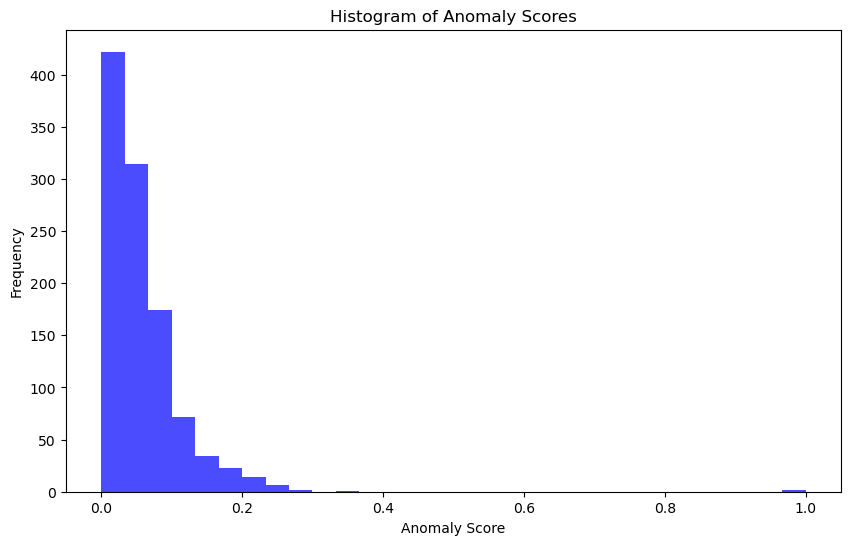

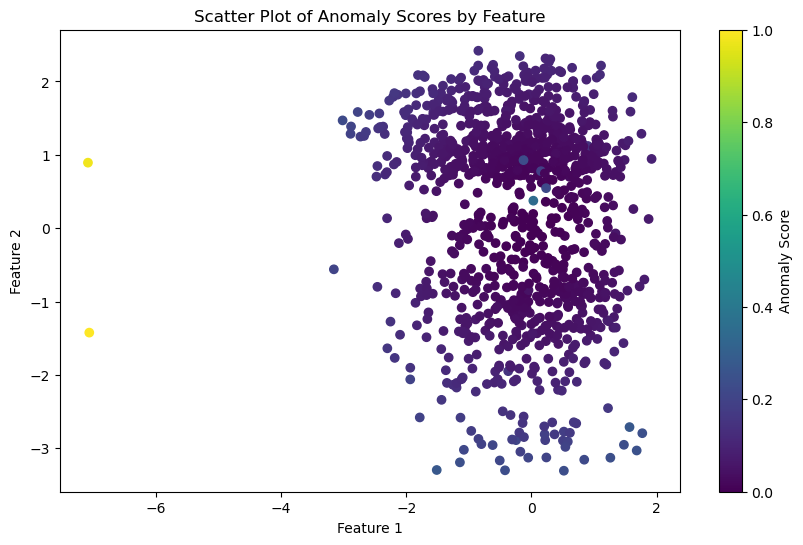

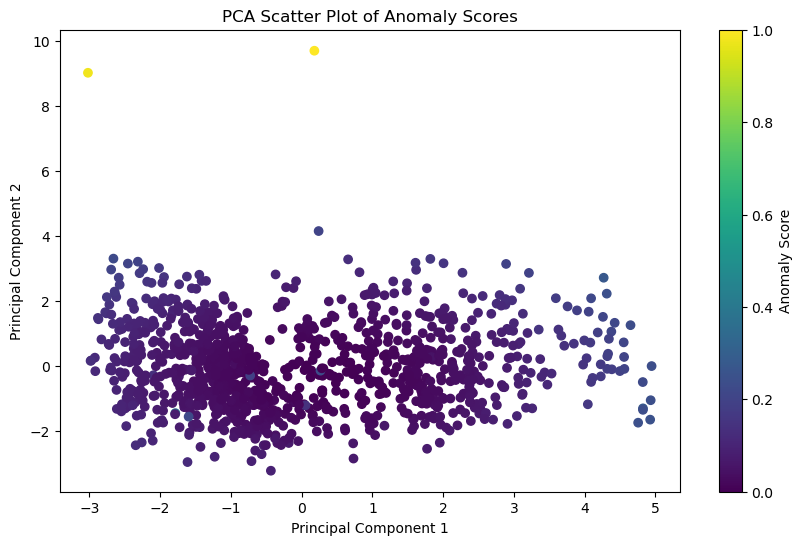

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'normalized_anomaly_scores' are your computed anomaly scores
# and 'X_test_normalized' is your test dataset

# Histogram of anomaly scores
plt.figure(figsize=(10, 6))
plt.hist(normalized_anomaly_scores, bins=30, alpha=0.7, color='blue')
plt.title('Histogram of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of the first two features with anomaly scores as color
plt.figure(figsize=(10, 6))
plt.scatter(X_test_normalized[:, 0], X_test_normalized[:, 1], c=normalized_anomaly_scores, cmap='viridis')
plt.colorbar(label='Anomaly Score')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Anomaly Scores by Feature')
plt.show()

# If your data has more than two dimensions, use PCA to reduce it for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_normalized)

plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=normalized_anomaly_scores, cmap='viridis')
plt.colorbar(label='Anomaly Score')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot of Anomaly Scores')
plt.show()